In [1]:
# !pip install ocr_tamil
# !pip install datasets
# !pip install deep-translator

In [2]:
import matplotlib.pyplot as plt
import cv2
import torch
from ocr_tamil.ocr import OCR
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16
device = torch.device('mps')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# import zipfile
# import os

# # Paths to your zip files on Google Drive
# train_zip_path = '/content/drive/My Drive/TamilMemes/train.zip'
# test_zip_path = '/content/drive/My Drive/TamilMemes/test.zip'

# # Define directories to extract the files
# train_dir = '/content/drive/My Drive/TamilMemes/train'
# test_dir = '/content/drive/My Drive/TamilMemes/test'

# # Create directories if they don't exist
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Extract the training data
# # with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
# #     zip_ref.extractall(train_dir)

# # Extract the test data
# # with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
# #     zip_ref.extractall(test_dir)

# # List files in the train directory
# train_files = os.listdir(train_dir)
# print("Training Files:")
# print(train_files)

# # List files in the test directory
# test_files = os.listdir(test_dir)
# print("Test Files:")
# print(test_files)

In [5]:
# image_path = "/content/drive/My Drive/TamilMemes/test_img_0.jpg"
# ocr = OCR(detect=True)
# text_list = ocr.predict(image_path)

In [6]:
def get_caption(text_list):
  for item in text_list:
    return " ".join(item)

In [7]:
# none_list = [[[]], None, '', []]
# def process_images_in_directory_train(directory_path):
#     count = 0
#     ocr = OCR(detect=True)
#     extracted_texts = []

#     for filename in os.listdir(directory_path):
#         image_path = os.path.join(directory_path, filename)
#         extracted_text = ocr.predict(image_path)

#         # Check if the extracted text is in the none_list
#         if extracted_text in none_list:
#             print(f"Unable to process text for: {filename}")
#             continue

#         # Determine label based on filename
#         if 'troll' in filename.lower():
#             label = 1  # Hate speech or troll
#         elif 'not_troll' in filename.lower():
#             label = 0  # Not hate speech or not troll
#         else:
#             print(f"Skipping file without troll/not_troll in filename: {filename}")
#             continue

#         # Append extracted text and label to the list
#         extracted_texts.append({
#             "filename": filename,
#             "text": get_caption(extracted_text),  # Assuming get_caption processes the extracted OCR text
#             "label": label  # Add label to the dictionary
#         })

#         print(f"Completed: {image_path}")
#         count += 1
#         print(count)

#     return extracted_texts


In [8]:
# import os
# from concurrent.futures import ThreadPoolExecutor
# from multiprocessing import cpu_count

# none_list = [[[]], None, '', []]

# def process_image(image_path, filename, ocr):
#     extracted_text = ocr.predict(image_path)

#     # Check if the extracted text is in the none_list
#     if extracted_text in none_list:
#         print(f"Unable to process text for: {filename}")
#         return None

#     # Determine label based on filename
#     if 'troll' in filename.lower():
#         label = 1  # Hate speech or troll
#     elif 'not_troll' in filename.lower():
#         label = 0  # Not hate speech or not troll
#     else:
#         print(f"Skipping file without troll/not_troll in filename: {filename}")
#         return None

#     # Return the processed data
#     return {
#         "filename": filename,
#         "text": get_caption(extracted_text),  # Assuming get_caption processes the extracted OCR text
#         "label": label
#     }

# def process_images_in_directory_train(directory_path):
#     ocr = OCR(detect=True)
#     extracted_texts = []

#     # Use ThreadPoolExecutor for parallel processing
#     with ThreadPoolExecutor(max_workers=cpu_count()) as executor:
#         futures = []
#         for filename in os.listdir(directory_path):
#             image_path = os.path.join(directory_path, filename)
#             futures.append(executor.submit(process_image, image_path, filename, ocr))

#         # Collect the results as they are completed
#         count = 0
#         for future in futures:
#             result = future.result()
#             if result:
#                 extracted_texts.append(result)
#                 count += 1
#                 print(f"Processed {count}/{len(futures)}: {result['filename']}")

#     return extracted_texts


In [9]:
# none_list = [[[]],None,'',[]]
# def process_images_in_directory(directory_path):
#     count = 0
#     ocr = OCR(detect=True)
#     extracted_texts = []
#     for filename in os.listdir(directory_path):
#       image_path = os.path.join(directory_path, filename)
#       extracted_text = ocr.predict(image_path)
#       # print(extracted_text)
#       if extracted_text in none_list:
#         print(f"Unable to process text for: {filename}")
#         continue
#       else:
#         extracted_texts.append({
#             "filename": filename,
#             "text": get_caption(extracted_text)
#         })
#       print(f"Completed: {image_path}")
#       count += 1
#       if count == 15:
#         break
#     return extracted_texts

Process files using threads - final

In [10]:
# import os
# from itertools import islice

# none_list = [[[]], None, '', []]

# # Function to process images in batches
# def process_images_in_directory(directory_path, batch_size=25):
#     count = 0
#     ocr = OCR(detect=True)  # Assuming OCR is already defined
#     extracted_texts = []

#     # Helper function to get a batch of files
#     def batched_iterator(iterable, batch_size):
#         iterator = iter(iterable)
#         for first in iterator:
#             yield list(islice([first] + list(iterator), batch_size))

#     # Get all the filenames from the directory
#     all_filenames = os.listdir(directory_path)

#     # Process images in batches
#     for batch_filenames in batched_iterator(all_filenames, batch_size):
#         batch_texts = []

#         for filename in batch_filenames:
#             image_path = os.path.join(directory_path, filename)
#             extracted_text = ocr.predict(image_path)

#             if extracted_text in none_list:
#                 print(f"Unable to process text for: {filename}")
#                 continue
#             else:
#                 batch_texts.append({
#                     "filename": filename,
#                     "text": get_caption(extracted_text)
#                 })
#             print(f"Completed: {image_path}")
#             count += 1

#         # Append the extracted texts for the current batch to the main list
#         extracted_texts.extend(batch_texts)

#         # Stop processing if we've reached the limit (e.g., for testing, like count == 15)
#         if count >= 25:  # Modify this condition as needed
#             break

#     return extracted_texts


In [11]:
# import os
# from concurrent.futures import ThreadPoolExecutor
# from multiprocessing import cpu_count

# none_list = [[[]], None, '', []]

# def process_image(image_path, filename, ocr):
#     extracted_text = ocr.predict(image_path)

#     # Check if the extracted text is in the none_list
#     if extracted_text in none_list:
#         print(f"Unable to process text for: {filename}")
#         return None

#     # Determine label based on filename
#     if 'troll' in filename.lower():
#         label = 1  # Hate speech or troll
#     elif 'not_troll' in filename.lower():
#         label = 0  # Not hate speech or not troll
#     else:
#         print(f"Skipping file without troll/not_troll in filename: {filename}")
#         return None

#     # Return the processed data
#     return {
#         "filename": filename,
#         "text": get_caption(extracted_text),  # Assuming get_caption processes the extracted OCR text
#         "label": label
#     }

# def process_images_in_directory_train(directory_path):
#     ocr = OCR(detect=True)
#     extracted_texts = []

#     troll_count = 0
#     not_troll_count = 0
#     max_images = 500
#     max_per_category = max_images // 2  # 250 for troll, 250 for not_troll

#     # Use ThreadPoolExecutor for parallel processing
#     with ThreadPoolExecutor(max_workers=cpu_count()) as executor:
#         futures = []
#         for filename in os.listdir(directory_path):
#             if troll_count >= max_per_category and not_troll_count >= max_per_category:
#                 break  # Stop when we have processed enough images from both categories

#             # Check if the file belongs to troll or not_troll category
#             if 'troll' in filename.lower() and troll_count < max_per_category:
#                 image_path = os.path.join(directory_path, filename)
#                 futures.append(executor.submit(process_image, image_path, filename, ocr))
#                 troll_count += 1
#             elif 'not_troll' in filename.lower() and not_troll_count < max_per_category:
#                 image_path = os.path.join(directory_path, filename)
#                 futures.append(executor.submit(process_image, image_path, filename, ocr))
#                 not_troll_count += 1

#         # Collect the results as they are completed
#         count = 0
#         for future in futures:
#             result = future.result()
#             if result:
#                 extracted_texts.append(result)
#                 count += 1
#                 print(f"Processed {count}/{len(futures)}: {result['filename']}")

#     return extracted_texts


In [12]:
# Process the training data
# train_texts = process_images_in_directory_train(train_dir+"/train")
# print("Training Data Texts:")
# for item in train_texts:
#     print(f"Filename: {item['filename']}")
#     print(f"Extracted Text: {item['text']}")
#     print("----")


# Process the testing data
# test_texts = process_images_in_directory(test_dir+"/test")
# print("Testing Data Texts:")
# for item in test_texts:
#     print(f"Filename: {item['filename']}")
#     print(f"Extracted Text: {item['text']}")
#     print("----")

In [13]:
# import os
# os.chdir("/content/drive/My Drive/TamilMemes/train")
# !ls

In [14]:
# from deep_translator import GoogleTranslator

# # translated_texts = []
# # print(train_texts)
# # Function to translate Tamil text to English using deep_translator
# def translate_tamil_to_english(tamil_text):
#     translator = GoogleTranslator(source='ta', target='en')
#     translation = translator.translate(tamil_text)
#     return translation

# # Example usage
# # print(get_caption(text_list))
# for extracted_text in train_texts:
#   # print(extracted_text['text'])
#   translated_text = translate_tamil_to_english(extracted_text['text'])
#   extracted_text['translated_text'] = translated_text
# # translated_text = translate_tamil_to_english(get_caption(text_list))
# print(train_texts)
# # print(f"Translated Text: {translated_text}")

In [15]:
# @title Version-1 to process and predict
# from transformers import AutoModelForSequenceClassification, AutoTokenizer
# import torch
# import torch.nn.functional as F

# def classify_text(text, model, tokenizer):
#     inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
#     with torch.no_grad():
#         outputs = model(**inputs)
#     logits = outputs.logits
#     probabilities = F.softmax(logits, dim=1)
#     return probabilities

# # Load the pretrained model and tokenizer
# model_name = "Hate-speech-CNERG/tamil-codemixed-abusive-MuRIL"  # Replace with your actual model path
# model = AutoModelForSequenceClassification.from_pretrained(model_name)
# tokenizer = AutoTokenizer.from_pretrained(model_name)

# # Example usage
# probabilities = classify_text(translated_text, model, tokenizer)
# label = torch.argmax(probabilities, dim=1).item()
# confidence = probabilities[0][label].item()

# labels = ["Not Hate Speech", "Hate Speech"]
# print(f"Classification: {labels[label]} with confidence {confidence:.2f}")


In [16]:
# train_texts2 = [{'filename': 'troll_221.jpg', 'text': 'மெஸ்ஸியும் ரொனால்டோவும் தங்கள் நாட்டிற்கு செல்லும் வழியில்ட MESSI RONALDO 7 யாரே /alwzsmle', 'label': 1, 'translated_text': 'Messi and Ronaldo on their way to their country Who is MESSI RONALDO 7 /alwzsmle'}, {'filename': 'troll_1926.jpg', 'text': 'Wife  online Today Are you happy with me and our married life...?? 13:02 yes yes yesyes yesyes yes yes yes yes yes yes yes yes yes yesyes yes yes yes yesye yes yes yes yes yesyes 13:03 Nee veetukku vaa da unakku irukku 13:07 voice *He *Mind Avasara pattutiyae kumaru..', 'label': 1, 'translated_text': 'Wife online Today Are you happy with me and our married life...?? 13:02 yes yes yesyes yesyes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes 13:03 Nee veetukku vaa da unakku irukku 13:07 voice *He *Mind Avasara pattutiyae kumaru..'}, {'filename': 'Not_troll_530.jpg', 'text': 'இதுக்கு ஒன்னும் கொறைச்சல் இல்லஃ ROPLPHOTOS. COM', 'label': 1, 'translated_text': 'It has nothing to do with ROPLPHOTOS. COM'}, {'filename': 'troll_1098.jpg', 'text': 'மெஸ்ஸியும் ரொனால்டோவும் தங்கள் நாட்டிற்கு செல்லும் வழியில்ட MESSI RONALDO 7 யாரே /alwzsmle', 'label': 1, 'translated_text': 'Messi and Ronaldo on their way to their country Who is MESSI RONALDO 7 /alwzsmle'}, {'filename': 'Not_troll_256.jpg', 'text': 'சம்பளம் எங்கம்மா தர்றாங்க] லீவு போடாம வேலைக்கு மட்டும் கரெக்ட்டா வரச்சொல்றாங்க, ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Where is the salary?] Just come right to work without taking leave, ROFLPHOTOS.COM'}, {'filename': 'Not_troll_242.jpg', 'text': 'என்னம்மா இப்படி பண்றீங்க தமிழ் ROFLPHOTOS.COM COMEDY,MEMES', 'label': 1, 'translated_text': 'What do you do like this Tamil ROFLPHOTOS.COM COMEDY,MEMES'}, {'filename': 'troll_1932.jpg', 'text': 'சந்தேகம்! கொசுவுக்கு மட்டும் சிரிங்க எல்லா குரூப்ரத்தமும்பே ஒத்துக்குதேஎது எப்படி?77', 'label': 1, 'translated_text': 'Doubt! How is it that all groups are similar to mosquitoes only? 77'}, {'filename': 'Not_troll_524.jpg', 'text': 'பிசாசு பிசாசுஃ பொடனிக்கு பின்னாலையா கொண்டாந்து பட்டாசு வெப்பாங்கஃ roflphotos.com நல்லா ருத்தாளத்துல இருக்கவேண்டியநெல்லாம் இங்க வந்து என் 2 சுரை எடுக்குதுங்க,', 'label': 1, 'translated_text': 'Pisasu Pisasu Podaniku Pinnalaiya Kondanthu Patasu Webbangka Roflphotos.com Well, it is not necessary to be in Ruthalat, come here and take my 2 surai,'}, {'filename': 'troll_1517.png', 'text': 'AUGUST2012 1 WEDNESDAY  எண்ணிம்  50 ரூபாய் இருந்தது; சைலவு பாக்சி 20 30 15 15 TOTAL 50 51 35 ரூபாய் எங்கிருந்து வத்தது?', 'label': 1, 'translated_text': 'AUGUST2012 1 WEDNESDAY was Rs.50; Sailau Baxi 20 30 15 15 TOTAL 50 51 35 Where did the rupee come from?'}, {'filename': 'Not_troll_518.jpg', 'text': 'உன்னை தான்டா தேடிக்கிட்டு இருந்தேன்ஃ குமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': "I've been looking for you Tanda Bubble ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'Not_troll_487.jpg', 'text': 'இருக்குற பிரச்சனைக்கு நடுவுல இவனுங்க வேறஃ ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'Among the problems is ROFLPHOTOS. COM'}, {'filename': 'troll_1891.jpg', 'text': 'dhina பதஞ்சலி சர்வயோக நிவாரணினு ககு உட்டு நாயீ இங்க English மருந்துக்கு மல்லாக்க படுத்து கிடக்கான்', 'label': 1, 'translated_text': 'Dhina Patanjali Universal Remedy Kaku Udu Naye English'}, {'filename': 'Not_troll_27.jpg', 'text': 'இப்பல்லாம் நல்லதுக்கே காலமில்ல; roflphotos.com', 'label': 1, 'translated_text': 'There is no time for good; roflphotos.com'}, {'filename': 'troll_1649.jpg', 'text': 'Today Promo ~ Vanitha Army tharuviya tharamatiya tharalana un pechu Ka..', 'label': 1, 'translated_text': 'Today Promo ~ Vanitha Army tharuviya tharamatiya tharalana un pechu Ka..'}, {'filename': 'Not_troll_493.jpg', 'text': 'இதே வேலையா தான் அலையுறானாக ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'ROFLPHOTOS is the same job. COM'}, {'filename': 'troll_369.jpg', 'text': 'INTHE WORL THANK YOUTO THELARGEST படித்து *KKR CSK CP Chennai Pattinam THANK YOU TO THE LARGEST FAMILY IN THE WORLD', 'label': 1, 'translated_text': 'INTHE WORL THANK YOU TO THE LARGEST Read *KKR CSK CP Chennai Pattinam THANK YOU TO THE LARGEST FAMILY IN THE WORLD'}, {'filename': 'troll_1885.jpg', 'text': 'FB/@Triplicane Memes TTT MEMES Double role, huh?', 'label': 1, 'translated_text': 'FB/@Triplicane Memes TTT MEMES Double role, huh?'}, {'filename': 'Not_troll_33.jpg', 'text': 'உங்களுக்கெல்லாம் வெட்கமா இல்ல227 roflphotos.com', 'label': 1, 'translated_text': 'Shame on you all227 roflphotos.com'}, {'filename': 'troll_341.jpg', 'text': '12YRS 18YRS 17YRS palvadi school 90ssingles', 'label': 1, 'translated_text': '12YRS 18YRS 17YRS palvadi school 90singles'}, {'filename': 'troll_1675.jpg', 'text': 'அவன் யார்ரா அவன், இவ்ளோ கலவரத்துல "5 இயர்ஸ் ஆப் கோச்சடையான்" கொண்டாட்றது, ரியவையினையையும்', 'label': 1, 'translated_text': 'Awan Yarra Awan, Celebrating "5 Years of Kochadaiyan" in such riots'}, {'filename': 'troll_427.jpg', 'text': 'That NALLAVAN Moment While whenaking ingaMovie with Family and a Scene Comes', 'label': 1, 'translated_text': 'That NALLAVAN Moment While making ingaMovie with Family and a Scene Comes'}, {'filename': 'troll_1107.jpg', 'text': "Cinema paridhabangal Don't worry Julie...! There is Always Someone Somewhere worse off than you..!", 'label': 1, 'translated_text': "Cinema paridhabangal Don't worry Julie...! There is always someone somewhere worse off than you..!"}, {'filename': 'troll_433.jpg', 'text': 'IN GIRLS VERSION IN BOYS VERSION RAYED.O.OO', 'label': 1, 'translated_text': 'IN GIRLS VERSION IN BOYS VERSION RAYED.O.OO'}, {'filename': 'troll_355.jpg', 'text': "Namma Padatha Torrent'la kooda download panna maaten'granga", 'label': 1, 'translated_text': "Namma Padatha Torrent'la kooda download panna maaten'granga"}, {'filename': 'troll_1661.jpg', 'text': 'ஆரு இம்தாஃ H இம்தான் Dheen Sams Raja H இந்தத்த திந்தத்தம் முடுஞ்சிச்சாஃ', 'label': 1, 'translated_text': 'Aru imtaaf H imtan Dheen Sams Raja H indatta dindhatam mutunchichafa'}, {'filename': 'Not_troll_444.jpg', 'text': 'தம்பிஃ  அடிக்கடி நம்ம ரூட்லயே கிராஸ் பண்ற இது நல்லதுக்கு இல்லஃ roflphotos.com', 'label': 1, 'translated_text': 'Brother, it is not good to cross our root very often roflphotos.com'}, {'filename': 'troll_1852.jpg', 'text': 'HEMA MALINI HEMA MISRANI', 'label': 1, 'translated_text': 'HEMA MALINI HEMA MISRANI'}, {'filename': 'Not_troll_322.jpg', 'text': "While Seeing 2k Kids Committed and Getting Married ROFLPHOTOS.COM 90's kids", 'label': 1, 'translated_text': "While Seeing 2k Kids Committed and Getting Married ROFLPHOTOS.COM 90's kids"}, {'filename': 'Not_troll_336.jpg', 'text': 'பார்த்து ல நாட்கள் ஆயிருச்சி, நல்லா இருக்கியா தோழிஆ EMEES.IN குயிர்ழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Have a nice day, how are you?'}, {'filename': 'Not_troll_450.jpg', 'text': 'இதுல ஏதோ தில்லாலங்கடி வேலை இருக்கும் போல தோனுதேபு தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'There seems to be some Dillalangadi work in this.Thonudebu Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1846.jpg', 'text': "Mahat Raghavendra @MahatOfficial Hate mongers should understand that a person doesn't contradict statements without a reason & #STR didn't contradict but played the mind game well. And tonight we will witness a #NewAgeAapu from STR for the haters. #STRknowsWhatToDo ! Thanks for the negativity OHHOOOOOO", 'label': 1, 'translated_text': "Mahat Raghavendra @MahatOfficial Hate mongers should understand that a person doesn't contradict statements without a reason & #STR didn't contradict but played the mind game well. And tonight we will witness a #NewAgeAapu from STR for the haters. #STRknowsWhatToDo ! Thanks for the negativity OHHOOOOOO"}, {'filename': 'troll_157.png', 'text': 'LYCA ARAN New Year Happy DARBAR ANTH', 'label': 1, 'translated_text': 'LYCA ARAN Happy New Year DARBAR ANTH'}, {'filename': 'Not_troll_478.jpg', 'text': 'நாம யாரு வம்புக்கும் போறதில்ல: யாரு தும்புக்கும் போறதில்ல; நாம உண்டு நம்ம சோலி உண்டுன்னு போயிடுறதும் ROFLPHOTOS. COM', 'label': 1, 'translated_text': "We don't bother anyone: we don't bother anyone; ROFLPHOTOS when we say that we have our sole. COM"}, {'filename': 'troll_382.jpg', 'text': ' CERTIFIED சுபம் " ,, ராஜ்வான் சுந்தர்மேசு FEB 1ST WORLDWIDE Vimal Enna da ipdi aairuchu Seri vaa kelambuvom', 'label': 1, 'translated_text': 'CERTIFIED Subham " ,, Rajwan Sundarmesu FEB 1ST WORLDWIDE Vimal Enna da ipdi aairuchu Seri vaa kelambuvom'}, {'filename': 'troll_396.jpg', 'text': "2 5:/2PM Dear Vodafone Customer, DON'T MISS the LOWEST EVER DATAOFFER 4U! RE- CHARGE with Rs. 49 & get 3 GB data, valid 28 Days! Click http://bit.ly/TnVAMVALood ME* 1GB KU 399RS SONNA NAAI NEE IPPO YARU TOP-UP PANRATHU ILLA NU OFFER THARIYA", 'label': 1, 'translated_text': "2 5:/2PM Dear Vodafone Customer, DON'T MISS the LOWEST EVER DATAOFFER 4U! RE-CHARGE with Rs. 49 & get 3 GB data, valid 28 Days! Click http://bit.ly/TnVAMVALood ME* 1GB KU 399RS SONNA NAAI NEE IPPO YARU TOP-UP PANRATHU ILLA NU OFFER THARIYA"}, {'filename': 'Not_troll_685.jpg', 'text': 'HAPPY FRIENDSHIP DAY MACHI வன் 2 ண் மையாவே நமக்கு போன் தமிழ் பண் ணி சொல்றா னா இல்லை நெம்பர் memees.in MEMESCREATOR ஏதும் மாத்தி போட்டுட்டானா சிதிரம்', 'label': 1, 'translated_text': 'HAPPY FRIENDSHIP DAY MACHI WAN 2 N Maiave call us tamil panni or no number memees.in MEMESCREATOR Did you put anything?'}, {'filename': 'Not_troll_849.jpg', 'text': 'A Day Before Pongal Cleaning Be Like டேய் தொட LIT.. ROFLPHOTOS.COM  தரைய தொட LIT... சாவடிக்கிறாங்களே என்னைய,', 'label': 1, 'translated_text': 'A Day Before Pongal Cleaning Be Like.'}, {'filename': 'Not_troll_691.jpg', 'text': 'இதுல இங்கிலீஷ் வேறஃ WA ER ge GEAR ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'THIS IS ANOTHER ENGLISH WA ER ge GEAR ROFLPHOTOS.COM'}, {'filename': 'troll_1339.jpg', 'text': 'Neenga Nalla illanu Paaka konjam Yogi Baabu Sollala.... Maari irukinga nu thaan soldrom...', 'label': 1, 'translated_text': 'Neenga Nalla illanu Paaka konjam Yogi Baabu Sollala.... Maari irukinga nu thaan soldrom...'}, {'filename': 'troll_1311.jpg', 'text': 'vote potu 2 minutes kuda aagala! athukula fb la finger photo va potuta?! Break Time Memes ;-) 2 seconds laye poturupan! ink kayanumey nu wait panunan!', 'label': 1, 'translated_text': 'vote potu 2 minutes kuda aagala! athukula fb la finger photo va potuta?! Break Time Memes ;-) 2 seconds laye poturupan! ink kayanumey nu wait panunan!'}, {'filename': 'Not_troll_861.jpg', 'text': 'போராளி லவ் மோடுக்கு சென்றபோதுப் குயிர் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Queer ROFLPHOTOS.COM when the fighter went into love mode'}, {'filename': 'troll_143.jpg', 'text': "WHATS YOUR AMBITION IT DEPENDS ON THE LAST MOVIE 90's KIDS FUN POP TAMIZHA THATI WATCHED", 'label': 1, 'translated_text': "WHATS YOUR AMBITION IT DEPENDS ON THE LAST MOVIE 90'S KIDS FUN POP TAMIZHA THATI WATCHED"}, {'filename': 'Not_troll_875.jpg', 'text': ' போர எனக்கு PU முக்கியமான வேலை இருக்கு தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'PORA I HAVE PU IMPORTANT JOB TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1305.jpg', 'text': 'MyEx Hello... Sollunga...Yaaru !? Me Neenga Verum Ex ah illa XNXX ah !?', 'label': 1, 'translated_text': 'MyEx Hello... Sollunga...Yaaru !? Me Neenga Verum Ex ah illa XNXX ah !?'}, {'filename': 'Not_troll_120.jpg', 'text': 'தம்பிக்கு அனுபவம் ஜாஸ்தி போலஜ்  roflphotos. com', 'label': 1, 'translated_text': 'Experience Jasti Polaj roflphotos for younger brother. com'}, {'filename': 'Not_troll_646.jpg', 'text': '2019 ATROCITIES JANUARY ME ROFLPHOTOS.COM FEBRUARY', 'label': 1, 'translated_text': '2019 ATROCITIES JANUARY ME ROFLPHOTOS.COM FEBRUARY'}, {'filename': 'troll_1488.jpg', 'text': "me Ivangalae 'Hi' nu conversation start panuvangalam Aprom namma convo va develop panna nu solli gaandu yethuvangalam my crush MEME ADDICTORS INSTA GRAM", 'label': 1, 'translated_text': "me Ivangalae 'Hi' nu conversation start panuvangalam Aprom namma convo va develop panna nu solli gaandu ethuvangalam my crush MEME ADDICTORS INSTA GRAM"}, {'filename': 'Not_troll_652.jpg', 'text': 'ஐயோ இவன்கிட்ட பேசி பேசி என் மூளை இவனுக்கு பிரெண்ட் ஆயிருச்சேர் roflphotos.com', 'label': 1, 'translated_text': 'Oh, talk to him and talk to him, my brain will make him a friend roflphotos.com'}, {'filename': 'Not_troll_134.jpg', 'text': 'டேய் அவள நம்பாதடாஃ  ROFLPHOTOS. COM', 'label': 1, 'translated_text': "Hey, don't believe her ROFLPHOTOS. COM"}, {'filename': 'troll_180.jpg', 'text': 'Yogi Babu : Sir, ellathaiyum marandhutenu sollunga avan aluvaiya niruthiruvan.. Thambi Ramaiah : Thambi Naan ellathaiyum marandhuten pa.. SK: Unga peru enna sir.. Thambi Ramaiah : Lakshmanan.. SK: Paathiya avaru innum edhum marakala.. FAMILY MEMBERS GUDBOY ARUN ME', 'label': 1, 'translated_text': 'Yogi Babu : Sir, ellathaiyum marandhutenu sollunga avan aluvaiya niruthiruvan.. Thambi Ramaiah : Thambi Naan ellathaiyum marandhuten pa.. SK: Unga peru enna sir.. Thambi Ramaiah : Lakshmanan.. SK: Paathiya avaru innum edhum marakala.. FAMILY MEMBERS GOODBOY ARUN ME'}, {'filename': 'troll_3.jpg', 'text': 'Appa ethu 3rd std science lesson pa..', 'label': 1, 'translated_text': 'Appa ethu 3rd std science lesson pa..'}, {'filename': 'troll_194.jpg', 'text': 'kevalam sunday la vekura kari konzhambu kaga lam mt intha soona paana 6 naal wait panna vendiyadha iruke!!!', 'label': 1, 'translated_text': 'kevalam sunday la vekura kari konzhambu kaga lam mt intha soona paana 6 naal wait panna vendiyadha iruke!!!'}, {'filename': 'Not_troll_108.jpg', 'text': 'எங்க தலக்கு எவ்ளோ தில்லு பாத்தியாஃ ப்ப் தமிழ் memees.in MEMESCREATOR EMEES.IN', 'label': 1, 'translated_text': 'Enga talaku evlo dillu pathiaaf pp tamil memees.in MEMESCREATOR EMEES.IN'}, {'filename': 'troll_1113.png', 'text': 'When HOD says Students With Low Attendance Will Not be allowed To Write Exams பயந்தா தொழில் பண முடியுமா இவனுங்க எப்பவுமே இப்படிதான்,', 'label': 1, 'translated_text': 'When HOD Says Students With Low Attendance Will Not Be Allowed To Write Exams Afraid Can Business Pay? This is always the case.'}, {'filename': 'troll_195.jpg', 'text': 'Boneless Chicken RS 8/= மூக்கு பொடைப்பா இருந்தா இப்படி தான் யோசிக்க தோனும்,', 'label': 1, 'translated_text': 'Boneless Chicken RS 8/= If you have a sore nose, you might think so.'}, {'filename': 'Not_troll_109.jpg', 'text': 'நமிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'NAMIL ROFLPHOTOS.COM'}, {'filename': 'troll_432.png', 'text': 'THAT AWESOME MOMENT WHEN U FIND MONEY FROM UR OLD DRESS AT MONTH END', 'label': 1, 'translated_text': 'THAT AWESOME MOMENT WHEN U FIND MONEY FROM UR OLD DRESS AT MONTH END'}, {'filename': 'troll_1660.png', 'text': 'முன்னத் CHENNA EYPULLAI HAVE DEGREES IHAVEADEGREE FROM YALEU UNIVERSITIES ETTU FROM YALE UNIVERSITY! ANGG!', 'label': 1, 'translated_text': 'PREVIOUSLY CHENNA EYPULLAI HAVE DEGREES IHAVEADEGREE FROM YALEU UNIVERSITIES ETTU FROM YALE UNIVERSITY! ANGG!'}, {'filename': 'troll_2.jpg', 'text': 'ஒருஎலுமிச்சம்பழம் கேட்டா விலை 5 ருவா சொல்றாங்க, பிடித்ததை Gp பகிர்வோம் ... Perumal 100 எலுமிச்சை பவர் உள்ள விம் பார் 10 ருவாயாம் குன்ற Vim ', 'label': 1, 'translated_text': "If you ask for a lemon, the price is 5 rupiah, let's share what you like..."}, {'filename': 'troll_181.jpg', 'text': 'Kuruvi, Sura, Villu, Aambala All In One + TROLLYWOOD;-) @TROLLYWOOD.TAMIL', 'label': 1, 'translated_text': 'Kuruvi, Sura, Villu, Aambala All In One + TROLLYWOOD;-) @TROLLYWOOD.TAMIL'}, {'filename': 'Not_troll_653.jpg', 'text': 'என்ன ஒரு புத்திசாலித்தளம்; தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'What a brilliant site; TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_135.jpg', 'text': 'இத தான் அந்த போராளியும் சொன்னான் குயிர்ழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'This is what the fighter also said on ROFLPHOTOS.COM'}, {'filename': 'Not_troll_121.jpg', 'text': 'உங்களைத்தான் இப்பிடி கழுவி கழுவி ஊத்துறாங்க, நீங்க என்னடான்னா கண்டுக்காம போறீங்கல் பரியப்பட்டியான roflphotos.com', 'label': 1, 'translated_text': "You are the one who washes and washes and blows, and you don't see what you are."}, {'filename': 'troll_1489.jpg', 'text': "Indian's keeper performance dhoni PETER VIKEY rishabh pant", 'label': 1, 'translated_text': "Indian's keeper performance dhoni PETER VIKEY rishabh pant"}, {'filename': 'Not_troll_647.jpg', 'text': 'சரியான காமெடி பீசா போலஃ ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'ROFLPHOTOS is like perfect comedy pizza. COM'}, {'filename': 'troll_156.jpg', 'text': 'MASTER COPY ஆண்டவன் ஆட்டம் அட்லி கல்பாத்தி படத்தோடஒரிஜினல் கதையஎடுத்தவன் சஉட வ்ளோ பூஜை பண்ணிருக்கமாட்டான் LIT...', 'label': 1, 'translated_text': 'MASTER COPY Andavan Atham Atli Kalpathi Film Original Story Taken by Sauda Vlo Pooja LIT...'}, {'filename': 'Not_troll_874.jpg', 'text': 'மரியாதபு ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'MARIATHABU ROFLPHOTOS. COM'}, {'filename': 'troll_1304.jpg', 'text': '#HouseMates #Viewers Eppo Paathalum Ethavthu Solli Azhuthu MILNADU MEMERAJIA Atha saaku nu Ponnugalaium Katti Pudikiran', 'label': 1, 'translated_text': '#HouseMates #Viewers Eppo Paathalum Ethavthu Solli Azhuthu MILNADU MEMERAJIA Atha saaku nu Ponnugalaium Katti Pudikiran'}, {'filename': 'troll_1310.jpg', 'text': 'DIRECTOR OF THE MOVIE இதான் தம்பி SITUATION... இந்த SITUATION ஏத்த மாதிரி ஒரு சூப்பர் LYRICS எழுதி TUNE போட்டு குடுங்கர் HIP-HOP TAMIZHA படம் பேர் எனன ?', 'label': 1, 'translated_text': 'DIRECTOR OF THE MOVIE THIS IS THE SITUATION BROTHER... WRITING A SUPER LYRICS LIKE THIS SITUATION AND TUNE IT KUDUNKAR HIP-HOP TAMIZHA WHAT IS THE NAME OF THE MOVIE?'}, {'filename': 'troll_142.jpg', 'text': '#10yearsChallenge be like Indha photoipo pudichadhu g Andha photo10 varusham munna pudichadhu', 'label': 1, 'translated_text': '#10yearsChallenge be like Indha photoipo pudichadhu g Andha photo10 varusham munna pudichadhu'}, {'filename': 'Not_troll_860.jpg', 'text': 'கர்ர்ர்ர்ர் த்தூஃ பப்பிடி ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Karrrrr thoof baby ROFLPHOTOS.COM'}, {'filename': 'Not_troll_690.jpg', 'text': 'ஒழுங்கா போயிரு இல்ல பேக் ஐடி கிரியேட் பண்ணி கெட்ட வார்த்தைல திட்டுவேன்ஃ தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': "Don't go wrong, I will create a back id and say bad words Tamil ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'Not_troll_848.jpg', 'text': 'வேணும்ன்னாங்க இன்பாக்ஸ்ல வந்து போட்டோ அனுப்புனேன்; தெரியாம அனுப்பிட்டேங்க; OUTL *She MO *Me ROFLPHOTOS.COM சரி போய்த்தொலம் என்னாது போய்த்தொலயா ? நாங்க போவோம் இல்ல இங்கயே பாயை விரிச்சி கூட மல்லாக்க படுப்போம் உனக்கென்னஃ ROFLPHOTOS.COM MONEY STD SD தகளின்றனம்', 'label': 1, 'translated_text': "If you want, I will send a photo to your inbox; Unknowingly sent; OUTL *She MO *Me ROFLPHOTOS.COM Okay, what's going on? We're not going, we're going to wrestle even the mat here ROFLPHOTOS.COM MONEY STD SD"}, {'filename': 'troll_1338.jpg', 'text': 'BODY SODA SATHYA', 'label': 1, 'translated_text': 'BODY SODA SATHYA'}, {'filename': 'Not_troll_684.jpg', 'text': 'இந்த மாதிரியெல்லாம் 2 ன்னைய பேசச்சொல்லி யாருடா சொல்றது&77 rofiphotos.com', 'label': 1, 'translated_text': 'This kind of talk is like 2 what does anyone say&77 rofiphotos.com'}, {'filename': 'troll_397.jpg', 'text': 'THEMOMENTOFTHE MATCH fb. com/madrasmemoirs MEDIA CHANNELS NOWBE LIKE KOHLI 50ADICHATHUKU FYLING KISS THARALAYAM,ANUSHKA KU FLYING KISS THARA THAAN 50 ADICHARAM', 'label': 1, 'translated_text': 'THEMOMENTOFTHE MATCH fb. com/madrasmemoirs MEDIA CHANNELS NOWBE LIKE KOHLI 50ADICHATHUKU FLYING KISS THARALAYAM,ANUSHKA KU FLYING KISS THARA THAAN 50 ADICHARAM'}, {'filename': 'troll_383.jpg', 'text': 'விளக்குமாத்துல வெச்சு அடிச்சு கொடுத்தாலும்: /alwzsmle டரோ வெட்கம் இல்லாமல் திங்கரது ஹோட்டல் தோசையைத்தான்', 'label': 1, 'translated_text': 'Even if the lantern gives a warm beating: /alwzsmle Daro eats hotel dosa without shame.'}, {'filename': 'Not_troll_479.jpg', 'text': 'CSK daaa... JEANS 71 ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'CSK daaa... JEANS 71 ROFLPHOTOS. COM'}, {'filename': 'Not_troll_337.jpg', 'text': 'நமக்கு ரக்சா பந்தனுக்கு கயிறு கட்டக்கூட ஓரு பொண்ணு இல்லையேஃ குமிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': "We don't even have a girl to tie the rope for Raksha Bandhan KUMBI ROFLPHOTOS.COM"}, {'filename': 'troll_1847.jpg', 'text': 'PRADEED *Arya *Saayeesha un size enna Ava vaysu enna! PHONE WIRE PING நகப் ', 'label': 1, 'translated_text': 'PRADEED *Arya *Saayeesha un size enna Ava vaysu enna! PHONE WIRE PING'}, {'filename': 'Not_troll_451.jpg', 'text': 'ன்பாக்ஸ்க்கு வந்தம் தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Coming to nbox tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1853.jpg', 'text': 'ன்றைய சமூகம் நல்லவேளை ஓட்டை நம்ம பக்கம் இல்ல கடவுள் கருணையானவர்', 'label': 1, 'translated_text': "Today's society fortunately the loophole is not on our side God is merciful"}, {'filename': 'Not_troll_445.jpg', 'text': 'அதுக்கு இப்போ என்னாங்குற&77 ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'For that now I am about&77 ROFLPHOTOS. COM'}, {'filename': 'Not_troll_323.jpg', 'text': '2  போஸ்ட்க்கு நான் போடுறேன்ஃ என் போஸ்ட்க்கு நீயும் போடுஃ சரியாஃகு roflphotos.com', 'label': 1, 'translated_text': "2 I'll put it on my post and you'll put it on my post ok roflphotos.com"}, {'filename': 'troll_1106.jpg', 'text': "WHILE OPENING ANNA UNIV. RESULTS PAGE This site can't be reached SANDY The connection wasreset. Try: Reloading thepage Checkingthe connection Checkingthe proxyandthefirewall KTV ENNA EZHAVU DA ITHU!! KARUMAM VANTHU THOLAYA MAATENDHU", 'label': 1, 'translated_text': "WHILE OPENING ANNA UNIV. RESULTS PAGE This site can't be reached SANDY The connection was reset. Try: Reloading the page Checking the connection Checking the proxy and the firewall KTV ENNA EZHAVU DA ITHU!! KARUMAM VANTHU THOLAYA MAATENDHU"}, {'filename': 'troll_354.jpg', 'text': 'ஒரிஜினல் எலுமிச்சையை காரில் நசுக்கிவிட்டு: கெமிக்கல் எலுமிச்சையை குடித்து களிக்கிறோம்!', 'label': 1, 'translated_text': 'After crushing the original lemon in the car: drinking chemical lemon for fun!'}, {'filename': 'troll_1674.jpg', 'text': 'Samantha# # Vijay அவனுக்ககுதான் யார் கொன்னானே தெரிலயேஃ அப்பறம் எதுக்கு நீயா கமிட் ஆகி என்ன சாவடிச்ச,', 'label': 1, 'translated_text': "Samantha # # Vijay I don't know who killed him for him then why did you get committed and what did you do?"}, {'filename': 'troll_340.jpg', 'text': 'பெண், " தோசை மாவு வாங்கப் போன என் கணவரை ஒரு வாரமா காணலை மேடம் " ... போலீஸ், "@G வாரமா என்னம்மா செஞ்சே*7, பெண், உப்புமா, பூரின்னு சாப்பிட்டு சமாளிக்கிறேன் மேடம் "!..', 'label': 1, 'translated_text': 'Woman, "Ma\'am, I haven\'t seen my husband for a week when he went to buy dosa flour" ... Police, "@G Warama Ennamma Senje*7, Woman, I\'ll manage by eating salt, poorinnu, ma\'am"!..'}, {'filename': 'troll_426.jpg', 'text': 'in boys movie துணிய தூக்கிக்கோடி நெனஞ்சிட போகுது PETERMEMES அப்போ நீதூக்கலனா துணி நெனஞ்சிருக்கும் அப்டிதான', 'label': 1, 'translated_text': 'in boys movie, the clothes are going to be remembered PETERMEMES'}, {'filename': 'troll_1112.jpg', 'text': 'மன அமைதிக்கு யோகா தான் செல்லவேண்டும் என அவசியம் இல்லை மனைவியை ஒரு வாரம் அம்மா வீட்டுக்கும் அனுப்பியும் பயன்பெறலாம்', 'label': 1, 'translated_text': "You don't need to go to yoga for peace of mind, you can also send your wife to her mother's house for a week"}, {'filename': 'Not_troll_32.jpg', 'text': 'என்கிட்ட சொன்ன அதே பொய்ஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'ROFLPHOTOS.COM is the same lie that told me'}, {'filename': 'troll_368.jpg', 'text': 'the conjuring muni insidious Kanchana 2 MERSAL IBRAHIM MC the nun Kanchana 3 deiii Kanchana 4 uh', 'label': 1, 'translated_text': 'the conjuring muni insidious Kanchana 2 MERSAL IBRAHIM MC the nun Kanchana 3 deiii Kanchana 4 uh'}, {'filename': 'troll_1884.jpg', 'text': 'டீப்பாஃதிங்க் பன்னி சொல்றேன் /siringa.pls ஹோட்டல்ல சிக்கன் பிரியாணிக்கு முட்டை இலவசமா குடுக்குறாங்க என் னிக்காவது சைவ ஹோட்டல்ல பொங்கலுக்கு வடை இலவசமா குடுத்திருக்காய்ங்களா? www.facebook.c', 'label': 1, 'translated_text': 'Deepthink bunny I say /siringa.pls do you cook free egg for chicken biryani in hotel or do you cook free vada for Pongal in vegetarian hotel? www.facebook.c'}, {'filename': 'Not_troll_492.jpg', 'text': 'அழக்கூடாது நான் இருக்கிறேன்; என் இனமடாநீஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'I am not to cry; My name is ROFLPHOTOS.COM'}, {'filename': 'troll_1648.jpg', 'text': 'HAPPY INTERNATIONAL YOGA DAY', 'label': 1, 'translated_text': 'HAPPY INTERNATIONAL YOGA DAY'}, {'filename': 'Not_troll_26.jpg', 'text': 'டேய் எனக்கு வெறி வர்றதுக்குள்ள 9 ங்கிருந்து போய்டுடாஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': "Hey, I'm going crazy from 9 ROFLPHOTOS.COM"}, {'filename': 'troll_1890.jpg', 'text': 'ANBUMANI மாற்றம் முன்னேற்றம் RAMADOSS* dei ADMK la seat dharanga vaa', 'label': 1, 'translated_text': 'ANBUMANI change progress RAMADOSS* dei ADMK la seat dharanga vaa'}, {'filename': 'Not_troll_486.jpg', 'text': 'ஏன்டா இப்படி படுத்துறீங்க; பண்ணமானமான', 'label': 1, 'translated_text': 'Why are you lying like this; farmable'}, {'filename': 'Not_troll_519.jpg', 'text': 'என்னடா பண்ணிங்க எங்க அம்மாவ ? குயிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'What are you doing, mother? BUY ROFLPHOTOS.COM'}, {'filename': 'Not_troll_243.jpg', 'text': 'கபாலி டீசர காலான்னு பேர் மாத்தி போட்டுட்டாங்களோ ? தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Did you name Kabali Teaser Kalan? TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_525.jpg', 'text': 'ரொம்ப நக்கல் விடுறான்யா இவன்ஃ தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Romp Nakal Viduranya Ivan Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1933.jpg', 'text': '2019 NEWS B GNEWS 08:30AM BREAKING NEWS ரசிகர்களுக்கு அன்புக் கட்டளை! வந்தா ராஜாவா தான் வருவேன் படத்திற்கு கட்அவுட் வைத்து அண்டாவில் பால் ஊற்றி வேற லெவலில் செய்ய வேண்டும்   சிம்பு @EIPM.MEME VRR 2.0 *fans வகவுக்களை Nethu dhana da cut out elam vekkadhinga sonna.. Inniku ippadi solura? AInternations Str Adhu vera vaai.. Idhu vera vaai..', 'label': 1, 'translated_text': '2019 NEWS B GNEWS 08:30AM BREAKING NEWS Love to fans! Vanda rajava tha vavarvanu should have a cutout for the film and pour milk in the egg and make it on another level Simbu @EIPM.MEME VRR 2.0 *fans sections Nethu dhana da cut out elam vekkadhinga sonna.. Inniku ippadi solura? AInternations Str Adhu vera vaai.. Idhu vera vaai..'}, {'filename': 'Not_troll_531.jpg', 'text': 'ஆள் பாக்கறதுக்கு றியிற் டைப்பா இருக்காளோஃ தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1927.jpg', 'text': 'துணி கிழிஞ்சிறுச்சேன்னு அழுத காலம் போயி flalwzsmle யாரோ கிழிஞ்ச துணிதான் வேனும்னு அழற காலம் வந்துருச்சிட! நல்ல வளர்ச்சி,', 'label': 1, 'translated_text': 'Gone are the days of crying because someone has torn the cloth. good growth,'}, {'filename': 'Not_troll_257.jpg', 'text': 'என்கீட்டயும் சொள்ளானுவளே, roflphotos.com', 'label': 1, 'translated_text': 'Let me tell you, roflphotos.com'}, {'filename': 'troll_1099.jpg', 'text': 'Did you see No! facebook was busy update? with Twitter', 'label': 1, 'translated_text': 'Did you see No! Facebook was busy updating? with Twitter'}, {'filename': 'troll_1072.jpg', 'text': 'மன அமைதிக்கு யோகா தான் செய்ய வேண்டும் என அவசியமில்லை, mle யாரோ மனைவியை ஒரு வாரம் அம்மா வீட்டுக்கு அனுப்பியும் பயன் பெறலாம்ப', 'label': 1, 'translated_text': "You don't need to do yoga for peace of mind, you can also send your wife to stay at home for a week"}, {'filename': 'troll_220.jpg', 'text': 'Sarath kumar is feeling blessed with his second pondatti Radhika oda first purushan ponnu oda "paiyan"', 'label': 1, 'translated_text': 'Sarath kumar is feeling blessed with his second pondatti Radhika oda first purushan ponnu oda "paiyan"'}, {'filename': 'troll_1714.jpg', 'text': 'தூங்கி எழும்பின தும் மூஞ்சி சாதாரண மக்கள் தமிழ் படத்தில் நடிகைகள்', 'label': 1, 'translated_text': 'The actresses in the Tamil movie "Thongi Egomuna Tum Munchi Badhya Maklak".'}, {'filename': 'troll_234.jpg', 'text': 'serbaer NGK 1st part illayam erbaer LKG 2nd partam', 'label': 1, 'translated_text': 'serbaer NGK 1st part illayam erbaer LKG 2nd partam'}, {'filename': 'troll_1700.jpg', 'text': ' ன்றய தத்துவம், உப்ப தின்னா தண்ணி குடிக்கனும்; /alwzsmle பாரோ பப்ஸ தின்னா வாய துடைக்கனும்,', 'label': 1, 'translated_text': 'Daily philosophy, eat salt and drink water; /alwzsmle baro pubs eat mouth wipes,'}, {'filename': 'troll_1066.jpg', 'text': 'Not only boys even girls also troll boys !!! CP Pattinam Chennai When theyform a Gang', 'label': 1, 'translated_text': 'Not only boys even girls also troll boys!!! CP Pattinam Chennai When they form a Gang'}, {'filename': 'Not_troll_280.jpg', 'text': 'சோறு தானே திங்குறம் roflphotos.com', 'label': 1, 'translated_text': 'Soru Thane Dinkuram roflphotos.com'}, {'filename': 'troll_1728.jpg', 'text': 'சூரிய வம்சம் சின்ராசு ithukku andha mulla thalli vettu erukkalam idea ellatha pasanga.', 'label': 1, 'translated_text': 'Surya vamsam sinrasu ithukku andha mulla thalli vettu erukkalam idea ellatha pasanga.'}, {'filename': 'troll_208.jpg', 'text': 'Our expection When add our profile But reality shows Marketerz', 'label': 1, 'translated_text': 'Our expectation When add our profile But reality shows Marketerz'}, {'filename': 'Not_troll_294.jpg', 'text': 'உங்க ஜட்ஜ்மெண்ட் ரொம்ப guy... roflphotos.com', 'label': 1, 'translated_text': 'Your judgment is very guy... roflphotos.com'}, {'filename': 'Not_troll_1010.jpg', 'text': 'GL ப் நான்பாட்டுக்கு சிவனேன்னு தானடா இருந்தேன் ROFLPHOTOS.COM பாரு வம்பு தும்புக்காவது போனனாஃ2', 'label': 1, 'translated_text': 'I was not sure if I was going to go to GL for the fourth time ROFLPHOTOS.COM'}, {'filename': 'Not_troll_727.jpg', 'text': 'டோன்ட் ஆங்ரி  ROFEPHOTOS.COM', 'label': 1, 'translated_text': "DON'T ANGRY ROFEPHOTOS.COM"}, {'filename': 'Not_troll_1004.jpg', 'text': 'இவிங்ககிட்டருந்து எப்படி தப்பிக்க போறேன்னு நெரியலயேஃ roflphotos.com', 'label': 1, 'translated_text': 'Roflphotos.com explains how to escape from this'}, {'filename': 'Not_troll_733.jpg', 'text': 'பேச்சு பேச்சாதான் இருக்கணும்ஃ roflphotos.com', 'label': 1, 'translated_text': 'Talk talk roflphotos.com'}, {'filename': 'troll_1516.jpg', 'text': 'பல முடிகள் விழுந்தால் அது வழுக்கை" ஆய்வாள http://www.tamilfbshares. பல அடிகள் விழுந்தால் அது வாழ்க்கை" ஆரம்பத்துல கஷ்டமாதான் தம்பி இருக்கும்அ அப்புறம் அதுவே பழகிடும்பு', 'label': 1, 'translated_text': 'If many hairs fall, it is baldness" Research http://www.tamilfbshares. If many feet fall, it is life" In the beginning, it is difficult, brother, then it is a habit.'}, {'filename': 'Not_troll_900.jpg', 'text': 'நல்லாவருவ மச்சிபு தமிழ் roflphotos.com COMEDYMEMES', 'label': 1, 'translated_text': 'Nallaaruva Machibu Tamil roflphotos.com COMEDYMEMES'}, {'filename': 'troll_1270.jpg', 'text': 'பேரன்பேத்திகளுக்கு மட்டுமே தெரியும் MSV EIPM.MEME ENNAMA IPPADI PANREENGALE பாட்டியுடன் இருப்பது எவ்வளவு சந்தோசம் என்பது', 'label': 1, 'translated_text': 'Only grandchildren know MSV EIPM.MEME ENNAMA IPPADI PANREENGALE How happy it is to be with grandma.'}, {'filename': 'troll_1264.jpg', 'text': 'Close enough Theni junction Modi @theni junction Enga inga iruntha kovila kano', 'label': 1, 'translated_text': 'Close enough Theni junction Modi @theni junction Enga inga iruntha kovila kano'}, {'filename': 'troll_1502.jpg', 'text': 'During practical xam மலத கிளி மனத கிளி ஜோஸியம் ஜோஸியம் record note sgin vangitiya. kee kee.. staff கிளி கார்யர் மலாத களி ஜோஸிய ஜோஸிய lab coat eduthutu vanthiya..? kee kee. மலகு கிளி மலத கிளி ஜோஸியச் *me ஜாஸிய yelam iruku valiya vidu hall ticket iruka.... sonna payeleee..', 'label': 1, 'translated_text': 'During practical xam malatha kili manata kili divination divination record note sgin vangitiya. kee kee.. staff kili career malatha kali josiya josiya lab coat eduthutu vanthiya..? kee kee. Malaku kili Malatha kili josiah *me jazz yelam iruku valiya vidu hall ticket iruka.... sonna payeleee..'}, {'filename': 'Not_troll_914.jpg', 'text': 'செய்யுறதையும் செஞ்சிட்டு முழிக்கிறதை பாருஃ ROFLPHOTOS.COM EMEES.IN', 'label': 1, 'translated_text': "See what's going on ROFLPHOTOS.COM EMEES.IN"}, {'filename': 'troll_1258.jpg', 'text': 'Girls Boys Na alaga irukratha Ipa ethuku ivlo paathu yarachu makeup potrukinga..?? propose panuvangla Aprm en munji la Veiyl adikuthala Makeup thuni ah suthirukinga kalaya kudathala தியூரி Love Attrocities Yeppa Saami pothum de...', 'label': 1, 'translated_text': 'Girls Boys Na alaga irukratha Ipa ethuku ivlo paathu yarachu makeup potrukinga..?? propose panuvangla Aprm en munji la Veiyl adikuthala Makeup thuni ah suthirukinga kalaya kudathala Theory Love Atrocities Yeppa Saami pothum de...'}, {'filename': 'Not_troll_928.jpg', 'text': 'மன்னிச்சிருங்க ஐயாஃ ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'Sorry ROFLPHOTOS. COM'}, {'filename': 'troll_1506.jpg', 'text': '~To Office ஏன்டாஃ பொங்கலுக்கு Leave கேட்ட மட்டும் இது American Company Indian 311குலா Leave தர முடியாதுனு சொல்றஃ சம்பளத்த மட்டும் Dolor-60 தரமா ரூபாய்ல தரய்', 'label': 1, 'translated_text': '~To Office Why did you ask for leave for Pongal, this American Company Indian 311 is saying that they cannot give leave, they are giving you Dolor-60 only for salary.'}, {'filename': 'Not_troll_910.jpg', 'text': 'எனக்கு சோறு எங்கடா வெச்சிருக்கீங்களும் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Where do I get rice from? ROFLPHOTOS.COM'}, {'filename': 'troll_1260.jpg', 'text': 'CP Chennai Pattinam TR* Dai.. Maganeh Saptiya Enna da Panra *STR Hello, Naan சபுடி Next SuperStar.. So, Konjam Pathu Mariyathaya Pesunga', 'label': 1, 'translated_text': 'CP Chennai Pattinam TR* Dai.. Maganeh Saptiya Enna da Panra *STR Hello, Naan Sapudi Next SuperStar.. So, Konjam Pathu Mariyathaya Pesunga'}, {'filename': 'troll_1274.jpg', 'text': 'When someone asks me to show the "TRUST LEVEL" of India AFFAN MEME', 'label': 1, 'translated_text': 'When someone asks me to show the "TRUST LEVEL" of India AFFAN MEME'}, {'filename': 'troll_1512.jpg', 'text': 'OVER THINKING FRIEND GUNDAMMA MEMES Friend Machan enaku thookame varala da oru vela love panna arambichitteno Morattu single Moodittu padu da goyyala', 'label': 1, 'translated_text': 'OVER THINKING FRIEND GUNDAMMA MEMES Friend Machan enaku thookame varala da oru vela love panna arambichitteno Morattu single Moodittu padu da goyyala'}, {'filename': 'Not_troll_904.jpg', 'text': 'எவ்ளோ அடிச்சாலும் தாங்குறான் டய இவன் ரொம்ப நல்லவன்னு சொல்லிட்ட GOT... roflphotos.com', 'label': 1, 'translated_text': 'GOT said he is very good no matter how much he is beaten... roflphotos.com'}, {'filename': 'troll_1937.png', 'text': "Ella pasangalum oru ponna pathi pesina ava super figure'nu artham பருப்படியானது Adhey pasanga, adhey ponna pathi kevalamaa pesinaa avalukku aal set aayidichi 'nu artham", 'label': 1, 'translated_text': "Ella pasangalum oru ponna pathi pesina ava super figure'nu artham portion is Adhey pasanga, adhey ponna pathi kevalamaa pesinaa avalukku aal set aayidichi 'nu artham"}, {'filename': 'troll_1248.jpg', 'text': 'தர்ப் HAPPY DIW HAPPY DIWALI PAALUTHUNA-THAAN ANDALA STR VARUVEN BTM BreakTime Memes', 'label': 1, 'translated_text': 'Tharp HAPPY DIW HAPPY DIWALI PAALUTHUNA-THAAN ANDALA STR VARUVEN BTM BreakTime Memes'}, {'filename': 'Not_troll_938.jpg', 'text': 'இப்ப நாம என்ன சொல்லிட்டோம்ன்னு இப்படி GL ன்சன் ஆகுறாங்கஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Now what we have said is like GL Nson ROFLPHOTOS.COM'}, {'filename': 'troll_1062.png', 'text': 'KAILAASA REVIVING THE ENLIGHTENED CIVILIZATION ORE ABOUTTHEONLYHINDU NATION KAILAASA.ORG கைலாசாவில் குடியுரிமைக் கேட்டு 40 லட்ச விண்ணப்பங்கள் நித்யானந்தா NATTAMAIMEMEZ MAKEFUNS Nithi Singles.', 'label': 1, 'translated_text': 'KAILAASA REVIVING THE ENLIGHTENED CIVILIZATION ORE ABOUTTHEONLYHINDU NATION KAILAASA.ORG 40 lakh applications for citizenship in Kailasa Nithyananda NATTAMAIMEMEZ MAKEFUNS Nithi Singles.'}, {'filename': 'troll_230.png', 'text': 'கண அடித்து பார்த்தேன் அவள் மயங்கவில்லை கட்டையால் அடித்து பார்த்தேன் உடனே மயங்கி விட்டாள்', 'label': 1, 'translated_text': 'I hit her for a moment and she did not faint, I hit her with a stick and she fainted immediately'}, {'filename': 'Not_troll_1000.jpg', 'text': 'என்னடா லுச்சா தனமா பேசிக்கிட்டு இருக்க லுச்சா பயலேஃ தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Ennada Lucha Thanama Talking Lucha Payale Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_737.jpg', 'text': 'சொல்லுறத கேட்கவே மாட்டோம்னு சத்தியம் பண்ணிருப்பீங்க போலன் roflphotos.com', 'label': 1, 'translated_text': 'Bolan roflphotos.com you have sworn not to listen'}, {'filename': 'Not_troll_1014.jpg', 'text': 'அளைவருக்கும் இனிய None வணக்கம்ஃ ROFLPHOTOS.COM ஆமா இவரு காலை வணக்கம் சொல்லலள்ளாயாருக்கும் பொழுது விடியாது பாருஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Good morning to all of them. ROFLPHOTOS.COM Yes, he will say good morning to everyone. ROFLPHOTOS.COM'}, {'filename': 'Not_troll_723.jpg', 'text': 'எவண்டா என் கேர்ள் ப்ரண்டுக்கு ரெக்வெஸ்ட் கொடுத்தது பிரப்பயம்யும்', 'label': 1, 'translated_text': 'It was amazing that Evanda made a request to my girlfriend Brent'}, {'filename': 'troll_1704.jpg', 'text': 'ஓரு நாள் நமக்கு பிடிச்ச மாதிரி நம்ம வாழ்க்கை மாறும் அதுக்குள்ள நமக்கு என்ன பிடிச்சதுனு நமக்கே மறந்து போயிடும்', 'label': 1, 'translated_text': 'One day our life will change as we like and we will forget what we like.'}, {'filename': 'troll_1710.jpg', 'text': '#10YearChallenge aSriniB ஆக ஜெயலலிதா ஆக எடப்பாடி பதவி பதவி விலக வேண்டும் விலக வேண்டும்', 'label': 1, 'translated_text': '#10YearChallenge aSriniB becomes Jayalalithaa Edappadi must step down'}, {'filename': 'troll_224.jpg', 'text': 'மருத்துவமாணவர்சே ஐகோர்ட்டுஉத்தரவால்ட க்கையே வாத்துக்குடிகுடிய  டிரைவரை கொன்ற நெல்லைப் பரப்பு ஆயுள் தண்டனை  உவதும் மாடியில் குதித்துவியாபாரிய வநீர்தேகரிட் சாவு மாதம்கெடு தாயும் தற்கொலை வடுகளுக்கு ளைகோஅத் U தூத்துக்குடி வாலிபரைக் கொன்ற C டிரைவருக்கு ஆயுள் 10 மட்சம்பேர்வேலைநிப்பு பரின் தண்டனை ககிடும் தகவல்கள் தமிழில்நம்ப தினகான் WI தந்து சரூதிகாமுன்ற', 'label': 1, 'translated_text': 'A medical student who killed a driver in Vathikudi was sentenced to life in court.'}, {'filename': 'troll_1076.jpg', 'text': 'JOTHIKA ADVICE TO TRAIN ( ENGINE ) DRIVER Ongala Nambi Enthana Family Travel Pandranga, Avangala Ninachi Happy Ah Irunga lejen_memes_2.0 Antha driver Goods Train Driver Ah Iruntha  Enna Pannuvinga Cake', 'label': 1, 'translated_text': 'JOTHIKA ADVICE TO TRAIN ( ENGINE ) DRIVER Ongala Nambi Enthana Family Travel Pandranga, Avangala Ninachi Happy Ah Irunga lejen_memes_2.0 Antha driver Goods Train Driver Ah Iruntha Enna Pannuvinga Cake'}, {'filename': 'Not_troll_290.jpg', 'text': 'நாட்டுக்கு இப்போ இது ரொம்ப முக்கியம்<14 roflphotos. com', 'label': 1, 'translated_text': 'This is very important for the country now<14 roflphotos. com'}, {'filename': 'troll_1738.jpg', 'text': 'பஸ்ட் பால்லே அவுட் ஆகிட்டு ட்ரையல்ஸ்  பொய் சொல்லி ஏமாத்திய 90s கிட்ஸ் ங்கு எத்தனை பேர் ??', 'label': 1, 'translated_text': 'How many 90s kids cheated by busting balls and lying in trials??'}, {'filename': 'troll_218.jpg', 'text': 'Valak காஞ்சான அக்கா Nee Yelam Yena பேய் Shmi memes Climax la ஆடுவன் பாரு ஆட்டம் சூற காத்த போல வராடாஉன்ன பிரிச்சு மேய எழுந்து வராடா டே டே டேய்', 'label': 1, 'translated_text': 'Valak Kanchana Akka Nee Yelam Yena Bey Shmi memes Climax la Aduvan Baru Atam Sura Katha Varada Unna Prichu Meya Get up Varada Day Day Day'}, {'filename': 'Not_troll_284.jpg', 'text': 'ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'Not_troll_509.jpg', 'text': 'வர வர 2 60T சேட்டை யெல்லாம் அதிகமாயிட்டே போகுதுஃ இது நல்லதுக்கில்ல ROFLPHOTOS.COM', 'label': 1, 'translated_text': "The 2 60T joke is getting more and more, it's not good ROFLPHOTOS.COM"}, {'filename': 'Not_troll_253.jpg', 'text': 'என்ன கொடுமைடா @JJ... TCOMEDYMENEST தமிழ்', 'label': 1, 'translated_text': 'What a shame @JJ... TCOMEDYMENEST Tamil'}, {'filename': 'Not_troll_535.jpg', 'text': 'roflphotos.com roflphotos.com', 'label': 1, 'translated_text': 'roflphotos.com roflphotos.com'}, {'filename': 'troll_1923.jpg', 'text': ' ஒரேஒரு மக்களவை உறுப்பினரையும் இழக்கிறதா பாமக?  MAY23|2019 02:28PM தருமபுரி மக்களவைத் தொகுதியில் பாமக வேட்பாளர் அன்புமணி ராமதாஸ் 19, 452 வாக்குகள் வித்தியாசத்தில் பின்னடைவும் BIGNEWS இந்த அழுகி போன மாம்பழத்தை வச்சிட்டு தான் NXT ஆறு மாசமா பெரிய புடுங்கி மாதிரி கமெண்ட் பண்ணிங்களாடா மாங்கா பாய்ஸ்', 'label': 1, 'translated_text': 'Do you lose even one Lok Sabha member?  MAY23|2019 02:28PM In Dharmapuri Lok Sabha Constituency, PMK Candidate Anbumani Ramadoss Loses By 19,452 Votes BIGNEWS Hiding This Rotten Mango NXT Six Months Periya Budungi Model Comment Panningalada Manga Boys'}, {'filename': 'Not_troll_521.jpg', 'text': 'கண்களில் இரத்தக்கண்ணிர் வரவழைக்கும்பதிவு; roflphotos.com EMEES.IN', 'label': 1, 'translated_text': 'Bleeding in the eyes; roflphotos.com EMEES.IN'}, {'filename': 'troll_1089.jpg', 'text': 'in agayam theepidith song Solakaaatu bommaikkoru sontham yaarumilla Kaiyya vitttu kaadhal pona kayyil regayilla BTECH MEMES *breakup guys apo puriyala... ipo puriuthu', 'label': 1, 'translated_text': 'in agayam theepidith song Solakaaatu bommaikkoru sontham yaarumilla Kaiyya vitttu kaadhal pona kayyil regayilla BTECH MEMES *breakup guys apo puriyala... ipo puriuthu'}, {'filename': 'Not_troll_247.jpg', 'text': 'அண்ணே அவரசப்படாதீங்க, எதுவா இருந்தாலும் பேசிதீத்துக்குவோம் ROFLPHOTOS. COM', 'label': 1, 'translated_text': "Don't worry brother, we will talk to you ROFLPHOTOS no matter what. COM"}, {'filename': 'troll_1116.jpg', 'text': 'Meeting EX/Crush after few years Anantl Expectation Reality', 'label': 1, 'translated_text': 'Meeting EX/Crush after few years Anantl Expectation Reality'}, {'filename': 'troll_344.jpg', 'text': 'Achachoo perumale.. Enaku kalyanam agi kuzhanthai ye iruke.. ASHWIN Aana enga akkavuku inum kalyanam agalaye..!!', 'label': 1, 'translated_text': 'Achachoo perumale.. Enaku kalyanam agi kuzhanthai ye iruke.. ASHWIN Aana enga akkavuku inum kalyanam agalaye..!!'}, {'filename': 'troll_1670.jpg', 'text': 'Maari2is my inspiration for the sequel of Avatar. Avatar2" -James Cameron- @MokkaPoda', 'label': 1, 'translated_text': 'Maari2is my inspiration for the sequel of Avatar. Avatar2” -James Cameron- @MokkaPoda'}, {'filename': 'troll_350.jpg', 'text': 'என்னதான் யமஹாஎன்பீல்டுபல்சர்னு பறந்தாலும், ஸ்கூட்டிய" ஓவர் டேக் பண்ண முடியல பின்னாலயே தான் போக தோணுது! டிசைன் அப்படி!', 'label': 1, 'translated_text': 'No matter what Yamaha Nfield Pulsar is flying, it can\'t overtake "Scooty" and seems to go behind! The design is like that!'}, {'filename': 'troll_1664.jpg', 'text': 'இடுப்பு தெரிய மடக்கி கட்டிய சேலையால் ஒரு நடிகை வைரலாகும் இதே காலத்தில்த தனது துணைவனுக்கு விரித்துப் போர்த்திய முந்தானையால் ஒரு QLIGOOT, மனம் நிறைந்தாள்|1 VettiPaiyan ஓடப் @fav VeraLevel Comments கன்னியா குமரியன் அனுமதி இல்லாம அடுத்தவன் பொண்டாட்டிய பின்னால இருந்து படம் புடிச்சதே தப்பு இதுல கருத்து மைரு வேற சொல்லுறானுக, உன் மனம் நிறையவாடா அவன் பொண்ணு கட்டி வச்சிருக்கான் 43m Like Reply', 'label': 1, 'translated_text': 'An actress goes viral with a saree that shows her waist and at the same time, a QLIGOOT who spreads her front and wraps it around her partner is heartbroken. 1 VettiPaiyan Run @fav VeraLevel Comments Kanya Kumarian took the picture from behind without permission. Katti Vachirukan 43m Like Reply'}, {'filename': 'troll_1102.jpg', 'text': 'லக்ஷ்மி ஸ்டோர்ஸ் முப்பது வருசத்துக்கு முன்னால கோலம் போட வேண்டியவ TKMeme குஷ்பூ இன்னும் போட்டுட்டு இருக்கா', 'label': 1, 'translated_text': 'Lakshmi Stores 30 years ago, TKMeme Khushboo is still putting up the kolam.'}, {'filename': 'troll_378.jpg', 'text': 'அறுதயத்தாகள் நாம மேல ஏற கீழ தெரிய தன்ன டக்கம்" என்னும் கண் ண டி அணிந்து கொள்வது தப்பிரப்பட்டன் அவசியம் உணர்ந்தவன் உயர்வான்!', 'label': 1, 'translated_text': 'The one who realizes that it is necessary to wear the glasses of "Tanna Dukam" to know that Arudayatthas are up and down above us, will be exalted!'}, {'filename': 'troll_1894.jpg', 'text': '#67YRSCHALLENGE 1952 (AGE-10) 2019 (AGE-77)', 'label': 1, 'translated_text': '#67YRSCHALLENGE 1952 (AGE-10) 2019 (AGE-77)'}, {'filename': 'Not_troll_482.jpg', 'text': 'இங்கபாரும் இதெல்லாம் ரொம்ப ஓவரு பாத்துக்க; ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'All of this is too much to look at; ROFLPHOTOS.COM'}, {'filename': 'Not_troll_22.jpg', 'text': 'என்னடா கேட்ட\\77 ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'What did you ask\\77 ROFLPHOTOS.COM'}, {'filename': 'troll_1880.jpg', 'text': 'Samantha Thalaivar Sync Level VIP', 'label': 1, 'translated_text': 'Samantha Thalaivar Sync Level VIP'}, {'filename': 'Not_troll_496.jpg', 'text': 'என்னாங்கடா முடி இது17 நாய் நக்குன மாதிரிஃ roflphotos.com', 'label': 1, 'translated_text': 'My hair looks like 17 dog licks from roflphotos.com'}, {'filename': 'troll_1658.jpg', 'text': 'Snapchat? fb/Anandan.vivek.5 *crush naa saptachu.. neenga.?', 'label': 1, 'translated_text': 'Snapchat? fb/Anandan.vivek.5 *crush naa saptachu.. neenga.?'}, {'filename': 'Not_troll_36.jpg', 'text': 'நாரப்பயலுங்களா] நன்னாரிப்பயலுங்களா] ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'Narappayalungala] Nannarippayalungala] ROFLPHOTOS. COM'}, {'filename': 'troll_387.jpg', 'text': 'Government School-60 படி ச்சா கேவலம்; Government hosptal- போனா கேவலம்ஃ Government Bus-60 போனா கேவலம்ஃ ஆனா மாப்பிள்ளை மட்டும் Government மாப்பிள்ளை தான் வேண்டுமா277 என்ன பொண்ணுங்கடா? !!!', 'label': 1, 'translated_text': 'According to Government School-60, it is gross; Government hosptal- Bona Kevalam Government Bus-60 Bona Kevalam but only the bridegroom is the Government bridegroom 277 What is it girl? !!!'}, {'filename': 'troll_393.jpg', 'text': 'காதல் என்பது Sixpack மாதிரி Maintain பண்ணலைனா போயிடும் EnnaDa OttavaAi NarayaNa fb/goundamaniac fb/goundamaniac goundamaniac Friendship என்பது தொப்பை மாதிரி வந்துட்டா போகவே போகாது', 'label': 1, 'translated_text': 'Love is like a six pack and it goes away EnnaDa OttavaAi NarayaNa fb/goundamaniac fb/goundamaniac goundamaniac Friendship comes like a belly and never goes away.'}, {'filename': 'Not_troll_469.jpg', 'text': 'ஒன்னும் சொல்லிக்கிறதுக்கில்லம் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Nothing says ROFLPHOTOS.COM'}, {'filename': 'Not_troll_327.jpg', 'text': 'இதெல்லாம் வேற லெவெல் ROFLPHOTOS COM', 'label': 1, 'translated_text': 'This is another level ROFLPHOTOS COM'}, {'filename': 'troll_1857.jpg', 'text': 'உங்ககஷ்டம் எனக்கும் தெரியும்ங்கறதாலஉ ங்களோட நகைசீட்டோட முதல் மாச தவணையை நானே கட்டறேன் mm Calithoo தியேட்ட ருக்கு போனாலும்; வீட்டுல ழவிய ஆன் பண்ணாலும் இவன் மூஞ்சியதான் முதல்ல பாக்க வேண்டியதிருக்கு அதுலயும் இவன் பேசுற பேச்சு அப்பழயே 5 வருசத்துக்கு முன்னாடி மக்கள்கிட்ட மோடி வாக்கு சேகரிக்கிறப்ப பேசுன பேச்சு மாதிரியே இருக்கு', 'label': 1, 'translated_text': "As I also know your problem, I will pay the first monthly installment of your joke card, even if you go to the theater mm Calithoo; Even if you turn on the house, it is Moonjiya who is the first thing to watch, and even then, his speech is the same as Modi's speech 5 years ago when he was collecting votes from the people."}, {'filename': 'Not_troll_441.jpg', 'text': 'இப்ப என்னதான்யா சொல்ல வர" ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Come to tell me what\'s going on" ROFLPHOTOS.COM'}, {'filename': 'troll_1843.jpg', 'text': 'LKG TRAILER POLITICIAN TROLL MAGICIAN VAIKO SCIENTIST RAJU FB/@Triplicane Memes TTT MEMES MEMES SILK SATTAI BIGG BOSS NAYAGAN RAMARAJAN KAMAL HAASAN ACTOR OPS & EPS YOGA FITNESS CHALLENGE CRYING SCENE T MASTER KEDI SARKAR', 'label': 1, 'translated_text': 'LKG TRAILER POLITICIAN TROLL MAGICIAN VAIKO SCIENTIST RAJU FB/@Triplicane Memes TTT MEMES MEMES SILK SATTAI BIGG BOSS NAYAGAN RAMARAJAN KAMAL HAASAN ACTOR OPS & EPS YOGA FITNESS CHALLENGE CRYING SCENE T MASTER KEDI SARKAR'}, {'filename': 'Not_troll_455.jpg', 'text': 'roflphotos.com roflphotos.com', 'label': 1, 'translated_text': 'roflphotos.com roflphotos.com'}, {'filename': 'Not_troll_333.jpg', 'text': 'ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'Not_troll_864.jpg', 'text': 'கிவ் ரெஸ்பெக்ட்; டேக் ரெஸ்பெக்ட்; ஒகேய்-27 ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Give Respect; Tag Respect; Okay-27 ROFLPHOTOS.COM'}, {'filename': 'troll_1314.jpg', 'text': 'நாசெத்துத் இனி உங்கள் என்னை எப்படி பயன்படுத்த வேண்டுமோ அப்படி பயன்படுத்திக் கொள்ளுங்கள் திருவாழரில்பொதுக்கீதிட்டத்தில் மய்யம் கட்சியின் உஆம் தலைவர் Me Frnd மரவதுந SimpeYVarta Machi Shruthi Unakku VASI Akshara Enakku', 'label': 1, 'translated_text': 'Nashethu, use me as you want to use me in Thiruvazhar in the general election.'}, {'filename': 'troll_1300.jpg', 'text': 'mt ஊழலை ஒழிக்க தீம்காவுக்கு ஓட்டு போடுங்க, வில்லாதி வில்லன் mt என்னது நீங்க ஊழலை ஒழிக்க போறிங்களாஃ உபிஸ் VIRV கலாய்க்காதிங்க, அப்புறம் பிஜேபி வந்துடும்,', 'label': 1, 'translated_text': "mt vote for Thimka to eradicate corruption, Villathi Villain mt you fight to eradicate corruption, don't do UPIS VIRV, then BJP will come,"}, {'filename': 'Not_troll_870.jpg', 'text': 'அபங்க்க்ல் மெரிய ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'ABANKL MERIA ROFLPHOTOS.COM'}, {'filename': 'troll_152.jpg', 'text': 'MATHS SIR: INTHA SUM AH YE OANAKU PODA THERILA NELAM FIRST NIGHT LA POI ENAPANA PORA...! IG SOLLUGA, NA ENNAPANUM LOOSU KO MARIE PESADHA DHANASEKARA...', 'label': 1, 'translated_text': 'MATHS SIR: INTHA SUM AH YE OANAKU PODA THERILA NELAM FIRST NIGHT LA POI ENAPANA PORA...! IG SOLLUGA, NA ENNAPANUM LOOSU KO MARIE PESADHA DHANASEKARA...'}, {'filename': 'Not_troll_858.jpg', 'text': 'தெரியாதனமா சின்ன பயலுங்க கிட்ட சிக்கிட்டனே சாமிஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': "Don't you know, Sammy is stuck with Chinna Payalunga ROFLPHOTOS.COM"}, {'filename': 'Not_troll_680.jpg', 'text': "ஒரு ஊர்ல ஒரு பாட்டி வடை சுட்டுகிட்டு இருந்திச்சாம் #2K Kids #80'sKids #90's Kids ROFLPHOTOS. COM", 'label': 1, 'translated_text': "A grandmother in a village was baking vada #2K Kids #80'sKids #90's Kids ROFLPHOTOS. COM"}, {'filename': 'troll_1328.jpg', 'text': 'இந்திரன் கெட்டது பெண்ணாளே அந்த சந்திரன் கெட்டதும் பெண்ணாலே, f/alwzsmle யாரோ ஆனா நாம கெட்டது இந்த செல்லாலே, ...', 'label': 1, 'translated_text': 'Indra is bad woman, that moon is bad because of woman, f/alwzsmle Yaro Ana Nama is bad because of this cella, ...'}, {'filename': 'Not_troll_694.jpg', 'text': 'எனக்குத்தான் ஓரு கேர்ள்ப்ரண்டு கூட இல்லையே; பிருப்பறகளில் ROFLPHOTOS COM', 'label': 1, 'translated_text': "I don't even have a girlfriend; ROFLPHOTOS COM IN OPTIONS"}, {'filename': 'troll_185.jpg', 'text': 'பிப்ரவரி LYCA சுந்தர்மேன் வெளியீடு சுபாஷ்கரன் ராஜரவான் NESAMANI www.krajicek.net.dag.com பெரியப்படுத்திகளையும் சிதம்பரபாரசி உடில்யம் கருராங்க BODY SODA SA HY A', 'label': 1, 'translated_text': 'FEBRUARY LYCA SUNDERMAN PUBLICATION SUBHASHKARAN RAJARAVAN NESAMANI www.krajicek.net.dag.com ENLARGEMENTS CHIDAMPARAPARASI UTILYAM KARURANGA BODY SODA SA HY A'}, {'filename': 'troll_436.png', 'text': 'INDIAN CRICKET TEAM In Sub Continents In OVERSEAS @Kannan', 'label': 1, 'translated_text': 'INDIAN CRICKET TEAM In Sub Continents In OVERSEAS @Kannan'}, {'filename': 'Not_troll_119.jpg', 'text': 'இவங்க என்னதான் சொன்னாலும் பேரன்ஸ்ச காலேஜு க்கு கூட்டிகிட்டு வரவே கூடாது தமிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'No matter what they say, they should never come together to Baransha College Tamil ROFLPHOTOS.COM'}, {'filename': 'troll_422.png', 'text': 'CUSTOMERS FLIPKART ANDHA 1 Re PENDRIVE IRUKAA ENNA PENDRIVE IRUKAA TROLLYWOOD;-) FB.TROLLYWOOD.TAMIL ANDHA 900 RS LUMIA IRUKAA ENNA LUMIA IRUKAA SERI VIDUPA. ANDHA 1300 RS SAMSUNG TAB AACHUM IRUKAA ENNA TAB AACHUM IRUKAA', 'label': 1, 'translated_text': 'CUSTOMERS FLIPKART ANDHA 1 Re PENDRIVE IRUKAA ENNA PENDRIVE IRUKAA TROLLYWOOD;-) FB.TROLLYWOOD.TAMIL ANDHA 900 RS LUMIA IRUKAA ENNA LUMIA IRUKAA SERI VIDUPA. ANDHA 1300 RS SAMSUNG TAB AACHUM IRUKAA ENNA TAB AACHUM IRUKAA'}, {'filename': 'troll_191.jpg', 'text': "INSTA BIO'S BE LIKE faceboo k/jokrmemes.com USFIVESTARD Wish me on June 5th LOTUSFIVESTARDV) Ennada cable connection maari ketu vaanguraan..", 'label': 1, 'translated_text': "INSTA BIO'S BE LIKE faceboo k/jokrmemes.com USFIVESTARD Wish me on June 5th LOTUSFIVESTARDV) Ennada cable connection maari ketu vaanguraan.."}, {'filename': 'Not_troll_643.jpg', 'text': 'ஐயோ இந்த வருசமும் நமக்கு ஒரு லவ் செட் ஆகலையே, எல்லாரும் சிரிப்பாங்களேஃ ROELPHOTOS.COM அழக்கூடாது  ஏன் அழறஃ  SINGLE LT.. அதுதான் கெத்து LT..', 'label': 1, 'translated_text': 'Alas this year too we will not have a love set, everyone will laugh.'}, {'filename': 'Not_troll_125.jpg', 'text': 'அங்கு என்ன தெரிகிறது&77 ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'What looks there&77 ROFLPHOTOS. COM'}, {'filename': 'Not_troll_131.jpg', 'text': 'roflphotos.com', 'label': 1, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_657.jpg', 'text': 'ஹலோ நான் ரொம்ப சீரியஸா பேசிகிட்டு இருக்கேன் சார்ஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Hello I am very serious about ROFLPHOTOS.COM'}, {'filename': 'troll_1499.jpg', 'text': 'ஒரு போன் பண்ண மாட்டான்; நேர்ல பார்த்தா  802L வாங்கி தர மாட்டான்% ஆனா FaceBook Status  " Missing friends badly... so', 'label': 1, 'translated_text': 'Will not make a phone call; Nerla Partha will not buy 802L% but FaceBook Status " Missing friends badly... so'}, {'filename': 'Not_troll_130.jpg', 'text': 'இதுக்கெல்லாம் யார் காரணம் தெரியுமா ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Do you know who is responsible for all this ROFLPHOTOS.COM'}, {'filename': 'troll_1498.jpg', 'text': 'PARTICIPANTS VIJAY TV REALITY SHOWS JUDGE AFTERFEW YEARS', 'label': 1, 'translated_text': 'PARTICIPANTS VIJAY TV REALITY SHOWS JUDGE AFTERFEW YEARS'}, {'filename': 'Not_troll_656.jpg', 'text': ' அடிவாங்க போறஃ ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'Follow ROFLPHOTOS. COM'}, {'filename': 'Not_troll_642.jpg', 'text': 'வெச்சிருப்பாரு வெச்சிருப்பாரு% எத்தனை நாளைக்குன்னு நானும் பாக்குறேன்டி ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'Vechiruparu Vechiruparu % How many days I am waiting ROFLPHOTOS. COM'}, {'filename': 'Not_troll_124.jpg', 'text': 'அவனவன் எடுக்குற முடிவு நமக்கு சாதகமா தான்யா இருக்கும் roflphotos.com', 'label': 1, 'translated_text': 'Roflphotos.com whether his decision will be in our favor'}, {'filename': 'troll_190.jpg', 'text': 'கை நாட்டுனு இளக்காரமா பாக்காதீங்கப்பாக /alwzsmle  யாரோ இப்பல்லாம் மொபைல்ல னக நாட்டு வச்சுதான் பாதுகாக்குராங்க,', 'label': 1, 'translated_text': "Don't look at your hand lightly /alwzsmle Someone protect your mobile phone."}, {'filename': 'troll_184.jpg', 'text': 'SUN MUSIC JOHNNY SIN ATROCITY TTT MEMES பஜ CALLER MEMES 11291 CANE FB/@Triplicane Memes CALLER MY ROLE MODEL JOHNY SIN Camera Show பபாரரம் Anchor Director Viewers Kalanithi Maran', 'label': 1, 'translated_text': 'SUN MUSIC JOHNNY SIN ATROCITY TTT MEMES Baja CALLER MEMES 11291 CANE FB/@Triplicane Memes CALLER MY ROLE MODEL JOHNNY SIN Camera Show Papararam Anchor Director Viewers Kalanithi Maran'}, {'filename': 'Not_troll_118.jpg', 'text': 'ஐய்யோ செம காமெடியு EMEES.IN', 'label': 1, 'translated_text': 'Aiyo sema comedy EMEES.IN'}, {'filename': 'Not_troll_695.jpg', 'text': 'வாட்சசப் நம்பர் கெடைக்குமா தோழி !? குயிர்ழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Will you get a watchasap number friend !? Curd ROFLPHOTOS.COM'}, {'filename': 'Not_troll_681.jpg', 'text': 'இருக்கும்ஃ பாரா தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'शिधिया para tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_859.jpg', 'text': 'போதும் சாமி போதும்ஃ முடியலஃ ROFEPHOTOS.COM', 'label': 1, 'translated_text': 'Enough Sammy Enough Hair ROFEPHOTOS.COM'}, {'filename': 'troll_1329.jpg', 'text': "BAMBHOLE MEME NEENGA PHOTO KU CUTE'AH POSE THARANTU KEVALAMA VAAYA VACHIRUPIGA ATHALA PAAKKUM BOTHU, WHATSAPP'AH UNINSTALL PANNITU ENGAYAVUTHU POIDALAM NU THONUTHU", 'label': 1, 'translated_text': "BAMBHOLE MEME NEENGA PHOTO KU CUTE'AH POSE THARANTU KEVALAMA VAAYA VACHIRUPIGA ATHALA PAAKKUM BOTHU, WHATSAPP'AH UNINSTALL PANNITU ENGAYAVUTHU POIDALAM NU THONUTHU"}, {'filename': 'troll_1301.jpg', 'text': 'PUTHIYATHALAIMURAI.COM 900 அடி வரை கீழிறங்கிய சென்னை சுற்றுப்புற நீர் மட்டம் பதமிழா த்தெழு இத ஒரு சாதாரண செய்தீன்னு கடந்துபான பயில் தான் டா முதல் முட்டாள்', 'label': 1, 'translated_text': 'PUTHIYATHALAIMURAI.COM Water level around Chennai has dropped up to 900 feet.'}, {'filename': 'troll_153.jpg', 'text': 'Cinema paridhabangal பாவம், வயசுபொண்ண வெயில்ல கட்டி போடுறீங்களே Kai pulla அதென்ன; வயசுபொண்ணுனா மட்டும் தூக்கிட்டு ஓடிவர்ற', 'label': 1, 'translated_text': "Cinema paridhabangal It's a shame, old girl, you are tied up in the sun Kai pulla; Only the old girl runs away"}, {'filename': 'Not_troll_871.jpg', 'text': 'பாத்தீங்களா செல்லத்துக்கு ஒன்னுமே தெரியலம்  roflphotos.com   கிய்யப்பண்ட்டு', 'label': 1, 'translated_text': 'Pathingala Chellatta is the only thing roflphotos.com bought'}, {'filename': 'Not_troll_865.jpg', 'text': 'அழுகை வருது தோழி ! EMEES.IN தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Crying friend! EMEES.IN TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1315.jpg', 'text': 'காதலித்தால் கவிதை வரும்ஃ zsmle யாரோ காதலிக்கிறவன் கூட இருந்தா கடுப்பு தான் வரும்,', 'label': 1, 'translated_text': 'If you love, poetry will come zsmle If there is someone who loves you, only bitterness will come.'}, {'filename': 'Not_troll_454.jpg', 'text': 'ன் மைண்ட் வாய்ஸ் எனக்கு கேக்குது; roflphotos.com', 'label': 1, 'translated_text': "'s mind voice asks me; roflphotos.com"}, {'filename': 'troll_1842.jpg', 'text': 'பர்சனல் லோன் அப்ளை பண்ணா எதுக்குனு பேங்க்லருந்து ஃபோன் பண்ணி கேக்குது ஒரு பொண்ணு fb.com/alwzsmle fb.com/alwzsmle fb.com/alwzsmle fb.com/alwzsmle fb.com/ அது பர்சனல்னு சொல்லிட்டேன்', 'label': 1, 'translated_text': 'A girl called me from the bank asking why I should apply for a personal loan fb.com/alwzsmle fb.com/alwzsmle fb.com/alwzsmle fb.com/alwzsmle fb.com/ I told her it was personal.'}, {'filename': 'Not_troll_332.jpg', 'text': 'உசுரை வாங்குறதுக்குள்ளே இருக்கானுங்க; roflphotos.com', 'label': 1, 'translated_text': "Don't buy usury; roflphotos.com"}, {'filename': 'Not_troll_326.jpg', 'text': '9h பிராந்தில் ROFLPHOTOS. .COM', 'label': 1, 'translated_text': 'ROFLPHOTOS at 9h Brand. .COM'}, {'filename': 'Not_troll_440.jpg', 'text': 'நம்பிக்கொடுத்த LI600TLD.. திப் 2611 அள ES.IN குயிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'TRUST LI600TLD.. TIB 2611 MEASUREMENT ES.IN CLUTCH ROFLPHOTOS.COM'}, {'filename': 'troll_1856.jpg', 'text': 'எச்ச ராஜா, Mind ur Words.. STOMS YESOTH THAMIZH எச் ராஜா சார்ஃ Much better..', 'label': 1, 'translated_text': 'Echa Raja, Mind ur Words.. STOMS YESOTH THAMIZH About H Raja Much better..'}, {'filename': 'Not_troll_468.jpg', 'text': 'இன்னா மாப்ளே] உன் போஸ்ட்ட பாத்தா மூக்குல எல்லாம் ரத்தம் வருதுஃ ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'Inna Mable] Your post is all nosebleed ROFLPHOTOS. COM'}, {'filename': 'troll_392.jpg', 'text': 'எந்தபுக்க பாத்தாலும் தூக்கம் தூக்கமா வருது இந்த" பேஸ்புக்க பாத்தா மட்டும் கருமம் தூக்கமே வர மாட்டேங்குது', 'label': 1, 'translated_text': 'No matter what book you look at, you feel sleepy, but only this "Facebook page" does not make you sleepy.'}, {'filename': 'troll_386.jpg', 'text': '*90\'s kid *Dad Tvremote la irundha "battery" enga ..?', 'label': 1, 'translated_text': '*90\'s kid *Dad Tvremote la irundha "battery" enga ..?'}, {'filename': 'Not_troll_37.jpg', 'text': 'என்ன பீலிங்கா? இல்ல பீலிங்கான்னு கேக்குறேன்ஃ தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'What is Peelinga? Illa Beelingannu Kekuren Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1659.jpg', 'text': 'நிஜம் ஊஞ்சல் ஆடுகிறது, நிழல் தூக்கில் தொங்குகிறதுட! smle', 'label': 1, 'translated_text': 'Reality swings, the shadow hangs! smle'}, {'filename': 'Not_troll_497.jpg', 'text': 'அந்த கொடூமைய என வாயால எப்படி சொல்லுவேன்ஃ roflphotos.com', 'label': 1, 'translated_text': 'How can I say that cruel mouth roflphotos.com'}, {'filename': 'troll_1881.jpg', 'text': '10th 60 இந்த ரெண்டு மட்டும் இல்லைனா SMT Memes Just pass guys நம்ம பொலப்பு நாரிருக்கும் நாரி', 'label': 1, 'translated_text': '10th 60 These two are not the only SMT Memes Just pass guys'}, {'filename': 'Not_troll_23.jpg', 'text': 'ஐயோ அம்மா பேயிஃ ROFEPHOTOS.COM', 'label': 1, 'translated_text': 'Oh dear mother ROFEPHOTOS.COM'}, {'filename': 'Not_troll_483.jpg', 'text': 'ப்ரொபைல் போட்டோவுக்கு ஒரு ஹா ஹா கூட இல்லைய நீயெல்லாம் ஒரு பிரபலமான ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'You are a famous ROFLPHOTOS.COM, not even a ha ha for a profile photo'}, {'filename': 'troll_379.jpg', 'text': '*fan1 *fan2 மாப்ள தலைவர் சிம்பு அட என்ன மாமா நீங்க? அண்டா அண்டாவா பால் உத்த சொல்றாரு சுண்ணாம்பு தண்ணியை 55 விட்டா சரியா வந்துரும் உக்கி', 'label': 1, 'translated_text': '*fan1 *fan2 mapla leader simbu oh uncle what are you? Anda andawa milk utthararu 55 vita lime water will come right Uki'}, {'filename': 'troll_1895.jpg', 'text': 'நவீனத்தை ஏள னப்படுத்தகூடாது% ஓட்டை பானையில் தண் ணீர் எடுக்க கூடாது வாக்கு இயந்திரம் குறித்து கமல் கருத்து கமல்ஹாசன் வில்லாதி வில்லன் இதுக்கு விளக்கம் கண்டுபுடிக்கிறதுக்குள்ள எலக்சனே முடிஞ்சுரும்', 'label': 1, 'translated_text': "Don't make fun of modernity % Don't take water from a hole pot Kamal's comment on voting machine Kamal Haasan Villathi Villain Finds an explanation for this Eleksane can't stop"}, {'filename': 'troll_1665.jpg', 'text': 'யாருக்காகவும் எதுக்காகவும் எப்போதுமே இந்த மூனு விஷயத்த விட்டு கொடுக்காதீங்க: யாரோ f/alwzsmle காலை சாப்பாடு மதிய சாப்பாடு ராத்திரி சாப்பாடு', 'label': 1, 'translated_text': 'Never give up these three things for anyone or anything: Someone f/alwzsmle Breakfast Lunch Dinner Dinner'}, {'filename': 'troll_351.jpg', 'text': 'Next superstar En thambi Simbu dhan 000 ooo Nizar', 'label': 1, 'translated_text': 'Next superstar En thambi Simbu dhan 000 ooo Nizar'}, {'filename': 'troll_437.jpg', 'text': 'பரத்தப்பட்டியம் Raily Tar nnecti eswa n St acr Ex மபகளின்', 'label': 1, 'translated_text': 'Bharathapattiyam Raily Tar nnecti eswa n St acr Ex maps'}, {'filename': 'troll_1103.jpg', 'text': 'Prasad', 'label': 1, 'translated_text': 'Prasad'}, {'filename': 'troll_423.jpg', 'text': 'WHAT YOU ORDERED... BTM BreakTime Memes OLW WHAT THEY DELIVERED..', 'label': 1, 'translated_text': 'WHAT YOU ORDERED... BTM BreakTime Memes OLW WHAT THEY DELIVERED..'}, {'filename': 'troll_1117.jpg', 'text': 'Girls Will Be Girls', 'label': 1, 'translated_text': 'Girls Will Be Girls'}, {'filename': 'troll_1671.jpg', 'text': '5k 4.9k 2.1k TMT210 IVANGALUKKU ENA AIDS IRUKA EPODO PARU MUNJA MUDI VACHU IRUKANGA', 'label': 1, 'translated_text': '5k 4.9k 2.1k TMT210 IVANGALUKKU ENA AIDS IRUKA EPODO PARU MUNJA MUDI VACHU IRUKANGA'}, {'filename': 'troll_345.jpg', 'text': 'READING PARENTS MEETING MESSAGE FROM SCHOOL ME* UNGAL PILLAINALLA PAATHUKONGA ADIKATHINGA NALLA 502ப PODUNGA DAD APDIYA POTU IRUKU', 'label': 1, 'translated_text': 'READING PARENTS MEETING MESSAGE FROM SCHOOL ME* UNGAL PILLAINALLA PAATHUKONGA ADIKATTHINGA NALLA 502p PODUNGA DAD APDIYA POTU IRUKU'}, {'filename': 'troll_1936.jpg', 'text': 'In Single Boys: Enaku aal ilaiyee nu feel panravana vida! En frnd oru mokka paiyan avanukelam aal irukey nu feel panravan than adhigam! fb.com/bellivesagala', 'label': 1, 'translated_text': 'In Single Boys: Enaku aal ilaiyee nu feel panravana vida! En frnd oru mokka paiyan avanukelam aal irukey nu feel panravan than adhigam! fb.com/bellivesagala'}, {'filename': 'Not_troll_520.jpg', 'text': 'ஏன் தம்பி நமக்கு மட்டும் இப்படி ஆகுதுஃ rofiphotos.com', 'label': 1, 'translated_text': 'Why is this happening only to us brother rofiphotos.com'}, {'filename': 'Not_troll_246.jpg', 'text': 'நேர்ல பாத்து பழகுற பொண்ணுங்களையே நம்பமுடியல் இவங்கலாம் எப்படி தான் Facebook ஸவ் பன்றாங்களோ, குப்பிம் ROFLPHOTOS.COM', 'label': 1, 'translated_text': "You can't trust the girls who are just looking for a relationship."}, {'filename': 'troll_1088.jpg', 'text': 'அம்மா : டேய் ஏண்டா முடிய நீளமா வளத்துகிட்டு ரப்பர் பேண்டெல்லாம் மாட்டிட்டு அலையறே? பையன் : இதுதாம்மா இப்போ ஃபேஷன் அம்மா : நாயே உங்க பொண் னுபாக்க .... அக்காவ வந்தவங்க  ன்ன பிடிச்சிருக்குண் ணு சொல்லிட்டு போயிருக்காங்க', 'label': 1, 'translated_text': "Mother: Why are you walking around with a rubber band on your hair? Boy: This is it, now it's fashion. Mother: I want to see your daughter."}, {'filename': 'Not_troll_252.jpg', 'text': 'ஓரளவுக்கு தான் பொறுமை காப்பேன்ஃ roflphotos.com', 'label': 1, 'translated_text': 'To some extent, I will be patient roflphotos.com'}, {'filename': 'troll_1922.jpg', 'text': 'LOKIMEMES', 'label': 1, 'translated_text': 'LOKIMEMES'}, {'filename': 'Not_troll_534.jpg', 'text': 'வேண்டாம்ஃ அழுதுருவேன்ஃ roflphotos.com', 'label': 1, 'translated_text': "Don't cry roflphotos.com"}, {'filename': 'Not_troll_508.jpg', 'text': 'ன்யா இன்னைக்குன்னு இப்படி 2 யிரை வாங்குற?77   ROFLPHOTOS. COM', 'label': 1, 'translated_text': '77 ROFLPHOTOS. COM'}, {'filename': 'Not_troll_285.jpg', 'text': 'ஏர் மிதிச்சேன்னு வை! ஏரியா வாங்குரதில்ல! மூச்சை விட வாங்க முடி யாதுஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Step on the air! Are not buying! Buy Breathtaking Hair at ROFLPHOTOS.COM'}, {'filename': 'Not_troll_291.jpg', 'text': 'இப்போநீஎன்ன தான் சொல்லவர்ற தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'What are you saying Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_722.jpg', 'text': 'என்ன இங்க பிரச்சனை ROFLPHOTOS. COM', 'label': 1, 'translated_text': "What's the problem here ROFLPHOTOS. COM"}, {'filename': 'Not_troll_1015.jpg', 'text': 'பட்டாசை கொஞ்சம் தள்ளி வெச்சி வெடிக்குறேனா பக்கத்துல என் வண்டி நிக்குதுஃ roflphotos.com படாதுஃ படாதுஃ நான்  rofiphotos.com', 'label': 1, 'translated_text': 'If I push the firecracker a little and it explodes, my car will stop nearby.'}, {'filename': 'Not_troll_736.jpg', 'text': 'இந்த கெட்ட வார்த்தை பேசுறதெல்லாம் இங்க வெச்சீக்காதே; ROFLPHOTOS.COM', 'label': 1, 'translated_text': "Don't hate this bad word; ROFLPHOTOS.COM"}, {'filename': 'Not_troll_1001.jpg', 'text': 'அளர்களாளர்கள ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'ROFLPHOTOS OF ANALYSIS. COM'}, {'filename': 'Not_troll_939.jpg', 'text': 'தெல்லாம் நமக்கு தேவையாஃ ?? தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Do we need everything?? TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_905.jpg', 'text': 'ஆஹா ட்ராக் நம்ம பக்கம் திரும்புதே; அப்படியே நகர்ந்துற வேண்டியதுதான்னு roflphotos.com', 'label': 1, 'translated_text': 'Aha track back to us; Just keep moving roflphotos.com'}, {'filename': 'Not_troll_911.jpg', 'text': 'ஊருக்குள்ள மத்த SIM வெச்சிருக்குறவன் எல்லாம் சந்தோசமா இருக்கான்ஃ ROFLPHOTOS. COM இந்த AIRCEL SIM ah வெச்சிக்கிட்டு X நாங்கபடுற பாடு இருக்கேட்', 'label': 1, 'translated_text': 'The old SIM card in town is all happy ROFLPHOTOS. COM This AIRCEL SIM ah has been removed and X is available'}, {'filename': 'Not_troll_907.jpg', 'text': 'God is great... தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'God is great... Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_913.jpg', 'text': 'எப்படிண்ணே பே ங்களால மட்டும் இப்படி கருத்து சொல்ல முடியுதுஃ ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'How can you comment like this ROFLPHOTOS? COM'}, {'filename': 'Not_troll_708.jpg', 'text': 'இங்கயே பாப் விரிச்சி படுத்துட  வண்டியது தான்% ROFLPHOTOS COM', 'label': 1, 'translated_text': "Here's what Bob has to offer. ROFLPHOTOS COM"}, {'filename': 'Not_troll_1017.jpg', 'text': 'இரு வடிவேலுகளும் கோவாலு லை தேடியபொழுது; roflphotos.com roflphotos.com()', 'label': 1, 'translated_text': 'When both Vadivelas searched for Kovalu; roflphotos.com roflphotos.com()'}, {'filename': 'Not_troll_720.jpg', 'text': 'காடு வாவாங்குது விடு போபோங்குது இந்த வயசுல இந்த மாதிரிலாம் போஸ்ட் போடுவியா? தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Do you post like this at this age? TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_1003.jpg', 'text': 'இனிமேல் இப்படி post போட்டா வாயிலேயே வெட்டுவேன்ஃ roflphotos.com', 'label': 1, 'translated_text': 'From now on, if I post like this, I will cut off roflphotos.com'}, {'filename': 'Not_troll_734.jpg', 'text': 'ஷேம்ஃ ஷேம்ஃ பப்பி ஷேம்ஃ KOFLPHOTOS.COM', 'label': 1, 'translated_text': 'Shame Shame Puppy Shame KOFLPHOTOS.COM'}, {'filename': 'Not_troll_287.jpg', 'text': 'இப்பவே கண்ணு கட்டுதே; ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'Close your eyes now; ROFLPHOTOS. COM'}, {'filename': 'Not_troll_293.jpg', 'text': 'அப்புறம் சகல! சவுக்கியமா199 ROFLPHOTOS COM LESNAR', 'label': 1, 'translated_text': 'Then all! Saukiyama199 ROFLPHOTOS COM LESNAR'}, {'filename': 'Not_troll_278.jpg', 'text': 'அந்த பயம் இருக்கட்டும்ஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Let that fear be ROFLPHOTOS.COM'}, {'filename': 'Not_troll_244.jpg', 'text': 'ஹன் சிகா போட்டோவை Le. பியாக வைத்திருக்கும் ஆயா இதானாம் குயிம் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Han Sika photo by Le. Baby Nanny Idanam Quim ROFLPHOTOS.COM'}, {'filename': 'Not_troll_522.jpg', 'text': 'பேசாம போயிரு இல்ல கல்லை கொண்டு மண்டையை உடைச்சிடுவேன்; தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'I will break the skull with a stone if you do not speak; TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_536.jpg', 'text': 'இப்ப தான் காலேஜ் வந்தேன்ஃ அதுக்குள்ள எக்ஸாமாஃ தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'I just came to college and the exam in Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_250.jpg', 'text': 'நான் கோவமா இருக்கேன்] யாரும்என்கிட்டமேசாதிங்க; EMEES.IN', 'label': 1, 'translated_text': 'I am angry] Do not touch me; EMEES.IN'}, {'filename': 'Not_troll_495.jpg', 'text': 'லீவ் நாள்ல மல்லாக்க படுத்து கொறட்டை விட்டு தூங்குறதுல என்ன ஓரு சுகம்ஃ roflphotos.com', 'label': 1, 'translated_text': 'What a pleasure it is to lie down and sleep away from snoring on a leave day roflphotos.com'}, {'filename': 'Not_troll_35.jpg', 'text': 'கொய்யாலே  என் கையால தான்டா மர்டர் ஆகப்போற; ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'My hands are going to kill you; ROFLPHOTOS. COM'}, {'filename': 'Not_troll_481.jpg', 'text': 'சும்மா இருக்குறது கட ஒரு வேலையா இருக்கேஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Being idle is always a job ROFLPHOTOS.COM'}, {'filename': 'Not_troll_21.jpg', 'text': 'கடந்த 2 மாதங்களாக ஓவ்வொரு நாளும் எனது கனவில் கருணாபேதி வருகிறார் வைகோ தமிழக மக்கள் கருணாநிதி வைகோ roflphotos.com', 'label': 1, 'translated_text': 'Every day for the last 2 months, Karunabedi is coming to my dreams Vaiko Tamil Nadu People Karunanidhi Vaiko roflphotos.com'}, {'filename': 'Not_troll_318.jpg', 'text': 'கடவுள் பகவான்னு சொல்லிட்டு இப்படி அந்த சிலையவே திருடுறீங்களே வெக்கமா இல்லஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': "Aren't you proud of stealing that statue by saying that God is God? ROFLPHOTOS.COM"}, {'filename': 'Not_troll_330.jpg', 'text': 'ஆமா இவரு பெரிய கப்பல் வியாபாரிஃ போடான் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Yes this is a great shipping dealer ROFLPHOTOS.COM'}, {'filename': 'Not_troll_456.jpg', 'text': 'மண்டைக்கு மேல் கொண்டை இருந்தால் மட்டும் போதாது; மதி வேண்டும் மதிஃ ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'It is not enough to have a crown on top of the skull; Appreciate ROFLPHOTOS. COM'}, {'filename': 'Not_troll_442.jpg', 'text': 'ஏன்யா இந்த கொலைவெறி, ROFLPHOTOS. COM EMEE', 'label': 1, 'translated_text': 'Why this murderous frenzy, ROFLPHOTOS. COM EMEE'}, {'filename': 'Not_troll_324.jpg', 'text': 'வெரி வெரி நைஸ்பு ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Very very nice ROFLPHOTOS.COM'}, {'filename': 'Not_troll_873.jpg', 'text': 'அட மழை ஆரம்பிச்சி வெளுத்து வாங்கப்போருது; உடம்பை இரும்பாக்கிக்கோடா கிரிகாலாஃ அவ்வ்வ்டி roflphotos.com', 'label': 1, 'translated_text': "Oh, it's going to start raining and it's going to be white; Iron the body by krigalaf avwdi roflphotos.com"}, {'filename': 'Not_troll_867.jpg', 'text': 'ஐயோ நம்ம மைண்ட் அங்க போருதேஃ பிரமானமானர்களும்', 'label': 1, 'translated_text': 'Alas, our mind goes there, and so do the Brahmanas'}, {'filename': 'Not_troll_697.jpg', 'text': 'கொப்பன் மவனே roflphotos.com', 'label': 1, 'translated_text': 'Koppan Mawane roflphotos.com'}, {'filename': 'Not_troll_683.jpg', 'text': 'நாங்க போவோம் இல்ல இங்கயே பாயை விரிச்சி மல்லாக்க படுப்போம் உனக்கென்ன*7 roflphotos.com OUTLOOK MONEY STD SD தரப்பண்டும்', 'label': 1, 'translated_text': "We're not going, let's spread the mat over here. What do you want*7 roflphotos.com OUTLOOK MONEY STD SD"}, {'filename': 'Not_troll_668.jpg', 'text': 'ஏம்பா பாவம் நம்ம பப்லூவை ஏன் திட்றஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'emba paam why curse our pablo ROFLPHOTOS.COM'}, {'filename': 'Not_troll_654.jpg', 'text': 'சாக்லேட்ட திங்க சொன்னா கழுத பேப்பர திங்குதும் roflphotos.com', 'label': 1, 'translated_text': 'Chocolate Thinga Sontha Donkey Paper Thingum roflphotos.com'}, {'filename': 'Not_troll_132.jpg', 'text': 'எனக்கும் அந்த Post க்கும் எந்த சம்பந்தமும் இல்லைங்கய்யா என்னைய விட்ருங்கஃ ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'I have nothing to do with that post, get rid of me ROFLPHOTOS. COM'}, {'filename': 'Not_troll_126.jpg', 'text': 'இந்தா எட்டணா வாங்கிட்டு ஓடி போயிருல் roflphotos.com', 'label': 1, 'translated_text': 'Inda Etna buy and run roflphotos.com'}, {'filename': 'Not_troll_640.jpg', 'text': 'ஐயோ! லீவு முடிஞ்சிடுச்சே, நான் என்ன செய்வேன்]', 'label': 1, 'translated_text': 'Alas! Leave is over, what will I do]'}, {'filename': 'Not_troll_898.jpg', 'text': 'மொசப்புடிக்கிற நாய்ன்னு மூஞ்சிய பாத்தாலே தெரியுதுஃ ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'ROFL PHOTOS COM'}, {'filename': 'Not_troll_127.jpg', 'text': 'இப்போ பில் பண்ணி என்ன பிரயோஜனம் குப்பிய் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'BIL NOW WHAT A BENEFIT ROFLPHOTOS.COM'}, {'filename': 'Not_troll_899.jpg', 'text': 'இவரு தான் பிரிட்டீஷ் இளவரசர் சார்லஸ்ஃ தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'This is British Prince Charles Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_641.jpg', 'text': 'சத்தமா சிரிச்சிட்டேன்ஃ ஹா ஹா ஹா ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'I laughed out loud ha ha ha ROFLPHOTOS.COM'}, {'filename': 'Not_troll_655.jpg', 'text': 'எப்போ பாத்தாலும் ஆன்லைன்லயே இருக்கியே உனக்கு வேற வேலையே இல்லையாஃ ஒரு பேங்க் ஒன்னு கட்டி விடுங்க நடத்துறோம் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Whenever you look online, you have no other job, we build a bank and run it ROFLPHOTOS.COM'}, {'filename': 'Not_troll_133.jpg', 'text': 'கூலிங் கிளாஸ் போட்ட மங்கி மாதிரியே இருக்கு உன் டிபி தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Your DP Tamil ROFLPHOTOS.COM COMEDYMEMES is like a monkey with cooling glass'}, {'filename': 'Not_troll_669.jpg', 'text': 'ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'Not_troll_682.jpg', 'text': 'நாளைக்கு சண்டே; நிம்மதியா தூங்கலாம் மலமை ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Tomorrow is Sunday; Sleep well ROFLPHOTOS.COM'}, {'filename': 'Not_troll_696.jpg', 'text': 'எந்த Ball போட்டாலும் Goal போடுறானே, ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Any Ball is scored, ROFLPHOTOS.COM'}, {'filename': 'Not_troll_866.jpg', 'text': 'இனி இப்படி ஸ்டேட்டஸ் போட்றதை பாத்தேன் அவ்ளோ தான்; ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'I have seen statuses posted like this; ROFLPHOTOS. COM'}, {'filename': 'Not_troll_872.jpg', 'text': 'Aircel Customers Condition Now ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'Aircel Customers Condition Now ROFLPHOTOS. COM'}, {'filename': 'Not_troll_443.jpg', 'text': 'என்னது% பிஜெபி க்கு கெட்டவுட்டா% தனப்பண்டும் அப்போ% காங்கிரசுக்கு கட்டவுட்டா% தரப்பகள் ROFLPHOTOS. COM', 'label': 1, 'translated_text': "What's bad for BJP and what's bad for Congress ROFLPHOTOS. COM"}, {'filename': 'Not_troll_325.jpg', 'text': '2 ன்னை இப்படியெல்லாம் பேசச்சொல்லி யாரு சொல்லிக்கொடுக்குறாட7 ROFLPHOTOS. COM', 'label': 1, 'translated_text': '2 Who told me to talk like this7 ROFLPHOTOS. COM'}, {'filename': 'Not_troll_331.jpg', 'text': 'கமிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'KUMBI ROFLPHOTOS.COM'}, {'filename': 'Not_troll_457.jpg', 'text': 'நிம்மதியா வாழ தான் விட மாட்டிங்கிறீங்கன்னு பாத்தா ஒரு ஸ்டேட்ட ஸ் சவட வைக்க விட X மாட்டிங்கிறீங்களேடாக roflphotos.com', 'label': 1, 'translated_text': "Let's live in peace, don't look like you're stuck. Don't post a status."}, {'filename': 'Not_troll_319.jpg', 'text': ' தெல்லாம் எங்க போயி முடியப்போருதோஃ ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'ROFLPHOTOS, where will everything go? COM'}, {'filename': 'Not_troll_20.jpg', 'text': 'ஒரு நமக்கு தோணாம போச்சேன் roflphotos. CO', 'label': 1, 'translated_text': 'Roflphotos is one of the most popular. CO'}, {'filename': 'Not_troll_480.jpg', 'text': 'இனி பிரியாணி கேப்பஃ தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Now Biryani Cafe Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_34.jpg', 'text': 'இன்னமும் சம்பளம் போடாம இருக்காங்களேல் ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'Do not pay yet ROFLPHOTOS. COM'}, {'filename': 'Not_troll_494.jpg', 'text': 'Vignesh ShivN @VigneshShivN 5h Happy Birthday to a woman Ireally look upto Stay Bold stay beautiful jus keep creating that stunning story of what is #Nayanthara Proud of u as always!! Loads of Love & respect to u my Thangameyyy இவன் வேற எங்கள ரொம்ப டார்ச்சர் பண்றான் Ln.. roflphotos.com NAYANTAHRA FANS', 'label': 1, 'translated_text': 'Vignesh ShivN @VigneshShivN 5h Happy Birthday to a woman Ireally look upto Stay Bold stay beautiful jus keep creating that stunning story of what is #Nayanthara Proud of u as always!! Loads of Love & respect to u my Thangameyyy this is our torturer Ln.. roflphotos.com NAYANTAHRA FANS'}, {'filename': 'Not_troll_537.jpg', 'text': 'இவ்ளோ நாள் நல்லா தானே இருந்தான் திடீர்ன்னு என்னாச்சீ-00 ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'All of a sudden he was good all day-00 ROFLPHOTOS.COM'}, {'filename': 'Not_troll_251.jpg', 'text': 'roflphotos.com roflphotos.com', 'label': 1, 'translated_text': 'roflphotos.com roflphotos.com'}, {'filename': 'Not_troll_245.jpg', 'text': 'போய் பொழப்ப பாருங்கய்யாஃ ROELPHOTOS. COM ces.in', 'label': 1, 'translated_text': 'Go check out ROELPHOTOS. COM ces.in'}, {'filename': 'Not_troll_523.jpg', 'text': 'ஜுன் 2260 நல பேன்ஸ் என்ன பண்ண போறாங்களோ? குப்பிர் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Jun 2260 What are you going to do with health benefits? KUBIR ROFLPHOTOS.COM'}, {'filename': 'Not_troll_279.jpg', 'text': 'நாங்க Recharge பண்ண காசையாவது கொடுடாஃ வேற Network மாத்திக்கிறோம் ROFLPHOTOS. COM AIRCEL CUSTOMERS', 'label': 1, 'translated_text': 'If you give us money to recharge, we will switch to another network ROFLPHOTOS. COM AIRCEL CUSTOMERS'}, {'filename': 'Not_troll_292.jpg', 'text': 'செம்ம காண்டுல இருக்கேன்ஃ roflphotos.com', 'label': 1, 'translated_text': "I'm in Semma Kandu at roflphotos.com"}, {'filename': 'Not_troll_286.jpg', 'text': 'ஒருவேளை லவ் ஆபெய்லியரா இருக்குபோய் ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'Maybe Love Apailleara and ROFLPHOTOS. COM'}, {'filename': 'Not_troll_735.jpg', 'text': 'அய்யோ mor! என்னை ஏன் இந்த மாதிரி கரிசன பசங்க கூடெ ல்லாம் கூட்டு சேர வெக்குறஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': "Oh mor! ROFLPHOTOS.COM why can't you make me think like this?"}, {'filename': 'Not_troll_1002.jpg', 'text': 'என்ன ஒரே பட்டாசு சத்தமா கேக்குது, roflphotos.com ஓஹோ இன்னைக்கு New Year ah.. சரி நாம நம்ம வேலைய பாப்போம்,', 'label': 1, 'translated_text': "What is the only firecracker making noise, roflphotos.com Oh it's New Year ah."}, {'filename': 'Not_troll_721.jpg', 'text': 'ஐயோ எனக்கு ஒன்னுமே புரியலையே குமரிய ROFLPHOTOS.COM', 'label': 1, 'translated_text': "Oh I don't understand anything Kumari ROFLPHOTOS.COM"}, {'filename': 'Not_troll_1016.jpg', 'text': 'என்னைய வம்பிழுக்குறதே உனக்கு பொழப்பா போச்சிஃ roflphotos.com', 'label': 1, 'translated_text': 'Roflphotos.com'}, {'filename': 'Not_troll_709.jpg', 'text': 'கர்ர்ர்ர்ர்கல் த்து ROFLPHOTOS.COM தமிழ்', 'label': 1, 'translated_text': 'Karrrrrgal Thu ROFLPHOTOS.COM Tamil'}, {'filename': 'Not_troll_912.jpg', 'text': 'TAG THAT FRIEND WHO IS ALWAYS BUSY WITH HIS GIRLFRIEND roflphotos. com', 'label': 1, 'translated_text': 'TAG THAT FRIEND WHO IS ALWAYS BUSY WITH HIS GIRLFRIEND roflphotos. com'}, {'filename': 'Not_troll_906.jpg', 'text': 'பைத்தியமா இவன் பெரிய ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'CRAZY THIS IS BIG ROFLPHOTOS.COM'}, {'filename': 'Not_troll_785.jpg', 'text': ' சண்டை roflphotos.com', 'label': 1, 'translated_text': 'Fight roflphotos.com'}, {'filename': 'Not_troll_791.jpg', 'text': 'எப்படி வந்து சிக்கிருக்கேன் பாத்தீங்களாஃ ROFLPHOTOS.  OM', 'label': 1, 'translated_text': 'ROFLPHOTOS see how I got stuck.  OM'}, {'filename': 'Not_troll_949.jpg', 'text': 'அய்யே! வாயப்பாறேன், Roflphotos. com', 'label': 1, 'translated_text': 'Aye! Vayapaaren, Roflphotos. com'}, {'filename': 'Not_troll_961.jpg', 'text': 'சாப்பிடுறீங்களா அண்ணோஃ னா தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Are you eating anno na tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_975.jpg', 'text': 'Believe Me Bro!!! தமிழ் COMEDYMEMES ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Believe Me Bro!!! TAMIL COMEDYMEMES ROFLPHOTOS.COM'}, {'filename': 'Not_troll_746.jpg', 'text': 'சங்கி மங்கி அடங்கோஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Chunky Monkey by ROFLPHOTOS.COM'}, {'filename': 'Not_troll_752.jpg', 'text': 'இந்த டக்கால்டி வேலையெல்லாம் இங்க வேணாம் மவனேஃ EMEES.IN தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': "I don't want all this ducal work here Mawane EMEES.IN TAMIL ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'Not_troll_587.jpg', 'text': 'இந்த தைகுள்ள கல்யாணம் முடிஞ்சிடும்னு சொன்னியே என் தெய்வமே] ROFLPHOTOS. COM 86 *ME JOSIYAR நை மாசமே முடிஞ்சிடுச்சிய', 'label': 1, 'translated_text': 'My God says that this beautiful marriage will end] ROFLPHOTOS. COM 86 *ME JOSIYAR My month is over'}, {'filename': 'Not_troll_593.jpg', 'text': 'எந்நேரமும் ஆன்லைனில் இருப்பதால் என்னை வேலைவெட்டி இல்லாதவனென்றோ சோம்பேறி என்றோ நினைக்க வேண்டாம் ஆன்லைனில் இருந்துகொண்டே பல வேலைகளை செய்யும் திறமை கொண்டவன் நான்ஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': "Don't think I'm unemployed or lazy just because I'm online all the time I'm a multi-tasker online ROFLPHOTOS.COM"}, {'filename': 'Not_troll_222.jpg', 'text': 'எல்லாம் ஒரு விளம்பரம் தான்ஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Everything is an advertisement ROFLPHOTOS.COM'}, {'filename': 'Not_troll_544.jpg', 'text': ' டீயாக்டி வேட் பண் வரமாட்டேபோற வரைக்கும்; நான் வர தமிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Until the Deactive Wade Payment is not received; I come to Tamil ROFLPHOTOS.COM'}, {'filename': 'Not_troll_550.jpg', 'text': 'விடுகதையா இந்த வாழ்க்கைத் ROFLPHOTOS. CO ரன்', 'label': 1, 'translated_text': 'Leave this life ROFLPHOTOS. CO run'}, {'filename': 'Not_troll_236.jpg', 'text': 'தமாசுஃ தமாசு, MEES.IN தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Tamasu Tamasu, MEES.IN TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_578.jpg', 'text': 'கண்ணாயிரம் அந்த வேப்பன்ஸ GT... ROFLPHOTOS COM', 'label': 1, 'translated_text': 'Kannairam Anda Weapons GT... ROFLPHOTOS COM'}, {'filename': 'Not_troll_395.jpg', 'text': 'அடேங்கப்பாஃ ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'Adengappa ROFLPHOTOS. COM'}, {'filename': 'Not_troll_53.jpg', 'text': 'New Year Night Celebration What People Think Do rofiphotos.com What I Actually Do', 'label': 1, 'translated_text': 'New Year Night Celebration What People Think Do rofiphotos.com What I Actually Do'}, {'filename': 'Not_troll_47.jpg', 'text': 'இந்த யோசனை எனக்கு தோணாம போச்சேஃ ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'ROFLPHOTOS was the idea that struck me. COM'}, {'filename': 'Not_troll_381.jpg', 'text': 'என்னைய tag பண்ணிட்டு நீங்களே பேசிக்கிட்டு இருக்கீங்களே டாரம்  ', 'label': 1, 'translated_text': 'Darm, you are talking to yourself by tagging me'}, {'filename': 'Not_troll_356.jpg', 'text': 'ஏன்யா இன்னைக்குள்னு இப்படி உயிரை வாங்குறப் roflphotos.com', 'label': 1, 'translated_text': 'Why is roflphotos.com taking life like this before today?'}, {'filename': 'Not_troll_90.jpg', 'text': 'விட்ருங்கடா என்னையஃ #KKR ROFLPHOTOS. COM #SRH #RCB #CSK', 'label': 1, 'translated_text': "Don't leave me #KKR ROFLPHOTOS. COM #SRH #RCB #CSK"}, {'filename': 'Not_troll_430.jpg', 'text': 'மறுபடியும் வெள்ளம் வந்தா நிவாரணப்பொருட்கள் தரப்ப மோடி ஸ்டிக்கர் ஒட்டுவாங்களா? இல்ல எடப்பாடி ஸ்டிக்கர் ஒட்டுவாங்களா? ஓரே குழப்பமா இருக்கேய roflphotos. com', 'label': 1, 'translated_text': 'If there is another flood, will Modi stick a sticker to provide relief materials? Illa Edapadi stickers? Roflphotos is the only mess. com'}, {'filename': 'Not_troll_84.jpg', 'text': 'ஏன்யா வயித்தெரிச்சல் பிடிச்சி அலையிறீங்க; ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Why are you wandering around with a stomach ache; ROFLPHOTOS.COM'}, {'filename': 'Not_troll_424.jpg', 'text': 'தமிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'TAMIL ROFLPHOTOS.COM'}, {'filename': 'Not_troll_342.jpg', 'text': 'roflphotos. com நிபற்ற வைத்த நெருப்பு ஒன்று பற்றி எரிய உன்னைக் கேட்கும்; b விதைத்த வினையெல்லாம் 2 ன்னை அறுக்க காத்திருக்கும்', 'label': 1, 'translated_text': 'roflphotos. com will ask you to burn about a kindled fire; b All that is sown is waiting to be reaped'}, {'filename': 'Not_troll_418.jpg', 'text': 'யாருடி இந்த ஹீரோ27 5 ROFLPHOTOS.COM குயிரம்', 'label': 1, 'translated_text': 'Yarudi this hero27 5 ROFLPHOTOS.COM Kuiram'}, {'filename': 'Not_troll_829.jpg', 'text': 'டீயாக்டி வேட் பண்ணிட்டே போய்ட்டானா ?  தமிழ் memees.in MEMESCREATOR EMEE', 'label': 1, 'translated_text': 'Have you done the Deakti Vade?  Tamil memees.in MEMESCREATOR EMEE'}, {'filename': 'Not_troll_197.jpg', 'text': 'யோவ்ஃ என்னய்யா பேச்சு பேசுற-22 என்ன பேசுற<2 roflphotos com', 'label': 1, 'translated_text': 'Yovf Ennaiya Pahu Besura-22 Ena Besura<2 roflphotos com'}, {'filename': 'Not_troll_183.jpg', 'text': 'இனீமே இந்த மாதிரி போஸ்ட் போடுவியா& போடுவியாஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'This type of post is made by ROFLPHOTOS.COM'}, {'filename': 'Not_troll_815.jpg', 'text': 'AFTER EATING PONGAL MY REACTION BE LIKE rofiphotos.com', 'label': 1, 'translated_text': 'AFTER EATING PONGAL MY REACTION BE LIKE rofiphotos.com'}, {'filename': 'Not_troll_801.jpg', 'text': 'இத்தோட நிறுத்துக்கப் அதான் எல்லாருக்கும்நல்லது தமிழ் ROELPHOTOS.COM', 'label': 1, 'translated_text': "That's the end of it all Tamil ROELPHOTOS.COM"}, {'filename': 'Not_troll_632.jpg', 'text': 'roflphotos.com', 'label': 1, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_154.jpg', 'text': 'WHEN PASSED IN ALL EXAMS...  ROFLPHOTOS. மேப்பின் #ME #FRIEND என்னடா இதெல்லாம்ன்', 'label': 1, 'translated_text': "WHEN PASSED IN ALL EXAMS... ROFLPHOTOS. This is what Mappin's #ME #FRIEND is all about"}, {'filename': 'Not_troll_140.jpg', 'text': 'இப்படி போஸ்ட் போட்டாய் நாங்க போக வேண்டியது தான்ஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'After posting like this, we need to go to ROFLPHOTOS.COM'}, {'filename': 'Not_troll_626.jpg', 'text': 'அய்யோஃ இவனுங்ககிட்ட மாட்டிக்கிட்டு நான் பட்ற அவஸ்தை இருக்கேய roflphotos.com', 'label': 1, 'translated_text': 'Alas, roflphotos.com is where I got stuck with'}, {'filename': 'Not_troll_168.jpg', 'text': 'பேசாம போறியா இல்ல மூஞ்சில பொட்டும் வெச்சி விடவாஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': "If you don't talk, you won't fight, but you will die without talking ROFLPHOTOS.COM"}, {'filename': 'Not_troll_169.jpg', 'text': 'roflphotos.com', 'label': 1, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_141.jpg', 'text': 'குழந்தைகள் தினத்துக்கு நாம குழந்தையா இருக்குற போட்டோவை DP ah வெக்கலாம்ன்னு பாத்தா roflphotos.com அதுல டிரஸ் போட லையேஃ அவ்வ்வ்', 'label': 1, 'translated_text': "Look at roflphotos.com for a photo of us as a child for Children's Day."}, {'filename': 'Not_troll_627.jpg', 'text': 'ஏண்ணே அவன அடிச்சீங்க-27 நானே எவ்வளவு பிரச்சனையில இருக்கேன் என்கிட்ட வந்தும் ROELPHOTOS.COM சசிகலாபுஷ்பா மாசமாயிடிச்சா இல்லையான்னு கேக்குறான்ட்', 'label': 1, 'translated_text': 'Enne Aana Hitenge-27 I am in so much trouble and he comes to me ROELPHOTOS.COM Sasikala Pushpa and asks me whether I am pregnant or not.'}, {'filename': 'Not_troll_633.jpg', 'text': 'யப்பா இன்னைக்கு உனக்கு பொறந்தநாளாம்ப்பாஎ அதான் ட்ரீட் கேட்டு லெட்டர் கொடுத்தனுப்பிருக்காக ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'ROFLPHOTOS for giving me a letter asking for a treat today. COM'}, {'filename': 'Not_troll_155.jpg', 'text': 'இப்போ என்ன சொல்ல வர ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'Now what to say ROFLPHOTOS. COM'}, {'filename': 'Not_troll_800.jpg', 'text': 'ம்ம்க்கும்ஃ வெளங்கீடும்ஃ தமிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Mmkum Velangeedu Tamil ROFLPHOTOS.COM'}, {'filename': 'Not_troll_814.jpg', 'text': 'திருந்துய்யா Lo வாங்கித்தரேன் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Thirunduiya Lo bought ROFLPHOTOS.COM'}, {'filename': 'Not_troll_182.jpg', 'text': 'யவுபுபு oru page ah?? தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'yavububu oru page ah?? TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_828.jpg', 'text': 'கூடி குப்பிம் ROFLPHOTOS.COM  கூடி ', 'label': 1, 'translated_text': 'Goody Guppim ROFLPHOTOS.COM Goody'}, {'filename': 'Not_troll_196.jpg', 'text': 'நீங்கல்லாம் திருந்தவே மாட் டீங்களா LT.. roflphotos.com', 'label': 1, 'translated_text': 'You are welcome to meet Matt Deingla LT.. roflphotos.com'}, {'filename': 'Not_troll_419.jpg', 'text': 'அட்டடாரம் பிண்றியே IDIT தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'ATTADARAM BINRIYE IDIT TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_425.jpg', 'text': 'என்னடா மைண்ட் இதுஃ மானங்கெட்ட மைண்ட்டி ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'ENTADA MIND THIS IS THE BEST MIND ROFLPHOTOS.COM'}, {'filename': 'Not_troll_85.jpg', 'text': 'இந்த மாதிரி ஏதாவது சொல்லி நாமளே மாட்டிகிறோம்ஃ ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'By saying something like this, we get caught ROFLPHOTOS. COM'}, {'filename': 'Not_troll_343.jpg', 'text': 'இனீமே இப்படி போஸ்ட் போடுவியாடஃ roflphotos.com', 'label': 1, 'translated_text': 'Roflphotos.com is the best way to post images like this'}, {'filename': 'Not_troll_357.jpg', 'text': 'LIKE வாங்குறதுக்கு நான் என்னென்ன அவதாரம் எடுக்க வேண்டியதா இருக்குல் roflphotos.com முடியலடா சாமிஃ IGL', 'label': 1, 'translated_text': 'What avatar should I take to buy LIKE roflphotos.com not possible Sammy IGL'}, {'filename': 'Not_troll_431.jpg', 'text': 'அதையெல்லாம் வெளிய நடமாட விட்டா பூமி தாங்காதேன்னு உள்ள ஒரு ஓரமா படுக்க போட்டிருக்கோம்ஃ roflphotos.com', 'label': 1, 'translated_text': "Let's put it all in a corner where the earth won't support it if we leave it outside. roflphotos.com"}, {'filename': 'Not_troll_91.jpg', 'text': 'என்னம்மா இப்படி பண்றீங்களேம்மாக ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'ROFLPHOTOS COM'}, {'filename': 'Not_troll_46.jpg', 'text': 'செல்பி எடுக்கும்போது ஆண்களின் ரியாக்ஷன் :P குமிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': "Men's Reactions While Taking Selfies :P Bubble ROFLPHOTOS.COM"}, {'filename': 'Not_troll_380.jpg', 'text': 'என்னையே சிந்திக்க வெச்சிட்டானே ROFLPHOTOS COM', 'label': 1, 'translated_text': 'I love to think about myself ROFLPHOTOS COM'}, {'filename': 'Not_troll_394.jpg', 'text': 'உனக்கெல்லாம் என்னடா மரியாதைக் போடா சொன்னப்பயலே; roflphotos.com', 'label': 1, 'translated_text': "Don't show respect to all of you because I told you; roflphotos.com"}, {'filename': 'Not_troll_52.jpg', 'text': 'டேய் டேய் என்கிட்ட சீரியஸா பேசாதிங்கடா அப்புறம் எனக்கே சிரிப்பு வந்துடும் பரமையானமானமானமானமானமானம்', 'label': 1, 'translated_text': "Hey, don't talk to me seriously, then I'll laugh."}, {'filename': 'Not_troll_579.jpg', 'text': 'நானெல்லாம் எங்க எப்படி இருக்க வேண்டியவன் தெரியுமாஃ72 ROPLPHOTOS. COM ', 'label': 1, 'translated_text': 'Do you know where I should be?72 ROPLPHOTOS. COM'}, {'filename': 'Not_troll_551.jpg', 'text': 'ஒழுங்கா ஓடிருல் தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Nerekha Odirul Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_237.jpg', 'text': 'இது கிரிமினல் பப்ப புள்ளையாச்சேன தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'THIS IS CRIMINAL PUPPAIACHENE TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_223.jpg', 'text': ' roflphotos.com', 'label': 1, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_545.jpg', 'text': 'வாவ்% வாஈட்  ட்டிபுள்% ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'WOW% WEED TIPLE% ROFLPHOTOS.COM'}, {'filename': 'Not_troll_592.jpg', 'text': 'ஐயோ% செம காமெடி ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'io% sema comedy ROFLPHOTOS.COM'}, {'filename': 'Not_troll_586.jpg', 'text': 'போயா வெங்காயம்; ROFLPHOTOS. COM ces.in', 'label': 1, 'translated_text': 'Poya Onion; ROFLPHOTOS. COM ces.in'}, {'filename': 'Not_troll_753.jpg', 'text': 'rofiphotos.com', 'label': 1, 'translated_text': 'rofiphotos.com'}, {'filename': 'Not_troll_747.jpg', 'text': 'சொந்தத்துல ஒரு கல்யாணம் அங்க போலாமா இல்லை நண்பரோட கிடாவிருந்துக்கு போலாமாய் கிடாவிருந்துக்கே போவோம்ஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': "Can we have a wedding on our own or not? Let's go to a party like a party with a friend. ROFLPHOTOS.COM"}, {'filename': 'Not_troll_974.jpg', 'text': 'ஒரு வார்த்தை கேட்க ஒரு வருசம் காத்திருந்தேன் இரும்மா பொசிஷன்க்கு போய்க்கிறேன்ன roflphotos.com', 'label': 1, 'translated_text': 'I have been waiting for a year to hear a word'}, {'filename': 'Not_troll_960.jpg', 'text': 'சாவடிக்கிறானுங்களே என்னையபு குமிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'They are the ones who are waiting for me. ROFLPHOTOS.COM'}, {'filename': 'Not_troll_948.jpg', 'text': 'When Friends Ask "What\'s Your New Year Resolution" roilphotos.com இங்க இருக்குற பிரச்சனைக்கே நான் இன்னும் Solution கண்டுபுடிக்கல; இதுல Resolution தான் ஒரு குறை', 'label': 1, 'translated_text': 'When Friends Ask "What\'s Your New Year Resolution" roilphotos.com I still haven\'t found a solution to the problem here; Resolution is a drawback in this'}, {'filename': 'Not_troll_790.jpg', 'text': 'roflphotos.com', 'label': 1, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_784.jpg', 'text': 'நான் பெண்கள தாயா மதிக்கறேன் தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'I respect girls mother TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_792.jpg', 'text': 'ஃபேஸ்புக் இல்லைன்னா நம்ம லை ப் நல்லா இருந்திருக்கும்லம் Messenger updated sucessfully... டேய்ஜ் இவன் வேற ரொம்ப டார்ச்சர் பண்றான்டாம ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'If there was no Facebook, our life would have been better.'}, {'filename': 'Not_troll_786.jpg', 'text': 'கைப்புள்ள இன்னும் ஏன்டா முழிச்சிகிட்டு இருக்க தூங்குல் rofiphotos.com', 'label': 1, 'translated_text': 'Kaippulla is still sleeping because he is sleeping rofiphotos.com'}, {'filename': 'Not_troll_976.jpg', 'text': 'ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'Not_troll_962.jpg', 'text': 'போட்டி போட்டு பேசுறதுக்கு நான் என்ன புலவனா&79 roflphotos.com ', 'label': 1, 'translated_text': 'What am I doing to compete and talk?&79 roflphotos.com'}, {'filename': 'Not_troll_989.jpg', 'text': 'அதுக்கெல்லாம் ருந் முகராசி வேணும் LT... ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'All thanks to LT... ROFLPHOTOS.COM'}, {'filename': 'Not_troll_751.jpg', 'text': 'பிரமாதம்; கலக்குங்கள் ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'Awesomeness; Mix ROFLPHOTOS. COM'}, {'filename': 'Not_troll_745.jpg', 'text': '2 ன்னையெல்லாம் பாவம் பாத்து விட்டுக்கிட்டு இருக்கேன்ஃ 424  25 19 26 20 மதைத்திகள் ROFLPHOTOS.COM oo  00', 'label': 1, 'translated_text': '2 I have left all my sins 424 25 19 26 20 Religious ROFLPHOTOS.COM oo 00'}, {'filename': 'Not_troll_779.jpg', 'text': 'இந்த அநீயாயத்தை கேக்க யாருமேஇல்லையாரே ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'ROFLPHOTOS.COM has no one to ask for this injustice'}, {'filename': 'Not_troll_590.jpg', 'text': 'இது என்னோட பழைய உடம்பு பாத்துக்கோங்க CCC குமிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'This is my old body care center CCC knob ROFLPHOTOS.COM'}, {'filename': 'Not_troll_584.jpg', 'text': 'ஒரு பொய்யாவது சொல் கோலிஃ கப்பு ஜெயிப்போம் என்றுஃ என்றுஃ அந்த சொல்லில் 2 uni வாழ்வோம்ஃ ROFLPHOTOS. COM RCB Fans Ee Sala Cup Namde', 'label': 1, 'translated_text': 'Say at least one lie that we will win the cup and we will live 2 uni in that word ROFLPHOTOS. COM RCB Fans Ee Sala Cup Namde'}, {'filename': 'Not_troll_235.jpg', 'text': 'நாம் யாருக்கு என்ன தீங்கு செய்தோம்; ஏன் நமக்கு மட்டும் இவ்வாறு நடக்கிறதுஃ ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'What harm have we done to whom; Why is this only happening to us ROFLPHOTOS? COM'}, {'filename': 'Not_troll_553.jpg', 'text': 'அந்த பிரண்ட் ரெக்குவஸ்ட்டை அக்செப்ட் பண்ணுங்க மேடம்ஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Please accept that friend request madam ROFLPHOTOS.COM'}, {'filename': 'Not_troll_547.jpg', 'text': 'உனக்கு இது தேவையா&27 roflphotos.com', 'label': 1, 'translated_text': 'Do you need it&27 roflphotos.com'}, {'filename': 'Not_troll_221.jpg', 'text': 'நான் எதுக்குய்யா நைட் 12 மணிக்கு சுடுகாட்டுக்கு போகனும்|777 அருப்படிய ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'I will go to cremation at 12 night no matter what.|777 by ROFLPHOTOS. COM'}, {'filename': 'Not_troll_209.jpg', 'text': 'roflphotos.com', 'label': 1, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_382.jpg', 'text': 'இந்த பொழப்புக்கு நாண்டுகிட்டு சாகலாம்த தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Tamil ROFLPHOTOS.COM COMEDYMEMES who will die for this incident'}, {'filename': 'Not_troll_44.jpg', 'text': 'கூலிங் கிளாச போட்டா உன் மனசுல பெரிய அஜித்குமார்னு நெனப்போ கழட்டுடா! EME குயிர் ROFLPHOTOS.COM', 'label': 1, 'translated_text': "Don't forget the great Ajithkumar in your mind after putting on the cooling glass! EME CUIR ROFLPHOTOS.COM"}, {'filename': 'Not_troll_50.jpg', 'text': 'இன்னும் தூங்காம என்ன பண்ணிகிட்டு இருக்கிங்களே7 ROFLPHOTOS COM', 'label': 1, 'translated_text': 'What are you doing without sleeping yet7 ROFLPHOTOS COM'}, {'filename': 'Not_troll_396.jpg', 'text': 'இதே வேலையா தான் அலையிறானா&7 ROPLPHOTOS. COM', 'label': 1, 'translated_text': 'Is it the same job that wanders?7 ROPLPHOTOS. COM'}, {'filename': 'Not_troll_78.jpg', 'text': 'கமெண்ட் போடலாமாஃ வேண்டாமா, ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Comment or not, ROFLPHOTOS.COM'}, {'filename': 'Not_troll_341.jpg', 'text': 'நம்மளையே ஓவர்டேக் பண்ணிடுவார் போலஃ தமிழ் COMEDYMEMES ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'TAMIL COMEDYMEMES ROFLPHOTOS.COM As if he would overtake us'}, {'filename': 'Not_troll_87.jpg', 'text': 'என் கதையில நான் வில்லன்டான  ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'ROFLPHOTOS.COM I am the villain in my story'}, {'filename': 'Not_troll_427.jpg', 'text': 'ரோட்டுல சண்டைக்கி போறப்போ தான் பிகருங்க கிராஸ் பண்ணி நம்மள திசை திருப்பும்ன் பிபுராய  ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'When we fight on the road, we cross and divert ourselves ROFLPHOTOS.COM'}, {'filename': 'Not_troll_93.jpg', 'text': 'Watching result on online The server is loading தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Watching result on online The server is loading Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_433.jpg', 'text': 'இந்தா கெளம்பிட்டோம்; தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Inda Kalamham; TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_355.jpg', 'text': 'அடேங்கப்பா எவ்வளவு கூட்டம்ஃ இன்னைக்கு லைக்ஸ் எகிறடும்ஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Adengappa is getting a lot of likes today ROFLPHOTOS.COM'}, {'filename': 'Not_troll_369.jpg', 'text': 'முரு நாளைக்கு எத்தனை செல்ஃபிடா எடுத்து டெலிட் பண்ணுவ&9 roflphotos. com #Me #MyPhone', 'label': 1, 'translated_text': 'How many selfies should you take and delete every day? 9 roflphotos. com #Me #MyPhone'}, {'filename': 'Not_troll_180.jpg', 'text': 'இந்தா கெளம்பிட்டோம்ல 21க்கு; roflphotos.com', 'label': 1, 'translated_text': 'Inda Kelambitomla for 21; roflphotos.com'}, {'filename': 'Not_troll_194.jpg', 'text': 'ரொம்ப கலாய்க்கிறாங்களே, roflphotos.com', 'label': 1, 'translated_text': 'Well done, roflphotos.com'}, {'filename': 'Not_troll_802.jpg', 'text': 'ஏன்யா GTGOT 2 யிரை எடுக்குறீங்க, ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'WHY GET GTGOT 2, ROFLPHOTOS.COM'}, {'filename': 'Not_troll_816.jpg', 'text': 'ஆமாஃ நாட்டுக்கு இது இப்ப ரொம்ப முக்கியம் பாருஃ roflphotos.com', 'label': 1, 'translated_text': 'Yes, this is very important for the country, see roflphotos.com'}, {'filename': 'Not_troll_625.jpg', 'text': 'இந்தகருமத்தைஎல்லாம் இந்தரெண்டு கண்ணால பாக்க வேண்டிருக்கு தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'I want to see all this darkness through these two eyes TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_143.jpg', 'text': 'மூஞ்சியும் மொகரையும்ஃ roflphotos.com', 'label': 1, 'translated_text': 'Moonji and Mogar by roflphotos.com'}, {'filename': 'Not_troll_157.jpg', 'text': 'கவலைப்படாத்ங்க தமிழ்நாட்டு மானத்தை நான்தான் காப்பாத்த போறேன்ஃ தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': "Don't worry I will save the honor of Tamil Nadu Tamil ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'Not_troll_631.jpg', 'text': 'இந்த கட்டை இந்த மண்ணுல மொளச்ச மரம் டருந் எரிச்சாலும் பொதச்சாலும் இங்க தான்ஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'This tree is here in this soil because of the molach tree and rot. ROFLPHOTOS.COM'}, {'filename': 'Not_troll_619.jpg', 'text': 'நெசமாத்தான் சொல்றீங்களாஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'ROFLPHOTOS.COM You say Nesamatan'}, {'filename': 'Not_troll_618.jpg', 'text': 'அட வெக்கம் கெட்டவங்களா, இதுக்கு எதுக்குடா வெள்ளையும் சொள்ளையுமா அலையனும்; roflphotos.com', 'label': 1, 'translated_text': 'Oh, prideful people, nothing to do with this white and scaly wanderer; roflphotos.com'}, {'filename': 'Not_troll_156.jpg', 'text': 'அவ்வ்வ்வ்வ் குயிர் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Awwwww queer ROFLPHOTOS.COM'}, {'filename': 'Not_troll_630.jpg', 'text': 'இன்னைக்கு என்ன செய்ய காத்திருக்காங்கன்னு தெரியலயே; ROFLPHOTOS.COM', 'label': 1, 'translated_text': "I don't know what to do today; ROFLPHOTOS.COM"}, {'filename': 'Not_troll_624.jpg', 'text': 'என்ன சொல்ல வரீங்க ஒன்னும் புரியல பிரதர்ஃ EMEES தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': "I don't understand what you are saying brother EMEES Tamil ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'Not_troll_142.jpg', 'text': 'நாங்க யாரு தெரியும்ல ஓடுற ரயிலை ஒத்த கைல நிப்பாட்டுனவங்க; அதுவும் லெப்ட் ஹேண்டுல; டும் ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'We are like a moving train who knows no one; That too in the left hand; TUM ROFLPHOTOS. COM'}, {'filename': 'Not_troll_817.jpg', 'text': 'ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'Not_troll_803.jpg', 'text': 'வேட்டிகள் தின வாழ்த்துக்கள்\\1 ROFLPHOTOS.COM', 'label': 1, 'translated_text': "Happy Valentine's Day\\1 ROFLPHOTOS.COM"}, {'filename': 'Not_troll_195.jpg', 'text': 'கமெண்ட்ல என்னைய எப்டி! யெல்லாம் திட்டினாங்க வாந்தியமாடுத்த நான் ரத்த ரத்தமா எடுத்தேனக்கார் சைமிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Comment my FT! After swearing and vomiting, I took blood and blood, said Saimil. ROFLPHOTOS.COM'}, {'filename': 'Not_troll_181.jpg', 'text': 'இவ்ளோ நாளா எங்கருந்த செல்லம்  ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Where are you from today? ROFLPHOTOS.COM'}, {'filename': 'Not_troll_368.jpg', 'text': 'எங்க இங்கிருந்த 1யை காணோம்ஃ roflphotos.com', 'label': 1, 'translated_text': 'Find 1 here at roflphotos.com'}, {'filename': 'Not_troll_432.jpg', 'text': 'என்னவா இருக்கும்_99 roflphotos.com', 'label': 1, 'translated_text': 'What will be_99 roflphotos.com'}, {'filename': 'Not_troll_92.jpg', 'text': 'இந்த பொழப்புக்குள் ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'ROFLPHOTOS within this context. COM'}, {'filename': 'Not_troll_354.jpg', 'text': 'ஆமா இப்ப இங்க என்ன நடந்துச்சி, ROFLPHOTOS. COM', 'label': 1, 'translated_text': "Oh, what's going on here, ROFLPHOTOS. COM"}, {'filename': 'Not_troll_340.jpg', 'text': 'பொய் பிளக்க வைத்த பதிவுஃ roflphotos.com', 'label': 1, 'translated_text': 'Roflphotos.com posted a false report'}, {'filename': 'Not_troll_426.jpg', 'text': 'சண்ட முன்ன பின்ன இருந்தாலும் சவுண்டு ஜாஸ்தியா இருக்கும்டாஃ EMEG', 'label': 1, 'translated_text': 'Even before and after the fight, the sound will be just EMEG'}, {'filename': 'Not_troll_86.jpg', 'text': 'இனீமே பல் வெளக்காம குட் மார்னிங் ஸ்டேட்டஸ் போடுவியாஃ roflphotos.com', 'label': 1, 'translated_text': 'Roflphotos.com for Good Morning Status'}, {'filename': 'Not_troll_79.jpg', 'text': 'ஹிஹிஹி குமிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Hahaha Bubble ROFLPHOTOS.COM'}, {'filename': 'Not_troll_51.jpg', 'text': 'இந்த பயல எங்கயோ பாத்த மாதிரி இருக்கே, குப்பிம் ROFLPHOTOS.COM', 'label': 1, 'translated_text': "It looks like you've seen it somewhere, go to ROFLPHOTOS.COM"}, {'filename': 'Not_troll_397.jpg', 'text': ' ன்னைய நெனைக்கும்போது என் நெஞ்செல்லாம்அடைக்குதுது ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'My chest fills up when I think ROFLPHOTOS.COM'}, {'filename': 'Not_troll_383.jpg', 'text': 'ஏன்டா ஏன்ஃ தமிழ் ROELPHOTOS.COM', 'label': 1, 'translated_text': 'And Why Tamil ROELPHOTOS.COM'}, {'filename': 'Not_troll_45.jpg', 'text': 'வெசம் வெசம் அம்புட்டும் வெசம் பயபுள்ளைக்கும் roflphotos.co m', 'label': 1, 'translated_text': 'Vesam Vesam Amputum Vesam Payapullakum roflphotos.co m'}, {'filename': 'Not_troll_208.jpg', 'text': 'அந்த பரதேசி மட்டும் என் கையில கெடை ச்சான்ஃ roflphotos. com', 'label': 1, 'translated_text': 'That Pardesi is the only one in my hand. com'}, {'filename': 'Not_troll_546.jpg', 'text': 'ம்ஹும்ஃ இதுக்கு மேல பேசி பிரயோஜனம் இல்லஃ குமிம் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Hmmm there is no use talking about this ROFLPHOTOS.COM'}, {'filename': 'Not_troll_220.jpg', 'text': 'ரைட்டு சைத்தான் சைக்கிள்ல வருதுஃ தலை வட்டல் roflphotos.com', 'label': 1, 'translated_text': 'Roflphotos.com is the head of the Right Satan Cycle'}, {'filename': 'Not_troll_234.jpg', 'text': 'நாரப்பய படுத்துறான்யா என்னையஃ roflphotos.com', 'label': 1, 'translated_text': 'Are you scared of me roflphotos.com'}, {'filename': 'Not_troll_552.jpg', 'text': 'இதையெல்லாம் நாங்க வசந்தமாளிகைலயே பாத்தாச்சி, தண்ணிய குடிஃ தண்ணிய குடிஃ ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'All this we have done at Vasantamalik, Thananya Kudi Thananya Kudi ROFLPHOTOS. COM'}, {'filename': 'Not_troll_585.jpg', 'text': 'போச்சாஃ மளனைளனைந் தமிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Bocha Malayalanain Tamil ROFLPHOTOS.COM'}, {'filename': 'Not_troll_591.jpg', 'text': 'ஐயோஃ அம்மாக குயிம் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'QUIM ROFLPHOTOS.COM as Iof'}, {'filename': 'Not_troll_778.jpg', 'text': 'பாத்திருந்தா செத்திருப்படா நீயிஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'You are ROFLPHOTOS.COM'}, {'filename': 'Not_troll_744.jpg', 'text': 'rofl photos.com', 'label': 1, 'translated_text': 'rofl photos.com'}, {'filename': 'Not_troll_750.jpg', 'text': 'ஓரே மந்தையில் இருந்த இரண்டு ஆடுகள் வேறு வேறு பாதையில் சென்றுவிட்டன; EMEES ROFLPHOTOS. COM  ரண்டும் சந்தித்தபோது அவைகளால் பேச முடியவில்லையேஃ', 'label': 1, 'translated_text': 'Two sheep in the same flock have gone on different paths; EMEES ROFLPHOTOS. When they both met, they could not speak'}, {'filename': 'Not_troll_988.jpg', 'text': 'ஒரு திட்டத்தோட தான்யா அலையிறாங்க; ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'Tanya wanders in with a plan; ROFLPHOTOS. COM'}, {'filename': 'Not_troll_963.jpg', 'text': 'டேய் உளக்கீது தேவையாஃ ?? roflphotos.com பிரபிர', 'label': 1, 'translated_text': 'Do you need some help? roflphotos.com celebrity'}, {'filename': 'Not_troll_977.jpg', 'text': 'வாங்கின காசுக்கு மேல கூவுறாண்டா கொய்யா EMEES.IN தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': "Don't complain about the money bought EMEES.IN TAMIL ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'Not_troll_787.jpg', 'text': 'நீங்க ரெண்டுபேரும் என்னோட ரெண்டு கண்ணு மாதிரிஃ EMEES.IN', 'label': 1, 'translated_text': 'You both are like two eyes to me EMEES.IN'}, {'filename': 'Not_troll_793.jpg', 'text': 'அது ஃபேக் ஐடின்னு தெரிஞ்சும் பலா பழத்துல T மொய்க்கிற மாதிரி மொய்க்கிறாங்களேன் roflphotos.com', 'label': 1, 'translated_text': "I know it's a fake ID and it's like a T in a jackfruit roflphotos.com"}, {'filename': 'Not_troll_973.jpg', 'text': 'ROFLPHOTOS. .COM', 'label': 1, 'translated_text': 'ROFLPHOTOS. .COM'}, {'filename': 'Not_troll_967.jpg', 'text': 'When i put like for our own post in FB.. After that i realize நம்ம போஸ்ட் தானா இதுஃ தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'When i put like for our own post in FB.. After that i realize our post is in tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_797.jpg', 'text': 'ஏன்டா என்கிட்ட பிரச்சனை பண்றதுக்குள்ளே வருவிங்களா&9 தமிழ் memees.in MEMESCREATOR EMEES.IN', 'label': 1, 'translated_text': "Why don't you come and solve my problem? 9 Tamil memees.in MEMESCREATOR EMEES.IN"}, {'filename': 'Not_troll_783.jpg', 'text': 'நீதான் மழையா ? சென்னை மழை SWILD ROFLPHOTOS.COM எல்லாத்துக்கும் தயாராத்தான் இருக்கோம்பு வாடா வாடா வந்து பாருபாகை சென்னை பம்பிய ROFLPHOTOS.COM வேணாம், இதுக்கு மேல அடிச்சா நாங்க செத்துருவோம் சென்னை மழை குயிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': "Are you the rain? CHENNAI RAIN SWILD ROFLPHOTOS.COM WE ARE PREPARED FOR EVERYTHING CHENNAI RAIN CHENNAI ROFLPHOTOS.COM WADA WADA COME BARUPAGAI CHENNAI BUMPIA ROFLPHOTOS.COM WE DON'T WANT TO GET DOWN WITH THIS WE WILL DIE CHENNAI RAIN ROFLPHOTOS.COM"}, {'filename': 'Not_troll_768.jpg', 'text': 'என்ன ஒரு எகத்தாளம்; ROFLPHOTOS. COM EMEES.IN', 'label': 1, 'translated_text': 'What an epic; ROFLPHOTOS. COM EMEES.IN'}, {'filename': 'Not_troll_8.jpg', 'text': 'TOU அந்து பேரச்சிடா சரமில ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'TOU ANDHU PERACHIDA SARAMILA ROFLPHOTOS. COM'}, {'filename': 'Not_troll_754.jpg', 'text': 'கோவமா பேசுறப்போ திடீர்னு கட்பண்ணிட்டாங்கள்ளா போனை ஒருமுறை முறைச்சு பாப்போம்ஃ தமிழ் ROFLPHOTOS.COM ', 'label': 1, 'translated_text': 'Do you suddenly hang up when you are talking? Tamil ROFLPHOTOS.COM'}, {'filename': 'Not_troll_998.jpg', 'text': 'MI Players Condition Today *MI PLAYERS ROFLPHOTOS.COM MI FANS*', 'label': 1, 'translated_text': 'MI Players Condition Today *MI PLAYERS ROFLPHOTOS.COM MI FANS*'}, {'filename': 'Not_troll_740.jpg', 'text': 'roflphotos.com roflphotos.com', 'label': 1, 'translated_text': 'roflphotos.com roflphotos.com'}, {'filename': 'Not_troll_595.jpg', 'text': 'கெழட்டுப்பயலே  GOT சைஸ் என்ன அந்ந பொண்ணு வயசென்னஃ roflphotos.com', 'label': 1, 'translated_text': 'What is the GOT size of that girl roflphotos.com'}, {'filename': 'Not_troll_581.jpg', 'text': 'நீங்க Shut up பண்ணுங்கஜ தமிழ் roflphotos. com', 'label': 1, 'translated_text': 'Please shut up tamil roflphotos. com'}, {'filename': 'Not_troll_218.jpg', 'text': 'எனக்கு அப்படியே ரெண்டு நிமிஷம் தலையே சுத்திரிச்சுய roflphotos.com', 'label': 1, 'translated_text': 'Roflphotos.com just took me two minutes to clear my head'}, {'filename': 'Not_troll_556.jpg', 'text': 'ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'Not_troll_230.jpg', 'text': 'ஹேப்பி பர்த்டே வடிவேலுஃ roflphotos.com தேங்க்யூ மாமிஃ ஹிஹிஹிஃ roflphotos.com', 'label': 1, 'translated_text': 'Happy Birthday Vadivelu roflphotos.com Thank you Mom hehehe roflphotos.com'}, {'filename': 'Not_troll_224.jpg', 'text': 'roflphotos.com', 'label': 1, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_542.jpg', 'text': 'போகும்போது கடை சியாக என்னத்த கொண்டு போகப்போறோம்னு கேட்ட நீண்ட கால கேள்விக்கு பதில் கிடை ழொச்சுடுச்சி] EMEES.IN தமிழ் ROFLPHOTOS.COM COMEDYMEMES ஆதார் கார்டு நெம்பர்கல்', 'label': 1, 'translated_text': 'The answer to the long-standing question of what to bring to the store when we go is here] EMEES.IN TAMIL ROFLPHOTOS.COM COMEDYMEMES Aadhaar Card Number'}, {'filename': 'Not_troll_69.jpg', 'text': 'டேய் மெல்ல மெல்லஃ ஏன்னா தீபாவளி முடிய ன்னும் ஒன்றரை வருசம் இருக்கு பாருஃ Me வேகமா வெடிச்சி தொலைடாஃ பரதேசிஃ கருமம் கருமம்ஃ roflphotos.com பட்டாசு', 'label': 1, 'translated_text': 'Little by little why Diwali is almost a year and a half away. See Me Exploding fast and far away.'}, {'filename': 'Not_troll_41.jpg', 'text': 'பாஸ்ஃ எங்க போறீங்க ? குயிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'Where are you going in Pass? BUY ROFLPHOTOS.COM'}, {'filename': 'Not_troll_387.jpg', 'text': 'எபப பரிபா தமாசு; ROILPHOTOS.COM', 'label': 1, 'translated_text': 'Epapa pariba tamasu; ROILPHOTOS.COM'}, {'filename': 'Not_troll_393.jpg', 'text': 'உங்களுக்கு என்னதான் பிரச்சினைஃ ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'What is your problem with ROFLPHOTOS.COM?'}, {'filename': 'Not_troll_55.jpg', 'text': 'நாம அப்படியே கெளம்பிருவோம் அதான்தமக்குநல்லது; roflphotos. com', 'label': 1, 'translated_text': 'Let us honor it as it is good; roflphotos. com'}, {'filename': 'Not_troll_378.jpg', 'text': 'ஜற இதான் விஷயமா', 'label': 1, 'translated_text': 'Is this the case?'}, {'filename': 'Not_troll_82.jpg', 'text': 'தெரியாம ரெக்வஸ்ட் கொடுத்துட்டேண்டாத விப்ருடாஃ குமிழ் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'ROFLPHOTOS.COM is an unsolicited Vibrut bubble'}, {'filename': 'Not_troll_422.jpg', 'text': 'அடப்பாவிங்களா, நான் என்னடா பாவம் பண்ணேன் உங்களுக்கு al roflphotos.com', 'label': 1, 'translated_text': 'Damn you, I have sinned against you al roflphotos.com'}, {'filename': 'Not_troll_344.jpg', 'text': 'மனசுல காதல் மன்னன்னு நெனப்புக்  ROFLPHOTOS COM', 'label': 1, 'translated_text': 'Remembering Manasula Kadhal Mannan ROFLPHOTOS COM'}, {'filename': 'Not_troll_350.jpg', 'text': 'உனக்கு Like உம் கிடையாது ஒன்றும் கிடையாது உதைப்பதற்குள் ஓடி விடுஃ EMEES.IN தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'You have no likes and nothing, run away before you get kicked EMEES.IN Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_96.jpg', 'text': 'தினமும் தலைக்கு குளிக்குறப்போ கருப்பு முடி மட்டும் தான் கொட்டுது; இந்த வெள்ளை முடி அப்படியே இருக்கேய ராவது செய்வினை செஞ்சுட்டானுங்களா|72 roflphotos. com', 'label': 1, 'translated_text': 'If you take a shower every day, only black hair falls out; Have you decided to do something to keep this white hair intact? 72 roflphotos. com'}, {'filename': 'Not_troll_436.jpg', 'text': 'செய்யுறதையும் செஞ்சிட்டு முழிக்கிறத்தை பாருஃ தமிழ் ROFLPHOTOS.COM COMEDYMEMES', 'label': 1, 'translated_text': 'Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_807.jpg', 'text': 'இந்த கொடுமைய நான் எங்க போய் சொல்லுவேன்ஃ roflphotos.com', 'label': 1, 'translated_text': 'Where do I go to tell you this shit? roflphotos.com'}, {'filename': 'Not_troll_813.jpg', 'text': 'அப்படியெல்லாம் இருக்க சான்ஸ் இல்லயே ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'ROFLPHOTOS has no chance of being like that. COM'}, {'filename': 'Not_troll_185.jpg', 'text': 'பாசத்துல நம்மள மிஞ்சிடுவான் போலிருக்கே; குப்பிய் ROFLPHOTOS.COM', 'label': 1, 'translated_text': 'He seems to surpass us in affection; Bottle ROFLPHOTOS.COM'}, {'filename': 'Not_troll_191.jpg', 'text': 'ஓஹோஃ அப்படி போகுதா கதைந இருக்கட்டும் இருக்கட்டும்ஃ roflphotos  com', 'label': 1, 'translated_text': 'Ooh, is that how the story goes, let it be, let it be roflphotos com'}]

# for text in train_texts:
#   print(text)

In [79]:
train_texts = [{'filename': 'troll_1218.jpg', 'text': "அவசரமாக காரில் ஏற முற்பட்ட போது கீழே விழுந்த தமிழிசை சத்தியம் sathiyamnews  sathiyamtv Sathiyam 587 1560 792 284 SUN 137 Yaar Dumil Paatha Vela Da Ithu Raja007 Hair Style'ku Onnum Aabathillaye Doctor", 'label': 1, 'translated_text': "Sathiyam Sathiyam News www.sathiyam.tv sathiyamtv Sathiyam 587 1560 792 284 SUN 137 Yaar Dumil Paatha Vela Da Ithu Raja007 Hair Style'ku Onnum Aabathillaye Doctor"}, {'filename': 'Not_troll_968.jpg', 'text': 'என்ன  மெண்ட் போடலாம் ? Sruthila குயிழ் ', 'label': 0, 'translated_text': 'What mend can be put? Sruthila Kupi ROFLPHOTOS.COM'}, {'filename': 'Not_troll_798.jpg', 'text': 'பொய் சொல்லாதங்க! சாமி கண்ணக்குத்திருப்படு ROFLPHOTOS. COM', 'label': 0, 'translated_text': "Don't lie! Sammy Kannakkuthiripudu ROFLPHOTOS. COM"}, {'filename': 'Not_troll_940.jpg', 'text': 'தெரியாதனமா வந்து சிக்கிட்டனே ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS came and got stuck. COM'}, {'filename': 'troll_1556.jpg', 'text': 'fb/ Gopi mt வாரத்துலயே கொடுமையான நாள் என்னனா மாபாயம் இந்த திங்கட்கிழமை தான்', 'label': 1, 'translated_text': 'fb/ Gopi mt Monday is the worst day of the week'}, {'filename': 'troll_1783.png', 'text': 'ENNANGA COOK IPPADI AAGI POCHU COOK MSD TROLLYWOOD ;-) FB/ ENGA PASANGA ELLAARUMA SERNDHU UNGALA INDHA NELAMAIKU KONDU VANDHU VITUTAANGALE', 'label': 1, 'translated_text': 'ENNAGA COOK IPPADI AAGI POCHU COOK MSD TROLLYWOOD ;-) FB/TROLLYWOOD.TAMIL ENGA PASANGA ELLAARUMA SERNDHU UNGALA INDHA NELAMAIKU KONDU VANDHU VITUTAANGALE'}, {'filename': 'troll_1230.jpg', 'text': '00 PROOTI BIGG HOLLAIGAL BOSS #others #cheran Disturb pannathinga saptutu irukken la', 'label': 1, 'translated_text': '00 PROOTI BIGG HOLLAIGAL BOSS #others #cheran Disturb pannathinga saptutu irukken la'}, {'filename': 'troll_1224.jpg', 'text': 'SM Namma aalu entha skool la padikiralo?', 'label': 1, 'translated_text': 'SM Namma aalu entha skool la padikiralo?'}, {'filename': 'Not_troll_954.jpg', 'text': 'ஏன்டா எரும சாணியை மூஞ்சில அப்புனமாதிரியே திரியிறப் ', 'label': 0, 'translated_text': 'Anda Eruma Sani in Moonjila Apunamatire roflphotos.com'}, {'filename': 'troll_1542.jpg', 'text': '20varushukuthuku munadi kalyanamaagavendiyava inum kolam potutu iruka Meera Aunty *Tharshan intha lachanathula naa ivala propose pananam', 'label': 1, 'translated_text': '20varushukuthuku munadi kalyanamaagavendiyava inum kolam potutu iruka Meera Aunty *Tharshan intha lachanathula naa ivala propose pananam'}, {'filename': 'Not_troll_767.jpg', 'text': 'ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS. COM'}, {'filename': 'Not_troll_7.jpg', 'text': 'மூக்கு பொடப்பா இருந்தா இப்படி யெல்லாம் யோசிக்க தோனும், ', 'label': 0, 'translated_text': 'If you have a wrinkled nose, you might think about it, reflphotos.com'}, {'filename': 'Not_troll_773.jpg', 'text': 'I Like This ', 'label': 0, 'translated_text': 'I Like This rofllphotos.com'}, {'filename': 'Not_troll_983.jpg', 'text': 'ஐயோஃ காலைலருந்து லைக் கமெண்ட் போட்டுப்போட்டு  2 ள்ளே  ண்டியல் சத்தமெல்லாம் கேக்குதே;', 'label': 0, 'translated_text': 'Please leave a like comment on roflphotos.com 2 in the morning and listen to the sound of dialing;'}, {'filename': 'troll_1595.jpg', 'text': 'HOW MANY OF YOU KNOW? EIPM MEME ENNAM PANREENGALEMA @vjhari THAT "ADEENGABAA" DIALOGUE INSPIRED FROM THURAIMURUGAN', 'label': 1, 'translated_text': 'HOW MANY OF YOU KNOW? EIPM MEME ENNAM PANREENGALEMA @vjhari THAT "ADEENGABAA" DIALOGUE INSPIRED FROM THURAIMURUGAN'}, {'filename': 'Not_troll_997.jpg', 'text': 'நீயெல்லாம் ஒரு ஆம்பள உனக்கு மீசை வேற கேக்குதும் ROFLPHOTOS. COM', 'label': 0, 'translated_text': "You're all the same, but you need a mustache. ROFLPHOTOS. COM"}, {'filename': 'troll_1768.jpg', 'text': 'பார் உள்ளளவும் கடல்நீர் உள்ளளவும் மைந்தமிழ்கவுடன் உள்ளளவும் அதிமுக; கூட்டணி கிடையாஇடுக்கட்டா பத்திரம் வேணும்னா எழுதி பெரிய மருத்துவர் அய்யா ராமதாஸ் சின்ன AP மருத்துவர் அய்யா அன்புமணி அரசியல்ல இதெல்லாம் சாதாரணமப்பா,', 'label': 1, 'translated_text': 'The AIADMK is in the middle of the bar and in the sea water; Do you want to write a bond if you want an alliance? Big doctor Mr. Ramadoss, little AP doctor, Mr. Anbumani. Is this all normal in politics?'}, {'filename': 'troll_248.jpg', 'text': 'ஹ்ம்ம்_நல்லாவே நடிக்கற அடேய அகண்ட வாயா அவ நல்லா தாண்டா நடி க்கிறா,  எதாச்சம் உருப்படியா நடிக்கிறியா?', 'label': 1, 'translated_text': 'Hmm_Adeya Akanda, who is acting well, is she acting well, are you acting in any way?'}, {'filename': 'troll_1032.jpg', 'text': 'Me Pei iruka illaya.. ?? Pei na epdi irukum.. ?? Yaaro Pakavae bayagrama irukum INTE TIC IND Bestie Yasar En Bestie dha adhu... Apo pei iruku', 'label': 1, 'translated_text': 'Me Pei iruka illaya.. ?? Pei na epdi irukum.. ?? Yaaro Pakavae bayagrama irukum INTE TIC IND Bestie Yasar En Bestie dha adhu... Apo pei iruku'}, {'filename': 'troll_23.jpg', 'text': 'லட்டு உடைஞ்சிருச்சென்னு Feel பண்ண மம யாரோ பூந்தி கிடைச்சுருக்கேன்னு சந்தோசப்படுங்க, life நல்லாருக்கும்,', 'label': 1, 'translated_text': 'To feel that the lattice is broken, be happy that someone has found you, life will be good.'}, {'filename': 'troll_1581.png', 'text': 'EVERGREEN TEACHER OF TAMIL CINEMA TROLLYWOOD;-)  EK GAON MEIN EK KISAN RAGU THATHAA', 'label': 1, 'translated_text': 'EVERGREEN TEACHER OF TAMIL CINEMA TROLLYWOOD;-) FBTROLLYWOOD.TAMIL EK GAON MEIN EK KISAN RAGU THATHAA'}, {'filename': 'troll_1754.jpg', 'text': 'SEMBARUTISERIALTEAM INAIYODA SERIAL AH MUDICHIKA POROOM P VIEWERS* Chennai Pattinam  NALLA VELA POII THOLAINGA DAA SAAMY', 'label': 1, 'translated_text': 'SEMBARUTISERIALTEAM INAIYODA SERIAL AH MUDICHIKA POROOM P VIEWERS* Chennai Pattinam NALLA VELA POII THOLAINGA DAA SAAMY'}, {'filename': 'troll_260.jpg', 'text': 'Apidi Sirikaatha Aatha Bayama Irukku', 'label': 1, 'translated_text': 'Apidi Sirikaatha Aatha Bayama Irukku'}, {'filename': 'troll_1740.jpg', 'text': 'PISTOL', 'label': 1, 'translated_text': 'PISTOL'}, {'filename': 'troll_274.jpg', 'text': 'f நாடும் நமதே, நாற்பதும் நமதே ஸ்டாலின் பெலை மக்கள் கூடவே, அரசாங்க பணமும் நமதே; மக்களோட நிலமும் நமதே: பாய் கடை பிரியாணியும் நமதேன்னு சேர்த்து சொல்ல வேண்டியது தானே!', 'label': 1, 'translated_text': "f The country is ours, the forty are ours, the people of Stalin's family are ours, and the government money is ours; The land of the people is also ours: It is necessary to add that the boy shop biryani is also ours!"}, {'filename': 'troll_37.jpg', 'text': 'Yov ! Inga ena soluthu Jessy Jessy soluthaa', 'label': 1, 'translated_text': 'Yov! Inga ena soluthu Jessy Jessy soluthaa'}, {'filename': 'troll_1026.jpg', 'text': 'உரியமானார் S.', 'label': 1, 'translated_text': 'Urimanar S.'}, {'filename': 'Not_troll_203.jpg', 'text': 'தமிழ் COMEDYMEM ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'TAMIL COMEDYMEM ROFLPHOTOS. COM'}, {'filename': 'Not_troll_565.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'Not_troll_571.jpg', 'text': 'உங்களுக்கேல்லாம் வேற பொழப்பே கெடையாதாஃ990 ', 'label': 0, 'translated_text': '990 roflphotos.com'}, {'filename': 'Not_troll_217.jpg', 'text': 'எனக்கு  ன்மேல தான் சந்தேகம்ஃ ', 'label': 0, 'translated_text': 'I suspect ROFLPHOTOS.COM'}, {'filename': 'Not_troll_559.jpg', 'text': 'ஹே அடிச்சித்தூக்கு அடிச்சித்தூக்குள் ', 'label': 0, 'translated_text': 'Hey ROFLPHOTOS.COM'}, {'filename': 'troll_1797.jpg', 'text': 'Naan oru Core Engineer, enaku core company la thaan vela venum  Dei, Nee padicha core laye work panra trend ellam dinosaur kaalathoda azhinju pochu da', 'label': 1, 'translated_text': 'Naan oru Core Engineer, enaku core company la thaan vela venum facebook.com/Kaatupoochi0 Dei, Nee padicha core laye work panra trend ellam dinosaur kaalathoda azhinju pochu da'}, {'filename': 'troll_328.jpg', 'text': 'காதல் வலிதான் பெரியவலினு சொல்லிட்டு இருகிறவங்கர் f/alwzsmle யாரோ கதவுக்கு இடையில கையவிட்டு பாருங்க அப்போ தெரியும் எந்தவலி பெரியவலினு,', 'label': 1, 'translated_text': 'People who say that the pain of love is the biggest pain f/alwzsmle Leave someone in the middle of the door and you will know which pain is the biggest pain.'}, {'filename': 'Not_troll_72.jpg', 'text': 'இதையெல்லாம் பாக்கக்கூடாதுன்னு தான் ஆன்லைன் வராம இருந்தேன்ஃ ', 'label': 0, 'translated_text': "ROFLPHOTOS.COM I didn't come online because I didn't want to see all this"}, {'filename': 'Not_troll_66.jpg', 'text': 'இந்தா உங்கடலையோட இந்த கடலையும் போடு ', 'label': 0, 'translated_text': 'Put this ocean with you ROFLPHOTOS.COM'}, {'filename': 'troll_1608.jpg', 'text': 'MY FRIEND ME MA LIFE MA RULES APO VAA NIGHT VELILA ENGANA POI SUTHITTU VARALAM belikebijili 6 MANIKULLA VEETUKU POLANA AMMA THITTUVANGA... NAAN VARALA !!', 'label': 1, 'translated_text': 'MY FRIEND ME MA LIFE MA RULES APO VAA NIGHT VELILA ENGANA POI SUTHITTU VARALAM belikebijili 6 MANIKULLA VEETUKU POLANA AMMA THITTUVANGA... NAAN VARALA !!'}, {'filename': 'troll_1146.jpg', 'text': 'AFTER SEEING THIS NEWS JAN22|2019 NEWS B GNEWS  08:30AM BREAKING NEWS ரசிகர்களுக்கு மூர் வந்தா ராஜாவா தான் வருவேன் படத்திற்கு கட்அவுட் வைத்து அண்டாவில் பால் ஊற்றி வேற லெவலில் செய்ய வேண்டும் சிம்பு *Str fans பருப்பட்டியானர்களை', 'label': 1, 'translated_text': 'AFTER SEEING THIS NEWS JAN22|2019 NEWS B GNEWS 08:30AM BREAKING NEWS For the fans of Mur Vanda Rajava Than Pravanhu, put a cutout in the film and pour milk in the egg and make it on another level Simbu *Str fans Parupattiyanars'}, {'filename': 'Not_troll_388.jpg', 'text': 'ஐயோ Wanted ah வந்து நானே சிக்கிட்டனே; ', 'label': 0, 'translated_text': 'Alas, Wanted ah came and caught me; roflphotos.com'}, {'filename': 'troll_314.jpg', 'text': 'MOKKA POSTU manjima fan2 me fan 1 VIJAY MC paarupa namma manjima vaa namba manjima vaa ithu', 'label': 1, 'translated_text': 'MOKKA POSTU manjima fan2 me fan 1 VIJAY MC paarupa namma manjima vaa namba manjima vaa ithu'}, {'filename': 'troll_1620.jpg', 'text': 'match found படிபடியா திமுகதலைமையில் கூட்டணி அமைந்தஉடன் ர்முதல்பிரசாரம்', 'label': 1, 'translated_text': 'match found Step by step, the DMK leadership formed an alliance with the campaign'}, {'filename': 'troll_300.jpg', 'text': 'After marriage *Me Enna maa nan maplai veetuku poranu nenachu kavalai padriya.. Mom En kavalayae en maplai nenachu thaan d unkita matitu enna kastam pada porano!', 'label': 1, 'translated_text': 'After marriage *Me Enna maa nan maplai veetuku poranu nenachu kavalai padriya.. Mom En kavalayae en maplai nenachu thaan d unkita matitu enna kastam pada porano!'}, {'filename': 'troll_1634.jpg', 'text': 'Girls weight 70 kg After washing face girls weight 60 kg', 'label': 1, 'translated_text': 'Girls weight 70 kg After washing face girls weight 60 kg'}, {'filename': 'troll_1152.jpg', 'text': 'me Idhu oru diary milk silk (rs. 60) IA 0 MEMES idhukulla parotta 2omlet irukku FAMIL 4', 'label': 1, 'translated_text': 'me Idhu oru diary milk silk (rs. 60) IA 0 MEMES idhukulla parotta 2omlet irukku FAMIL 4'}, {'filename': 'Not_troll_377.jpg', 'text': 'இப்ப மட்டும் கத்துதா அந்த பல்லிஃ தமிழ்  MEMESCREATOR', 'label': 0, 'translated_text': 'Just shout now and that palli Tamil memees.in MEMESCREATOR'}, {'filename': 'Not_troll_411.jpg', 'text': 'இவனுங்க என்ன இங்கயே பட்டரைய போட்டுட்டானுங்க ', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM is what you put here'}, {'filename': 'troll_1807.jpg', 'text': 'கல்யாணம் கைது செய்யுவதான்ப\\30019 புதூரில் பரயரப்பு ஸ்லிப்பர் கைதுசெய்யும் இடம்ஃநுருகள் கோவில் லின்மி கைதுகுவைப் கோடராமர் may செய்தவர் விவினோதினி  செய்களில்  முன்றுவலக்கியாத நலா தலைத்தஉட Mood பர்தன்', 'label': 1, 'translated_text': 'Arresting Marriage\\30019 Arresting Slipper in Budur, Arresting Place, Linmi Arresting Temple'}, {'filename': 'Not_troll_405.jpg', 'text': 'என்னங்கடா] க்ருப்ல ஆட்டம் ஜாஸ்நியா இருக்குமே ', 'label': 0, 'translated_text': "What's up] Krubla game is Jasnia ROFLPHOTOS.COM"}, {'filename': 'troll_1378.png', 'text': '~ News : Actress onboard for lead role Director nibba : Avalaye glamour scenekum Location songs kum than vachu iruken Ava lead role uh See Translation', 'label': 1, 'translated_text': '~ News : Actress onboard for lead role Director nibba : Avalaye glamor scenekum Location songs kum than vachu iruken Ava lead role uh See Translation'}, {'filename': 'Not_troll_363.jpg', 'text': 'அந்த பானைய கொடூஃ இன்னைக்கு இவன் மண்டைய பொளந்துடுறேன் மகா 2 ற்சவத்தை முன்னிட்  பக்தி Uple', 'label': 0, 'translated_text': 'Give me that pot today and I will wash his head before Maha 2 festival roflphotos.com Bhakti Uple'}, {'filename': 'troll_1185.jpg', 'text': 'While Kamal sir talking about the Meera-Abhirami-Mugen issue BIGGBOSS ARMY *Sakshi Koluthi Vittathu Yaaaruuu!!!', 'label': 1, 'translated_text': 'While Kamal sir talking about the Meera-Abhirami-Mugen issue BIGGBOSS ARMY *Sakshi Koluthi Vittathu Yaaaruuu!!!'}, {'filename': 'Not_troll_99.jpg', 'text': 'எங்கிருந்து தான் வர்றாங்களோ;  புபிபு', 'label': 0, 'translated_text': 'Where are you from? ROFLPHOTOS.COM Pubibu'}, {'filename': 'Not_troll_439.jpg', 'text': 'நான் அப்படியே ஷாக் ஆயிட்டேன்; ', 'label': 0, 'translated_text': 'I was just shocked; roflphotos.com'}, {'filename': 'troll_1191.jpg', 'text': 'HOWTO SUBVIVETRAVELLINGINCHENNA ROADSWITHTHIS MUCHOFWATER? /camession BOATS BOATS CAR!! VISHAL #dexta AMBALA !! AMBALA !! AMBALA', 'label': 1, 'translated_text': 'HOWTO SUBVIVETRAVELLINGINCHENNA ROADSWITHTHIS MUCHOFWATER? www.beebook.com/camession BOATS BOATS CAR!! VISHAL #dexta AMBALA !! AMBALA !! AMBALA'}, {'filename': 'troll_1813.png', 'text': 'பெண்ணை காதலித்து ஏமாந்தவர்களை விடனரா kuhamp பிரத்திரகளை அவள் காதலிப்பதாக நினைத்து ஏமாந்தவர்களே அதிகம் kuhanparis', 'label': 1, 'translated_text': "Don't fall in love with a woman and let them fall in love with kuhanparis kuhanparis."}, {'filename': 'Not_troll_808.jpg', 'text': 'அண்ணே சிரிப்பு போதுமாண்ணே பருமானமானமான', 'label': 0, 'translated_text': 'Laughter is enough'}, {'filename': 'troll_1422.jpg', 'text': 'மது போதை! அதிக நோய் கவலை பயம் கோபம் சந்தேகம் மன நோய் தற்கொலை சிங்கனை வாட்ஸ் அப் பேஸ்புச் அடிக்ஷன் f/alwzsmle அடேய் இத எப்படா சேத்தாங்க மன நோய் லிஸ்ட்ல,', 'label': 1, 'translated_text': 'Alcohol addiction! More Illness Worry Fear Anger Suspicion Mental Illness Suicide Singanai Whatsapp Facebook Addiction f/alwzsmle Adey Ita Epada Sethanga Mental Illness List,'}, {'filename': 'Not_troll_834.jpg', 'text': 'அண்ணே இன்னைக்கு எனக்கு first night ஆதார் கார்டு இருந்தா தான் உனக்கு first night தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Bro today if I have first night aadhaar card you will have first night Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_116.jpg', 'text': 'PUBG players Ayutha Pooja MADURAI PASANGA Andava Oru nalaiki 10 kills 1 chicken dinner etha matum usar panupa.. ne thn pa arul puriyanum', 'label': 1, 'translated_text': 'PUBG players Ayutha Pooja MADURAI PASANGA Andava Oru nalaiki 10 kills 1 chicken dinner etha matum usar panupa.. ne thn pa arul puriyanum'}, {'filename': 'troll_1344.jpg', 'text': 'ஏபடுக்கையில பாதி இடம் உனக்குதான் அவ பலகையிலே பாதி இடம் தரல பேசாம போவியா', 'label': 1, 'translated_text': 'Half of the place in Epadukaki is for you, and half of the place in the board will not be given to you'}, {'filename': 'troll_1350.jpg', 'text': 'IN LUNGI ADVERTISEMENT MR MEMESKAARAN We nanga yen da coat potutu lungi katta porom', 'label': 1, 'translated_text': 'IN LUNGI ADVERTISEMENT MR MEMESKAARAN We nanga yen da coat potutu lungi katta porom'}, {'filename': 'Not_troll_820.jpg', 'text': ' ROFLPHOTOS .COM', 'label': 0, 'translated_text': 'ROFLPHOTOS .COM'}, {'filename': 'troll_102.jpg', 'text': 'Sister madhiri irukura ponnunga la.. eppudi than marriage panna manasu varuthoo..', 'label': 1, 'translated_text': 'Sister madhiri irukura ponnunga la.. eppudi than marriage panna manasu varuthoo..'}, {'filename': 'Not_troll_613.jpg', 'text': 'சத்திய சோதனை  தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Truth Test EMEES.IN TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_175.jpg', 'text': 'Give Respect! Take Respect! ROFLPHOTOS COM', 'label': 0, 'translated_text': 'Give Respect! Take Respect! ROFLPHOTOS COM'}, {'filename': 'Not_troll_161.jpg', 'text': 'கம்பெனி சீக்ரட்டை வெளிய சொல்லாதே LI... roflphotos. com', 'label': 0, 'translated_text': "Don't give out company secrets LI... roflphotos. com"}, {'filename': 'Not_troll_607.jpg', 'text': 'e Comedy அவங்க ங்கள என்ன பாஸ் 2 அண் ணான்னு சொல்லிட்டுப் போறாங்கல் தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "e Comedy What's wrong with them? Tamil ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'troll_1387.jpg', 'text': "STR# Enoda 1,2 fans Andaavula paal abishegam panuvanga Yaaru andha 1, 2peru >>RAIYANMEME Mahat' um VTV Ganesh' um", 'label': 1, 'translated_text': "STR# Enoda 1,2 fans Andaavula paal abishegam panuvanga Yaaru andha 1, 2peru >>RAIYANMEME Mahat' um VTV Ganesh' um"}, {'filename': 'Not_troll_149.jpg', 'text': 'நமக்கு தெரியாமலேயே இவன் யாரையோ லவ் பண்றான் போலிருக்கே; ', 'label': 0, 'translated_text': "It's like he loves someone without us knowing; roflphotos.com"}, {'filename': 'troll_1393.jpg', 'text': 'ஏல்லாத்துக்கும் காரணம்இவன் தான் Video Memes 2.0 *Video memes *STR', 'label': 1, 'translated_text': 'He is the cause of everything Video Memes 2.0 *Video memes *STR'}, {'filename': 'troll_1392.jpg', 'text': 'PUBG Veriyan Sir endha list eruka item la venum sir Crackers shop owner M416=3, KAR98K=4, S686=5, Pan=1 Enaga ethu.. Knjm urgent sir nalaiki War eruku', 'label': 1, 'translated_text': 'PUBG Veriyan Sir endha list eruka item la venom sir Crackers shop owner M416=3, KAR98K=4, S686=5, Pan=1 Enaga ethu.. Knjm urgent sir nalaiki War eruku'}, {'filename': 'Not_troll_148.jpg', 'text': 'பங்கு பங்கு இங்கே LITG... GOT ஆள் கவிதை போட்ருக்கு 000 2 ', 'label': 0, 'translated_text': 'STOCK STOCK HERE LITG... GOT Aal Kavithi Potru 000 2 roflphotos.com'}, {'filename': 'troll_1386.jpg', 'text': 'PS தகளையம்பட்டும் Me Trust Vegetarian MaltiChahar VTC;- Nethu Night uh, Nee Chicken ah Alli Alli Thinnum Podhey Nenaichen TrulokChandar மறயு ENGINEER Cements EFACDIM incerest apologies A to the legends(courtesy wished who to in today match, today coming to well hope to an not all the next match 500 in you Chenna MALTICHAHAR Innaikku Unakku Vayiru Seri Illama Pogum nu Theriyum', 'label': 1, 'translated_text': 'PS Thariyampattum Me Trust Vegetarian MaltiChahar VTC;- Nethu Night uh, Nee Chicken ah Alli Alli Thinnum Podhey Nenaichen TrulokChandar Marayu ENGINEER Cements EFACDIM incerest apologies A to the legends(courtesy wished who to in today match, today coming to well hope to an not all the next match 500 in you Chenna MALTICHAHAR Innaikku Unakku Vayiru Seri Illama Pogum nu Theriyum'}, {'filename': 'Not_troll_160.jpg', 'text': 'ஆய் ப்ரெண்ட் நல்லா இருக்கீங்களா ப்ரெண்ட்டொஃ  குயிர்ழ் ', 'label': 0, 'translated_text': 'Hey Brent, how are you Brent?'}, {'filename': 'Not_troll_606.jpg', 'text': 'என்ன தைரியம் இருந்தா  எனக்கே மீம்ஸ் போடுவஃ ', 'label': 0, 'translated_text': 'How dare I put memes on myself ROFLPHOTOS.COM'}, {'filename': 'Not_troll_612.jpg', 'text': 'ஐயா சாமமி ளங்கையா இருந்தே இவ்வளவு நாளானா ', 'label': 0, 'translated_text': 'Sir Sammy since long roflphotos.com'}, {'filename': 'Not_troll_174.jpg', 'text': 'கொஞ்சநஞ்ச பேச்சா பேசுனஃ ', 'label': 0, 'translated_text': 'A little chat rofiphotos.com'}, {'filename': 'troll_1351.jpg', 'text': 'RanjithnathSK REALMUSICVIDEOS Daiiiii... REALMUSICVIDEOS Photo eduthutiyaa da.. !??', 'label': 1, 'translated_text': 'RanjithnathSK REALMUSICVIDEOS Daiiiii... REALMUSICVIDEOS Photo eduthutiyaa da.. !??'}, {'filename': 'troll_103.jpg', 'text': 'MALAR- WHO PROVED THAT MAKEUP IS Trollerhoss NOT ALWAYS NECESSARY FOR A HEROINE', 'label': 1, 'translated_text': 'MALAR- WHO PROVED THAT MAKEUP IS Trollerhoss NOT ALWAYS NECESSARY FOR A HEROINE'}, {'filename': 'Not_troll_821.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'troll_117.jpg', 'text': 'தேர்தலில் நோட்டா ஆப்சன் என்பது தேவையில்லாத ஒன்று தமிழிசை MEOW! 11031 லூசு மாதிரி பேசாத; அப்றம் தேர்தல்ல யாருகூட போட்டி போடுவே;', 'label': 1, 'translated_text': 'NOTA option is unnecessary in elections Tamilisai MEOW! 11031 loosely speaking; Then no one can compete in the election;'}, {'filename': 'Not_troll_835.jpg', 'text': ' எங்க போயி முடியப்போகுதோ, ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Wherever we end up, ROFLPHOTOS. COM'}, {'filename': 'troll_1423.jpg', 'text': 'சூட்டிங் ஸ்பாட்ல லோகேஷ்க்கு டிமிக்கி குடுத்துட்டு யாருக்கும் தெரியாம மேட்ச் பாக்கவாட வந்துருக்க புலிவேந்தன் ட்ராகன்_1', 'label': 1, 'translated_text': 'Pulivendan Dragon_1'}, {'filename': 'troll_1345.jpg', 'text': "2K KIDS 98 Unaku athu Thevana Vangituva 90'S KIDS பபுயு la Onnu Kuti Potta Yanaku Onnu tha", 'label': 1, 'translated_text': "2K KIDS 98 Unaku athu Thevana Vangituva 90'S KIDS Papuu la Onnu Kuti Potta Yanaku Onnu tha"}, {'filename': 'Not_troll_809.jpg', 'text': 'அதான் கேக்குறாருல்ல சொல்லாதீங்கய்யா, ', 'label': 0, 'translated_text': "That's what you're asking, don't tell me, roflphotos.com"}, {'filename': 'troll_1379.jpg', 'text': 'MY REACTION  Enga veetla current vandhuducheiiiiii', 'label': 1, 'translated_text': 'MY REACTION fb.com/Goundan Enga veetla current vandhuducheiiiiii'}, {'filename': 'Not_troll_438.jpg', 'text': 'நாங்க ரொம்ப கேவலமானவங்க; OUTLOC MONE ', 'label': 0, 'translated_text': 'We are very ugly; OUTLOC MONE ROFLPHOTOS.COM'}, {'filename': 'Not_troll_98.jpg', 'text': 'இது உச்சகட்ட அவமானம்ஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'This is the ultimate shame Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1190.jpg', 'text': 'Acting level Kindness(Anbu) Victory(Vetri) Jealous(Poraamai) Santee Arrogance(Aaniavam) Shy(Naanam) Love(Kaadhal) Lust(Mogam) Bravery(Veeram) Anger(Rowthiram) Karan Anna', 'label': 1, 'translated_text': 'Acting level Kindness(Anbu) Victory(Vetri) Jealous(Poraamai) Santee Arrogance(Aaniavam) Shy(Naanam) Love(Kaadhal) Lust(Mogam) Bravery(Veeram) Anger(Rowthiram) Karan Anna'}, {'filename': 'troll_1184.jpg', 'text': 'yennaga.... ennama... unga toothpaste la uppu irukka? ayyoooo...', 'label': 1, 'translated_text': 'yennaga.... ennama... unga toothpaste la uppu irukka? ayyoooo...'}, {'filename': 'troll_1812.jpg', 'text': 'WONDERWOMAN OF KOLLYWOOD TAMIL TROLL VERSION HOLLYWOOD KEERTHY SURESH', 'label': 1, 'translated_text': 'WONDERWOMAN OF KOLLYWOOD TAMIL TROLL VERSION HOLLYWOOD KEERTHY SURESH'}, {'filename': 'Not_troll_404.jpg', 'text': 'டேய் அந்த அருவாள எரு தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Dei Anda Aruvala Eru Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_362.jpg', 'text': 'Curi. ஆமாம் போர்ஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Curi. Yes por ROFLPHOTOS. COM'}, {'filename': 'Not_troll_376.jpg', 'text': 'உங்க அறிவை நெனச்சா எனக்கு அளந்தக்கண்ணிரா வருதுஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Thinking of your knowledge brings tears to my eyes TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1806.jpg', 'text': ' Shri பூயல்', 'label': 1, 'translated_text': 'Shri Phuyal'}, {'filename': 'Not_troll_410.jpg', 'text': 'நம்மள இல்லை] வேற யாரையோ சொல்றாங்க; ', 'label': 0, 'translated_text': 'Ours is not there] you are telling someone else; ROFLPHOTOS.COM'}, {'filename': 'troll_1635.jpg', 'text': 'my frd Machi vazhavey pudikala da பரியன் me BOSS Sagava pora.. ? Athukullaya..!', 'label': 1, 'translated_text': 'my frd Machi vazhavey pudikala da barian me BOSS Sagava pora.. ? Athukullaya..!'}, {'filename': 'troll_301.jpg', 'text': "வேலவெட்டி  ல்லாதவன்தான் எந்த நேரமும் Whatsapp'6U Facebook6U இருப்பானாம், alwzsmle யாரோ அப்போ Whatsapp, Fb பக்கமே வராதவனல்லாம் ஜனாதிபதியாவா இருக்கானுங்க,", 'label': 1, 'translated_text': "A person who does not have a job is always on Whatsapp'6U Facebook6U, alwzsmle anyone who does not come to Whatsapp, Fb page is the president."}, {'filename': 'troll_1153.jpg', 'text': 'மண்ணில் இந்த காதல் ன்றி யாரும்ஃவாழ்தல் கூடுமோ, புகழ் 90s kids singles 28 வருசமா இப்படியே தாயா, வாழ்ந்துகிட்டு திரியிறோம்', 'label': 1, 'translated_text': 'No one can live without this love on earth, fame 90s kids singles 28 years old mother, we are living like this.'}, {'filename': 'Not_troll_389.jpg', 'text': 'அதென்ன? உப்புமான்னா 2 ங்களுக்கு அங்வளவு இளக்காரமா  ROFLPHOTOS COM', 'label': 0, 'translated_text': 'what is that Is it that easy for upulmanna 2 ROFLPHOTOS COM'}, {'filename': 'troll_1147.jpg', 'text': 'Aravind  999', 'label': 1, 'translated_text': 'Arvind 999'}, {'filename': 'troll_1621.jpg', 'text': 'நைட்டு தூக்கமே வரமாட்டிங்கிது, ஏன்னு தெரியாம இருந்தேன், அப்புறந்தான் தெரிஞ்சுது Memes Kg Memes Kg Memes Kg Memes Kg Memes Kg Men உள்ளத்தில் நல்ல உள்ளம் உறங்காதாம், இது தெரியாம் நான் வேற பயந்தே போய்ட்டேன்ன', 'label': 1, 'translated_text': "Night sleep came, I didn't know why, then I realized Memes Kg Memes Kg Memes Kg Memes Kg Memes Kg Men don't sleep well inside, I know this, I was scared."}, {'filename': 'troll_315.jpg', 'text': 'In Nanban Movie SU Intha Pen ey Vachi Space la Kuda Elluthallam SRK *Students Nanga Yen da Space ku Pooga Porom', 'label': 1, 'translated_text': 'In Nanban Movie SU Intha Pen ey Vachi Space la Kuda Elluthallam SRK *Students Nanga Yen da Space ku Pooga Porom'}, {'filename': 'troll_1609.jpg', 'text': 'உன் தோழியை பார்த்ததும் உன் பக்கத்தில நெருக்கமா உட்கார்ந்தா அவ காதலி உன் காதலியைப் பார்த்ததும் புன்னகையுடன் விலகி நடந்தா அவ தோழி  யாரையுமே பார்க்காம நடந்தாலும் அங்கே என்ன பார்வைன்னு குமட்டில் குத்தினா அவு மனைலி', 'label': 1, 'translated_text': 'If you see your friend and sit next to you, her girlfriend walks away with a smile when she sees your girlfriend, even if her friend walks away without seeing anyone, what is there?'}, {'filename': 'Not_troll_67.jpg', 'text': ' குழந்தைகள் தினத்தை முன்னிட்டு அண்ணன் இப்போ எல்லோருக்கும்  2000 கொடுப்பாரு; ', 'label': 0, 'translated_text': "roflphotos.com On the occasion of Children's Day, brother will now give 2000 to everyone; roflphotos.com"}, {'filename': 'Not_troll_73.jpg', 'text': 'This is a small status about me... தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'This is a small status about me... Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_329.jpg', 'text': 'Dinamalar @dinamalarweb 5h DINAMALAR அதிமுகவுட ன் தீபா பேரவை இணைந்ததாக அறிவிப்பு #அண்ணன்மகள் #A.D.M.K #ADMK எதுக்கு: O.T.R. Memes_', 'label': 1, 'translated_text': "Dinamalar @dinamalarweb 5h DINAMALAR Announcement of ADMK's Deepa Pareva Joining #Annannamala #A.D.M.K #ADMK Why: O.T.R. Memes_"}, {'filename': 'troll_1782.jpg', 'text': '*harris *Imman Naa suruthi nalla Naa pallavi poduven nalla poduven *U1 *ARR Naa saranam Naa suruthi, pallavi,saranam nalla poduven nalla poduven  *Hiphop Ayya intha suruti pallavi, saranam na ennangayya...', 'label': 1, 'translated_text': '*harris *Imman Naa suruthi nalla Naa pallavi poduven nalla poduven *U1 *ARR Naa saranam Naa suruthi, pallavi,saranam nalla poduven nalla poduven *Hiphop Ayya intha suruti pallavi, saranam na ennangayya...'}, {'filename': 'troll_1225.png', 'text': "Bus ல Single' ஆக பயணம் செய்பவர்களுக்கு மட்டுமே தெரியும் பட்டிப் அடுத்தவர்கள் கொஞ்சி கொஞ்சி கடலை போடுவது காதில் ஈயத்தை காச்சி ஊத்துவது போல் இருக்கும் என்று%", 'label': 1, 'translated_text': 'Only those who have traveled single on the bus know that it is like blowing lead in the ear when the people next to you are stroking you.'}, {'filename': 'troll_1796.jpg', 'text': 'class project time *Me Sir intha project mudiyavum iV poromla #staff Eppa pathalum iv iv', 'label': 1, 'translated_text': 'class project time *Me Sir intha project mudiyavum iV poromla #staff Eppa pathalum iv iv'}, {'filename': 'Not_troll_558.jpg', 'text': 'ஒருத்தன் செக்க செவன்னு அழகா இருந்தா பொறுக்காதே; ', 'label': 0, 'translated_text': "Don't wait if someone is beautiful; ROFLPHOTOS.COM"}, {'filename': 'Not_troll_570.jpg', 'text': 'கிரிகாலாஃ உடம்பை இரும்பாக்கிக்கோடா அடைமழை ஆரம்பிச்சி வெளுத்து வாங்கப்போருது; 160 ', 'label': 0, 'translated_text': "Grigala's body will be ironed and whitened by the torrential downpour; 160 roflphotos.com"}, {'filename': 'Not_troll_216.jpg', 'text': '96 பரிதாபங்கள்  காமாட்சியு என்னங்கூறு ', 'label': 0, 'translated_text': '96 Pity roflphotos.com Kamatsiu Enangkolu roflphotos.com'}, {'filename': 'Not_troll_202.jpg', 'text': 'பயபுள்ள என்ன சொல்ல வருதுஃ ', 'label': 0, 'translated_text': 'Roflphotos.com is what Bhaipulla has to say'}, {'filename': 'Not_troll_564.jpg', 'text': 'இதெல்லாம் எங்க உருப்படப்போகுது கேட்டு வாங்கவா ', 'label': 0, 'translated_text': 'Ask and buy ROFLPHOTOS.COM where all this will be filmed'}, {'filename': 'troll_275.jpg', 'text': 'WHEN YOUR WHATSAPP GROUP ADMIN, MADE YOU AS ADMIN Facebook. com/Kaatupoochi007  AND LEFT THE GROUP', 'label': 1, 'translated_text': 'WHEN YOUR WHATSAPP GROUP ADMIN, MADE YOU AS ADMIN Facebook. com/Kaatupoochi007 AND LEFT THE GROUP'}, {'filename': 'troll_1741.jpg', 'text': 'Conditions Of Sarahah Users now ர்ட்டி #Asgan Thitranungaanaevar ana evan thitranu', 'label': 1, 'translated_text': 'Conditions Of Sarahah Users now rt #Asgan Thitranungaanaevar ana evan thitranu'}, {'filename': 'troll_1027.jpg', 'text': 'TWO TYPES OF BIKE LOVERS SAAVI KUDU PHOTO EDU OTTI PAKKANUM DP MAATHANUM', 'label': 1, 'translated_text': 'TWO TYPES OF BIKE LOVERS SAAVI KUDU PHOTO EDU OTTI PAKKANUM DP MAATHANUM'}, {'filename': 'troll_36.jpg', 'text': 'சன்பிக்சம்ஸ் மாறன் கலாந்த் நம்மனை  காண்டுப்பட்டியான SM செப்டம்பா கொண்டாட்டம் *SK Padathula nadika sonna serial la nadikiran pa ivan', 'label': 1, 'translated_text': 'Sunpixums Maran Kalant Nammana Kandupattiyana SM Septamba Celebration *SK Padathula nadika sonna serial la nadikiran pa ivan'}, {'filename': 'troll_22.jpg', 'text': 'எச்சர்க்கை மதுபானக்கடைபகுதி வாகனங்கள் மெதுவாகசெல்லவும் பழையங்குடி உராட்சி பிரப்படுப்படும் துடதலைவர் அமுதா இரணியன் நஸ்பாண்டியன்', 'label': 1, 'translated_text': 'Deputy President Amuda Iranian Naspandiyan will issue a warning to slow down the vehicles in the liquor shop area.'}, {'filename': 'troll_1033.jpg', 'text': "Fahad and Nazriya (12 years age gap) Arya and Sayesha மலப்பட்டி (17 years agegap) memes *90's Kids Mmm.. Kaathirupom", 'label': 1, 'translated_text': "Fahad and Nazriya (12 years age gap) Arya and Sayesha Malapatti (17 years agegap) memes *90's Kids Mmm.. Kaathirupom"}, {'filename': 'troll_261.jpg', 'text': ' Trisha Krishnan @trishtrashers To my fans n friends from d media,I will be getting engaged to Varun on the 23 of Jan in a very private ceremony between our families 3:18 pm 07 Jan 15 Fans Reaction Poda poda..  Trisha Illana Divya!!!!', 'label': 1, 'translated_text': 'Trisha Krishnan @trishtrashers To my fans n friends from d media,I will be getting engaged to Varun on the 23 of Jan in a very private ceremony between our families 3:18 pm 07 Jan 15 Fans Reaction Poda poda.. Facebook.com/ Kaatupooch10 Trisha Illana Divya!!!!'}, {'filename': 'troll_1755.jpg', 'text': 'Happy New Year வந்துருச்சு ஓவர் ஓவர் New Year மட்டும் தான் வந்திருக்கு Happy இன்னும் வரல ஓவர்ஃ தெல்லாம் ரொம்ப ஓவர்;', 'label': 1, 'translated_text': 'Happy New Year has come and over. Only New Year has arrived. Happy is not yet over.'}, {'filename': 'troll_249.jpg', 'text': 'aanda yeduthutu poran paaru Di Evan kandipa STR fana dha றுர் erupan nanea aadagu vaika maaruvadi kadaya thedikittu eruka evalunga vera', 'label': 1, 'translated_text': 'aanda yeduthutu poran paaru Di Evan kandipa STR fana dha rur erupan nanea aadagu vaika maaruvadi kadaya thedikittu eruka evalunga vera'}, {'filename': 'troll_1769.jpg', 'text': 'கணவன்; காலெண்டர்ல என்ன U பாக்குற? மனைவி; பல்லி விழும் பலன்  f/alwzsmle கணவன்; கொண்டா, நான் பாக்குறேன்; அது சரிஃ பல்லி எங்க விழுந்தது? மனைவி; நீங்க சாப்ட்ட சாம்பார்ல', 'label': 1, 'translated_text': "the husband; What do you see on the calendar? wife; Lizard Fall Fruit mle.com f/alwzsmle Husband; Konda, I see; That's right, where did the lizard fall? wife; Don't eat sambar"}, {'filename': 'troll_1580.jpg', 'text': 'Like வந்தஉடனே நீங்க Like போட்டவங்கள மறந்துட லாம் ஆனா Like போட்டவங்க நீங்க திரும்ப Like போடுற வரைக்கும் உங்கள மறக்க மாட்டாங்க', 'label': 1, 'translated_text': 'You may forget your likes as soon as you get them, but those who liked you will never forget you until you like them again.'}, {'filename': 'Not_troll_996.jpg', 'text': 'உடம்பை இரும்பாக்கோக்கோடா கிரிகாலா இன்னைக்கு சென்னை மழை வெளுத்து வாங்கப்போகுது; ROFLPHOTOS. COM Mumbai Indians Players', 'label': 0, 'translated_text': 'Chennai is going to be washed away by the rain today. ROFLPHOTOS. COM Mumbai Indians Players'}, {'filename': 'troll_1594.jpg', 'text': 'சொடுக்கி @Suseela  இந்த முட்டாய வாங்கி சுத்தி விளையாடிட்டு நூல் அறுந்த பின்னாடி தான் சாப்பிடுவோம் #நினைவுகள்', 'label': 1, 'translated_text': "Click @Suseela sodukki.com Let's eat only after playing with hammer and sawing this stupid #memories"}, {'filename': 'Not_troll_982.jpg', 'text': ' சண்டைய ', 'label': 0, 'translated_text': 'Fight ROELPHOTOS.COM'}, {'filename': 'Not_troll_772.jpg', 'text': 'ஏண்டாஃ ஜெண்ட்ஸ்கெல்லாம் நைஸ் தோழர் சொல்ல மாட்டியா ?  குயிழ் ', 'label': 0, 'translated_text': "Why don't all gents say nice guy? EMEES.IN POOL ROFLPHOTOS.COM"}, {'filename': 'Not_troll_766.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_6.jpg', 'text': 'அப்போ நாங்கலாம் என்ன மானம் கெட்டவங்களா ? தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'So what are we dishonorable people? TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1543.jpg', 'text': 'PONGAL KANUM PONGAL லுபடி ena oru buthisali thanam.', 'label': 1, 'translated_text': 'PONGAL KANUM PONGAL Lubadi ena oru buthisali thanam.'}, {'filename': 'Not_troll_955.jpg', 'text': 'புருஷனாயிடலாம்னு முடிவு பண்ணீட்டேன்ஃ ருமிம் ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'I have decided to become a man, and here I am ROFLPHOTOS. COM'}, {'filename': 'troll_1557.jpg', 'text': 'Me and my machan are doing same job Me in Call center ME NGINEERIN HE My machan in கால் Centre', 'label': 1, 'translated_text': 'Me and my machan are doing same job Me in Call center ME NGINEERIN HE My machan in call center'}, {'filename': 'Not_troll_941.jpg', 'text': 'என்னடா லுச்சா தனமா பேசிக்கிட்டு இருக்க லுச்சா பயலே, ', 'label': 0, 'translated_text': "What's Lucha Thanama Talking About Lucha Payale, roflphotos.com"}, {'filename': 'Not_troll_799.jpg', 'text': 'ன்னும் எவ்வளவு நாளைக்குத்தான்நாம எதுவும் தெரியாத மாதிரியேநடிக்கறது குயிழ் ', 'label': 0, 'translated_text': "How long will we act like we don't know anything ROFLPHOTOS.COM"}, {'filename': 'troll_1231.jpg', 'text': "IN SILLUNU மப KADHAL MOVIE... செங்கோடா ஏதோ சொல்ல வராஃ வாயிலருந்து துணிய எடு PSYCHO MC' நான்  ன் சட நூறு வருஷம் வாழனும் கெளதம் அட ச்சை திரும்ப 2 ள்ள 60)6LIT...!", 'label': 1, 'translated_text': "IN SILLUNU MABA KADHAL MOVIE... Sengoda comes to say something and take courage from his mouth PSYCHO MC' I want to live for a hundred years and return to the old world 60)6LIT...!"}, {'filename': 'troll_1219.jpg', 'text': 'SELVA MEMEZ', 'label': 1, 'translated_text': 'SELVA MEMEZ'}, {'filename': 'Not_troll_969.jpg', 'text': 'ஹூம்ஃ EMEE பிரமையானமானமானம்', 'label': 0, 'translated_text': 'Hmmm EMEE is amazing'}, {'filename': 'troll_1569.jpg', 'text': 'PANGU MEMES SHIVA &JENNY VIEWERS APO NENGARENDU PERUM PATHUKARADHU UNGALUKE TERIYADHU..?!!', 'label': 1, 'translated_text': 'PANGU MEMES SHIVA & JENNY VIEWERS APO NENGARENDU PERUM PATHUKARADHU UNGALUKE TERIYADHU..?!!'}, {'filename': 'Not_troll_957.jpg', 'text': 'தம்பி நல டென்ஷனா இருக்கு போங்க போங்கஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Bro, there is tension for health, go go go ROFLPHOTOS. COM'}, {'filename': 'troll_1541.jpg', 'text': 'நவரசமான" ரசனையுடைய பொண்ணு வேணும்னு தேடி அலையுறவனுக்கு, புளி ரசம்\' சபொகூடஒழுங்கான கூட வைக்கத்தெரியாத அமைவாக ஏன்னாட் விதிடவலியதுட!', 'label': 1, 'translated_text': 'Why is it possible for a person who wanders in search of a girl with a "new taste" to put the tamarind flavor in a situation that he doesn\'t even know how to keep in order!'}, {'filename': 'troll_1227.jpg', 'text': 'வண்டலூர் பொதுக்கூட்டத்தில் ஓஃபிஎஸ் உரை! திமுக காங் கூட்டணியில் பிரதமராவதற்கு யாருக்கும் தகுதியில்லை; நரேந்திர மோடி தான் பிரதமராக வேண்டும் என்று நாடே கூறுகிறது" பிரதமராக வேண்டும்னு நாடே சொல்லுதா ஏங்களுக்கு தொஞ்சு கேகா பேக் மோடினு தான் சொல்றாங்க!', 'label': 1, 'translated_text': 'Office speech at Vandalur public meeting! No one is fit to become Prime Minister in DMK-Cong alliance; The country is saying that Narendra Modi should be the Prime Minister" The country is saying that it should be the Prime Minister.'}, {'filename': 'troll_1233.jpg', 'text': 'YEN BABY NA OORUKU POITA ENA PANUVA BABY FRIDGE LA SARAKU LAAM VAANGI VACHITAN BABY NEE PONADHUM KUDIKA START PANIDUVAN', 'label': 1, 'translated_text': 'YEN BABY NA OORUKU POITA ENA PANUVA BABY FRIDGE LA SARAKU LAAM VAANGI VACHITAN BABY NEE PONADHUM KUDIKA START PANIDUVAN'}, {'filename': 'Not_troll_943.jpg', 'text': 'இவனை நம்பலாமா% குப்பிழ் ', 'label': 0, 'translated_text': 'Can you trust him% bubble ROFLPHOTOS.COM'}, {'filename': 'troll_1555.jpg', 'text': "Dad's Gift #JV பைக்குக்கு முன்னாடி dad's gift, sister's gift னு போடுற பசங்க, கிஃப்ட்ன்னு  மாமனார் மட்டும் எழுத வெட்கப்படுவது ஏன்%", 'label': 1, 'translated_text': "Dad's Gift #JV Before putting dad's gift, sister's gift, why is only father-in-law shy to write gift?"}, {'filename': 'Not_troll_770.jpg', 'text': 'போஃ போயி எல்லாரும் பொழப்ப பாருங்கம் ஆவூன்னா வந்து குவிஞ்சிடுறதும் ROFLPHOTOS. COM', 'label': 0, 'translated_text': "Let's all go and see what happens. ROFLPHOTOS. COM"}, {'filename': 'Not_troll_4.jpg', 'text': 'Eating mutton! Happy Sunday! ', 'label': 0, 'translated_text': 'Eating mutton! Happy Sunday! ROFLPHOTOS.COM'}, {'filename': 'Not_troll_764.jpg', 'text': 'What aphoto... ', 'label': 0, 'translated_text': 'What a photo... ROFLPHOTOS.COM'}, {'filename': 'Not_troll_994.jpg', 'text': 'எப்படி சமாளிக்கிறதுஃ ', 'label': 0, 'translated_text': 'How to deal with ROFLPHOTOS.COM'}, {'filename': 'troll_1582.jpg', 'text': ' ங்கதான் நெறைய பேரு புல்லு வாங்குறாங்க, வா மச்சான் கேட்டு பாப்போம், அரசு! TASMACWINES பார்  BAR ரத்தப்பட் um f/alwzsmle', 'label': 1, 'translated_text': "Where are the people buying grass, let's go and ask for it, government! TASMACWINES Bar BAR Ratapat um f/alwzsmle"}, {'filename': 'Not_troll_980.jpg', 'text': 'சார் பதிவ பாத்தீங்களாஃ ?? ', 'label': 0, 'translated_text': 'Sir, have you seen the post?? ROFLPHOTOS.COM'}, {'filename': 'troll_1596.jpg', 'text': 'BIGG BOSS Vimal', 'label': 1, 'translated_text': 'BIGG BOSS Vimal'}, {'filename': 'Not_troll_758.jpg', 'text': 'GUTU மூட்றா கொரங்கு; ', 'label': 0, 'translated_text': 'GUTU Mutta Korangu; roflphotos.com'}, {'filename': 'troll_1019.jpg', 'text': 'Annapurna Veg Restaurent   லட் பவ பிரேக்வேகமாக மதிய இரவு  ஸ்ஐ0 மேல்  பிரேக்பாஸ்ட்ட தான் அப்படி எழுதி இருக்கானா_7', 'label': 1, 'translated_text': 'Annapurna Veg Restaurent Lad Powa break fast at 10:00 p.m.'}, {'filename': 'troll_34.jpg', 'text': 'விரைவில் கட்சியில் ணைவேன்; டைத்தேர்தலில் நிற்பேன் கஸ்தூரி Rkc மொதல்ல மெயின்ரோட்ல நில்லும்மா இந்தா வர்றேன்,', 'label': 1, 'translated_text': 'I will join the party soon; I will stop at Taithertal Kasthuri Rkc Modhalla Illumma inda come.'}, {'filename': 'troll_1025.jpg', 'text': 'Valakam pola peai bangala kulla poga vendiyathu Apram jinthako jinthako nu mattikitu mulika vendiyathu', 'label': 1, 'translated_text': 'Valakam pola peai bangala kulla poga vendiyathu Apram jinthako jinthako nu mattikitu mulika vendiyathu'}, {'filename': 'troll_1743.jpg', 'text': 'close enough UNMEMES', 'label': 1, 'translated_text': 'close enough UNMEMES'}, {'filename': 'troll_277.jpg', 'text': 'LOKIMEMES', 'label': 1, 'translated_text': 'LOKIMEMES'}, {'filename': 'troll_1757.jpg', 'text': 'முடி சின்னதா வெட்டி விடுங்க எவ்வளவு சின்னதா  mysiringa. வப் பொண்டாட்டி கைல புடிக்க முடியாத அளவுக்கு', 'label': 1, 'translated_text': "Cut the hair short how short ebook.co mysiringa. It's too much to crush"}, {'filename': 'troll_263.jpg', 'text': 'நோய் வந்தா காதல வைத்தியம்ன் வத்தா பைரதியம்படு', 'label': 1, 'translated_text': 'If you are sick, you will be treated with love'}, {'filename': 'Not_troll_599.jpg', 'text': 'முத்தம் கொடுக்க ஒரு ஆள் கூட இல்லையே தமிழ்  சங்கி மங்கி அடங்கோ', 'label': 0, 'translated_text': 'Not even a man to kiss Tamil ROFLPHOTOS.COM Sangi Mangi Atango'}, {'filename': 'troll_1031.jpg', 'text': 'மாதா Google பிதா தெய்வம் Google H. ஏன்டா குரு பெ வரும் me எது தெரிலனாலும் Google கிட்ட தான கேக்குறோம் எல்லாமே சொல்லி தரது அது தான், Google தான் குரும்', 'label': 1, 'translated_text': 'Mother Google Father God Google H. Why is Guru pe come me Whatever we know, we ask Google for help, it tells us everything, Google is the Guru.'}, {'filename': 'troll_20.jpg', 'text': '8semester pass panadhan #ramprasadh enaku Engineering degree kidaikum You and 639 others 640 103 Novin Raja aana atha vachi oru bannu kuda vaanga mudiyathu', 'label': 1, 'translated_text': '8semester pass panadhan #ramprasadh enaku engineering degree kidaikum You and 639 others 640 103 Novin Raja aana atha vachi oru bannu kuda vaanga mudiyathu'}, {'filename': 'Not_troll_214.jpg', 'text': 'அதான LT? அதே றோன்] ROFLPHOTOS COM', 'label': 0, 'translated_text': 'Is that LT? Same Ron] ROFLPHOTOS COM'}, {'filename': 'troll_288.jpg', 'text': 'WHEN OPENING A LAYS PACKET consumers MARIMEMES VERUM KAATHU DHAANGA VARUDHU', 'label': 1, 'translated_text': 'WHEN OPENING A LAYS PACKET CONSUMERS MARIMEMES VERUM KAATHU DHAANGA VARUDHU'}, {'filename': 'Not_troll_572.jpg', 'text': 'அமைதி, அமைதி, அமைதிஃ எல்லோரும் சாந்தமா இருங்க; பரியப்பட்டியான  ', 'label': 0, 'translated_text': 'Peace, peace, peace, everyone be quiet; Bariyapatti ROFEPHOTOS.COM'}, {'filename': 'Not_troll_566.jpg', 'text': 'அட பார்ரா இவன் சொன்னதையே சொல்லிக்கிட்டு இருக்கான் ', 'label': 0, 'translated_text': 'Oh Barra is saying the same thing ROFLPHOTOS.COM said'}, {'filename': 'Not_troll_200.jpg', 'text': 'இது உனக்கு தேவையா&2 தமிழ் COMEDYMEMES  ', 'label': 0, 'translated_text': 'DO YOU NEED THIS&2 TAMIL COMEDYMEMES ROFLPHOTOS.COM'}, {'filename': 'Not_troll_228.jpg', 'text': 'உங்களை மாதிரி ஒரு பிரெண்ட் கெடைக்க நான் ரொம்ப கொடுத்து வெச்சிருக்கணும்; ', 'label': 0, 'translated_text': 'I should be glad to spoil a friend like you; roflphotos.com'}, {'filename': 'troll_1780.jpg', 'text': '#BANHYDROCARBON SMP MEMES ME IC|,POCHA TAMIL IS MY MOTHER TONGUE NU SOLRINGA.. TAMILNADU MELA EVAN KAI VECHALUMLUM KAMMUNU IRUKKINGA APOVERA YEVANO UNGA AMMA MELA KAI VECHALUM IPDI THAN AMAITHIYA IRUPPINGALA', 'label': 1, 'translated_text': '#BANHYDROCARBON SMP MEMES ME IC|SONA.MUSHA,POCHA TAMIL IS MY MOTHER TONGUE NU SOLRINGA.. TAMILNADU MELA EVAN KAI VECHALUMLUM KAMMUNU IRUKKINGA APOVERA YEVANO UNGA AMMA MELA KAI VECHALUM IPDI THAN AMAITHIYA IRUPPINGALA.'}, {'filename': 'troll_1794.jpg', 'text': 'பேஸ்புக்கயும் வாட்ஸ்அப்பயும் யூஸ்பண்ண கூடாதுனு இருந்தா நடுங்குதே மணி நேரத்தில் கைகால் இது என்ன வியாதியா இருக்கும் SeLVA', 'label': 1, 'translated_text': "If you don't use Facebook and WhatsApp, you will be shaking in an hour, what is this disease SeLVA"}, {'filename': 'Not_troll_65.jpg', 'text': 'பூனை இளைச்சா எலி லவ் பண்ண கூப்பிடுமாம்; அந்த மாதிரி இருக்கு இநு தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "When the cat is relaxed, the mouse will call to make love; It's like that in Tamil ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'Not_troll_71.jpg', 'text': 'நானும் எவ்வளவு நாளைக்கு தான் குட்மார்னிங் குட்நைட்டுன்னு மெசேஜ் அனுப்பிகிட்டு இருக்குறதும் ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'How long have I been sending good morning good night messages ROFLPHOTOS. COM'}, {'filename': 'troll_1179.jpg', 'text': 'Today Mermaid caught in Indian ocean SCAR', 'label': 1, 'translated_text': 'Today Mermaid caught in Indian ocean SCAR'}, {'filename': 'troll_1151.jpg', 'text': 'இத வாய்ல கடிச்சி திறந்தவங்க மட்டும் L போடுங்க, ORIGINAL NATRAJ MINI HHIHEMATICAL f/alwzsmle THEIRUMENTS', 'label': 1, 'translated_text': 'ORIGINAL NATRAJ MINI HHIHEMATICAL f/alwzsmle THEIRUMENTS'}, {'filename': 'troll_303.jpg', 'text': "off STACKTOI Style Name: Lagori 399 MRP: 449.00 Save 50.00 Fulfilled FREE Delivery on orders over 499. *90's kid *Amazon ANJOM பரியை என்னடா இதுபித்தலாட்டாமா இருக்கு கீழ கிடந்து ஏழு கல்லு ஒருரப்பர் பாலுனு30 ரூபா பட்ஜெட்ல முடிய வேண்டியத 399 ரூவா போட்ருக்க", 'label': 1, 'translated_text': "off STACKTOI Style Name: Lagori 399 MRP: 449.00 Save 50.00 Fulfilled FREE Delivery on orders over 499. *90's kid *Amazon ANJOM Pari is lying below seven stones and rubber milk 30 rupees in a budget of 399 rupees"}, {'filename': 'Not_troll_59.jpg', 'text': 'சாம்பளம் வேற ன்னும் போடலையே% கிறி ஸ்தும ஸ்க்கு தோழிக்கு எதாச்சும் கிப்ட் வாங்கி கெடுக்கனுமே ', 'label': 0, 'translated_text': "I don't throw ashes away % Chris Stuma Sku Buy a gift for a friend and spoil it ROFLPHOTOS.COM"}, {'filename': 'troll_1637.jpg', 'text': 'World Most Expensive Painting KRD. லிவா ARTIS', 'label': 1, 'translated_text': 'World Most Expensive Painting KRD. Liva ARTIS'}, {'filename': 'troll_317.jpg', 'text': 'தம்பி டயர் கியரு வெடிச்சிடபோகுது கொஞ்சம் பாத்து காத்து அடைங்கள் f/alwzsmle', 'label': 1, 'translated_text': 'Bro the tire gear is going to explode just wait and see f/alwzsmle'}, {'filename': 'troll_1623.jpg', 'text': ' ப்பதான் முடி வெட்டிட்டு வந்தேன் சலூன் கடை கண்ணாடில பாத்தேன் அழகா இருந்துச்சு குளிச்சுட்டு வந்து வீட்டு கண்ணாடில் பாத்தா இப்படி இருக்கு', 'label': 1, 'translated_text': 'I got my hair cut, I looked in the mirror of the salon, I was beautiful, I took a bath, I looked in the mirror at home and it looks like this.'}, {'filename': 'troll_1145.jpg', 'text': 'அதே செட் ல ஹீரோயின் மட்டும் மாத்தி எடுத்து இருக்கான்ஃபு NI', 'label': 1, 'translated_text': 'In the same set, only the heroine was taken'}, {'filename': 'Not_troll_360.jpg', 'text': 'நமக்கெதுக்கு இந்த வெட்டி பந்தாஃ ', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM has this cut out for us'}, {'filename': 'Not_troll_406.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'troll_1810.jpg', 'text': 'Girl Bestie Hey loosu 6:48 AM Unaku samaika theriuma 6:49 AM Na samaicha sethavanga kuda endichu varuvanga 6:50AM edhuku memes Me YOUNG Edhuku una kaari thupuraduka', 'label': 1, 'translated_text': 'Girl Bestie Hey loosu 6:48 AM Unaku samaika theriuma 6:49 AM Na samaicha sethavanga kuda endichu varuvanga 6:50AM edhuku memes Me YOUNG Edhuku una kaari thupuraduka'}, {'filename': 'Not_troll_412.jpg', 'text': 'மனிசனாடா நீங்கல்லாம்; ', 'label': 0, 'translated_text': 'May not be manisanada; ROFLPHOTOS.COM'}, {'filename': 'troll_1804.jpg', 'text': 'Losliya ARUN_MEMES Veliye pona udana ennai kalyanam panniko Kavin Veliye pona nan vera zone ku poiduven', 'label': 1, 'translated_text': 'Losliya ARUN_MEMES Veliye pona udana ennai kalyanam panniko Kavin Veliye pona nan vera zone ku poiduven'}, {'filename': 'Not_troll_374.jpg', 'text': 'ஏன்டா எந்த DP வெச்சாலும் HaHa போட்டு கருப்பேத்துறீங்க roflphotos. com', 'label': 0, 'translated_text': "Why don't you post HaHa for any DP, roflphotos. com"}, {'filename': 'troll_1192.jpg', 'text': 'வெகு அரிதாய் பகலில் தூங்கி, மாலையில் எழுந்தப்பில்கு விடிந்துவிட்டதா என்று குழம்பி தவித்த நாட்கள் எவ்வளவு அழகானவை?', 'label': 1, 'translated_text': "How beautiful are the days when you rarely sleep during the day and wake up in the evening wondering if it's time to wake up?"}, {'filename': 'troll_1838.jpg', 'text': 'This is my Final pic Memes Muruga Yen sava poriya', 'label': 1, 'translated_text': 'This is my Final pic Memes Muruga Yen sava poriya'}, {'filename': 'Not_troll_348.jpg', 'text': 'இவன் தொல்லை தாங்க முடியலடா சாமிஃ roflphotos. com', 'label': 0, 'translated_text': "Sammy roflphotos can't bear this trouble. com"}, {'filename': 'troll_1186.jpg', 'text': 'சடிரு like_biji AYNGARA CLOSE ENOUGH', 'label': 1, 'translated_text': 'Satiru like_biji AYNGARA CLOSE ENOUGH'}, {'filename': 'troll_1409.jpg', 'text': 'ADMIT IT MADRASMEMES COLLEGE PRINCIPAL AND FIRST YEAR GIRL MAKES THE BESTPAIR', 'label': 1, 'translated_text': 'ADMIT IT MADRASMEMES COLLEGE PRINCIPAL AND FIRST YEAR GIRL MAKES THE BESTPAIR'}, {'filename': 'troll_129.jpg', 'text': "Thalaivar's Reaction Inimel 'My Reaction' post engiyaavadhu paathen badavaa sori naaya vittu kadikka vechuruven...", 'label': 1, 'translated_text': "Thalaivar's Reaction Inimel 'My Reaction' post engiyaavadhu paathen badavaa sori naaya vittu kadikka vechuruven..."}, {'filename': 'Not_troll_823.jpg', 'text': 'நம தூங்குற மாதிரியே நடிப்போம்ஃ ', 'label': 0, 'translated_text': "Let's Act Like We're Sleeping ROFLPHOTOS.COM"}, {'filename': 'troll_101.jpg', 'text': '*Priya NAAMEMEPODA VARALA Ungala Nambi Post Poten la En Buthiya Serupala Adikanum', 'label': 1, 'translated_text': '*Priya NAAMEMEPODA VARALA Ungala Nambi Post Poten la En Buthiya Serupala Adikanum'}, {'filename': 'troll_1353.jpg', 'text': 'கறி கொளம்பு சாப்பிடும் போது பெரிய பீஸ் மாட்டிக்கிச்சுன்னு ஆசையா கடிக்கும் போது அது ஞ்சியா ருக்கும், mt அந்த வேதனை இருக்கே அந்த வேதனை', 'label': 1, 'translated_text': 'When eating curry leaves, it feels like a big piece is stuck and when you bite it, it feels like pain.'}, {'filename': 'Not_troll_189.jpg', 'text': 'புகு வருசம் பொறந்திடிச்சின்னு ரொம்பசந்தோசப்பட்தேட Me* *My Life roflphoto  அங்க நான் ரொம்ப உக்கிரமா இருப்பேன்', 'label': 0, 'translated_text': 'I will be very happy when the year is over Me* *My Life roflphoto s.com I will be very angry'}, {'filename': 'troll_1347.jpg', 'text': "https///A KOLAKOLA'YA MUNDHIRIKA POWERSTAR ADICHA AVARAKA BERIKA KATHIRIKA PODALAGNKA", 'label': 1, 'translated_text': "https//www.facebook.com/A KOLAKOLA'YA MUNDHIRIKA POWERSTAR ADICHA AVARAKA BERIKA KATHIRIKA PODALAGNKA"}, {'filename': 'troll_1421.jpg', 'text': 'இந்தியாவில்  ள்ள கூட்டணிகளிலே தலைசிறந்தது எங்கள் கூட்டணி ஈபிஎஸ் - மரண அடி மிம்ஸ் அது என்னடூவா உண்மைதான்; உங்க அளவுக்கு யாராலும் வலியுறுத்தவும் முடியாதும் அழுத்தம் கொடுக்கவும் முடியாதுஅ', 'label': 1, 'translated_text': "Our alliance is the best among alliances in India EPS - Death ft Mims It's true; No one can stress or pressure you as much as you"}, {'filename': 'Not_troll_837.jpg', 'text': 'என் வழியில நான் போயிக்கிட்டு இருக்கேன் தேவையில்லாம என்னைய சீண்டி பாக்காதே பிரச்சனை ஆகியோரும்', 'label': 0, 'translated_text': "I'm on my way, don't piss me off unnecessarily"}, {'filename': 'troll_115.jpg', 'text': 'When my Frnd asks niranJan OvvoryFigurum  Machan "Macha unga Dept la edhachu nalla figure iruka da??"', 'label': 1, 'translated_text': 'When my Frnd asks niranJan OvvoryFigurerum Machan "Macha unga Dept la edhachu nalla figure iruka da??"'}, {'filename': 'Not_troll_604.jpg', 'text': 'தலை சுற்ற வைக்கும் பதிவுஃ ', 'label': 0, 'translated_text': 'Head-spinning post ROFLPHOTOS.COM'}, {'filename': 'Not_troll_162.jpg', 'text': 'ராஜதந்திரங்கள் அனைத்தையும் கரைத்து குடித்திருக்கிறீர்கள் போங்கள்; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'You have dissolved all diplomacy and gone; ROFLPHOTOS. COM'}, {'filename': 'Not_troll_176.jpg', 'text': 'என்னய்யா பேசுறானே தவிர செயல்ல ஒன்னுத்தையும் காட்ட மாட்டிங்கிறான்; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Ennaiya does not show anything but talk; ROFLPHOTOS. COM'}, {'filename': 'Not_troll_610.jpg', 'text': 'அதெல்லாம் எங்களுக்கு தெரியும்ஃ  கௌம்புய்யா மொதல்லஃ OUTLO MON roflphotos. com', 'label': 0, 'translated_text': 'All we know is Kaumbuiya Motalla OUTLO MON roflphotos. com'}, {'filename': 'Not_troll_638.jpg', 'text': 'ol  பரப்பறகளில்    நிண்ணம்', 'label': 0, 'translated_text': 'BOELPHOTOS.COM IN OL AREAS'}, {'filename': 'troll_1390.jpg', 'text': 'Salary kamiya vanthu iruku.. going to suicide I.T MEMES INAMUL Frd Unna veda enaku salary kamiya venthu iruku', 'label': 1, 'translated_text': 'Salary kamiya vanthu iruku.. going to suicide I.T MEMES INAMUL Frd Unna veda enaku salary kamiya venthu iruku'}, {'filename': 'troll_1384.jpg', 'text': 'danush warriors ENPT Release announcement vanthucha?? Yaartha us Vola Da Ithu medy panrom vanthuchi pa.. ipdiye vanthu.. apdiye.. postpone pannittu poiduchipa', 'label': 1, 'translated_text': 'danush warriors ENPT Release announcement vanthucha?? Yaartha us Vola Da Ithu medy panrom vanthuchi pa.. ipdiye vanthu.. apdiye.. postpone pannittu poiduchipa'}, {'filename': 'troll_1385.jpg', 'text': 'Inga yaarulam Rajini sir fans?? EFACDIM Politician Rajini Neenga konjam ippo sollunga.. veliya irunga..', 'label': 1, 'translated_text': 'Inga yaarulam Rajini sir fans?? EFACDIM Politician Rajini Neenga konjam ippo sollunga.. veliya irunga..'}, {'filename': 'Not_troll_639.jpg', 'text': 'ஒரு பொய்யாவது சொல் பாயிஃ பிரியாணிதருகிறேன் என்றுஃ அந்த சொல்லில் உயிர் வாழ்வேன்ஃ ', 'label': 0, 'translated_text': 'Tell me a lie and I will live on that word ROFLPHOTOS.COM'}, {'filename': 'troll_1391.jpg', 'text': 'Pettai Fans தனைகளின் Chennai Pattinam *Viswasam Fans', 'label': 1, 'translated_text': 'Chennai Pattinam of Pettai Fans *Viswasam Fans'}, {'filename': 'Not_troll_177.jpg', 'text': 'இந்த யோசனை நமக்கு ஏன் தோணல தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "Why we don't like this idea TAMIL ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'Not_troll_611.jpg', 'text': ' ஐயோ காட்டேரி பல்லு ', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM Oh Vampire Pallu ROFLPHOTOS.COM'}, {'filename': 'Not_troll_605.jpg', 'text': 'ஆஹா தெரியாதனமா ஒரு லூசுப்பயகிட்ட வந்து சிக்கிட்டோமேன் ', 'label': 0, 'translated_text': "Oh, I don't know"}, {'filename': 'Not_troll_163.jpg', 'text': 'நான் சின்னப்பையன்தானே என்னை மன்னிக்ககூடாதா ? குயிழ் ', 'label': 0, 'translated_text': "Can't you forgive me if I'm a child? BUY ROFLPHOTOS.COM"}, {'filename': 'troll_1346.jpg', 'text': 'மோடி என்ற ஒற்ற மனிதருக்கு பயந்தே அபிநந்தனை விடுவித்தது பாகிஸ்தான் இதான் உண்மை` me (Indian Army fan) TAMIL  WORL Imran Khan Ku support panravan mattum  intha Maari Army credits use pani vote vangura ivanungalum throginga than', 'label': 1, 'translated_text': 'This is the truth that Pakistan released Abhinandan out of fear of one man named Modi `me (Indian Army fan) TAMIL WORL Imran Khan Ku support panravan mattum intha Maari Army credits use pani vote vangura ivanungalum throginga than'}, {'filename': 'Not_troll_188.jpg', 'text': 'நான் ஒன்னும் பாக்கலைங்கர் ROFLPHOTOS. COM', 'label': 0, 'translated_text': "I'm an anum baccalinger ROFLPHOTOS. COM"}, {'filename': 'troll_114.jpg', 'text': 'PLAY SCHOOL ஆயா வேலைக்கு கஆட்கள் தேவை 70 Chennai Pattinan Little Princesse யயடி Brother Unnadhandi Soldranga.. ..', 'label': 1, 'translated_text': 'PLAY SCHOOL Nanny Job Needed 70 Chennai Pattinan Little Princesse Brother Unnadhandi Soldranga.. Aiyyoo..Aiyyoo..'}, {'filename': 'Not_troll_836.jpg', 'text': 'ங்கபாரு எல்லாமே தெரியாம நடந்திருக்கு சொன்னா கேளும் குமிழ்  ', 'label': 0, 'translated_text': 'Ngabaru said that everything happened without knowing ROFLPHOTOS.COM'}, {'filename': 'troll_1420.jpg', 'text': 'LOOK SON AAMBALA VISHAL TROLLYWOOD;-)', 'label': 1, 'translated_text': 'LOOK SON AAMBALA VISHAL TROLLYWOOD;-)'}, {'filename': 'troll_100.jpg', 'text': 'வார் கோவை துக்கடவு Subbu சிங்கம் வெல வட்டவெ M.', 'label': 1, 'translated_text': 'War Kowai Thukkadavu Subbu Singam Vela Vattave M.'}, {'filename': 'Not_troll_822.jpg', 'text': 'அது என் H நைடா தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "That's my H Naida Tamil ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'troll_1187.png', 'text': 'அதிகம் நடக்க வைப்பது இரண்டு விஷயங்கள் டீட்டும் தான் ன்று சுகர் ன்னொன்று பிகர்', 'label': 1, 'translated_text': 'There are two things that cause more to happen: diet and sugar'}, {'filename': 'troll_1352.jpg', 'text': 'எங்களோட கூட்டணி அதிமுகவோட தானே தவிர; பிஜேபியோட இல்லை அண்ணன் அன்புமணி இது என லவ்வர் சார் அப்போ அது யாரு அவளோட லவ்வர் சார்', 'label': 1, 'translated_text': 'Apart from our alliance with the AIADMK; Not with BJP, Annan Anbumani, this is her lover, sir, then who is her lover, sir?'}, {'filename': 'troll_128.jpg', 'text': 'FTV சாதி மதத்துக்கு அப்பாற்பட்ட கட்சி " ஆமை மூக்கா Makkal முடியலடா டேய்ஃ விட்ரு LIT', 'label': 1, 'translated_text': 'FTV Non-Sectarian Party " Tortoise Mooka Makkal Munilada Day Vitru LIT'}, {'filename': 'troll_1811.png', 'text': "ZOOM THE CAMERA ON EVERYONE'S FACE AFTER EVERY DIALOGUE memes  HHD MOKKA SERIALS ", 'label': 1, 'translated_text': "ZOOM THE CAMERA ON EVERYONE'S FACE AFTER EVERY DIALOGUE memes WWW.TR.COM/MEMESCHENIA HHD MOKKA SERIALS HISTORY.COM"}, {'filename': 'troll_1805.png', 'text': "THAT KADUPU MOMENT IN THE COFFEE SHOP CHennai memes  WHEN YOU'RE WAITING FOR SOMEONE AND THEY HAVENT SHOWN UP.", 'label': 1, 'translated_text': "THAT KADUPU MOMENT IN THE COFFEE SHOP CHennai memes FB.COM/MEMESCHENNAI WHEN YOU'RE WAITING FOR SOMEONE AND THEY HAVEN'T SHOWN UP."}, {'filename': 'troll_1839.jpg', 'text': '~take a moment and appreciate sister "hima das" For winning 5 gold medals for our 0பாடிரட்  99 ITHU PRIDE OF INDIA com/Avpjoke ITHUVUM PRIDE OF INDIA', 'label': 1, 'translated_text': '~take a moment and appreciate sister "hima das" For winning 5 gold medals for our 0Patrit b.co 99 ITHU PRIDE OF INDIA com/Avpjoke ITHUVUM PRIDE OF INDIA'}, {'filename': 'Not_troll_349.jpg', 'text': 'நாம வாயை தொறந்தா வம்பு வருமேஃ ', 'label': 0, 'translated_text': 'If we touch our mouths, we will make a fuss roflphotos.com'}, {'filename': 'troll_1193.jpg', 'text': "MY ANSWER SHEET KONJAM SONTHA KONJAM SOGA KATHAI KATHAI SUMMAANGAINGA 'is,was,The' EXAM COMPLETED", 'label': 1, 'translated_text': "MY ANSWER SHEET KONJAM SONTHA KONJAM SOGA KATHAI KATHAI SUMMAANGAINGA 'is,was,the' EXAM COMPLETED"}, {'filename': 'Not_troll_413.jpg', 'text': 'யார் யாரோ நண்பன் என்று ஏமாந்த நெஞ்சம் உண்டு தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "Who is someone's friend has a delusional heart TAMIL ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'troll_1408.png', 'text': 'save water.', 'label': 1, 'translated_text': 'save water.'}, {'filename': 'Not_troll_375.jpg', 'text': 'அதுக்கு என்னா இப்பஃ ', 'label': 0, 'translated_text': 'What about ROFLPHOTOS.COM?'}, {'filename': 'Not_troll_361.jpg', 'text': 'ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS. COM'}, {'filename': 'Not_troll_407.jpg', 'text': ' ', 'label': 0, 'translated_text': 'roflphotos.com roflphotos.com'}, {'filename': 'troll_1622.jpg', 'text': 'ME : ASSIGNMENTIMARANDHUTENSIR PROF:\'\' MORNING SAPUDA MARANDHIYA?" ME : "THISIS AN UNWANTEDQUESTION IRRELAVENT TO THE CURRENT SITUATION"', 'label': 1, 'translated_text': 'ME : ASSIGNMENTIMARANDHUTENSIR PROF:\'\' MORNING SAPUDA MARANDHIYA?" ME : "THIS IS AN UNWANTEDQUESTION IRRELAVENT TO THE CURRENT SITUATION"'}, {'filename': 'troll_316.jpg', 'text': 'ABUFAIZAL WATERMARK THIRUDAN This is shakshi agarwal SHAL MAR தலி wa SC This is her voice tone', 'label': 1, 'translated_text': 'ABUFAIZAL WATERMARK THIRUDAN This is shakshi agarwal SHAL MAR TALI wa SC This is her voice tone'}, {'filename': 'troll_1144.jpg', 'text': 'CP Chennai Earkanavae Indha Coin sellathunu evanum vanga madikuranunga. *People Ipo indha coin vera.. Nalla iruku da unga partnership uh.. First 10rupee coin sellum nu ad pottu tholaingada..', 'label': 1, 'translated_text': 'CP Chennai Earkanavae Indha Coin sellathunu evanum vanga madikuranunga. *People Ipo indha coin vera.. Nalla iruku da unga partnership uh.. First 10rupee coin sellum nu ad pottu tholaingada..'}, {'filename': 'troll_1150.jpg', 'text': 'மாற்றம் SRIBALAIVIDEO முன்னேற்றம் BALFOIVIDEO அன்பு Money Money Money', 'label': 1, 'translated_text': 'CHANGE SRIBALAIVIDEO PROGRESS BALFOIVIDEO LOVE MONEY MONEY MONEY'}, {'filename': 'troll_1636.jpg', 'text': 'Google to shut down Orkut tomorrow Our reaction  Kadaisiya orey oru thadava Enoda profile la paathutu vanthudren pa', 'label': 1, 'translated_text': 'Google to shut down Orkut tomorrow Our reaction facebook.com/Kaatupooch00 Kadaisiya orey oru thadava Enoda profile la paathutu vanthudren pa'}, {'filename': 'Not_troll_58.jpg', 'text': 'கமிட்டேடா இருக்கிறது தப்பில்லை ஆனா கமிட்டேட் ஆனவங்க சிங்கிள்ஸ்ன்னு சொல்லிக்கிட்டு இருக்கிறது தான் தப்புஅ  ', 'label': 0, 'translated_text': 'There is no committee, but the committee members are saying that they are singles, it is wrong ROFLPHOTOS.COM'}, {'filename': 'troll_302.jpg', 'text': 'எங்க ஏரியால ஐஸ்வரியா*வ சுருக்கமா எல்லாரும் ர்ஐஸ் கூப்படுறங்க, f/alwzsmle யாரோ நான் கொஞ்சம் வித்தியாசமா கூப்படலமேனு வரியா*ன்னு கூப்படேன் அதுக்கு போய் ஊரே', 'label': 1, 'translated_text': 'Where are you?'}, {'filename': 'Not_troll_70.jpg', 'text': 'என்னையாவது உருப்பட விடுங்க LT... roflphotos. com', 'label': 0, 'translated_text': 'Leave me alone LT... roflphotos. com'}, {'filename': 'troll_1178.jpg', 'text': 'After watching #96 movie *Wife School friends reunion poren *Husband Athellam nee ini nenachu kooda parthura koodathu', 'label': 1, 'translated_text': 'After watching #96 movie *Wife School friends reunion poren *Husband Athellam nee ini nenachu kooda parthura koodathu'}, {'filename': 'Not_troll_64.jpg', 'text': 'நான் ஏழாவது பாசுங்க, நீங்க SSLC ஃபெயிலுங்க] ROFLPHOTOS COM', 'label': 0, 'translated_text': "I'm reading 7th, you fail SSLC] ROFLPHOTOS COM"}, {'filename': 'troll_1795.jpg', 'text': 'ஜி சேவைக்காக தமிழகம் முழுவதும் 500 டவர்கள் நிறுவப்படும்  எஸ் என் எல் IDEA JIO USERS AIRTEL NEE YAARU DAA KOAMAALI GOUNDER TROLLS BSNL AMMA SATHTHIYAMA NAANUM LEADING NETWORK DHAN YA', 'label': 1, 'translated_text': '500 towers to be installed across Tamilnadu for G service'}, {'filename': 'Not_troll_229.jpg', 'text': 'இந்த ருரூப் ஸ்ட்ராங்கா இருக்கிற மாதிரி நம்ம உறவும் ஸ்ட்ராங்கா இருக்கனும்ஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS is as strong as our relationship. COM'}, {'filename': 'troll_1781.jpg', 'text': 'இங்கிருந்தும் தாவமாட்டிங்கனு சத்தியம் பண்ணுங்க, என்ன கேப்-பு, இது தான் எனக்கு வைக்கப்போற ஆப்பா?', 'label': 1, 'translated_text': "Swear to jump from here, what cap-pu, this is what you're going to put on me?"}, {'filename': 'Not_troll_567.jpg', 'text': 'நம்ம ஊருல இப்படி ரு அறீவாளியாஃ roflphotos. com ', 'label': 0, 'translated_text': 'Roflphotos of Arivali in our village. com EMEES.IN'}, {'filename': 'Not_troll_201.jpg', 'text': 'கல்யாணம் பண் ணிக்காதேன்னு ஆம்பளைங்க மட்டுமே சொல்றாங்கல் இந்த பொண் ணுங்க ஏன் அப்பிடி சொல்ல மாட்டிகிறாங்க?72 தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Why do these girls insist on saying that if they only say yes to marriage?72 TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_215.jpg', 'text': 'என்னா LT மொரப்பும் ', 'label': 0, 'translated_text': 'Enna LT Morappum rofiphotos.com'}, {'filename': 'Not_troll_573.jpg', 'text': 'ஆமாமி ஆமாமி நப்பிட்டோயில் பிரப்பறகளின் ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS of celebrities in Amami Amami Nappito. COM'}, {'filename': 'troll_289.jpg', 'text': 'கோட்சே_முதல் இந்து தீவிரவாதி கமல்  ஓப்பாண்டியேற) ர்து தமிழக மக்கள் வாயில நல்லா வருதுடதேர்தல் முடிவு பார்த்திட்டு ன்னமுமா உயிரோட இருக்கே', 'label': 1, 'translated_text': 'Kotse_First Hindu terrorist Kamal Oppandiyera) Good luck to the people of Tamil Nadu after seeing the result of the election.'}, {'filename': 'Not_troll_598.jpg', 'text': 'இந்த க்ரூப் சரியில்லை வாங்க பிரண்ட்ஸ் நாம வேற க்ரூப்புக்கு போவோம்ஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'This group is not good, we friends will go to another group ROFLPHOTOS. COM'}, {'filename': 'troll_262.jpg', 'text': 'பிரதமர் பற்றி ஆய்வு மேற்கொண்டு பிஎச்டி முடித்த சூரத் மாணவர் #Surat #NarendraModi #MehulChoksi KIRU Yaartha VelaDa Ithu தமிழன் ஆய்வு நடத்தற mogaraiya பாரு நம்ம ஊர்ல சின்ன kolandhaiya கேட்டா kuda solidum கஜா புயலுக்கு ettipakadha ஒரே alu yarunu இவருக்கு ஆய்வாம்', 'label': 1, 'translated_text': 'A student from Surat who completed his PhD after researching PM #Surat #NarendraModi #MehulChoksi KIRU Yaartha VelaDa Ithu Tamilan study mogaraiya baru namma urla chinna kolandhaiya kata kuda solidum kaja storm ettipakadha only alu yarunu for him study'}, {'filename': 'troll_1756.jpg', 'text': 'IN NGK TRAILER SURYA be like..  MEME PIRATES Close enough', 'label': 1, 'translated_text': 'IN NGK TRAILER SURYA be like.. MEME PIRATES Close enough'}, {'filename': 'troll_1030.jpg', 'text': 'VRV movie releasing on Feb 1st!!!! CP Chennai Aanda la paal varum ah???', 'label': 1, 'translated_text': 'VRV movie releasing on Feb 1st!!!! CP Chennai Aanda la paal varum ah???'}, {'filename': 'troll_1024.jpg', 'text': 'தியூட்ரினோவால்பாதிப்பு ல்லைப பதேனியில் அமையவுள்ள நியூட்ரினோ திட்டத்தால் பொதுமக்களுக்கோ, வன விலங்குகளுக்கோ பாதிப்பு ஏற்படாது% துணை முதல்வர்ஓபிஎஸ் KANALI MEMEZ nee vangura 5 pathu pichaiku ithu thevathanaa', 'label': 1, 'translated_text': 'Low neutrino impact The neutrino project at Patheni will not harm the public or wild animals % Deputy Chief Minister OPS KANALI MEMEZ nee vangura 5 pathu pichaiku ithu thevathanaa'}, {'filename': 'troll_35.jpg', 'text': 'பசிதம்பரம் காங்கிரஸ் கட்சியின் ன்றைய நிலையை ஹெச்*ராஜா யோசித்துப் பார்க்க வேண்டும் NEWS 7 வில்லாதி வில்லன் அப்படியே சாரணர் தேர்தல்ல 52 ஓட்டு வரங்குனதையும், ஆர்ற்க நகர்ல நோட்டாவ முந்த முடியாததையும் நீங்க யோசித்து பார்க்க வேண்டும்_1', 'label': 1, 'translated_text': 'H*Raja should think about the current state of Congress Party in Pasitambaram. NEWS 7 You should think about the fact that Villathi Villain got 52 votes in the scout election and that he could not get ahead of Notava in Orka Nagar_1'}, {'filename': 'troll_276.jpg', 'text': 'தினும் VIDE @RJUNMEMES HEYYY EZHUMALA NAAN EZHUMALA ILLA MARUDHAMALA ஏழுமலை MARUDHAMALA NAAN MARUDHAMALA DEII ILLA EZHUMALA IPPO NE EZHUMALAYA RENDUM ILLA NAAN ILLA MARUDHAMALAYA?? THIRUVANNAMALA', 'label': 1, 'translated_text': 'DINUM VIDE @RJUNMEMES HEYYY EZHUMALA NAAN EZHUMALA ILLA MARUDHAMALA EJUMALA MARUDHAMALA NAAN MARUDHAMALA DEII ILLA EZHUMALA IPPO NE EZHUMALAYA RENDUM ILLA NAAN ILLA MARUDHAMALAYA?? THIRUVANNAMALA'}, {'filename': 'troll_1742.jpg', 'text': 'GOALS Sendmessage 2000 ரூபா', 'label': 1, 'translated_text': 'GOALS Sendmessage 2000 Rs'}, {'filename': 'troll_1018.jpg', 'text': 'மனைவி Cool H இருந்தா சாப்பாடு Hot H கிடைக்கும்; மனைவி Hot ஆபூ இருந்தா சாப்பாடு Cool H கிடைக்கும்; f/alwzsmle EMEE யாரோ அம்புட்டு தானுங்க நம்ம வாழ்க்கை', 'label': 1, 'translated_text': 'If the wife is Cool H, the food will be Hot H; If the wife is Hot, food will be Cool H; f/alwzsmle EMEE Someone else is our life'}, {'filename': 'Not_troll_759.jpg', 'text': '218லயாவது என் ஃலைப் ஹேப்பியா  இருக்குமா சாமிஃ22 Me   வா மகனேஃ 18 தான் உனக்கு பெரிய பெரிய ஆப்பெல்லாம் காத்துக்கிட்டு இருக்கு; God', 'label': 0, 'translated_text': 'Will my life be happy at least at 218? Sammy22 Me roflphotos.com Come on my son, you are only 18 and all the big things are waiting for you; God'}, {'filename': 'troll_1597.jpg', 'text': 'இந்த சாக்லேட் கவர இழு இழுன்னும் பெருசா இழுத்து கிழிச்சவுங்க தாராளமா லைக் போடலாம்,  அசை லம்  Adsay f/alwzsmle', 'label': 1, 'translated_text': 'Feel free to drag and tear this chocolate to attract people like it Adsay f/alwzsmle'}, {'filename': 'Not_troll_981.jpg', 'text': 'இப்போ தான்னே நீங்க வெள்ளைக்காரன் மாதிரி சிகப்பா இருக்கிங்கப roflphotos. com', 'label': 0, 'translated_text': 'Right now you are as handsome as a white man roflphotos. com'}, {'filename': 'troll_1583.jpg', 'text': 'சர்வதேச அளவிலான ஓட்டப்பந்தயம் இன்னும் சற்றுநேரத்தில் துவங்கவிருக்கிறது,', 'label': 1, 'translated_text': 'The international race is about to start soon.'}, {'filename': 'Not_troll_995.jpg', 'text': 'எவனோ நம்ம  தான் ', 'label': 0, 'translated_text': 'Someone is our ROFLPHOTOS.COM'}, {'filename': 'troll_21.png', 'text': 'பொண் ணுங்க குழந்தையா இருக்கற வரைக்கும் 15ஃ தேடுவாங்க, குமரி ஆன தும் boys-91 தேடுவாங்கஅவங்க வாழ்க்கைல விளையாட', 'label': 1, 'translated_text': 'Look for 15 until the girl is a child, and when she becomes a girl, look for boys-91 to play in their lives.'}, {'filename': 'Not_troll_5.jpg', 'text': 'கொஞ்சம் அடக்கி வாசிங்கரா தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Kathla Adhadi Vasingara Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_765.jpg', 'text': "ஃபேக் ஐடியின் ஓரிஜினல் Gum'CLIT... குயிம் ", 'label': 0, 'translated_text': "Original Gum'CLIT by Fake ID... Quim ROFLPHOTOS.COM"}, {'filename': 'Not_troll_771.jpg', 'text': 'மவனே 2 ன்னை தான்டா தேடிக்கீட்டு இருந்தேன்ஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "Mawane 2 I've Been Looking For You Thanda Tamil ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'troll_1232.jpg', 'text': 'ன சாங் எதிரி வந்தாலும் நாங்க மதிப்போம் Hewanted tomeetyou. Areyouthreate ment எதிரிகளை மதித்த போது Memes, Murugan- PhotoGrid', 'label': 1, 'translated_text': 'Even if the enemy comes, we respect Hewanted tomeetyou. Areyouthreate ment When Respecting Enemies Memes, Murugan- PhotoGrid'}, {'filename': 'troll_1554.jpg', 'text': 'NKP is Better than Pink nu ivlo neelathuku oru post poten athula oruthan vanthu Pink and NKP ku enna bro extra add panni irrukanga Comment potan Namba than Pink eh pakalaiyae', 'label': 1, 'translated_text': 'NKP is Better than Pink nu ivlo neelathuku oru post poten athula oruthan vanthu Pink and NKP ku enna bro extra add panni irrukanga Comment potan Namba than Pink eh pakalaiyae'}, {'filename': 'Not_troll_942.jpg', 'text': 'சூப்பர் ப்ரோஃ இனி இப்படியே மெயின்டெயின் பண்ணுங்க, ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Super pro keep it up ROFLPHOTOS. COM'}, {'filename': 'troll_1540.jpg', 'text': 'This is How ifeel Earphones/Charger Mobile  When the Earphones/Charger saved my mobile from falling down', 'label': 1, 'translated_text': 'This is How ifeel Earphones/Charger Mobile facebook.com/Kautupooch00 When the Earphones/Charger saved my mobile from falling down'}, {'filename': 'Not_troll_956.jpg', 'text': 'உன்னை பாத்தா எனக்கு சிரிப்பு சிரிப்பா வருதுஃ ', 'label': 0, 'translated_text': 'Looking at you makes me smile ROFLPHOTOS.COM'}, {'filename': 'troll_1226.jpg', 'text': 'சென்னை 600028-பெங்களூர் 560023', 'label': 1, 'translated_text': 'Chennai 600028-Bangalore 560023'}, {'filename': 'troll_1568.jpg', 'text': 'ஒரு ரோட்டுல மூணு கரப்பான் பூச்சிங்க போயிட்டு இருந்துச்சாம்; சிரிங்க அப்போ அதுல ஓரு கரப்பான் பூச்சி " முன்பே வா என் அன்பே வர் பாட்ட பாடிச்சாம்க / உடனே மத்த கரப்பானுங்க செத்து போச்சாம்பு ஏன்னு தெரியுமாக2 ஏன்னா அது ஹிட்" பாட்டாம்', 'label': 1, 'translated_text': 'There were three cockroaches on a road; Siringa then it was a cockroach "come first my dear var patta patichamka /siringa.pls soon madha karapanunga die pochambu do you know why 2 why it was a hit" we sang.'}, {'filename': 'troll_1222.jpg', 'text': 'காய்ந்த இலை அழுகிய மாம்பலம் மலராத தாமரை', 'label': 1, 'translated_text': 'A dry leaf is a rotting mango and an unflowered lotus'}, {'filename': 'troll_1544.jpg', 'text': 'ரெண்டே அடியில் சொல்லிபுரிய வைப்பவர் திருவள்ளுவர்  ரே அடியில் சொல்லி புரிய வைப்பவர் மனைவி', 'label': 1, 'translated_text': "Thiruvalluvar's wife is the one who makes you understand under Rende Adi"}, {'filename': 'Not_troll_952.jpg', 'text': 'வாழ்க்கைல கேர்ள் பிரண்டு இல்லாம கூட இருந்துடலாம் ஆனா ரம்ஜான்: பக்ரீத் MAGICSHO  GREAT கிரி GIC அன்னைக்கி பிரியாணி கொடுக்க ஒரு பாப் பிரண்டு இல்லாம இருக்குறது தான் கொடுமை;', 'label': 0, 'translated_text': "You may not have a girlfriend in life, but Ramzan: Bakreet MAGICSHO ROFLPHOTOS.COM GREAT KRI GIC It's a shame not to have a pop girl to give you biryani;"}, {'filename': 'troll_1550.jpg', 'text': 'Auto Rotation ADITHY *me ADITHY  mobile* display DI #SAMA MEMES', 'label': 1, 'translated_text': 'Auto Rotation ADITHY *me ADITHY fb.com/akiyama.easwar/ mobile* display DI #SAMA MEMES'}, {'filename': 'Not_troll_946.jpg', 'text': 'WHEN YOUR FRIEND MESSAGES YOU ON FRIENDSHIP DAY ப்பன்றி *MY ME FRIEND  MACHIIRUKKE! HAPPY FRIENDSHIP DAY!  பருப்பது செயயப்பதம் *ME *MY FRIEND EDRA KAIYA! AAMA YARRA NEE???', 'label': 0, 'translated_text': 'WHEN YOUR FRIEND MESSAGES YOU ON FRIENDSHIP DAY PIG *MY ME FRIEND EP.PADI MACHIIRUKKE! HAPPY FRIENDSHIP DAY! *ME *MY FRIEND EDRA KAIYA! AAMA YARRA NEE???'}, {'filename': 'troll_1236.jpg', 'text': 'வரும் தும் தேதி முதல் அக்னிநட்சத்திரம்] கத்திரீவெயில் தொடங்குகிறது அப்ப இத்தனை நாளா அடிச்சது எல்லாம் சாம்பிள் தானா !!!', 'label': 1, 'translated_text': 'From the date of arrival, Agninaksatra] Kathriveil begins, then everything that has been beaten for so long is a sample !!!'}, {'filename': 'troll_1578.jpg', 'text': "Messages BSNL Mobile 1m ^ 656060 Neenga Love panravangala? Unga love story endha Movieyoda Story madhiri iruku therinjikka Sms LSM<space>Ur Name Partner's Name to 56060. Eg. Jai Ria MARK AS READ REPLY Me Soothikathinga da EnayaSoothikathinga...", 'label': 1, 'translated_text': "Messages BSNL Mobile 1m ^ 656060 Neenga Love panravangala? Unga love story endha Movieyoda Story madhiri iruku therinjikka Sms LSM<space>Ur Name Partner's Name to 56060. Eg. Jai Ria MARK AS READ REPLY Me Soothikathinga da EnayaSoothikathinga..."}, {'filename': 'troll_1587.jpg', 'text': 'OUT upur M *Infinity War Director Ennoda Story Tha world Best story. @sk Jegadees *Me Enoda Exam Papera Padichu Pakkuriya.', 'label': 1, 'translated_text': 'OUT upur M *Infinity War Director Ennoda Story Tha world Best story. @sk Jegadees *Me Enoda Exam Papera Padichu Pakkuriya.'}, {'filename': 'Not_troll_991.jpg', 'text': 'திருப்பரின் த்மிழ் ', 'label': 0, 'translated_text': 'Thiruparin Tamil ROFLPHOTOS.COM'}, {'filename': 'Not_troll_749.jpg', 'text': 'ஐயோஃ படுத்துறாங்களே என்னையஃ ', 'label': 0, 'translated_text': "Roflphotos.com you're lying to me"}, {'filename': 'troll_1593.jpg', 'text': "NIPPO' Jill Jung HAS TAG TAMIZHAN Juck", 'label': 1, 'translated_text': "NIPPO' Jill Jung HAS TAG TAMIZHAN Juck"}, {'filename': 'Not_troll_985.jpg', 'text': 'sharon 0001 தமிழ் ', 'label': 0, 'translated_text': 'sharon 0001 Tamil ROFLPHOTOS.COM'}, {'filename': 'troll_31.png', 'text': '~Anitha taking flight ticket from Michael *Michael', 'label': 1, 'translated_text': '~Anitha taking flight ticket from Michael *Michael'}, {'filename': 'Not_troll_775.jpg', 'text': 'என்னத்த சொல்ல, ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'By the way, ROFLPHOTOS. COM'}, {'filename': 'Not_troll_761.jpg', 'text': 'நான் தூங்கமாட்டேன்; தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'I will not sleep; TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_1.jpg', 'text': 'எதோ சம்பவம் நடந்திருக்கும் போலஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS as if something happened. COM'}, {'filename': 'troll_1746.jpg', 'text': 'Mememami007 +2 STUDENTS PARENTS "RELATIVES ENGINEERING', 'label': 1, 'translated_text': 'Mememami007 +2 STUDENTS PARENTS "RELATIVES ENGINEERING'}, {'filename': 'Not_troll_588.jpg', 'text': 'ரைட்டு விருஃ ', 'label': 0, 'translated_text': 'Copyright © roflphotos.com'}, {'filename': 'troll_272.jpg', 'text': 'HEY KHALEESI INGA VAA DII ENNANGA DA? TROLL HOLLYWOOD TAMIL VERSION NEE DHAAN EDHO MOTHER OF DRAGONS AAM LA DRACARYS SOLLI INDHA VAIKOLA KOLUTHI VIDU', 'label': 1, 'translated_text': 'HEY KHALEESI INGA VAA DII ENNANGA DA? TROLL HOLLYWOOD TAMIL VERSION NEE DHAAN EDHO MOTHER OF DRAGONS AAM LA DRACARYS SOLLI INDHA VAIKOLA KOLUTHI VIDU'}, {'filename': 'troll_1020.jpg', 'text': 'ACTORS- SCHOOL STUDENTS SERIES MEME', 'label': 1, 'translated_text': 'ACTORS- SCHOOL STUDENTS SERIES MEME'}, {'filename': 'troll_1034.jpg', 'text': "Mobile' 60 பேசாதே Facebook' 23 பார்க்காதே நசுப்பு NerageNe அப்படின்னு சொல்லும் பெற்றோர் சொல் கேட்காதே ப்படித்தாங்க போவுது உலகம்", 'label': 1, 'translated_text': "Mobile' 60 Don't talk Facebook' 23 Don't look Nasuppu NerageNe Parents who say that don't listen Go study Go world"}, {'filename': 'troll_25.jpg', 'text': 'GROSS SALARY NET SALARY nagappan narayanan', 'label': 1, 'translated_text': 'GROSS SALARY NET SALARY Nagappan Narayanan'}, {'filename': 'troll_1752.jpg', 'text': 'Break யற் MEMES other music directors NEENGALAM PADATHUKU MUSIC PODUVINGA Hip-hop Tamizha AANA NAAN PADATHODA NAME KU MUSIC PODUVAN!', 'label': 1, 'translated_text': 'Break Yat MEMES other music directors NEENGALAM PADATHUKU MUSIC PODUVINGA Hip-hop Tamizha AANA NAAN PADATHODA NAME KU MUSIC PODUVAN!'}, {'filename': 'troll_266.jpg', 'text': 'அடேய் ரசத்துக்குபுளியை ஊற வைக்கச்சொன்னாக தப்பா புரிஞ்சுகிட்டிங்கிலேடாட4 f/alwzsmle', 'label': 1, 'translated_text': 'After soaking the tamarind for its taste, tapa purinjukitingiletada4 f/alwzsmle'}, {'filename': 'troll_19.jpg', 'text': 'Rhevanth Charan @rhevanth95 Court declares that #ENPT will not release tomorrow ! 10:42 AM 05 Sep 19 Twitter for Android FOLLOWIG@SEMMADOSSS IN 2055 டர்மரகிய BOSSS *D FANS *ENPT CREW BOSS IDHU 100TH COUNTING LA GUN UU POSTPONE MARI IRRUKINGALE DA', 'label': 1, 'translated_text': 'Rhevanth Charan @rhevanth95 Court declares that #ENPT will not release tomorrow ! 10:42 AM 05 Sep 19 Twitter for Android FOLLOWIG@SEMMADOSSS IN 2055 DARMAKIA BOSSS *D FANS *ENPT CREW BOSS IDHU 100TH COUNTING LA GUN UU POSTPONE MARI IRRUKINGALE DA'}, {'filename': 'troll_1008.jpg', 'text': 'மாடு உன் கடவுள் என்றால் நான் உன் கடவுளையே திண்பேன் பாரஞ்சித் RB மக்கள்: சாணிய கூடதான் பிள்ளையார பிடிச்சு வைக்கிறோம் சாணிய திம்பியா_272', 'label': 1, 'translated_text': 'If cow is your god then I will eat your god Paranjit RB People: Saniya is the only child we are holding Saniya Thimbiya_272'}, {'filename': 'troll_1785.jpg', 'text': '#GROUP ADMIN WHATSAPPGROUPADMINHEACTIO WHEN SOMEONE LEAVESTHE GROUP oche OH GOVERNMENTJOB/AH RESIGN PANNITUPORARUDA DOI', 'label': 1, 'translated_text': '#GROUP ADMIN WHATSAPPGROUPADMINHEACTIO WHEN SOMEONE LEAVESTHE GROUP oche OH GOVERNMENTJOB/AH RESIGN PANNITUPORARUDA DOI'}, {'filename': 'Not_troll_239.jpg', 'text': 'அப்ப வரட்டுமாப்பாஃ அடுத்த பஞ்சாயத்துல மீட்பண்ணுவோம்; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Then we will redeem it in the next panchayat; ROFLPHOTOS. COM'}, {'filename': 'troll_1949.jpg', 'text': 'தமிழக மககள் அறியாமையில் உள்ளனர்ஃ நஷ்டம் தமிழக மக்களுக்கே" எஸ்ஃவி, சேகர்  NEWS7 TAMIL- VIDEOS தமிழக மக்கள் அறியாமையில் உள்ளனர், நஷ்டம் தமிழக மக்களுக்கே, ரூபா நோட்டில் சிப்பு இருக்குன்னு சொன்ன பய தான இப்ப அறியாமை பத்தி பி பேசுற', 'label': 1, 'translated_text': 'People of Tamil Nadu are in ignorance, it is a loss for the people of Tamil Nadu" SF, Shekhar NEWS7 TAMIL- VIDEOS People of Tamil Nadu are in ignorance, it is a loss for the people of Tamil Nadu, fearing that there is a chip in the rupee note, now B is talking about ignorance.'}, {'filename': 'troll_1791.jpg', 'text': '10 YEARS CHALLENGE FOR BEARDLESS BOYS Chennai Pattinam', 'label': 1, 'translated_text': '10 YEARS CHALLENGE FOR BEARDLESS BOYS Chennai Pattinam'}, {'filename': 'Not_troll_577.jpg', 'text': 'அப்பாடாஃ இவுங்க பிரச்சனையில நம்மள மறந்துட்டாங்க, ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Father, we forgot about this problem, ROFLPHOTOS. COM'}, {'filename': 'Not_troll_211.jpg', 'text': 'என்ன நம்ம பேரை TAG பண்ணிருக்காங்க; ', 'label': 0, 'translated_text': 'They have tagged our names; roflphotos.com'}, {'filename': 'Not_troll_205.jpg', 'text': ' யாருன்னு எனக்கு தெரியும் நான் யாருன்னு உனக்கு தெரியும்ஃ நாம ரெண்டு பேரும் யாருங்கிறது இந்த ஊருக்கே தெரியும்; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'I know who I am and you know who we are. This town knows who we are; ROFLPHOTOS. COM'}, {'filename': 'Not_troll_563.jpg', 'text': 'இப்ப ஜது ரொம்ப முக்கியம்; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Jatu is very important now; ROFLPHOTOS. COM'}, {'filename': 'troll_299.jpg', 'text': 'That Gethu Walk Thannikudam innathukuda muku ooling glassu Coming Out First From Exam hall Without', 'label': 1, 'translated_text': 'That Gethu Walk Thannikudam innathukuda muku ooling glassu Coming Out First From Exam hall Without'}, {'filename': 'troll_306.jpg', 'text': 'அது என்ன LIT.. மக்களோடு மக்களாய் கேலத்தில்  மக்களாய் ன்று முதல்வத்தாழான் பழனிசாமி! சென்னேருமி வர்களேத்ததகளாய் விஜய் Bharath SS பிருப்பண்டுப்பட்டன் நடிகர் அவரது மற்றும் நடிகர் மக்கள் என்ன திண்டதகாதவர்களா இல்ல நடிகர்கள் என்ன கடவுளா ?', 'label': 1, 'translated_text': "What's that LIT.. Palaniswami with people and people in Kelam, first and foremost! Sennerumi Varalethathakalai Vijay Bharath SS Pirupandupattan Actor His and Actor People What Dindathagatavara Or Actors What God?"}, {'filename': 'troll_1632.jpg', 'text': '10 year challenge of Dora And Shinchan', 'label': 1, 'translated_text': '10 year challenge of Dora And Shinchan'}, {'filename': 'troll_1154.jpg', 'text': 'சைக்கிள் ஓட்ட கஷ்டமா இருக்கேன்னு பைக்க வாங்கி, பைக்க விட கார் சௌகர்யமா இருக்குமேன்னு கார வாங்கி அதனால தொப்பைய வாங்கி இப்ப அதை குறைக்க ஜிம்முக்கு போனா IIII அங்க ஓடாத சைக்கிள ஓட்டசொல்றாங்கடீவாழ்க்க ஒரு வட்டம்படு', 'label': 1, 'translated_text': 'If it is difficult to ride a bicycle, buy a bike, if a car is more comfortable than a bike, buy a car, so buy a belly button and go to the gym to reduce it.'}, {'filename': 'troll_1140.jpg', 'text': 'MyKrishnagiri வேகம் 8 ஆரம்பம் அக்னி நட்சத்திரம்" மேடிந்தேதிமுதல்  அக்னி நட்சத்திரம் மே 4ந் தேதி முதல் ஆரம்பம் அக்னி நட்சத்திரம் மே 4-LD தேதி தொடங்கி 29ம் தேதி வரைப் 1My Krishnagiri Krishnagiri இப்போ மட்டும் என்ன மெளன ராகமா ஓடிகிட்டு ருக்குனு ஒரு கும்பல் கிளம்பும் பாருங்கம்', 'label': 1, 'translated_text': 'MyKrishnagiri Speed \u200b\u200b8 Start Agni Nakshatra" MedinDate From THANTHITV.COM Agni Nakshatra Start May 4th Agni Nakshatra May 4-LD Date Starts 29th 1My Krishnagiri Krishnagiri Now what a silent raga is running and a gang is going to leave.'}, {'filename': 'troll_312.jpg', 'text': 'WHEN SOMEONE PUTS MOKKA.. Enreaction ah pathuma dapurila..', 'label': 1, 'translated_text': 'WHEN SOMEONE PUTS MOKKA.. Enreaction ah pathuma dapurila..'}, {'filename': 'troll_1626.jpg', 'text': 'உங்கள் கண்ணீர் துடைக்க ஆயிரம் பேர் வருவாங்க, f/alwzsmle யாரோ மூக்கு துடைக்க ஒருத்தனும் வர மாட்டான் இது குளிர்காலம், சளி பிடிக்காம பார்த்துக்கோங்கூடம்', 'label': 1, 'translated_text': "A thousand people will come to wipe your tears, f/alwzsmle Not a single one will come to wipe your nose It's winter, don't catch a cold"}, {'filename': 'Not_troll_48.jpg', 'text': 'இதுவரைக்கும் எல்லாமே நல்லாத்தான் போயிக்கிட்டு இருக்கும் ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Everything is going well so far ROFLPHOTOS. COM'}, {'filename': 'Not_troll_60.jpg', 'text': 'bIT வாழ்க்கைன்னா சில அடிகள் விழத்தான் செய்யும்ஃ தமிழ் ', 'label': 0, 'translated_text': 'bIT life only makes you fall a few steps TAMIL ROFLPHOTOS.COM'}, {'filename': 'troll_1168.jpg', 'text': "Vignesh'ah epdi nae short'ah koopdrathu Vicky nu koopdu IG:INIME IPDITHAAN Sandeep'ah ? Sandy'nu koopdu  SaanHaa Appo sunil'ah", 'label': 1, 'translated_text': "Vignesh'ah epdi nae short'ah koopdrathu Vicky nu koopdu IG:INIME IPDITHAAN Sandeep'ah ? Sandy'nu koopdu SaanHaa Appo sunil'ah"}, {'filename': 'Not_troll_74.jpg', 'text': 'அந்த குரூப் போயிட்டாங்களா477  ', 'label': 0, 'translated_text': 'Did that group go477 roflphotos.com EMEES.IN'}, {'filename': 'troll_1829.jpg', 'text': "90's kids 15 வருசத்துக்கு முன்னாடி என்ன பன்னிக்கிட்டுஇருந்த Halls முட்டாய் தின்னுட்டு தண்ணி குடிப்பபேன் தொன்ட சில்லுனு இருக்கும்", 'label': 1, 'translated_text': "90's kids 15 years ago what Halls used to eat eggs and drink water would be charity chips"}, {'filename': 'Not_troll_359.jpg', 'text': 'பில்டப் பண்றோமோ பீலா விடுறோமோ நாம சொல்றதைநாலு பேர் நம்புனா சரிஃ ', 'label': 0, 'translated_text': 'Do you believe what we say about building or leaving? ROFLPHOTOS.COM'}, {'filename': 'troll_1183.jpg', 'text': '~Happy Bogi efacdim EFACDIM Vivek be like* Indha Template ku badhila Sarkar ARM template ha use panalam !!! Idea Illadha Pasanga !', 'label': 1, 'translated_text': '~Happy Bogi efacdim EFACDIM Vivek be like* Indha Template ku badhila Sarkar ARM template ha use panalam !!! Idea Illadha Pasanga!'}, {'filename': 'troll_1815.jpg', 'text': 'பிரியாணி 140 பழைய சோறு 200... இப்பவாவது பழைய சோறோட அருமை புரிஞ்சா சரிப் PG 01 For Gents BIKERS BISTRO  ULTI- CUSINE RESTAURANT andhi Chen Briyani Non-Veg Meals 140.00 Just 100.00 160.00 Pazhaya Soru Fried Rice 200.00 BISTRO 125.00', 'label': 1, 'translated_text': "Biryani 140 Old rice 200... Now it's good with old rice."}, {'filename': 'Not_troll_403.jpg', 'text': 'ஆமா இவரு பெரிய ஜில்லா கலெக்டருஃ எங்களை சொல்லவந்துட்டாரும்  ', 'label': 0, 'translated_text': 'Yes, this is the big district collector who came to tell us rofiphotos.com EMEES.IN'}, {'filename': 'Not_troll_365.jpg', 'text': 'குருநாதார தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'GURUNATARA TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_371.jpg', 'text': 'என்ன கேப்பு% ஓஹோ இந்த கேப்பு தான் எனக்கு வெக்கப்போற ஆப்பா&27 roflphotos. com', 'label': 0, 'translated_text': "What's the question? Oh, this is the question that makes me jealous. 27 roflphotos. com"}, {'filename': 'troll_1801.jpg', 'text': "@tamilcricketmemez2 'JEEVA ORU 6 VARSAM MUNNADI EPDI IRUNDHAVARU THERIYUMA ail வாங்ட் விற்க APARAMA THAN MUGAMOODI NU ORU FLOP KODUTHU ATHUKU APARAM HIT EY KODUKA MUDIYAMA POCHU", 'label': 1, 'translated_text': "@tamilcricketmemez2 'JEEVA ORU 6 VARSAM MUNNADI EPDI IRUNDHAVARU THERIYUMA ail want sell APARAMA THAN MUGAMOODI NU ORU FLOP KODUTHU ATHUKU APARAM HIT EY KODUKA MUDIYAMA POCHU"}, {'filename': 'Not_troll_417.jpg', 'text': '2 GOT பணத்துக்கும் என் பணத்துக்கும் ஜோடி போட்டுக்குவோமா ஜோடிஃ ', 'label': 0, 'translated_text': '2 GOT Money and My Money Jodi roflphotos.com'}, {'filename': 'Not_troll_198.jpg', 'text': ' எதுக்கு சிரிக்கிறன்னு தெரியும்டாக இரு உன்னை வெச்சிக்கிறேன்; தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "Know why you're smiling, I admire you; TAMIL ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'troll_1356.jpg', 'text': 'சீமான் ரஜினிரசிகன் சிம்பு இவன் உங்களை பார்த்து என்ன சொன்னான் தெரியுமா டேய் சொல்டாஃ rush பன்றிக் ரஜினிரசிகன் சிம்பு சீமான் நல்லவன்னு சொல்ரதுக்கு பதிலா அடுத்த சூப்பர் ஸ்டார் ன்னு சொல்லிட்டே ன்னே! தலதளபதி ரசிகர்கள் சிம்பு டேய்நீஅடுத்த சூப்பர் ஸ்டாரா2 அடப்பாவிகளா என்ன ஏன்டா புகழந்து பேசுரிங்க', 'label': 1, 'translated_text': 'Do you know what Simbu, who is a fan of Seeman, said when he saw you? Rush, a fan of Rajinikanth, Simbu, instead of saying that Seeman is good, he said that he is the next superstar! Thalathalpati fans talk about Simbu Dayne next superstar 2, why are they innocent?'}, {'filename': 'Not_troll_826.jpg', 'text': 'டேய் என்னடா இங்கே மீடிங்க்குப்] ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Day ennada here for meeting] ROFLPHOTOS. COM'}, {'filename': 'troll_1430.jpg', 'text': "/ph...  தளபரி Copy' ah da", 'label': 1, 'translated_text': "www.creadubai.com/ph... https://www.google.com Talbari Copy' ah da"}, {'filename': 'troll_104.jpg', 'text': 'WHEN SOMEONE TRIES TO LEAVE FROM A WHATSAPP GROUP *He தமத் Left *Adm Group Members Addedyouback', 'label': 1, 'translated_text': 'WHEN SOMEONE TRIES TO LEAVE FROM A WHATSAPP GROUP *He Damat Left *Adm Group Members Addedyouback'}, {'filename': 'Not_troll_832.jpg', 'text': 'என்னத்த சொல்லி புரிய வெப்பேன்னு நெரியலயேஃ ', 'label': 0, 'translated_text': 'Roflphotos.com is the best way to explain'}, {'filename': 'troll_110.jpg', 'text': "மூன்றாம் எட்டில் முடியாதது திருமணம் அல்ல 90's kids வது எட்டு முடிய போகுது ன்னும் பொண்ணு கிடைச்ச பாடில்லை Rajini", 'label': 1, 'translated_text': "Marriage is not impossible in the third eight. 90's kids can't get a girl even though the third eight is going to end. Rajini"}, {'filename': 'troll_1197.png', 'text': 'next brand of Superhero WATCH OOT,ALL YOU CRIMINAL ABHISHITDOS! MAMA MAN மெபட்டிஸ் OF SPOONAL CHAOS OF கபுடர் STUDS OF >THOPPAI SUPERNESS OF TERRER!  SANGAVASTRAM OF AWESOMENESS VESHIT OF VENGEANCE!  BATA CHAPPALS', 'label': 1, 'translated_text': 'next brand of Superhero WATCH OOT, ALL YOU CRIMINAL ABHISHITDOS! MAMA MAN MEPATIS OF SPOONAL CHAOS OF KAPUTAR STUDS OF >THOPPAI SUPERNESS OF TERRER!  SANGAVASTRAM OF AWESOMENESS VESHIT OF VENGEANCE!  BATA CHAPPALS'}, {'filename': 'troll_1342.jpg', 'text': "80'S kids college of dressing during days KIRU Yaatha Da 90's kids NOW Andha rendu button matum edhuku potukitu fulla avuthu poda vendiyadhana", 'label': 1, 'translated_text': "80'S kids college of dressing during days KIRU Yaatha Da 90's kids NOW Andha rendu button matum edhuku potukitu fulla avuthu poda vendiyadhana"}, {'filename': 'troll_138.jpg', 'text': 'Today, 8:50am Yesterday we learnt Addition 18.1.19 Today 1 பபமவு Multiplication 19.1.19 Tomorrow we shall பபமவு Subtraction 20.1.19 Enna Ma Anga Satham *me  Topper  தெரியும் ஆனா இப்டி maths பைத்தியமா` இருப்ப 601 இப்ப தான் தெரிது,', 'label': 1, 'translated_text': 'Today, 8:50am Yesterday we learned Addition 18.1.19 Today 1 Papamau Multiplication 19.1.19 Tomorrow we shall Papamau Subtraction 20.1.19 Enna Ma Anga Satham *me know Topper but maths is crazy 601 only now,'}, {'filename': 'troll_1418.jpg', 'text': 'CLOSE ENOUGH Aravind RVJ 000 ', 'label': 1, 'translated_text': 'CLOSE ENOUGH Aravind RVJ 000'}, {'filename': 'troll_1395.jpg', 'text': "The great Indian scientist who created faceapp in the 90's.", 'label': 1, 'translated_text': "The great Indian scientist who created faceapp in the 90's."}, {'filename': 'Not_troll_629.jpg', 'text': 'அதானே பாத்தேன் தமிழ் ', 'label': 0, 'translated_text': 'Athane Pathen Tamil BOELPHOTOS.COM'}, {'filename': 'troll_1381.jpg', 'text': 'THEMOMENTOFTHE MATCH fb. com/madrasmemoirs MEDIA CHANNELS NOWBE LIKE KOHLI 50ADICHATHUKU FYLING KISS THARALAYAM,ANUSHKA KU FLYING KISS THARA THAAN 50 ADICHARAM', 'label': 1, 'translated_text': 'THEMOMENTOFTHE MATCH fb. com/madrasmemoirs MEDIA CHANNELS NOWBE LIKE KOHLI 50ADICHATHUKU FLYING KISS THARALAYAM,ANUSHKA KU FLYING KISS THARA THAAN 50 ADICHARAM'}, {'filename': 'Not_troll_167.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_601.jpg', 'text': 'ஏன்டாஃ உனக்கு வேற வேலையே இல்லையாஃ22 ', 'label': 0, 'translated_text': "Why don't you have any other job?22 roflphotos.com"}, {'filename': 'Not_troll_615.jpg', 'text': 'TT', 'label': 0, 'translated_text': 'TT'}, {'filename': 'Not_troll_173.jpg', 'text': 'நான் மனசுல நெனச்சதை அப்படியே சொல்லிட்டீங்க; ', 'label': 0, 'translated_text': 'Just say what is in my heart; ROFLPHOTOS.COM'}, {'filename': 'Not_troll_614.jpg', 'text': 'ஓரே குழப்பமா இருக்கேஃ ', 'label': 0, 'translated_text': 'The only confusion is ROFLPHOTOS.COM'}, {'filename': 'Not_troll_172.jpg', 'text': 'ஒன்னுமே புரியல உலகத்துல; ', 'label': 0, 'translated_text': 'Nothing is understood in the world; ROFLPHOTOS.COM'}, {'filename': 'Not_troll_166.jpg', 'text': 'ரொம்ப சூடா இருப்பீங்க போலஃ வாங்களேன் ஒரு ஜிகிர்தண்டா சாப்பிடலாம்ஃ ', 'label': 0, 'translated_text': 'Buy it if you are too hot and eat a gigirtanda ROFLPHOTOS.COM'}, {'filename': 'Not_troll_600.jpg', 'text': 'உனக்கு இதுவும் வேணும் இன்னமும் வேனும்ஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS is what you want and still want. COM'}, {'filename': 'Not_troll_628.jpg', 'text': 'பாத்தா அப்படி தெரியலையே; பருமானமானமான', 'label': 0, 'translated_text': "Patha doesn't know that; Obese"}, {'filename': 'troll_1380.jpg', 'text': "Engaluku VJS'oda Tamil Dubbing Pudikala CP Pattinam Chennai CVCH Pudikalana Poi English'la Parunga da", 'label': 1, 'translated_text': "Engaluku VJS'oda Tamil Dubbing Pudikala CP Pattinam Chennai CVCH Pudikalana Poi English'la Parunga da"}, {'filename': 'troll_1394.jpg', 'text': 'பிருப்பறகளுக்கு', 'label': 1, 'translated_text': 'For options'}, {'filename': 'troll_1419.jpg', 'text': 'நரி மூஞ்சியில முழிச்சா அதிஷ்டமாம்; பூனை குறுக்கே போனால் அபசகுனமாம்; f/alw கரப்பது ரியமாக யாரோ இப்படி சொல்லிட்டு வீட்ல நரியை வளக்காம, பூனையை வளக்குறானுங்க, இத சொன்னாடதிமிரா பேசுறான்னேன்னு சொல்வாங்கூடபு', 'label': 1, 'translated_text': "It is auspicious for the fox to die; If a cat crosses, it is ominous; f/alw It's funny if someone says like this, don't keep a fox in your house, keep a cat."}, {'filename': 'troll_139.jpg', 'text': 'Petta Movie Simran& Trisha Role!!!! Chennai Pattinam En machan ne avangala pathiya machan ?? llaye Machan.', 'label': 1, 'translated_text': 'Petta Movie Simran & Trisha Role!!!! Chennai Pattinam En machan ne avangala pathiya machan ?? llaye Machan.'}, {'filename': 'troll_111.jpg', 'text': 'தெரியாத பொல குடுத்து அப்போ தெரிஞ்ச பொண்ணுக்கு மட்டும் Requ பே குடுத்து  லை போடுறது தான் நியாமா நிறுத் தும்மன் தெரியாத பொக என்ன தான்பண்ணனும்தாங்க ப்புறத்  முடியாது னிக்கோ முடி யுமா இல்லனா கமிதான் இருக்கு', 'label': 1, 'translated_text': "If you don't know what you are doing, you can only ask the girl you know."}, {'filename': 'troll_1425.jpg', 'text': 'WHEN STAFF TELLSUS TO SOLVE PROBLEM ON BOARD *FIRSTBENCHERS FAST AH SOLVE PANNANUM! *MIDDLE BENCHERS EPADIYACHUM SOLVE PANNANUM! BACKBENCHERS *STAFF IPO NAAN VELIYA POGANUM.. AVLODHAANA!.. POIDRAN', 'label': 1, 'translated_text': 'WHEN STAFF TELLSUS TO SOLVE PROBLEM ON BOARD *FIRSTBENCHERS FAST AH SOLVE PANNANUM! *MIDDLE BENCHERS EPADIYACHUM SOLVE PANNANUM! BACKBENCHERS *STAFF IPO NAAN VELIYA POGANUM.. AVLODHAANA!.. POIDRAN'}, {'filename': 'Not_troll_833.jpg', 'text': 'கரெக்ட்டா சொன்ன மாமுஃ ', 'label': 0, 'translated_text': 'Correcta says roflphotos.com'}, {'filename': 'troll_1343.jpg', 'text': '~Feb1 Scenario Biki efacdim *STR ENGINEERING *Area KIDS COMEDY EFACDIM Anna adhu En Biscuit na !', 'label': 1, 'translated_text': '~Feb1 Scenario Biki efacdim *STR ENGINEERING *Area KIDS COMEDY EFACDIM Anna adhu En Biscuit na !'}, {'filename': 'troll_1357.jpg', 'text': "Nazriya while celebrating Valentine's day ஜெரைனேயுது SiripeYVarta VASI Nicejoke12 Hey! En silku sattae Nee weightu kattae Love sotta sotta Talk me Talk me", 'label': 1, 'translated_text': "Nazriya while celebrating Valentine's day Geraineyudu SiripeYVarta VASI Nicejoke12 Hey! En silku sattae Nee weightu kattae Love sotta sotta Talk me Talk me"}, {'filename': 'Not_troll_199.jpg', 'text': 'இதையெல்லாம் புயல்காத்துல உக்காந்து எவனாவது பொறி சாப்பிடுவான் அவன்கிட்ட போயி சொல்லு; ', 'label': 0, 'translated_text': 'Someone will eat all this in a storm and go to him and tell him; roflphotos.com'}, {'filename': 'troll_105.jpg', 'text': "When mom don't have clothes for cleaning kitchen *Mom *me Nizar our old clothes", 'label': 1, 'translated_text': "When mom don't have clothes for cleaning kitchen *Mom *me Nizar our old clothes"}, {'filename': 'troll_1431.jpg', 'text': 'தேசிய கீதம் தியேட்டர்களில் ஒலிபரப்பும் போது கண் தெரியதவர்கள் எழுந்துநிற்க அவசியமில்லை மத்தியஅரசு - *Indians ABDUL SAMAD &MEMES கண்ணு தெரியாதவன் ஏன் தியேட்டருக்கு வரான்னு இவனுங்க கிட்ட எப்படி சொல்வேன்', 'label': 1, 'translated_text': "Blind people don't need to stand up when National Anthem is broadcast in theaters Central Government - *Indians ABDUL SAMAD &MEMES How can I tell Ivanung why a blind person comes to the theater?"}, {'filename': 'Not_troll_827.jpg', 'text': 'பெரிய தமிழ் புலவர் இவருஜ் கவிதை நடையிலதான் குட்நைட் சொல்லுவாரும் ', 'label': 0, 'translated_text': 'The great Tamil poet Varuj will say goodnight in his poetic style ROFLPHOTOS.COM'}, {'filename': 'Not_troll_370.jpg', 'text': 'எதோ கஜா புயல் வருதுன்னு சொல்றாங்க; ம்ம்ம்ஃ நம்ம ஊருக்கு என்னைக்கு புயல் வந்திருக்கு; நாம தூங்குவோம் ', 'label': 0, 'translated_text': "They say that some kind of storm is coming; Hmmm, a storm has come to my town; Let's sleep roflphotos.com"}, {'filename': 'Not_troll_416.jpg', 'text': 'WHILE LONG JOURNEY BY BUS  *POWERBANK &ME USER 20% NTEX', 'label': 0, 'translated_text': 'WHILE LONG JOURNEY BY BUS ROFLPHOTOS.COM *POWERBANK &ME USER 20% NTEX'}, {'filename': 'troll_1800.jpg', 'text': 'Ad owner P Indha vishayam theriyama enga veetla daily 2L paal vangitu irkangale pa..!', 'label': 1, 'translated_text': 'Ad owner P Indha vishayam theriyama enga veetla daily 2L paal vangitu irkangale pa..!'}, {'filename': 'Not_troll_402.jpg', 'text': 'டேய் எனக்கு மர்டர் பண்றதெல்லாம் பவுடர் அடிக்கற மாதிரிஃ', 'label': 0, 'translated_text': 'Hey, killing me is like shooting powder'}, {'filename': 'troll_1814.jpg', 'text': 'GOING TO MUSLIM FRND HOME ON RAMZAN FRIEND ENA DA BIRIYANI AH ?? ME CHUMA PATHUTU POLAMNU', 'label': 1, 'translated_text': 'GOING TO MUSLIM FRND HOME ON RAMZAN FRIEND ENA DA BIRIYANI AH ?? ME CHUMA PATHUTU POLAMNU'}, {'filename': 'Not_troll_364.jpg', 'text': 'போஸ்ட் போடுவியா? இல்லைங்க, யாருக்காச்சும் லைக் கமென்ட்? இல்லைங்க] oc ROFLPHOTOS .COM பொண் னுங்க  ன்பாக்ஸ் பக்கம்? அந்த வாடையே ஆகாதுங்க] பின்ன என்ன மயித்துக்கு உமான ஃபேஸ்புகல இருக்கணும்?77', 'label': 0, 'translated_text': 'Did you post? No, anyone like the comment? No] oc ROFLPHOTOS .COM Pon Nunga npax page? That pain will not be the same] Then why do you want to have a Facebook page? 77'}, {'filename': 'troll_1182.jpg', 'text': 'பைத்தியமா டார்லிங் ஒரு னக்கு 2 கிஸ் சும்மாயிரு கொடுங்கலே முன்ன மாதிரி இல்ல நீங்க ரொம்ப மாறிட்டீங்க இல்லம்மா நா மாறல Discovery காரனுங்க எங்கே கமரா வெச்சிருக்காங்கன் னு தெரியலயே', 'label': 1, 'translated_text': "You crazy darling just give me a smile and 2 kisses, you are not the same as before, you have changed a lot, haven't I changed Discovery, I don't know where the camera is"}, {'filename': 'troll_1828.jpg', 'text': 'மாப்ள எங்கடா இருக்கண ? நடுத் f/alwzsmle தெரு Nadu Street யாரோ நடுத்தெருவில நிக்கிறேன், வந்து கூட்டிட்டு போடான்', 'label': 1, 'translated_text': 'Where is Mabla? In the middle of f/alwzsmle Nadu Street Someone is walking in the middle of the street, he comes and collects'}, {'filename': 'troll_1196.jpg', 'text': 'எந்தவரிசையில் நாம் நின்றாலும் நமக்கு முன்னால் நிற்பவன் சோம்பேறியாகவும், பின்னால் இருப்பவன் அவசரக்காரனாகவும் இருக்கிறான்', 'label': 1, 'translated_text': 'No matter what line we stand in, the one in front of us is lazy and the one behind us is in a hurry'}, {'filename': 'Not_troll_358.jpg', 'text': '2 ன்னையெல்லாம் இரக்கப்பட்டு விட்டுக்கிட்டு இருக்கேன்டாக  GANDHI காந்தி S', 'label': 0, 'translated_text': '2 Leaving me with compassion roflphotos.com GANDHI Gandhi S'}, {'filename': 'Not_troll_75.jpg', 'text': 'ரொம்ப வருத்தப்பட வேண்டிய வீசயம் தான்ஃ  ', 'label': 0, 'translated_text': 'EMEES.IN roflphotos.com is a very regrettable loss'}, {'filename': 'Not_troll_61.jpg', 'text': 'நீங்க சொன்னா சரியாதான் இருக்கும்ஃ ஹிஹிஃ ROPLPHOTOS. COM', 'label': 0, 'translated_text': "You're right haha \u200b\u200bROPLPHOTOS. COM"}, {'filename': 'troll_1169.jpg', 'text': ' namma Darbar Pada Music director ra..!! STUDIOS Rajinism- PhotoGrid', 'label': 1, 'translated_text': 'Deii..ldhu namma Darbar Pada Music director ra..!! STUDIOS Rajinism- PhotoGrid'}, {'filename': 'troll_1141.jpg', 'text': 'En da karupuT-shirtpota Ne Ram agira mudiyum ah ila antha Amma Janu aga mudiyum ah CP Chennai mt Pattinam En da elarum soona Paana aaga mudiyum ah', 'label': 1, 'translated_text': 'En da karupuT-shirtpota Ne Ram agira mudiyum ah ila antha Amma Janu aga mudiyum ah CP Chennai mt Pattinam En da elarum soona Paana aaga mudiyum ah'}, {'filename': 'Not_troll_49.jpg', 'text': 'ஆடி மாசம் Newly married தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Addi Masam Newly married Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1627.jpg', 'text': 'SM', 'label': 1, 'translated_text': 'SM'}, {'filename': 'troll_313.jpg', 'text': 'மெதுவா போற வாத்துக்கு  எவன்டாடக்கு னு பேர் வச்சது%', 'label': 1, 'translated_text': 'Cabook.com/Kaatupoochi007 Evantadaku Nu Vachatu % for duck to go to Medua'}, {'filename': 'troll_1633.jpg', 'text': 'என் மருமகளுக்கு ரொம்பதான் கொழுப்புட்ட ஏன என்ன செஞ்சா% f/alwzsmle யாரோ நான் பாலை வெச்சுப் பால் கோவா பண்றேன், நீங்க ரசத்தை வெச்சு ரசுகுல்லா பண்ணுங்கிறா,', 'label': 1, 'translated_text': 'Why is my daughter-in-law so fat?% f/alwzsmle Someone I am making milk and milk, are you making rasa and rasukulla?'}, {'filename': 'troll_307.jpg', 'text': 'Jassim.', 'label': 1, 'translated_text': 'Jassim.'}, {'filename': 'troll_1155.jpg', 'text': 'கன்று 18.03.2017 பிறந் கழச தய்வம் எங்கள் அம்மா அன்னை தெரசா வாழும் வரிமும் ரசுத்ஷ் 1சேகர் பண்ணகள்ளிவிடம் ஸ்வன் அல்லக்கைகள் 3 வேள சோறு; பொண்ட யட்டி புள்ளைங்களோட சொகுசாண வாழ்க்கை; இந்த ரெண்டுக்காகவும்தான் மானம்; மரியாதை; சூடு சுரண; வெக்கம் இதபியல்லாத்தயும் ஓரங்கட்டிட்டு இந்த மாதிரி கூவ வேண்டியதருக்கு,', 'label': 1, 'translated_text': 'Calf 18.03.2017 Piran Kalasa Dayvam Our Mother Mother Teresa Live Line Rasutsh 1 Shekhar Pannallividam Swan Allakkai 3 Vela Soru; A luxurious life with Ponta Yatti Bulls; Honor is due to these two; respect; Heat stroke; For those who have to cry out like this without pride,'}, {'filename': 'Not_troll_204.jpg', 'text': 'AFTER REJECTED ON INTERVIEW.  #ME #HR போடா நியும் உன் வேலையும்த', 'label': 0, 'translated_text': 'AFTER REJECTED ON INTERVIEW. ROFLPHOTOS.COM #ME #HR is your job'}, {'filename': 'troll_298.jpg', 'text': "THAT MOMENT  WHENYOUGOTO HOT MOTTA MAADI'AT AFTERNOONWITHOUT WEARING SLIPPERS", 'label': 1, 'translated_text': "THAT MOMENT WHENYOUGOTO HOT MOTTA MAADI'AT AFTERNOONWITHOUT WEARING SLIPPERS"}, {'filename': 'Not_troll_562.jpg', 'text': 'சீரிச்சே செத்துட்டேன்ஃ ', 'label': 0, 'translated_text': 'Roflphotos.com'}, {'filename': 'troll_1579.png', 'text': 'THEY SAIDI COULD BE ANYTHING TROLLCINEMA:-) 1 BECAME MADHAN BABU', 'label': 1, 'translated_text': 'THEY SAIDI COULD BE ANYTHING TROLLCINEMA:-) 1 BECAME MADHAN BABU'}, {'filename': 'Not_troll_576.jpg', 'text': 'டேய்! 2 னக்கு இதே வேலையா போச்சுடா ', 'label': 0, 'translated_text': 'Hey! Do you have the same job for 2 ROFLPHOTOS.COM?'}, {'filename': 'Not_troll_210.jpg', 'text': 'என்னை பாத்து ஏன்டா அந்த கேள்வி GaLL?? Google குமிரிய ', 'label': 0, 'translated_text': 'Look at me why that question GaLL?? Google Cumhuriyet ROFLPHOTOS.COM'}, {'filename': 'Not_troll_238.jpg', 'text': 'எங்க இருந்துடா வரீங்க நீங்கல்லாம்அ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1790.jpg', 'text': 'Indha ரப்பர Chinna Vayasula Use panniruken Penol BW *90sKids Iduvaraikkum Paarthatilla அழிச்சத Nan', 'label': 1, 'translated_text': 'Indha Rappara Chinna Vayasula Use panniruken Penol BW *90sKids Iduvaraikkum Paarthatilla Achichatha Nan'}, {'filename': 'troll_1948.jpg', 'text': "That Scary Moment When My Brother Getting 'Adi' From Dad & IM NEXT", 'label': 1, 'translated_text': "That Scary Moment When My Brother Getting 'Adi' From Dad & IM NEXT"}, {'filename': 'troll_1784.jpg', 'text': 'ஒரே ஒரு எழுத்துப் பிழையினால் ஒரே நாளில் பத்து லட்சம் புத்தகம் விற்பனையாகியதாம், f/alwzsmle யாரோ How to change your Life என்பதற்கு பதிலாக, How to change your Wife என்று அச்சடிக்கப்பட்டதுதான் காரணமாம்,', 'label': 1, 'translated_text': 'One typo sold 1 million books in one day, f/alwzsmle because someone printed How to change your Wife instead of How to change your Life.'}, {'filename': 'troll_18.jpg', 'text': "கப் MARUTI ICK eep /@trollpistha7 TROLL PISTHA Bhavana குளிச்சிட்டு இருந்தனா, மேட்ச்' க்கு டைம் ஆகிடுச்சினு அவசரத்துல பாவாடை யோட ஸ்டுடியோ வந்துட்டேன்", 'label': 1, 'translated_text': 'CUP MARUTI ICK eep /@trollpistha7 TROLL PISTHA Bhavana was taking a bath, but it was time for the match, so I hurriedly came to the studio to make a skirt.'}, {'filename': 'troll_24.jpg', 'text': 'யார் பாலாஜி டியன் சென்டர் & பாஸ்ட் யுட் லெமன் சாதம் LEMON RICE தக்காளி சாதம் TOMATO RICE சாம்பார் சாதம் SAMBAR RICE வெஜிடெபிள் பிரிஞ்சி VEGETABLE BRINJI மல்லி சாதம் MALLIRICE புணி சாதம் TIGER RICE தயிர் சாதம் CURD RICE', 'label': 1, 'translated_text': 'Yar Balaji Tian Center & Past Ut Lemon Rice'}, {'filename': 'troll_1035.jpg', 'text': 'Naanga Match Yenga Thothom theriyuma.. ? Aah.. Ground la dhane. EIPM MEME  PANREENG #Dinesh DtR', 'label': 1, 'translated_text': 'Naanga Match Yenga Thothom theriyuma.. ? Aah.. Ground la dhane. EIPM MEME PANREENG #Dinesh DtR'}, {'filename': 'troll_267.jpg', 'text': '10YEARS CHALLENGE 2009 2019', 'label': 1, 'translated_text': '10 YEARS CHALLENGE 2009 2019'}, {'filename': 'troll_1753.jpg', 'text': "Unna compel panni Kudikka vekkiravan Friend'eyilla ba Unna compel panni Padikka vekkiravan dhaan ba Unmayaana friend'u", 'label': 1, 'translated_text': "Unna compel panni Kudikka vekkiravan friend'eyilla ba Unna compel panni Padikka vekkiravan dhaan ba Unmayaana friend'u"}, {'filename': 'troll_273.jpg', 'text': 'பியூட்டி பார்லர் வாசலில் ஒரு வாசகம் எங்கள் கடையிலிருந்து வெளியே வரும் அழகிய பெண்ணைப் பார்த்து கண்ணடிக்காதீர்கள் ஒரு வேளை அது உங்கள் பாட்டியாகக் கூட இருக்கலாம்', 'label': 1, 'translated_text': "A message on the beauty parlor door Don't stare at the beautiful woman walking out of our shop, it might even be your grandmother."}, {'filename': 'Not_troll_589.jpg', 'text': 'கலாய்க்கிறதுக்கு இவரு நம்ம பிரதமர் பாருள் ', 'label': 0, 'translated_text': 'This is our Prime Minister Parul MEES.IN'}, {'filename': 'troll_1747.jpg', 'text': 'வறுமைக்கு எதிராக காங்கிரஸின் சர்ஜிக்கல் ஸ்டிரைக்" ராகுல் காந்தி மரண அடி மீம்ஸ் 50 வருசமா இந்தியாவ ஆட்சி செஞ்சிருகிங்க; ஆனா ன்னும் வறுமையை ஒழிக்க சர்ஜிக்கல் ஸ்ட் ரைக்,', 'label': 1, 'translated_text': 'Congress surgical strike against poverty" Rahul Gandhi death feet memes 50 years of India\'s rule; but still surgical strike to eradicate poverty,'}, {'filename': 'troll_1021.jpg', 'text': 'கழுவிஊத்திட் காபி குடுத்தா அது Le கடை கர்பி குடுத்துட்டு கழுவி ஊததுனா அது " கம்பெனி மீட்டிங்', 'label': 1, 'translated_text': 'If you drink washed coffee, it is a "company meeting".'}, {'filename': 'troll_30.jpg', 'text': '~In VRV Trailer *Simbu Ne vesham podura Raja Na Poranthula Irrunthu Raja Dhan. *Villan ENGINEERING COMEDY OFFACDIN EFACDIM Athu Eppadi Irruka Mudium.... ? Na Porantha Udaney En Peru Raja Nu Vechitanga', 'label': 1, 'translated_text': '~In VRV Trailer *Simbu Ne vesham podura Raja Na Poranthula Irrunthu Raja Dhan. *Villan ENGINEERING COMEDY OFFACDIN EFACDIM Athu Eppadi Irruka Mudium.... ? Na Porantha Udaney En Peru Raja Nu Vechitanga'}, {'filename': 'Not_troll_760.jpg', 'text': 'இந்தா தண்ணிய குடி% ', 'label': 0, 'translated_text': 'INDA THANNYA KUDI% ROFLPHOTOS.COM'}, {'filename': 'Not_troll_0.jpg', 'text': 'அட பிக்காலிப்பயலுகளாக ', 'label': 0, 'translated_text': 'Copyright ROFLPHOTOS.COM'}, {'filename': 'troll_1009.png', 'text': "IF YOU SEND ONE MORE GANDY GRUSH REQUEST memes I'WILL GRUSH YOUR GANDIES !!", 'label': 1, 'translated_text': "IF YOU SEND ONE MORE GANDY GRUSH REQUEST MEMES I'LL GRUSH YOUR GANDIES !!"}, {'filename': 'Not_troll_774.jpg', 'text': 'ம்ம்ஃ நடக்கட்டும் நடக்கட்டும்; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Hmmm let it happen let it happen; ROFLPHOTOS. COM'}, {'filename': 'Not_troll_984.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'troll_1592.jpg', 'text': '#KIDS MEME KADAI KRISHNA JAYANTHI SCENARIO #their mt moms SINGAARAM UNA VECHI THAN INAIKU KRISHNAR KAAL VEKANUM VAAH', 'label': 1, 'translated_text': '#KIDS MEME KADAI KRISHNA JAYANTHI SCENARIO #their mt moms SINGAARAM UNA VECHI THAN INAIKU KRISHNAR KAAL VEKANUM VAAH'}, {'filename': 'Not_troll_748.jpg', 'text': 'பாய்ஃ நல்லா இருக்கீங்களா பாய்ஃ  குயிர்ழ் ', 'label': 0, 'translated_text': 'BOY ARE YOU GOOD BOY EMEES.IN KUIRUL ROFLPHOTOS.COM'}, {'filename': 'Not_troll_990.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'troll_1586.jpg', 'text': 'THAT TOUR SPOILING FRIEND Me GOA Seri Pondicherry.. KERALA  Seri... KANYAKUMARI ..', 'label': 1, 'translated_text': 'THAT TOUR SPOILING FRIEND Me GOA Seri Pondicherry.. KERALA Serii..Ootty Seri... KANYAKUMARI Seri...MARINA..'}, {'filename': 'Not_troll_947.jpg', 'text': 'அய்யய்யோ பபமா இருக்குதுஃ ', 'label': 0, 'translated_text': 'Oh my gosh roflphotos.com'}, {'filename': 'troll_1551.jpg', 'text': "ஒரு Packet காற்று வாங்கினால் Lay's Classic  ஐந்து Chips முற்றிலும் இலவசம்", 'label': 1, 'translated_text': "Lay's Classic facebook.com/Trollpettai Five Chips absolutely free with the purchase of a Packet of Air"}, {'filename': 'troll_1237.jpg', 'text': 'Bingoo Box ', 'label': 1, 'translated_text': 'Bingoo Box R.S.KING'}, {'filename': 'troll_1223.jpg', 'text': 'WhatsApp DP During Normal Days வட் சென்னை பிருப்பண்டும் @belikesagala While Friends Birthday', 'label': 1, 'translated_text': 'WhatsApp DP During Normal Days Vat Chennai will open @belikesagala While Friends Birthday'}, {'filename': 'Not_troll_953.jpg', 'text': 'கமெண்ட் பாக்ஸை பாத்தாலே பயமா இருக்கே; ', 'label': 0, 'translated_text': 'Just looking at the comment box is scary; roflphotos.com'}, {'filename': 'troll_1545.jpg', 'text': 'சொந்த பந்தம் கையில் துட்டுள்ளவரைஅம ணைய சொந்தம் போனில் நெட் உள்ளவரை, பண்ட்டி', 'label': 1, 'translated_text': 'As long as the owner has a bond in his hand, he owns the internet as long as he has internet on his phone'}, {'filename': 'troll_1235.jpg', 'text': 'PANGU MEMES THAT ANCHOR JOHNNY SINS NA YARU. HOLLYWOOD ACTOR AH..? mt', 'label': 1, 'translated_text': 'PANGU MEMES THAT ANCHOR JOHNNY SINS NA YARU. HOLLYWOOD ACTOR AH..? Mt'}, {'filename': 'troll_1553.jpg', 'text': 'spoiler Insta@mind bgms SREERAGAM Appa... ithu.. எல்லாம் அவன் செயல் vakkeelu Storeypa... AGAM', 'label': 1, 'translated_text': 'spoiler Insta@mind bgms SREERAGAM Appa... ithu.. everything is his work vakkeelu Storeypa... AGAM'}, {'filename': 'Not_troll_945.jpg', 'text': 'இந்த வெயிலுக்கு தண்ணி குடிக்குற மாதிரி மேல ஊத்திக்க வேண்டியது தான்ஃ ROFLPHOTOS COM', 'label': 0, 'translated_text': 'The only thing that needs to be blown up is like drinking water for this sun ROFLPHOTOS COM'}, {'filename': 'Not_troll_789.jpg', 'text': 'யோசிக்கிற மாதிரி அவ்ளோ பெரிய விஷயம் இல்லையே இதுஃ ROFLPHOTOS. .COM', 'label': 0, 'translated_text': "It's not as big a deal as you think, ROFLPHOTOS. .COM"}, {'filename': 'troll_1547.jpg', 'text': 'Sai Pallavi thangachi.....', 'label': 1, 'translated_text': 'Sai Pallavi thangachi.....'}, {'filename': 'Not_troll_951.jpg', 'text': 'என்னென்ன அக்கப்போரு பன்றாங்கய்யாஃ ', 'label': 0, 'translated_text': "What's up there? ROFLPHOTOS.COM"}, {'filename': 'troll_1221.jpg', 'text': "All Husband's Reaction After Diwali Purchase...", 'label': 1, 'translated_text': "All Husband's Reaction After Diwali Purchase..."}, {'filename': 'troll_1209.jpg', 'text': '4 PLACES WHERE PEOPLE NEVER DIE HELL HEAVEN படின் TV விஜய்', 'label': 1, 'translated_text': '4 PLACES WHERE PEOPLE NEVER DIE HELL HEAVEN Badin TV Vijay'}, {'filename': 'Not_troll_979.jpg', 'text': 'ஹா ஹாங் செம காமெடி தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Ha Hong Sema Comedy Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1590.jpg', 'text': 'PISTOL', 'label': 1, 'translated_text': 'PISTOL'}, {'filename': 'Not_troll_986.jpg', 'text': 'டேய் மெல்ல கிளீன் பண்ணுஃ செவுருக்கு வலிக்கும்ஃ ஏன்னா பொங்கல் வர இன்னும் ரொம்பநாள் இருக்கு பாருஃ  வேகமா தொட டம் பரதேசிஃ நாளைக்கு பொங்கலை வெச்சிக்கிட்டு இப்ப வந்து ஏன்டா என் உசுரை வாங்குறீங்க;', 'label': 0, 'translated_text': "Please clean it slowly and it will hurt because Pongal is still a long time away. Look at roflphotos.com. Hurry up. Let's move to Paradise tomorrow."}, {'filename': 'troll_1584.jpg', 'text': 'OUR SELFIE EXPECTATIONS OUR SELFIE REALITY Troll Cinema;-', 'label': 1, 'translated_text': 'OUR SELFIE EXPECTATIONS OUR SELFIE REALITY Troll Cinema;-'}, {'filename': 'Not_troll_992.jpg', 'text': 'உன்கூட பெரிய ரோதனையா போச்சிஃ ', 'label': 0, 'translated_text': 'Roflphotos.com is your biggest rose'}, {'filename': 'Not_troll_2.jpg', 'text': 'இதுவரை நான் பார் வம்பு தும்புக்கும் போனதில்லை; நான் 2 ண்டு என் வேலையுண்டுன்னு இருக்கேன்; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'So far I have never been to Bar Vambu Thumbumuk; I have been working for 2 years; ROFLPHOTOS. COM'}, {'filename': 'Not_troll_762.jpg', 'text': 'ஹாய்ஃ மைப்பிடி ', 'label': 0, 'translated_text': 'Hi, My name is ROFLPHOTOS.COM'}, {'filename': 'Not_troll_776.jpg', 'text': 'இனிமே இப்படி போஸ்ட் போடுவஃ2 தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'From now on post like this 2 Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1751.jpg', 'text': 'சாரல் அடிக்கிதுன்ற சந்தோஷத்துல பஸ் ஜன்னலுக்கு வெளியே எட்டி பார்த்தேன், MaanRajTamil மூணுசீட் முன்னாடி உட்கார்ந்திருக்கிற மூதேவி, புகையிலையை போட்டு துப்பிட்டே வருது%', 'label': 1, 'translated_text': 'I looked out the window of the bus in the joy of beating Charal, MaanRajTamil Moodevi who is sitting in front of the three seats, is putting tobacco and spitting.'}, {'filename': 'troll_265.jpg', 'text': 'உடல் எடையை குறைத்த நித்யா மேனன்ஃ #NithyaMenen செய் டல் எடை யைகுறைத்த நித்யா மேனன் ABD ஆகா இதுவல்லவோ நாட்டிற்கு தேவையான செய்தி', 'label': 1, 'translated_text': 'Nithya Menen who has lost weight #NithyaMenen Nithya Menen who has lost weight is ABD or not this is the news that the country needs.'}, {'filename': 'troll_1037.jpg', 'text': 'Teacher: We cant control Global Warming! BackBenchers: paguau ', 'label': 1, 'translated_text': 'Teacher: We cant control Global Warming! BackBenchers: paguau pope.ye'}, {'filename': 'troll_26.jpg', 'text': 'Sagala!! oruthan nadu rathri 1 maniku sudukaadu ku poe anga ulla kenathula thanni eduthu kulikuran na enna artham??  \\/belikesagala Yen na avankita Hamam soap iruku!! Hamam iruka bayam yen!!', 'label': 1, 'translated_text': 'Sagala!! oruthan nadu rathri 1 maniku sudukaadu ku poe anga ulla kenathula thanni eduthu kulikuran na enna artham??  \\/belikesagala Yen na avankita Hamam soap iruku!! Hamam iruka bayam yen!!'}, {'filename': 'troll_32.jpg', 'text': 'நீபடிச்ச இஸ்கூல்ல நான் ஹெட்மாஸ்டர் Lq.', 'label': 1, 'translated_text': 'Nipadicha School I am Headmaster Lq.'}, {'filename': 'troll_1023.jpg', 'text': 'டெய் தம்பி போய் gate_ H... மூடுறா, whached rm மீம்ஸ் இவரு திறந்து போட்டு வருவாராம், நாங்க போய் அடைக்கனுமாம் நீயே அடைச்சிடு வந்து சண்டை போடுயாஃ', 'label': 1, 'translated_text': 'Hey brother, go to the gate_ H... shut it, whached rm memes, he will open it, we will go and close it, you will come and fight.'}, {'filename': 'troll_1745.jpg', 'text': 'INNERAM EN PADAM MATUM RELEASE AIRUKANUM EIPM. MEME இசுமட்டிங்க @vjhari PPADI AHHN PUDINGIRUPA', 'label': 1, 'translated_text': 'INNERAM EN PADAM MATUM RELEASE AIRUKANUM EIPM. MEME ISUMATTINGA @vjhari PPADI AHHN PUDINGIRUPA'}, {'filename': 'troll_271.jpg', 'text': 'Dhilluku Dhuddu2 Heroine Padam nallaa iruku.. iva யாடிய', 'label': 1, 'translated_text': 'Dhilluku Dhuddu2 Heroine Padam nallaa iruku.. iva yadia'}, {'filename': 'troll_259.jpg', 'text': '*Atlee Ragavan MC எல்லா ஹீரோ ங்களையும் வச்சி சுயம்வரம் பார்ட்-2 எடுக்கலாம்னு இருக்கன் *EndGame Director', 'label': 1, 'translated_text': '*Atlee Ragavan MC wants to take all the heroes in Swayamvaram Part-2 *EndGame Director'}, {'filename': 'troll_1779.jpg', 'text': 'Fashion TV பாக்காத பசங்க கூட இருப்பாங்கல் Fair& Lovely HOTIT, போடாத பொண்ணு ங்களே இருக்க மாட்டாங்கர்', 'label': 1, 'translated_text': "There will be fair& lovely HOTIT girls who don't watch Fashion TV."}, {'filename': 'troll_1792.jpg', 'text': 'Uyir Natpu online Today ImayaVaraN Machan ennada panra  neram online la una kanom 18:30 kadala potutuu iruken mama 18:31 Yaru kooda da 18:32 Ennoda Vaaikulla 18:32 18:33 My Natpu', 'label': 1, 'translated_text': 'Uyir Natpu online Today ImayaVaraN Machan ennada panra ...ivlo neram online la una kanom 18:30 kadala potutuu iruken mama 18:31 Yaru kooda da 18:32 Ennoda Vaaikulla 18:32 18:33 My Natpu'}, {'filename': 'Not_troll_548.jpg', 'text': 'இவன் பாதி பைத்தியமா ஆல்ல முழு பைத்தியமாக வராவறு GREAT தமிழ் GIC ', 'label': 0, 'translated_text': 'Is he not half mad but full mad GREAT TAMIL GIC BOELPHOTOS.COM'}, {'filename': 'troll_1786.jpg', 'text': 'Mom Velila poren oru 200 irundha thanga.. Hair cut panalam nu dhan keten   Mom M. TRAVELS indha po  otta vetitu vaa..', 'label': 1, 'translated_text': 'Mom Velila poren oru 200 irundha thanga.. Hair cut panalam nu dhan keten K.P.M.TRA K.P.M.TKA Mom M. TRAVELS indha po ..po...nalla otta vetitu vaa..'}, {'filename': 'Not_troll_560.jpg', 'text': 'உனக்கெல்லாம் உக்காருற இடத்துல கட்டி வரஃ ', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM is where you need to be'}, {'filename': 'Not_troll_206.jpg', 'text': 'அய போயா இருக்குற பிரச்சினைல இது வேறஃ ', 'label': 0, 'translated_text': 'This is another ROFLPHOTOS.COM problem that Aya Poya has'}, {'filename': 'Not_troll_212.jpg', 'text': 'ஏய்ஃ வேற எதாவது கேள்வி இருக்கா&99 ', 'label': 0, 'translated_text': 'Hey, do you have any other questions? 99 ROFLPHOTOS.COM'}, {'filename': 'Not_troll_574.jpg', 'text': 'அடிக்காதீங்க டோலி குயிம் ', 'label': 0, 'translated_text': "Don't Hit Dolly Quim ROFLPHOTOS.COM"}, {'filename': 'troll_311.jpg', 'text': 'V_Ni Short girls Short girls are damn cute... Kullama Irukuradhuku Ipidi Oru Bit Ah', 'label': 1, 'translated_text': 'V_Ni Short girls Short girls are damn cute... Kullama Irukuradhuku Ipidi Oru Bit Ah'}, {'filename': 'troll_1625.jpg', 'text': 'இந்த டம்ளர் 1985 to 1995 வரை எவ்வளவு பேமஸ் தெரியுமாஅ /alwzsmle யாரெல்லாம் யூஸ் பண்ணி இருக்கீங்க,', 'label': 1, 'translated_text': 'Do you know how popular this tumblr was from 1985 to 1995 /alwzsmle who has used it?'}, {'filename': 'troll_1143.jpg', 'text': 'அர்யம்பயம்பானமானமானமானமயூய POISOLLIYAACHUM PICKUP PANNRADHU THAN PASANGA POLICY', 'label': 1, 'translated_text': 'POISOLLIYAACHUM PICKUP PANNRADHU THAN PASANGA POLICY'}, {'filename': 'troll_1396.png', 'text': "ADHANGA MOBILE'LE INDHA VAYASU PASANGA-PONNUNGA PESIPANGALE?  WHATSAPP?  ADHU KUDA ENNAKU USE PANNA THERIVATHUNGA!", 'label': 1, 'translated_text': "ADHANGA MOBILE'LE INDHA VAYASU PASANGA-PONNUNGA PESIPANGALE? w.facebook.com/tamilmems WHATSAPP? ww.facebook.com/tamilmens ADHU KUDA ENNAKU USE PANNA THERIVATHUNGA!"}, {'filename': 'troll_1157.jpg', 'text': 'WHEN MY CRUSH ASK NEEYARAYATHU LUVIPANDRIYA *ME CRUSH UN PER SOLLA ASAITAN CRUSH *ME EN PERA SONNA MOTHA DEAD BODY NEETANDA', 'label': 1, 'translated_text': 'WHEN MY CRUSH ASK NEEYARAYATHU LUVIPANDRIYA *ME CRUSH UN PER SOLLA ASAITAN CRUSH *ME EN PERA SONNA MOTHA DEAD BODY NEETANDA'}, {'filename': 'Not_troll_399.jpg', 'text': 'ஜாங்கு ஐக்கு ஐஜக்கு ஐக்கு; ஜாங்கு ஜக்கு ஜாபி', 'label': 0, 'translated_text': 'Jangku Iku Aijaku Iku; Zangu Jaku Jobi'}, {'filename': 'troll_305.jpg', 'text': 'Trollywood AFTER KILLING BAAHUBALI, KATTAPPA SAID "EN CHARACTERAYE PURINJIKKA MAATENDREENGALE"', 'label': 1, 'translated_text': 'Trollywood AFTER KILLING BAAHUBALI, KATTAPPA SAID "EN CHARACTERAYE PURINJIKKA MAATENDREENGALE"'}, {'filename': 'troll_1631.jpg', 'text': 'doctors @Citizen onthe board *Those girls* Apo Nanga doctor aaga varalaya da..', 'label': 1, 'translated_text': 'doctors @Citizen on the board *Those girls* Apo Nanga doctor aaga varalaya da..'}, {'filename': 'troll_1619.jpg', 'text': 'computa science who பரியப்பட்டியான is string The La ப்புகள் பிருப்பண்டும் modu cing பெர் meron induced emif பஜபுள் Pt  pla ced  freeld பிரன் பேருப் பிரிகல் in a magne string Dei ne "Computer science" la "physics" eludhunadha kooda manichiruven daw Loki memes stant Staff* பரியர் Aana "phenomenon" ku badhil ah "Lakshmi Menon" nu eludhuna paaru.... adha matum mannikave maaten da', 'label': 1, 'translated_text': 'computa science who Pariyapatthyana is string The La pipurandum modu cing per meron induced emif Bajabul Pt pla ced freeld Biran Perup Brigal in a magne string Dei ne "Computer science" la "physics" eludhunadha kooda manichiruven daw Loki memes stant Staff* Pariyar Aana " phenomenon" ku badhil ah "Lakshmi Menon" nu eludhuna paaru.... adha matum mannikave maaten da'}, {'filename': 'Not_troll_77.jpg', 'text': 'இன்னொரு தடவை இந்த மாதிரி போஸ்ட் போட்ட; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Another time to post like this; ROFLPHOTOS. COM'}, {'filename': 'troll_339.jpg', 'text': '1+1=2 MAMA APO PURIYALA KILINJASATTAI MEMEZ IPO PURIYUTHU', 'label': 1, 'translated_text': '1+1=2 MAMA APO PURIYALA KILINJASATTAI MEMEZ IPO PURIYUTHU'}, {'filename': 'Not_troll_63.jpg', 'text': 'போதும் இத்தோட நிப்பாட்டும் என்னால முடியல  roflphotos. com', 'label': 0, 'translated_text': "I can't get enough of this, roflphotos. com"}, {'filename': 'Not_troll_88.jpg', 'text': 'உஸ்ஸ்ஸ்ஸ்,  சுமிழ் MEMESCREATOR ', 'label': 0, 'translated_text': 'Ussssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssss'}, {'filename': 'Not_troll_428.jpg', 'text': 'கேய் கேய் கஉல் டவுன்;   மரு 17 12 18 19 13  456 ', 'label': 0, 'translated_text': 'Kayi Kayi Kaul Town;   Maru 17 12 18 19 13 456 ROFLPHOTOS.COM'}, {'filename': 'troll_1180.jpg', 'text': 'Pasi edutha nee neeya irukka mata..!! En Thangachi samayala saptu paaru.!!!! Anna Neeye irukka mata..!!!', 'label': 1, 'translated_text': 'Pasi edutha nee neeya irukka mata..!! En Thangachi samayala saptu paaru.!!!! Anna Neeye irukka mata..!!!'}, {'filename': 'troll_1194.jpg', 'text': 'விஜய் BIGG BOSS ASHWIN Yenda kaatu yaanaiku porandhavane.. Yenda indha ezhavu karumathellam line la nikka vekra..', 'label': 1, 'translated_text': 'Vijay BIGG BOSS ASHWIN Yenda kaatu yaanaiku porandhavane.. Yenda indha ezhavu karumathellam line la nikka vekra..'}, {'filename': 'troll_1802.jpg', 'text': 'Auto Rotation ADITHY *me ADITHY  mobile* display DI #SAMA MEMES', 'label': 1, 'translated_text': 'Auto Rotation ADITHY *me ADITHY fb.com/akiyama.easwar/ mobile* display DI #SAMA MEMES'}, {'filename': 'Not_troll_414.jpg', 'text': 'இன்பாக்சுக்கு வர்றது பூராவும் ஆம்மளைங்களாவே இருக்குதுவ ச்சைய ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'The inbox is full of ROFLPHOTOS. COM'}, {'filename': 'Not_troll_372.jpg', 'text': 'TAG A FRIEND WITH GREAT SMILE roflphotos. com', 'label': 0, 'translated_text': 'TAG A FRIEND WITH GREAT SMILE roflphotos. com'}, {'filename': 'Not_troll_366.jpg', 'text': 'என்ன கருமாந்திர ஆப்பா இது? தமிழ் பர்ப்பார்கத்தி  COMEDYMEMES', 'label': 0, 'translated_text': 'What black moon is this? TAMIL PARPPARKATHI ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1816.jpg', 'text': 'NETHERLANDS JERSEY RAHUL  INDIAN JERSEY', 'label': 1, 'translated_text': 'NETHERLANDS JERSEY RAHUL INDIAN JERSEY'}, {'filename': 'Not_troll_400.jpg', 'text': 'என்ன ஒரு வில்லத்தனம்; ', 'label': 0, 'translated_text': 'What a villain; roflphotos.com'}, {'filename': 'troll_1341.jpg', 'text': 'நைட்டு தூக்கமே வரமாட்டிங்கிது, ஏன்னு தெரியாம தெரிஞ்சுதுன்ப அப்புறந்தான் உள்ளத்தில் நல்ல உள்ளம் உறங்காதாம், இது தெரியாம் நான் வேற பயந்தே போய்ட்டேன்ன', 'label': 1, 'translated_text': "The night sleep has come, I don't know why, but then I don't sleep well in my heart, I know this, I was scared."}, {'filename': 'Not_troll_831.jpg', 'text': 'நீங்க அரசியலுக்கு ஆண்டவனசெத்துருவாண்டாக அந்த தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'That Tamil ROFLPHOTOS.COM COMEDYMEMES is the anniversary of the death of you to politics'}, {'filename': 'troll_1427.jpg', 'text': 'MY FRND MACHA SATHIYAMA EPDI SEM LA PASS PANNENU THERILA DA CP ME* Chennai Pattinam ITHEY DIALOGUE AH INNU ETHANA SEM KU DA SOLLUVA', 'label': 1, 'translated_text': 'MY FRND MACHA SATHIYAMA EPDI SEM LA PASS PANNENU THERILA DA CP ME* Chennai Pattinam ITHEY DIALOGUE AH INNU ETHANA SEM KU DA SOLLUVA'}, {'filename': 'troll_113.jpg', 'text': 'இது PLUTO வில் இருந்து எடுக்கப்பட்டது, இதில் பூமியின் மிகப்பெரிய நிலப்பரப்புட அப்படின்னு சொன்னாலும் நீங்க நம்பத்தான் போறீங்கபு ஆனாலும் நா உண்மைய சொல்லுறேன்ன இது  சட்டியின் அடிப்பாகம்', 'label': 1, 'translated_text': "This is taken from PLUTO, which is the largest landmass on Earth, you may not believe it, but I'm telling you, it's the bottom of the pan."}, {'filename': 'Not_troll_825.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'troll_107.jpg', 'text': 'VaalkaiThathuvamjoke வாழ்க்கையில நாம தப்பு பண்ணிட்டா பத்து நிமிசம் கண்ணை மூடி பொறுமையா யோசிக்கணும்; f/alwzsmle யாரோ பழியை யார் மேல போடலாமுன்னு', 'label': 1, 'translated_text': 'VaalkaiThathuvamjoke If we make a mistake in life, we should close our eyes for ten minutes and think patiently; f/alwzsmle Who can blame anyone?'}, {'filename': 'troll_1355.jpg', 'text': 'a= பெதைத்திருப்பிருப்பு ர்வுதா a= பெரியாருப்பட்டியே ac படியாகளோண்டகளாகவுதவே  a கடமைப்பட் MATHS TEACHER* Zami PhotoGrid', 'label': 1, 'translated_text': 'a= Betheithirupuru rutha a= Periyarupattiye ac step by step a MATHS TEACHER* Zami PhotoGrid'}, {'filename': 'Not_troll_819.jpg', 'text': 'இதுவரை நான் பிக் பாஸ்ஸே பாத்ததில்லை, என்னை விட்ருங்கடாஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "Till now I have never watched Bigg Boss, please don't leave me Tamil ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'troll_1369.jpg', 'text': "WHEN YOU REALISE THAT, TOMORROWIS MONDAY memes   AND YOU DON'T NEED TO GO TO OFFICE/COLLEGE!", 'label': 1, 'translated_text': "WHEN YOU REALIZE THAT, TOMORROWIS MONDAY memes WWW.FB.COM/MEMEICHENNAI WWW.TWITTER.COM/MEMENINAL AND YOU DON'T NEED TO GO TO OFFICE/COLLEGE!"}, {'filename': 'troll_1382.jpg', 'text': '#FOREIGN GIRL yaru papa idhu 14 KIDS ivaru dhan tamilnatlaye miga periya scientiest sellur raju', 'label': 1, 'translated_text': '#FOREIGN GIRL yaru papa idhu 14 KIDS ivaru dhan tamilnatlaye miga periya scientist sellur raju'}, {'filename': 'Not_troll_158.jpg', 'text': 'அடப்பாவி ப் GOT மொகரைய முழுசா JnL பாக்கலையே  ', 'label': 0, 'translated_text': 'Adappavi B GOT Mogaraya Thulasa JnL Pakkalaye roflphotos.com'}, {'filename': 'Not_troll_170.jpg', 'text': 'WHEN SOMEONE PUTS TOO MANY STATUS FOR VIJAY BIRTHDAY ஹேப்பி பர்த்டே தளபதிப ஹேப்பி பர்த்டே விஜய் அண்ணாஃ  கொப்பன் மவனேஃ ஒரு ஸ்டேட்டஸ் போட்டா ஆகாதாஃ wri பாக்குறானு இப்படி இத்தனை ஸ்டேட்டஸ் போட்டுக்கிட்டு இருக்கம் ', 'label': 0, 'translated_text': 'WHEN SOMEONE PUTS TOO MANY STATUS FOR VIJAY BIRTHDAY HAPPY BIRTHDAY Thalapathy Happy Birthday Vijay Anna ROFLPHOTOS.COM Kopan Mavane put a status, wri pakkuranau, so many statuses ROFLPHOTOS.COM'}, {'filename': 'Not_troll_616.jpg', 'text': 'Wish You A Happy New Year சித்தப்புது  இருக்குற பிரச்சனைல இவனுங்க வேறஃ', 'label': 0, 'translated_text': 'Wish You A Happy New Year Chithapu rofiphotos.com is not the problem'}, {'filename': 'Not_troll_602.jpg', 'text': 'ஷட் அப் யுவர் ப்ளடி மவுத்த ', 'label': 0, 'translated_text': 'SHUT UP YOUR BLOODY MOUTH EMEES.IN'}, {'filename': 'Not_troll_164.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_603.jpg', 'text': 'நானெல்லாம் எங்கஃ எப்டி இருக்க வேண்டியவன்  குயிரிம் ', 'label': 0, 'translated_text': 'Where am I supposed to be EMEES.IN QUIRIM ROFLPHOTOS.COM'}, {'filename': 'Not_troll_165.jpg', 'text': 'நம்புடா அம்பி] உப்புமா போஸ்ட் போட்டதால கிடை ச்ச லேடீஸ் பிரண்ட் ஸுங்கடா அவங்க; நான் யாருக்கும் ரெக்வெஸ்ட் அனுப்பலடான ROFLPHOTOS COM', 'label': 0, 'translated_text': 'Nampuda Ambi] Upulama posted so we got ladies friend Sungata Avanga; ROFLPHOTOS COM FOR ANYONE TO SEND REQUESTS'}, {'filename': 'Not_troll_171.jpg', 'text': 'பாக்க பயங்கரமா இருக்கீங்க, ', 'label': 0, 'translated_text': 'Awesome to look at, roflphotos.com'}, {'filename': 'Not_troll_617.jpg', 'text': 'நான் கமெண்ட் பண்ற போஸ்ட்க்கு வராத வராதன்னு எத்தனை தடவ சொல்றதும் தொர்ன்', 'label': 0, 'translated_text': "How many times I tell you that I don't come to the post to comment"}, {'filename': 'Not_troll_159.jpg', 'text': 'சீரிப்பே வரலஃ  தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'SERIPE VARALAF EMEES.IN TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1397.jpg', 'text': 'SSLC RESULTS- NEARLY 18000  MATHS AND SCIENCE  NEARLY 39000 CENTUMS IN SOCIAL SCIENCE THAMBI ITHU PADIKRA BOOMI INGA KOLAYA THIRANTHA THANNI VARAATHU... CENTUM UH KOTTUM', 'label': 1, 'translated_text': 'SSLC RESULTS- NEARLY 18000 CENTUMS.IN MATHS AND SCIENCE book.com/Kastupoochi007 NEARLY 39000 CENTUMS IN SOCIAL SCIENCE THAMBI ITHU PADIKRA BOOMI INGA KOLAYA THIRANTHA THANNI VARAATHU... CENTUM UH KOTTUM'}, {'filename': 'troll_1383.jpg', 'text': 'எங்கயோ இடிக்குதே! மிளகு 50 கிராம் = 80 ரூபாய் மிளகுத்தூள் 50 கிராம்: 30 ரூபாய்ஃய', 'label': 1, 'translated_text': 'Knock somewhere! Pepper 50 g = Rs 80 Pepper powder 50 g: Rs 30'}, {'filename': 'Not_troll_818.jpg', 'text': 'நான் எப்படா அப்படி சொன்னேன்;  EMEG', 'label': 0, 'translated_text': 'I have said so before; ROFLPHOTOS.COM EMEG'}, {'filename': 'troll_1368.jpg', 'text': "How i watch these DIRECTOR's MOVIES Maniratnam Mysskin SJ surya Vikraman Kamal Hari @purush km", 'label': 1, 'translated_text': "How i watch these DIRECTOR'S MOVIES Maniratnam Mysskin SJ surya Vikraman Kamal Hari @purush km"}, {'filename': 'troll_106.jpg', 'text': 'South Indian Girls Want This look like this LOKESHmac Date This Marry This', 'label': 1, 'translated_text': 'South Indian Girls Want This look like this LOKESHmac Date This Marry This'}, {'filename': 'Not_troll_824.jpg', 'text': 'ஹிஹிஹிஃ அப்படியே 2 ங்க போன் நம்பர் கெடைக்குமா; ', 'label': 0, 'translated_text': 'Hihihi, 2nd phone number will be damaged; roflphotos.com'}, {'filename': 'troll_1354.jpg', 'text': 'Me ; Munnalam adicha thaan da varum... Ippolam adikanumnu nenachala Vanthuruthu... Frd: dei yanna Da solra ன் Me; ama da, summa va kovam varuthu Ippolam nee yanna nenacha... heyy nee enna nenacha.', 'label': 1, 'translated_text': 'Me ; Munnalam adicha thaan da varum... Ippolam adikanumnu nenachala Vanthuruthu... Frd: dei yanna Da solra n Me; ama da, summa va kovam varuthu Ippolam nee yanna nenacha... heyy nee enna nenacha.'}, {'filename': 'troll_1340.jpg', 'text': 'He ~Oru Pic Anupi Di? She ~ Mudiyathu He~ Anbu Onndru Than. She ~ @dillee_ mc She He', 'label': 1, 'translated_text': 'He ~Oru Pic Anupi Di? She ~ Mudiyathu He~ Anbu Onndru Than. She ~ @dillee_ mc She He'}, {'filename': 'troll_112.jpg', 'text': 'உங்கள் காதலிக்கு இப்படி ஒரு அண்ணன் இருந்தால் என்ன பண்ணுவீங்க Kettavan Pasupathee Surya Innoru anna na. Naanum iruppen.... eee on Thu Haha Reply', 'label': 1, 'translated_text': 'What will you do if your girlfriend has a brother like this Kettavan Pasupathee Surya Innoru anna na. Naanum iruppen.... eee on Thu Haha Reply'}, {'filename': 'troll_1426.jpg', 'text': 'மூன்றுமுறை முதல்வராக இருந்தவர் கவுன் சிலர் ஆக கூட துப்பில்லாத ஒருத்தர் கையபுடிச்சி தொங்குறார்ன்னா அந்த அடி மைத்தனம் தான் எவ்வளவு கேவலமானது', 'label': 1, 'translated_text': 'If a three-time chief minister hangs himself with a clueless person, how despicable is the hypocrisy.'}, {'filename': 'Not_troll_830.jpg', 'text': 'இவிங்க தொல்லை தாங்க முடியலையேஃ ', 'label': 0, 'translated_text': "Roflphotos.com can't stand this trouble"}, {'filename': 'Not_troll_367.jpg', 'text': 'மோசம் போய்ட்டோம்யா மோசம் போய்ட்டோம் ', 'label': 0, 'translated_text': 'Bad or Bad Bad ROFLPHOTOS.COM'}, {'filename': 'Not_troll_401.jpg', 'text': ' ஓரமா நின்னு ஃபைட்டை வேடிக்கப்பாருடாக ROFLPHOTOS. .COM', 'label': 0, 'translated_text': 'ROFLPHOTOS to enjoy the fight. .COM'}, {'filename': 'troll_1817.jpg', 'text': '09| 2019 7 விடுவிக்கும் விவகாரம்; பேரறிவாளன் உள்ளிட்ட பேரை ஆளுநருக்கு பாமக நிறுவனர் ராமதாஸ் விதித்த கெடு முடிவடைந்தது! இன்றைய மார்ச் 9) மனிதச்சங்கிலி போராட்டத்திற்கு முன்பாக 7 பேரை விடுவிக்கும் கோப்பில் ஆளுநர் கையெழுத்திட ராமதாஸ் வலியுறுத்தியிருந்தார் மூடிந்தது  BIGNEWS NEWS சத்திய சோதனை;', 'label': 1, 'translated_text': '09| 2019 7 Acquittal Matter; Perariwalan and others have been blamed by Bamaka founder Ramadoss for the governor! Ramadoss had insisted on signing the file to release 7 people before the human chain protest today (March 9) closed BIGNEWS NEWS truth check;'}, {'filename': 'Not_troll_415.jpg', 'text': 'இனிமே இப்படி போஸ்ட் போட்டம் கொண்டை இருக்கும் மண்டைஇருக்காதுல் ', 'label': 0, 'translated_text': 'There will never be a post like this again roflphotos.com'}, {'filename': 'troll_1803.jpg', 'text': ">IPL WROGN WROGN *Southee *Nehra Na solra mathiri bowling podra kandipa jeichidalam *Nehra *KKR Southee's over : 1 66646", 'label': 1, 'translated_text': ">IPL WROGN WROGN *Southee *Nehra Na solra mathiri bowling podra kandipa jeichidalam *Nehra *KKR Southee's over : 1 66646"}, {'filename': 'Not_troll_373.jpg', 'text': 'பகப் வன் பாடிய துதியை கவனித்தீராட்7 ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Have you noticed the hymn sung by Bhagab Van7 ROFLPHOTOS. COM'}, {'filename': 'troll_1195.jpg', 'text': 'தனிப்பட்ட முறையில் நான் யாரையும் விமர்சித்தது கிடையாது - எச்சராஜா வில்லாதி வில்லன் T 35 ஒரு மனுஷன் பொய் பேசலாம்\\துக்குனு ஏக்கர் கணக்குலளான் பேசக்கூடாது, !', 'label': 1, 'translated_text': 'Personally I have never criticized anyone - Echaraja Villathi Villain T 35 A man can lie\\Tukkunu Akar account but not, !'}, {'filename': 'Not_troll_429.jpg', 'text': 'பார்த்து ல நாட்கள் ஆயிருச்சி, நல்லா இருக்கியாக்கா ?  குயிர்ழ் ', 'label': 0, 'translated_text': "It's been a while since I saw it, is it good? EMEES.IN PURPLE ROFLPHOTOS.COM"}, {'filename': 'troll_1181.jpg', 'text': '/ timepassonline ஓரு காலத்துல மோகினி பேய் உடுத்துன துணியதான் இந்த காலத்து பொண்ணுங்க லெக்கின்ஸ் னு போடுதுங்கூ', 'label': 1, 'translated_text': "www.facebook.com/ timepassonline The clothes once worn by the ghost of Mohini, today's girls wear leggings."}, {'filename': 'Not_troll_62.jpg', 'text': 'ரொம்ப பயங்கரமான பிரபலமா இருப்பாரோஃ ', 'label': 0, 'translated_text': "Roflphotos.com if you're terribly famous"}, {'filename': 'troll_338.jpg', 'text': 'At least let me know the reason I have been summoned here என்ன Arrest பண்ணதுக்கு reason சொல்லுங்க sir..', 'label': 1, 'translated_text': 'At least let me know the reason I have been summoned here sir..'}, {'filename': 'Not_troll_76.jpg', 'text': 'இங்கபாரு எல்லாமே தெரியாம நடந்திருச்சி சொன்னா கேளுஃ ', 'label': 0, 'translated_text': 'Ask if everything happened without knowing ROFLPHOTOS.COM'}, {'filename': 'troll_1618.jpg', 'text': "ella meri poringa da 18YRS 17YRS vishal கூமிம்   arya* ivanum namaku equal'ah maintain pantrane", 'label': 1, 'translated_text': "ella meri poringa da 18YRS 17YRS vishal koomim arya* ivanum namaku equal'ah maintain pantrane"}, {'filename': 'Not_troll_398.jpg', 'text': 'என்றைக்கு என் சினத்திற்கு சின்னாபிள்ளம் ஆவீர்கள் என்று தெரியனில்லையை  குப்பிம் ', 'label': 0, 'translated_text': "EMEES.IN BUPPIM ROFLPHOTOS.COM Don't you know that you will always be the baby of my heart?"}, {'filename': 'troll_1156.jpg', 'text': 'Natchathira Cricket Other Actors Bowling. KahoreMenes Vishal Bowling ', 'label': 1, 'translated_text': 'Natchathira Cricket Other Actors Bowling. Kahore Menes Vishal Bowling'}, {'filename': 'troll_1630.jpg', 'text': 'THERE IS NO PATTABHI IN CHINNA PAPPA PERIYA PAPPA fb. com/madrasmemoirs THENITIS NOT CHINNA PAPPA PERIYA PAPPA MY CHILD ', 'label': 1, 'translated_text': 'THERE IS NO PATTABHI IN CHINNA PAPPA PERIYA PAPPA fb. com/madrasmemoirs THENITIS NOT CHINNA PAPPA PERIYA PAPPA MY CHILD mgflip.com'}, {'filename': 'troll_304.jpg', 'text': 'CLOSE ENOUGH @TamilMemesFunny', 'label': 1, 'translated_text': 'CLOSE ENOUGH @TamilMemesFunny'}, {'filename': 'troll_1624.jpg', 'text': 'TRADE TOOTHPOWDER MARK GOPAL ROWDYMEMES **** கோயால்பல்பொடி #mom #90S kids Athu taste ha Dai yanga oru pocket irunthucha, athanala palpoodiya kaanam... appadiyae saptutan...', 'label': 1, 'translated_text': 'TRADE TOOTHPOWDER MARK GOPAL ROWDYMEMES **** Koyalpalpoodi #mom #90S kids Athu taste ha Dai yanga oru pocket irunthucha, athanala palpoodiya kaanam... appadiyae saptutan...'}, {'filename': 'troll_310.jpg', 'text': 'Fahad & Nazriya (2002) Fahad & Nazriya (2014)', 'label': 1, 'translated_text': 'Fahad & Nazriya (2002) Fahad & Nazriya (2014)'}, {'filename': 'troll_1142.jpg', 'text': 'Fan H போட்டா குளிருது! ஆப் பண்ணா, கொசு கடிக்குது!', 'label': 1, 'translated_text': 'Fan H bottle is cool! App panna, mosquito bites!'}, {'filename': 'Not_troll_213.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'troll_1208.png', 'text': 'பர்ப்பு  Love You Di Ethi Peeda', 'label': 1, 'translated_text': 'Burpu Love You Di Ethi Peeda'}, {'filename': 'Not_troll_575.jpg', 'text': 'என்னாது ? இதுவும்  ஃபேக் ஐடியா ? அப்போ நான் போட்ட லைக்கு கமெண் டெல்லாம் ?  குயிழ் ', 'label': 0, 'translated_text': "what not Is this also a fake idea? So what's wrong with the like I put? EMEES.IN POOL ROFLPHOTOS.COM"}, {'filename': 'Not_troll_561.jpg', 'text': 'கடுப்பேத்துறார் மை லார்ட் தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Kadupethurar My Lord Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_207.jpg', 'text': 'இதெல்லாம் ஓவர் லொள்ளுஃ ', 'label': 0, 'translated_text': 'All this is over at roflphotos.com'}, {'filename': 'troll_1787.jpg', 'text': '~ARM DARBAR FIRST LOOK READY', 'label': 1, 'translated_text': '~ARM DARBAR FIRST LOOK READY'}, {'filename': 'Not_troll_549.jpg', 'text': 'எப்படிதான் கண்டுபுடிக்கிறாங்களோ; அவ்வ்வ்வின ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'How do you find out; Various ROFLPHOTOS. COM'}, {'filename': 'troll_1793.jpg', 'text': 'Cinema paridhabangal muruga nolan அஜய் மல்ஹோத்ராவ புடிச்சி அவன் யாருனா வினோத் ஜெயில்ல போட்றீங்க மல்ஹோத்ரா பையன் வினோத் மல்ஹோத்ராவும் ப்ரமோத் ப்ரமோத் குப்தா யாருனா குப்தாவும் மும்பை டிவி ஓனர் செல்மேட்ஸ் ப்ரமோத் குப்தாவும் ஹரி ஹரி சோப்ரா யாருனா அஜய் சோப்ராவும்  தளோஸ் பிரண் G மல்ஹோத்ரா அப்பா தித்யா அருணாச்சலம் ஆனா அஜய் மல்ஹோத்ரா குழப்பத்துல நயன்தாராவ வினோத் மல்ஹோத்ரா கொன்னுட போறேன்டா, பையன்', 'label': 1, 'translated_text': 'Cinema paridhabangal muruga nolan Ajay Malhotra Putichi Awan Yaruna Vinod Jailla Potreeng Malhotra boy Vinod Malhotra and Pramod Pramod Gupta Yaruna Gupta and Mumbai TV owner Cellmates Pramod Gupta and Hari Hari Chopra Yaruna Ajay Chopra and Talos Pran G Malhotra father Didya Arunachalam Ajay Malhotra is confused, Nayanthara is going to kill Vinod Malhotra, boy'}, {'filename': 'troll_1220.png', 'text': 'WHEN YOU SEE OTHER AREA GIRLS IN ONAM COSTUMES TROUGINEMA,-> WHEN YOU SEE YOUR AREA GIRL IN A ONAM COSTUME ROLL CINEMA ;-)', 'label': 1, 'translated_text': 'WHEN YOU SEE OTHER AREA GIRLS IN ONAM COSTUMES TROUGINEMA,-> WHEN YOU SEE YOUR AREA GIRL IN A ONAM COSTUME ROLL CINEMA ;-)'}, {'filename': 'troll_1778.jpg', 'text': 'Ivan MGR peran than da Audience MGR Family', 'label': 1, 'translated_text': 'Ivan MGR peran than da Audience MGR Family'}, {'filename': 'troll_258.jpg', 'text': "https///A KOLAKOLA'YA MUNDHIRIKA POWERSTAR ADICHA AVARAKA BERIKA KATHIRIKA PODALAGNKA", 'label': 1, 'translated_text': "https//www.facebook.com/A KOLAKOLA'YA MUNDHIRIKA POWERSTAR ADICHA AVARAKA BERIKA KATHIRIKA PODALAGNKA"}, {'filename': 'troll_1022.jpg', 'text': 'Bisler! ஒட்டகம் கூட Bisleri தண்ணிதான் குடிக்கும்னு சொல்லிஃ eri வியாபாரம் பண்ற உருயா இதும', 'label': 1, 'translated_text': 'Bisler! Even the camel drinks Bisleri water'}, {'filename': 'troll_33.jpg', 'text': 'When i tell a Mokka Joke my Frnd* me EFACDIM Nan Sonna Joke vida un sirippu dhan Comedy ya irukku da', 'label': 1, 'translated_text': 'When i tell a Mokka Joke my Frnd* me EFACDIM Nan Sonna Joke vida un sirippu dhan Comedy ya irukku da'}, {'filename': 'troll_270.jpg', 'text': '*Kavin Losliya Cinema paridhabangal Admin  எதுக்கு Biggboss show க்கு வந்தோம்னு தெரியாம வாரம் ஒரு பொண்ணு மனச கெடுக்குற அவன் ஒரு ஆம்பள ஐட்டம்ஃ அந்த ஆம்பள ஐட்டத்த நம்பி மூணாவதா வலையில விழுந்த இது ஒரு மிக்சரு; wildcard வந்ததும் இவன் அதுபின்னாடி போயிடுவான், இவ காவிய காதல் மாறி சீன போடுவா', 'label': 1, 'translated_text': "*Kavin Losliya Cinema paridhabangal Admin tvnxt.net I don't know why we came to the Biggboss show, a girl is upset, he fell into the trap of an ambala item, this is a mixer; When the wildcard comes, he will go after it, this epic love will change to China"}, {'filename': 'troll_1744.jpg', 'text': 'தேவையான அளவிற்கு சம்பாதித்து விட்டு அதன் பிறகு நல்வாழ்க்கை வாழ ன ஆரம்பிக்க வேண்டும் என் று நினைக்கிற பலர் அந்த எல்லைக்கோடு எங்கிருக்கிறது என் று தெரியாததால் கடைசி வரை சம்பாதித்துக்கொண்டு மட்டுமே இருக்கிறார்கள், nn வாழாமலே மிசுவிங்', 'label': 1, 'translated_text': "Many people who think that they have to earn as much as they need and then start living a good life because they don't know where the line is, so they just keep earning until the end, and they are missing out on living."}, {'filename': 'troll_264.jpg', 'text': 'ISKFILMCORPORATION LEOVISION KUMAR பபலா பரிபர காப்பார் வேலு பாப்பா AP வமித்ரா சத்பராஜ்கடராலுன் இசிம்பு பேன்ஸ் னாக்குஉன்மேல்தாள்சந்தேகடை', 'label': 1, 'translated_text': 'ISKFILMCORPORATION LEOVISION J.SATISHKUMAR PABALA PARIPARA KABBAR VELU PAPA AP VAMITRA SATHBARAJKATARALUN ISIMBU PANES NAKUUNMELTHALSANDEKADAI'}, {'filename': 'troll_1750.jpg', 'text': ' சிரிப்பதற்கு முட்டுமி   உங்களோட உருவ சிலைய வச்சே மக்கள பைத்திய காரனுங்களா ஆக்குனிங்களே கில்லிணே நீங்க!', 'label': 1, 'translated_text': 'You are crazy people who have idols to laugh at and kill you!'}, {'filename': 'troll_27.jpg', 'text': 'jeeva', 'label': 1, 'translated_text': 'Jeeva'}, {'filename': 'troll_1036.jpg', 'text': 'RAMEEZ AHMED Rameezmemes Namma single ah irukuradhu karunam yarukum pudikala nu illa Playboy summa irukuradhu illa arutham முடிப்பம்பிரியம் பிருப்பதிருந்து (Lots of girls Playboy loves more *Single அசேர்மமதிரம பிரத் Single still single', 'label': 1, 'translated_text': 'RAMEEZ AHMED Rameezmemes Namma single ah irukuradhu karunam yarukum pudikala nu illa Playboy summa irukuradhu illa arutham Lot of girls Playboy loves more'}, {'filename': 'Not_troll_777.jpg', 'text': ' செய்யப்பது', 'label': 0, 'translated_text': 'What roflphotos.com does'}, {'filename': 'Not_troll_3.jpg', 'text': 'அடிச்சதே போலீஸ்தானாம் சித்தப்பு கமிழ்  ', 'label': 0, 'translated_text': 'It is the police who beat Chithappu Kamil memees.in EMEES.IN'}, {'filename': 'Not_troll_763.jpg', 'text': 'ஐயோ வனா ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Ayo Vana ROFLPHOTOS. COM'}, {'filename': 'Not_troll_993.jpg', 'text': 'இவங்கள எல்லாம் திருத்தவே முடியாது; IN தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'All these cannot be corrected; IN TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1585.jpg', 'text': 'WHEN 11TH STD GIRLS MEET NEW FRIENDS HI NA KUNDHAVI... 10TH LA NA STATE THIRD MADRAS MEMOIRS APPO NA YARU...', 'label': 1, 'translated_text': 'WHEN 11TH STD GIRLS MEET NEW FRIENDS HI NA KUNDHAVI... 10TH LA NA STATE THIRD MADRAS MEMOIRS APPO NA YARU...'}, {'filename': 'Not_troll_987.jpg', 'text': 'நீங்க பெரிய அறிவாளிண்ணே  ', 'label': 0, 'translated_text': 'YOU ARE GREAT KNOWLEDGE EMEES.IN ROFLPHOTOS.COM'}, {'filename': 'troll_1591.jpg', 'text': 'NASA KONJAM ANGA PAARU ENGALODA TROLLYXWOOD ROCKET HA fb/ INDIA KANNA NEE KONJAM INGA PAARU MA', 'label': 1, 'translated_text': 'NASA KONJAM ANGA PAARU ENGALODA TROLLYXWOOD ROCKET HA fb/TROLLYWOOD.TAMIL INDIA KANNA NEE KONJAM INGA PAARU MA'}, {'filename': 'Not_troll_978.jpg', 'text': 'இதுதான் தவறான விசயம்ஃ ', 'label': 0, 'translated_text': 'This is the wrong thing about roflphotos.com'}, {'filename': 'Not_troll_950.jpg', 'text': 'புயலை கொஞ்சம் பதமா பக்குவமா கூப்பிடுங்க சார்ஃ  மக்கள் இல்லனா போற போக்குல  காட்டு காட்டிட்டு போயிறபோருதுஃ  வானிலை மையம்', 'label': 0, 'translated_text': 'Call the storm a little bit more mature.'}, {'filename': 'troll_1546.jpg', 'text': 'fbcrushmemes padathuku Yaanna Enaku Naaley En ithukuvaraikum Ilatha Aalavuku banner Ah Vaikiringa Fans Thane Irukanga En bannerku Aanda Aandava Yaana Yaana Enaku Naaley Paal Oothuringa Fans Thane Irukunga', 'label': 1, 'translated_text': 'fbcrushmemes padathuku Yaanna Enaku Naaley En ithukuvaraikum Ilatha Aalavuku banner Ah Vaikiringa Fans Thane Irukanga En bannerku Aanda Aandava Yaana Yaana Enaku Naaley Paal Oothuringa Fans Thane Irukunga'}, {'filename': 'Not_troll_788.jpg', 'text': 'ந நாங்க நம்பணும்-709 ', 'label': 0, 'translated_text': 'We believe-709 rofiphotos.com'}, {'filename': 'troll_1234.jpg', 'text': 'சைக்கிள் ஓட்ட கஷ்டமா இருக்கேன்னு பைக்க வாங்கி, பைக்க விட கார் சௌகர்யமா இருக்குமேன்னு கார வாங்கி அதனால தொப்பைய வாங்கி இப்ப அதை குறைக்க ஜிம்முக்கு போனா .... அங்க ஓடாத சைக்கிள ஓட்டசொல்றாங்கடீவாழ்க்க ஓரு வட்டம்தொடு', 'label': 1, 'translated_text': 'If it is difficult to ride a bicycle, buy a bike, if a car is more comfortable than a bike, buy a car, so buy a belly button and go to the gym to reduce it...'}, {'filename': 'Not_troll_944.jpg', 'text': 'உன்கிட்ட சிக்கி இன்னும் எத்தனை பொண்ணுங்க சீரழிய போறாளுங்களோ, ROFLP HOTOS. COM', 'label': 0, 'translated_text': 'ROFLP HOTOS how many more girls are going to be spoiled by you. COM'}, {'filename': 'troll_1552.jpg', 'text': 'Essakki- PhotoGrid', 'label': 1, 'translated_text': 'Essakki - PhotoGrid'}, {'filename': 'troll_1253.jpg', 'text': 'SAAMAN TEASING VIJAY &says NEXT SUPERSTAR IS SIMBU Seeman #tamilnewsli latest speech seeman teasing vijay next superstar Simbu tamil news tamil *NEXT SUPERSTAR VIJAY ANAIKU NAAN HELP PANNA NAALA THAAN INNUM CINEMA LA NEE IRUKA THAMBI', 'label': 1, 'translated_text': 'SAAMAN TEASING VIJAY &says NEXT SUPERSTAR IS SIMBU Seeman #tamilnewsli latest speech seeman teasing vijay next superstar Simbu tamil news tamil *NEXT SUPERSTAR VIJAY ANAIKU NAAN HELP PANNA NAALA THAAN INNUM CINEMA LA NEE IRUKA THAMBI'}, {'filename': 'Not_troll_923.jpg', 'text': 'அடிங் கொய்யாலே ', 'label': 0, 'translated_text': 'Adding Koyale roflphotos.com'}, {'filename': 'troll_1535.jpg', 'text': 'Simbu Dei ennada soldra kalyanama.. Dei neeyumada...', 'label': 1, 'translated_text': 'Simbu Dei ennada soldra kalyanama.. Dei neeyumada...'}, {'filename': 'Not_troll_937.jpg', 'text': 'ஒன்னு இங்க இருக்கு இன்னொன்னு எங்க? தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'One is here, where is the other? TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1521.jpg', 'text': 'TikTok User தர SIT ரல் பால் Na short Film Edukuran, Itho, Ivan Kooda athuka Nadikka Ungalukku Actor Yaraiyavathu Theriyuma.? Actor Than  RagavanMC SIT  பால் ல் Yaru Ivana....', 'label': 1, 'translated_text': 'TikTok User Rating SIT Ral \u200b\u200bPaul Na short Film Edukuran, Itho, Ivan Kooda athuka Nadikka Ungalukku Actor Yaraiyavathu Theriyuma.? Yaru Ivana in Actor Than RagavanMC SIT Pal....'}, {'filename': 'troll_1247.jpg', 'text': 'Apo Unga pakathula than Surya iruntharnu Ungaluku theriyathu apdi thane.!!! CP Pattinam Chennai Samantha Amanga Sathiyama theriyathu Love la Deep ah poitom.!!', 'label': 1, 'translated_text': 'Apo Unga pakathula than Surya iruntharnu Ungaluku theriyathu apdi thane.!!! CP Pattinam Chennai Samantha Amanga Sathiyama theriyathu Love la Deep ah poitom.!!'}, {'filename': 'Not_troll_704.jpg', 'text': 'ஆருள விடுங்கடா சாமிஃ ', 'label': 0, 'translated_text': 'Arula Vidungada Sammy ROFLPHOTOS.COM'}, {'filename': 'Not_troll_710.jpg', 'text': 'மெர்சல் மசர்ஃ #Vijay Fans #Ajith Fans', 'label': 0, 'translated_text': 'Mersal Mushar #VijayFans #AjithFans'}, {'filename': 'troll_1045.png', 'text': 'Our Reaction when Teacher Standing behind Us During Exams   cappalviyapari Evalo neram da Apa.. Yosikiramathiriye Nadikirathu Poita :)', 'label': 1, 'translated_text': 'Our Reaction When Teacher Standing Behind Us During Exams mok.com/kap www.facebo cappalviyapari Evalo neram da Apa.. Yosikiramathiriye Nadikirathu Poita :)'}, {'filename': 'troll_1290.jpg', 'text': 'DURING PHOTO SHOOT STR&HANSIKA MAHA *Camera Man *STR Sir thoongitan sir', 'label': 1, 'translated_text': 'DURING PHOTO SHOOT STR&HANSIKA MAHA *Camera Man *STR Sir thoongitan sir'}, {'filename': 'Not_troll_738.jpg', 'text': '914 ரொம்ப LIGHT... ?? ', 'label': 0, 'translated_text': '914 is very LIGHT... ?? roflphotos.com'}, {'filename': 'troll_203.png', 'text': 'ENGINEERING DHAAN VENUMA? TROLLPETTAI INTHA ESS ADMINISTRATION ELLAM PADIKA KUDATHA?', 'label': 1, 'translated_text': 'ENGINEERING DHAAN VENUMA? TROLLPETTAI INTHA ARTS.BUSINESS ADMINISTRATION ELLAM PADIKA KUDATHA?'}, {'filename': 'troll_1284.jpg', 'text': 'விரமில் மொழிகளிலும் அசைஞ்சது பெறப்படும் Muthu memes shop  அடிங்கல் இவன; ?', 'label': 1, 'translated_text': 'Muthu memes shop is available in different languages \u200b\u200bas well; ?'}, {'filename': 'troll_1079.jpg', 'text': 'VIJAY TV SOMBU AWARDS ATROCITIES FAX Yaatha Vela Da Ithu Indhanga sir ungluku ana award FAX KIRU You na anchor pana vandhavan ya', 'label': 1, 'translated_text': 'VIJAY TV SOMBU AWARDS ATROCITIES FAX Yaatha Vela Da Ithu Indhanga sir ungluku ana award FAX KIRU You na anchor pana vandhavan ya'}, {'filename': 'troll_1737.jpg', 'text': '#Fans #DD EAA Rendavathu Purushana Maami... ?', 'label': 1, 'translated_text': '#Fans #DD EAA Rendavathu Purushana Maami... ?'}, {'filename': 'troll_40.jpg', 'text': 'MAGGI TO BE BANNED IN INDIA #Top Ramen #Yipee #Nestle VASANTH COOL Iru iya oru vaati Maggi saptu vandhuren...', 'label': 1, 'translated_text': 'MAGGI TO BE BANNED IN INDIA #Top Ramen #Yipee #Nestle VASANTH COOL Iru pa....kadaisiya oru vaati Maggi saptu vandhuren...'}, {'filename': 'troll_1051.jpg', 'text': '2 Bear தாண்டுணா, என்ன பண்ணுவ, ! ஜெய் *Atulya அதுஹம் பாவம் என்ன பண்ணும்', 'label': 1, 'translated_text': '2 Bear Tanduna, what to do, ! Jai *Atulya What will sin do?'}, {'filename': 'troll_1723.jpg', 'text': 'AAUDIO 96-99', 'label': 1, 'translated_text': 'AAUDIO 96-99'}, {'filename': 'troll_217.jpg', 'text': 'SKY BJ Leading', 'label': 1, 'translated_text': 'SKY BJ Leading'}, {'filename': 'troll_1910.jpg', 'text': 'NIPPON SOLO BIGIL BOSS', 'label': 1, 'translated_text': 'NIPPON SOLO BIGIL BOSS'}, {'filename': 'Not_troll_506.jpg', 'text': 'அய்யய்யோ இங்கயும் வந்துட்டானா இவன்ஃ2 தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Ayyyo come here too Ivan 2 TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_260.jpg', 'text': 'இன்னும் என்ன செய்ய காத்தீருக்காங்களோஃ கப்பட்ட ', 'label': 0, 'translated_text': 'What are you waiting for roflphotos.com?'}, {'filename': 'Not_troll_274.jpg', 'text': 'ஓருவேளை இவரு செல்ஃபி பைத்தியமா இருப்பாரோ72 தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Maybe he is selfie crazy72 TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1509.png', 'text': "Factu Factu Factu Factu !!! a Ragavan Love'kaaga enguravanum !! Last bench'la thoonguravanum nalla padichadhaa sarithiramey illa", 'label': 1, 'translated_text': "Factu Factu Factu Factu !!! a Ragavan Love'kaaga engaravanum !! Last bench'la thoonguravanum nalla padichadhaa sarithiramey illa"}, {'filename': 'troll_1904.jpg', 'text': 'எல்லா பஸ்லயும் II திருடர்கள் ஜாக்கிரதை; னு போட்ருகாங்களே ?? PVR நியாயமா பயணிகள் ஜாக்கிரதை" னு தானே போடனும் ??!!', 'label': 1, 'translated_text': 'Beware of thieves II on every bus; What do you think?? PVR is reasonable to put "passengers beware"??!!'}, {'filename': 'Not_troll_512.jpg', 'text': 'கொஞ்சம் இரு சிரிச்சுக்கிறேன் தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'I am laughing a little TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1092.jpg', 'text': 'அகளாகல்  ஏன்டாஃ பேட்ட படத்த நா சூப்பர் ஸ்டார் படம் பாக்க போகலயா,7 மட்டுந்தான் பாப்பேன்ஃ  பேட்ட சூப்பர் ஸ்டார் இனிமே தமிழ்நாட்டின் நடிச்ச படந்தானடான? சூப்பர் ஸ்டார் சிம்புதானு சொல்லிட்டாங்க,', 'label': 1, 'translated_text': "So why are you going to watch the film Petta Padatta Na Superstar, 7 only Papen Petta Superstar is now Tamil Nadu's acting film? Superstar Simbu said,"}, {'filename': 'troll_1086.jpg', 'text': 'Evlo than internet connetion slow va irunthaalum.  Ad matum buffer aagama epdi play aaguthu...!', 'label': 1, 'translated_text': 'Evlo than internet connection slow va irunthaalum. Fb.com/IVSK18 Ad matum buffer aagama epdi play aaguthu...!'}, {'filename': 'Not_troll_248.jpg', 'text': ' னக்கெல்லாம் மனசாட்சியே இல்லையா&22 ', 'label': 0, 'translated_text': "Don't we all have a conscience&22 roflphotos.com"}, {'filename': 'troll_1938.jpg', 'text': ' 90S KIDS MEMORIES எனக்கு வாட்சு எனக்கு மோதிரம்', 'label': 1, 'translated_text': '90S KIDS MEMORIES My watch is my ring'}, {'filename': 'Not_troll_11.jpg', 'text': 'எல்லாம் உன்னால வர்றது 50 வயசுக்கு மேல ல னக்கு FACEBOOK தேவையாக roflphotos. com', 'label': 0, 'translated_text': "It's all because of you. Over 50s need FACEBOOK roflphotos. com"}, {'filename': 'troll_1119.jpg', 'text': '~ When beardless guys upload 10 years challenge oru change um ilaye', 'label': 1, 'translated_text': '~ When beardless guys upload 10 years challenge oru change um ilaye'}, {'filename': 'troll_439.jpg', 'text': 'அம்மா யாரோ ஒருத்தருஃபாட்டு பாடுறாருமாஃஅம்மா நழக்கிறாருமாடகாட்டுத் தனமா DANCEGOMD ஆடுறாரு இவர் தான் STROb LOIT? இல்லமாஃ அது அவங்க அப்பாஃ TR', 'label': 1, 'translated_text': "Amma Someone Orutarufattu Sing Amamma Nalakkirarumatakattu Tanama DANCEGOMD Aduruaru STROb LOIT? No, it was his father's TR"}, {'filename': 'troll_377.jpg', 'text': 'பாட்டு பாடுறவன் பேரு பாடகன் na Arrear வைய்க்குறவன் பேரு அறிஞர் LIT!!', 'label': 1, 'translated_text': 'LIT!!'}, {'filename': 'troll_1643.jpg', 'text': 'AL ECONOI லா சிபாருள் தௌபல் VIDEO சமந்தா மூஞ்சில இருந்து பிளாஸ்டிக்க கழிச்சிட்டான IDHUNAARA VAAI ECONOMY  சிபாருளாதா ஓரு சப்ப பீகரு தான் மிஞ்சும்ஃ', 'label': 1, 'translated_text': 'AL ECONOI LA CHIBARUL DHAUBAL VIDEO Samantha Munchi plastic waste IDHUNAARA VAAI ECONOMY Sibarulata is a Sappa Bigaru.'}, {'filename': 'troll_1125.jpg', 'text': 'VA ARUNACHALAM NE VARUVANU ENAKU THERIYUM MADRAS MEMOIRS ADHA UNAKAGA 30 AAYIRAM KILO VENGAYAM VANGI VACHURUKEN', 'label': 1, 'translated_text': 'VA ARUNACHALAM NE VARUVANU ENAKU THERIYUM MADRAS MEMOIRS ADHA UNAKAGA 30 AAYIRAM KILO VENGAYAM VANGI VACHURUKEN'}, {'filename': 'troll_411.jpg', 'text': 'உங்கள் பழைய வாழ்க்கை மீட்டுத் தரப்படும் கட்டணம்: மட்டுமே! நுர் 5 navin', 'label': 1, 'translated_text': 'Your Old Life Restored Fee: Only! Nur 5 navin'}, {'filename': 'troll_1131.jpg', 'text': '2009 ee 2019', 'label': 1, 'translated_text': '2009 S.N.Pirathee 2019'}, {'filename': 'Not_troll_499.jpg', 'text': 'யூஆர் லை ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'UR LIE ROFLPHOTOS. COM'}, {'filename': 'troll_363.jpg', 'text': 'CP Pattinam Chennai En da ithuvum ithuvum Ungaluku PInternational Ore mathiri ah iruku', 'label': 1, 'translated_text': 'CP Pattinam Chennai En da ithuvum ithuvum Ungaluku PInternational Ore mathiri ah iruku'}, {'filename': 'Not_troll_39.jpg', 'text': ' ன்னைக்கு ஓரே வெட்டு ரெண்டா பொளந்துடுறேன், ROFLPHOTOS. COM', 'label': 0, 'translated_text': "I'm doing a single cut, ROFLPHOTOS. COM"}, {'filename': 'troll_1657.jpg', 'text': 'Rajinikanth rajinikanth BRAVO &NOJA CP Chennai Pattinam IndianArmy That Guy Apo Bravo inimel West Indies ku pomatara...', 'label': 1, 'translated_text': 'Rajinikanth rajinikanth BRAVO &NOJA CP Chennai Pattinam IndianArmy That Guy Apo Bravo inimel West Indies ku pomatara...'}, {'filename': 'Not_troll_472.jpg', 'text': 'நீங்க எவ்வளவு நல்லவரும்  கமிழ்', 'label': 0, 'translated_text': 'How nice of you ROFLPHOTOS.COM Kamil'}, {'filename': 'troll_1864.jpg', 'text': 'VRTVTEAM EDHUKUM HEADSET POTA DOUBLE SIDE LA SOUND VARUDHAA NU CHECK PANIPPOM VANDHA RAJA VAA DHAN VARUVEN TRAILER Chennai Pattinam HAPAAADA VARUDHU', 'label': 1, 'translated_text': 'VRTVTEAM EDHUKUM HEADSET POTA DOUBLE SIDE LA SOUND VARUDHAA NU CHECK PANIPPOM VANDHA RAJA VAA DHAN VARUVEN TRAILER Chennai Pattinam HAPAAADA VARUDHU'}, {'filename': 'troll_388.jpg', 'text': "புருஷன் என்பது காங்கிரீட் சிமெண்ட் மாதிரிட கட்டுன உடனேயே அடிக்கவோ, குத்தக்கவோ கூடாது, நல்லா செட்டாக' விட்டுட்டு அப்பறமா என்ன வேணுமானாலும் பண்ணலாம், ஒன்னும் ஆகாதுட்ட பொண்டாட்டிங்க மண் பாண்டம் மாதிரி ஆரம்பத்துலையே நமக்கு வேணுங்கரமாதிரி ஆயிடிச்சினும்இளை இல்லாட்டி செட் அப்பறம் ஒன்னும் பண்ண முடியாதுபோஅ 4:11P", 'label': 1, 'translated_text': 'Purushan is like a concrete cement model and should not be hit or punched immediately, leave it as a good set and then do whatever you want.'}, {'filename': 'Not_troll_314.jpg', 'text': 'இதை யெல்லாம் பொறந்த அன்னைக்கே கள்ளிப்பால் ஊத்தி கொன்றிருந்தா இப்படி பண்ணுமாஃ ', 'label': 0, 'translated_text': 'Even if the mother who was responsible for all this had blown herself to death, would she do this rofiphotos.com'}, {'filename': 'Not_troll_300.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_466.jpg', 'text': 'இந்த நாள் உன்னோட கேலன்டர்ல குறிச்சி வெச்சுக்கோப ', 'label': 0, 'translated_text': 'Mark ROFLPHOTOS.COM on your calendar today'}, {'filename': 'troll_1680.jpg', 'text': 'ல4 ருக்கீங்களா அதெல்லாம் ல்லைங்க தவும் அப்பிடினா என்னனே Insta-6u இருக்கீங்களா தெரியாதுங்க எவ்ளோ நல்ல பொண்ணா மச்சா அஸ்   ருக்கானு பாத்தியா மச்சா ருக்கா மச்சா', 'label': 1, 'translated_text': "Do you like La4 Rukkien, that's not all. Do you like it? What is Insta-6u? Do you know what a good girl Macha as musical.ly Rukanu Pathiya Macha Rukka Macha"}, {'filename': 'troll_1858.jpg', 'text': 'SINGLE TRACK COMING SOON THAMOIMemezz Va Va Vanthu en pakkathula ukkaru', 'label': 1, 'translated_text': 'SINGLE TRACK COMING SOON THAMOIMemez Va Va Vanthu en pakkathula ukkaru'}, {'filename': 'Not_troll_328.jpg', 'text': 'தேங்க் ub.. தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Thanks ub.. TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1694.jpg', 'text': 'இந்த செயலை செய்த கணவரின் நிலை இப்போது என்னவாக இருக்கும்? அடுப்புல ரெண் டம்ளர் தண்ணி 13:21 வைங்க, நான் வந்து அரிசி போடறேன்_ச்சிமனைவிட', 'label': 1, 'translated_text': 'What will be the status of the husband who has committed this act now? Put two cups of water in the oven 13:21 I will come and put rice'}, {'filename': 'troll_149.jpg', 'text': 'Girls while stopping their Scooty #Front Brake Back# Brake', 'label': 1, 'translated_text': 'Girls while stopping their Scooty #Front Brake Back# Brake'}, {'filename': 'troll_1870.png', 'text': 'ன்று சிலர் பார்க்க Wheeling* செய்யும் அதி weet: ழிய மடிபடு  ஒரு நாள் 2 ன்னை பலர் பார்த்து Feeling* செய்யும் படி ஆவாய்பு', 'label': 1, 'translated_text': 'Wheeling* to see some people on the day weet: जीय मादिबुद acebook.com/Kastupoochi00 One day 2 people see me and feel*'}, {'filename': 'troll_1327.jpg', 'text': 'Dai ithu periya hotel da manatha vangirathinga da Annan oru kalaki Ungalala intha hotel ku kuptu vanthan la enputhiya serupalaye adikanum', 'label': 1, 'translated_text': 'Dai ithu periya hotel da manatha vangirathinga da Annan oru kalaki Ungalala intha hotel ku kuptu vanthan la enputhiya utanalaye adikanum'}, {'filename': 'Not_troll_857.jpg', 'text': 'அண்ணே, அவங்க ரிசார்ட்க்கு வரல ? குமிழ் ', 'label': 0, 'translated_text': "Bro, won't they come to the resort? BUBBLE ROFLPHOTOS.COM"}, {'filename': 'troll_175.jpg', 'text': 'தூத்துக்குடியில் சௌகிதார் தமிழிசை சவுந்தரராஜன் பேட்டி% Yourk YourVote பாஜக, பாசிச பாஜக H6060; பாசமான பாஜகம் வில்லாதி வில்லன் சூப்பருக்காக ஏதுகை குமானைல கவிப்பேரசு ஏஆர் ரஹ்மானமே மிஞ்சிடிங்க!', 'label': 1, 'translated_text': 'Chaukitar Tamilisai Soundararajan interview in Thoothukudi% Yourk YourVote BJP, Fascist BJP H6060; Beloved BJP and Villadi Villain Super for Edukai Kumanila Kavipperasu AR Rahmane!'}, {'filename': 'Not_troll_843.jpg', 'text': 'ஆரு நம்ம பச்சை கிளி ஆச்சேஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Aru Namma Pacha Kili Ache TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_161.jpg', 'text': 'சாப்பிட தேவையான பொருட்கள்; f/alwzsmle யாரோ தட்டுடம்ளர்_கரண்டி இவற்றோடுடிவி ரிமோட்டி', 'label': 1, 'translated_text': 'Edibles; f/alwzsmle someone who has a TV remote'}, {'filename': 'troll_1333.jpg', 'text': "AFTER SEEING SO MANY MOTHER'S DAY POSTS FROM MY FRIENDS IN FB NEWSFEED  ITHU FACEBOOKILLA... VESTARI VIKRAMAN SIR PADAM", 'label': 1, 'translated_text': "AFTER SEEING SO MANY MOTHER'S DAY POSTS FROM MY FRIENDS IN FB NEWSFEED Facebook.com/Kaatupooch00 ITHU FACEBOOKILLA... VESTARI VIKRAMAN SIR PADAM"}, {'filename': 'Not_troll_116.jpg', 'text': 'ஆரம்பத்துல இருந்தே ராங்கா போயிக்கிட்டு இருக்கு ரணரணமா ஆயிரும்ஃ ', 'label': 0, 'translated_text': 'Rana Ranama Aayirum has been going to Ranga since the beginning of soflphotos.com'}, {'filename': 'Not_troll_670.jpg', 'text': 'அனைவருக்கும் தமிழ் புத்தாண்டு நல்வாழ்த்துக்கள்] ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Happy Tamil New Year to all] ROFLPHOTOS. COM'}, {'filename': 'Not_troll_664.jpg', 'text': 'ஓசி சரக்கு அடிச்சா இப்படி தான் ஆகும்ஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'This is what happens when OC cargo hits Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_102.jpg', 'text': 'போதும் இத்தோட நிறுத்திக்க, தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'ENOUGH TO STOP HERE, TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_405.png', 'text': 'FACEBOOK UM, FRIDGE UM ALMOST ONNU THAN MADRAS MEMOIRS  PUDICHA MADHIRI ONNUM ILLANALUM ADIKADI THORANDHU PAAKA THONUM', 'label': 1, 'translated_text': 'FACEBOOK UM, FRIDGE UM ALMOST ONNU THAN MADRAS MEMOIRS FB.COM/MADRASMEMOIRS PUDICHA MADHIRI ONNUM ILLANALUM ADIKADI THORANDHU PAAKA THONUM'}, {'filename': 'troll_1482.jpg', 'text': 'That moment machi u passed in all subjects!!!', 'label': 1, 'translated_text': 'That moment machi u passed in all subjects!!!'}, {'filename': 'Not_troll_894.jpg', 'text': 'She came to inbox  நீங்க இருக்கீங்க! எனக்கு உங்கள அழகா மட்டும் தான் புடிக்கும் பிர லவ் யூவ் என்னது! ஏப்ரல் ஃபுல்லா', 'label': 0, 'translated_text': 'She came to inbox ROFLPHOTOS.COM You are there! I love you because only you are beautiful! April Fulla'}, {'filename': 'Not_troll_658.jpg', 'text': 'கடைசி மாவுல சாட்ட தோச மாதிரி இருந்துகிட்டு பண்ற வேலைய பாருஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Check out ROFLPHOTOS for the last month of Chatta Dosa. COM'}, {'filename': 'troll_1496.jpg', 'text': 'In petta first half I am Rajinified, Flim super 2nd half povuma Aahn, adhu anavashiyam', 'label': 1, 'translated_text': 'In petta first half I am Rajinified, Flim super 2nd half povuma Aahn, adhu anavashiyam'}, {'filename': 'Not_troll_880.jpg', 'text': 'அந்த பயம் இருக்கட்டும்ஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Let that fear be ROFLPHOTOS. COM'}, {'filename': 'Not_troll_881.jpg', 'text': 'roflphotos. com', 'label': 0, 'translated_text': 'roflphotos. com'}, {'filename': 'troll_1497.jpg', 'text': 'உன் தோழியை பார்த்ததும் உன் பக்கத்தில நெருக்கமா உட்கார்ந்தா அவ காதலி உன் காதலியைப் பார்த்ததும் புன்னகையுடன் விலகி நடந்தா அவு தோழி  யாரையுமே பார்க்காம நடந்தாலும் அங்கே என்ன பார்வைன்னு குமப்ழல் குத்தினா அவ மனைவி', 'label': 1, 'translated_text': 'If you see your friend and sit close by your side, if your girlfriend walks away with a smile when she sees your girlfriend, if she walks away without seeing anyone, if you see what is there, she is your wife.'}, {'filename': 'Not_troll_659.jpg', 'text': 'Sunday வந்தா போதும்ஃ இந்த கட்டிங் கடை க்காரனையும் கசாப் கடை க்காரனையும் கையிலேயே புடிக்கவே முடியாது ஓவர் பில்டப் பண்ணுவாங்கள்  Roflphotos. com', 'label': 0, 'translated_text': "When Sunday comes, you can't beat this cutting shop guy and butcher shop guy, overbuild Roflphotos. com"}, {'filename': 'Not_troll_895.jpg', 'text': 'எந்த பக்கம் போனாலும் கேட் போடுறாங்களே; தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'No matter which side you go to, you will be left behind; TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1483.jpg', 'text': 'வரவு என்பது கண்ணீர் போல ஒரே இடத்துல தான் வருதும் f alwzsmle யாரோ செலவு என்பது வியர்வை போல எங்கிருந்தெல்லாமோ வருதுஃ', 'label': 1, 'translated_text': 'Income comes from one place like tears f alwzsmle someone expenditure comes from everywhere like sweat.'}, {'filename': 'Not_troll_665.jpg', 'text': 'என்னடா இதுஃ என்ன பேசிக்கிட்டு இருக்கான் எதுக்கெடுத்தாலும் எடக்கு மடக்காவே ', 'label': 0, 'translated_text': 'What are you talking about?'}, {'filename': 'Not_troll_103.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'troll_438.png', 'text': 'GETS A 1300 GRE SCORE RETAKES IT', 'label': 1, 'translated_text': 'GETS A 1300 GRE SCORE RETAKES IT'}, {'filename': 'Not_troll_117.jpg', 'text': 'நான் தெரியாமதான் கேக்குறேன் புமி கமெண்ட் பண்ண வந்தியா? இல்ல கலவரம் பண்ண வந்தியா? குமிம் ', 'label': 0, 'translated_text': 'I am asking without knowing, Bhumi, did you come to comment? Have you come to riot? Kumim ROFLPHOTOS.COM'}, {'filename': 'Not_troll_671.jpg', 'text': 'அந்த பக்கம் ஓடி போயிரு இனிமேல் நான்  ன்னை இங்க பாக்க கூடாது SHO E குமரிம் ', 'label': 0, 'translated_text': 'Run to that side I will not see myself here anymore SHO E KUMARIM ROFLPHOTOS.COM'}, {'filename': 'troll_160.jpg', 'text': 'சின்ன விடு ஹோட்டல் சியா  வீட்ல எங்க சாப்பிட்டிங்கன்னு கேட்டா என்னடா சொல்றதுப்', 'label': 1, 'translated_text': 'When asked where did you eat at Chinna Vidu Hotel Chia House, she said no'}, {'filename': 'Not_troll_842.jpg', 'text': 'wour face 01 யாரோ ஓரு பொண்ணு friend request கொடுத்துருக்குப்பாக', 'label': 0, 'translated_text': 'wour face 01 Someone has sent a friend request to a girl'}, {'filename': 'troll_1332.jpg', 'text': 'Dei-un-Aaluku Ticket Edra. ? Ava Already Ticket Eduthataya..!!! Red Ada Pavi Emi Ra ப்புப் Ponathu Kuda Oor ah Suthitu Iruka', 'label': 1, 'translated_text': 'Dei-un-Aaluku Ticket Edra. ? Ava Already Ticket Eduthataya..!!! Red Ada Pavi Emi Ra Pup Ponathu Kuda Oor ah Suthitu Iruka'}, {'filename': 'troll_1326.jpg', 'text': 'meera i love you meera va kalyanam panikalam KOVAI CENTRAL MEMES Aaaa pilla sethu poi 6 maasam agudhu ra', 'label': 1, 'translated_text': 'meera i love you meera va kalyanam panikalam KOVAI CENTRAL MEMES Aaaa pilla sethu poi 6 maasam agudhu ra'}, {'filename': 'troll_174.jpg', 'text': '2K KIDS வெடி வெடிக்காம இப்டி வீட்டுக்குள்ள உட்காந்து ஸ்வீட் சாப்புடுறீங்களே; வெடினா அவ்ளோ பயமா *90s KIDS Karthick Vengatesh', 'label': 1, 'translated_text': '2K KIDS sit at home and eat sweets before they explode; Vedina Avlo Biama *90s KIDS Karthick Vengatesh'}, {'filename': 'Not_troll_856.jpg', 'text': 'புழுகுறதுக்கு ஒரு அளவில்லாம புழுகுறாங்க யுவர் ஆனர்ஃ குயிரிம் ', 'label': 0, 'translated_text': 'A Wormless Worm Worm Your Honor Quirim ROFLPHOTOS.COM'}, {'filename': 'troll_1695.png', 'text': 'My Reaction When Neighbour Aunty Says Unga Paiyan Romba Cute Silent Good Boy Ah Irukan', 'label': 1, 'translated_text': 'My Reaction When Neighbor Aunty Says Unga Paiyan Romba Cute Silent Good Boy Ah Irukan'}, {'filename': 'troll_148.jpg', 'text': 'Morning wake up scenario ~ Mani 6 dhan agudha Innum Konja thunguvom Albert 5 After 5 mins sleep', 'label': 1, 'translated_text': 'Morning wake up scenario ~ Mani 6 dhan agudha Innum Konja thunguvom Albert 5 After 5 mins sleep'}, {'filename': 'troll_1859.jpg', 'text': 'Girl Bestie eee... eeee.. nu Ni siripa paaru aiyoyoo... Me adha pakura apo Ena yaarum theda venam nu ezhudhi vechutu odiralam pola irukum..!!', 'label': 1, 'translated_text': 'Girl Bestie eee... eeee.. nu Ni siripa paaru aiyoyoo... Me adha pakura apo Ena yaarum theda venem nu ezhudhi vechutu odiralam pola irukum..!!'}, {'filename': 'troll_1681.jpg', 'text': 'Bigg boss நம்ம ஷோவுல ரெண் G ஒன்னு எப்பவுமே வகையான பொண் ணுங்க கண்ணியமா துணி தான்ஃ போடுவாங்க, Cinema paridhabangal ன்னொன்னு ஜெயில் துணி குடுத்தாலும் தொப்புளுக்கு மேல ஏத்தி ஆனா எல்லாருமே தான் கட்டுவாளுக, வாயாடிங்க,', 'label': 1, 'translated_text': "In our show Bigg Boss, two G's always put on decent clothes, cinema paridhabangal, even if they wear prison clothes above the navel, everyone should wear it."}, {'filename': 'Not_troll_329.jpg', 'text': ' நல்லா இருக்கே; ஹி  ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Be well; Hi ROFLPHOTOS. COM'}, {'filename': 'Not_troll_301.jpg', 'text': 'வெளங்கிடும்ஃ ROPLPHOTOS. COM', 'label': 0, 'translated_text': 'Bleaching ROPLPHOTOS. COM'}, {'filename': 'troll_1871.jpg', 'text': "Bus Flying... PadichaNaaya Kitta Varatha  Car Flying... #hari ya, that's my movie...", 'label': 1, 'translated_text': "Bus Flying... PadichaNaaya Kitta Varatha fb.com/PNKVA Car Flying... #hari ya, that's my movie..."}, {'filename': 'Not_troll_467.jpg', 'text': 'உனக்கு லைக் போடுறதே பெருசு இதுல கமெண்ட் வேற பண்ண னுமா பிரித்தி', 'label': 0, 'translated_text': "It's like giving you a like, so leave a comment"}, {'filename': 'troll_1865.jpg', 'text': 'Rebelautio STR  சயசய *periyarist Periyar Kuthu! Silirthu poi sillarailam veeterujen', 'label': 1, 'translated_text': 'Rebelautio STR Sayasaya *periyarist Periyar Kuthu! Silirthu poi sillarailam veeterujen'}, {'filename': 'troll_389.jpg', 'text': 'NEVER LEAVE YOUR CREASE WITH ASHWIN BEHIND THE STUMPS ஏஉர RADION STRIKER KU ORU MS DHONI BAMBHOLE  MEMES ADIOHIRCHEN NONSTRIKER KU.... NAAN', 'label': 1, 'translated_text': 'NEVER LEAVE YOUR CREASE WITH ASHWIN BEHIND THE STUMPS ERA RADION STRIKER KU ORU MS DHONI BAMBHOLE MEMES ADIOHIRCHEN NONSTRIKER KU.... NAAN'}, {'filename': 'Not_troll_473.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'Not_troll_315.jpg', 'text': 'அய்யோதைன் முடியலடாக தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Iodine hair tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_404.jpg', 'text': 'SEEMAN AND SIMBU COMBO THREE FILMS #SIMBU #SUPERSTAR FANS SIMBU #SEEMAN MOVIE BEFORE RELEASE TTT MEMES FB/@Triplicane Memes licane #SEEMAN CONDITION me MOVIE AFTER RELEASE', 'label': 1, 'translated_text': 'SEEMAN AND SIMBU COMBO THREE FILMS #SIMBU #SUPERSTAR FANS SIMBU #SEEMAN MOVIE BEFORE RELEASE TTT MEMES FB/@Triplicane Memes licane #SEEMAN CONDITION me MOVIE AFTER RELEASE'}, {'filename': 'troll_1130.jpg', 'text': 'ELA STARS KUM MEME POTU KALAIKRANGA UNA MATUM YEN KALAIKA MATRANGA?? ENAKUNU ORU IDHU IRUKU', 'label': 1, 'translated_text': 'ELA STARS KUM MEME POTU KALAIKRANGA UNA MATUM YEN KALAIKA MATRANGA?? ENAKUNU ORU IDHU IRUKU'}, {'filename': 'troll_1656.jpg', 'text': 'sailu சயசய AP', 'label': 1, 'translated_text': 'sailu Sayasaya AP'}, {'filename': 'Not_troll_38.jpg', 'text': 'இதெல்லாம் நாம வசந்த மானிகையிலையே பார்த்தாச்சு! குமிம் ', 'label': 0, 'translated_text': 'We saw all this in Vasantha Manikai! Kumim ROFLPHOTOS.COM'}, {'filename': 'troll_362.jpg', 'text': 'dindigul junction Intha stunt ah enkayo paathurukane @dindigul junction indigul_ junction- Oruvela namma Vishal anna va irukuma !! PhotoGrid', 'label': 1, 'translated_text': 'dindigul junction Intha stunt ah enkayo \u200b\u200bpaathurukane @dindigul junction indigul_ junction- Oruvela namma Vishal anna va irukuma !! PhotoGrid'}, {'filename': 'Not_troll_498.jpg', 'text': 'உன்னைய நினைக்கும்போது என்னால முடியலம் ROFLPHOTOS. COM', 'label': 0, 'translated_text': "I can't stop thinking about you ROFLPHOTOS. COM"}, {'filename': 'troll_1642.jpg', 'text': "DEI NEE ENGINEER, AH *ENGINEER AAMA, YEPPADI KANDUPIDICHEENGA MANUSYS'18 DOCTOR* BLOOD TESTRESULTKU, REVALUATION APPLY PANNIRUKKA", 'label': 1, 'translated_text': "DEI NEE ENGINEER, AH *ENGINEER AAMA, YEPPADI KANDUPIDICHEENGA MANUSYS'18 DOCTOR* BLOOD TESTRESULTKU, REVALUATION APPLY PANNIRUKKA"}, {'filename': 'troll_376.jpg', 'text': "*Forward Psycho's Inaiku Night 11.59 Ku bathroom Pogadhinga Poninga.... Apram Adutha Varusham Tha veliya Vaaaruuuuveeengooo!", 'label': 1, 'translated_text': "*Forward Psycho's Inaiku Night 11.59 Ku bathroom Pogadhinga Poninga.... Apram Adutha Varusham Tha veliya Vaaaruuuuuveeengooo!"}, {'filename': 'troll_410.jpg', 'text': 'CP Chennai Pattinam Legends Handling Muthupandi adii.', 'label': 1, 'translated_text': 'CP Chennai Pattinam Legends Handling Muthupandi adii.'}, {'filename': 'troll_1124.jpg', 'text': 'Class Rep/ Leader# Machan PakathuClass La Yarum Illa.. Vaa Da Poi Duster,Chalk Piece Lam Aattaya Potu Vandhuruvom.. Me- NEE POI THIRUDU DA  PADIKA VANDHANA ILLA THIRUDA VANDHANA வுப் THERLAYE..', 'label': 1, 'translated_text': 'Class Rep/ Leader# Machan PakathuClass La Yarum Illa.. Vaa Da Poi Duster,Chalk Piece Lam Aattaya Potu Vandhuruvom.. Me- NEE POI THIRUDU DA NAAYA..IVAN PADIKA VANDHANA ILLA THIRUDA VANDHANA VUP THERLAYE..'}, {'filename': 'Not_troll_10.jpg', 'text': '2 ன்னையெல்லாம் பிரண்ட்டா வெச்சிருக்கேன் பாரும் தமிழ் Roflphotos. com', 'label': 0, 'translated_text': '2 Tamil Roflphotos for watching me as a friend. com'}, {'filename': 'troll_1118.jpg', 'text': 'STARTED WATCHING A MOVIE IN RAJTV MADRASTMEMOIRS STILL WATCHING', 'label': 1, 'translated_text': 'STARTED WATCHING A MOVIE IN RAJTV MADRASTMEMOIRS STILL WATCHING'}, {'filename': 'Not_troll_249.jpg', 'text': 'சொல்லவேயில்ல ', 'label': 0, 'translated_text': 'Not to mention roflphotos.com'}, {'filename': 'troll_1087.jpg', 'text': 'DURING SCHOOLDAYS 7:00 A.M 8:00A.M 8:30 A.M 9:00A.M "fever vara vomiting யய says podra maari irku ma" while having sari school CHUTTITV பு breakfast Ku vendam', 'label': 1, 'translated_text': 'DURING SCHOOLDAYS 7:00 A.M 8:00A.M 8:30 A.M 9:00A.M "fever vara vomiting yaya says podra maari irku ma" while having sari school CHUTTITV pu breakfast Ku vendam'}, {'filename': 'troll_1939.jpg', 'text': "Jio users be like JAZZMEMES #Jio users Deii.. andha apps update ethana MB' nu paara.. andha HD movie ethana GB nu kelraa...  ipa edhayaavdhu dwnld panniye aaganume daa.", 'label': 1, 'translated_text': "Jio users be like JAZZMEMES #Jio users Deii.. andha apps update ethana MB' nu paara.. andha HD movie ethana GB nu kelraa... aiyyo...nan ipa edhayaavdhu dwnld panniye aaganume daa."}, {'filename': 'Not_troll_275.jpg', 'text': 'அதெப்படி மாப்பு கீழ விழுந்தும் மீசைல மண்ணு ஓட்டாத மாதிரியே பேசுறஃ ROFLPHOTOS. COM ', 'label': 0, 'translated_text': "ROFLPHOTOS speaks as if he doesn't put dirt on his mustache even if he falls down. COM EMEES.IN"}, {'filename': 'Not_troll_513.jpg', 'text': 'என்ன பாஸ் இப்படி ஆக்டிச்சிஃ roffphotos. com', 'label': 0, 'translated_text': 'What a pass. com'}, {'filename': 'Not_troll_507.jpg', 'text': 'அடேய்] 2 னக்கெல்லாம் நடுரோட்டுல சிலை வச்சு; ஓம்மண்டை யில காக்கா ஆயி போறதைப்பார்த்து ந ன் ரசிக்கலம் JULI சயலாள துசெயல கப்புள்ள எஞ்சி கர் காப்பட்டார் ', 'label': 0, 'translated_text': 'Adei] 2 We all have a statue in the middle of the road; My favorite JULI Sayalala Tuseyala Kappulla Enjikar was taken after seeing Kaka Aayi in Ommandai ROFLPHOTOS.COM'}, {'filename': 'troll_1911.jpg', 'text': 'இந்த உலகத்துல எவன வேணாலும் நம்பலாம் ஆனா 5 நிமிசத்துல வந்துடுவனு சொல்றவன மட்டும் நம்பவே கூடாது', 'label': 1, 'translated_text': 'You can believe anyone in this world but you should not believe the one who says he will come in 5 minutes.'}, {'filename': 'Not_troll_261.jpg', 'text': 'சாரி தோழி EMEE சுமிழ் MEMESCREATOR EMEES ', 'label': 0, 'translated_text': 'Sari Dodhi EMEE Sumil MEMESCREATOR EMEES memees.in'}, {'filename': 'troll_1044.jpg', 'text': "Girls Scientific calculator'a veetlaiye vitu vandhutane.. Boys N ennadhu Inaiku Exam'ku Scientific Calculator thevaiya", 'label': 1, 'translated_text': "Girls Scientific calculator'a veetlaiye vitu vandhutane.. Boys N ennadhu Inaiku Exam'ku Scientific Calculator thevaiya"}, {'filename': 'troll_1722.jpg', 'text': 'YouTube channel public review solluvanga kelunga padam parthavar UNMEMES oviya nadicha padam peru 90mL ilayam 90 degree ahm', 'label': 1, 'translated_text': 'YouTube channel public review solluvanga kelunga padam parthavar UNMEMES oviya nadicha padam peru 90mL ilayam 90 degree ahm'}, {'filename': 'troll_1736.jpg', 'text': 'சினிமாவில் ஒரு ஆணுக்கு எல்லா பிரச்சனையும் முடிஞ்ச பிறகு கல்யாணம் நடக்கும் f/alwzsmle Boopat நிஜ வாழ்க்கையில் கல்யாணம் முடிஞ்ச பிறகு தான் பிரச்சனையே ஆரமிக்கும்;', 'label': 1, 'translated_text': 'In cinema, a man gets married after all his problems are over f/alwzsmle Boopat In real life, only after his marriage is over, his problems are solved;'}, {'filename': 'troll_1078.jpg', 'text': 'Going to Write NEET Exam from Home Chennai Pattinam கயல் On Before Entering to Exam Hall, Invigilators Be Like', 'label': 1, 'translated_text': 'Going to Write NEET Exam from Home Chennai Pattinam Kayal On Before Entering to Exam Hall, Invigilators Be Like'}, {'filename': 'troll_202.png', 'text': 'அவள் கோவிலை சுற்றினால் பக்தியோடுவம் நான் அவளை சுற்றினேன் காதலோடு; அவள் அப்பன் என்னை சுற்றினான் அரிவாளோடுரை ஓடுஜொ ஓடு] ஓடு%', 'label': 1, 'translated_text': 'If she surrounds the temple with devotion I surround her with love; Her father surrounded me with a scythe odujo odu] odu%'}, {'filename': 'troll_1050.png', 'text': 'HIRU F.O. BOX OFFICE ரேப் ஸீனா இருந்தாலும் ஒரு நியாயம் வேணாமா எந்த ஊருல LIT ஆம்பள லிப் ஸ்டிக் போடுறான்', 'label': 1, 'translated_text': "HIRU F.O. BOX OFFICE RAP Xena, don't you want a justification in which city LIT ambala lip stick"}, {'filename': 'troll_1285.jpg', 'text': 'AFTER THIS SHOW seeman TROLL MEMES நடன் eanda SEEMAN nee KARUPA irunthalum kalaiah thanda iruka', 'label': 1, 'translated_text': 'AFTER THIS SHOW seeman TROLL MEMES Nadan eanda SEEMAN nee KARUPA irunthalum kalaiah thanda iruka'}, {'filename': 'troll_41.png', 'text': 'This is how my college appears from outside Butthis is how itappears inside CO LEGE TROLL', 'label': 1, 'translated_text': 'This is how my college appears from outside But this is how it appears inside CO LEGE TROLL'}, {'filename': 'troll_216.png', 'text': '#Indian2 Ani : Sir Intha Edathula Annamalai Bgm ah Ulta Panni Vitruvoma Shankar Deli Fool Ithu Kamal Movie da..', 'label': 1, 'translated_text': '#Indian2 Ani : Sir Intha Edathula Annamalai Bgm ah Ulta Panni Vitruvoma Shankar Deli Fool Ithu Kamal Movie da..'}, {'filename': 'Not_troll_739.jpg', 'text': 'எப்பிடி இருந்த மனுஷன் எப்பிடி ஆகிட்டார் பாத்தியாக ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS as part of the human being. COM'}, {'filename': 'Not_troll_711.jpg', 'text': 'தமிழ் ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'TAMIL ROFLPHOTOS. COM'}, {'filename': 'Not_troll_705.jpg', 'text': 'செருப்பு பிஞ்சிரும்ஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Sandal Pinchirum ROFLPHOTOS. COM'}, {'filename': 'troll_1520.jpg', 'text': 'பெயர்ஃ செவ்வாய்" தூரம்*114 கோடி Km" தொழில்ஃ கல்யாணத்தை நிறுத்துவது"', 'label': 1, 'translated_text': 'Name: Mars" Distance*114 Crore Km" Stopping Business Marriage"'}, {'filename': 'Not_troll_936.jpg', 'text': 'எல்லாரும் ஜோரா ஒரு தடவை  தட்டுங்கஃ கிறிக  THE', 'label': 0, 'translated_text': 'VISIT ROFLPHOTOS.COM THE JORA ONE TIME EVERYONE'}, {'filename': 'troll_1246.jpg', 'text': 'IPL AUCTIONS நாலாயிரம் பிம்பிலிக்கி எட்டாயிரம் பியாபிர ரெண்டாசு யிரம்பு ஆரா யிரம் EO ஆயிரம்ப N fb/ goundamaniac fb/goundamaniac fb/goundamaniac', 'label': 1, 'translated_text': 'ipl auctions'}, {'filename': 'troll_1093.png', 'text': 'நான் 60 வருசம Aswini Hair Oil Use பன்றண் இப்ப முடி கொட்டறது சுத்தம நின்னு போச்சு ---Thanks To Aswini---', 'label': 1, 'translated_text': 'I have been using Aswini Hair Oil for 60 years and now my hair loss has stopped ---Thanks To Aswini---'}, {'filename': 'troll_1252.jpg', 'text': 'School College ku pora ungaluku leave vida oru Ramanan irukaaru  Aana Office pora engaluku leave vida oru Narasimma kuda illaye', 'label': 1, 'translated_text': 'School College ku pora ungaluku leave vida oru Ramanan irukaaru acebook.com/Kaatupochi007 Aana Office pora engaluku leave vida oru Narasimma kuda illaye'}, {'filename': 'troll_1534.jpg', 'text': 'சூரியன் உதிப்பதை 40 நிமிடம் நிறுத்தினேன்" தடாலடி நித்தியானந்தா" Ppl\'s Intha Naai uh Room la oduna camera ve niruntha mudiyala ivaru Sooriyana niruthanaaram', 'label': 1, 'translated_text': 'I stopped the sun rising for 40 minutes" Thadaladi Nithyananda" Ppl\'s Intha Naai uh Room la oduna camera ve niruntha mudiyala ivaru Sooriyana niruthanaaram'}, {'filename': 'Not_troll_922.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'troll_1905.png', 'text': 'When someone asks me "You write so many statuses on FB, Whatis the use?"  313 தல்லாம் நாளைக்கு சரித்திரத்துல வரும்! எனக்கு சிலை வைப்பாங்க ! Students எல்லாம் notes எடுப்பாங்க!', 'label': 1, 'translated_text': 'When someone asks me "You write so many statuses on FB, what is the use?" FB.com Sitta.Poter313 will go down in history tomorrow! Make me a statue! Students take notes!'}, {'filename': 'troll_1508.jpg', 'text': '15 22 29 elayasuperstar fans 24 8 25 Andaa la paal vanga kasu ilama paal powder pota thaniya ooththi 6 23 30 7 24 PHONE WIRE 8 25 PING ACHU Ore asingama pochi kumaruu', 'label': 1, 'translated_text': '15 22 29 elayasuperstar fans 24 8 25 Andaa la paal vanga kasu ilama paal powder pota thaniya ooththi 6 23 30 7 24 PHONE WIRE 8 25 PING ACHU Ore asingama pochi kumaruu'}, {'filename': 'troll_1278.jpg', 'text': 'மரண  னா என்னா தெரியுமா27 sivaviven NO ROLL NT Maths Teacher நம்மள கூப்புடும்போது நீதான் வாஃ solve பண்ணு', 'label': 1, 'translated_text': 'Do you know what is death?'}, {'filename': 'Not_troll_908.jpg', 'text': 'ஐயோ% என் தலையே வெடிச்சிடும் போல இருக்கே குமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "Ouch% My head feels like it's going to explode Bubble ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'troll_1244.jpg', 'text': 'நான் உன்னவிட்டு விலகிட்டா உன் சஉட பேசலனா உன் என பாக்க வரலனா " Will you still love me ?" ராஜாயம் @TopMemesTamil மு ரஞ்ஜிக் ஜெயக்கொடி நரியப்பட்டம் Ena Di Mutta thanama Pesitu iruka', 'label': 1, 'translated_text': '"Will you still love me?" Rajayam @TopMemesTamil Mu Ranjik Jayakodi Nariyapattam Ena Di Mutta thanama Pesitu iruka'}, {'filename': 'Not_troll_934.jpg', 'text': 'This is too புய ROFLPHOTOS COM', 'label': 0, 'translated_text': 'This is too storm ROFLPHOTOS COM'}, {'filename': 'troll_1522.jpg', 'text': 'MACHA 2015 NAMMA ENNA PANNA POROM TROLL CINEMA ME MY FRIENDS INTHA VARUSHAM ENNA PANNOM ? ONNUM PANALA. ATHEY THAAN MARUBADIYUM PANNA POROM', 'label': 1, 'translated_text': 'MACHA 2015 NAMMA ENNA PANNA POROM TROLL CINEMA ME MY FRIENDS INTHA VARUSHAM ENNA PANNOM ? ONNUM PANALA. ATHEY THAAN MARUBADIYUM PANNA POROM'}, {'filename': 'Not_troll_920.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'troll_1536.jpg', 'text': 'EIPM MEME kkr *me nee porandha odane unga Appa Amma adho theridhu la thuni adhula unna suthi thooki potutanga my Sis adho andha kuppa thotila irundha enga appa Amma dhan paava pattu unna thookitu vandhu avanga ponnu maari valakuranga', 'label': 1, 'translated_text': 'EIPM MEME kkr *me nee porandha odane unga Appa Amma adho theridhu la thuni adhula unna suthi thooki potutanga my Sis adho andha kuppa thotila irundha enga appa Amma dhan paava pattu unna thookitu vandhu avanga ponnu maari valakuranga'}, {'filename': 'troll_1250.jpg', 'text': 'ஏன்டாஃ1 videos, XNXX ல இருக்குற லட்சம் வீடியோவுல இல்லாததாடா ஆடை" படத்துல இருக்க போவுது MSL, 4172', 'label': 1, 'translated_text': 'Why 1 videos, there is no dress in lakhs of videos on XNXX, MSL, 4172'}, {'filename': 'Not_troll_713.jpg', 'text': 'பேசாம போறியா இல்ல வாய்க்குள்ள கத்திய விட்டு சுத்தவா&7 ', 'label': 0, 'translated_text': 'Besama Boriya Illa Vaikule Kathiya Di Suttawa&7 roflphotos.com'}, {'filename': 'Not_troll_707.jpg', 'text': 'நீங்க எத்தனை லைக் வருதுன்னு பாத்துட்டே இருங்க நான் தூங்க போறேன்; குயிழ் ', 'label': 0, 'translated_text': "Keep watching how many likes you get, I'm going to sleep; BUY ROFLPHOTOS.COM"}, {'filename': 'troll_1293.jpg', 'text': 'பூக்கடையில் பூவெல்லாம் தீர்ந்திடுச்சி தை ஆங்கிலத்தில் சொல்லுடாக f/alwzsmle யாரோ காலி ப்ளவர் சார்ஃ', 'label': 1, 'translated_text': 'Flowers in the flower shop Thirndiduchi Thai English words f/alwzsmle Yaro Khali Flower Scarf'}, {'filename': 'troll_228.jpg', 'text': 'எல்லா பஸ்லயும் திருடர்கள் ஜாக்கிரதை 601 போட் ருகாங்களே ?? நியாயமா பயணிகள் ஜாக்கிரதை 601 தானே போட னும் ??!!', 'label': 1, 'translated_text': 'Beware of thieves in all buses, 601 Bot Rugamane ?? Passengers should be careful and put 601 alone??!!'}, {'filename': 'troll_1708.jpg', 'text': 'ethu Ena hair style @biggboss3battle arakoraya uricha thengai mathiri', 'label': 1, 'translated_text': 'ethu Ena hair style @biggboss3battle arakoraya uricha thengai mathiri'}, {'filename': 'troll_1720.jpg', 'text': 'வைகோ இருக்கும் கூட்டணி வெற்றி பெற்றது இல்லை தமிழிம்சை வில்லாதி வில்லன் முதல்ல நோட்டாவ ஜெயிக்க பாருங்கர் அப்புறமா அடுத்த கூட்டணிய பத்தி சலாம்]', 'label': 1, 'translated_text': "Vaiko's alliance has won, no Tamilimsai Villathi Villain first Notava to win then next alliance section Salaam]"}, {'filename': 'troll_214.jpg', 'text': 'IF CAMERA LENSES ARE ROUND WHY ARE THE PICTURES SQUARE?', 'label': 1, 'translated_text': 'IF CAMERA LENSES ARE ROUND WHY ARE THE PICTURES SQUARE?'}, {'filename': 'Not_troll_288.jpg', 'text': 'கர்ர்ர்ர்கல் கர்ர்ர்ர்ர்ட் குயிம் ', 'label': 0, 'translated_text': 'gurrrrrgal gurrrrrt Quim ROFLPHOTOS.COM'}, {'filename': 'troll_1046.jpg', 'text': 'Frnd1 Frnd 2 Me Ivaru THEATRE PRINT la lam padam paaka maataram XTYLISH Boy MEGA HD PRINTLa thaan paaparaam', 'label': 1, 'translated_text': 'Frnd1 Frnd 2 Me Ivaru THEATER PRINT la lam padam paaka maataram XTYLISH Boy MEGA HD PRINT La thaan paaparam'}, {'filename': 'troll_1287.png', 'text': 'Mymother Reaction !!   Shockalyten NaApadine Shock Aiyten wheni am sirichi sirichi peasing in mobile with someone..', 'label': 1, 'translated_text': 'My Mother Reaction !! FB.com/Shockalyten FB.com Shockalyten NaApadine Shock Aiyten wheni am sirichi sirichi peasing in mobile with someone..'}, {'filename': 'troll_43.jpg', 'text': 'ambani THANK YOUTOTHELARGEST inniku kulikala largest family in the world ipl fans ithu yallam nambura mari ah ga irruku', 'label': 1, 'translated_text': 'ambani THANK YOUTOTHELARGEST inniku kulikala largest family in the world ipl fans ithu yallam nambura mari ah ga irruku'}, {'filename': 'troll_1052.jpg', 'text': 'மனைவி கேட்பதை எல்லாம் வாங்கி கொடுத்து சமாளிப்பவன் புத்திசாலிட f/alwzsmle யாரோ வாங்கி கொடுக்கிறேன்னு சொல்லியே சமாளிப்பவன் தான் திறமைசாலிட', 'label': 1, 'translated_text': 'The one who buys everything his wife asks for is smart f/alwzsmle The one who buys and deals with someone is the smartest'}, {'filename': 'troll_1734.jpg', 'text': '000F7708 gun இராட் 6811 இவலக்குல திகளை விரட்டியடிப்போம்ம் டு செழிக்கட் டும்; சமூக நீதி சகோதரத்துவம் பாட்சி தொடரட்டும்; வெளியீடு அஇகூதிமுக Jerom boss apo nama katiyum koodukom kootiyum kudukama', 'label': 1, 'translated_text': '000F7708 gun Irad 6811 Let us drive away the evil to prosper; May the social justice brotherhood continue; Publication Aikootimuka Jerom boss apo nama katiyum koodukom kootiyum kudukama'}, {'filename': 'troll_200.jpg', 'text': "YENNODA ANUBAVATHULA SOLDREN IVANUGA REVALUATION'NU ONNU VACHADHEY KAASU PUDUNGA THAAN BA.!! :(", 'label': 1, 'translated_text': "YENNODA ANUBAVATHULA SOLDREN IVANUGA REVALUATION'NU ONNU VACHADHEY KAASU PUDUNGA THAAN BA.!! :("}, {'filename': 'troll_1907.jpg', 'text': 'சின்ன வயசுல நம்மகிட்ட சில்லறை காசு இருந்தா சாக்லேட் வாங்கி தின்போம்  இப்ப கடைக்காரன்கிட்ட சில்லரை காசு இல்லைனா நாம சாக்லேட் திங்கழிஸ் வேண் டியதாயிருக்கு', 'label': 1, 'translated_text': 'When we were young, if we had small change, we would buy chocolates and eat them.'}, {'filename': 'Not_troll_511.jpg', 'text': 'ஃபேஸ்புக் போட்டோவில் EMEES,IN தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'EMEES IN TAMIL ROFLPHOTOS.COM COMEDYMEMES ON FACEBOOK PHOTO'}, {'filename': 'Not_troll_277.jpg', 'text': 'ஹேப்பி ஃபேக் ஐடிகள் தின பூழ்த்துக்கள்]  ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Happy Fake IDs Day Greetings] ROFLPHOTOS. COM'}, {'filename': 'Not_troll_263.jpg', 'text': 'சார் கொழுப்பை பாத்தீங்களா47', 'label': 0, 'translated_text': 'Sir can you see the fat 47'}, {'filename': 'troll_1913.jpg', 'text': '~Mom: Dei time 8 aachi endhiri..! #Me 10 2 9 3. 8 4 7 5  @JS', 'label': 1, 'translated_text': '~Mom: Dei time 8 aachi endhiri..! #Me 10 2 9 3. 8 4 7 5 @JS'}, {'filename': 'Not_troll_505.jpg', 'text': 'எப்புடியாச்சு சமாளிப்போம்', 'label': 0, 'translated_text': 'We will manage somehow'}, {'filename': 'troll_1085.jpg', 'text': "Coffe'la சக்கரைய கொட்டினாலும் சக்கரைல COFFE'AH கொட்டி னாலும் கரையப் போறது சக்கரதான் புயரிப் வாழ்க்கைய நெனச்சி வருத்தப்பட்டாலும் வருத்தப்பட்டுக்கிட்டே வாழ்ந்தாலும் கரையப் போறது உங்க வாழ்க்கை தான்", 'label': 1, 'translated_text': "Coffe'la spills sugar even if you pour sugar COFFEE'AH pours sugar, it is the wheel that dissolves."}, {'filename': 'troll_1091.jpg', 'text': 'செப்ப LOLAT முகல் IN CINEMAS FROM SEPTEMPER 06 மத்தராதாக GOLDMINES #AK MEME இதே தான் அவனும் சொன்னான்', 'label': 1, 'translated_text': 'SEPPA LOLAT MUGHAL IN CINEMAS FROM SEPTEMPER 06 MATTARATHAGA GOLDMINES #AK MEME SAME HE SAID'}, {'filename': 'Not_troll_539.jpg', 'text': 'அவ்வ்வ்வ்வ் roflphotos. com', 'label': 0, 'translated_text': 'Awww roflphotos. com'}, {'filename': 'troll_1668.jpg', 'text': 'நோ சேவிங் நவம்பர்னு சொன்னீங்களேடாஅது தாடிக்குன்னு நினைச்சேனடாக / இப்படி கைல சேத்துவச்ச கோஞ்ச நெஞ்ச காசும் இல்லாம போச்சேடான்', 'label': 1, 'translated_text': 'Did you say no saving November?'}, {'filename': 'troll_348.jpg', 'text': 'Wooooow My Favourite AKIL memes  Sollave Illa Saptura Item Poooramae En Favourite Thaan', 'label': 1, 'translated_text': 'Wooooow My Favorite AKIL memes Sollave Illa Saptura Item Poooramae En Favorite Thaan'}, {'filename': 'Not_troll_12.jpg', 'text': 'ஏபுள்ள மாமனுக்கு  முத்தம் தர்றது;  6160160T சொன்னஃடி சரியா காதுல விழுகலஃ', 'label': 0, 'translated_text': 'A kiss was given to the wicked father-in-law; ROFLPHOTOS.COM 6160160T Says it right'}, {'filename': 'troll_360.jpg', 'text': 'College ku போக 0வர 2.50 STRANGEMC மதியம் சாப்பிட தயிர் சாதம் college போக வேற எனன சார் வேணும்', 'label': 1, 'translated_text': 'To go to college 0 to 2.50 STRANGEMC Yogurt rice for lunch What else do you want to go to college sir'}, {'filename': 'troll_1654.jpg', 'text': '~In Colgate Ad~ SM வேதமும் விஞ்ஞானமும்', 'label': 1, 'translated_text': '~In Colgate Ad~ SM Veda and Science'}, {'filename': 'troll_1132.jpg', 'text': 'வரும் மாலை 6.30 மணிக்கு VRR 2.0 EIPM. MEME குடியாசு கினச் சர்கார் Yen da dei.. Ipo dhan mixi, tv, fan elam repair pannen.. *mom Suntv Nee ennada na indha elathayum tv la potu marubadiyum odaika plan potu irukiya..', 'label': 1, 'translated_text': 'VRR 2.0 EIPM at 6.30 pm. MEME Kudiyasu Kinach Sarkar Yen da dei.. Ipo dhan mixi, tv, fan elam repair pannen.. *mom Suntv Nee ennada na indha elathayum tv la potu marubadiyum odaika plan potu irukiya..'}, {'filename': 'troll_406.jpg', 'text': 'vote potu 2 minutes kuda aagala! athukula fb la finger photo va potuta?! Break Time Memes ;-) 2 seconds laye poturupan! ink kayanumey nu wait panunan!', 'label': 1, 'translated_text': 'vote potu 2 minutes kuda aagala! athukula fb la finger photo va potuta?! Break Time Memes ;-) 2 seconds laye poturupan! ink kayanumey nu wait panunan!'}, {'filename': 'troll_1126.jpg', 'text': ' அழகா இருக்கேன்னு நெனக்கல,  ருசியா இருப்பேனும் நெனக்கல, 2_ ன்னை இன்னும் ஒரு மாசத்துக்கு நெனச்சுக்கூட பாக்க மாட்டேன், ஆனா இதெல்லாம் நடந்துருமோனு பயமா இருக்குப் ப்ளிஸ் #படித்ததில் புரட்டாசி பீலிங்க்ஸ் பிடித்தது', 'label': 1, 'translated_text': "I don't think I'm pretty, I don't think I'm delicious, 2_ I won't even think about myself for another month, but I'm afraid that this will happen."}, {'filename': 'troll_412.jpg', 'text': 'IPL na ena? VISHWA Namba Indian Playersa Kalaichi Nambalea santhosam padrathu tan lpl', 'label': 1, 'translated_text': 'IPL na ena? VISHWA Namba Indian Playersa Kalaichi Nambalea santhosam padrathu tan lpl'}, {'filename': 'troll_1898.jpg', 'text': 'ஒன்பது கிரகங்களின் உச்சம் பெற்ற ஒருவனால மட்டும் தான் /alwzsmle யாரோ உப்புமாவை சாப்பிட்டு  ன்னும் கொஞ்சம் இருந்தா போடுங்கனு கேக்க முடியும்,', 'label': 1, 'translated_text': 'Only one who has attained the peak of the nine planets /alwzsmle can ask someone to eat salt and put some more.'}, {'filename': 'troll_374.jpg', 'text': 'ஏன்யா பணத்த மட்டும் கரெக்டா பேங்கில போடுறீங்களே% க்ஸ் M அதுமாதிரி குப்பையையும் குப்பத்தொட்டில போட்டா என்ன?', 'label': 1, 'translated_text': "Why do you only put money in the correcta bank? Why don't you also put the garbage in the garbage?"}, {'filename': 'troll_1640.jpg', 'text': 'சிகிச்சையின்போது ஜெயலலிதா பழரசம் மட்டுமே அருந்தினார் அரசு அதிகாரிகள், அமைச்சர்கள், உதவியாளர்கள் என பலரும் சாப்பிட்டதாலேயே உணவு கட்டணம் ரூ115 கோடி ஆனது உயர்நீதிமன்றத்தில் அப்போலோ தரப்பு வாதம்', 'label': 1, 'translated_text': 'During the treatment, Jayalalitha only drank Palarasam because many government officials, ministers and assistants ate, the food bill came to Rs 115 crore in the High Court, argued the defense of Apollo.'}, {'filename': 'Not_troll_465.jpg', 'text': 'சோதனைமேல் சோதனை போதுமடா சாமிஃ  CINEMA குமிழ் ', 'label': 0, 'translated_text': 'EXPERIMENT ON EXPERIMENT PATHAMADA SAMI ES.IN CINEMA BUBBLE ROFLPHOTOS.COM'}, {'filename': 'Not_troll_303.jpg', 'text': ' AABADI', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM AABADI'}, {'filename': 'Not_troll_317.jpg', 'text': 'நைட் முழுக்க  ஃபோனுக்கு சார்ஜ் போட்டும் 1% கூட ஏறலையேன்னு பார்த்தா சுவிட்ச் போட ராய விட்ருக்கேனேன்  Roflphotos. com', 'label': 0, 'translated_text': 'After charging the phone all night, I saw that it did not charge even 1%, so I decided to switch it. Roflphotos. com'}, {'filename': 'Not_troll_471.jpg', 'text': 'போதும் இதோட நிறுத்திக்க; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Enough to stop here; ROFLPHOTOS. COM'}, {'filename': 'troll_1867.jpg', 'text': 'ரத்தம் நாடி நரம்பு சதைபுத்தி அத்தனைலயும் அந்த வெறி ஊறுன ஒருத்தனால தான் இப்படி ஒரு காரியத்த செய்ய முடியும்ஃ டரோ /alwzsmle ஜியோ நம்பர்ல இருந்து மிஸ்டு கால் குடுக்கறானுக', 'label': 1, 'translated_text': 'Only a person who is full of blood, nerves, and nerves can do such a thing.'}, {'filename': 'troll_1697.jpg', 'text': 'கொஞ்சம் ஓவரா zoom போயிட்டமோ, f/alwzsmle', 'label': 1, 'translated_text': 'A bit over zoomed, f/alwzsmle'}, {'filename': 'Not_troll_459.jpg', 'text': 'மச்சா சாய்ச்சிபுட்டா மச்சாஃ ', 'label': 0, 'translated_text': 'Maca Chaichiputa Maca roflphotos.com'}, {'filename': 'troll_162.png', 'text': 'DAILY FACEBOOK USE PANNINAA ROMBA NALLADHAAM TROLLYWOOD;-)  YAARUKU? MARK ZUCKERBERG KU', 'label': 1, 'translated_text': 'DAILY FACEBOOK USE PANNINAA ROMBA NALLADHAAM TROLLYWOOD;-) FBTROLLYWOOD.TAMIL YAARUKU? MARK ZUCKERBERG KU'}, {'filename': 'Not_troll_868.jpg', 'text': 'முரே குழப்பமா ருக்கே குயிர்ம் ', 'label': 0, 'translated_text': 'Mure Khatunama Rukke Quirm ROFLPHOTOS.COM'}, {'filename': 'troll_1873.png', 'text': "My Reaction when i see my friend's status and photo updates about MOTHER'S DAY  Kaatupood 007 அட்டா தாய் பாசத்துல என்னையும் மிஞ்சினவங்களா இருப்பாங்க போலருக்கே", 'label': 1, 'translated_text': "My Reaction When I See My Friend's Status and Photo Updates About MOTHER'S DAY"}, {'filename': 'troll_1318.jpg', 'text': 'WHILE GIVING POSE FOR PHOTO OTHER GIRLS* GIRL BESTIE', 'label': 1, 'translated_text': 'WHILE GIVING POSE FOR PHOTO OTHER GIRLS* GIRL BESTIE'}, {'filename': 'troll_1330.jpg', 'text': 'IG/Namma Chennai Memes NAMMA MEMES2.0 CHENNAI VjTv Viewers Ungala Intha Area Mama Nu Nenachen..', 'label': 1, 'translated_text': 'IG/Namma Chennai Memes NAMMA MEMES2.0 CHENNAI VjTv Viewers Ungala Intha Area Mama Nu Nenachen..'}, {'filename': 'Not_troll_840.jpg', 'text': 'ஹிஹிஹி நல்லாருக்கு: பம்பிய் ', 'label': 0, 'translated_text': 'Hehehe Goodbye: Bambi ROFLPHOTOS.COM'}, {'filename': 'Not_troll_698.jpg', 'text': 'ரொம்ப நல்லா இருக்கு தம்பி உன் கருத்தும் ROFLPHOTOS. COM ', 'label': 0, 'translated_text': "It's very good bro and your comment is also ROFLPHOTOS. COM EMEES.IN"}, {'filename': 'troll_1683.png', 'text': 'RadioCity காரபரத தினிமுகளுகம்படியர் FM NA RADIO மார் APPU மயசிய மலையாகளையம் ARIVU KETTA MUNDAM FM NA FREQUENCY MODULATION Tim', 'label': 1, 'translated_text': 'RadioCity KARABARATHA DINIMUGALUKAMPADIYAR FM NA RADIO MAR APPU MAYASYA MALAYALAYAYAAM ARIVU KETTA MUNDAM FM NA FREQUENCY MODULATION Tim'}, {'filename': 'Not_troll_854.jpg', 'text': 'முடியல; முடியலஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': "Can't Hair by ROFLPHOTOS. COM"}, {'filename': 'troll_176.jpg', 'text': 'JIMIKKI KAMMALLYRICS BE LIKE: enga appa eduthu You see bruce potuka kerala la my family Romba decent enga amma en appa ana family brandyah kudika SP Enga amma oda Nanum enthambi mark jimmiki kammalah um adha paathu rasika', 'label': 1, 'translated_text': 'JIMIKKI KAMMALLYRICS BE LIKE: enga appa eduthu You see bruce potuka kerala la my family Romba decent enga amma en appa ana family brandyah kudika SP Enga amma oda Nanum enthambi mark jimmiki kammalah um adha paathu rasika'}, {'filename': 'troll_1324.jpg', 'text': 'யுல surf excel ad~ அம்மா வன் என் 10 ரூபா நோட்ட காப்பாத்தீட்டான் ஆனா சட்டைல 10 ரூபா Surf excel ஸ இவ்வளவு கறை எல்லாம் சரியாகிடும் fb@meme man இதுக்கு அந்த 10 ரூபாய எடுத்துருக்கவே வேணாமே', 'label': 1, 'translated_text': "Yula surf excel ad~ Mom will save my 10 rupee note but 10 rupees on my shirt will fix all the stains of surf excel fb@meme man I don't need to take that 10 rupees for this"}, {'filename': 'Not_troll_101.jpg', 'text': 'Childhood Memories ', 'label': 0, 'translated_text': 'Childhood Memories roflphotos.com'}, {'filename': 'Not_troll_667.jpg', 'text': 'எப்படி என் ராஜதந்திரம், பெருப்பகு ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'How about my diplomacy, Perupaku ROFLPHOTOS. COM'}, {'filename': 'troll_189.jpg', 'text': 'FREND ME MACHA NAAN LOVE YENDA SINGLE\'AH IRKA PANLAMNU IRKEN DA KASHTAMA IRKA? ILADA "JIO FREE CALL" EVLO ADICHALUM DAILY WASTE AAGUDHU! THIRUNDHA MATIYA!', 'label': 1, 'translated_text': 'FREND ME MACHA NAAN LOVE YENDA SINGLE\'AH IRKA PANLAMNU IRKEN DA KASHTAMA IRKA? ILADA "JIO FREE CALL" EVLO ADICHALUM DAILY WASTE AAGUDHU! THIRUNDHA MATIYA!'}, {'filename': 'Not_troll_673.jpg', 'text': 'எனக்கே அல்வாவா ? தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Is it for me? TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_115.jpg', 'text': ' கொரலி வித்தையா, பயப்பயம் Real musi', 'label': 0, 'translated_text': 'Korali Vithiya, Payappayam Real musi'}, {'filename': 'troll_1495.jpg', 'text': "எனக்கு Chubby Chubby'som?? பொண்னுங்கள புறக்கும் Ragavan MC பாக்கறதுக்கு கொழு OIL குண்டு கொழுனு இருப்பாங்கூ, பூசணிக்கானு சொல்லு", 'label': 1, 'translated_text': "Chubby Chubby'som for me?? The girls are leaving to see Ragavan MC."}, {'filename': 'Not_troll_883.jpg', 'text': 'இன்று முதல் நிர் ப்ளூவ்வேல்ல என்று அன் போடு அழைக்கப்படுவாய்\\11 தப்பட்டி', 'label': 0, 'translated_text': 'From today you will be called Nir Bluevella\\11 Thapatti'}, {'filename': 'troll_1481.jpg', 'text': 'தமிழகத்தில் பிஜேபி பெரிய அளவில் வெற்றி பெறும் என நம்புகிறேன் மோடி பாட்டியிடுறதே 5 தொகுதி, அதுவும் வர வாய்ப்பு இல்ல, இதுல ஏங்க பெரிய அளவில வெற்றி வரதுஅ', 'label': 1, 'translated_text': 'I hope that BJP will win big in Tamil Nadu, Modi is winning 5 constituencies, there is no chance of that too, I want to win big.'}, {'filename': 'Not_troll_897.jpg', 'text': 'எதுக்கு இந்த மானங்கெட்ட பொழப்புட EM ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Why EM ROFLPHOTOS is the best. COM'}, {'filename': 'Not_troll_129.jpg', 'text': 'மண்டைய பொளந்துருவேள்ஃ ', 'label': 0, 'translated_text': 'Mandaya Polanduruvel ROFLPHOTOS.COM'}, {'filename': 'Not_troll_896.jpg', 'text': 'நீயெல்லாம் ஒரு பெரிய மனுஷன் ', 'label': 0, 'translated_text': 'You are a great man roflphotos.com'}, {'filename': 'troll_1480.jpg', 'text': 'தேர்தல் NEWS போர் பிரச்சாரக்கூட்டத்தில் துணை முதல்வர் ஓபிஎஸ் பேச்சு! ஜெயலலிதா, வானத்தில் இருந்து அதிமுக ஆட்சியை பார்த்துக் கொண்டிருக்கிறார்; அந்த பயத்தில் தான் நாங்கள் பணியாற்றி வருகிறோம்" Yaatha Vela Da Ithu Raja007 Antha Amma Uyiroda Irukurapave Evanum Niminthu Mugatha Paathathu Kedaiyathu, Ipo Annanthu Vaanathula Irukura Ammava Paathu Aatchi Panranungalam', 'label': 1, 'translated_text': 'Deputy Chief Minister OPS speech at the election NEWS war campaign meeting! Jayalalithaa is watching AIADMK rule from heaven; It is in that fear that we are working" Yaatha Vela Da Ithu Raja007 Antha Amma Uyiroda Irukurapave Evanum Niminthu Mugatha Paathathu Kedaiyathu, Ipo Annanthu Vaanathula Irukura Ammava Paathu Aatchi Panranungalam'}, {'filename': 'Not_troll_128.jpg', 'text': 'புள்ள பூச்சிக்கெல்லாம் கொடுக்கு முளைக்கும்ன்னு நான் என்ன கனவா கண்டேன்டி ', 'label': 0, 'translated_text': 'What a dream that I give to all insects and sprout. Roflphotos.com'}, {'filename': 'troll_1133.png', 'text': 'Message from an unknown number and you call the number Expectation வேண்டியாரம்பாரம்பாரம்611 Hello  me Reality Hello machi this is my new number da Itested whether message is going da! Timelin', 'label': 1, 'translated_text': 'Message from an unknown number and you call the number Expectation Dothiyaramparamparam611 Hello ....guess me Reality Hello machi this is my new number da Itested whether message is going da! Timelin'}, {'filename': 'Not_troll_882.jpg', 'text': 'அருமையான கருத்து ஆழ்ந்த சிந்தனைய தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Great Comment Thoughtful Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1494.jpg', 'text': "Dei.. Enakku Innum School'laID CARD kooda Kudukkala da.. Athukkulla CREDIT CARD Venuma nu Kekkaraaingale... phone-a vaida..", 'label': 1, 'translated_text': "Dei.. Enakku Innum School'laID CARD kooda Kudukkala da.. Athukkulla CREDIT CARD Venuma nu Kekkaraaingale... phone-a vaida.."}, {'filename': 'Not_troll_672.jpg', 'text': 'அப்படியெல்லாம் நடக்காது நடக்கவும் கூடாதுஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Such things do not happen and should not happen ROFLPHOTOS. COM'}, {'filename': 'troll_188.jpg', 'text': "90's kids ஐதகை  ஸ்டா குண்னு Rejoice gl bat வாங்குனதும் அது உடையாம இருக்க நூல் சுத்துறதுக்கு நாங்க பட்ட பாடு இருக்கே", 'label': 1, 'translated_text': "90's kids Aitakai Sta Gunnu Rejoice gl bat When bought, we have to sew the thread so that it does not break."}, {'filename': 'Not_troll_114.jpg', 'text': 'இந்த கொடுமைய எங்க போயி சொல்லுவேள்ஃ ', 'label': 0, 'translated_text': 'Roflphotos.com, tell me where this horror went'}, {'filename': 'Not_troll_100.jpg', 'text': 'இதோ! இவன் தான் நான் நாசமா போனதுக்கு காரணம்ஃ ROFLPHOTOS COM', 'label': 0, 'translated_text': 'Here it is! He is the reason I am ruined ROFLPHOTOS COM'}, {'filename': 'Not_troll_666.jpg', 'text': 'நல்லா ருத்தாலத்துல இருக்கவேண்டியதெல்லாம் இங்க வந்து என்  யிரை வாங்குறாய்ங்க; ', 'label': 0, 'translated_text': 'All you have to do is come here and buy my food; roflphotos.com'}, {'filename': 'troll_177.jpg', 'text': 'EM MAGAN MODI VERSION', 'label': 1, 'translated_text': 'EM MAGAN MODI VERSION'}, {'filename': 'Not_troll_855.jpg', 'text': 'ஹிஃ ஹிஃ சூப்பரா இருக்குள  ', 'label': 0, 'translated_text': 'Hi hi hi super roflphotos.com EMEES.IA'}, {'filename': 'troll_1325.jpg', 'text': 'பர்சனல் லோன் வாங்கி EMI கட்டற மக்களுக்கு மட்டுமே தெரியும், சாலரி ஸ்லிப்பில் இருக்கும் சம்பளமும், பேங்க் அக்கெளண்டில் இருக்கும் சம்பளமும் வேறு வேறு என்று', 'label': 1, 'translated_text': 'Only people who take personal loans and pay EMIs know that the salary in the salary slip and the salary in the bank account are different.'}, {'filename': 'troll_1331.jpg', 'text': 'எவ்ளோ நாளா இங்க பிச்சை எடுக்கறீங்க|77 பிச்சை எடுக்கறேனா? சென்னைல நாலு அபார்ட்மெண்ட்க்கு சொந்தக்காரன் சார்ப தண்ணி இல்லாம குளிச்சு பத்து நாளாச்சுயு', 'label': 1, 'translated_text': 'How long have you been begging here?|77 Do you beg? Owner of four apartments in Chennai without water for 10 days'}, {'filename': 'Not_troll_699.jpg', 'text': 'இந்த நாய் எதுக்கு நம்ம ப்ரோபைல் பக்கம் எட்டிப்பாக்குது777 பரப்பறகளுக்கு ', 'label': 0, 'translated_text': 'Why This Dog Peeps Our Profile Page 777 Pages ROFLPHOTOS.COM'}, {'filename': 'troll_163.jpg', 'text': '@VijayShiva #Sayyesha #Arya Uncle !! Enna ma ? Chocolate vaangikonga... Happy Chocolate Day II', 'label': 1, 'translated_text': '@VijayShiva #Sayyesha #Arya Uncle !! Enna ma? Chocolate vaangikonga... Happy Chocolate Day II'}, {'filename': 'Not_troll_841.jpg', 'text': 'வெளிய தெரியிறது ஒரு உருவம் ஆனா உள்ளதிரியிறது ல ரூபங்கள்ஃ ', 'label': 0, 'translated_text': "Looks like an image but what's inside is images at roflphotos.com"}, {'filename': 'Not_troll_869.jpg', 'text': 'என்னப்பா இங்க சத்தம்ஃ ', 'label': 0, 'translated_text': "What's up here roflphotos.com"}, {'filename': 'troll_1319.jpg', 'text': 'Things you will never see in your life மாபர #Rohith எனை நோக்கி பாயும் தோட்டா', 'label': 1, 'translated_text': 'Things you will never see in your life #Rohith is a bullet flying towards me'}, {'filename': 'troll_1682.jpg', 'text': 'Bank limits ATM usage.. will charge Rs.20 after 5 transactions from the same bank and 3 transactions from other banks  007 Epavume edukrathu  fine 20rs?? nalla partnership itha ipadiye maintain pannunga..', 'label': 1, 'translated_text': 'Bank limits ATM usage.. will charge Rs.20 after 5 transactions from the same bank and 3 transactions from other banks facebook.com/Kaatupooch 007 Epavume edukrathu 100rs..athuku fine 20rs?? nalla partnership itha ipadiye maintain pannunga..'}, {'filename': 'Not_troll_458.jpg', 'text': 'ஆஹாஃ ருந் யுடி வோட தான்யா இருக்காங்கஃ ', 'label': 0, 'translated_text': 'Ahh, Tanya is from Roflphotos.com'}, {'filename': 'troll_1696.jpg', 'text': 'ANDHA KHAL DHROGO ONNU SONNAN... UN THANGACHI AH NAAN VECHUKKUREN... EN TROOPS AH NEE VECHUKKA NU.. Chennai BUT ANDHA DEALING ENNAKU PUDICHIRUNDHCHU...', 'label': 1, 'translated_text': 'ANDHA KHAL DHROGO ONNU SONNAN... UN THANGACHI AH NAAN VECHUKKUREN... EN TROOPS AH NEE VECHUKKA NU.. CHENNAI BUT ANDHA DEALING ENNAKU PUDICHIRUNDHCHU...'}, {'filename': 'Not_troll_316.jpg', 'text': 'தங்கள் அடுத்த தலைமுறைக்காக போராடும் தன் சொந்தநாட்டு மக்களையே சுட்டுக்கொல்லும் ஆட்சி தான் மக்களாட்சியா_27 ', 'label': 0, 'translated_text': 'Democracy is a regime that kills its own people who are fighting for their next generation_27 ROFLPHOTOS.COM'}, {'filename': 'troll_1866.jpg', 'text': '*Me enada photo eduka soltu Nee vera engayo pathutu iruka? *Frnd Idhuku peru dha candid pose nee paatuku photo edu', 'label': 1, 'translated_text': '*Me enada photo eduka soltu Nee vera engayo pathutu iruka? *Frnd Idhuku peru dha candid pose nee paatuku photo edu'}, {'filename': 'Not_troll_470.jpg', 'text': 'அழாதிங்க பாஸ்ஃ நாங்க இருக்கோம்; ROFLPHOTOS. COM *Aircel Customers Airtel* Customers *Jio Customers', 'label': 0, 'translated_text': "Don't cry, we are here; ROFLPHOTOS. COM *Aircel Customers Airtel* Customers *Jio Customers"}, {'filename': 'troll_1872.jpg', 'text': "@dindigul_junction கீர்த்தி THOSE TROLLER'S எவன்டா எனக்கு சீக்கு கேக்கறாங்கள்ள அது வந்துருச்சுனு கலாய்ச்சது ?? சொல்லாதிங்கடா", 'label': 1, 'translated_text': "@dindigul_junction Keerthi THOSE TROLLER'S EVANTA YOU ASK ME FOR A CHEESE I HAD IT ARRIVED?? Don't say"}, {'filename': 'Not_troll_464.jpg', 'text': 'CN அப்படின்னா Cartoon Network இல்லடா Computer Network ரதௌப Lcm தன்ன் nd 16 a  now குப்பம் ', 'label': 0, 'translated_text': 'CN So Cartoon Network No Computer Network Rathaupa Lcm Tann nd 16 a now Kuppam ROFLPHOTOS.COM'}, {'filename': 'Not_troll_302.jpg', 'text': 'அடுத்த ஜென்மத்துலமாவது மனுஷனா பொறங்கடான தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Next Generation Manushana Porangadana Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_413.jpg', 'text': 'ON Anirudh S3 WHEN ACCIDENTALLY OPEN MOBILE CAMERA', 'label': 1, 'translated_text': 'ON Anirudh S3 WHEN ACCIDENTALLY OPEN MOBILE CAMERA'}, {'filename': 'troll_1127.jpg', 'text': 'இந்த இஞ்சினியர கண்டுபிடிங்கப்பாக அவார்ட் வெய்ட்டிங், /alwzsmle', 'label': 1, 'translated_text': 'Award waiting for this engineering invention, /alwzsmle'}, {'filename': 'troll_1641.jpg', 'text': 'THE MAN WHO HAVE LIVED IN DARKNESS Trollywood BEFORE SIDHARTH ABIMANYU', 'label': 1, 'translated_text': 'THE MAN WHO HAVE LIVED IN DARKNESS Trollywood BEFORE SIDHARTH ABIMANYU'}, {'filename': 'troll_1899.jpg', 'text': 'Mango Mani அடப்பாவிங்கலா நான் பாட்டுக்கு ஒரு மாம்பழம் கடையை போட்டுக்கிட்டு இருந்து இருப்பனடா%', 'label': 1, 'translated_text': "Mango Mani Oh my gosh, I've been putting up a mango shop for the song."}, {'filename': 'troll_375.jpg', 'text': 'இந்த ஜிம்முக்குப் போற பசங்கள பாத்த உடனே கண்டுபிடிச்சிடலாம், /alwzsmle யாரோ இரண்டு கையிலயும் சாம்பார் வாளிய தூக்கிட்டு நடக்கிற மாதிரியே நடப்பாங்க,', 'label': 1, 'translated_text': 'You can find out immediately if you want to go to this gym, /alwzsmle someone walks with a bucket of sambar in both hands.'}, {'filename': 'troll_1655.jpg', 'text': 'ஜெயலலிதாவிற்கு ஓட்டு போட்ட போது முதல்வராக பழனிசாமி வந்தது எப்படி ? உதயநிதி ஸ்டாலின் மரண அடி மிம்ஸ் 167ல அண்ணரவுக்கு ஓட்டு பாட்ட போதும் 99ல் கலைஞர் முதல்வர் ஆனது quule.!', 'label': 1, 'translated_text': 'How did Palaniswami become Chief Minister when he voted for Jayalalithaa? After the death of Udayanidhi Stalin, Mims voted for Annar in 167 and became the Chief Minister in 1999.'}, {'filename': 'troll_361.jpg', 'text': 'Thatcameraman ஏன்டா முட்டாப்பயலே அதுக்கு உன்கிட்ட இருக்கற mobilela கொடுத்து இருந்த எஅடுத்துருக்குதோ குழந்தைங்க இன்னும் சந்தோசமா camera LIT..', 'label': 1, 'translated_text': 'Why is that cameraman so stupid? The next child who gave you the mobilela is still happy camera LIT..'}, {'filename': 'troll_407.jpg', 'text': 'in 3-movie song *Dhanus MC Shruti தனியாக சரி நா வேனும்னா தவிக்கின்றேன் வரட்டுமா துணை வேண்டாம் என்னடா முட்டாத் அன்பே தனமா CLIT... பாடிகிட்டு இருக்க முட்டா பயலே', 'label': 1, 'translated_text': 'in 3-movie song *Dhanus MC Shruti is alone ok na wanumana thavaru vauttuma no help ennada muttaad abe danaama CLIT...singing to be a fool'}, {'filename': 'Not_troll_13.jpg', 'text': 'எத்தனை நடுராத்திரில நான் வீட்டுக்கு போகும்போது கடிக்குறதுக்கு விரட்டியிருப்பீங்க,   Me Area Dogs இன்னைக்கு இந்த Bomb ah போட்டு உங்களை கொல்றேன் பாரும்', 'label': 0, 'translated_text': 'How many times have you chased me home to bite me in the middle of the night?'}, {'filename': 'troll_349.jpg', 'text': 'KOKKI KUMARU KING OF OPENING', 'label': 1, 'translated_text': 'KOKKI KUMARU KING OF OPENING'}, {'filename': 'troll_1669.jpg', 'text': 'தாத்தா நான் பார்த்தேன்ன வேட்பாளேர்பட்டிங்க உங்க பேர் இருந்துச்சி', 'label': 1, 'translated_text': 'Grandfather, I saw your name in the candidate list'}, {'filename': 'troll_1090.jpg', 'text': 'tag that civil engineer house owner engg', 'label': 1, 'translated_text': 'tag that civil engineer house owner engg'}, {'filename': 'Not_troll_538.jpg', 'text': 'இதையே இன்னும் எவ்வளவு நாளைக்குதான் சொல்லிகிட்டே இருப்பீங்கூல ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'How long have you been saying this ROFLPHOTOS. COM'}, {'filename': 'troll_1084.jpg', 'text': "Now day's Marriage Function Mappillai Ponnu Catering services boy's", 'label': 1, 'translated_text': "Now day's Marriage Function Mappillai Ponnu Catering services boy's"}, {'filename': 'troll_1251.png', 'text': 'TROLL CINEMA GIRLS PHOTO IN GIRLS PHOTOIN FACEBOOK VOTER ID', 'label': 1, 'translated_text': 'TROLL CINEMA GIRLS PHOTO IN GIRLS PHOTO IN FACEBOOK VOTER ID'}, {'filename': 'Not_troll_262.jpg', 'text': ' டோன்ட் லைக்] ப்ளடி ஃபூல்ஸ்ஊ நான்சன்ஸ், ROFLPHOTOS. COM', 'label': 0, 'translated_text': "Don't Like] Bloody Foolsoo Nonsense, ROFLPHOTOS. COM"}, {'filename': 'Not_troll_504.jpg', 'text': 'இதெல்லாம்  போஸ்ட்டா&99 கருமம்டாஃ  EM', 'label': 0, 'translated_text': 'All this post&99 is black roflphotos.com EM'}, {'filename': 'troll_1912.jpg', 'text': 'புதிய தலைமுறை mins.  நடிகர் ஆர்யா திருமணம்; ஹீரோயினை மணக்கிறார்!  #Arya #Sayesha Enga veetu mappilai contestants', 'label': 1, 'translated_text': 'New generation mins.  Actor Arya married; He marries the heroine! https://goo.gl/CTSvyN #Arya #Sayesha Enga veetu mappilai contestants'}, {'filename': 'Not_troll_510.jpg', 'text': 'சிந்திக்க தூண்டும் பதிவுஃ  ', 'label': 0, 'translated_text': 'Thought provoking post EMEES.IN ROFLPHOTOS.COM'}, {'filename': 'troll_1906.jpg', 'text': 'THIS IS BOLD ROLE THIS IS SHIT', 'label': 1, 'translated_text': 'THIS IS BOLD ROLE THIS IS SHIT'}, {'filename': 'Not_troll_276.jpg', 'text': 'எதோ சம்பவம் நடந்திருக்கு; ', 'label': 0, 'translated_text': 'Something has happened; ROFLPHOTOS.COM'}, {'filename': 'troll_1053.jpg', 'text': 'யார் முதல்ல வீட்டுக்கு டீல போறது எண்டு பார்ப்பமா? அடங் கொக்காமக்கா:', 'label': 1, 'translated_text': "Let's see who goes to the house first? Atang Cockamaca:"}, {'filename': 'troll_42.jpg', 'text': 'Evlo Prachana Irundhalum.. Nalla Mooku mutta Saptom na Prachana Theerudho illayo.. Naama Prachanaya Marandhruvom !!', 'label': 1, 'translated_text': 'Evlo Prachana Irundhalum.. Nalla Mooku mutta Saptom na Prachana Theerudho illayo.. Naama Prachanaya Marandhruvom !!'}, {'filename': 'troll_201.jpg', 'text': 'Appa: Ena da ithu Xnxx nu search pani vechrka ? Me: Athuvaa paa, Athu Algebra Sum pa Assume, Y= Xnxx = Y/n = XXX Multiplying N on both sides pa, Answer: Y= xnxx Appa: Seri pa. Appa Me *', 'label': 1, 'translated_text': 'Appa: Ena da ithu Xnxx nu search pani vechrka ? Me: Athuvaa paa, Athu Algebra Sum pa Assume, Y= Xnxx = Y/n = XXX Multiplying N on both sides pa, Answer: Y= xnxx Appa: Seri pa. App Me *'}, {'filename': 'troll_1735.jpg', 'text': '10th 60 இந்த ரெண்டு மட்டூம் இல்லைனா Just pass guys நம்ம பொலப்பு நாரிருக்கும் நாரி', 'label': 1, 'translated_text': '10th 60 Are these two just? Just pass guys.'}, {'filename': 'troll_215.jpg', 'text': 'ஒரு ஆங்கில தாதல் கதைஃபடித்து கண்கலங்கினால் கம்பெனி பொறுப்பல்ல One daya காகம் and கொக்கு fly in the Vaanam, At that நேரம் கொக்கு fell down in கடல் After that the காகம் give his கை & touch the கொக்கின் கை Suddenly கொக்கு sang tha song கருப்பான கையால கைய புடிச்சா, and காதல் between them. ... starts But காகத்தின் family rejected கொக்கு: because of its வெள்ளை colour. So, கொக்கு always stand in one leg in hot வெயில் to become கறுப்பு, What a fantastic love story', 'label': 1, 'translated_text': "One daya crow and crane fly in the Vaanam, At that time the crane fell down in the sea After that the crow give his hand & touch the crane's hand Suddenly the crane sang tha song Black hand, and love between them. ... starts But the family of the crow rejected the crane: because of its white color. So, crane always stand in one leg in hot sun to become black, What a fantastic love story"}, {'filename': 'troll_1721.jpg', 'text': 'தாமரை மலரும்னு சொல்லு Jerom ஆனா தமிழ்நாட்டுல மலரும்னு சொல்லாத', 'label': 1, 'translated_text': "Say lotus flower Jerome but don't say flower in Tamil Nadu"}, {'filename': 'troll_1047.jpg', 'text': 'PRAKASH MEMES நடிகர் ஆர்யா சாய்ஷா திருமண அறிவிப்பு வெளியிடபட்டது SAYISHA FANS REACTION', 'label': 1, 'translated_text': 'PRAKASH MEMES Actor Arya Sayisha Marriage Announcement Released SAYISHA FANS REACTION'}, {'filename': 'Not_troll_289.jpg', 'text': 'இப்பவே கண்ணை கட்டுதே குமிம் ', 'label': 0, 'translated_text': 'Close your eyes now ROFLPHOTOS.COM'}, {'filename': 'troll_1709.jpg', 'text': 'அழகான மனைவி அன்பான துணைவி அமைந்தாலே பேரின்பமே தத்ஓ துரைக்கு ரெண்டு பொண்டாட்டி கேட்குதோ', 'label': 1, 'translated_text': 'If you have a beautiful wife and a loving wife, it is blissful'}, {'filename': 'troll_229.jpg', 'text': 'என்ன தான் கலர் கலரா நாம சோப் வாங்கி போட்டாலும், Margo /alwzsmle asi POWER asala OWE OWER OWEI CINTHOL CINTHOL CINTHOL வெள்ளை கலர்ல தான் நுரை வரும்; அறியதகவல்,', 'label': 1, 'translated_text': 'No matter what color soap you buy, Margo /alwzsmle asi POWER asala OWE OWER OWEI CINTHOL CINTHOL CINTHOL white color only foams; information,'}, {'filename': 'troll_1292.jpg', 'text': 'உன்ன பாக்கும் போது "CandyCrush" மாதிரி நொறுங்கிய என் இதயம்  Tweet: @Iniyavan_ Voice உன அண்ணனை" ஓடஆனம்பார்த்துச்சு "Temple Run" மாதிரி ', 'label': 1, 'translated_text': 'My heart breaks like a "CandyCrush" when I see you Facebook.com/Kaatupooch00 Tweet: @Iniyavan_ Voice Run your brother\'s "Temple Run"'}, {'filename': 'troll_1286.jpg', 'text': 'WHEN MY FRIEND IS ONLINE AND NOT REPLYING, DURING MIDNIGHT ME CALLINGTO HIS DAD ME UNCLEUNGA PAIYAN ETHO PONNU KOODA KADALA POTUTU IRUKAN', 'label': 1, 'translated_text': 'WHEN MY FRIEND IS ONLINE AND NOT REPLYING, DURING MIDNIGHT ME CALLING TO HIS DAD ME UNCLEUNGA PAIYAN ETHO PONNU KOODA KADALA POTUTU IRUKAN'}, {'filename': 'Not_troll_706.jpg', 'text': 'என் கேரக்டரையே புரிஞ்சிக்க மாட்டிங்கிறீங்களே; குப்பிம் ', 'label': 0, 'translated_text': 'You are trying to understand my character; Guppim ROFLPHOTOS.COM'}, {'filename': 'Not_troll_712.jpg', 'text': 'ஹலோ நான் உங்ககூட பேச விரும்பலஃ ', 'label': 0, 'translated_text': 'Hello I want to talk to you ROFLPHOTOS.COM'}, {'filename': 'troll_1537.jpg', 'text': '|G|free ah vidu memes Free vidu *** மரப்ரின CO-ED clg la padichitu oru figur kuda ushar panama ena thanda pana? *me BALAJI VIDEO Yenda CO-ED la ponuga ushar panava da padikraga?', 'label': 1, 'translated_text': '|G|free ah vidu memes Free vidu *** Marabrina CO-ED clg la padichitu oru figur kuda ushar panama ena thanda pana? *me BALAJI VIDEO Yenda CO-ED la ponuga ushar panava da padikraga?'}, {'filename': 'Not_troll_921.jpg', 'text': 'World Sleep Day 15 March ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'World Sleep Day 15 March ROFLPHOTOS. COM'}, {'filename': 'troll_1245.jpg', 'text': 'டிடிவி தினகரன் விமர்சனம்] ராகுலை பிரதமர் வேட்பாளராக ஸ்டாலின் அறிவித்தது சிறுபிள்ளைத்தனமான முடிவு; பாஜகவுக்கு ஸ்டாலின் உதவி செய்வதுபோல் தெரிகிறது" மரண அடி மீம்ஸ் பிஜேபிக்கு உதவ கூடாதுன்னு நினைக்கிறவரு; அப்ப எதுக்கு ஜனாதிபதி தேர்தல்ல பிஜேபிக்கு ஆதரவு கொடுத்திங்க;', 'label': 1, 'translated_text': 'DTV Dhinakaran review] Stalin\'s announcement of Rahul as PM candidate is a childish decision; Looks like Stalin is helping BJP" Death Foot Memes Those who think that BJP should not be helped; then why support BJP in presidential election;'}, {'filename': 'troll_1523.jpg', 'text': 'மைமுலன் நடிகர் ஸ்ரீகாந்த் வாக்குடையவில்லை அவருடைய மை மட்டும்தான் வைத்துள்ளனர் தமிழக தலைமை சத்யபிரதச அதிகாரி சாஹூ 23/04/2019 http://  பப்புனம்', 'label': 1, 'translated_text': 'Maimulan actor Srikanth has not vowed, only his ink has been kept Tamil Nadu Chief Sathyapradasa Officer Sahoo 23/04/2019 http://iyathalaimurai.com Pappunam'}, {'filename': 'Not_troll_935.jpg', 'text': 'அந்த குரூப் போயிட்டாங்களாஅஎ2 ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Is that group gone?2 ROFLPHOTOS. COM'}, {'filename': 'troll_1279.jpg', 'text': 'நான் அவளைப் பார்க்க .!! அவள் என்னைப் பார்க்க .!! எங்களை அவள் அண்ணன் பார்க்க .II கடைசியில், என்னை எல்லோரும் ஆஸ்பத்திரியில் வந்து பார்த்தனர்டம்', 'label': 1, 'translated_text': 'I see her.!! She look at me.!! Her brother saw us. II Finally, everyone came to see me at the hospital'}, {'filename': 'Not_troll_909.jpg', 'text': 'அந்த போஸ்ட் நான் போடலைங்க; என் அட்மின் தான் போட்டான்ஃ ', 'label': 0, 'translated_text': 'I did not put that post; My admin just posted roflphotos.com'}, {'filename': 'troll_1527.jpg', 'text': "90-Kid's tat மளிகை 660L க்காரர் Pepsi Ball கண்டுபிடிச்சிது வேணா வெள்ளைக்காரனா இருக்கலாம் ஆனா அதுல ஓட்டை போட்டா தான் Ball உடை யமா இருக்கும்னு கண்டுபிடிச்சிது 90 'kids தமிழன்டா நாங்க", 'label': 1, 'translated_text': "90-Kid's tat grocer 660L A man found a Pepsi Ball."}, {'filename': 'Not_troll_931.jpg', 'text': 'இந்த வயசுல உனக்கு கிளுகிளுப்பு கேக்குதா, ', 'label': 0, 'translated_text': 'Do you need a click at this age, ROFLPHOTOS.COM'}, {'filename': 'troll_1241.jpg', 'text': 'நேற்று ஃபேஸ் பார்த்துகிட்டே புக் பக்கத்து வீட்டுல நுழைஞ்சிட்டே ன்  ஐயையோஃ அப்புறம் என்னாச்சி? " அந்தம்மா வாட்ஸ் பார்த்துகிட்டே அப் பரமையாகளுக்கு போட்டு கொடுத்தாங்க !"', 'label': 1, 'translated_text': 'Yesterday, after looking at Facebook, I entered the neighbor\'s house and then what happened? "Anthamma watched WhatsApp and gave it to the Paramaiyas!"'}, {'filename': 'troll_1255.jpg', 'text': 'வரதட்சணைலாம் வேணாம் சார் பொண்ணு கட்டுன சேலையோட வந்தா போதும்', 'label': 1, 'translated_text': "I don't want dowry, sir, if the girl comes with a saree, it's enough"}, {'filename': 'troll_1533.jpg', 'text': 'Ten year challenge war', 'label': 1, 'translated_text': 'Ten year challenge war'}, {'filename': 'Not_troll_925.jpg', 'text': 'ஹாலிவுட் லெவல் பதிவு சகோயு ', 'label': 0, 'translated_text': 'HOLLYWOOD LEVEL REGISTRATION SAYGO EMEES.IN'}, {'filename': 'troll_1269.jpg', 'text': 'திறந்து கிடக்கும் தொட்டியை மூடலாமே! ஏன்டாஃ நியூஸ் போடுற நேரத்துல நீயே அத மூடி விட்டுட்டு போயிருக்கலாம் அத விட்டுட்டு: அதுக்குஒருநியூஸ் போட்டு, அதுக்கு என்னைய வேற ஓரு மீம்ஸ் போட விடுற:', 'label': 1, 'translated_text': "Close the open tank! Why can't you close it while posting news and leave it alone: \u200b\u200bput a news on it and put another meme of me on it:"}, {'filename': 'Not_troll_919.jpg', 'text': 'வேற வேலை இருந்தா பாருய்யாஃ தமிழ் ', 'label': 0, 'translated_text': 'Tamil ROFLPHOTOS.COM if there is any other job'}, {'filename': 'troll_1282.jpg', 'text': 'டெய்லி காலைல வெந்நீர் குடிங்க, எல்லாம் சரி ஆகிடும்; alwzsmle யாரோ டாக்டர்; கல்யாண ம் ஆனதுல இருந்து காலைல அதான் குடிக்கிறேன், என் பொண்டாட்டி அதுக்கு காப்பின்னு பேரு வச்சி இருக்காஃ', 'label': 1, 'translated_text': 'Drink hot water daily in the morning and everything will be fine; alwzsmle someone doctor; I have been drinking it in the morning since my wedding, and my daughter-in-law has given it a name.'}, {'filename': 'Not_troll_1009.jpg', 'text': 'அந்த குரூப் எல்லாம் போயாச்சா|27 ', 'label': 0, 'translated_text': 'If that group is all gone|27 roflphotos.com'}, {'filename': 'Not_troll_716.jpg', 'text': 'Dear problems, 1amyour regular customer. பிப please give me a discount. ', 'label': 0, 'translated_text': 'Dear problem, I am your regular customer. Feb please give me a discount. EMEES.IN'}, {'filename': 'Not_troll_702.jpg', 'text': 'Good Morning Friends. Have A Nice Day! தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Good Morning Friends. Have a Nice Day! TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1043.jpg', 'text': 'Die hard Troller fan Unga profile report adika poren Edhuku da Wolvy Ungaluku En fav actor ah decency pathala troll panringa', 'label': 1, 'translated_text': 'Die hard Troller fan Unga profile report adika poren Edhuku da Wolvy Ungaluku En fav actor ah decency pathala troll panringa'}, {'filename': 'troll_1296.png', 'text': 'BUDGET 2014 COSMETIC PRODUCTS& TOBACCO PRODUCTS WILL BECOME COSTLIER  kadavule!... kadavule!.. NALAVELLA SARAKKU VELA ETHAMA VITANGA', 'label': 1, 'translated_text': 'BUDGET 2014 COSMETIC PRODUCTS& TOBACCO PRODUCTS WILL BECOME COSTLIER kadavule!... kadavule!.. NALAVELLA SARAKKU VELA ETHAMA VITANGA'}, {'filename': 'troll_1725.jpg', 'text': 'Three! Maamaa 2+1 Ethana. MEME illa.. PAG Rendaium Kootuna 3 Thana Athu pallikodathu kanaku ithu purushan kanaku', 'label': 1, 'translated_text': 'Three! Maamaa 2+1 Ethan. MEME illa.. PAG Rendaium Kootuna 3 Thana Athu pallikodathu kanaku ithu purushan kanaku'}, {'filename': 'troll_211.jpg', 'text': '#ELECTION2019 நியூட்ரினோ திட்டமோ என்ன திட்டமோ தெரியலஃ மக்களுக்கு நன்மை பயக்கும் திட்டங்களை கொண்டுவருவேன்" முதல்வர் ஓபிஎஸ்ட மகள் ரவீந்திரநாத் laDa atha KIRU Ravindhran Kadal neerai aavi akuven malaigalai tharamattam akuven', 'label': 1, 'translated_text': '#ELECTION2019 I will bring schemes that will benefit the people whether it is neutrino scheme or whatever scheme" Chief Minister OPS daughter Ravindranath laDa atha KIRU Ravindhran Kadal neerai aavi akuven malaigalai tharamattam akuven'}, {'filename': 'troll_1731.jpg', 'text': 'UL மா இதுப் PUBLIC REVIEW SAK after seeing public review sak mc MC #சிவகார்த்தி இது சரிப்பட்டு வராது, ஓரு press meet ah போட்டு எல்லாரு முன்னாடியும் அழுதுடவேண்டியதுதான்', 'label': 1, 'translated_text': 'UL MA PUBLIC REVIEW SAK after seeing public review sak mc MC #Shivakarthi This is not going to be fixed, everyone has to cry before holding a press meet ah'}, {'filename': 'troll_205.jpg', 'text': "Like pannala'na kooda, tag panni Like vaangreengalla da Ungala thiruthavey mudiyadhu da", 'label': 1, 'translated_text': "Like pannala'na kooda, tag panni Like vaangreengalla da Ungala thiruthavey mudiyadhu da"}, {'filename': 'Not_troll_299.jpg', 'text': 'சம்பளம் வர இன்னும் ஒரு வாரமாருமேஃ அதுக்குள்ளே ஏன்  அரிக்குது277 ROFLPHOTOS. COM', 'label': 0, 'translated_text': '277 ROFLPHOTOS 277 ROFLPHOTOS within a week of salary. COM'}, {'filename': 'troll_1057.jpg', 'text': 'How padayappa killed her before itself', 'label': 1, 'translated_text': 'How Padayappa killed her before himself'}, {'filename': 'troll_1719.jpg', 'text': 'விஜய் ச்சீமான் உங்களுக்கு தமிழ் 2_ ணர்வு இல்ல அதா என் படத்துல நடிக்க மாட்டுறிங்க, னி சிம்புதான் என தம்பி அவன்தான் தமிழகத்தின் சூப்பர்ஸ்டார்', 'label': 1, 'translated_text': 'Vijay Cheeman Awake Tamil 2_ Narvu Illa Adha En Matturinga, Ni Simbuthan En Tambi Avant is the Superstar of Tamil Nadu'}, {'filename': 'troll_239.jpg', 'text': 'Dei Badavas.. Mama vithai erakifying in 4th dimention da!! suddenincrease ingravit #yamma ballgoesfor4. you see thatsthe reason.. CSKvsDDfinal ball!!!', 'label': 1, 'translated_text': 'Dei Badavas.. Mama vithai erakifying in 4th dimension da!! suddenincrease ingravit #yamma ballgoesfor4. you see thatsthe reason.. CSKvsDDfinal ball!!!'}, {'filename': 'troll_1080.jpg', 'text': 'SIMBU *TR Yenna da vekkama ?? munadi vaa daw London poi weight loss bathila gain panitaapla athu naala avanuku vekkam vitu pogala', 'label': 1, 'translated_text': 'SIMBU *TR Yenna da vekkama ?? munadi vaa daw London poi weight loss bathila gain panitaapla athu naala avanuku vekkam vitu pogala'}, {'filename': 'Not_troll_528.jpg', 'text': 'இனிமே இப்படி போஸ்ட் போடுவியா&27 அப்படியே ஓடி போயிருஃ ', 'label': 0, 'translated_text': "Don't post like this anymore&27 ROFLPHOTOS.COM will be gone"}, {'filename': 'troll_1094.jpg', 'text': "40 LIVE தொகுதிகளில் தனித்து போட்டி CP தீபா Chennai Mudincha Unga Deposit Panam Pattinam kedaikuthanu papom.!!! mt Deepa ma Other Katchi's", 'label': 1, 'translated_text': "CP Deepa Chennai Mudincha Unga Deposit Panam Pattinam kedaikuthanu papom.!!! mt Deepa ma Other Katchi's"}, {'filename': 'Not_troll_272.jpg', 'text': 'புடிங்க சார் அவனைஃ புடிச்சி ஜெயில்ல போடுங்க சார் ', 'label': 0, 'translated_text': 'Budinga sir, put him in jail, ROPLPHOTOS.COM'}, {'filename': 'Not_troll_514.jpg', 'text': 'மயா சிப்போம்ப EMEE பிரமையானமானமானம்', 'label': 0, 'translated_text': 'Maya Chipomba EMEE is amazing'}, {'filename': 'troll_1902.jpg', 'text': 'உங்கள் ரகசியங்களை யாரோடும்பகிர்ந்து கொள்ளாதீர்கள்; f/alwzsmle யாரோ உங்களாலேயே அதை ரகசியமாக வைக்க முடியாத போது மற்றவர்களாலும் முடியாதுஅ', 'label': 1, 'translated_text': "Don't share your secrets with anyone; f/alwzsmle When someone can't keep it a secret from you, neither can others"}, {'filename': 'Not_troll_500.jpg', 'text': 'பெண் மனதை புரிந்து கொள்ள முயன்ற Curgl... ஐயோஃ அம்மா தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "Curgl who tried to understand the woman's mind... Ioof Amma TAMIL ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'troll_1916.jpg', 'text': 'Nihal Hafiz NIHAL HAFIX', 'label': 1, 'translated_text': 'Nihal Hafiz NIHAL HAFIX'}, {'filename': 'Not_troll_266.jpg', 'text': 'இதெல்லாம் ரு ஜோக்கா-79 அப்படி ப முடி போயீருஃ ', 'label': 0, 'translated_text': 'This is all Ru Jocka-79 and it will end ROFLPHOTOS.COM'}, {'filename': 'troll_1137.jpg', 'text': 'வாழு வாழ தொதைதிருயக்கப்புருக்கும் விடும் பலரும் இன்று ஆஸ்காரை பொழுது  வருங்கால காப்ரியோ பதல்வர் LP அவர்களை வாழ்த்தி வணயமுமிறோம் இவள்டி காலகத்தார்கழூநொதிறிகிருகிர்கள்ளறுது Facebook. com/Kaatupoochi007 Pinrengale da... intha vishayam Di Caprio ku theriyuma?', 'label': 1, 'translated_text': 'Many people who want to live and live live and want to live and live, and many people who want to live, live and live. com/Kaatupoochi007 Pinrengale da... intha vishayam Di Caprio ku theriyuma?'}, {'filename': 'troll_403.jpg', 'text': '" ஒரு மாதத்தில் H6060, ஒரு நொடியில் கூட ஆட்சியைக் கலைக்க முடியும்" 90\' kids ன்னுமா இந்த உளறுவாய இத சொல்லிட்டு இருக்கான் நாம கிழவனாவே ஆயிருவோம் போல இருக்கு', 'label': 1, 'translated_text': '"H6060 can dissolve the regime in a month, even in a second" 90\' kids are saying this, it\'s like we are old.'}, {'filename': 'troll_1889.jpg', 'text': 'lovefailure# people Enaku nu yarume illa... IG/mokkamc *** *tha veetku poda amma irupanga', 'label': 1, 'translated_text': 'lovefailure# people Enaku nu yarume illa... IG/mokkamc *** *tha veetku poda amma irupanga'}, {'filename': 'troll_365.jpg', 'text': '*Ak Adhuonumilathambi Ennaya panitruka nanban orthan 10 bullet mudugula sututan adha eduthupottu nalvela workout work out panitrukan panadhala pozhachan', 'label': 1, 'translated_text': '*Ak Adhuonumilathambi Ennaya panitruka nanban orthan 10 bullet mudugula sututan adha eduthupottu nalvela workout work out panitrukan panadhala pozhachan'}, {'filename': 'troll_1651.jpg', 'text': 'Shri', 'label': 1, 'translated_text': 'Shri'}, {'filename': 'troll_371.jpg', 'text': 'TopMemesTamil Vignesh# #Nayan fans Shivn Intha Tha***li Vera ...', 'label': 1, 'translated_text': 'TopMemesTamil Vignesh# #Nayan fans Shivn Intha Tha***li Vera ...'}, {'filename': 'troll_1645.jpg', 'text': "DJTRANZARTZ L'OREAL", 'label': 1, 'translated_text': "DJTRANZARTZ L'OREAL"}, {'filename': 'troll_1123.jpg', 'text': 'ப்பர்மேனாவே திருந்தாலும் சண்டே ஆனா மளிகை கடைக்கு அனுப்பி விடுறதுதான் அம்மாவோட ஸ்பெஷாலிட்டி !!! HE', 'label': 1, 'translated_text': "Momma's specialty is to send sundaes to the grocery store, even if it's Parmena itself!!! HE"}, {'filename': 'troll_417.jpg', 'text': 'Whenever vanitha opens her mouth Yaatha மருமக்கு KIRU Ithu We Chai sariyana lambadi pomblaiya irupa pola ivala pethaingla ila..', 'label': 1, 'translated_text': 'Whenever vanitha opens her mouth Yaatha niece KIRU Ithu We Chai sariyana lambadi pomblaiya irupa pola ivala pethaingla ila..'}, {'filename': 'troll_359.jpg', 'text': 'CONVOCATION DAY riplicane Prabhu Hcane Expectation iplice Prabh Reaity', 'label': 1, 'translated_text': 'CONVOCATION DAY riplicane Prabhu Hcane Expectation iplice Prabh Reaity'}, {'filename': 'troll_1679.jpg', 'text': "Bench Resource's Engamma BHOGI ku waste koluthanumnu sonnanga.... I.T MEMES Venki Memes Adhan en laptop ah theduren...", 'label': 1, 'translated_text': "Bench Resource's Engamma BHOGI ku waste koluthanumnu sonnanga.... I.T MEMES Venki Memes Adhan en laptop ah theduren..."}, {'filename': 'Not_troll_17.jpg', 'text': 'இன்னுமாடா இதையெல்லாம் நம்பீக்கிட்டு இருக்கீங்கஃ ', 'label': 0, 'translated_text': 'Innumada you can trust all this ROFLPHOTOS.COM'}, {'filename': 'troll_1692.jpg', 'text': 'PONGAL DANGAL', 'label': 1, 'translated_text': 'PONGAL DANGAL'}, {'filename': 'troll_1686.jpg', 'text': 'MG PANDRADHAYUM PANNITU MOONJIYA EPDI VACHURUKKAN PAARU.', 'label': 1, 'translated_text': 'MG PANDRADHAYUM PANNITU MOONJIYA EPDI VACHURUKKAN PAARU.'}, {'filename': 'Not_troll_448.jpg', 'text': 'வெட்டியா இருக்கீறதுல நான் தான் PH.D வாங்கியிருக்கேன்த எனக்கே போட்டியாட<999 ', 'label': 0, 'translated_text': 'I am the only one who has bought a Ph.D because of Vettia <999 roflphotos.com'}, {'filename': 'Not_troll_306.jpg', 'text': 'சாமி நயவு செய்து என் சம்பளத்துல மட்டும்  வெச்சிடாதீங்க ROFLPHOTOS. COM', 'label': 0, 'translated_text': "Sammy please don't just spend on my salary ROFLPHOTOS. COM"}, {'filename': 'troll_1876.jpg', 'text': 'கட்டப்பை துனிப்பை மஞ்சப்பை பிளாஸ்டிக் பை', 'label': 1, 'translated_text': 'Plastic bag'}, {'filename': 'Not_troll_460.jpg', 'text': 'கொஞ்சம் ஓவரா தான் போறோமோ&22 போவோம் என்னா பண்ணிடுவாங்க; ROFLPHOTOS. COM', 'label': 0, 'translated_text': "Let's go a little overboard and do what we want to do; ROFLPHOTOS. COM"}, {'filename': 'troll_1862.jpg', 'text': 'லக மகா கேள்விரி பாட்டி வடை சுட்ட யாருதையில் வடையை சுட்டது காக்கா நரி பாட்டி வடைசட்டி நெருப்பு  கேள்விக்கு முடிந்தால் சொல்லுங்கட', 'label': 1, 'translated_text': 'Laka maha sukumari patti cooked vadai who cooked vadai kaka nari patti vadai fire fire question tell me if you can'}, {'filename': 'Not_troll_474.jpg', 'text': 'ஐயோஃ இது எங்க போயி முடியப்போகுதோ தெரியலயே ', 'label': 0, 'translated_text': "Alas, I don't know where this will end ROFLPHOTOS.COM"}, {'filename': 'Not_troll_312.jpg', 'text': '2017 இப்படித்தான் போயிக்கிட்டுஇருக்கு ஜனவரி ஜல்லிக்கட்டு பிரச்சனை  ஆஹா இந்த வருசம் ரொம்ப சிறப்பா வெச்சி செஞ்சிடிச்சே; நீட் பிரச்சனை டிசம்பர் விவசாயி மீனவர் பிரச்சனை பிரச்சனை மீத்தேன் கதிராமங்கலம் பிரச்சனை பிரச்சனை', 'label': 0, 'translated_text': 'This is how 2017 is going January jallikattu problem roflphotos.com Wow this year is so good Vechi Senchitiche; NEET PROBLEM DEC FARMER FISHERMAN PROBLEM Methane Kathiramangalam PROBLEM PROBLEM'}, {'filename': 'Not_troll_845.jpg', 'text': 'ஓஹோஃ ஜோடியா மிஸ் ஆகுறீங்களாஃ ', 'label': 0, 'translated_text': 'Oh, you miss Jodia roflphotos.com'}, {'filename': 'troll_167.jpg', 'text': 'பொங்கல் விடுமுறையை ஒட்டிபு நாட்களில் ரூ0 கோடிக்கு #மது விற்பனை  Home >> Tamil >> News Petta Box Office Collections: Enters The 100-Crore Club & Rajinikanth Viswasam rakes in Rs 100 CR gross worldwide MEMES Paatha Anna University revaluation Ithu collection', 'label': 1, 'translated_text': '#liquor sales at Rs 0 crore during Pongal holidays http://www.dinakaran.com/ Home >> Tamil >> News Petta Box Office Collections: Enters The 100-Crore Club & Rajinikanth Viswasam rakes in Rs 100 CR gross worldwide MEMES Paatha Anna University revaluation Ithu collection'}, {'filename': 'troll_1335.jpg', 'text': 'WHEN WELOGIN INTO FACEBOOK AFTER  TIME TrollCinema:-) மேட ISTHIS FACEBOOK? SUDDENLY WHEN WEGETA CANDY CRUSH REQUEST! ELLAM MAARIDUCHU AANA IDHU MATTUM MAARAMA APDIYE IRUKU!!', 'label': 1, 'translated_text': 'WHEN WELOGIN INTO FACEBOOK AFTER A.LONG TIME TrollCinema:-) MADA ISTHIS FACEBOOK? SUDDENLY WHEN WEGETA CANDY CRUSH REQUEST! ELLAM MAARIDUCHU AANA IDHU MATTUM MAARAMA APDIYE IRUKU!!'}, {'filename': 'troll_1321.jpg', 'text': 'கார்த்தி பத்து வருஷம் ஜெயிலுக்கு போனதுதான் சார் தெரியும், போறதுக்கு முன்னாடி என்ன பன் னேன்னு தெரியாதுல்ல PETER VIKEY நரேன் சொல்லாம எப்புடி தெரியும்', 'label': 1, 'translated_text': "Sir, you know that Karthi went to jail for 10 years, he didn't know what he was like before he went PETER VIKEY How would you know if Naren didn't tell you?"}, {'filename': 'Not_troll_851.jpg', 'text': 'நான் அவன்" ல்லடாஃ விட்ருங்கடா EMGES.I குயிழ் ', 'label': 0, 'translated_text': 'I\'m his" LLADAF VITRUNGADA EMGES.I QUIIVI ROFLPHOTOS.COM'}, {'filename': 'Not_troll_689.jpg', 'text': 'என் போஸ்ட் பக்கமே வர்றதில்லை ஏன்னு கேட்டா எதாச்சும் சாக்கு சொல்றது! எப்போ பாத்தாலும் யாரையாச்சும் வம்புக்கு இழுக்குறது! a இநுசரியில்லையேன பரப்பர் pet an ', 'label': 0, 'translated_text': 'If you ask me why my post is not coming, I will always give an excuse! Whenever you look at it, anyone gets excited! a Unacceptable Propagator pet an ROFLPHOTOS.COM'}, {'filename': 'troll_173.jpg', 'text': 'ஆபிஸ்ல சந்தோசமா இருந்தா பொண்டாட்டி போன் பண்றாஃ வீட்ல சந்தோசமா இருந்தா மேனேஜர் போன் பண்றான்,', 'label': 1, 'translated_text': 'If he is happy in the office, his son calls him, if he is happy at home, his manager calls him.'}, {'filename': 'Not_troll_879.jpg', 'text': 'ஐயோ தாங்க முடியலையேன தமிழ் COMEDYMEMES ', 'label': 0, 'translated_text': "Oh I can't bear it TAMIL COMEDYMEMES ROFLPHOTOS.COM"}, {'filename': 'troll_1309.jpg', 'text': 'பட்டுப்போன பனை மரத்தின் உச்சியில் துளிர்த்தது அரச இலை செடி உபயம் பறவையின் எச்சம்', 'label': 1, 'translated_text': 'Sprung from the top of a dead palm tree is the remains of a royal leaf plant courtesy of a bird'}, {'filename': 'Not_troll_886.jpg', 'text': 'TODAY MATCH RR CSK ', 'label': 0, 'translated_text': 'TODAY MATCH RR CSK ROFLPHOTOS.COM'}, {'filename': 'troll_1490.jpg', 'text': 'Seeing 10Years Challenge Pics be like EFACDIM', 'label': 1, 'translated_text': 'Seeing 10 Years Challenge Pics be like EFACDIM'}, {'filename': 'Not_troll_138.jpg', 'text': 'கடைசியா சொல்றேன் ஒழுங்கா ஓடி போயிருஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Finally, ROFLPHOTOS is running smoothly. COM'}, {'filename': 'Not_troll_892.jpg', 'text': 'டேய் இவன்வேற என்னை ரொம்ப டார்சர் பண்றாண்ட r!!! roflphotos. com', 'label': 0, 'translated_text': 'Hey, Iwanvera has treated me like a bully!!! roflphotos. com'}, {'filename': 'troll_1484.jpg', 'text': 'THERE IS ONEBOY IN EVERY GANG WHO ALWAYS TAKES A SNAPS OF ANY MATTER AND UPLOADSITON FACEBOOK', 'label': 1, 'translated_text': 'THERE IS ONE BOY IN EVERY GANG WHO ALWAYS TAKES A SNAPS OF ANY MATTER AND UPLOAD SITON FACEBOOK'}, {'filename': 'Not_troll_662.jpg', 'text': 'னிய இரவு வணக்கம் தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Good Night Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_198.jpg', 'text': 'Catherine Tresa in New Ad.!!!! CP Chennai Pattinam Apo thehutfilm intha Samayal elam Nenga than panenga apdi thane.!!!', 'label': 1, 'translated_text': 'Catherine Tresa in New Ad.!!!! CP Chennai Pattinam Apo thehutfilm intha Samayal elam Nenga than panenga apdi thane.!!!'}, {'filename': 'Not_troll_104.jpg', 'text': 'போதும்டா ஓட்டுனதுஃ ரீல் அந்துப்போச்சிஃ EMEES roflphotos. com', 'label': 0, 'translated_text': 'EMEES roflphotos of enough drive reel. com'}, {'filename': 'Not_troll_110.jpg', 'text': 'இவனுங்க இம்சை தாங்க முடியலம் ', 'label': 0, 'translated_text': 'Ivanunga Imsai Dhang Mundialam roflphotos.com'}, {'filename': 'Not_troll_676.jpg', 'text': 'வேலைய விட்டுட்டு வந்து விசாரிக்கிற விசயமாய்யா இதுஃ ', 'label': 0, 'translated_text': "This is ROFLPHOTOS.COM, the thing you'll be asking for after work"}, {'filename': 'Not_troll_111.jpg', 'text': 'என்னாச்சி ? குமிம் ', 'label': 0, 'translated_text': "What's up? Kumim ROFLPHOTOS.COM"}, {'filename': 'Not_troll_677.jpg', 'text': 'அழகா இருந்திட்டா எவ்ளோ பிரச்சினைகளை சமாளிக்க வேண்டிருக்கு REAT GIC தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'If you are beautiful you have to deal with so many problems REAT GIC Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_199.jpg', 'text': 'இங்கு சிசிடி கேம்ரா ஹ ள்ளது, இங்கு சிறுநீர் கழித்தால் புகைப்படம் எடுத்து மறுநாள் நியூஸ் பேப்பரில் போடப்படும் பொது கழிப்பிடம் பக்கத்து கட்டித்தில் உள்ளது', 'label': 1, 'translated_text': "There is a CCD camera here, and a public toilet is in the adjacent building where if you urinate, a photograph will be taken and published in the next day's news paper."}, {'filename': 'Not_troll_663.jpg', 'text': 'உனக்கு 24 ஹவர்ஸ் டைம் தரேன் நல்லா யோசிச்சி முடிவு எடு] ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'I will give you 24 hours time to think well and decide] ROFLPHOTOS. COM'}, {'filename': 'Not_troll_105.jpg', 'text': 'அருமையான கருத்து ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Great comment ROFLPHOTOS. COM'}, {'filename': 'troll_1485.jpg', 'text': 'ரூ1 கோடி சம்பளத்தை மறுத்த நயன்தாரா அண்ணாச்சிக்கு ஹீரோயின் கிடைக்கலயே ஒரு ! Saravana stores owner evlo kaasu venalum kudukranu Soltan Paa. FUN MEMES aaana oruthar kooda enkooda nadikamatraa', 'label': 1, 'translated_text': 'Nayantara Annachi who refused the salary of Rs 1 crore is not getting a heroine! Saravana stores owner evlo kaasu venalum kudukranu Soltan Paa. FUN MEMES aaana oruthar kooda enkooda nadikamatraa'}, {'filename': 'Not_troll_893.jpg', 'text': 'டேய் ', 'label': 0, 'translated_text': 'DAILY ROFLPHOTOS.COM'}, {'filename': 'troll_1491.jpg', 'text': 'Verum infinity war uh captian marvel uh paatha nelam marvel fan ila da MM MAMAN MACHAN Total MCU movies uh pathutu endgame ku wait panravanthan da unmaiyana marvel fan uh', 'label': 1, 'translated_text': 'Verum infinity war uh captain marvel uh paatha nelam marvel fan ila da MM MAMAN MACHAN Total MCU movies uh pathutu endgame ku wait panravanthan da unmaiyana marvel fan uh'}, {'filename': 'Not_troll_887.jpg', 'text': 'ஐயோ நம்மளை பாத்தவுடனே இவன் மனசுல என்ன தோணுதோ, ', 'label': 0, 'translated_text': 'Oh, what he thought when he saw us, ROFLPHOTOS.COM'}, {'filename': 'troll_416.png', 'text': 'FLIPKART Ivanungalae Big Billion day nu onna aaramipaangalam Sindha ONE sindha nazeem Adhula Out of stock products ah Just oru rooba ku Sold out nu potu Pileem kaatuvangalaam', 'label': 1, 'translated_text': 'FLIPKART Ivanungalae Big Billion day nu onna aaramipaangalam Sindha ONE sindha nazeem Adhula Out of stock products ah Just oru rooba ku Sold out nu potu Pileem kaatuvangalaam'}, {'filename': 'Not_troll_139.jpg', 'text': 'எந்த ஒரு விசயத்தையும் பிளான் பண்ணி பண்ண னும்ஃ ஓகேய்ஃ ', 'label': 0, 'translated_text': 'roflphotos.com is the perfect place to plan any event'}, {'filename': 'Not_troll_878.jpg', 'text': 'நாளைக்கு ஸ்கூல்ஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'School Tomorrow Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1320.jpg', 'text': '*makeup shop owner mt @police sir yenga kadaila சயாவினை yella makeup settum kaanom sir #LCCMEMES', 'label': 1, 'translated_text': '*makeup shop owner mt @police sir yenga kadaila sayavina yella makeup settum kaanom sir #LCCMEMES'}, {'filename': 'Not_troll_688.jpg', 'text': 'Pix இதுல எப்டி ணே எரியி போங்கணே தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Pix Itula ft ne eriyi pongane tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_850.jpg', 'text': 'எப்பிடி கோத்துவிடுது பாரு பயபுள்ளஃ ', 'label': 0, 'translated_text': "See why it's so cool ROFLPHOTOS.COM"}, {'filename': 'troll_166.jpg', 'text': 'கோத்தா என்ன mind your words பிரச்சினை LIT உனக்கு yashmc. what the fuck is much better wrong with you', 'label': 1, 'translated_text': 'Gotha what mind your words problem LIT you yashmc. what the fuck is much better wrong with you'}, {'filename': 'Not_troll_844.jpg', 'text': 'அழாதீங்க பாஸ்% கண்ணை துடைச்சுக்கோங்கல் ', 'label': 0, 'translated_text': "Don't Cry Pass% Wipe Your Eyes roflphotos.com"}, {'filename': 'troll_1334.jpg', 'text': 'Kannada 96 Movie WHAT THIS  பரப்பட்டியாகளும் 96 Fans MERNING', 'label': 1, 'translated_text': 'Kannada 96 Movie WHAT THIS Propaganda 96 Fans MERNING'}, {'filename': 'Not_troll_475.jpg', 'text': 'முக்கோணங்கள் படித்தேன் உன் மூக்கின் மேலேய ', 'label': 0, 'translated_text': 'I read triangles above your nose ROFLPHOTOS.COM'}, {'filename': 'troll_1863.jpg', 'text': '2009 2019', 'label': 1, 'translated_text': '2009 2019'}, {'filename': 'Not_troll_313.jpg', 'text': 'ஆணியே புடுங்க வேணாம் தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Aniye Budunga Venam Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1308.png', 'text': 'TEACHERS NEED NOT BE IN CLASSROOMS TO TEACH US THINGS FBICOM/MADRASMEMOIRS FOR EX: THIS TEACHER TAUGHT US THE POWER OF MURUNGAKKA', 'label': 1, 'translated_text': 'TEACHERS NEED NOT BE IN CLASSROOMS TO TEACH US THINGS FBICOM/MADRASMEMOIRS FOR EX: THIS TEACHER TAUGHT US THE POWER OF MURUNGAKKA'}, {'filename': 'Not_troll_307.jpg', 'text': 'இவரு கண்ணதாசன் பேரன் கருத்து சொல்ல வந்துட்டாருஃ ROFLPHOTOS COM', 'label': 0, 'translated_text': "This is Kannadasan's grandson who has come to comment ROFLPHOTOS COM"}, {'filename': 'Not_troll_461.jpg', 'text': 'ஒன்லி பாடி லேங்குவேஜ் தான்ப்பா உள்ள ஒன்னும் கெடையாதுப்பாஃ roflphotos. com', 'label': 0, 'translated_text': 'Nothing wrong with only body language roflphotos. com'}, {'filename': 'troll_1877.jpg', 'text': 'NOW', 'label': 1, 'translated_text': 'NOW'}, {'filename': 'Not_troll_449.jpg', 'text': 'ஸ்டேட்டஸ் போடலாம்னா பூ ன்லைன்ல ஒருத்தர்கூட காணோமே அவ்வ்வ்வ் ஈலன் MAGIC  தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'If you can put the status, we will see each other online.'}, {'filename': 'troll_1687.jpg', 'text': 'மனைவி இடது என்னங்க ரசத்துல புளியை கரைச்சி ஊத்த மறந்துட்டேன் நீங்க ஒன்னும் சொல்லாம சாப்பிடறீங்க, கணவன் 00  ரசம் வைக்க போறேன்னு சொன்னப்பவே என் வமித்துரிதான் புளியை கரைச்ச இருந்தது', 'label': 1, 'translated_text': 'My wife left me and forgot to blow the tamarind in my rasat, you eat it without saying anything, when my husband said that he is going to put 00 rasam, my vomit dissolved the tamarind.'}, {'filename': 'troll_1693.jpg', 'text': 'Did you see No.!! facebook was busy my Twitter update?', 'label': 1, 'translated_text': 'Did you see No.!! facebook was busy my twitter update?'}, {'filename': 'Not_troll_16.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'troll_1678.jpg', 'text': 'While Hearing Anirudh Songs In Functions ARUL SUBER #Me', 'label': 1, 'translated_text': 'While Hearing Anirudh Songs In Functions ARUL SUBER #Me'}, {'filename': 'troll_358.jpg', 'text': "SOME MEME PAGES' BIO BE LIKE @vr memes Inga Na Pesamaten En Memes Dhaan Pesum VRMEMES ME Meme Speak,Speak Dei She's Not Speaking Da", 'label': 1, 'translated_text': "SOME MEME PAGES' BIO BE LIKE @vr memes Inga Na Pesamaten En Memes Dhaan Pesum VRMEMES ME Meme Speak,Speak Dei She's Not Speaking Da"}, {'filename': 'troll_1644.jpg', 'text': 'WATCHING PETTA 1ST HALF... BTM BreakTime Memes CLIMAX', 'label': 1, 'translated_text': 'WATCHING PETTA 1ST HALF... BTM BreakTime Memes CLIMAX'}, {'filename': 'troll_370.jpg', 'text': 'இந்து மக்கள் கட்சி தலைவர் அர்ஜூன் சம்பத் விமர்சனம்! மபாசிய urVote திமுக வெளியிட்டுள்ள தேர்தல் அறிக்கை வெறுப்பை ஏற்படுத்தக் கூடிய வகையில் உள்ளது% தேர்தல் அறிக்கைகளை நம்பி தமிழக மக்கள் னியும் ஏமாறமாட்டார்கள்] #BIGNEWS வில்லாதி வில்லன் பரவால்ல; நீங்க வெறுப்பாளிங்கல்ல அதுவே போதும்,', 'label': 1, 'translated_text': "Hindu People's Party leader Arjun Sampath criticism! Mabasiya urVote The election manifesto released by DMK is hateful% People of Tamil Nadu will not be fooled by trusting the election manifestos] #BIGNEWS Villathi Villan Paravalla; You're not a hater, that's enough."}, {'filename': 'troll_1122.jpg', 'text': 'பாராளுமன்றத்தில் கலக்க போகும் திமுக மற்றும் கூட்டணி கட்சி 38 11பிக்கள் செய்தி ஆமாம் தமிழகத்தில் 711114க்களை வைத்து தமிழக சட்ட மன்றத்தில் என்னத்த கிழித்தார்கள் ?? அதிமுக கொண்டு வந்த எதோ ஒரு அழிவு திட்டத்தையாவது தடுத்து நிருத்தினார்களா ????????', 'label': 1, 'translated_text': 'DMK and the alliance party are going to mix in the Parliament 38 11Ps news Yes, in Tamil Nadu, they put 711114 in the Tamilnadu Legislative Assembly?? Did they stop any destructive plan brought by AIADMK????????'}, {'filename': 'troll_402.jpg', 'text': "DAIRY MILK DAIRYMILK: வேம்பாத Dark Silk Silk C Silk  Silk Silk Silk Silk Silk Silk Silk Silk Silk Sil Sill Silk பிருப்பகளின் 75 *90's GIRLS ETHUKU INTHA KUPAIYA KUPPAI ILLA MEMORIES-U PORUKI VACHURUKA", 'label': 1, 'translated_text': 'DAIRY MILK DAIRYMILK: Vembatha Dark Silk Silk C Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk Silk'}, {'filename': 'troll_1136.jpg', 'text': 'பள்ளிக்கூடத்துல வெள்ளிகிழம சாப்ட லன்ச் பாக்ஸ அப்படியே மூடி வச்சிற திங்கள் கிழம காலையில திறந்து பாக்கும்போது', 'label': 1, 'translated_text': 'When the school lunch box is closed on Friday and opened on Monday morning.'}, {'filename': 'troll_1650.jpg', 'text': 'நக்கான் olitical unch " இது டெ ண்டர்களால் நடக்கும் ஆட்சி அல்ல, தொண்ட ர்களால் நடக்கும் ஆட்சி; ராஜேந்திர பாலாஜி அச்சம் தவிர் ஹட்ஜ் டாக தனியார் பால்ல கலப்படம் ல்லன்னு நிருபிச்சா தூக்குல தொங்குறேன்னு சொன்ன நாயிஎதுகை மோனையில எகத்தாளம் பேசுற', 'label': 1, 'translated_text': 'Nakan political unch "This is not a government run by tenders, but a government run by volunteers; Rajendra Balaji is talking about the dog who said that he will be hanged if he proves that Hajj is not adulterated by private milk without fear.'}, {'filename': 'troll_1888.jpg', 'text': 'Girl: நீங்க எனக்கு லவ் லெட்டர் கொடுத்த விஷயம் எங்க வீட்ல பிரமையாகளாகள் எல்லாருக்கும் தெரிஞ்சு போச்சுய Boy: ஐயையோ உன் தங்கசிக்குமா? :P', 'label': 1, 'translated_text': 'Girl: Everyone knows that you gave me a love letter. Boy: Is it your sister? :P'}, {'filename': 'troll_364.jpg', 'text': '*010 அடி like Tamila #syed எப்படி நம்ம கூட்டணி AGOTGOTLD...!', 'label': 1, 'translated_text': '*010 feet like Tamila #syed How is our alliance AGOTGOTLD...!'}, {'filename': 'troll_1917.jpg', 'text': 'அலப்பரை Unlimited ஆண் பாலாக பிறந்ததற்கு பதில் ஆவின் பாலாக பிறந்திருந்தால் மனைவிக்கு முன் தைரியமாக பொங்கியிருக்கலாம்! விஜய்குமார் மயிலை ரசுகளை வெடிக்க', 'label': 1, 'translated_text': 'Alaparai Unlimited could have been born as a male instead of being born as a male, so he would have been bold in front of his wife! Vijaykumar to explode the peacock juices'}, {'filename': 'Not_troll_501.jpg', 'text': 'என்னையபத்தி அந்த புள்ளைக்கிட்ட என்ன சொன்ன?  roflphotos. com', 'label': 0, 'translated_text': 'What did that point say about me? EMEES.IN roflphotos. com'}, {'filename': 'Not_troll_267.jpg', 'text': 'ஸ்ஸ்ஸப்பாஃ தாங்க முடியலம் ', 'label': 0, 'translated_text': 'Thank you roflphotos.com'}, {'filename': 'Not_troll_273.jpg', 'text': 'ஒன்னுமே புரியலையே தமிழ் பிராப்பத்தி MEMESCREATOR டபீட்டு ', 'label': 0, 'translated_text': 'Onnume Purilaye Tamil Prapatti MEMESCREATOR Tapeetu memees.in'}, {'filename': 'troll_1903.jpg', 'text': 'belikebijili  ME MARK HOLLOW MAN SIR NEENGALA!!', 'label': 1, 'translated_text': 'belikebijili ME MARK HOLLOW MAN SIR NEENGALA!!'}, {'filename': 'Not_troll_515.jpg', 'text': 'பசங்க எல்லாம் 100 மார்க் ஆனா டீச்சருங்க மட்டும் TRB-00 FAIL. என்னடா ஒன்னும் புரியல குருகு கமிம் ', 'label': 0, 'translated_text': "Basanga all 100 marks but teacher only TRB-00 FAIL. I don't understand anything Guruku Kamim ROFLPHOTOS.COM"}, {'filename': 'troll_1095.jpg', 'text': '*HOD WHAT HAPPENING ME* FOGG FOGG FOGGISHAPPENING GOLDMIN RAJESHIDHONI *HOD EVANLA ATHU???', 'label': 1, 'translated_text': '*HOD WHAT HAPPENING ME* FOGG FOGG FOGGISHAPPENING GOLDMIN RAJESHIDHONI *HOD EVANLA ATHU???'}, {'filename': 'troll_1081.jpg', 'text': "kids* ஆண்டவாஃ எனக்கு கல்யாணம் நடந்தா என் ஆளுக்கூட நடக்கனும் men's* ஆண்டவாடஎனக்கு கல்யாணம் முன்னாடி சொந்தமா ஓரு வீடு வாங்கனும் *legends ஆண்டவாஃ எனக்கு கல்யாணம் முன்னாடி முடி கொட்டிடாம பாத்துக்கனும்", 'label': 1, 'translated_text': "kids* Lord, if I get married, my husband will also get married men's* Lord, let me buy my own house before marriage *legends Lord, let me not lose my hair before marriage"}, {'filename': 'Not_troll_529.jpg', 'text': 'இதெல்லாம் நற பொழப்பாஃ ', 'label': 0, 'translated_text': 'All this is done by ROFLPHOTOS.COM'}, {'filename': 'troll_238.jpg', 'text': '*Malik  Singaaram *Petta Velan Thangachi paasathula Malik nallavanaa iru nammalaye minjiruvaan polaye.. Romba nallavanaa irukaadha *bomb blast*', 'label': 1, 'translated_text': '*Malik Singaaram *Petta Velan Thangachi paasathula Malik nallavanaa iru nammalaye minjiruvaan polaye.. Romba nallavanaa irukaadha *bomb blast*'}, {'filename': 'troll_1718.jpg', 'text': 'Nothing can travel faster than light Are you sure bro?', 'label': 1, 'translated_text': 'Nothing can travel faster than light Are you sure bro?'}, {'filename': 'troll_204.jpg', 'text': 'this is how girls sight the boys when boys noticed VR memes 408', 'label': 1, 'translated_text': 'this is how girls see the boys when boys noticed VR memes 408'}, {'filename': 'troll_1730.jpg', 'text': 'MACHI KUDICHITTU KUDIKALA NU SONNA ADHU PASANGA TROLL CINEMA ;-) EXAM KU PADICHITTU PADIKALANU SONNA ADHU PONNUNGA', 'label': 1, 'translated_text': 'MACHI KUDICHITTU KUDIKALA NU SONNA ADHU PASANGA TROLL CINEMA ;-) EXAM KU PADICHITTU PADIKALANU SONNA ADHU PONNUNGA'}, {'filename': 'Not_troll_298.jpg', 'text': 'இருப்பா ஒரு பொசிஷன்ல நின்னுக்குறேன்; roflphotos. com', 'label': 0, 'translated_text': 'If there is one position, I will stand; roflphotos. com'}, {'filename': 'troll_1042.jpg', 'text': 'Lead: Naan yaaru.... Manager : OP மயிபிலிமானமா Lead: General ah kekkala team la naan yaaru Manager Lead மனிம மனம vela edhuvum கமர்முனான Juniors ah meratti team la பட MEMES #RAVENSA Edhukku irukirom theriyama irukiro oru aal', 'label': 1, 'translated_text': 'Lead: Naan yaaru.... Manager : OP Mayipilimanama Lead: General ah kekkala team la naan yaaru Manager Lead Manima Manama vela edhuvum kamarmunana Juniors ah meratti team la PATA MEMES #RAVENSA Edhukku irukirom theriyama irukiro oru aal'}, {'filename': 'troll_210.jpg', 'text': 'MY REACTION \\ivsk18 When my relative childrens are loaged in கபடப் PC and nondifving', 'label': 1, 'translated_text': 'MY REACTION fb.com\\ivsk18 When my relative childrens are lodged in Kapadap PC and nondifving'}, {'filename': 'troll_1724.jpg', 'text': 'LIVE CP- Chennai Pattinam MOVIE>/ MAARI2 SONG>/ SIMTAANGARAN MOVIE>/ SARKAR SONG>/ SIMTAANGAR/ En lpdi Mathi Mathi Olaritu Iruka Viewers*', 'label': 1, 'translated_text': 'LIVE CP- Chennai Pattinam MOVIE>/ MAARI2 SONG>/ SIMTAANGARAN MOVIE>/ SARKAR SONG>/ SIMTAANGAR/ En lpdi Mathi Mathi Olaritu Iruka Viewers*'}, {'filename': 'Not_troll_703.jpg', 'text': 'வில்லங்கம் நம்மப்பக்கம் திரும்புதே; ', 'label': 0, 'translated_text': 'Willangam turn to us; roflphotos.com'}, {'filename': 'Not_troll_717.jpg', 'text': 'அந்தப்புள்ள என்னைய அண்ட்ருச்சேனு கத்தப்பத குயிழ் ', 'label': 0, 'translated_text': 'Andappulla Maniya Andruchenu Kathappatha Kuigi ROFLPHOTOS.COM'}, {'filename': 'troll_1297.jpg', 'text': 'So Love Nammakitta Adhuvaa varanum..!! Namala pottu Thaakanum. Thalageela pottu Thirupanum...  MEMES', 'label': 1, 'translated_text': 'So Love Nammakitta Adhuvaa varanum..!! Namala pottu Thaakanum. Thalageela pottu Thirupanum... MEMES'}, {'filename': 'Not_troll_1008.jpg', 'text': 'கருப்பு உழைப்பாளிகளின் வண்ணம், தெரியுமா உனக்கு ? குப்பம் ', 'label': 0, 'translated_text': 'Do you know the color of black workers? CUPPAM ROFLPHOTOS.COM'}, {'filename': 'troll_1283.jpg', 'text': 'peru enna ? பாயிலானது BALA iron man 2 Shirt tharan-iron pandriya', 'label': 1, 'translated_text': 'peru enna ? The mat is BALA iron man 2 Shirt tharan-iron pandriya'}, {'filename': 'troll_1268.jpg', 'text': 'உலகத்துல மூனுபேர்ல ஒருத்தன் லூசாம், நான் லூசு இல்ல நானும் ல்ல', 'label': 1, 'translated_text': 'Lus is only one of three people in the world, I am not Lus and not me'}, {'filename': 'Not_troll_918.jpg', 'text': 'இந்த விசயம் நமக்குள்ளயே இருக்கட்டும்ஃ வெளிய சொல்லிராதீங்கர் ', 'label': 0, 'translated_text': "ROFLPHOTOS.COM Let's keep this thing to ourselves and don't let it out"}, {'filename': 'troll_1254.jpg', 'text': 'ஒன் ஷேப் கலைஞரின்  னே நீங்கள் வாழ்க பல்லாண்டு எடப்பாடி தேனிபசங்கடா That Writer  எனக்கும் இதே மாதிரி வசனம் எழுதி கொடுக்குறியா', 'label': 1, 'translated_text': "One Shape Artist's Ne Uvam Paralandu Edappadi Thenipasangada That Writer C.M.MATHAN Can you write a similar verse for me?"}, {'filename': 'Not_troll_924.jpg', 'text': 'நான் போயி என்னான்னு கேட்டு வர்றேன்டி', 'label': 0, 'translated_text': 'I went and asked what I said'}, {'filename': 'troll_1532.jpg', 'text': "Machaa ink fill pana marandhuten My natpu da Enkitayae konjam dhan da iruku Sari Me indha Urinjuko Only Rest is history 90's kids know this feeling", 'label': 1, 'translated_text': "Machaa ink fill pana marandhuten My natpu da Enkitayae konjam dhan da iruku Sari Me indha Urinjuko Only Rest is history 90's kids know this feeling"}, {'filename': 'Not_troll_930.jpg', 'text': 'தூங்கலஃ நான் தூங்கலஃ ROPLPHOTOS. COM', 'label': 0, 'translated_text': 'Sleep I Sleep ROPLPHOTOS. COM'}, {'filename': 'troll_1526.jpg', 'text': 'GOD WRITING MY LOVE STORY GOD ME AFTER 10MINS WAIT..!! RAGAVAN dhukussee @@MEMES *ME', 'label': 1, 'translated_text': 'GOD WRITING MY LOVE STORY GOD ME AFTER 10MINS WAIT..!! RAGAVAN dhukussee @@MEMES *ME'}, {'filename': 'troll_1240.jpg', 'text': 'S10 BIG SAMSUNG GC SAMS S10 B GC Galaxy S10 G N SI ACTRESS MEMES MANIA S10', 'label': 1, 'translated_text': 'S10 BIG SAMSUNG GC SAMS S10 B GC Galaxy S10 G N SI ACTRESS MEMES MANIA S10'}, {'filename': 'troll_1530.jpg', 'text': 'KANYAKUMARI memes அரசியல்" கட்சிகள் நாங்கள் ஆட்சிக்கு வந்தால் தமிழ்நாட்டில் நல்ல ஆட்சி மலரும் மக்கள் பா இத்தன வருஷமா சொன்ன அதே நல்ல ஆட்சியா|72', 'label': 1, 'translated_text': 'KANYAKUMARI memes "Politics" If we come to power, good governance will flourish in Tamil Nadu.'}, {'filename': 'Not_troll_926.jpg', 'text': 'இதெல்லாம் நாம பாக்கவே கூடாதுர் ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'We should not see all this ROFLPHOTOS. COM'}, {'filename': 'troll_1256.jpg', 'text': '*That One Frd fbcrushmemes En Crushkaga Love Status Potukitu irukan da Inga Ne Status Potukitu Iru Avaluku Kalyaname Aagapoguthu da', 'label': 1, 'translated_text': '*That One Frd fbcrushmemes En Crushkaga Love Status Potukitu irukan da Inga Ne Status Potukitu Iru Avaluku Kalyaname Aagapoguthu da'}, {'filename': 'troll_1242.jpg', 'text': 'Varren di Dhanam... litch ராமாற்றபைகளின்', 'label': 1, 'translated_text': 'Varren di Dhanam... litch of Ramathabai'}, {'filename': 'troll_1524.jpg', 'text': '40 தொருதியிலும் நிச்சயம் வெல்வோம் எச்சராஜா Moviesdain 40 தொகுதி முதல்ல எங்க இருக்குன்னு தெரியுமாஃ நேரம் காலம் தெரியாம காமெடி பண்ணிகிட்டு,', 'label': 1, 'translated_text': 'We will surely win even in 40 episodes.'}, {'filename': 'Not_troll_932.jpg', 'text': 'தம்பி] அந்த வீடியோ இன்னும் நம்ம க்ரூப்புக்கு வரலஃ பிரப்பறகளில் ', 'label': 0, 'translated_text': 'Brother] That video is still coming to our group ROFLPHOTOS.COM'}, {'filename': 'troll_1518.jpg', 'text': "Thambi, Placement la Firstu select aagurathu mukkiyam illa  Correct'ana time la CALL LETTER  mukkiyam", 'label': 1, 'translated_text': "Thambi, Placement la Firstu select aagurathu mukkiyam illa ebook.com/Kaatupoochi007 Correct'ana time la CALL LETTER varanum..athaan mukkiyam"}, {'filename': 'troll_1295.jpg', 'text': 'எப்படி இருந்த நான், இப்படி ஆயிட்டேன்', 'label': 1, 'translated_text': 'As I was, I became like this'}, {'filename': 'troll_1281.jpg', 'text': 'திருத் குறுமகளே வருக! வருக !! மரின் ITHULA ETHAVATHU DOUBLE MEANING IRUKUMO?', 'label': 1, 'translated_text': 'Welcome to the Lord! welcome!! MARIN ITHULA ETHAVATHU DOUBLE MEANING IRUKUMO?'}, {'filename': 'Not_troll_729.jpg', 'text': 'நாளைக்கு தல படம் ரிலீஸ்ஃ நேரமா எழுந்து First Day First Show பாத்துடனும்;  ', 'label': 0, 'translated_text': 'Wake up tomorrow for the release of Thala film and watch First Day First Show;  ROFLPHOTOS.COM'}, {'filename': 'Not_troll_701.jpg', 'text': 'இதையெல்லாம் இவன் தெரிஞ்சி பன்றானா இல்ல தெரியாம பண்றானா27 ROFLPHOTOS CO M', 'label': 0, 'translated_text': 'Does he know all this or not?27 ROFLPHOTOS CO M'}, {'filename': 'Not_troll_715.jpg', 'text': 'உன்னை இந்த மாதிரியெல்லாம் கேக்க சொல்லி யாருடா சொல்றாங்க, தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Who is asking you to ask all these things, Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1054.jpg', 'text': 'Our Reaction on seeing IPL anchor Shibani   Yen pa Chandru... kaathu vaanga ipdi kuda oru technique iruku pola', 'label': 1, 'translated_text': 'Our Reaction on seeing IPL anchor Shibani facebook.com/Kaatupooch00 facebook.com/Kaatupooch00 Yen pa Chandru... kaathu vaanga ipdi kuda oru technique iruku pola'}, {'filename': 'troll_1732.jpg', 'text': 'NANDU Elite PREMIUM LUNGIES QUALITY MEMES Yaatha Vela Da Ithu yenda ad ah irunthaalum oru nyaayam vendaamada.. Entha college la da lungi oda ulla udraan', 'label': 1, 'translated_text': 'NANDU Elite PREMIUM LUNGIES QUALITY MEMES Yaatha Vela Da Ithu yenda ad ah irunthaalum oru nyaayam vendaamada.. Entha college la da lungi oda ulla udraan'}, {'filename': 'troll_206.jpg', 'text': 'In Principal Room 1st Bench Student last Bench Student', 'label': 1, 'translated_text': 'In Principal Room 1st Bench Student last Bench Student'}, {'filename': 'troll_1726.jpg', 'text': 'Ranjitmath SK *PUBG Addict Enna orey vedi saththama iruku.. Red Zone ah?? *Parents Deiiii Diwali da. !!!! Ohh.. Diwali ah.', 'label': 1, 'translated_text': 'Ranjitmath SK *PUBG Addict Enna orey vedi saththama iruku.. Red Zone ah?? *Parents Deiiii Diwali da. !!!! Ohh.. Diwali ah.'}, {'filename': 'troll_212.jpg', 'text': 'Government Naanga Kastapattu Websites la Ban Pannuvom ah Ivanuga Nogama VPN pottu Pappanugalam', 'label': 1, 'translated_text': 'Government Naanga Kastapattu Websites la Ban Pannuvom ah Ivanuga Nogama VPN pottu Pappanugalam'}, {'filename': 'troll_1040.jpg', 'text': 'THAT HAPPIEST MOMENT IN KALYANA PANDHI WHEN KESARI WAS SERVED TO YOUR PAKKATHU LEAF  AND YOU ARE THE NEXT!!!', 'label': 1, 'translated_text': 'THAT HAPPIEST MOMENT IN KALYANA PANDHI WHEN KESARI WAS SERVED TO YOUR PAKKATHU LEAF acebook.com/vadai.poche AND YOU ARE THE NEXT!!!'}, {'filename': 'troll_1068.jpg', 'text': 'பரம் பம் photography பெருமாள் புரவம் தாரி உகாட்கள் விஜய் திரைப்படங்கக் hotstar ஐனவரி 15 -16 viewers mt Ella pudhu padathayum oreynaal la potu.. Mattha naal elam raja rani', 'label': 1, 'translated_text': 'Param Bum Photography Perumal Puravam Dhari Ugadal Vijay Movies Hotstar January 15 -16 viewers mt Ella pudhu padathayum oreynaal la potu.. Mattha naal elam raja rani'}, {'filename': 'troll_1097.jpg', 'text': 'SanjivB கன்னம் சுருங்கிட நீயும் மிசை நரைத்திட நானும் *He *She Enna da Meesaya vae kaanom..?!', 'label': 1, 'translated_text': 'SanjivB Shrink your chin and I will turn gray *He *She Enna da Meesaya vae kaanom..?!'}, {'filename': 'Not_troll_259.jpg', 'text': 'ஸ்ஸ்ஸ்ஸப்பா முடியலம் ', 'label': 0, 'translated_text': 'Sssssappa Mundialam ROFLPHOTOS.COM'}, {'filename': 'troll_1929.jpg', 'text': "லும் புதுமை தமிழன் பெருமை Viewers Yaatha Vela Ithu Da Raja007 Enda Ethilum Puthumaye'nu Solriye Thavira, Palaya Mama Velaya Mattum Vida Matenguriyeda", 'label': 1, 'translated_text': "Lum New Tamil Pride Viewers Yaatha Vela Ithu Da Raja007 Enda Ethilum Puthumaye'nu Solriye Thavira, Palaya Mama Velaya Mattum Vida Matenguriyeda"}, {'filename': 'troll_1083.jpg', 'text': '@trolling_sirr *SK_fans one year of seemaraja', 'label': 1, 'translated_text': '@trolling_sirr *SK_fans one year of seemaraja'}, {'filename': 'Not_troll_265.jpg', 'text': ' ', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'Not_troll_503.jpg', 'text': 'எட்டி குறுக்கால மிதிக்கிறதுக்குள்ள ஓடிப்போயிருஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS is a fugitive in short-term pedaling. COM'}, {'filename': 'troll_1915.jpg', 'text': 'Reaction of Non Vegetarians, who follow Purattasi Month Facebook. com/Kaatupoochi007 Kadaisiya orey oru thadava Biriyani saaptu vanthudren pa', 'label': 1, 'translated_text': 'Reaction of Non Vegetarians, who follow Purattasi Month on Facebook. com/Kaatupoochi007 Kadaisiya orey oru thadava Biriyani saaptu vanthudren pa'}, {'filename': 'Not_troll_517.jpg', 'text': 'நாங்கல்லாம் ஊருக்குள்ள ல பேருக்கு யோசனை சொல்றவிங்க; எங்ககிட்டயேவாஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': "Let's give advice to the people in town; We have ROFLPHOTOS. COM"}, {'filename': 'troll_1901.jpg', 'text': 'Dai ithu periya hotel da manatha vangirathinga da Annan oru kalaki Ungalala intha hotel ku kuptu vanthan la enputhiya serupalaye adikanum', 'label': 1, 'translated_text': 'Dai ithu periya hotel da manatha vangirathinga da Annan oru kalaki Ungalala intha hotel ku kuptu vanthan la enputhiya utanalaye adikanum'}, {'filename': 'Not_troll_271.jpg', 'text': 'எனக்கு அப்பவே தெரியும் இப்படியெல்லாம் நடக்கும்ன்னுஃ ', 'label': 0, 'translated_text': 'I knew then that this would happen ROFLPHOTOS.COM'}, {'filename': 'troll_372.jpg', 'text': "'96 96 TAMIL MEMESCLUB 96 Kannada Remake", 'label': 1, 'translated_text': "'96 96 TAMIL MEMESCLUB 96 Kannada Remake"}, {'filename': 'Not_troll_488.jpg', 'text': 'ஆஹாஃ ஒன்னு கூடிட்டாங்கய்யா ஒன்னு கூடிட்டாங்கய்யாக குப்பிய் ', 'label': 0, 'translated_text': 'Aha, get one, get one, get one, buy ROFLPHOTOS.COM'}, {'filename': 'troll_1646.jpg', 'text': 'MILK #psv', 'label': 1, 'translated_text': 'MILK #psv'}, {'filename': 'Not_troll_28.jpg', 'text': 'ருட் மார்னிங், குயிழ் ', 'label': 0, 'translated_text': 'RUDE MORNING, QUEEN ROFLPHOTOS.COM'}, {'filename': 'troll_1493.png', 'text': 'உனக்கு ஒரு பொண்ணு "hai" தங்கள ஒமதிப் சொல்லுறார் orn விடுங்கத் தூங்க உனக்கு முன்னாடியே வேற யாருக்கோ அவ "bye" சொல்லிருப்பா', 'label': 1, 'translated_text': 'A girl says "hai" to you or let her go to sleep. Has she said "bye" to anyone else before you?'}, {'filename': 'troll_366.jpg', 'text': ' Son: Appa, Porambokku paakanum paa.. 100rs kudunga!!  /Kaatupoochi007 Dad: Kannaadi la poi paaru', 'label': 1, 'translated_text': 'facebook.com/Kantupochi00 Son: Appa, Porambokku paakanum paa.. 100rs kudunga!! facebook.com /Kaatupoochi007 Dad: Kannaadi la poi paaru'}, {'filename': 'troll_1652.jpg', 'text': '#FEMALE CONTESTANT mt @JACKMEMES NAN ENNA-THINGS EDHUTHU VARANUM BIGGBOSS. LOCALSTDISO #BIGGBOSS ONUM VENNA MAA.. NEE MUDIKITTU VANTHA PODHUM...', 'label': 1, 'translated_text': '#FEMALE CONTESTANT mt @JACKMEMES NAN ENNA-THINGS EDHUTHU VARANUM BIGGBOSS. LOCALSTDISO #BIGGBOSS ONUM VENNA MAA.. NEE MUDIKITTU VANTHA PODHUM...'}, {'filename': 'troll_1134.jpg', 'text': 'மேனசாட்சி இல்ல தெரியாமதான் கேக்குறேன் குய் னக்கு எவ me* @tamizh memer மெஸ்ஸேஜ் பன்னறான்னு இத ன்ஸ்டால் பன்னி வச்சுருக்க', 'label': 1, 'translated_text': "I don't know why I'm asking, how can I get the message? @tamizh memer"}, {'filename': 'troll_428.jpg', 'text': 'நான் எப்ன்பாழுதும் தமிழ் மொழியின் ஆனால் தமிழ் மொழி பேசத்தெரியாத துரதிர்ஷ்டசாலியாக இருக்கிறேன்  குதுநகரில்பிரதமர் மேச்சு ரணொளி athala VeraLevelComm Modi Ji  People', 'label': 1, 'translated_text': 'I have always spoken Tamil but am unfortunate to not speak Tamil Prime Minister Mechu Ranoli in Kutunagar www.puthiyathala VeraLevelComm Modi Ji People'}, {'filename': 'Not_troll_14.jpg', 'text': 'தேர்தல் ரிசல்ட் எல்லாம் முடிஞ்சிட்டு இனி நம்ம பொழப்ப பார்ப்போம் 2 ழைச்சாதான் சோறு ROFLPHOTOS. COM', 'label': 0, 'translated_text': "After all the election results are over, let's see how we will fare. COM"}, {'filename': 'troll_1108.jpg', 'text': 'இனிய பொங்கல் வாழ்த்துக்களுடன் LYCA பிப்ரவரி ராஜவாகள் சுந்தர்மேன் வெளியீடு சுபாஹ்கரம் @ மாசியமாகப்பட்டிருப்பட்டி VRR 2.0 Nee indha varsha February ku varuviya maatiya.. Nambalama namba koodadha..', 'label': 1, 'translated_text': 'HAPPY PONGAL WISHES LYCA FEBRUARY RAJAVAL SUNDARMAN PUBLICATION SUBAHGARAM @EIPM.MEME MASIAMAGAPATIRUPATTI VRR 2.0 Nee indha varsha February ku varuviya maatiya.. Nambalama namba koodadha..'}, {'filename': 'troll_1685.jpg', 'text': 'ஒரு காலத்தில் இந்த சவ்வுமிட்டாய் காரரும் ஒரு ஹீரோதான்ட் f/alwzsmle பத்து பைசாவிற்கு இவர் செய்து தரும் மோதிரம் வாட்ச் மற்றும் செயின் ன்றும் நினைவில் இருப்பவர்கள் லைக் பண்ணுங்க,', 'label': 1, 'translated_text': 'Once upon a time this candy maker was also a herothant f/alwzsmle Those who remember the ring watch and chain he used to make for ten paisa like,'}, {'filename': 'troll_1691.jpg', 'text': 'நீட் தேர்வு எழுதும்தனை மாணவிகளை செய்ய தனி அறைகள் ஏற்படுத்தப்படும் மத்திய அரசு ஐதகை அச்சங்தவிர்  00329C13 மூக்குத்தியில பிட்டு பேப்பர் இருக்கான்னு சோதனை செய்வானுங்கஆனா டோல்கேட் வழியாக போற 30கிலோ வெடிமருந்த சோதனை செய்ய மாட்டானுக;', 'label': 1, 'translated_text': 'Separate rooms will be set up for the students to write the NEET exam, the central government will check if there is a piece of paper in the nose, but they will not check 30 kg of explosives to pass through the toll gate;'}, {'filename': 'troll_1849.jpg', 'text': 'அம் ஓம் நமசிவாய சரிசொல்றேன் என்று சொல்  ஓம் நமோ நாராயணாய ஏப்ரல் fool மன்னா', 'label': 1, 'translated_text': 'Say Om Om Namasivaya I am correct Om Namo Narayanaya April Fool Manna'}, {'filename': 'Not_troll_339.jpg', 'text': 'நாம வாயே திறக்கக்கூடாது ', 'label': 0, 'translated_text': 'We must not open our mouths ROFLPHOTOS.COM'}, {'filename': 'Not_troll_311.jpg', 'text': ' கொஞ்சம் ஓவரா இருக்கே; ', 'label': 0, 'translated_text': 'A little too much; ROFLPHOTOS.COM'}, {'filename': 'troll_1861.jpg', 'text': 'Sun TV @SunTV. 8h கவிஞர் சிவகார்த்திகேயன் எழுதிய காந்தக் கண்ணழகி பாடலின் கலக்கல் Performance! #NVPAudioLaunchOnSunTV #SunPictures #NammaVeetuPillai #SociallySun #SunTV #AK MEME', 'label': 1, 'translated_text': 'Sun TV @SunTV. 8h Performance of Kantak Kannazhaki song written by poet Sivakarthikeyan! #NVPAudioLaunchOnSunTV #SunPictures #NammaVeetuPillai #SociallySun #SunTV #AK MEME'}, {'filename': 'Not_troll_477.jpg', 'text': '2 ங்க சோகம் என் நுரையீரல பெசையுது தோழிஃ குமிழ் ', 'label': 0, 'translated_text': '2 Sadness is filling my lungs friend bubble ROFLPHOTOS.COM'}, {'filename': 'troll_1875.jpg', 'text': 'DARBAR 1STHALF CHELLAMATHATTA *FANS HUMOURS INTERESTING INTERVAL BLOCK ARM SIR COMEBACKAA 2ND HALF *ARM REVENGE AA MIX PANNI Yaeley... FIGHT PODUPADATHA MUDI', 'label': 1, 'translated_text': 'DARBAR 1STHALF CHELLAMATHATTA *FANS HUMOURS INTERESTING INTERVAL BLOCK ARM SIR COMEBACKAA 2ND HALF *ARM REVENGE AA MIX PANNI Yaeley... FIGHT PODUPADATHA MUDI'}, {'filename': 'troll_399.jpg', 'text': 'FACEBOOK UM, FRIDGE UM ALMOST ONNU THAN PUDICHA MADHIRI ONNUM ILLANALUM ADIKADI THORANDHU PAAKA THONUM', 'label': 1, 'translated_text': 'FACEBOOK UM, FRIDGE UM ALMOST ONNU THAN PUDICHA MADHIRI ONNUM ILLANALUM ADIKADI THORANDHU PAAKA THONUM'}, {'filename': 'Not_troll_463.jpg', 'text': 'இதெல்லாம் ஒரு பொழப்பாஃ ', 'label': 0, 'translated_text': "It's all about ROFLPHOTOS.COM"}, {'filename': 'Not_troll_305.jpg', 'text': 'இதையெல்லாம் பாக்க கூடாதுன்னு தான்யா சிவாஜி சீக்கிரமாவேபோய் சேர்ந்துட்டாரும் ', 'label': 0, 'translated_text': 'Tanya Sivaji quickly joined ROFLPHOTOS.COM saying that she should not see all this'}, {'filename': 'Not_troll_852.jpg', 'text': 'இன்னைக்கு மேட்ச்லயாவது நாம் ஜெயிப்போமா மங்குனி அமைச்சரே, ROFLPHOTOS. COM பர்ன் *Hit Man (Rohit) *Pollard', 'label': 0, 'translated_text': "At least we will win today's match, Manguni Minister, ROFLPHOTOS. COM Burn *Hit Man (Rohit) *Pollard"}, {'filename': 'troll_170.jpg', 'text': 'arya to marry sayyesha (17 years age gap) mokkabosss MOKKABOSSS #me namma aal enga dora டிபர் pakuraloo!', 'label': 1, 'translated_text': 'arya to marry sayyesha (17 years age gap) mokkabosss MOKKABOSSS #me namma aal enga dora tibar pakuraloo!'}, {'filename': 'troll_1322.jpg', 'text': 'அண் ணே வாழ பிடிக்கல ணே வாழ பிடிக்கலன்னா தென்ன மரம் வைக்க வேண்டியது தானடா', 'label': 1, 'translated_text': "If you don't like to live, don't you have to put a coconut tree?"}, {'filename': 'troll_1336.jpg', 'text': 'பழி வாங்க யாரு ஓடம்பாவது வேனுமே_27 தேல்பத்ரிசிங்டர்', 'label': 1, 'translated_text': 'Who wants to take revenge_27 Thelpathrisingter'}, {'filename': 'Not_troll_846.jpg', 'text': 'மச்சா நீயுமாடா என்னை நம்பலஃ பிருப்பறகளின் Roflphotos. com', 'label': 0, 'translated_text': "Roflphotos of the likes of macha don't you believe me? com"}, {'filename': 'troll_164.jpg', 'text': "Dhanush @dhanushkraja Guess what| got:) final draftof Mari 3script from @directormbalaji #hewillbeback #donudonudonu #senjiruven MAARI 3 Ennathu Maari 3' ku Script Aaiducha மருதராண்டு CP Chennai Pattinam", 'label': 1, 'translated_text': "Dhanush @dhanushkraja Guess what got:) final draftof Mari 3 script from @directormbalaji #hewillbeback #donudonudonu #senjiruven MAARI 3 Ennathu Maari 3' ku Script Aaiducha Marudharandu CP Chennai Pattinam"}, {'filename': 'troll_158.jpg', 'text': 'USAIN BOLTIN 100 METER FINALS FIRST50METERS MadrasMemoirs LAST 50 METERS', 'label': 1, 'translated_text': 'USAIN BOLTIN 100 METER FINALS FIRST50METERS MadrasMemoirs LAST 50 METERS'}, {'filename': 'Not_troll_649.jpg', 'text': 'ஐயா கொடை புடிச்சிகிட்டு போற பெரியவரே% வணக்கழங்கம் roflphotos. com', 'label': 0, 'translated_text': 'Sir, you are the great one who is blessed with the gift. com'}, {'filename': 'Not_troll_891.jpg', 'text': 'தமிழ் ', 'label': 0, 'translated_text': 'TAMIL ROFLPHOTOS.COM'}, {'filename': 'troll_1487.jpg', 'text': 'm a US shift employee Apdina??? .T MEMES Bulla_ Memes Hmm well epdi solradhu.. night than Ada.. night watchman velaiku nu solunga poven', 'label': 1, 'translated_text': 'm a US shift employee Apdina??? .T MEMES Bulla_ Memes Hmm well epdi solradhu.. night than Ada.. night watchman velaiku nu solunga poven'}, {'filename': 'troll_400.png', 'text': 'Everyday My Reaction after lunch time fb/nanbaendaaa Thoongatha Thoongatha!', 'label': 1, 'translated_text': 'Everyday My Reaction after lunch time fb/nanbaendaaa Thoongatha Thoongatha!'}, {'filename': 'troll_414.png', 'text': 'Vignesh shivan in his new pic', 'label': 1, 'translated_text': 'Vignesh Shivan in his new pic'}, {'filename': 'troll_1120.png', 'text': 'THIS IS US MADRASMEMOIR  GOING TO PARENTS- TEACHERS MEETING WITH DAD', 'label': 1, 'translated_text': 'THIS IS US MADRASMEMOIR FB.COM/MADRASMEMOIRS GOING TO PARENTS- TEACHERS MEETING WITH DAD'}, {'filename': 'Not_troll_885.jpg', 'text': 'பிரச்சனை வந்தா அண்ணனை விட்டுட்டு ஓடிடக்கூடாது புரியுதாஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'If there is a problem, you should not run away from your brother. ROFLPHOTOS. COM'}, {'filename': 'Not_troll_675.jpg', 'text': ' இவருதான் நீங்க சொன்ன மீம் கிரியேட்டராஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'This is the meme creator you mentioned ROFLPHOTOS. COM'}, {'filename': 'Not_troll_113.jpg', 'text': 'GOOD NIGHT FRIENDS! ', 'label': 0, 'translated_text': 'GOOD NIGHT FRIENDS! roflphotos.com'}, {'filename': 'Not_troll_107.jpg', 'text': 'இதோட நிறுத்திக்க இதெல்லாம் கவிதைன்னு சொல்லாதிங்க நான் அழுதுருவேன் தமிழ் ', 'label': 0, 'translated_text': "Don't say this is poetry to stop here I will cry Tamil ROELPHOTOS.COM"}, {'filename': 'Not_troll_661.jpg', 'text': 'பொய்ஃ Gumi..!! பொய்ஃபு யாரும் நம்பாதிங்க, ', 'label': 0, 'translated_text': "False Gumi..!! Don't trust poifu, roflphotos.com"}, {'filename': 'Not_troll_106.jpg', 'text': 'வீட்டுல ஒரு வேலையும் செய்யறதில்லை] ஃபேஸ்புக்ல வந்து அடுத்தவங்களுக்கு அட்வைஸ் பண் GOOT வேண்டியதும் ROFLPHOTOS COM', 'label': 0, 'translated_text': 'Do not do any work at home] Go on Facebook and give advice to others ROFLPHOTOS COM'}, {'filename': 'Not_troll_660.jpg', 'text': 'ஆணியே புடுங்க வேணாம்ஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Aniye Budunga Venam Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_674.jpg', 'text': 'ஆவிய விட மோசமான பாவியா இருப்பான் போலயேஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'A sinner is worse than a spirit'}, {'filename': 'Not_troll_112.jpg', 'text': 'உஸ்ஸ்ஸ்ஸ் ', 'label': 0, 'translated_text': 'Ussssss ROFLPHOTOS.COM'}, {'filename': 'troll_1492.jpg', 'text': '*Engineering Colleges @TamilMemesFunny எங்க college-6u படிச்சி முடிச்சதும் கையோட வேலை, கை நிறைய சம்பலத்தோட சக்கரவர்த்தியா வாழலாம் *Passed Out Students *12th Students', 'label': 1, 'translated_text': '*Engineering Colleges @TamilMemesFunny When you finish college-6u, you can live like an emperor with a lot of income and work *Passed Out Students *12th Students'}, {'filename': 'Not_troll_884.jpg', 'text': 'ஆஹா ஆடு அதுவா வந்து தலைய கொடுக்குது; அறுத்துற வேண்டியது தான்ஃ ', 'label': 0, 'translated_text': 'Ah, the goat comes and gives its head; ROELPHOTOS.COM is the one to click on'}, {'filename': 'troll_1647.png', 'text': 'SOLVATHELLAM UNMAI How Family Ladies See How I see that program', 'label': 1, 'translated_text': 'SOLVATHELLAM UNMAI How Family Ladies See How I see that program'}, {'filename': 'troll_1653.png', 'text': 'கான்னப்பிடவண்ணைபைனர்களான VIJAY AWARDS JURY TEAM', 'label': 1, 'translated_text': 'VIJAY AWARDS JURY TEAM, which are the Cannes winners'}, {'filename': 'troll_1486.jpg', 'text': 'வேலை செய்யவில்லை என்றால்ஃ /alwzsmle யாரோ உடனே அடி வாங்கும் அடிமை; TV ரிமோட்', 'label': 1, 'translated_text': "If it doesn't work, /alwzsmle is a slave who gets beaten immediately; TV remote"}, {'filename': 'Not_troll_890.jpg', 'text': ' நே வேலையா தான் அலையிறியா B..?? ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Are you wandering at work? B..?? ROFLPHOTOS. COM'}, {'filename': 'Not_troll_648.jpg', 'text': 'என்ன ரைமிங்கா பேசுறான்ஃ ', 'label': 0, 'translated_text': 'What rhymes with reflphotos.com'}, {'filename': 'troll_159.jpg', 'text': 'Balaji mohan 11YOIVANGALA MEMES Seri vidu maari 3 la pathuklam Mari Rest is history', 'label': 1, 'translated_text': 'Balaji mohan 11YOIVANGALA MEMES Seri vidu maari 3 la pathuklam Mari Rest is history'}, {'filename': 'troll_1479.jpg', 'text': 'தாலினாஎன்னனே தெரியாது Meme Trolls ஆனா அண்ணே கவிதையா பாடுவாப்ல ', 'label': 1, 'translated_text': "I don't know what Talina is Meme Trolls but she sings poetry megenerator.net"}, {'filename': 'troll_1337.jpg', 'text': 'Whata Tripur Textile Companydid with a manjapai Pic: Tw aab ரப்', 'label': 1, 'translated_text': 'Whata Tripur Textile Companydid with a manjapai Pic: Tw aab Rub'}, {'filename': 'troll_165.jpg', 'text': 'HOW IFEEL THESE DAYS  195- 600MB- 21 Days -265-1GB-3G-28days -359-1 5GB-3G-28days 4 MRP-459-2GB-3G-28days For details,press answer,type number & press call button  AFTER DOING 3G RECHARGE', 'label': 1, 'translated_text': 'HOW IFEEL THESE DAYS 1.MRP 195- 600MB- 21 Days 2.MRP-265-1GB-3G-28days 3.MRP-359-1 5GB-3G-28days 4 MRP-459-2GB-3G-28days For details, press answer, type number & press call button Facebook.com/Kaatupooch00 AFTER DOING 3G RECHARGE'}, {'filename': 'Not_troll_847.jpg', 'text': 'எவனாச்சும் இன்பாக்ஸ் வந்தா என்கிட்ட சொல்லுங்க தோழி சுமிழ்  MEMESCREATOR', 'label': 0, 'translated_text': 'If you get any inbox please tell me friend Sumil memees.in MEMESCREATOR'}, {'filename': 'troll_171.jpg', 'text': 'Mamiyar* Unga veetla yaarum unaku samaika solli tharalaya ??? Marumagal* zomato la order panna solli kuduthu irukanga aunty', 'label': 1, 'translated_text': 'Mamiyar* Unga veetla yaarum unaku samaika solli tharalaya ??? Marumagal* zomato la order panna solli kuduthu irukanga aunty'}, {'filename': 'Not_troll_853.jpg', 'text': 'பார்ரா அது பிரியாணி தீர்ந்துடிச்சீன்னு சொன்னதுஃ ', 'label': 0, 'translated_text': 'Barra said it was out of biryani rofiphotos.com'}, {'filename': 'troll_1323.jpg', 'text': 'SPEAKS ENGLISH IN TAMIL SPEAKS TAMILIN ENGLISH', 'label': 1, 'translated_text': 'SPEAKS ENGLISH IN TAMIL SPEAKS TAMILIN ENGLISH'}, {'filename': 'Not_troll_462.jpg', 'text': 'ஏய்ஃ மரியாதை; மரியாதை; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'O respect; respect; ROFLPHOTOS. COM'}, {'filename': 'troll_1874.jpg', 'text': '#10YEARS CHALLENGE NU AAH DA MEME PODRINGA PANGU MEMES ANNA UNIVERSITY IRUNGA DA.. REVALUATION LA KUTHI UTTU.3000 RS KU "CHALLENGE" PODA VEKREN', 'label': 1, 'translated_text': '#10YEARS CHALLENGE NU AAH DA MEME PODRINGA PANGU MEMES ANNA UNIVERSITY IRUNGA DA.. REVALUATION LA KUTHI UTTU.3000 RS KU "CHALLENGE" PODA VEKREN'}, {'filename': 'troll_398.jpg', 'text': 'AUSTRALIA SOUTH AFRICA TO RUNS NEED OFF 22 BALL MATHS INCRICKET CHEMISTRY INCRICKET 120KM/H RBS திரியப் IN CRICKET ENGLISH IN CRICKET AND STILLPARENTS THINK ROLL"CRICKET  CRICKET IS WASTE OFTIME', 'label': 1, 'translated_text': 'AUSTRALIA SOUTH AFRICA TO RUNS NEED OFF 22 BALL MATHS INC.'}, {'filename': 'Not_troll_304.jpg', 'text': ' ', 'label': 0, 'translated_text': 'roflphotos.com roflphotos.com'}, {'filename': 'Not_troll_310.jpg', 'text': 'அசிங்கப் படுத்திட்டாங்களே அண்ணே தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'You made me ugly Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_476.jpg', 'text': 'சங்கத்துக்கு இனிய இரவு None ஜெய்ஹிந்த்] ', 'label': 0, 'translated_text': 'Good night to the Sangh None Jaihind] ROFLPHOTOS.COM'}, {'filename': 'troll_1860.jpg', 'text': "1960's la oru bun approximately 25 pisa dhan irukum... 25  8= 3.125.. Apo oru shoe ku polish pota unaku 3.125 Pisa dhana ?? apdi oru coin hey illaye enda ematha paakura ருன் yara ? dai mosakara !!!", 'label': 1, 'translated_text': "1960's la oru bun approximately 25 pisa dhan irukum... 25 8= 3.125.. Apo oru shoe ku polish pota unaku 3.125 Pisa dhana ?? apdi oru coin hey illaye enda ematha paakura run yara ? dai mosakara !!!"}, {'filename': 'troll_1848.jpg', 'text': 'Flipkart MEMES LLAGAM Q கலைஞர் டிவி @havocajith *flipkart #Owner', 'label': 1, 'translated_text': 'Flipkart MEMES LLAGAM Q Artist TV @havocajith *flipkart #Owner'}, {'filename': 'troll_1690.jpg', 'text': 'ARUNDHATI SERIAL IN SUNTV CTV ELLATHUKUM INTHA LAWRENCE PAYA THAANGA KAARANAM', 'label': 1, 'translated_text': 'ARUNDHATI SERIAL IN SUNTV CTV ELLATHUKUM INTHA LAWRENCE PAYA THANGA KAARANAM'}, {'filename': 'Not_troll_338.jpg', 'text': 'அன்னைக்கே சொன்னேன் எவனாவது கேட்டிங்களா; ', 'label': 0, 'translated_text': 'I said to my mother, is there anyone gating; ROFLPHOTOS.COM'}, {'filename': 'troll_1684.jpg', 'text': 'தெகுப்புடது KOKKI MADURAI ரகமாலி IPO TANA DA TEASER RELEASE AACHU', 'label': 1, 'translated_text': 'Degupududu KOKKI MADURAI RAGAMALI IPO TANA DA TEASER RELEASE AACHU'}, {'filename': 'troll_1109.jpg', 'text': 'பெண்களிடம் கேட்கக்கூடாதது வயது" / ஆண்களிடம் கேட்கக்கூடாதது சம்பளம்" மாணவர்களிடம் கேட்கக்கூடாதது மதிப்பெண் "', 'label': 1, 'translated_text': 'Don\'t ask women for age" /siringa.pls Don\'t ask men for salary" Don\'t ask students for grades "'}, {'filename': 'troll_429.jpg', 'text': 'வலையாகளைத் used to study I used to study under a candle under street light Graham Alexander Bell William Shakespeare *ME ITHUKU KALAILA PADICHI IRUKALAM IDEA ILLATHA PASANGA !!', 'label': 1, 'translated_text': 'I used to study webs I used to study under a candle under street light Graham Alexander Bell William Shakespeare *ME ITHUKU KALAILA PADICHI IRUKALAM IDEA ILLATHA PASANGA !!'}, {'filename': 'Not_troll_15.jpg', 'text': 'அப்பளம் வித்ததுக்கு பதிலா அப்போலோவுல இட்லி வித்திருந்தா இந்நேரம் நாம அம்பானி ரேஞ்சுக்கு போயிருப்போம்ஃ  ', 'label': 0, 'translated_text': 'If Apollo had grown Italian instead of Waffles, we would have gone to the Ambani Range by now. ROFLPHOTOS.COM'}, {'filename': 'troll_367.jpg', 'text': 'Cho விஜய் தமிழ் SHAM துரும்மகே *Me mt Neenga Rendu Perum Irukura Varaikum புற விஜய் தமிழ் SHAM  Enga Amma Enaku Soaru Potta Mari Than', 'label': 1, 'translated_text': 'Cho Vijay Tamil SHAM Durummake *Me mt Neenga Rendu Perum Irukura Varaikum Puru Vijay Tamil SHAM Enga Amma Enaku Soaru Potta Mari Than'}, {'filename': 'troll_401.jpg', 'text': '~In Star Sports Tamil Commentary ! *th efacdim EFACD Dei Inga indha Uthappa enna Aadindu erukan !! Enna eraki vitta naaney olunga adipen !!', 'label': 1, 'translated_text': '~In Star Sports Tamil Commentary! *K.Srikanth efacdim EFACD Dei Inga indha Uthappa enna Aadindu erukan !! Enna eraki vitta naaney olunga adipen !!'}, {'filename': 'troll_1135.jpg', 'text': 'மாறுவே போட்டியில் முதல் பரிசு வென்ற மாணவன் பொண்டாட்டி சிட்ட கொழம்புல உப்பு பெர்சின்', 'label': 1, 'translated_text': 'The student who won the first prize in the Maruwe competition was Pontati Chitta Colombo Salt Persin'}, {'filename': 'troll_415.jpg', 'text': 'SM', 'label': 1, 'translated_text': 'SM'}, {'filename': 'troll_1121.jpg', 'text': "*90'kids mt dai, nangalam appave school prayer la vaya mattum asaichu nadichuvangada. ippa than da dubsmash,musically,tiktok ellam..", 'label': 1, 'translated_text': "*90'kids mt dai, nangalam appave school prayer la vaya mattum asaichu nadichuvangada. ippa than da dubsmash,musically,tiktok ellam.."}, {'filename': 'Not_troll_29.jpg', 'text': 'டேய் பெர்பாமேண் ஸ் பண் 6001 EAGLIT... திரி S THE GR SHOW ', 'label': 0, 'translated_text': 'DAY BERBAHMAN S BUN 6001 EAGLIT... THREE S THE GR SHOW rollphotos.com'}, {'filename': 'Not_troll_489.jpg', 'text': 'மரணம் என்னும் தூது வந்தது அநு Exam என்ற வடிவில் வந்தது< ROFLPHOTOS. .COM', 'label': 0, 'translated_text': 'The messenger of death came in the form of Anu Exam< ROFLPHOTOS. .COM'}, {'filename': 'troll_373.jpg', 'text': 'WE ALL KNOW THAT ONE GUY WHO WEARS SPECS AND LOOKS LIKE A GOOD BOY AWESCME BUT DOES ALL KINDS OF KASA MUSA ACTIVITIES', 'label': 1, 'translated_text': 'WE ALL KNOW THAT ONE GUY WHO WEARS SPECS AND LOOKS LIKE A GOOD BOY AWESCME BUT DOES ALL KINDS OF KASA MUSA ACTIVITIES'}, {'filename': 'troll_1900.jpg', 'text': 'THAT PRICELESS MOMENT WHEN U SEE A CHICKEN PIECE IN KUSHKA RASMEMOIRS  KARI.', 'label': 1, 'translated_text': 'THAT PRICELESS MOMENT WHEN U SEE A CHICKEN PIECE IN KUSHKA FR.COMMADRASMEMOIRS ADA...KOZHI KARI.'}, {'filename': 'Not_troll_516.jpg', 'text': 'மறுபடியும் மொதல்ல இருந்தாஃ ROPLPHOTOS. COM', 'label': 0, 'translated_text': 'ROPLPHOTOS is not the only one again. COM'}, {'filename': 'Not_troll_270.jpg', 'text': 'உனக்கு மட்டும் என்ன தனியா வெத்தலை பாக்கு வெச்சா சொல்லுவாங்கூள? போய் பொழப்ப பாரும் ', 'label': 0, 'translated_text': 'What can you tell me alone? Go to Roflphotos.com'}, {'filename': 'Not_troll_264.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'troll_1914.jpg', 'text': 'Nowadays nobody wants aphotographer to click Theyclickthemselves and postitas "Selfie', 'label': 1, 'translated_text': 'Nowadays nobody wants aphotographer to click They click themselves and postitas "Selfie'}, {'filename': 'Not_troll_502.jpg', 'text': 'நடுரோட்டுல போய் நில்லு லாரி வரும்ஃ மேல ஏந்துவான்ஃ போஃ ', 'label': 0, 'translated_text': 'Stop in the middle of the road and pick up the truck when it comes roflphotos.com'}, {'filename': 'troll_1082.jpg', 'text': 'Ihate my life @GODSON MEMES ME GODSON MEMES பிரந STRY Apro Neeyalam Ena P*** daUyiroda iruka...', 'label': 1, 'translated_text': 'Ihate my life @GODSON MEMES ME GODSON MEMES Prana STRY Apro Neeyalam Ena P*** daUyiroda iruka...'}, {'filename': 'Not_troll_258.jpg', 'text': 'எங்கூட்ல விஜய் டிவி வராதுடாக என்னை விட்டுருங்கடாக ROFLPHOTOS COM', 'label': 0, 'translated_text': 'ROFLPHOTOS COM'}, {'filename': 'troll_1096.jpg', 'text': 'INSTA@KRISHKAVINMEMES KRISH KAVIN DEII ANGA PAARU DA HARDIK PANDYA', 'label': 1, 'translated_text': 'INSTA@KRISHKAVINMEMES KRISH KAVIN DEII ANGA PAARU DA HARDIK PANDYA'}, {'filename': 'troll_1928.jpg', 'text': 'Me Mom பிரப்பண்டுத்திருந்தான ஏழு கழூத வயசாச்சு GONTHAMA  இன்னும் இந்த cartoon ah பாத்துட்டு இருக்க', 'label': 1, 'translated_text': 'GONTHAMA, who was seven years old from Me Mom, is still watching this cartoon ah.'}, {'filename': 'troll_1525.png', 'text': 'Naalu Autokaaran மூத்திரத்தை வாங்கி மடக்கு மடக்குனு குடிக்க வேண்டியது தான !! *Google Map', 'label': 1, 'translated_text': 'Naalu Autokaaran has to buy urine and drink it !! *Google Maps'}, {'filename': 'troll_1069.jpg', 'text': 'ஒரு நல்ல மனைவியால் மட்டுமே; Venkatesan Jayaraman வாழ்க்கையில் உங்கள் சமநிலையை கொண்டு வர முடியும்று', 'label': 1, 'translated_text': 'Only by a good wife; Venkatesan Jayaraman can bring your balance in life'}, {'filename': 'troll_213.jpg', 'text': 'vijaytelevision மரியம்யுயம்ன்ர்களையம் Dei showva *Vijay Me tv Aana Blackwidow kubathila oruthiyanikaavechurupaanu atha mattummanhikaveimattenda', 'label': 1, 'translated_text': 'vijaytelevision Mariyamyuamnrlakiyam Dei showva *Vijay Me tv Aana Blackwidow kubathila oruthiyanikaavechurupaanu atha mattummanhikaveimattenda'}, {'filename': 'troll_1727.jpg', 'text': 'Y, 2019 N, DELHI', 'label': 1, 'translated_text': 'Y, 2019 N, DELHI'}, {'filename': 'troll_1041.jpg', 'text': 'THAT AWKWARD MOMENT  CINEPICK  When U tell the funniest thing happend in ur college to ur parents and it turns into serious advice', 'label': 1, 'translated_text': 'THAT AWKWARD MOMENT Fb.com/Parotta CINEPICK Fb.com/Parotta When U tell the funniest thing happening in ur college to ur parents and it turns into serious advice'}, {'filename': 'troll_1055.jpg', 'text': ' Endhiran endhira... ட்டர்ங்க endhira.. endhira. ங்யே Tamil Meme', 'label': 1, 'translated_text': 'Endhiran endhira... Tarnga endhira.. endhira. Here is Tamil Meme'}, {'filename': 'troll_44.jpg', 'text': "Hansika @ihansika 34m Phone n Twitter hacked please don't respond பிரப்பயம் any random messages My back end team is working on getting things in control. 86  120 1,171 ENGINEERING பாபாகளுடன் *WE EFACDIM HACKED PAE!", 'label': 1, 'translated_text': "Hansika @ihansika 34m Phone n Twitter hacked please don't respond Prabpayam any random messages My back end team is working on getting things in control. 86 120 1,171 with ENGINEERING BABAS *WE EFACDIM HACKED PAE!"}, {'filename': 'troll_207.jpg', 'text': '#10YEARS CHALLENGE PIC ILLADHAVARGAL @MPPoren m p p 10 YEARS MUNNADI MAANGAVA KALLALA ADICHUM, CRICKET VELAYADIYUM IRUNDHA NAAMA ORU PIC KUDA EDUTHU VEKKALAIYE', 'label': 1, 'translated_text': '#10YEARS CHALLENGE PIC ILLADHAVARGAL @MPPoren m p p 10 YEARS MUNNADI MAANGAVA KALLALA ADICHUM, CRICKET VELAYADIYUM IRUNDHA NAAMA ORU PIC KUDA EDUTHU VEKKALAIYE'}, {'filename': 'troll_1733.jpg', 'text': 'Keerthi suresh with SK Expectation Reality', 'label': 1, 'translated_text': 'Keerthi Suresh with SK Expectation Reality'}, {'filename': 'Not_troll_714.jpg', 'text': 'ஐ11 மாமா போட்டோ போட்ருக்காரு% Roflphotos. com', 'label': 0, 'translated_text': 'I11 Mama Photo Bodrukaru% Roflphotos. com'}, {'filename': 'Not_troll_700.jpg', 'text': 'பாத்தியா] ஃபேஸ்புக்ல பிரண்ட் ஆகி மெசெஞ்சர் வாட்சப்னு வந்து இப்போ கல்யா ணம் குழந்தை வரை போய்ட்டான்&நி இன்னும் சிங்கிளோவே இருள் மேதுக்களிற்ற TIFICATE VIEISSUE திட்டம் ', 'label': 0, 'translated_text': 'Pathia] became a friend on Facebook and came on Messenger WhatsApp and now we are married and have a child & we are still single.'}, {'filename': 'troll_1280.jpg', 'text': 'யகவு idhula yarudaa keerthy.. ?!!', 'label': 1, 'translated_text': 'yakau idhula yarudaa keerthy.. ?!!'}, {'filename': 'Not_troll_728.jpg', 'text': 'சண்டை வராது போல இருக்கு; நாம கொஞ்சம் தூங்கிட்டு வருவோம் தமிழ்  COMEDY,MEMES', 'label': 0, 'translated_text': "It seems that there will be no fight; Let's get some sleep Tamil ROFLPHOTOS.COM COMEDY,MEMES"}, {'filename': 'troll_1294.jpg', 'text': 'நண்பர்கள் டூர் கேன்சல் ஆகுறதுக்கு ரெண்டே காரணம்தான், 1. அவன் வந்தா நான் வரலம் 2. அவன் வரலைன்னா நான் வரலஃ', 'label': 1, 'translated_text': "There are two reasons why friends tour gets cancelled, 1. If he doesn't come, I won't come 2. If he doesn't come, I won't come."}, {'filename': 'troll_1519.jpg', 'text': 'REACTION- AFTER GETTING REPLY FROM your FB CRUSH', 'label': 1, 'translated_text': 'REACTION- AFTER GETTING REPLY FROM YOUR FB CRUSH'}, {'filename': 'troll_1243.jpg', 'text': 'பாமகவின் 1ம் ஆண்டுவிழா கொண்டாட்டத்தில் அன்புமணி பேச்சுர் BO JULY18|2019 பாமக தொடங்கப்பட்டதன் நோக்கம் மது ஒழிப்பு; சமூக நீதி கலாச்சார பாதுகாப்புற அன்புமணி BIGNEWS Askar Sha Memes சாதிக்கலவரம் பண்றது ஆணவக் கொலை பண்றது சூட்கேஸ் வாங்குறது, சொம்படிக்கிறது இதெல்லாம் சொல்ல மறந்துட்டையா ...', 'label': 1, 'translated_text': 'Anbumani speech at the 1st anniversary celebration of BAMAGA BO JULY18|2019 The aim of BAMAGA was to eliminate alcohol; Social Justice Cultural Protection Anbumani BIGNEWS Askar Sha Memes Caste Riots Committing Manslaughter Buying Suitcases and Getting Rich Have you forgotten to say this...'}, {'filename': 'Not_troll_933.jpg', 'text': 'கமெண்ட்ல நல்லா பேசுறதால அதே தைரியத்தோட இன்பாக்ஸ் வந்துடாதஃ அங்க நான் ரொம்ப உக்கிரமா இருப்பேன் ', 'label': 0, 'translated_text': "I'll be very angry if the inbox doesn't come with the same courage as you speak well in the comments ROFLPHOTOS.COM"}, {'filename': 'Not_troll_927.jpg', 'text': 'என் பாவம் உன்னை சும்மா விடாதுஃ ', 'label': 0, 'translated_text': 'My sin will not leave you alone roflphotos.com'}, {'filename': 'troll_1531.jpg', 'text': '*Megha Akash Vimal Simbu Thaga thaga thaga thaga nu thattava', 'label': 1, 'translated_text': '*Megha Akash Vimal Simbu Thaga thaga thaga thaga nu thattava'}, {'filename': 'troll_1257.jpg', 'text': 'தல து என்னமாவித்யாசமாவிபூதி பூசிருக்க', 'label': 1, 'translated_text': 'The head should be covered with Ennamavidyasamavibhuti'}, {'filename': 'troll_1528.jpg', 'text': 'Anga paru Konjam anga மவாய kanna', 'label': 1, 'translated_text': 'Anga paru Konjam anga mavaya kanna'}, {'filename': 'Not_troll_902.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'troll_1514.jpg', 'text': 'மெரினா பீச்சில் மீன் சாப்பிட்ட ரெண்டு பேர் LD ண்டைய போட்டுட்டாங்களாம் சிரிங்க பாவம் அப்புறம் / அப்புறமென்ன அந்த மீன் மண் டைய நாய் தூக்கிட்டு போய்டுச்சு,', 'label': 1, 'translated_text': 'Two people who ate fish at the Marina beach got LD. Then Siringa.'}, {'filename': 'Not_troll_916.jpg', 'text': 'கம்பெனி சீக்ரெட்டை வெளிய சொல்லாதேஃ ', 'label': 0, 'translated_text': 'Do not disclose company secrets roflphotos.com'}, {'filename': 'troll_1266.jpg', 'text': 'ABM ME ARA BOOHA MEMES Ithu Vijay TV illa da Mama TV...', 'label': 1, 'translated_text': 'ABM ME ARA BOOHA MEMES Ithu Vijay TV illa da Mama TV...'}, {'filename': 'troll_1058.png', 'text': "THAT KADUPU MOMENT WHEN WE SWITCH THE CHANNEL TO JAYA TV AFTER LONG TIME TO SEE AI AUDIO LAUNCH TROLLGINEMA கூரி AND THIS APPEARS IPPO NAMBU PAYASAM EPPADI PANURUDHU'NU PAPOOM", 'label': 1, 'translated_text': "THAT KADUPU MOMENT WHEN WE SWITCH THE CHANNEL TO JAYA TV AFTER LONG TIME TO SEE AI AUDIO LAUNCH TROLLGINEMA KOORI AND THIS APPEARS IPPO NAMBU PAYASAM EPPADI PANURUDHU'NU PAPOOM"}, {'filename': 'Not_troll_725.jpg', 'text': 'இனிமே இப்படி போஸ்ட் போட்டா சுடுதண்ணிய புடிச்சி மூஞ்சில ஊத்திடுவேன்; ', 'label': 0, 'translated_text': 'From now on, I will post like this and blow the hot pot; roflphotos.com'}, {'filename': 'Not_troll_1012.jpg', 'text': 'அவசரப்பட்டு வெட்டிடாதீங்கண்ணே நான் வெறும் லைக் மட்டும் தான் போட்டேன்; போஸ்ட் போட்டது வேற யாரோஃ9 தமிழ் ', 'label': 0, 'translated_text': "Don't rush and cut it, I just put a like; Posted by someone else9 Tamil ROELPHOTOS.COM"}, {'filename': 'Not_troll_731.jpg', 'text': 'LTD படிச்ச ஸ்கூல்ல நான் ஹெட்மாஸ்டர்ஃ ', 'label': 0, 'translated_text': 'I am the headmaster of refiphotos.com at LTD School of Education'}, {'filename': 'Not_troll_1006.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'troll_1299.jpg', 'text': '0330 passengers* *spidey andha payyana thookikittu poairukalaamla, adha vittu bus ah puduchu niruthi, road ah odachu unakku yaen indha kolaveri', 'label': 1, 'translated_text': '0330 passengers* *spidey andha payyana thookikittu poairukalaamla, adha vittu bus ah puduchu niruthi, road ah odachu unakku yaen indha kolaveri'}, {'filename': 'Not_troll_719.jpg', 'text': 'என் மூஞ்சிக்கு முன்னால புகழாதே அது எனக்கு புடிக்காதுஃ roflphotos .com', 'label': 0, 'translated_text': "Don't praise me in front of my mouth, I don't understand roflphotos .com"}, {'filename': 'Not_troll_282.jpg', 'text': 'இப்ப புரியுதாடா ? குயிழ் ', 'label': 0, 'translated_text': 'Do you understand now? BUY ROFLPHOTOS.COM'}, {'filename': 'Not_troll_296.jpg', 'text': 'இனிமே இப்படி போஸ்ட் போடுவியாஃ roflphotos com', 'label': 0, 'translated_text': "If you don't post like this anymore roflphotos com"}, {'filename': 'troll_1716.jpg', 'text': 'தேடலில் மிகவும் கொடுமையானது, ADRESMETAPE METAPE WEILONG WEILONG  WEILONG செல்லோடேப்பின்" நுனியை தேடுவதுல்', 'label': 1, 'translated_text': 'The most brutal in the search, ADRESMETAPE METAPE WEILONG WEILONG WEILONG SEARCHING FOR THE "tip" of the cellotape.'}, {'filename': 'troll_222.jpg', 'text': 'THIS IS HOW I LOOK WHEN THE TRAIN TURNS FOR LONG பால் MEME ஹய்ய்யோ_எப்புடி வளையுது பாரேன்ஃ1', 'label': 1, 'translated_text': 'THIS IS HOW I LOOK WHEN THE TRAIN TURNS FOR LONG BAL MEME'}, {'filename': 'troll_1070.jpg', 'text': 'GAYLESTORM KU VAAIPUIRUKA INAIKU?  INDv WI 601 CHARLES BUMRAH 0-0 TARGET193 GAYLE THISOVER புயல் KUTHIRUMBIYATHU PAVILION KU', 'label': 1, 'translated_text': 'GAYLESTORM KU VAAIPUIRUKA INAIKU? Facebook.com/Kaatupochi00 INDv WI 601 CHARLES BUMRAH 0-0 TARGET193 GAYLE THISOVER STORM KUTHIRUMBIYATHU PAVILION KU'}, {'filename': 'troll_1064.jpg', 'text': "AFTER MARRIAGE PANGU MEMES RANDOM GUY ROMBA NAAL'KALICHU UNGA ANNA ப்படி VELIYA,VARINGAPOLA, ARYA SAYISHA  EN HUSBAND", 'label': 1, 'translated_text': "AFTER MARRIAGE PANGU MEMES RANDOM GUY ROMBA NAAL'KALICHU UNGA ANNA BY VELIYA,VARINGAPOLA, ARYA SAYISHA ILA..AVAR EN HUSBAND"}, {'filename': 'troll_1702.jpg', 'text': 'நானும் அரை மணிநேரமா பாக்குத்தவ வச்சி ஒட்டி ஒட்டவேமாட்டுதுட பேரிச்சம் பழத்துல இரும்பு சத்து இருக்குன்னு சொன்னாய்ங்க,', 'label': 1, 'translated_text': 'You told me that there is iron in the date fruit, so I stuck it on the stick for half an hour.'}, {'filename': 'troll_236.jpg', 'text': 'RAMANAN SchoolStudents COLLEGE STUDENTS', 'label': 1, 'translated_text': 'RAMANAN SchoolStudents COLLEGE STUDENTS'}, {'filename': 'troll_1931.jpg', 'text': "நான் சமைத்த UPMA' எப்படி இருக்கின்றது என்று சுவைத்து சொல்ஃஐ SURYA உங்கள் மகனுக்கு! மகளுக்கு என்ன வேண்டும் என்று கேட்காமல் நீங்கள் 'UPMA' செய்தது தவறு அம்மா", 'label': 1, 'translated_text': "Surya tell your son how the UPMA I cooked tastes like! It was wrong for you to do 'UPMA' without asking your daughter what she wanted"}, {'filename': 'Not_troll_527.jpg', 'text': 'அடுத்த 48 மணிநேரத்திற்கு உலகம் முழுவதும் ணையதளம் இயங்காது செய்தி  சிங்கிளா இருக்குற நம்மளாலயே இதை தாங்கிக்க முடியலயே கமிட் ஆனவங்கல்லாம் பாவம்ஃ', 'label': 0, 'translated_text': "Roflphotos.com website down worldwide for the next 48 hours We singles can't take it sorry to all the committed people out there."}, {'filename': 'Not_troll_241.jpg', 'text': 'பேசாம போறியா இல்ல வாயிலயே வெட்டவா2 தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Besama Boriya Illa Vayalaye Vetava2 Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_255.jpg', 'text': 'ரம்ஜானுக்கு பிரியாணி கேப்பாங்களே தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Ask biryani for Ramzan Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1925.jpg', 'text': 'புகையிலை கேன்சரை உருவாக்கும் டாஸ்மாக் டான்சரை உருவாக்கும்; பொது நல பதிவுஃ', 'label': 1, 'translated_text': 'Tobacco causes cancer, Tasmac causes cancer; Public welfare registration'}, {'filename': 'Not_troll_533.jpg', 'text': 'ஏய் இங்க பாருடா Caruraf... ஹா ஹா ஹா தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Hey here Baruda Caruraf... Ha Ha Ha TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1500.png', 'text': 'Paid பரியம் Highest Milkman', 'label': 1, 'translated_text': 'Paid Pariyam Highest Milkman'}, {'filename': 'Not_troll_269.jpg', 'text': 'பேன்டி மிக்சி மேல கைய வெச்சே மொநோடெட்பாடி ந்நான் LT.. ', 'label': 0, 'translated_text': 'LT.. roflphotos.com'}, {'filename': 'troll_1272.png', 'text': 'Our Reaction when Teacher Standing behind Us During Exams   cappalviyapari Evalo neram da Apa.. Yosikiramathiriye Nadikirathu Poita :)', 'label': 1, 'translated_text': 'Our Reaction When Teacher Standing Behind Us During Exams mok.com/kap www.facebo cappalviyapari Evalo neram da Apa.. Yosikiramathiriye Nadikirathu Poita :)'}, {'filename': 'troll_1919.jpg', 'text': '38 years 11 December 1980 Sayesha Saigal / Age 21 years 12 August 1997 VLC எசுட்சாகிரேயை Varada Raj Im 17 now namma alu nethu dhan porandhurupa 15m Like Reply 14', 'label': 1, 'translated_text': '38 years 11 December 1980 Sayesha Saigal / Age 21 years 12 August 1997 VLC Esutshakirei Varada Raj Im 17 now namma alu nethu dhan porandhurupa 15m Like Reply 14'}, {'filename': 'Not_troll_490.jpg', 'text': 'இந்த போட்டோவுல ரொம்ப வயசான மாதிரி தெரியுதே222 ROFLPHOTOS COM', 'label': 0, 'translated_text': 'You look very old in this photo 222 ROFLPHOTOS COM'}, {'filename': 'troll_1886.jpg', 'text': "Scene 1 dinner treat. come Babu Ganesan மயல WHAT? BabuGanesan, Isay Scene 2 Idon't knowthis place. I'llcome to your house & you take me there. You don'lknow Babu Ganeshan? youthere Scene 3 NATION GirlFriend and Guy both reach வைஸாரமையாகளைப்பட்டிராகவையாக Babu Ganeshan Barbeque Nation! ", 'label': 1, 'translated_text': "Scene 1 dinner treat. come Babu Ganesan Mayala WHAT? BabuGanesan, Isay Scene 2 I don't know this place. I'll come to your house & you take me there. You don't know Babu Ganeshan? Wokay.rulakeyouthere Scene 3 NATION GirlFriend and Guy both reach Vaisaramaiyas Patraagaya Babu Ganeshan Barbeque Nation!"}, {'filename': 'Not_troll_30.jpg', 'text': 'அவ்வ்வ்வ்வ் ', 'label': 0, 'translated_text': 'Awww ROFLPHOTOS.COM'}, {'filename': 'troll_1138.jpg', 'text': "Computer'la Unagaluku DICHA Ennalam Theriyum? VESTARDVD C,C++,Java, Photoshop...", 'label': 1, 'translated_text': "Computer'la Unagaluku DICHA Ennalam Theriyum? VESTARDVD C,C++,Java,Photoshop..."}, {'filename': 'troll_418.jpg', 'text': 'KarthickG', 'label': 1, 'translated_text': 'KarthickG'}, {'filename': 'Not_troll_484.jpg', 'text': 'தினம் கத்தி மேல நடக்குற மாதிரியே இருக்கே என் பொழப்புஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'My life is like walking on a knife ROFLPHOTOS. COM'}, {'filename': 'troll_1892.jpg', 'text': 'LONG DISTANCE RELATIONSHIPGUY* BIKE RIDE WITH GIRLFRIEND IS STILLA DREAM FOR ME Me (single)* GIRLFRIEND EH ENAKU DREAM DHAN EN DHEIVAME', 'label': 1, 'translated_text': 'LONG DISTANCE RELATIONSHIPGUY* BIKE RIDE WITH GIRLFRIEND IS STILLA DREAM FOR ME Me (single)* GIRLFRIEND EH ENAKU DREAM DHAN EN DHEIVAME'}, {'filename': 'Not_troll_24.jpg', 'text': 'இந்த லொள்ளு தானே வேணாம்ங்குறது; ', 'label': 0, 'translated_text': 'This trick is self-explanatory; roflphotos.com'}, {'filename': 'troll_183.png', 'text': 'Rememberyou did this asa child? BLUE PURPLE RED', 'label': 1, 'translated_text': 'Remember you did this asa child? BLUE PURPLE RED'}, {'filename': 'troll_356.jpg', 'text': 'மாட்டுக்கறியை விட மலம் சுவையானது நாம் அர்ஜின் சம்பத் அர்ஜூன் சார் கை குடுங்க மலத்தை எப்ப சாப்டிங்க', 'label': 1, 'translated_text': 'Excrement is tastier than beef Naam Arjin Sampath Arjun Sir Kai Kudungka Eppa sabtinga excrement'}, {'filename': 'troll_1662.jpg', 'text': '#10years challenge vip PHONE WIRE ஓடு  AACHU AM sundar alagu vip oosi sapadu', 'label': 1, 'translated_text': '#10years challenge vip PHONE WIRE run AACHU AM sundar alagu vip oosi sapadu'}, {'filename': 'troll_430.jpg', 'text': '#VJ பொண்ணுக்கு 100 கிலோ பெரிய வெங்காயமும் 50 கிலோ சின்ன வெங்காயமும் .... குடுத்துடிங்க கல்யாணம் முடிச்சுடலாம்,', 'label': 1, 'translated_text': '100 kg of big onion and 50 kg of small onion for #VJ girl...'}, {'filename': 'troll_1110.jpg', 'text': '*Me Ithu MEMERAJA COM Hari Rohit ', 'label': 1, 'translated_text': '*Me Ithu MEMERAJA COM Hari Rohit Athu.la'}, {'filename': 'troll_424.jpg', 'text': "பம் ய்சிப் Y'NOT", 'label': 1, 'translated_text': "Bum Ysip Y'NOT"}, {'filename': 'Not_troll_18.jpg', 'text': 'TAG THAT INNOCENT FRIEND ', 'label': 0, 'translated_text': 'TAG THAT INNOCENT FRIEND roflphotos.com'}, {'filename': 'troll_1676.jpg', 'text': 'இரண்டு நாள் சுற்று பயணமாக இந்தியா வந்தார் கைலாச அதிபர் @TamilMemesFunny *TNpeople அட நம்ப நித்யானந்தா Nithyananda* நான் இப்ப கைலாச நாட்டு அதிபர்ஃ Give Respect Take Respect..', 'label': 1, 'translated_text': 'Kailash President came to India on a two-day tour @TamilMemesFunny *TNpeople adam Nithyananda* I am now the President of Kailash Give Respect Take Respect..'}, {'filename': 'Not_troll_453.jpg', 'text': 'இவங்களோட பெரிய ரோதனையா போச்சேஃ ', 'label': 0, 'translated_text': 'Roflphotos.com is one of the great Rothanaya Poche'}, {'filename': 'troll_1845.jpg', 'text': 'ஆடி போய் ஆவணி வந்தா டாப்பா வந்துருவான் என்பதெல்லாம் அந்தகாலம் #AK செல்போ ன பிடுங்கி அடுப்புல போட்டாதான் ருப்படுவான் என்பது இந்தகாலம்', 'label': 1, 'translated_text': 'At that time, if Avani came to Audi, Tappa would come, in those days, #AK cell phone would be taken out and put in the oven.'}, {'filename': 'Not_troll_335.jpg', 'text': 'போடா என் வென்று குப்பிய் ', 'label': 0, 'translated_text': 'Put my win bottle ROFLPHOTOS.COM'}, {'filename': 'Not_troll_321.jpg', 'text': 'ஐயம் ஸ்பீக்கிங் நோ கிராஸ் ஸ்பீக்கிங்% குமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'IAM SPEAKING NO CROSS SPEAKING% BUBBLE ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1689.jpg', 'text': 'பசங்க டிஃபன் 0 பாக்ஸ் பொண்ணுங்க குட்டி பசங்க', 'label': 1, 'translated_text': 'Basanga Diffen 0 Box Ponnunga Kutti Basanga'}, {'filename': 'Not_troll_447.jpg', 'text': 'இதுவரைக்கும் பண்ண அக்கப்போரு பத்தாதுன்னு இப்ப இது வேறய்யாஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': "It's been a long time since I've done it so far, but now it's different. ROFLPHOTOS. COM"}, {'filename': 'troll_1851.jpg', 'text': 'நம்ம ஊர்ல ஆட்டோக்காரங்களுக்கு பக்கம் எல்லாம் தூரம் பிரப்பர்களில்  .com/madrasmemoirs பனும் அறுப்பட் பென்  9843370656 54,000 IDI ராம் 9489378735 ரியல் எஸ்டேட்காரங்களுக்கு தூரமெல்லாம் பக்கம்', 'label': 1, 'translated_text': 'Page for Autocars in our village.Com/madrasmemoirs Panum Aruppat Ben 9843370656 54,000 IDI Ram 9489378735 Page for Realtors.'}, {'filename': 'troll_395.jpg', 'text': "ச்சீமான் DI சிம்பு ECTR  ISUN SM ஃபேன்' ஸ் ICS SUNG super_star_ title", 'label': 1, 'translated_text': "CHEEMAN DI SIMBU ECTR ISUN SM FAN'S ICS SUNG super_star_ title"}, {'filename': 'troll_1879.jpg', 'text': 'புபுபுபுபுபுது mt PAKISTAN TAMILNADU MEMERAJIA #PAK Fans Ada Naarapayalae', 'label': 1, 'translated_text': 'Bubububububudu mt PAKISTAN TAMILNADU MEMERAJIA #PAK Fans Ada Naarapayalae'}, {'filename': 'troll_140.png', 'text': ' HAVE A DOUBT OVER YEARS LEVIS CAUS TROLLYWOOD:-) FB/ WHY THEY NEED TO WALK WHEN THEY HAVE CYCLE', 'label': 1, 'translated_text': 'HAVE A DOUBT OVER YEARS LEVIS CAUS TROLLYWOOD:-) FB/TROLLYWOOD.TAMIL WHY THEY NEED TO WALK WHEN THEY HAVE CYCLE'}, {'filename': 'Not_troll_309.jpg', 'text': 'பொழுதனைக்கும் எதையாவது பஞ்சாயத்தா இழுத்துக்கிட்டு இருக்குறது, ', 'label': 0, 'translated_text': 'The panchayat is always pulling something, ROFLPHOTOS.COM'}, {'filename': 'troll_381.jpg', 'text': 'Mr Local : Paridhabangal Ithula ithula nalla director kitta kadhaya kelunga thambi nu mimicry vera #Sk', 'label': 1, 'translated_text': 'Mr Local : Paridhabangal Ithula ithula nalla director kitta kadhaya kelunga thambi nu mimicry vera #Sk'}, {'filename': 'troll_168.jpg', 'text': "நடரியிலிரி *90'kid's Ithala Unmainu Ninacha Paaru Yenna Seruppala adikanum!", 'label': 1, 'translated_text': "Natariiliri *90'kid's Ithala Unmainu Ninacha Paaru Yenna Seruppala adikanum!"}, {'filename': 'Not_troll_692.jpg', 'text': 'ஏன்டா உனக்கு இந்த வேலை, ', 'label': 0, 'translated_text': 'Why do you have this job?'}, {'filename': 'Not_troll_686.jpg', 'text': 'டேய் வாய்ய முடு LT... ', 'label': 0, 'translated_text': 'Dei Vaiya Mudu LT... rofiphotos.com'}, {'filename': 'troll_1306.jpg', 'text': "When anyone replied No problem' when we said 'Thanks' BULLAMEMES Yen da thanks sonna welcome thana da solvanga.. I.T MEMES Adhan boss corporate culture", 'label': 1, 'translated_text': "When anyone replied No problem' when we said 'Thanks' BULLAMEMES Yen da thanks sonna welcome thana da solvanga.. I.T MEMES Adhan boss corporate culture"}, {'filename': 'Not_troll_876.jpg', 'text': ' ஈரல் SES ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Liver SES ROFLPHOTOS. COM'}, {'filename': 'troll_154.jpg', 'text': 'மாணவிகளிடம் எதிர்மறை அரசியலை பதிமுறை பரப்புகிறார் ராகுல் பிரதமர் மோடி பற்றி கல்லூரி மாணவிகளிடம் ராகுல்காந்தி தவறாக சித்தரிக்கிறார்; கல்லூரியை எதிர்களமாக மாற்றாதீர்கள் தமிழிசை சவுந்தரராஜன் mm ஃபரட்ட அப்ப ரங்கராஜ் பாண்டே  தான் இருக்குற வேலையை விட்டுட்டு தமிழ்நாடடுல  ள்ள ஒவ்வாரு காலேஜா போய் மாணவர்கள் மத்திமீல மோடிய பத்தியும், பாஜக பத்தியும்; இந்துத்வா கொள்கைய பத்தியும் நல்லவிதமா பிரசங்கம் பண்ணி அல்லேலூயா குரூப் மாதரி Brainwash பண்றாருரு அது சரியாஏ தமிழ்நாடே காரி துப்புற ஒருத்தர நல்லவிதமா காமிக்க மார்கெட்டிங் பண்றது தப்பில்ல, ஆனா மோடிய பத்திய எல்லாருக்கும் தெரிஞ்ச உண்மைய பிசால்லி பிரச்சாரம் செய்யுறது தப்பாசு', 'label': 1, 'translated_text': "Rahul spreading negative politics among female students Rahul Gandhi misrepresents Prime Minister Modi to college students; Don't turn college into an opposite field Tamilisai Soundararajan mm Faratta Appa Rangaraj Pandey leave his job and go to every college in Tamilnadu students Madhimela Modiya column, BJP column; It is true that the Hindutva party is preaching good brainwash like Alleluia group and doing some good marketing in Tamil Nadu, but everyone knows that the real Bisalli campaign is done by Modi."}, {'filename': 'Not_troll_862.jpg', 'text': 'உலகத்தை நினைச்சேன் சிரிச்சேன்  ', 'label': 0, 'translated_text': 'I thought of the world and smiled ROFLPHOTOS.COM'}, {'filename': 'troll_1312.jpg', 'text': 'When my friend takes off his specs Me Specs friend Machan dei neeya ? We Are Engineers Adaiyalame theriyala', 'label': 1, 'translated_text': 'When my friend takes off his specs Me Specs friend Machan dei neeya ? We Are Engineers Adaiyalame theriyala'}, {'filename': 'Not_troll_137.jpg', 'text': 'எடு செருப்பை நாயேஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Edu Serupai Nayef Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_651.jpg', 'text': 'ஏய்யா ஃபேஸ்புக்ல உனக்கு பபிரி சின்னவிடு கேட்குதாக ', 'label': 0, 'translated_text': 'Hey, ROFLPHOTOS.COM is asking you to like Babiri on Facebook'}, {'filename': 'Not_troll_889.jpg', 'text': 'சோறாஃ222 சொரணையாஃ ?? சோறு தான்ஃ ', 'label': 0, 'translated_text': 'Soraaf222 Soranaiaf?? Soru is roflphotos.com'}, {'filename': 'Not_troll_645.jpg', 'text': 'Why Laughing Ya..?? ', 'label': 0, 'translated_text': 'Why Laughing Ya..?? ROFLPHOTOS.COM'}, {'filename': 'Not_troll_123.jpg', 'text': 'என் கைல மட்டும்  இப்ப சிக்குன சின்னாபின்னமாகிடுவ தெரிஞ்சிக்கோஃ ROPLPHOTOS. COM', 'label': 0, 'translated_text': 'ROPLPHOTOS is only in my hand now. COM'}, {'filename': 'troll_342.png', 'text': 'Yean ma enna vachaneering padikka ??   VisCom padikka vacha yaarum ponnu thara maatanqa paa.', 'label': 1, 'translated_text': 'Yean ma enna vachaneering padikka ?? Fb.com/IVSK18 Fo.com/IVSK18 VisCom padikka vacha yaarum ponnu thara maatanqa paa.'}, {'filename': 'troll_197.jpg', 'text': 'எங்க ஏட்டைய்யா திருடுறதுடம் ?! முன்னெல்லாம் 9 மணிக்கெல்லாம் எல்லோரும் தூங்கிடுவாங்கல் வீட்டுக்குள்ள பூந்து திருடிட்டு வந்துடுவேன்; #AK INSURSVIDEO இப்போ வீட்டுக்கு ஒருத்தன் மொட் டை மாடில உக்காந்து விடிய விடிய போன்ல கடலை போட்டுக்கிட்டு இருக்கான் பொழப்பே போச்சுஃ', 'label': 1, 'translated_text': "Where are you stealing from?! In the past, at 9 o'clock, when everyone was asleep, I would steal the pigeons from the house and come; #AK INSURSVIDEO Now there is a guy at home with a mod tie on the floor of Ukandu."}, {'filename': 'troll_0.jpg', 'text': 'W PLEASE DONOT TRY THIS AT HOME 5 mins later Me and my brother ... ds2 90$ anga Madras', 'label': 1, 'translated_text': 'W PLEASE DONOT TRY THIS AT HOME 5 mins later Me and my brother ... ds2 90$ anga Madras'}, {'filename': 'Not_troll_679.jpg', 'text': 'இவிங்க அலப்பறை தாங்க முடியலயேஃ ', 'label': 0, 'translated_text': "Roflphotos.com can't stand this"}, {'filename': 'troll_1104.png', 'text': "மாணவர்கள் போராட்டம் குறித்து ஒய்ஜிமகேந்திரன் சர்ச்சை கருத்து! பெண்கள் சைட்' அடிக்க வேண்டும் என்பதற்காகவே மாணவர்கள் போராட்டங்களில் ஈடுபடுகின்றனர், விடுமுறையை மனதில் வைத்தே மாணவர்கள் போராட்டம் நடைபெறுகிறது` JUSTIN விரே அப்போ இந்த பஞ்சு மிட்டாய் விக்கிறவன் போராட்டம் பண் ணது மாமிக்களை சைட் அடிக்கவா ஓய்", 'label': 1, 'translated_text': "Oijimakendran's controversial comment on student protest! Students are protesting to 'Side' women, students are protesting with holidays in mind ``Justin, why is this cotton candy seller protesting?"}, {'filename': 'Not_troll_678.jpg', 'text': 'ஹய்யோஃ ஹய்யோ குமிழ் ', 'label': 0, 'translated_text': 'Hiyo Hiyo Bubble ROFLPHOTOS.COM'}, {'filename': 'troll_1.jpg', 'text': '#BIGNEWS அதிமுகபுதிய தமிழகம் கூட்டணி% அதிமுக கூட்டணியில் இணைந்தார் புதிய தமிழகம்ச கட்சித் தலைவர் டாக்டர் கிருஷ்ணசாமி; புதிய தமிழகம் கட்சிக்கு ஒரு தொகுதீ ஒதுக்கீடு] அப்பாடால் நாடீ எதிர்பார்த்த கட்சி எல்லாம் ஒன்னா சேந்துடாங்கர் இனி சிறப்பா கவனிச்சிட வேண்டிய தான்%', 'label': 1, 'translated_text': '#BIGNEWS AIADMK New Tamil Nadu Alliance% New Tamil Nadu President Dr. Krishnasamy Joins AIADMK Alliance; New Tamilnadu party has a block allocation] Abbadal Nadee is the party expected by Onna Senthudangar, now he needs to pay special attention.'}, {'filename': 'troll_182.jpg', 'text': 'Will you marry me Vimal Arya *Sayyesha நானர் Yov namakku yaerkanave kalyanam mudinjiruchu', 'label': 1, 'translated_text': 'Will you marry me Vimal Arya *Sayyesha nanar Yov namakku yaerkanave kalyanam mudinjiruchu'}, {'filename': 'troll_425.png', 'text': 'WORLD வரசா NAMEMERODAWARAIA *Aishwarya Rajesh Unayum Vitu Vaikalaya antha Vjd', 'label': 1, 'translated_text': 'WORLD Varasa NAMEMERODAWARAIA *Aishwarya Rajesh Unayum Vitu Vaikalaya antha Vjd'}, {'filename': 'troll_196.jpg', 'text': 'WORLD FAMOUS LOVER CLIMAX BE LIKE Mokkabro MOKKABRO', 'label': 1, 'translated_text': 'WORLD FAMOUS LOVER CLIMAX BE LIKE Mokkabro MOKKABRO'}, {'filename': 'troll_1677.png', 'text': "ForMore ஒருப்பதுப்படும் Funny  ollo Kundhal ifYou'reseeing neor age, then you know, are AWESOME! illa rear! pattadhaari NIKKAL KURDHAL", 'label': 1, 'translated_text': "Funny ollo Kundhal ifYou'reseeing neor age, then you know, are AWESOME! ill rear! pattadhaari NIKKAL KURDHAL"}, {'filename': 'Not_troll_644.jpg', 'text': 'கொய்யால! தேன் என்னை லவ் பண்ணினா நான் உன்னை லவ் பண்ணியே ஆகனுமான ', 'label': 0, 'translated_text': 'Not a crocodile! If you love me, I will love you ROFLPHOTOS.COM'}, {'filename': 'Not_troll_122.jpg', 'text': 'ஆள் மூஞ்சிய பாரு திருவிழால காணாம போன ஆடு மாதிரிஃ ', 'label': 0, 'translated_text': 'Aal Moonchiya Paru is like a lost goat in a festival'}, {'filename': 'Not_troll_136.jpg', 'text': 'சிறந்த டாக்டரை தேர்ந்தெடுக்க நீட்ப சிறந்த அரசியல்வாதிகள தேர்ந்தெடுக்க ஏதாச்சும் கொண்டு வாங்க பார்க்கலாம்ஃ roflphotos. com', 'label': 0, 'translated_text': "From choosing the best doctor to choosing the best politicians, let's buy roflphotos. com"}, {'filename': 'Not_troll_888.jpg', 'text': 'கருத்துக்களை களக்கட்சீதமாக கவ்வுகிறீர் போங்கள்ஃ ', 'label': 0, 'translated_text': 'Go to ROFLPHOTOS.COM to share your ideas'}, {'filename': 'Not_troll_650.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'troll_141.jpg', 'text': 'ஆதார் கார்டு கொண்டுவர பையன் வீட்டுக்கு போயிருக்கான் அந்த கேப்ல ஒரு Le சாப்டுக்கலாம்" f/alwzsmle ரோ', 'label': 1, 'translated_text': 'The boy has gone home to bring Aadhaar card, let\'s have a chat on that cable" f/alwzsmle ro'}, {'filename': 'Not_troll_863.jpg', 'text': 'டிசம்பர் மாசம் வேற ஆரம்பிச்சிடிச்சேஃ என்ன ஆகப்போகுதோரா ', 'label': 0, 'translated_text': 'What would happen if the month of December started differently rofiphotos.com'}, {'filename': 'troll_1313.jpg', 'text': "Airtel BR Jio  Nee India's No.1 Fastest 4G Network Ah Da !", 'label': 1, 'translated_text': "Airtel BR Jio Thu....Naayae Nee India's No.1 Fastest 4G Network Ah Da !"}, {'filename': 'troll_1307.jpg', 'text': 'ESPRIT SUZUKI TROLLBOOKS NA INTHA TEACHER KITA DHAN COACHING CLASS POVEN', 'label': 1, 'translated_text': 'ESPRIT SUZUKI TROLLBOOKS NA INTHA TEACHER KITA DHAN COACHING CLASS POVEN'}, {'filename': 'troll_155.jpg', 'text': 'Chinmayi Sripaada @Chinmayi I have been awarded an interim stay order by the Honble Court regarding my ban from the Tamilnadu Dubbing Union. Itis a long legal battle ahead. Hope justice will prevail. Thank you. 4,969 7:48 PM Mar 15, 2019 DMK RADHA RAVI MELA CASE PODA COURT OPEN LA IRUKAAM VM Chinmayi DMK VAIRAMUTHU MELA CASE PODRATHUKU MATTUM COURT LEAVE AAM', 'label': 1, 'translated_text': "Chinmayi Sripaada @Chinmayi I have been awarded an interim stay order by the Honble Court regarding my ban from the Tamilnadu Dubbing Union. It's a long legal battle ahead. Hope justice will prevail. Thank you. 4,969 7:48 PM Mar 15, 2019 DMK RADHA RAVI MELA CASE PODA COURT OPEN LA IRUKAAM VM Chinmayi DMK VAIRAMUTHU MELA CASE PODRATHUKU MATTUM COURT LEAVE AAM"}, {'filename': 'Not_troll_877.jpg', 'text': 'இதெல்லாம் நம்புற மாதிரியா இருக்குவ  தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'All this is just a make believe EMEES.IN TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_687.jpg', 'text': 'மனசு ரொம்ப கஷ்டமா இருக்கு! என்ன பண்ணலாம்|82 ', 'label': 0, 'translated_text': 'The mind is very difficult! What to do|82 ROFLPHOTOS.COM'}, {'filename': 'Not_troll_693.jpg', 'text': 'எங்க தலக்கு எவ்ளோ தில்லு பாத்தியா] அவர் எடுத்த வீடியோவை அவரே போடுறாருபு #liktok  ', 'label': 0, 'translated_text': 'Enga talaku evlo dillu pathiya] He posted the video he shot himself #liktok ROFLPHOTOS.COM'}, {'filename': 'troll_169.jpg', 'text': 'EIPM. MEME @vjhari இப்போ உனக்கு கல்யாணமே ஆகலனா வச்சிக்கோ நேரா விஜய் டிவி போய்டு நல்ல பொண்ணா பாத்து அவனுங்களே கல்யாணம் பண்ணி வச்சுடுவானுங்க,', 'label': 1, 'translated_text': "EIPM. MEME @vjhari now you don't want to get married, just go to vijay tv and watch good girl and get married."}, {'filename': 'troll_380.jpg', 'text': "Amold 1attheImusicalbum release. 6hoursagoLike Comment Kollywood likesthis. ShankarIt'snotjustan கம்பாஃ It'spartofamovie. 6hoursago Like Arnoldwhat.??.. Youmean, songsina movie..? 6hoursagoLike Shankar Yes, total7ofthem. Indigenous songs withimportedvisuals 6hoursago Like ArnoldI see 6hoursago Like ShankarNo no... You don'tseelyet.  hearItoday. 6hoursago Like ... whatisthe firstsong? 6hours ago Like ShankarMersalaaytten 6hoursagoLike Arnoldoh. Mars-all-item? outaliens? hours ago Like Shankar No., nothing aboutmars or aliens. Itis Mersalaaayitten.. 6hoursago Like ArnoldOh.  masala. famous in India.... Whatis itsmeaning? hoursago Like ShankarSee See me now. Iam now Mersalaayitten, teachingyou 6hoursago Like ArnoldIsee 6hoursago Like Shankar தகம notagain You don'tseeItoday, None seesItillI releaseit. You'onlyhearItoday, 6hours agoLike Arnoldsumma kalaichen.. Mersalaaagatha machi. :) 6hoursago Like", 'label': 1, 'translated_text': "Amold 1attheImusicalbum release. 6hoursagoLike Comment Kollywood likes this. ShankarIt'snotjustan Kampf It'spartofamovie. 6hoursago Like Arnoldwhat.??.. Youmean, songsina movie..? 6hoursagoLike Shankar Yes, total7ofthem. Indigenous songs withimportedvisuals 6hoursago Like ArnoldI see 6hoursago Like ShankarNo no... You don'tseelyet. You.only hearItoday. 6hoursago Like Arnoldoh..ok... whatisthefirstsong? 6hours ago Like ShankarMersalaaytten 6hoursagoLike Arnoldoh. Mars-all-item? ..isitaboutaliens? hours ago Like Shankar No., nothing about mars or aliens. Itis Mersalaaayitten.. 6hoursago Like ArnoldOh. masala-item.Iheard masala. famous in India.... What is its meaning? hoursago Like ShankarSee See me now. Iam now Mersalaayitten, teachingyou 6hoursago Like ArnoldIsee 6hoursago Like Shankar Tagama notagain You don'tseeItoday, None seesItillI releaseit. You'onlyhearItoday, 6hours agoLike Arnoldsumma kalaichen.. Mersalaaagatha machi. :) Like 6hours ago"}, {'filename': 'troll_394.jpg', 'text': 'Vijay Television 1hr.0 செம்ம! சின்ன தம்பி; திங்கள் முதல் வெள்ளி இரவு 9:30 மணிக்கு உங்கள் விஜயில், #ChinnaThambi #ChinnaThan BTM BreakTime MEMES ENNADA VIJAY TV MAMA VELAILAM PAKURINGA!', 'label': 1, 'translated_text': 'Vijay Television 1hr.0 Shemma! younger brother; Monday to Friday at 9:30 PM on your Vijay, #ChinnaThambi #ChinnaThan BTM BreakTime MEMES ENNADA VIJAY TV MAMA VELAILAM PAKURINGA!'}, {'filename': 'troll_1878.jpg', 'text': 'Narendra Modi / Date of birth 17 September 1950 age 69 years panni Poda memes #PP *Me MemesTM  ivaru birthday vendiyathu ah superah celebrate panira dhan', 'label': 1, 'translated_text': 'Narendra Modi / Date of birth 17 September 1950 age 69 years panni Poda memes #PP *Me MemesTM ooh..inaku ivaru birthday vendiyathu ah superah celebrate panira dhan'}, {'filename': 'Not_troll_308.jpg', 'text': 'இன்பாக்ஷ்யபட்டங்கல நான் ! தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Inbakshyapattanagala I! TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_320.jpg', 'text': 'பைத்தியம் புடிச்சிடும் போலிருக்கே; தமிழ்  MEMESCREATOR ', 'label': 0, 'translated_text': 'As if mad; Tamil memees.in MEMESCREATOR EMEES.IN'}, {'filename': 'troll_1850.jpg', 'text': 'கண் ன IT... னக்கு விளை யாட தம்பி பாப்பா வே ணுமா இல்ல தங்கச்சி பாப்பா வேணுமா! ப்ளிஸ்  எனக்காக நீங்க கஷ்டப்பட வேணாம் டாடிநான் எதிர் வீட்டு பாப்பா கூட விளயாடிக்கிறேன்', 'label': 1, 'translated_text': "Look at IT... I don't want to play brother Papa Ve Numa Illa Thangachi Papa Neuma! pls siringa.pls you don't want to suffer for me daddy I am playing opposite house papa too"}, {'filename': 'Not_troll_446.jpg', 'text': 'அந்த பயம் இருக்கட்டும்ஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Let that fear be Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1688.jpg', 'text': 'VELAIKKU PORAVAN THAAN DA MONDAY VA PAARTHU BAYA PADANUM Trollywood NAAN ELLAM VETTIYAAVE VAAZHRAVAN', 'label': 1, 'translated_text': 'VELAIKKU PORAVAN THAAN DA MONDAY VA PAARTHU BAYA PADANUM Trollywood NAAN ELLAM VETTIYAAVE VAAZHRAVAN'}, {'filename': 'troll_1844.jpg', 'text': 'ரசிகர்களின் காதல் தேவதை  நயன்தாரா இடத்தை பிடிக்க முயற்சிப்பேன்" பிரியா வாரியர்பேட்டி நடிகை பொழிகளில் foy THARMA\'MEMEZ *Me Simbu* E 26 Prabhu deva* Aniruth* *Priya Vignesh shivan* Adi vangi sethu poiratha en theivamey.', 'label': 1, 'translated_text': 'I will try to take the place of Nayanthara, the love goddess of the fans" Priya Warrierpetty actress in Pozhili foy THARMA\'MEMEZ *Me Simbu* E 26 Prabhu deva* Aniruth* *Priya Vignesh shivan* Adi vangi sethu poiratha en theivamey.'}, {'filename': 'Not_troll_452.jpg', 'text': 'என்னடா நடக்குது இங்க,27 குப்பிம் ', 'label': 0, 'translated_text': "What's going on here, 27 bottles ROFLPHOTOS.COM"}, {'filename': 'Not_troll_334.jpg', 'text': 'கிரிஸ் டப்பாவை எப்பிடி ஒதைச்சே, ', 'label': 0, 'translated_text': 'By Chris Dabba, roflphotos.com'}, {'filename': 'troll_1111.jpg', 'text': 'நா யாரு ரலாம் னு தெரியாம  பேசிகிட்டு இருக்கப் !!! @SudharSan_S இடிச்சதும் கிர்ர்னு சுத்துனல அப்போவே தெரியுது வண்ட தனுஷ் fan னு', 'label': 1, 'translated_text': 'I am talking without knowing who Ralam is!!! @sudharsan'}, {'filename': 'Not_troll_19.jpg', 'text': 'இநு திருந்தாத ஜென்மம்ஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Inu Thirundhata Jenmam Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_343.jpg', 'text': 'அன்பு ஒன்றுதான் அனாதை சார்', 'label': 1, 'translated_text': 'Love is only one orphan sir'}, {'filename': 'troll_1663.jpg', 'text': "90'skids என்ன தாடைசில்கி தான் நக்கி தின்னாலும் அந்த கவரை சாப்பிட்டதிருபதிமேல் வாய்ல மென்னா தான் கிடைக்கும்", 'label': 1, 'translated_text': "What 90'skids licked their jaws and ate, they got a mouthful after eating that cover."}, {'filename': 'troll_357.jpg', 'text': 'Appa!! Enaku oru puthu mobile vaangi kudunga!! Mothala irukra mobile odaiyatum athuka apram vaangalam!! fy @/belikesagala Ithu epo odanju nan puthu mobile vangrathu!!', 'label': 1, 'translated_text': 'Appa!! Enaku oru puthu mobile vaangi kudunga!! Mothala irukra mobile odaiyatum athuka apram vaangalam!! fy @/belikesagala Ithu epo odanju nan puthu mobile vangrathu!!'}, {'filename': 'troll_431.jpg', 'text': 'purattasi Effect Faro MISH Enga thala zebra ku evlo Dhillu paathiyaa.. ?!', 'label': 1, 'translated_text': 'Purattasi Effect Faro MISH Enga thala zebra ku evlo Dhillu paathiyaa.. ?!'}, {'filename': 'troll_1105.jpg', 'text': 'While Watching Videos in Fb Ad Coming soon SAMPATHSAM Yow Yow Video Arampuchu 10 Secnd thana Achu Athukula Vadaga Cycle Eduthutu Veratitu vara', 'label': 1, 'translated_text': 'While Watching Videos in Fb Ad Coming soon SAMPATHSAM Yow Yow Video Arampuchu 10 Secnd thana Achu Athukula Vadaga Cycle Eduthutu Veratitu vara'}, {'filename': 'troll_419.jpg', 'text': 'இதில் எத்தனை வ ள்ளது 3 அல்லது 4 ??? No Three Four Jai என்னடா இதுடஎனக்கு தெரிஞ்ச கொஞ்ச நஞ்ச கணக்குகூட மறந்துடும் போலடஎன்னங்க பதில்', 'label': 1, 'translated_text': "How many of these are 3 or 4??? No Three Four Jai What's the answer?"}, {'filename': 'Not_troll_25.jpg', 'text': 'தெரியுது புரர் மூடுஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS if you know. COM'}, {'filename': 'troll_1893.jpg', 'text': 'தப்புபண்ணிட்டு மன்னிப்பு கேக்குறவன் மனுஷன்; tamilmyreaction.  தப்பேபண் ணாம மன்னிப்பு கேக்குறவன் புருஷன் !!!', 'label': 1, 'translated_text': 'A man who makes mistakes and asks for forgiveness; tamilmyreaction. blogspot.com Thappepan Naama Apologize Man !!!'}, {'filename': 'Not_troll_485.jpg', 'text': 'இனிமே நான் பேச மாட்டேன் இதான் பேசும்ஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "I Won't Talk Anymore This is what I will talk about Tamil ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'Not_troll_31.jpg', 'text': 'மனசை தேத்திக்கோங்க பாஸ்ஃ ', 'label': 0, 'translated_text': 'Go to roflphotos.com to find out more'}, {'filename': 'troll_1887.jpg', 'text': 'Crush னாத் *Me Adhaan sry keten k pandradhu.. Crush* Crush  Dei.. un number ah save eh panala. poda..', 'label': 1, 'translated_text': 'Crush Nath *Me Adhaan sry keten la..unblock pandradhu.. Crush* Crush Dei.. un number ah save eh panala. poda..'}, {'filename': 'Not_troll_491.jpg', 'text': 'என்னாது நம்ம பெரியவா புட்டுக்கிட்டாரா&7  ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Ennadu Namma Periyava Pudukittara&7 EMEES.IN ROFLPHOTOS. COM'}, {'filename': 'troll_1139.jpg', 'text': 'Suber Yaru da nee? Parasakthi hero da DMINES  Parasakthi innum paakala', 'label': 1, 'translated_text': 'Suber Yaru da nee? Parasakthi hero da DMINES EIPM.MEME Parasakthi innum paakala'}, {'filename': 'Not_troll_268.jpg', 'text': 'பாவம் அவரே கன்பீஸ் ஆகிட்டாரு; முனமானாலே COM', 'label': 0, 'translated_text': 'Alas, he himself became a concubine; Munamanale COM'}, {'filename': 'troll_1918.jpg', 'text': 'Girls while stopping their Scooty SHAN PESUM #Front Brake Back# Brake', 'label': 1, 'translated_text': 'Girls while stopping their Scooty SHAN PESUM #Front Brake Back# Brake'}, {'filename': 'Not_troll_254.jpg', 'text': 'எங்கள சமாளிக்கவே முடியலல்ல;  ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'We cannot cope; MEES.IN ROFLPHOTOS. COM'}, {'filename': 'Not_troll_532.jpg', 'text': 'அழுவாத JIJI அழுவாதன கண்ணை தொடைச்சுக்கோய் கப்பதுங்', 'label': 0, 'translated_text': 'JIJI, who did not cry, was crying'}, {'filename': 'troll_1924.jpg', 'text': "MEETS YOU BEFORE EXAM ASKS YOU QUESTIONS YOU'VE NEVER HEARD", 'label': 1, 'translated_text': "MEETS YOU BEFORE EXAM ASKS YOU QUESTIONS YOU'VE NEVER HEARD"}, {'filename': 'Not_troll_526.jpg', 'text': 'இவங்களோட பெரிய அக்கப்போராக அல்லவா இருக்கிறதும் ', 'label': 0, 'translated_text': 'Roflphotos.com is their big brother'}, {'filename': 'troll_1930.jpg', 'text': 'எல்லா பஸ்லயும் திருடர்கள் ஜாக்கிரதை 601 போட் ருகாங்களே ?? நியாயமா பயணிகள் ஜாக்கிரதை 601 தானே போட னும் ??!!', 'label': 1, 'translated_text': 'Beware of thieves in all buses, 601 Bot Rugamane?? Passengers should be careful and put 601 alone??!!'}, {'filename': 'Not_troll_240.jpg', 'text': 'ஒடக்கான் மாதிரி மூஞ்சிய வெச்சிக்கிட்டு பேசுற பேச்சை பாருஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Look at the speech of Manjiya Bhechikti like Otakan ROFLPHOTOS. COM'}, {'filename': 'troll_1065.jpg', 'text': ' SiripeYVarta VASI Str Fan Aiiii Amala Paul indha Pillaya ivankitta irundhu Kappathi Ulla Kootipongada', 'label': 1, 'translated_text': 'SiripeYVarta VASI Str Fan Aiiii Amala Paul indha Pillaya ivankitta irundhu Kappathi Ulla Kootipongada'}, {'filename': 'troll_237.jpg', 'text': 'Common Logics of Indian Serials CP Chennai Pattinam Nalla Irukra Oru Kudumbatha Naalu Per Senthu Epdi Kedukranga.. Athae tha', 'label': 1, 'translated_text': 'Common Logics of Indian Serials CP Chennai Pattinam Nalla Irukra Oru Kudumbatha Naalu Per Senthu Epdi Kedukranga.. Athae tha'}, {'filename': 'troll_1703.jpg', 'text': 'Annae Annae theater ku porathu Entha theater epdi nae Kasi theater Enna padam JEGAN MEME தரின் Vandha Rajavatha varuven Yar Hero Simbu fans மர்ப்', 'label': 1, 'translated_text': 'Annae Annae theater ku porathu Entha theater epdi nae Kasi theater Enna padam JEGAN MEME Tharin Vandha Rajavatha varuven Yar Hero Simbu fans Marp'}, {'filename': 'troll_1717.jpg', 'text': 'CP mt Chennai STR Pattinam ADUTHA SUPERSTAR AAGA PORAN NU THERINJU IPOVE YEN CUTOUT KU ANDAA LA PAAL OOTHI CORRECT PANNA PAAKURIYA mt', 'label': 1, 'translated_text': 'CP mt Chennai STR Pattinam ADUTHA SUPERSTAR AAGA PORAN NU THERINJU IPOVE YEN CUTOUT KU ANDAA LA PAAL OOTHI CORRECT PANNA PAAKURIYA mt'}, {'filename': 'troll_1071.jpg', 'text': 'Ranjithnath SK *Dhanush Kai Kai Kai Kai Kai Kaiiii', 'label': 1, 'translated_text': 'Ranjithnath SK *Dhanush Kai Kai Kai Kai Kai Kaiiii'}, {'filename': 'troll_1059.jpg', 'text': 'கொத்தனார் சித்தாள் இந்த செங்கல பிடிடா போடுங்க சாமி Civil Engineer பிடிங்க ஞ்சினியர் SAIFUL DEEN என்னைய்யா ய்யோஒரு சித்தாள் எவ்ளோ ஏன்டா காலேஜ்ல அழகா பன்றான் கரிட அப்டி இதெல்லாமா சொல்லி காலேஜ்ல என்ன தான் வருசம் தாராய்ங்க? படிச்ச? இத கூட பிடிக்க தெரியல?', 'label': 1, 'translated_text': "Bricklayer Siddhar Put this brick Sami Civil Engineer SAIFUL DEEN What year is it in college? Read? Don't know how to catch this too?"}, {'filename': 'Not_troll_297.jpg', 'text': 'TAG THAT FRIEND DVD  Articles CD/DVD MERIT Articles,  எருமமாடு மாதிரி வளர்ந்திருப்பான் ஆனா இன்னும் பலூன் கூட ஒழுங்கா ஊத தெரியாதுஃ', 'label': 0, 'translated_text': "TAG THAT FRIEND DVD Articles CD/DVD MERIT Articles, roflphotos.com He has grown up like a buffalo but still doesn't know how to blow up a balloon properly."}, {'filename': 'Not_troll_283.jpg', 'text': 'த்மிழ் ', 'label': 0, 'translated_text': 'Tamil ROFLPHOTOS.COM'}, {'filename': 'troll_223.png', 'text': 'google translate english to tamil ALL NEWS BOOKS SHOPPING IMAGES VIDE English Tamil Copy அட்லி Atli Google Atlee KipTon என்னா திமிருஇருக்கனும் ஒனக்கு', 'label': 1, 'translated_text': 'google translate english to tamil ALL NEWS BOOKS SHOPPING IMAGES VIDE English Tamil Copy Atli Atli Google Atlee KipTon Enna timirirukkanum onaku'}, {'filename': 'Not_troll_718.jpg', 'text': 'குட் நைட் ப்ரண்ட்ஸ் குமிம் ', 'label': 0, 'translated_text': 'GOOD NIGHT FRIENDS KUMIM ROFLPHOTOS.COM'}, {'filename': 'Not_troll_1007.jpg', 'text': 'இன்னைக்கு மட்டும் மேட்ச் வின் பண்ணிட்டேன் நான் ஜெயிச்சிட்டேன்ஃ *MI Fans இபட்டு  *Rohit', 'label': 0, 'translated_text': 'I WON THE MATCH ONLY FOR TODAY I WON *Given MI Fans ROFLPHOTOS.COM *Rohit'}, {'filename': 'Not_troll_730.jpg', 'text': 'தம்பி நிஜமாவா சொல்ற<27 தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Thambi Nijamava Sola <27 TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1298.jpg', 'text': 'SOME GIRLS thendasoru _memes My  Rules... *Someone Ada Nee Vera  Suma Iruma...', 'label': 1, 'translated_text': 'SOME GIRLS tendosaru _memes My Life...My Rules... *Someone Ada Nee Vera Enma...Knjm Suma Iruma...'}, {'filename': 'Not_troll_1013.jpg', 'text': 'இவன் ஒருத்தன்ன நேரம் காலம் தெரியாம காமெடியண்ணுவான் roflphotos .com', 'label': 0, 'translated_text': 'He is a comedian for a while roflphotos .com'}, {'filename': 'Not_troll_724.jpg', 'text': 'ஏய் சும்மா இருக்க WILL... பஸ் 6LD 560 ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'HEY WILL BE FREE... BUS 6LD 560 ROFLPHOTOS. COM'}, {'filename': 'troll_1501.jpg', 'text': 'ஒரே ஜோக்குக்கு நம்மால 100 தடவை சிரிக்க முடியாதுஅ f/alwzsmle யாரோ அப்புறம் ஏன் ஒரே பிரச்சனைக்கு தொடர்ந்து அழணும்; வாழ்க்கை ரொம்ப சின்னதும் என்ஜாய் பண்ணுங்க,', 'label': 1, 'translated_text': "We can't laugh 100 times at the same joke f/alwzsmle So why should someone keep crying over the same problem; Life is short and enjoy it."}, {'filename': 'Not_troll_917.jpg', 'text': 'உடியான என்ன விளக்கம் கொடுத்தாலும் என்னால் ஏற்றுக்கொள்ள முடியாது  roflphotos. com', 'label': 0, 'translated_text': 'I cannot accept any explanation given by Udiyana EMEES.IN roflphotos. com'}, {'filename': 'troll_1267.jpg', 'text': 'When your friend takes you to a movie bycompulsion And it is semaaaaaaa Mokka', 'label': 1, 'translated_text': 'When your friend takes you to a movie by compulsion And it is semaaaaaaa Mokka'}, {'filename': 'troll_1273.jpg', 'text': 'Then  Now Na Unga Veetu Veliya Iruken Da 1:07 Open the door 1:07 ', 'label': 1, 'translated_text': 'Then FB.com/TamizhanDaa Now Na Unga Veetu Veliya Iruken Da 1:07 Open the door 1:07 FB.com/TamizhanDaa'}, {'filename': 'troll_1515.jpg', 'text': 'Late Pregnancy kelvi patu iruken !! Ithu late delivery Pola Kozhanthai vayithulaye 20 varusham valanthutu ipo than velila varan அபிகவுகளை SATHISH SELVAKUMAR GVPRAKASHKUMAN பரப்பதற்கும் ANNAAEXECUTIVE THENIESWAR பரமையாகளைப்பட்டியான SANLOKESH DIRECTO KUMARGANG SSSRID கூடியாகளாகளையும் BALACH CHOREOGRAPHERAZAR மரத்தில் ABU', 'label': 1, 'translated_text': 'Late Pregnancy kelvi patu iruken !! Ithu late delivery Pola Kozhanthai vayithulaye 20 varusham valanthutu ipo than velila varan SPREADING APHIKAS SATHISH SELVAKUMAR GVPRAKASHKUMAN AND ANNAAEXECUTIVE THENIESWAR PARAMAYAS BAND SANLOKESH DIRECTO KUMARGANG SSSRID BALACH CHOREOGRAPHERAZAR PRODUCEDSTG.DILLIBABU IN TREE.'}, {'filename': 'Not_troll_903.jpg', 'text': 'அம்பயப் தொறந்தாலே டபுள் மீனிங்ஃ ', 'label': 0, 'translated_text': 'Ambhayab Torahandale Double Meaning roflphotos.com'}, {'filename': 'troll_1529.jpg', 'text': 'RTO office la Ethukku 8எட்டு poda soldranga vks இப்ப puriyuthaaa', 'label': 1, 'translated_text': 'RTO office la Ethukku 8eight poda soldranga vks ippa puriyuthaaa'}, {'filename': 'troll_1259.jpg', 'text': "Cake' eh Birthday Boy-50 தெரியாம எடுத்துட்டு வாங்க ஓவர் ஓவர்ஃ Cake தூக்கிட்டு வந்ததே Birthday Boy தான் ஒவர் ஓவர்ஃ", 'label': 1, 'translated_text': "Cake' eh Birthday Boy-50 Unknowingly took it and bought it."}, {'filename': 'Not_troll_929.jpg', 'text': 'எப்ப பாரு என்னையவே வம்பிழுத்துகீட்டு கொய்யாலே; ', 'label': 0, 'translated_text': 'When will you see me, you scorpion; roflphotos.com'}, {'filename': 'troll_1265.jpg', 'text': 'திருப்போரூர் வாக்குச் சாவடியில் நாம் மட்டுமே இருப்போம் என அன்புமணி பேசியது சர்ச்சையை ஏற்படுத்தியது ஆர்எஸ்பாரதி றிமுக யுச் செய் ELECTIONBREAKING புதிய குனலம் Yaatha KIRU Vela Da Ithu Idhula doctor ku padichenu velila peethalu nermaiya therdhala sandhika thupilama katchi karana thoondi vidra vekama ila unaku', 'label': 1, 'translated_text': "Anbumani's statement that we will be the only ones at Tiruppurur Polling Station caused controversy RSBARATHI RUMKA YUCHE ELECTIONBREAKING New Kunalam Yaatha KIRU Vela Da Ithu Idhula doctor ku padichenu velila peethalu nermaiya therdhala sandhika thupilama katchi karana thoondi vidra vekama ila unaku"}, {'filename': 'Not_troll_915.jpg', 'text': 'வாயை மூடும் ஓய்ஃ PHOTOGRAPHY பதானானப்பட்டியே', 'label': 0, 'translated_text': 'The shutter button is PHOTOGRAPHY'}, {'filename': 'troll_1503.jpg', 'text': 'VLA NTS The Saravana Store The Legend Saravana Store Prakash MC Saravana Gold Palace and Saravana Selvarathnam Textile', 'label': 1, 'translated_text': 'VLA NTS The Saravana Store The Legend Saravana Store Prakash MC Saravana Gold Palace and Saravana Selvarathnam Textile'}, {'filename': 'Not_troll_901.jpg', 'text': 'எபெக்ட்டுப் தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Effect Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1271.jpg', 'text': "ON THIS DAY 21 YEARS BACK மயல்  MANICKAM AUTO-STAND'LA PATTAIYA KILAPPITTU IRUNTHAAR", 'label': 1, 'translated_text': "ON THIS DAY 21 YEARS BACK MAYAL MANICKAM AUTO-STAND'LA PATTAIYA KILAPPITTU IRUNTHAAR"}, {'filename': 'Not_troll_732.jpg', 'text': 'இத்தனை பேர் ஆன்லைன்ல இருக்கானுங்க ஆனா ஒருத்தனாவது என் போஸ்ட்க்கு லைக் போடுறானா பாருஃ ', 'label': 0, 'translated_text': 'There are so many people online but see if even one likes my post ROFLPHOTOS.COM'}, {'filename': 'Not_troll_1005.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'Not_troll_726.jpg', 'text': 'ராஸ்கல் எப்ப பாத்தாலும் சாப்பாடு சாப்பாடு இனிமே சாப்பாட்டை பத்தி பேசுனா வாய் இருக்காதுட வாயில கடிச்சிப்புடுவேன் நாதாரி, ', 'label': 0, 'translated_text': 'Whenever I watch Rascal, I will bite my mouth if I talk about food anymore, Nathari, roflphotos.com'}, {'filename': 'Not_troll_1011.jpg', 'text': ' தெல்லாம் எங்க உருப்படப்போகுது, ', 'label': 0, 'translated_text': "It's all about photography, ROILPHOTOS.COM"}, {'filename': 'troll_1715.png', 'text': 'dindigul junction Staff Poyi antha Problem ah Solve pannu... Anbu Ondru Than Anathai Sir That Legend dindigul_junction Ithellam enka Urupada pokuthu', 'label': 1, 'translated_text': 'dindigul junction Staff Poyi antha Problem ah Solve pannu... Anbu Ondru Than Anathai Sir That Legend dindigul_junction Ithellam enka Urupada pokuthu'}, {'filename': 'troll_209.jpg', 'text': 'என்னணே அவனை போட்டு அடிக்கிறீங்க? சக்கரை வாங்கிட்டு வீட்டுக்கு வந்து பாத்தா மகிராம் குறைவா இருக்கே ஏன்டான்னு கேட்டா,   நடந்தா சுகர் குறையும்னு சொல்றான்', 'label': 1, 'translated_text': 'Why are you hitting him? After buying the sugar, he came home and asked why the blood sugar was low.'}, {'filename': 'Not_troll_295.jpg', 'text': 'உன் மனோசு என்ன கல்லா227 ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'What is your mind like?227 ROFLPHOTOS. COM'}, {'filename': 'Not_troll_281.jpg', 'text': 'நான் இன்னைக்கு நல்ல மூடுல இருக்குறதால நீதப்பிச்ச, போடா போடாஃ வசு 25  27 ......  00  10 oo 000', 'label': 0, 'translated_text': 'I am in a good mood today.'}, {'filename': 'troll_1729.jpg', 'text': 'குளிர் காலத்துல குளிக்கும் போது சில்லுனு முதல் மக்கு தண்ணிய எடுத்து, யாரோ /alwzsmle மேல ஊத்திக்கும் போது கண்டுபிடிக்கப்பட்டது தான் ப்ரேக் டான்ஸ்ட்', 'label': 1, 'translated_text': 'The break dance was discovered when taking a cold shower while taking a cold shower and someone blowing on it /alwzsmle.'}, {'filename': 'troll_1701.jpg', 'text': 'கை நாட்டுனு இளக்காரமா பாக்காதீங்கப்பாக /alwzsmle  யாரோ இப்பல்லாம் மொபைல்ல னக நாட்டு வச்சுதான் பாதுகாக்குராங்க,', 'label': 1, 'translated_text': "Don't look at your hand lightly /alwzsmle Someone protect your mobile phone."}, {'filename': 'troll_235.jpg', 'text': '* Some girls in insta bio * ~ Stylish thamizlachi ~ My life my rules Salemmemz Haters fuckoff But the reality is *', 'label': 1, 'translated_text': '* Some girls in insta bio * ~ Stylish thamizlachi ~ My life my rules Salemmemz Haters fuckoff But the reality is *'}, {'filename': 'troll_1067.jpg', 'text': 'Bingoo Box ', 'label': 1, 'translated_text': 'Bingoo Box R.S.KING'}, {'filename': 'troll_221.jpg', 'text': 'மெஸ்ஸியும் ரொனால்டோவும் தங்கள் நாட்டிற்கு செல்லும் வழியில்ட MESSI RONALDO 7 யாரே /alwzsmle', 'label': 1, 'translated_text': 'Messi and Ronaldo on their way to their country Who is MESSI RONALDO 7 /alwzsmle'}, {'filename': 'troll_1926.jpg', 'text': 'Wife  online Today Are you happy with me and our married life...?? 13:02 yes yes yesyes yesyes yes yes yes yes yes yes yes yes yes yesyes yes yes yes yesye yes yes yes yes yesyes 13:03 Nee veetukku vaa da unakku irukku 13:07 voice *He *Mind Avasara pattutiyae kumaru..', 'label': 1, 'translated_text': 'Wife online Today Are you happy with me and our married life...?? 13:02 yes yes yesyes yesyes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes 13:03 Nee veetukku vaa da unakku irukku 13:07 voice *He *Mind Avasara pattutiyae kumaru..'}, {'filename': 'Not_troll_530.jpg', 'text': 'இதுக்கு ஒன்னும் கொறைச்சல் இல்லஃ ROPLPHOTOS. COM', 'label': 0, 'translated_text': 'It has nothing to do with ROPLPHOTOS. COM'}, {'filename': 'troll_1098.jpg', 'text': 'மெஸ்ஸியும் ரொனால்டோவும் தங்கள் நாட்டிற்கு செல்லும் வழியில்ட MESSI RONALDO 7 யாரே /alwzsmle', 'label': 1, 'translated_text': 'Messi and Ronaldo on their way to their country Who is MESSI RONALDO 7 /alwzsmle'}, {'filename': 'Not_troll_256.jpg', 'text': 'சம்பளம் எங்கம்மா தர்றாங்க] லீவு போடாம வேலைக்கு மட்டும் கரெக்ட்டா வரச்சொல்றாங்க, ', 'label': 0, 'translated_text': 'Where is the salary? Just come right to work without taking leave, ROFLPHOTOS.COM'}, {'filename': 'Not_troll_242.jpg', 'text': 'என்னம்மா இப்படி பண்றீங்க தமிழ்  COMEDY,MEMES', 'label': 0, 'translated_text': 'What do you do like this Tamil ROFLPHOTOS.COM COMEDY,MEMES'}, {'filename': 'troll_1932.jpg', 'text': 'சந்தேகம்! கொசுவுக்கு மட்டும் சிரிங்க எல்லா குரூப்ரத்தமும்பே ஒத்துக்குதேஎது எப்படி?77', 'label': 1, 'translated_text': 'Doubt! How is it that all groups are similar to mosquitoes only? 77'}, {'filename': 'Not_troll_524.jpg', 'text': 'பிசாசு பிசாசுஃ பொடனிக்கு பின்னாலையா கொண்டாந்து பட்டாசு வெப்பாங்கஃ  நல்லா ருத்தாளத்துல இருக்கவேண்டியநெல்லாம் இங்க வந்து என் 2 சுரை எடுக்குதுங்க,', 'label': 0, 'translated_text': 'Pisasu Pisasu Podaniku Pinnalaiya Kondanthu Patasu Webbangka Roflphotos.com Well, it is not necessary to be in Ruthalat, come here and take my 2 surai,'}, {'filename': 'troll_1517.png', 'text': 'AUGUST2012 1 WEDNESDAY  எண்ணிம்  50 ரூபாய் இருந்தது; சைலவு பாக்சி 20 30 15 15 TOTAL 50 51 35 ரூபாய் எங்கிருந்து வத்தது?', 'label': 1, 'translated_text': '50 as on AUGUST2012 1 WEDNESDAY; Sailau Baxi 20 30 15 15 TOTAL 50 51 35 Where did the rupee come from?'}, {'filename': 'Not_troll_518.jpg', 'text': 'உன்னை தான்டா தேடிக்கிட்டு இருந்தேன்ஃ குமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "I've been looking for you Tanda Bubble ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'Not_troll_487.jpg', 'text': 'இருக்குற பிரச்சனைக்கு நடுவுல இவனுங்க வேறஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Among the problems is ROFLPHOTOS. COM'}, {'filename': 'troll_1891.jpg', 'text': 'dhina பதஞ்சலி சர்வயோக நிவாரணினு ககு உட்டு நாயீ இங்க English மருந்துக்கு மல்லாக்க படுத்து கிடக்கான்', 'label': 1, 'translated_text': 'Dhina Patanjali Universal Remedy Kaku Udu Naye English'}, {'filename': 'Not_troll_27.jpg', 'text': 'இப்பல்லாம் நல்லதுக்கே காலமில்ல; ', 'label': 0, 'translated_text': 'There is no time for good; roflphotos.com'}, {'filename': 'troll_1649.jpg', 'text': 'Today Promo ~ Vanitha Army tharuviya tharamatiya tharalana un pechu Ka..', 'label': 1, 'translated_text': 'Today Promo ~ Vanitha Army tharuviya tharamatiya tharalana un pechu Ka..'}, {'filename': 'Not_troll_493.jpg', 'text': 'இதே வேலையா தான் அலையுறானாக ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS is the same job. COM'}, {'filename': 'troll_369.jpg', 'text': 'INTHE WORL THANK YOUTO THELARGEST படித்து *KKR CSK CP Chennai Pattinam THANK YOU TO THE LARGEST FAMILY IN THE WORLD', 'label': 1, 'translated_text': 'INTHE WORL THANK YOU TO THE LARGEST Read *KKR CSK CP Chennai Pattinam THANK YOU TO THE LARGEST FAMILY IN THE WORLD'}, {'filename': 'troll_1885.jpg', 'text': 'FB/@Triplicane Memes TTT MEMES Double role, huh?', 'label': 1, 'translated_text': 'FB/@Triplicane Memes TTT MEMES Double role, huh?'}, {'filename': 'Not_troll_33.jpg', 'text': 'உங்களுக்கெல்லாம் வெட்கமா இல்ல227 ', 'label': 0, 'translated_text': 'Shame on you all227 roflphotos.com'}, {'filename': 'troll_341.jpg', 'text': '12YRS 18YRS 17YRS palvadi school 90ssingles', 'label': 1, 'translated_text': '12YRS 18YRS 17YRS palvadi school 90singles'}, {'filename': 'troll_1675.jpg', 'text': 'அவன் யார்ரா அவன், இவ்ளோ கலவரத்துல "5 இயர்ஸ் ஆப் கோச்சடையான்" கொண்டாட்றது, ரியவையினையையும்', 'label': 1, 'translated_text': 'Awan Yarra Awan, Celebrating "5 Years of Kochadaiyan" in such riots'}, {'filename': 'troll_427.jpg', 'text': 'That NALLAVAN Moment While whenaking ingaMovie with Family and a Scene Comes', 'label': 1, 'translated_text': 'That NALLAVAN Moment While making ingaMovie with Family and a Scene Comes'}, {'filename': 'troll_1107.jpg', 'text': "Cinema paridhabangal Don't worry Julie...! There is Always Someone Somewhere worse off than you..!", 'label': 1, 'translated_text': "Cinema paridhabangal Don't worry Julie...! There is always someone somewhere worse off than you..!"}, {'filename': 'troll_433.jpg', 'text': 'IN GIRLS VERSION IN BOYS VERSION ', 'label': 1, 'translated_text': 'IN GIRLS VERSION IN BOYS VERSION RAYED.O.OO'}, {'filename': 'troll_355.jpg', 'text': "Namma Padatha Torrent'la kooda download panna maaten'granga", 'label': 1, 'translated_text': "Namma Padatha Torrent'la kooda download panna maaten'granga"}, {'filename': 'troll_1661.jpg', 'text': 'ஆரு இம்தாஃ H இம்தான் Dheen Sams Raja H இந்தத்த திந்தத்தம் முடுஞ்சிச்சாஃ', 'label': 1, 'translated_text': 'Aru imtaaf H imtan Dheen Sams Raja H indatta dindhatam mudunchichafa'}, {'filename': 'Not_troll_444.jpg', 'text': 'தம்பிஃ  அடிக்கடி நம்ம ரூட்லயே கிராஸ் பண்ற இது நல்லதுக்கு இல்லஃ ', 'label': 0, 'translated_text': 'Brother, it is not good for roflphotos.com to cross our root very often'}, {'filename': 'troll_1852.jpg', 'text': 'HEMA MALINI HEMA MISRANI', 'label': 1, 'translated_text': 'HEMA MALINI HEMA MISRANI'}, {'filename': 'Not_troll_322.jpg', 'text': "While Seeing 2k Kids Committed and Getting Married  90's kids", 'label': 0, 'translated_text': "While Seeing 2k Kids Committed and Getting Married ROFLPHOTOS.COM 90's kids"}, {'filename': 'Not_troll_336.jpg', 'text': 'பார்த்து ல நாட்கள் ஆயிருச்சி, நல்லா இருக்கியா தோழிஆ  குயிர்ழ் ', 'label': 0, 'translated_text': 'Have a nice day, how are you?'}, {'filename': 'Not_troll_450.jpg', 'text': 'இதுல ஏதோ தில்லாலங்கடி வேலை இருக்கும் போல தோனுதேபு தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'There seems to be some Dillalangadi work in this.Thonudebu Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1846.jpg', 'text': "Mahat Raghavendra @MahatOfficial Hate mongers should understand that a person doesn't contradict statements without a reason & #STR didn't contradict but played the mind game well. And tonight we will witness a #NewAgeAapu from STR for the haters. #STRknowsWhatToDo ! Thanks for the negativity OHHOOOOOO", 'label': 1, 'translated_text': "Mahat Raghavendra @MahatOfficial Hate mongers should understand that a person doesn't contradict statements without a reason & #STR didn't contradict but played the mind game well. And tonight we will witness a #NewAgeAapu from STR for the haters. #STRknowsWhatToDo ! Thanks for the negativity OHHOOOOOO"}, {'filename': 'troll_157.png', 'text': 'LYCA ARAN New Year Happy DARBAR ANTH', 'label': 1, 'translated_text': 'LYCA ARAN Happy New Year DARBAR ANTH'}, {'filename': 'Not_troll_478.jpg', 'text': 'நாம யாரு வம்புக்கும் போறதில்ல: யாரு தும்புக்கும் போறதில்ல; நாம உண்டு நம்ம சோலி உண்டுன்னு போயிடுறதும் ROFLPHOTOS. COM', 'label': 0, 'translated_text': "We don't bother anyone: we don't bother anyone; ROFLPHOTOS when we say that we have our sole. COM"}, {'filename': 'troll_382.jpg', 'text': ' CERTIFIED சுபம் " ,, ராஜ்வான் சுந்தர்மேசு FEB 1ST WORLDWIDE Vimal Enna da ipdi aairuchu Seri vaa kelambuvom', 'label': 1, 'translated_text': 'CERTIFIED Subham " ,, Rajwan Sundarmesu FEB 1ST WORLDWIDE Vimal Enna da ipdi aairuchu Seri vaa kelambuvom'}, {'filename': 'troll_396.jpg', 'text': "2 5:/2PM Dear Vodafone Customer, DON'T MISS the LOWEST EVER DATAOFFER 4U! RE- CHARGE with Rs. 49 & get 3 GB data, valid 28 Days! Click  ME* 1GB KU 399RS SONNA NAAI NEE IPPO YARU TOP-UP PANRATHU ILLA NU OFFER THARIYA", 'label': 1, 'translated_text': "2 5:/2PM Dear Vodafone Customer, DON'T MISS the LOWEST EVER DATAOFFER 4U! RE-CHARGE with Rs. 49 & get 3 GB data, valid 28 Days! Click http://bit.ly/TnVAMVALood ME* 1GB KU 399RS SONNA NAAI NEE IPPO YARU TOP-UP PANRATHU ILLA NU OFFER THARIYA"}, {'filename': 'Not_troll_685.jpg', 'text': 'HAPPY FRIENDSHIP DAY MACHI வன் 2 ண் மையாவே நமக்கு போன் தமிழ் பண் ணி சொல்றா னா இல்லை நெம்பர்  MEMESCREATOR ஏதும் மாத்தி போட்டுட்டானா சிதிரம்', 'label': 0, 'translated_text': 'HAPPY FRIENDSHIP DAY MACHI WAN 2 N Maiave Call us tamil pan ni or no number memees.in MEMESCREATOR Did you put anything?'}, {'filename': 'Not_troll_849.jpg', 'text': 'A Day Before Pongal Cleaning Be Like டேய் தொட LIT..   தரைய தொட LIT... சாவடிக்கிறாங்களே என்னைய,', 'label': 0, 'translated_text': 'A Day Before Pongal Cleaning Be Like.'}, {'filename': 'Not_troll_691.jpg', 'text': 'இதுல இங்கிலீஷ் வேறஃ WA ER ge GEAR ', 'label': 0, 'translated_text': 'THIS IS ANOTHER ENGLISH WA ER ge GEAR ROFLPHOTOS.COM'}, {'filename': 'troll_1339.jpg', 'text': 'Neenga Nalla illanu Paaka konjam Yogi Baabu Sollala.... Maari irukinga nu thaan soldrom...', 'label': 1, 'translated_text': 'Neenga Nalla illanu Paaka konjam Yogi Baabu Sollala.... Maari irukinga nu thaan soldrom...'}, {'filename': 'troll_1311.jpg', 'text': 'vote potu 2 minutes kuda aagala! athukula fb la finger photo va potuta?! Break Time Memes ;-) 2 seconds laye poturupan! ink kayanumey nu wait panunan!', 'label': 1, 'translated_text': 'vote potu 2 minutes kuda aagala! athukula fb la finger photo va potuta?! Break Time Memes ;-) 2 seconds laye poturupan! ink kayanumey nu wait panunan!'}, {'filename': 'Not_troll_861.jpg', 'text': 'போராளி லவ் மோடுக்கு சென்றபோதுப் குயிர் ', 'label': 0, 'translated_text': 'Queer ROFLPHOTOS.COM when the fighter went into love mode'}, {'filename': 'troll_143.jpg', 'text': "WHATS YOUR AMBITION IT DEPENDS ON THE LAST MOVIE 90's KIDS FUN POP TAMIZHA THATI WATCHED", 'label': 1, 'translated_text': "WHATS YOUR AMBITION IT DEPENDS ON THE LAST MOVIE 90'S KIDS FUN POP TAMIZHA THATI WATCHED"}, {'filename': 'Not_troll_875.jpg', 'text': ' போர எனக்கு PU முக்கியமான வேலை இருக்கு தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'PORA I HAVE PU IMPORTANT WORK TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1305.jpg', 'text': 'MyEx Hello...  !? Me Neenga Verum Ex ah illa XNXX ah !?', 'label': 1, 'translated_text': 'MyEx Hello... Sollunga...Yaaru !? Me Neenga Verum Ex ah illa XNXX ah !?'}, {'filename': 'Not_troll_120.jpg', 'text': 'தம்பிக்கு அனுபவம் ஜாஸ்தி போலஜ்  roflphotos. com', 'label': 0, 'translated_text': 'Experience Jasti Polaj roflphotos for younger brother. com'}, {'filename': 'Not_troll_646.jpg', 'text': '2019 ATROCITIES JANUARY ME  FEBRUARY', 'label': 0, 'translated_text': '2019 ATROCITIES JANUARY ME ROFLPHOTOS.COM FEBRUARY'}, {'filename': 'troll_1488.jpg', 'text': "me Ivangalae 'Hi' nu conversation start panuvangalam Aprom namma convo va develop panna nu solli gaandu yethuvangalam my crush MEME ADDICTORS INSTA GRAM", 'label': 1, 'translated_text': "me Ivangalae 'Hi' nu conversation start panuvangalam Aprom namma convo va develop panna nu solli gaandu ethuvangalam my crush MEME ADDICTORS INSTA GRAM"}, {'filename': 'Not_troll_652.jpg', 'text': 'ஐயோ இவன்கிட்ட பேசி பேசி என் மூளை இவனுக்கு பிரெண்ட் ஆயிருச்சேர் ', 'label': 0, 'translated_text': 'Oh, talk to him and talk to him, my brain will make him a friend roflphotos.com'}, {'filename': 'Not_troll_134.jpg', 'text': 'டேய் அவள நம்பாதடாஃ  ROFLPHOTOS. COM', 'label': 0, 'translated_text': "Hey, don't believe her ROFLPHOTOS. COM"}, {'filename': 'troll_180.jpg', 'text': 'Yogi Babu : Sir, ellathaiyum marandhutenu sollunga avan aluvaiya niruthiruvan.. Thambi Ramaiah : Thambi Naan ellathaiyum marandhuten pa.. SK: Unga peru enna sir.. Thambi Ramaiah : Lakshmanan.. SK: Paathiya avaru innum edhum marakala.. FAMILY MEMBERS GUDBOY ARUN ME', 'label': 1, 'translated_text': 'Yogi Babu : Sir, ellathaiyum marandhutenu sollunga avan aluvaiya niruthiruvan.. Thambi Ramaiah : Thambi Naan ellathaiyum marandhuten pa.. SK: Unga peru enna sir.. Thambi Ramaiah : Lakshmanan.. SK: Paathiya avaru innum edhum marakala.. FAMILY MEMBERS GOODBOY ARUN ME'}, {'filename': 'troll_3.jpg', 'text': 'Appa ethu 3rd std science lesson pa..', 'label': 1, 'translated_text': 'Appa ethu 3rd std science lesson pa..'}, {'filename': 'troll_194.jpg', 'text': 'kevalam sunday la vekura kari konzhambu kaga lam mt intha soona paana 6 naal wait panna vendiyadha iruke!!!', 'label': 1, 'translated_text': 'kevalam sunday la vekura kari konzhambu kaga lam mt intha soona paana 6 naal wait panna vendiyadha iruke!!!'}, {'filename': 'Not_troll_108.jpg', 'text': 'எங்க தலக்கு எவ்ளோ தில்லு பாத்தியாஃ ப்ப் தமிழ்  MEMESCREATOR ', 'label': 0, 'translated_text': 'Enga talaku evlo dillu pathiaaf pp tamil memees.in MEMESCREATOR EMEES.IN'}, {'filename': 'troll_1113.png', 'text': 'When HOD says Students With Low Attendance Will Not be allowed To Write Exams பயந்தா தொழில் பண முடியுமா இவனுங்க எப்பவுமே இப்படிதான்,', 'label': 1, 'translated_text': 'When HOD Says Students With Low Attendance Will Not Be Allowed To Write Exams Afraid Can Business Pay? This is always the case.'}, {'filename': 'troll_195.jpg', 'text': 'Boneless Chicken RS 8/= மூக்கு பொடைப்பா இருந்தா இப்படி தான் யோசிக்க தோனும்,', 'label': 1, 'translated_text': 'Boneless Chicken RS 8/= If you have a sore nose, you might think so.'}, {'filename': 'Not_troll_109.jpg', 'text': 'நமிழ் ', 'label': 0, 'translated_text': 'NAMIL ROFLPHOTOS.COM'}, {'filename': 'troll_432.png', 'text': 'THAT AWESOME MOMENT WHEN U FIND MONEY FROM UR OLD DRESS AT MONTH END', 'label': 1, 'translated_text': 'THAT AWESOME MOMENT WHEN U FIND MONEY FROM UR OLD DRESS AT MONTH END'}, {'filename': 'troll_1660.png', 'text': 'முன்னத் CHENNA EYPULLAI HAVE DEGREES IHAVEADEGREE FROM YALEU UNIVERSITIES ETTU FROM YALE UNIVERSITY! ANGG!', 'label': 1, 'translated_text': 'PREVIOUSLY CHENNA EYPULLAI HAVE DEGREES IHAVEADEGREE FROM YALEU UNIVERSITIES ETTU FROM YALE UNIVERSITY! ANGG!'}, {'filename': 'troll_2.jpg', 'text': 'ஒருஎலுமிச்சம்பழம் கேட்டா விலை 5 ருவா சொல்றாங்க, பிடித்ததை Gp பகிர்வோம் ... Perumal 100 எலுமிச்சை பவர் உள்ள விம் பார் 10 ருவாயாம் குன்ற Vim ', 'label': 1, 'translated_text': "If you ask for a lemon, the price is 5 rupiah, let's share what you like..."}, {'filename': 'troll_181.jpg', 'text': 'Kuruvi, Sura, Villu, Aambala All In One + TROLLYWOOD;-) @', 'label': 1, 'translated_text': 'Kuruvi, Sura, Villu, Aambala All In One + TROLLYWOOD;-) @TROLLYWOOD.TAMIL'}, {'filename': 'Not_troll_653.jpg', 'text': 'என்ன ஒரு புத்திசாலித்தளம்; தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'What a brilliant site; TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_135.jpg', 'text': 'இத தான் அந்த போராளியும் சொன்னான் குயிர்ழ் ', 'label': 0, 'translated_text': 'This is what the fighter also said on ROFLPHOTOS.COM'}, {'filename': 'Not_troll_121.jpg', 'text': 'உங்களைத்தான் இப்பிடி கழுவி கழுவி ஊத்துறாங்க, நீங்க என்னடான்னா கண்டுக்காம போறீங்கல் பரியப்பட்டியான ', 'label': 0, 'translated_text': "You are the one who washes and washes and blows, you don't see what you are."}, {'filename': 'troll_1489.jpg', 'text': "Indian's keeper performance dhoni PETER VIKEY rishabh pant", 'label': 1, 'translated_text': "Indian's keeper performance dhoni PETER VIKEY rishabh pant"}, {'filename': 'Not_troll_647.jpg', 'text': 'சரியான காமெடி பீசா போலஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS is like perfect comedy pizza. COM'}, {'filename': 'troll_156.jpg', 'text': 'MASTER COPY ஆண்டவன் ஆட்டம் அட்லி கல்பாத்தி படத்தோடஒரிஜினல் கதையஎடுத்தவன் சஉட வ்ளோ பூஜை பண்ணிருக்கமாட்டான் LIT...', 'label': 1, 'translated_text': 'MASTER COPY Andavan Atham Atli Kalpathi Film Original Story Taken by Sauda Vlo Pooja LIT...'}, {'filename': 'Not_troll_874.jpg', 'text': 'மரியாதபு ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'MARIATHABU ROFLPHOTOS. COM'}, {'filename': 'troll_1304.jpg', 'text': '#HouseMates #Viewers Eppo Paathalum Ethavthu Solli Azhuthu MILNADU MEMERAJIA Atha saaku nu Ponnugalaium Katti Pudikiran', 'label': 1, 'translated_text': '#HouseMates #Viewers Eppo Paathalum Ethavthu Solli Azhuthu MILNADU MEMERAJIA Atha saaku nu Ponnugalaium Katti Pudikiran'}, {'filename': 'troll_1310.jpg', 'text': 'DIRECTOR OF THE MOVIE இதான் தம்பி SITUATION... இந்த SITUATION ஏத்த மாதிரி ஒரு சூப்பர் LYRICS எழுதி TUNE போட்டு குடுங்கர் HIP-HOP TAMIZHA படம் பேர் எனன ?', 'label': 1, 'translated_text': 'DIRECTOR OF THE MOVIE THIS IS SITUATION BROTHER... WRITING A SUPER LYRICS LIKE THIS SITUATION AND TUNE IT KUDUNGAR HIP-HOP TAMIZHA WHAT IS THE NAME OF THE MOVIE?'}, {'filename': 'troll_142.jpg', 'text': '#10yearsChallenge be like Indha photoipo pudichadhu g Andha photo10 varusham munna pudichadhu', 'label': 1, 'translated_text': '#10yearsChallenge be like Indha photoipo pudichadhu g Andha photo10 varusham munna pudichadhu'}, {'filename': 'Not_troll_860.jpg', 'text': 'கர்ர்ர்ர்ர் த்தூஃ பப்பிடி ', 'label': 0, 'translated_text': 'Karrrrr thoof baby ROFLPHOTOS.COM'}, {'filename': 'Not_troll_690.jpg', 'text': 'ஒழுங்கா போயிரு இல்ல பேக் ஐடி கிரியேட் பண்ணி கெட்ட வார்த்தைல திட்டுவேன்ஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "Don't go wrong, I'll create a back id and scold you with bad words Tamil ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'Not_troll_848.jpg', 'text': 'வேணும்ன்னாங்க இன்பாக்ஸ்ல வந்து போட்டோ அனுப்புனேன்; தெரியாம அனுப்பிட்டேங்க; OUTL *She MO *Me  சரி போய்த்தொலம் என்னாது போய்த்தொலயா ? நாங்க போவோம் இல்ல இங்கயே பாயை விரிச்சி கூட மல்லாக்க படுப்போம் உனக்கென்னஃ  MONEY STD SD தகளின்றனம்', 'label': 0, 'translated_text': "If you want, I will send a photo to your inbox; Unknowingly sent; OUTL *She MO *Me ROFLPHOTOS.COM Okay, what's going on? We're not going, we're going to fight even if the mat is cracked. ROFLPHOTOS.COM MONEY STD SD"}, {'filename': 'troll_1338.jpg', 'text': 'BODY SODA SATHYA', 'label': 1, 'translated_text': 'BODY SODA SATHYA'}, {'filename': 'Not_troll_684.jpg', 'text': 'இந்த மாதிரியெல்லாம் 2 ன்னைய பேசச்சொல்லி யாருடா சொல்றது&77 ', 'label': 0, 'translated_text': 'This kind of talk is like 2 what does anyone say&77 rofiphotos.com'}, {'filename': 'troll_397.jpg', 'text': 'THEMOMENTOFTHE MATCH fb. com/madrasmemoirs MEDIA CHANNELS NOWBE LIKE KOHLI 50ADICHATHUKU FYLING KISS THARALAYAM,ANUSHKA KU FLYING KISS THARA THAAN 50 ADICHARAM', 'label': 1, 'translated_text': 'THEMOMENTOFTHE MATCH fb. com/madrasmemoirs MEDIA CHANNELS NOWBE LIKE KOHLI 50ADICHATHUKU FLYING KISS THARALAYAM,ANUSHKA KU FLYING KISS THARA THAAN 50 ADICHARAM'}, {'filename': 'troll_383.jpg', 'text': 'விளக்குமாத்துல வெச்சு அடிச்சு கொடுத்தாலும்: /alwzsmle டரோ வெட்கம் இல்லாமல் திங்கரது ஹோட்டல் தோசையைத்தான்', 'label': 1, 'translated_text': 'Even if the lantern gives a warm beating: /alwzsmle Daro eats hotel dosa without shame.'}, {'filename': 'Not_troll_479.jpg', 'text': 'CSK daaa... JEANS 71 ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'CSK daaa... JEANS 71 ROFLPHOTOS. COM'}, {'filename': 'Not_troll_337.jpg', 'text': 'நமக்கு ரக்சா பந்தனுக்கு கயிறு கட்டக்கூட ஓரு பொண்ணு இல்லையேஃ குமிழ் ', 'label': 0, 'translated_text': "We don't even have a girl to tie the rope for Raksha Bandhan KUMBI ROFLPHOTOS.COM"}, {'filename': 'troll_1847.jpg', 'text': 'PRADEED *Arya *Saayeesha un size enna Ava vaysu enna! PHONE WIRE PING நகப் ', 'label': 1, 'translated_text': 'PRADEED *Arya *Saayeesha un size enna Ava vaysu enna! PHONE WIRE PING'}, {'filename': 'Not_troll_451.jpg', 'text': 'ன்பாக்ஸ்க்கு வந்தம் தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Coming to nbox tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1853.jpg', 'text': 'ன்றைய சமூகம் நல்லவேளை ஓட்டை நம்ம பக்கம் இல்ல கடவுள் கருணையானவர்', 'label': 1, 'translated_text': "Today's society fortunately the loophole is not on our side God is merciful"}, {'filename': 'Not_troll_445.jpg', 'text': 'அதுக்கு இப்போ என்னாங்குற&77 ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'For that now I am about&77 ROFLPHOTOS. COM'}, {'filename': 'Not_troll_323.jpg', 'text': '2  போஸ்ட்க்கு நான் போடுறேன்ஃ என் போஸ்ட்க்கு நீயும் போடுஃ சரியாஃகு ', 'label': 0, 'translated_text': "2 I'll put it on my post and you'll put it on my post ok roflphotos.com"}, {'filename': 'troll_1106.jpg', 'text': "WHILE OPENING ANNA UNIV. RESULTS PAGE This site can't be reached SANDY The connection wasreset. Try: Reloading thepage Checkingthe connection Checkingthe proxyandthefirewall KTV ENNA EZHAVU DA ITHU!! KARUMAM VANTHU THOLAYA MAATENDHU", 'label': 1, 'translated_text': "WHILE OPENING ANNA UNIV. RESULTS PAGE This site can't be reached SANDY The connection was reset. Try: Reloading the page Checking the connection Checking the proxy and the firewall KTV ENNA EZHAVU DA ITHU!! KARUMAM VANTHU THOLAYA MAATENDHU"}, {'filename': 'troll_354.jpg', 'text': 'ஒரிஜினல் எலுமிச்சையை காரில் நசுக்கிவிட்டு: கெமிக்கல் எலுமிச்சையை குடித்து களிக்கிறோம்!', 'label': 1, 'translated_text': 'After crushing the original lemon in the car: drinking chemical lemon for fun!'}, {'filename': 'troll_1674.jpg', 'text': 'Samantha# # Vijay அவனுக்ககுதான் யார் கொன்னானே தெரிலயேஃ அப்பறம் எதுக்கு நீயா கமிட் ஆகி என்ன சாவடிச்ச,', 'label': 1, 'translated_text': "Samantha # # Vijay I don't know who killed him for him then why did you get committed and what did you do?"}, {'filename': 'troll_340.jpg', 'text': 'பெண், " தோசை மாவு வாங்கப் போன என் கணவரை ஒரு வாரமா காணலை மேடம் " ... போலீஸ், "@G வாரமா என்னம்மா செஞ்சே*7, பெண், உப்புமா, பூரின்னு சாப்பிட்டு சமாளிக்கிறேன் மேடம் "!..', 'label': 1, 'translated_text': 'Woman, "Ma\'am, I haven\'t seen my husband for a week when he went to buy dosa flour" ... Police, "@G Warama Ennamma Senje*7, Woman, I\'ll manage by eating salt, poorinnu, ma\'am"!..'}, {'filename': 'troll_426.jpg', 'text': 'in boys movie துணிய தூக்கிக்கோடி நெனஞ்சிட போகுது PETERMEMES அப்போ நீதூக்கலனா துணி நெனஞ்சிருக்கும் அப்டிதான', 'label': 1, 'translated_text': 'in boys movie the clothes are going to be remembered PETERMEMES If you lift the clothes then the clothes are remembered'}, {'filename': 'troll_1112.jpg', 'text': 'மன அமைதிக்கு யோகா தான் செல்லவேண்டும் என அவசியம் இல்லை மனைவியை ஒரு வாரம் அம்மா வீட்டுக்கும் அனுப்பியும் பயன்பெறலாம்', 'label': 1, 'translated_text': "You don't need to go to yoga for peace of mind, you can also send your wife to her mother's house for a week"}, {'filename': 'Not_troll_32.jpg', 'text': 'என்கிட்ட சொன்ன அதே பொய்ஃ ', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM is the same lie that told me'}, {'filename': 'troll_368.jpg', 'text': 'the conjuring muni insidious Kanchana 2 MERSAL IBRAHIM MC the nun Kanchana 3 deiii Kanchana 4 uh', 'label': 1, 'translated_text': 'the conjuring muni insidious Kanchana 2 MERSAL IBRAHIM MC the nun Kanchana 3 deiii Kanchana 4 uh'}, {'filename': 'troll_1884.jpg', 'text': 'டீப்பாஃதிங்க் பன்னி சொல்றேன் / ஹோட்டல்ல சிக்கன் பிரியாணிக்கு முட்டை இலவசமா குடுக்குறாங்க என் னிக்காவது சைவ ஹோட்டல்ல பொங்கலுக்கு வடை இலவசமா குடுத்திருக்காய்ங்களா? ok.c', 'label': 1, 'translated_text': 'Deepthink bunny I say /siringa.pls do you cook free egg for chicken biryani in hotel or do you cook free vada for Pongal in vegetarian hotel? www.facebook.c'}, {'filename': 'Not_troll_492.jpg', 'text': 'அழக்கூடாது நான் இருக்கிறேன்; என் இனமடாநீஃ ', 'label': 0, 'translated_text': 'I am not to cry; My name is ROFLPHOTOS.COM'}, {'filename': 'troll_1648.jpg', 'text': 'HAPPY INTERNATIONAL YOGA DAY', 'label': 1, 'translated_text': 'HAPPY INTERNATIONAL YOGA DAY'}, {'filename': 'Not_troll_26.jpg', 'text': 'டேய் எனக்கு வெறி வர்றதுக்குள்ள 9 ங்கிருந்து போய்டுடாஃ ', 'label': 0, 'translated_text': "Hey, I'm going crazy from 9 ROFLPHOTOS.COM"}, {'filename': 'troll_1890.jpg', 'text': 'ANBUMANI மாற்றம் முன்னேற்றம் RAMADOSS* dei ADMK la seat dharanga vaa', 'label': 1, 'translated_text': 'ANBUMANI change progress RAMADOSS* dei ADMK la seat dharanga vaa'}, {'filename': 'Not_troll_486.jpg', 'text': 'ஏன்டா இப்படி படுத்துறீங்க; பண்ணமானமான', 'label': 0, 'translated_text': 'Why are you lying like this; farmable'}, {'filename': 'Not_troll_519.jpg', 'text': 'என்னடா பண்ணிங்க எங்க அம்மாவ ? குயிழ் ', 'label': 0, 'translated_text': 'What are you doing, mother? BUY ROFLPHOTOS.COM'}, {'filename': 'Not_troll_243.jpg', 'text': 'கபாலி டீசர காலான்னு பேர் மாத்தி போட்டுட்டாங்களோ ? தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Did you name Kabali Teaser Kalan? TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_525.jpg', 'text': 'ரொம்ப நக்கல் விடுறான்யா இவன்ஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Romp Nakal Viduranya Ivan Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1933.jpg', 'text': '2019 NEWS B GNEWS 08:30AM BREAKING NEWS ரசிகர்களுக்கு அன்புக் கட்டளை! வந்தா ராஜாவா தான் வருவேன் படத்திற்கு கட்அவுட் வைத்து அண்டாவில் பால் ஊற்றி வேற லெவலில் செய்ய வேண்டும்   சிம்பு @ VRR 2.0 *fans வகவுக்களை Nethu dhana da cut out elam vekkadhinga sonna.. Inniku ippadi solura? AInternations Str Adhu vera vaai.. Idhu vera vaai..', 'label': 1, 'translated_text': '2019 NEWS B GNEWS 08:30AM BREAKING NEWS Love to fans! Vanda rajava tha vavarvanu should have a cut out for the movie and pour milk in the egg and make it at another level Simbu @EIPM.MEME VRR 2.0 *fans sections Nethu dhana da cut out elam vekkadhinga sonna.. Inniku ippadi solura? AInternations Str Adhu vera vaai.. Idhu vera vaai..'}, {'filename': 'Not_troll_531.jpg', 'text': 'ஆள் பாக்கறதுக்கு றியிற் டைப்பா இருக்காளோஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1927.jpg', 'text': 'துணி கிழிஞ்சிறுச்சேன்னு அழுத காலம் போயி flalwzsmle யாரோ கிழிஞ்ச துணிதான் வேனும்னு அழற காலம் வந்துருச்சிட! நல்ல வளர்ச்சி,', 'label': 1, 'translated_text': 'Gone are the days of crying because someone has torn the cloth. good growth,'}, {'filename': 'Not_troll_257.jpg', 'text': 'என்கீட்டயும் சொள்ளானுவளே, ', 'label': 0, 'translated_text': 'Let me tell you, roflphotos.com'}, {'filename': 'troll_1099.jpg', 'text': 'Did you see No! facebook was busy update? with Twitter', 'label': 1, 'translated_text': 'Did you see No! Facebook was busy updating? with Twitter'}, {'filename': 'troll_1072.jpg', 'text': 'மன அமைதிக்கு யோகா தான் செய்ய வேண்டும் என அவசியமில்லை, mle யாரோ மனைவியை ஒரு வாரம் அம்மா வீட்டுக்கு அனுப்பியும் பயன் பெறலாம்ப', 'label': 1, 'translated_text': "You don't need to do yoga for peace of mind, you can also send your wife to stay at home for a week"}, {'filename': 'troll_220.jpg', 'text': 'Sarath kumar is feeling blessed with his second pondatti Radhika oda first purushan ponnu oda "paiyan"', 'label': 1, 'translated_text': 'Sarath kumar is feeling blessed with his second pondatti Radhika oda first purushan ponnu oda "paiyan"'}, {'filename': 'troll_1714.jpg', 'text': 'தூங்கி எழும்பின தும் மூஞ்சி சாதாரண மக்கள் தமிழ் படத்தில் நடிகைகள்', 'label': 1, 'translated_text': 'Actresses in the Tamil movie Sleepy and Sleepy Commoners'}, {'filename': 'troll_234.jpg', 'text': 'serbaer NGK 1st part illayam erbaer LKG 2nd partam', 'label': 1, 'translated_text': 'serbaer NGK 1st part illayam erbaer LKG 2nd partam'}, {'filename': 'troll_1700.jpg', 'text': ' ன்றய தத்துவம், உப்ப தின்னா தண்ணி குடிக்கனும்; /alwzsmle பாரோ பப்ஸ தின்னா வாய துடைக்கனும்,', 'label': 1, 'translated_text': 'Daily philosophy, eat salt and drink water; /alwzsmle baro pubs eat mouth wipes,'}, {'filename': 'troll_1066.jpg', 'text': 'Not only boys even girls also troll boys !!! CP Pattinam Chennai When theyform a Gang', 'label': 1, 'translated_text': 'Not only boys even girls also troll boys!!! CP Pattinam Chennai When they form a Gang'}, {'filename': 'Not_troll_280.jpg', 'text': 'சோறு தானே திங்குறம் ', 'label': 0, 'translated_text': 'Soru Thane Dinkuram roflphotos.com'}, {'filename': 'troll_1728.jpg', 'text': 'சூரிய வம்சம் சின்ராசு ithukku andha mulla thalli vettu erukkalam idea ellatha pasanga.', 'label': 1, 'translated_text': 'Surya vamsam sinrasu ithukku andha mulla thalli vettu erukkalam idea ellatha pasanga.'}, {'filename': 'troll_208.jpg', 'text': 'Our expection When add our profile But reality shows Marketerz', 'label': 1, 'translated_text': 'Our expectation When add our profile But reality shows Marketerz'}, {'filename': 'Not_troll_294.jpg', 'text': 'உங்க ஜட்ஜ்மெண்ட் ரொம்ப guy... ', 'label': 0, 'translated_text': 'Your judgment is very guy... roflphotos.com'}, {'filename': 'Not_troll_1010.jpg', 'text': 'GL ப் நான்பாட்டுக்கு சிவனேன்னு தானடா இருந்தேன்  பாரு வம்பு தும்புக்காவது போனனாஃ2', 'label': 0, 'translated_text': 'I was thinking that Shivanana was going to GL for four days. ROFLPHOTOS.COM'}, {'filename': 'Not_troll_727.jpg', 'text': 'டோன்ட் ஆங்ரி  ', 'label': 0, 'translated_text': "DON'T ANGRY ROFEPHOTOS.COM"}, {'filename': 'Not_troll_1004.jpg', 'text': 'இவிங்ககிட்டருந்து எப்படி தப்பிக்க போறேன்னு நெரியலயேஃ ', 'label': 0, 'translated_text': 'Roflphotos.com explains how to escape from this'}, {'filename': 'Not_troll_733.jpg', 'text': 'பேச்சு பேச்சாதான் இருக்கணும்ஃ ', 'label': 0, 'translated_text': 'Talk talk roflphotos.com'}, {'filename': 'troll_1516.jpg', 'text': 'பல முடிகள் விழுந்தால் அது வழுக்கை" ஆய்வாள  பல அடிகள் விழுந்தால் அது வாழ்க்கை" ஆரம்பத்துல கஷ்டமாதான் தம்பி இருக்கும்அ அப்புறம் அதுவே பழகிடும்பு', 'label': 1, 'translated_text': 'If many hairs fall, it is baldness" Research http://www.tamilfbshares. If many feet fall, it is life" In the beginning, it will be difficult, brother, then it will become a habit.'}, {'filename': 'Not_troll_900.jpg', 'text': 'நல்லாவருவ மச்சிபு தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Nallaaruva Machibu Tamil roflphotos.com COMEDYMEMES'}, {'filename': 'troll_1270.jpg', 'text': 'பேரன்பேத்திகளுக்கு மட்டுமே தெரியும் MSV  ENNAMA IPPADI PANREENGALE பாட்டியுடன் இருப்பது எவ்வளவு சந்தோசம் என்பது', 'label': 1, 'translated_text': 'Only grandchildren know MSV EIPM.MEME ENNAMA IPPADI PANREENGALE How happy it is to be with grandma.'}, {'filename': 'troll_1264.jpg', 'text': 'Close enough Theni junction Modi @theni junction Enga inga iruntha kovila kano', 'label': 1, 'translated_text': 'Close enough Theni junction Modi @theni junction Enga inga iruntha kovila kano'}, {'filename': 'troll_1502.jpg', 'text': 'During practical xam மலத கிளி மனத கிளி ஜோஸியம் ஜோஸியம் record note sgin vangitiya. kee kee.. staff கிளி கார்யர் மலாத களி ஜோஸிய ஜோஸிய lab coat eduthutu vanthiya..? kee kee. மலகு கிளி மலத கிளி ஜோஸியச் *me ஜாஸிய yelam iruku valiya vidu hall ticket iruka.... sonna payeleee..', 'label': 1, 'translated_text': 'During practical xam malatha kili manata kili divination divination record note sgin vangitiya. kee kee.. staff kili career malatha kali josiya josiya lab coat eduthutu vanthiya..? kee kee. Malaku kili Malatha kili josiah *me jazz yelam iruku valiya vidu hall ticket iruka.... sonna payeleee..'}, {'filename': 'Not_troll_914.jpg', 'text': 'செய்யுறதையும் செஞ்சிட்டு முழிக்கிறதை பாருஃ  ', 'label': 0, 'translated_text': "See what's going on ROFLPHOTOS.COM EMEES.IN"}, {'filename': 'troll_1258.jpg', 'text': 'Girls Boys Na alaga irukratha Ipa ethuku ivlo paathu yarachu makeup potrukinga..?? propose panuvangla Aprm en munji la Veiyl adikuthala Makeup thuni ah suthirukinga kalaya kudathala தியூரி Love Attrocities Yeppa Saami pothum de...', 'label': 1, 'translated_text': 'Girls Boys Na alaga irukratha Ipa ethuku ivlo paathu yarachu makeup potrukinga..?? propose panuvangla Aprm en munji la Veiyl adikuthala Makeup thuni ah suthirukinga kalaya kudathala Theory Love Atrocities Yeppa Saami pothum de...'}, {'filename': 'Not_troll_928.jpg', 'text': 'மன்னிச்சிருங்க ஐயாஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Sorry ROFLPHOTOS. COM'}, {'filename': 'troll_1506.jpg', 'text': '~To Office ஏன்டாஃ பொங்கலுக்கு Leave கேட்ட மட்டும் இது American Company Indian 311குலா Leave தர முடியாதுனு சொல்றஃ சம்பளத்த மட்டும் Dolor-60 தரமா ரூபாய்ல தரய்', 'label': 1, 'translated_text': '~To Office Why did you ask for leave for Pongal, this American Company Indian 311 is saying that they cannot give you leave, they are giving you Dolor-60 only for salary.'}, {'filename': 'Not_troll_910.jpg', 'text': 'எனக்கு சோறு எங்கடா வெச்சிருக்கீங்களும் ', 'label': 0, 'translated_text': 'Where do I get rice from? ROFLPHOTOS.COM'}, {'filename': 'troll_1260.jpg', 'text': 'CP Chennai Pattinam TR* Dai.. Maganeh Saptiya Enna da Panra *STR Hello, Naan சபுடி Next SuperStar.. So, Konjam Pathu Mariyathaya Pesunga', 'label': 1, 'translated_text': 'CP Chennai Pattinam TR* Dai.. Maganeh Saptiya Enna da Panra *STR Hello, Naan Sapudi Next SuperStar.. So, Konjam Pathu Mariyathaya Pesunga'}, {'filename': 'troll_1274.jpg', 'text': 'When someone asks me to show the "TRUST LEVEL" of India AFFAN MEME', 'label': 1, 'translated_text': 'When someone asks me to show the "TRUST LEVEL" of India AFFAN MEME'}, {'filename': 'troll_1512.jpg', 'text': 'OVER THINKING FRIEND GUNDAMMA MEMES Friend Machan enaku thookame varala da oru vela love panna arambichitteno Morattu single Moodittu padu da goyyala', 'label': 1, 'translated_text': 'OVER THINKING FRIEND GUNDAMMA MEMES Friend Machan enaku thookame varala da oru vela love panna arambichitteno Morattu single Moodittu padu da goyyala'}, {'filename': 'Not_troll_904.jpg', 'text': 'எவ்ளோ அடிச்சாலும் தாங்குறான் டய இவன் ரொம்ப நல்லவன்னு சொல்லிட்ட GOT... ', 'label': 0, 'translated_text': 'GOT said he is very good no matter how much he is beaten... roflphotos.com'}, {'filename': 'troll_1937.png', 'text': "Ella pasangalum oru ponna pathi pesina ava super figure'nu artham பருப்படியானது Adhey pasanga, adhey ponna pathi kevalamaa pesinaa avalukku aal set aayidichi 'nu artham", 'label': 1, 'translated_text': "Ella pasangalum oru ponna pathi pesina ava super figure'nu artham ration Adhey pasanga, adhey ponna pathi kevalamaa pesinaa avalukku aal set aayidichi 'nu artham"}, {'filename': 'troll_1248.jpg', 'text': 'தர்ப் HAPPY DIW HAPPY DIWALI PAALUTHUNA-THAAN ANDALA STR VARUVEN BTM BreakTime Memes', 'label': 1, 'translated_text': 'Tharp HAPPY DIW HAPPY DIWALI PAALUTHUNA-THAAN ANDALA STR VARUVEN BTM BreakTime Memes'}, {'filename': 'Not_troll_938.jpg', 'text': 'இப்ப நாம என்ன சொல்லிட்டோம்ன்னு இப்படி GL ன்சன் ஆகுறாங்கஃ ', 'label': 0, 'translated_text': 'Now what we have said is like GL Nson ROFLPHOTOS.COM'}, {'filename': 'troll_1062.png', 'text': 'KAILAASA REVIVING THE ENLIGHTENED CIVILIZATION ORE ABOUTTHEONLYHINDU NATION  கைலாசாவில் குடியுரிமைக் கேட்டு 40 லட்ச விண்ணப்பங்கள் நித்யானந்தா NATTAMAIMEMEZ MAKEFUNS Nithi Singles.', 'label': 1, 'translated_text': 'KAILAASA REVIVING THE ENLIGHTENED CIVILIZATION ORE ABOUTTHEONLYHINDU NATION KAILAASA.ORG 40 lakh applications for citizenship in Kailasa Nithyananda NATTAMAIMEMEZ MAKEFUNS Nithi Singles.'}, {'filename': 'troll_230.png', 'text': 'கண அடித்து பார்த்தேன் அவள் மயங்கவில்லை கட்டையால் அடித்து பார்த்தேன் உடனே மயங்கி விட்டாள்', 'label': 1, 'translated_text': 'I hit her for a moment and she did not faint, I hit her with a stick and she fainted immediately'}, {'filename': 'Not_troll_1000.jpg', 'text': 'என்னடா லுச்சா தனமா பேசிக்கிட்டு இருக்க லுச்சா பயலேஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Ennada Lucha Thanama Talking Lucha Payale Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_737.jpg', 'text': 'சொல்லுறத கேட்கவே மாட்டோம்னு சத்தியம் பண்ணிருப்பீங்க போலன் ', 'label': 0, 'translated_text': 'Bolan roflphotos.com you have sworn not to listen'}, {'filename': 'Not_troll_1014.jpg', 'text': 'அளைவருக்கும் இனிய None வணக்கம்ஃ  ஆமா இவரு காலை வணக்கம் சொல்லலள்ளாயாருக்கும் பொழுது விடியாது பாருஃ ', 'label': 0, 'translated_text': 'Good morning to all of them. ROFLPHOTOS.COM Yes, he will say good morning to everyone. ROFLPHOTOS.COM'}, {'filename': 'Not_troll_723.jpg', 'text': 'எவண்டா என் கேர்ள் ப்ரண்டுக்கு ரெக்வெஸ்ட் கொடுத்தது பிரப்பயம்யும்', 'label': 0, 'translated_text': 'It was amazing that Evanda made a request to my girlfriend Brent'}, {'filename': 'troll_1704.jpg', 'text': 'ஓரு நாள் நமக்கு பிடிச்ச மாதிரி நம்ம வாழ்க்கை மாறும் அதுக்குள்ள நமக்கு என்ன பிடிச்சதுனு நமக்கே மறந்து போயிடும்', 'label': 1, 'translated_text': 'One day our life will change as we like and we will forget what we like.'}, {'filename': 'troll_1710.jpg', 'text': '#10YearChallenge aSriniB ஆக ஜெயலலிதா ஆக எடப்பாடி பதவி பதவி விலக வேண்டும் விலக வேண்டும்', 'label': 1, 'translated_text': '#10YearChallenge aSriniB becomes Jayalalithaa Edappadi must resign'}, {'filename': 'troll_224.jpg', 'text': 'மருத்துவமாணவர்சே ஐகோர்ட்டுஉத்தரவால்ட க்கையே வாத்துக்குடிகுடிய  டிரைவரை கொன்ற நெல்லைப் பரப்பு ஆயுள் தண்டனை  உவதும் மாடியில் குதித்துவியாபாரிய வநீர்தேகரிட் சாவு மாதம்கெடு தாயும் தற்கொலை வடுகளுக்கு ளைகோஅத் U தூத்துக்குடி வாலிபரைக் கொன்ற C டிரைவருக்கு ஆயுள் 10 மட்சம்பேர்வேலைநிப்பு பரின் தண்டனை ககிடும் தகவல்கள் தமிழில்நம்ப தினகான் WI தந்து சரூதிகாமுன்ற', 'label': 1, 'translated_text': 'A medical student who killed a driver in Vathikudi was sentenced to life in court.'}, {'filename': 'troll_1076.jpg', 'text': 'JOTHIKA ADVICE TO TRAIN ( ENGINE ) DRIVER Ongala Nambi Enthana Family Travel Pandranga, Avangala Ninachi Happy Ah Irunga lejen_memes_2.0 Antha driver Goods Train Driver Ah Iruntha  Enna Pannuvinga Cake', 'label': 1, 'translated_text': 'JOTHIKA ADVICE TO TRAIN ( ENGINE ) DRIVER Ongala Nambi Enthana Family Travel Pandranga, Avangala Ninachi Happy Ah Irunga lejen_memes_2.0 Antha driver Goods Train Driver Ah Iruntha Enna Pannuvinga Cake'}, {'filename': 'Not_troll_290.jpg', 'text': 'நாட்டுக்கு இப்போ இது ரொம்ப முக்கியம்<14 roflphotos. com', 'label': 0, 'translated_text': 'This is very important for the country now<14 roflphotos. com'}, {'filename': 'troll_1738.jpg', 'text': 'பஸ்ட் பால்லே அவுட் ஆகிட்டு ட்ரையல்ஸ்  பொய் சொல்லி ஏமாத்திய 90s கிட்ஸ் ங்கு எத்தனை பேர் ??', 'label': 1, 'translated_text': 'How many 90s kids cheated by busting balls and lying in trials??'}, {'filename': 'troll_218.jpg', 'text': 'Valak காஞ்சான அக்கா Nee Yelam Yena பேய் Shmi memes Climax la ஆடுவன் பாரு ஆட்டம் சூற காத்த போல வராடாஉன்ன பிரிச்சு மேய எழுந்து வராடா டே டே டேய்', 'label': 1, 'translated_text': 'Valak Kanchana Akka Nee Yelam Yena Bey Shmi memes Climax la Aduvan Baru Atum Sora Kathta Varada Unna Prichu Meya Get up Varada Day Day Day'}, {'filename': 'Not_troll_284.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'Not_troll_509.jpg', 'text': 'வர வர 2 60T சேட்டை யெல்லாம் அதிகமாயிட்டே போகுதுஃ இது நல்லதுக்கில்ல ', 'label': 0, 'translated_text': "The 2 60T joke is getting more and more, it's not good ROFLPHOTOS.COM"}, {'filename': 'Not_troll_253.jpg', 'text': 'என்ன கொடுமைடா @JJ... TCOMEDYMENEST தமிழ்', 'label': 0, 'translated_text': 'What a shame @JJ... TCOMEDYMENEST Tamil'}, {'filename': 'Not_troll_535.jpg', 'text': ' ', 'label': 0, 'translated_text': 'roflphotos.com roflphotos.com'}, {'filename': 'troll_1923.jpg', 'text': ' ஒரேஒரு மக்களவை உறுப்பினரையும் இழக்கிறதா பாமக?  MAY23|2019 02:28PM தருமபுரி மக்களவைத் தொகுதியில் பாமக வேட்பாளர் அன்புமணி ராமதாஸ் 19, 452 வாக்குகள் வித்தியாசத்தில் பின்னடைவும் BIGNEWS இந்த அழுகி போன மாம்பழத்தை வச்சிட்டு தான் NXT ஆறு மாசமா பெரிய புடுங்கி மாதிரி கமெண்ட் பண்ணிங்களாடா மாங்கா பாய்ஸ்', 'label': 1, 'translated_text': 'Do you lose even one Lok Sabha member?  MAY23|2019 02:28PM PMK candidate Anbumani Ramadoss lost in Dharmapuri Lok Sabha constituency by a margin of 19,452 votes BIGNEWS Hiding this rotten mango NXT six months big pudungi model comment panningalada manga boys'}, {'filename': 'Not_troll_521.jpg', 'text': 'கண்களில் இரத்தக்கண்ணிர் வரவழைக்கும்பதிவு;  ', 'label': 0, 'translated_text': 'Bleeding in the eyes; roflphotos.com EMEES.IN'}, {'filename': 'troll_1089.jpg', 'text': 'in agayam theepidith song Solakaaatu bommaikkoru sontham yaarumilla Kaiyya vitttu kaadhal pona kayyil regayilla BTECH MEMES *breakup guys apo puriyala... ipo puriuthu', 'label': 1, 'translated_text': 'in agayam theepidith song Solakaaatu bommaikkoru sontham yaarumilla Kaiyya vitttu kaadhal pona kayyil regayilla BTECH MEMES *breakup guys apo puriyala... ipo puriuthu'}, {'filename': 'Not_troll_247.jpg', 'text': 'அண்ணே அவரசப்படாதீங்க, எதுவா இருந்தாலும் பேசிதீத்துக்குவோம் ROFLPHOTOS. COM', 'label': 0, 'translated_text': "Don't worry brother, we will talk to you ROFLPHOTOS no matter what. COM"}, {'filename': 'troll_1116.jpg', 'text': 'Meeting EX/Crush after few years Anantl Expectation Reality', 'label': 1, 'translated_text': 'Meeting EX/Crush after few years Anantl Expectation Reality'}, {'filename': 'troll_344.jpg', 'text': 'Achachoo perumale.. Enaku kalyanam agi kuzhanthai ye iruke.. ASHWIN Aana enga akkavuku inum kalyanam agalaye..!!', 'label': 1, 'translated_text': 'Achachoo perumale.. Enaku kalyanam agi kuzhanthai ye iruke.. ASHWIN Aana enga akkavuku inum kalyanam agalaye..!!'}, {'filename': 'troll_1670.jpg', 'text': 'Maari2is my inspiration for the sequel of Avatar. Avatar2" -James Cameron- @MokkaPoda', 'label': 1, 'translated_text': 'Maari2is my inspiration for the sequel of Avatar. Avatar2” -James Cameron- @MokkaPoda'}, {'filename': 'troll_350.jpg', 'text': 'என்னதான் யமஹாஎன்பீல்டுபல்சர்னு பறந்தாலும், ஸ்கூட்டிய" ஓவர் டேக் பண்ண முடியல பின்னாலயே தான் போக தோணுது! டிசைன் அப்படி!', 'label': 1, 'translated_text': 'No matter what Yamaha Nfield Pulsar is flying, it can\'t overtake "Scooty" and seems to go behind! The design is like that!'}, {'filename': 'troll_1664.jpg', 'text': 'இடுப்பு தெரிய மடக்கி கட்டிய சேலையால் ஒரு நடிகை வைரலாகும் இதே காலத்தில்த தனது துணைவனுக்கு விரித்துப் போர்த்திய முந்தானையால் ஒரு QLIGOOT, மனம் நிறைந்தாள்|1 VettiPaiyan ஓடப் @fav VeraLevel Comments கன்னியா குமரியன் அனுமதி இல்லாம அடுத்தவன் பொண்டாட்டிய பின்னால இருந்து படம் புடிச்சதே தப்பு இதுல கருத்து மைரு வேற சொல்லுறானுக, உன் மனம் நிறையவாடா அவன் பொண்ணு கட்டி வச்சிருக்கான் 43m Like Reply', 'label': 1, 'translated_text': 'An actress goes viral with a saree that shows her waist and at the same time, a QLIGOOT who spreads her front and wraps it around her partner is heartbroken. 1 VettiPaiyan Run @fav VeraLevel Comments Kanya Kumarian took the picture from behind without permission. Katti Vachirukan 43m Like Reply'}, {'filename': 'troll_1102.jpg', 'text': 'லக்ஷ்மி ஸ்டோர்ஸ் முப்பது வருசத்துக்கு முன்னால கோலம் போட வேண்டியவ TKMeme குஷ்பூ இன்னும் போட்டுட்டு இருக்கா', 'label': 1, 'translated_text': 'Lakshmi Stores 30 years ago, TKMeme Khushboo is still putting up the kolam.'}, {'filename': 'troll_378.jpg', 'text': 'அறுதயத்தாகள் நாம மேல ஏற கீழ தெரிய தன்ன டக்கம்" என்னும் கண் ண டி அணிந்து கொள்வது தப்பிரப்பட்டன் அவசியம் உணர்ந்தவன் உயர்வான்!', 'label': 1, 'translated_text': 'The one who realizes that it is necessary to wear the glasses of "Tanna Dukam" to know that Arudayatthas are up and down on us, will be exalted!'}, {'filename': 'troll_1894.jpg', 'text': '#67YRSCHALLENGE 1952 (AGE-10) 2019 (AGE-77)', 'label': 1, 'translated_text': '#67YRSCHALLENGE 1952 (AGE-10) 2019 (AGE-77)'}, {'filename': 'Not_troll_482.jpg', 'text': 'இங்கபாரும் இதெல்லாம் ரொம்ப ஓவரு பாத்துக்க; ', 'label': 0, 'translated_text': 'All of this is too much to look at; ROFLPHOTOS.COM'}, {'filename': 'Not_troll_22.jpg', 'text': 'என்னடா கேட்ட\\77 ', 'label': 0, 'translated_text': 'What did you ask\\77 ROFLPHOTOS.COM'}, {'filename': 'troll_1880.jpg', 'text': 'Samantha Thalaivar Sync Level VIP', 'label': 1, 'translated_text': 'Samantha Thalaivar Sync Level VIP'}, {'filename': 'Not_troll_496.jpg', 'text': 'என்னாங்கடா முடி இது17 நாய் நக்குன மாதிரிஃ ', 'label': 0, 'translated_text': 'My hair looks like 17 dog licks from roflphotos.com'}, {'filename': 'troll_1658.jpg', 'text': 'Snapchat? fb/.5 *crush naa saptachu.. neenga.?', 'label': 1, 'translated_text': 'Snapchat? fb/Anandan.vivek.5 *crush naa saptachu.. neenga.?'}, {'filename': 'Not_troll_36.jpg', 'text': 'நாரப்பயலுங்களா] நன்னாரிப்பயலுங்களா] ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Narappayalungala] Nannarippayalungala] ROFLPHOTOS. COM'}, {'filename': 'troll_387.jpg', 'text': 'Government School-60 படி ச்சா கேவலம்; Government hosptal- போனா கேவலம்ஃ Government Bus-60 போனா கேவலம்ஃ ஆனா மாப்பிள்ளை மட்டும் Government மாப்பிள்ளை தான் வேண்டுமா277 என்ன பொண்ணுங்கடா? !!!', 'label': 1, 'translated_text': "According to Government School-60, it is gross; Government hosptal- Pona Kevalam Government Bus-60 Pona Kevalam But only the bridegroom is the Government bridegroom 277 What's up girl? !!!"}, {'filename': 'troll_393.jpg', 'text': 'காதல் என்பது Sixpack மாதிரி Maintain பண்ணலைனா போயிடும் EnnaDa OttavaAi NarayaNa fb/goundamaniac fb/goundamaniac goundamaniac Friendship என்பது தொப்பை மாதிரி வந்துட்டா போகவே போகாது', 'label': 1, 'translated_text': 'Love is not maintained like a six pack but goes away EnnaDa OttavaAi NarayaNa fb/goundamaniac fb/goundamaniac goundamaniac Friendship comes like a belly and never goes away.'}, {'filename': 'Not_troll_469.jpg', 'text': 'ஒன்னும் சொல்லிக்கிறதுக்கில்லம் ', 'label': 0, 'translated_text': 'Nothing says ROFLPHOTOS.COM'}, {'filename': 'Not_troll_327.jpg', 'text': 'இதெல்லாம் வேற லெவெல் ROFLPHOTOS COM', 'label': 0, 'translated_text': 'This is another level ROFLPHOTOS COM'}, {'filename': 'troll_1857.jpg', 'text': 'உங்ககஷ்டம் எனக்கும் தெரியும்ங்கறதாலஉ ங்களோட நகைசீட்டோட முதல் மாச தவணையை நானே கட்டறேன் mm Calithoo தியேட்ட ருக்கு போனாலும்; வீட்டுல ழவிய ஆன் பண்ணாலும் இவன் மூஞ்சியதான் முதல்ல பாக்க வேண்டியதிருக்கு அதுலயும் இவன் பேசுற பேச்சு அப்பழயே 5 வருசத்துக்கு முன்னாடி மக்கள்கிட்ட மோடி வாக்கு சேகரிக்கிறப்ப பேசுன பேச்சு மாதிரியே இருக்கு', 'label': 1, 'translated_text': "As I also know your problem, I will pay the first monthly installment of your joke card, even if you go to the theater mm Calithoo; Even if you turn on the house, it is Moonjiya who is the first thing to watch, and even then, his speech is the same as Modi's speech 5 years ago when he was collecting votes from the people."}, {'filename': 'Not_troll_441.jpg', 'text': 'இப்ப என்னதான்யா சொல்ல வர" ', 'label': 0, 'translated_text': 'Come to tell me what\'s going on" ROFLPHOTOS.COM'}, {'filename': 'troll_1843.jpg', 'text': 'LKG TRAILER POLITICIAN TROLL MAGICIAN VAIKO SCIENTIST RAJU FB/@Triplicane Memes TTT MEMES MEMES SILK SATTAI BIGG BOSS NAYAGAN RAMARAJAN KAMAL HAASAN ACTOR OPS & EPS YOGA FITNESS CHALLENGE CRYING SCENE T MASTER KEDI SARKAR', 'label': 1, 'translated_text': 'LKG TRAILER POLITICIAN TROLL MAGICIAN VAIKO SCIENTIST RAJU FB/@Triplicane Memes TTT MEMES MEMES SILK SATTAI BIGG BOSS NAYAGAN RAMARAJAN KAMAL HAASAN ACTOR OPS & EPS YOGA FITNESS CHALLENGE CRYING SCENE T MASTER KEDI SARKAR'}, {'filename': 'Not_troll_455.jpg', 'text': ' ', 'label': 0, 'translated_text': 'roflphotos.com roflphotos.com'}, {'filename': 'Not_troll_333.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'Not_troll_864.jpg', 'text': 'கிவ் ரெஸ்பெக்ட்; டேக் ரெஸ்பெக்ட்; ஒகேய்-27 ', 'label': 0, 'translated_text': 'Give Respect; Tag Respect; Okay-27 ROFLPHOTOS.COM'}, {'filename': 'troll_1314.jpg', 'text': 'நாசெத்துத் இனி உங்கள் என்னை எப்படி பயன்படுத்த வேண்டுமோ அப்படி பயன்படுத்திக் கொள்ளுங்கள் திருவாழரில்பொதுக்கீதிட்டத்தில் மய்யம் கட்சியின் உஆம் தலைவர் Me Frnd மரவதுந SimpeYVarta Machi Shruthi Unakku VASI Akshara Enakku', 'label': 1, 'translated_text': 'Nasethu now use me as you want to use me in Thiruvazhar in the general election Uam leader of Mayyam party Me Frnd Maravaduna SimpeYVarta Machi Shruthi Unakku VASI Akshara Enakku'}, {'filename': 'troll_1300.jpg', 'text': 'mt ஊழலை ஒழிக்க தீம்காவுக்கு ஓட்டு போடுங்க, வில்லாதி வில்லன் mt என்னது நீங்க ஊழலை ஒழிக்க போறிங்களாஃ உபிஸ் VIRV கலாய்க்காதிங்க, அப்புறம் பிஜேபி வந்துடும்,', 'label': 1, 'translated_text': "mt vote for Thimka to eradicate corruption, Villathi Villain mt you fight to eradicate corruption don't do UPIS VIRV, then BJP will come,"}, {'filename': 'Not_troll_870.jpg', 'text': 'அபங்க்க்ல் மெரிய ', 'label': 0, 'translated_text': 'ABANKL MERIA ROFLPHOTOS.COM'}, {'filename': 'troll_152.jpg', 'text': 'MATHS SIR: INTHA SUM AH YE OANAKU PODA THERILA NELAM FIRST NIGHT LA POI ENAPANA PORA...! IG SOLLUGA, NA ENNAPANUM LOOSU KO MARIE PESADHA DHANASEKARA...', 'label': 1, 'translated_text': 'MATHS SIR: INTHA SUM AH YE OANAKU PODA THERILA NELAM FIRST NIGHT LA POI ENAPANA PORA...! IG SOLLUGA, NA ENNAPANUM LOOSU KO MARIE PESADHA DHANASEKARA...'}, {'filename': 'Not_troll_858.jpg', 'text': 'தெரியாதனமா சின்ன பயலுங்க கிட்ட சிக்கிட்டனே சாமிஃ ', 'label': 0, 'translated_text': "Don't you know, Sammy is stuck with Chinna Payalunga ROFLPHOTOS.COM"}, {'filename': 'Not_troll_680.jpg', 'text': "ஒரு ஊர்ல ஒரு பாட்டி வடை சுட்டுகிட்டு இருந்திச்சாம் #2K Kids #80'sKids #90's Kids ROFLPHOTOS. COM", 'label': 0, 'translated_text': "A grandmother in a village was baking vada #2K Kids #80'sKids #90's Kids ROFLPHOTOS. COM"}, {'filename': 'troll_1328.jpg', 'text': 'இந்திரன் கெட்டது பெண்ணாளே அந்த சந்திரன் கெட்டதும் பெண்ணாலே, f/alwzsmle யாரோ ஆனா நாம கெட்டது இந்த செல்லாலே, ...', 'label': 1, 'translated_text': 'Indra is bad woman, that moon is bad because of woman, f/alwzsmle Yaro Ana Nama is bad because of this cella, ...'}, {'filename': 'Not_troll_694.jpg', 'text': 'எனக்குத்தான் ஓரு கேர்ள்ப்ரண்டு கூட இல்லையே; பிருப்பறகளில் ROFLPHOTOS COM', 'label': 0, 'translated_text': "I don't even have a girlfriend; ROFLPHOTOS COM IN OPTIONS"}, {'filename': 'troll_185.jpg', 'text': 'பிப்ரவரி LYCA சுந்தர்மேன் வெளியீடு சுபாஷ்கரன் ராஜரவான் NESAMANI  பெரியப்படுத்திகளையும் சிதம்பரபாரசி உடில்யம் கருராங்க BODY SODA SA HY A', 'label': 1, 'translated_text': 'FEBRUARY LYCA SUNDERMAN PUBLICATION SUBHASHKARAN RAJARAVAN NESAMANI www.krajicek.net.dag.com ENLARGEMENTS CHIDAMPARAPARASI UTILYAM KARURANGA BODY SODA SA HY A'}, {'filename': 'troll_436.png', 'text': 'INDIAN CRICKET TEAM In Sub Continents In OVERSEAS @Kannan', 'label': 1, 'translated_text': 'INDIAN CRICKET TEAM In Sub Continents In OVERSEAS @Kannan'}, {'filename': 'Not_troll_119.jpg', 'text': 'இவங்க என்னதான் சொன்னாலும் பேரன்ஸ்ச காலேஜு க்கு கூட்டிகிட்டு வரவே கூடாது தமிழ் ', 'label': 0, 'translated_text': 'No matter what they say, they should never come together to Baransha College Tamil ROFLPHOTOS.COM'}, {'filename': 'troll_422.png', 'text': 'CUSTOMERS FLIPKART ANDHA 1 Re PENDRIVE IRUKAA ENNA PENDRIVE IRUKAA TROLLYWOOD;-)  ANDHA 900 RS LUMIA IRUKAA ENNA LUMIA IRUKAA SERI VIDUPA. ANDHA 1300 RS SAMSUNG TAB AACHUM IRUKAA ENNA TAB AACHUM IRUKAA', 'label': 1, 'translated_text': 'CUSTOMERS FLIPKART ANDHA 1 Re PENDRIVE IRUKAA ENNA PENDRIVE IRUKAA TROLLYWOOD;-) FB.TROLLYWOOD.TAMIL ANDHA 900 RS LUMIA IRUKAA ENNA LUMIA IRUKAA SERI VIDUPA. ANDHA 1300 RS SAMSUNG TAB AACHUM IRUKAA ENNA TAB AACHUM IRUKAA'}, {'filename': 'troll_191.jpg', 'text': "INSTA BIO'S BE LIKE faceboo k/ USFIVESTARD Wish me on June 5th LOTUSFIVESTARDV) Ennada cable connection maari ketu vaanguraan..", 'label': 1, 'translated_text': "INSTA BIO'S BE LIKE faceboo k/jokrmemes.com USFIVESTARD Wish me on June 5th LOTUSFIVESTARDV) Ennada cable connection maari ketu vaanguraan.."}, {'filename': 'Not_troll_643.jpg', 'text': 'ஐயோ இந்த வருசமும் நமக்கு ஒரு லவ் செட் ஆகலையே, எல்லாரும் சிரிப்பாங்களேஃ  அழக்கூடாது  ஏன் அழறஃ  SINGLE LT.. அதுதான் கெத்து LT..', 'label': 0, 'translated_text': 'Alas this year too we will not have a love set, everyone will laugh.'}, {'filename': 'Not_troll_125.jpg', 'text': 'அங்கு என்ன தெரிகிறது&77 ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'What looks there&77 ROFLPHOTOS. COM'}, {'filename': 'Not_troll_131.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_657.jpg', 'text': 'ஹலோ நான் ரொம்ப சீரியஸா பேசிகிட்டு இருக்கேன் சார்ஃ ', 'label': 0, 'translated_text': 'Hello I am very serious about ROFLPHOTOS.COM'}, {'filename': 'troll_1499.jpg', 'text': 'ஒரு போன் பண்ண மாட்டான்; நேர்ல பார்த்தா  802L வாங்கி தர மாட்டான்% ஆனா FaceBook Status  " Missing friends badly... so', 'label': 1, 'translated_text': 'Will not make a phone call; Nerla Partha will not buy 802L% but FaceBook Status " Missing friends badly... so'}, {'filename': 'Not_troll_130.jpg', 'text': 'இதுக்கெல்லாம் யார் காரணம் தெரியுமா ', 'label': 0, 'translated_text': 'Do you know who is responsible for all this ROFLPHOTOS.COM'}, {'filename': 'troll_1498.jpg', 'text': 'PARTICIPANTS VIJAY TV REALITY SHOWS JUDGE AFTERFEW YEARS', 'label': 1, 'translated_text': 'PARTICIPANTS VIJAY TV REALITY SHOWS JUDGE AFTERFEW YEARS'}, {'filename': 'Not_troll_656.jpg', 'text': ' அடிவாங்க போறஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS to follow. COM'}, {'filename': 'Not_troll_642.jpg', 'text': 'வெச்சிருப்பாரு வெச்சிருப்பாரு% எத்தனை நாளைக்குன்னு நானும் பாக்குறேன்டி ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Vechiruparu Vechiruparu % How many days I am waiting ROFLPHOTOS. COM'}, {'filename': 'Not_troll_124.jpg', 'text': 'அவனவன் எடுக்குற முடிவு நமக்கு சாதகமா தான்யா இருக்கும் ', 'label': 0, 'translated_text': 'Roflphotos.com whether his decision will be in our favor'}, {'filename': 'troll_190.jpg', 'text': 'கை நாட்டுனு இளக்காரமா பாக்காதீங்கப்பாக /alwzsmle  யாரோ இப்பல்லாம் மொபைல்ல னக நாட்டு வச்சுதான் பாதுகாக்குராங்க,', 'label': 1, 'translated_text': "Don't look at your hand lightly /alwzsmle Someone protect your mobile phone."}, {'filename': 'troll_184.jpg', 'text': 'SUN MUSIC JOHNNY SIN ATROCITY TTT MEMES பஜ CALLER MEMES 11291 CANE FB/@Triplicane Memes CALLER MY ROLE MODEL JOHNY SIN Camera Show பபாரரம் Anchor Director Viewers Kalanithi Maran', 'label': 1, 'translated_text': 'SUN MUSIC JOHNNY SIN ATROCITY TTT MEMES Baja CALLER MEMES 11291 CANE FB/@Triplicane Memes CALLER MY ROLE MODEL JOHNNY SIN Camera Show Papararam Anchor Director Viewers Kalanithi Maran'}, {'filename': 'Not_troll_118.jpg', 'text': 'ஐய்யோ செம காமெடியு ', 'label': 0, 'translated_text': 'Aiyo sema comedy EMEES.IN'}, {'filename': 'Not_troll_695.jpg', 'text': 'வாட்சசப் நம்பர் கெடைக்குமா தோழி !? குயிர்ழ் ', 'label': 0, 'translated_text': 'Will you get a watchasap number friend !? Curd ROFLPHOTOS.COM'}, {'filename': 'Not_troll_681.jpg', 'text': 'இருக்கும்ஃ பாரா தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'शिधिया para tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_859.jpg', 'text': 'போதும் சாமி போதும்ஃ முடியலஃ ', 'label': 0, 'translated_text': 'Enough Sammy Enough Hair ROFEPHOTOS.COM'}, {'filename': 'troll_1329.jpg', 'text': "BAMBHOLE MEME NEENGA PHOTO KU CUTE'AH POSE THARANTU KEVALAMA VAAYA VACHIRUPIGA ATHALA PAAKKUM BOTHU, WHATSAPP'AH UNINSTALL PANNITU ENGAYAVUTHU POIDALAM NU THONUTHU", 'label': 1, 'translated_text': "BAMBHOLE MEME NEENGA PHOTO KU CUTE'AH POSE THARANTU KEVALAMA VAAYA VACHIRUPIGA ATHALA PAAKKUM BOTHU, WHATSAPP'AH UNINSTALL PANNITU ENGAYAVUTHU POIDALAM NU THONUTHU"}, {'filename': 'troll_1301.jpg', 'text': ' 900 அடி வரை கீழிறங்கிய சென்னை சுற்றுப்புற நீர் மட்டம் பதமிழா த்தெழு இத ஒரு சாதாரண செய்தீன்னு கடந்துபான பயில் தான் டா முதல் முட்டாள்', 'label': 1, 'translated_text': 'PUTHIYATHALAIMURAI.COM Water level around Chennai has dropped up to 900 feet.'}, {'filename': 'troll_153.jpg', 'text': 'Cinema paridhabangal பாவம், வயசுபொண்ண வெயில்ல கட்டி போடுறீங்களே Kai pulla அதென்ன; வயசுபொண்ணுனா மட்டும் தூக்கிட்டு ஓடிவர்ற', 'label': 1, 'translated_text': "Cinema paridhabangal It's a shame, old girl, you are tied up without Kai pulla; Only the old girl runs away"}, {'filename': 'Not_troll_871.jpg', 'text': 'பாத்தீங்களா செல்லத்துக்கு ஒன்னுமே தெரியலம்     கிய்யப்பண்ட்டு', 'label': 0, 'translated_text': 'Pathingala Chellatta is the only thing roflphotos.com bought'}, {'filename': 'Not_troll_865.jpg', 'text': 'அழுகை வருது தோழி !  தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Crying friend! EMEES.IN TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1315.jpg', 'text': 'காதலித்தால் கவிதை வரும்ஃ zsmle யாரோ காதலிக்கிறவன் கூட இருந்தா கடுப்பு தான் வரும்,', 'label': 1, 'translated_text': 'If you love, poetry will come zsmle If there is someone who loves you, only bitterness will come.'}, {'filename': 'Not_troll_454.jpg', 'text': 'ன் மைண்ட் வாய்ஸ் எனக்கு கேக்குது; ', 'label': 0, 'translated_text': "'s mind voice asks me; roflphotos.com"}, {'filename': 'troll_1842.jpg', 'text': 'பர்சனல் லோன் அப்ளை பண்ணா எதுக்குனு பேங்க்லருந்து ஃபோன் பண்ணி கேக்குது ஒரு பொண்ணு      அது பர்சனல்னு சொல்லிட்டேன்', 'label': 1, 'translated_text': 'A girl called me from the bank asking why I should apply for a personal loan fb.com/alwzsmle fb.com/alwzsmle fb.com/alwzsmle fb.com/alwzsmle fb.com/ I told her it was personal.'}, {'filename': 'Not_troll_332.jpg', 'text': 'உசுரை வாங்குறதுக்குள்ளே இருக்கானுங்க; ', 'label': 0, 'translated_text': "Don't buy usury; roflphotos.com"}, {'filename': 'Not_troll_326.jpg', 'text': '9h பிராந்தில் ROFLPHOTOS. .COM', 'label': 0, 'translated_text': 'ROFLPHOTOS at 9h Brand. .COM'}, {'filename': 'Not_troll_440.jpg', 'text': 'நம்பிக்கொடுத்த LI600TLD.. திப் 2611 அள  குயிழ் ', 'label': 0, 'translated_text': 'TRUST LI600TLD.. TIB 2611 MEASUREMENT ES.IN CLUTCH ROFLPHOTOS.COM'}, {'filename': 'troll_1856.jpg', 'text': 'எச்ச ராஜா, Mind ur Words.. STOMS YESOTH THAMIZH எச் ராஜா சார்ஃ Much better..', 'label': 1, 'translated_text': 'Echa Raja, Mind ur Words.. STOMS YESOTH THAMIZH About H Raja Much better..'}, {'filename': 'Not_troll_468.jpg', 'text': 'இன்னா மாப்ளே] உன் போஸ்ட்ட பாத்தா மூக்குல எல்லாம் ரத்தம் வருதுஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Inna Mable] Your post is all nosebleed ROFLPHOTOS. COM'}, {'filename': 'troll_392.jpg', 'text': 'எந்தபுக்க பாத்தாலும் தூக்கம் தூக்கமா வருது இந்த" பேஸ்புக்க பாத்தா மட்டும் கருமம் தூக்கமே வர மாட்டேங்குது', 'label': 1, 'translated_text': 'No matter what book you look at, you feel sleepy, but only this "Facebook page" does not make you sleepy.'}, {'filename': 'troll_386.jpg', 'text': '*90\'s kid *Dad Tvremote la irundha "battery" enga ..?', 'label': 1, 'translated_text': '*90\'s kid *Dad Tvremote la irundha "battery" enga ..?'}, {'filename': 'Not_troll_37.jpg', 'text': 'என்ன பீலிங்கா? இல்ல பீலிங்கான்னு கேக்குறேன்ஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'What is Peelinga? Illa Beelingannu Kekuren Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1659.jpg', 'text': 'நிஜம் ஊஞ்சல் ஆடுகிறது, நிழல் தூக்கில் தொங்குகிறதுட! smle', 'label': 1, 'translated_text': 'Reality swings, the shadow hangs! smle'}, {'filename': 'Not_troll_497.jpg', 'text': 'அந்த கொடூமைய என வாயால எப்படி சொல்லுவேன்ஃ ', 'label': 0, 'translated_text': 'How can I say that cruel mouth roflphotos.com'}, {'filename': 'troll_1881.jpg', 'text': '10th 60 இந்த ரெண்டு மட்டும் இல்லைனா SMT Memes Just pass guys நம்ம பொலப்பு நாரிருக்கும் நாரி', 'label': 1, 'translated_text': '10th 60 These two are not the only SMT Memes Just pass guys'}, {'filename': 'Not_troll_23.jpg', 'text': 'ஐயோ அம்மா பேயிஃ ', 'label': 0, 'translated_text': 'Oh dear mother ROFEPHOTOS.COM'}, {'filename': 'Not_troll_483.jpg', 'text': 'ப்ரொபைல் போட்டோவுக்கு ஒரு ஹா ஹா கூட இல்லைய நீயெல்லாம் ஒரு பிரபலமான ', 'label': 0, 'translated_text': 'You are a famous ROFLPHOTOS.COM, not even a ha ha for a profile photo'}, {'filename': 'troll_379.jpg', 'text': '*fan1 *fan2 மாப்ள தலைவர் சிம்பு அட என்ன மாமா நீங்க? அண்டா அண்டாவா பால் உத்த சொல்றாரு சுண்ணாம்பு தண்ணியை 55 விட்டா சரியா வந்துரும் உக்கி', 'label': 1, 'translated_text': '*fan1 *fan2 mapla leader simbu oh uncle what are you? Anda andawa milk utthararu 55 vita lime water will come right Uki'}, {'filename': 'troll_1895.jpg', 'text': 'நவீனத்தை ஏள னப்படுத்தகூடாது% ஓட்டை பானையில் தண் ணீர் எடுக்க கூடாது வாக்கு இயந்திரம் குறித்து கமல் கருத்து கமல்ஹாசன் வில்லாதி வில்லன் இதுக்கு விளக்கம் கண்டுபுடிக்கிறதுக்குள்ள எலக்சனே முடிஞ்சுரும்', 'label': 1, 'translated_text': "Don't make fun of modernity % Don't take water from a hole pot Kamal's opinion about voting machine Kamal Haasan Villathi Villain Finds an explanation for this Eleksane can't stop"}, {'filename': 'troll_1665.jpg', 'text': 'யாருக்காகவும் எதுக்காகவும் எப்போதுமே இந்த மூனு விஷயத்த விட்டு கொடுக்காதீங்க: யாரோ f/alwzsmle காலை சாப்பாடு மதிய சாப்பாடு ராத்திரி சாப்பாடு', 'label': 1, 'translated_text': 'Never give up these three things for anyone or anything: Someone f/alwzsmle Breakfast Lunch Dinner Dinner'}, {'filename': 'troll_351.jpg', 'text': 'Next superstar En thambi Simbu dhan 000 ooo Nizar', 'label': 1, 'translated_text': 'Next superstar En thambi Simbu dhan 000 ooo Nizar'}, {'filename': 'troll_437.jpg', 'text': 'பரத்தப்பட்டியம் Raily Tar nnecti eswa n St acr Ex மபகளின்', 'label': 1, 'translated_text': 'Bharathapattiyam Raily Tar nnecti eswa n St acr Ex maps'}, {'filename': 'troll_1103.jpg', 'text': 'Prasad', 'label': 1, 'translated_text': 'Prasad'}, {'filename': 'troll_423.jpg', 'text': 'WHAT YOU ORDERED... BTM BreakTime Memes OLW WHAT THEY DELIVERED..', 'label': 1, 'translated_text': 'WHAT YOU ORDERED... BTM BreakTime Memes OLW WHAT THEY DELIVERED..'}, {'filename': 'troll_1117.jpg', 'text': 'Girls Will Be Girls', 'label': 1, 'translated_text': 'Girls Will Be Girls'}, {'filename': 'troll_1671.jpg', 'text': '5k 4.9k 2.1k TMT210 IVANGALUKKU ENA AIDS IRUKA EPODO PARU MUNJA MUDI VACHU IRUKANGA', 'label': 1, 'translated_text': '5k 4.9k 2.1k TMT210 IVANGALUKKU ENA AIDS IRUKA EPODO PARU MUNJA MUDI VACHU IRUKANGA'}, {'filename': 'troll_345.jpg', 'text': 'READING PARENTS MEETING MESSAGE FROM SCHOOL ME* UNGAL PILLAINALLA PAATHUKONGA ADIKATHINGA NALLA 502ப PODUNGA DAD APDIYA POTU IRUKU', 'label': 1, 'translated_text': 'READING PARENTS MEETING MESSAGE FROM SCHOOL ME* UNGAL PILLAINALLA PAATHUKONGA ADIKATTHINGA NALLA 502p PODUNGA DAD APDIYA POTU IRUKU'}, {'filename': 'troll_1936.jpg', 'text': 'In Single Boys: Enaku aal ilaiyee nu feel panravana vida! En frnd oru mokka paiyan avanukelam aal irukey nu feel panravan than adhigam! ', 'label': 1, 'translated_text': 'In Single Boys: Enaku aal ilaiyee nu feel panravana vida! En frnd oru mokka paiyan avanukelam aal irukey nu feel panravan than adhigam! fb.com/bellivesagala'}, {'filename': 'Not_troll_520.jpg', 'text': 'ஏன் தம்பி நமக்கு மட்டும் இப்படி ஆகுதுஃ ', 'label': 0, 'translated_text': 'Why brother is this only for us rofiphotos.com'}, {'filename': 'Not_troll_246.jpg', 'text': 'நேர்ல பாத்து பழகுற பொண்ணுங்களையே நம்பமுடியல் இவங்கலாம் எப்படி தான் Facebook ஸவ் பன்றாங்களோ, குப்பிம் ', 'label': 0, 'translated_text': "You can't trust the girls who are looking at each other."}, {'filename': 'troll_1088.jpg', 'text': 'அம்மா : டேய் ஏண்டா முடிய நீளமா வளத்துகிட்டு ரப்பர் பேண்டெல்லாம் மாட்டிட்டு அலையறே? பையன் : இதுதாம்மா இப்போ ஃபேஷன் அம்மா : நாயே உங்க பொண் னுபாக்க .... அக்காவ வந்தவங்க  ன்ன பிடிச்சிருக்குண் ணு சொல்லிட்டு போயிருக்காங்க', 'label': 1, 'translated_text': "Mom: Why are you walking around with a rubber band on your hair? Boy: This is it, now it's fashion. Mother: I want to see your daughter."}, {'filename': 'Not_troll_252.jpg', 'text': 'ஓரளவுக்கு தான் பொறுமை காப்பேன்ஃ ', 'label': 0, 'translated_text': 'To some extent, I will be patient roflphotos.com'}, {'filename': 'troll_1922.jpg', 'text': 'LOKIMEMES', 'label': 1, 'translated_text': 'LOKIMEMES'}, {'filename': 'Not_troll_534.jpg', 'text': 'வேண்டாம்ஃ அழுதுருவேன்ஃ ', 'label': 0, 'translated_text': "Don't cry roflphotos.com"}, {'filename': 'Not_troll_508.jpg', 'text': 'ன்யா இன்னைக்குன்னு இப்படி 2 யிரை வாங்குற?77   ROFLPHOTOS. COM', 'label': 0, 'translated_text': '77 ROFLPHOTOS. COM'}, {'filename': 'troll_219.jpg', 'text': 'நான் இதை சொன்னால், பணத்திமிர்ல பேசறேன்னு சொல்லுவாங்கய் இருந்தாலும் சொல்றேன், இன்றைக்கு எங்கள் வீட்டில் ... தக்காளி சட்னி 11*', 'label': 1, 'translated_text': 'If I say this, even if you say that I am talking about money, today in our house ... Tomato Chutney 11*'}, {'filename': 'Not_troll_285.jpg', 'text': 'ஏர் மிதிச்சேன்னு வை! ஏரியா வாங்குரதில்ல! மூச்சை விட வாங்க முடி யாதுஃ ', 'label': 0, 'translated_text': 'Step on the air! Are not buying! Buy Breathtaking Hair at ROFLPHOTOS.COM'}, {'filename': 'Not_troll_291.jpg', 'text': 'இப்போநீஎன்ன தான் சொல்லவர்ற தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'What are you saying Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1739.jpg', 'text': 'பபுயு Entha Varusham 2030 Hu BJP The d தாமரை மலர்ந்தே தீரும் VERKATMEMES Hey Yara Yematha Pakra பபுயு 2018', 'label': 1, 'translated_text': 'Pabuyu Entha Varusham 2030 Hu BJP The d lotus bloom VERKATMEMES Hey Yara Yematha Pakra Pabuyu 2018'}, {'filename': 'troll_225.jpg', 'text': 'தோசையின் எண்ணிக்கையை, /alwzsmle சட்டினியின் தரமே யாரோ தீர்மானிக்கிறது', 'label': 1, 'translated_text': 'Someone decides the quantity of dosa, /alwzsmle the quality of the chutney'}, {'filename': 'troll_1711.jpg', 'text': 'ganja adicha sivan ah pakalam nu UNMEMES nambitu iruntha Ooruya ithu', 'label': 1, 'translated_text': 'ganja adicha sivan ah pakalam nu UNMEMES nambitu iruntha Ooruya ithu'}, {'filename': 'troll_1063.jpg', 'text': 'THAT SIBLING POTTU KUDUKRA MOMENT *SIBLING APPA AVANUKU RANK CARD KUDUTHURUKANGA PA *ME AVARUKU PAKKA TAERIYUM NEE MOODU', 'label': 1, 'translated_text': 'THAT SIBLING POTTU KUDUKRA MOMENT *SIBLING APPA AVANUKU RANK CARD KUDUTHURUKANGA PA *ME AVARUKU PAKKA TAERIYUM NEE MOODU'}, {'filename': 'troll_231.jpg', 'text': '-In Maruvarthai Pesathe Song- *Dhanush MEMES Fb/ Priyan D *Megha Akash', 'label': 1, 'translated_text': '-In Maruvarthai Pesathe Song- *Dhanush MEMES Fb/ Priyan D *Megha Akash'}, {'filename': 'troll_1705.jpg', 'text': 'நெல்லின் ஆடையை களைந்தால் அரிசி, அந்த அவமானம் தாங்க முடியாமல் அரிசி செத்து போனால் சோறுஃ இந்த சோகத்தபார்த்து கோழி செத்து அரிசியோட அடக்கம் செய்தா பிரியாணி அவ்வளவுதாங்க வாழ்க்கைய', 'label': 1, 'translated_text': "If you take off rice's clothes, rice, if you can't bear the shame and rice dies, if you see this tragedy and bury the chicken with rice, biryani is a long life."}, {'filename': 'Not_troll_722.jpg', 'text': 'என்ன இங்க பிரச்சனை ROFLPHOTOS. COM', 'label': 0, 'translated_text': "What's the problem here ROFLPHOTOS. COM"}, {'filename': 'Not_troll_1015.jpg', 'text': 'பட்டாசை கொஞ்சம் தள்ளி வெச்சி வெடிக்குறேனா பக்கத்துல என் வண்டி நிக்குதுஃ  படாதுஃ படாதுஃ நான்  ', 'label': 0, 'translated_text': 'Push the firecracker a little and it will explode.'}, {'filename': 'Not_troll_736.jpg', 'text': 'இந்த கெட்ட வார்த்தை பேசுறதெல்லாம் இங்க வெச்சீக்காதே; ', 'label': 0, 'translated_text': "Don't hate this bad word; ROFLPHOTOS.COM"}, {'filename': 'Not_troll_1001.jpg', 'text': 'அளர்களாளர்கள ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS OF ANALYSIS. COM'}, {'filename': 'troll_1077.png', 'text': 'MAKES HAIRSTLYES  WITH PARACHUTE COCONUT OIL Time Photos Send Like', 'label': 1, 'translated_text': 'MAKES HAIRSTLYES facebook.com/indian.paren WITH PARACHUTE COCONUT OIL Time Photos Send Like'}, {'filename': 'troll_1249.jpg', 'text': "இந்தராகவன் தொல்ல தாங்க முடியல நீகத்துக்கிட்ட மொத்த வித்தையும் எறக்குவேன்னுசொன்னியாமேமணி Ragh Don't வேணாம் ராகவன் நான் அப்பிடியே டியூன் ஆய்ட்டேன்", 'label': 1, 'translated_text': "Ragh Don't, Raghavan, I just tuned in."}, {'filename': 'Not_troll_939.jpg', 'text': 'தெல்லாம் நமக்கு தேவையாஃ ?? தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Do we need everything?? TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1275.jpg', 'text': '. THAKALL SORU', 'label': 1, 'translated_text': 'Close.enough. THAKALL SORU'}, {'filename': 'Not_troll_905.jpg', 'text': 'ஆஹா ட்ராக் நம்ம பக்கம் திரும்புதே; அப்படியே நகர்ந்துற வேண்டியதுதான்னு ', 'label': 0, 'translated_text': 'Aha track back to us; Just keep moving roflphotos.com'}, {'filename': 'troll_1513.jpg', 'text': '1985 அண்ணே] இஞ்சினியர் வீடு எங்கே இருக்கு ? இந்தா பக்கத்து தெருவுல இருக்கு; வாங்க நான் காட்றேன் 1995 அண்ணே ! இஞ்சினியர் வீடு திரும்புனா இருக்கு ? நேரா நுவீடு லெப்ட்ல ரெண்டர்வது 2005 அண்ணே ! இஞ்சினியர் வீடு எங்கே இருக்கு ? இந்த தெருவுல நிறைய பேர் இருக்காங்க, பேரு என்ன ? 2015 அண்ணே ! இஞ்சினியர் வீடு எங்கே இருக்கு ? நீஎந்த வீட்டுக்கு போனாலும் ஒரு இஞ்சினியர் இருப்பான் 2025 அண்ணே இஞ்சினியர் வீடு இஞ்சினியருக்குப் எங்கே ? அட கிறுக்கு பயலே! திருப்பத்ருக்கும் ஏதுடா ? இந்த கீழ பயலுக எல்லாருமே பேர் சொல்லி கூப்பிடு;', 'label': 1, 'translated_text': "1985 Brother] Where is the engineer's house? Inda is on the next street; Buy I see 1995 bro! Is the engineer back home? 2005, the return of direct investment left! Where is the engineer's house? There are many people on this street, what are their names? 2015 bro! Where is the engineer's house? No matter which house you go to, there will be an engineer. Alas! What about Tirupatru? Please call everyone by name below;"}, {'filename': 'Not_troll_911.jpg', 'text': 'ஊருக்குள்ள மத்த SIM வெச்சிருக்குறவன் எல்லாம் சந்தோசமா இருக்கான்ஃ ROFLPHOTOS. COM இந்த AIRCEL SIM ah வெச்சிக்கிட்டு X நாங்கபடுற பாடு இருக்கேட்', 'label': 0, 'translated_text': 'The Madda SIM Vechirurukan in the town is all happy ROFLPHOTOS. COM This AIRCEL SIM ah has been removed and X is available'}, {'filename': 'troll_1507.jpg', 'text': 'Maggi 2-Minute Masala Taste GOOD Nishanthfz1, 400 Maggi Owner* *Me பூச்சியை 15 Nimisham ah Kinduraan.. Thani Suundave ila idhu Ena da Pithalatama iruku', 'label': 1, 'translated_text': 'Maggi 2-Minute Masala Taste GOOD Nishanthfz1, 400 Maggi Owner* *Me bug 15 Nimisham ah Kinduraan.. Thani Suundave ila idhu Ena da Pithalatama iruku'}, {'filename': 'troll_1261.jpg', 'text': 'எப்போ LITG... எப்போபாரு; வெளியே விளையாட்டுப் வீட்டுக்குள்ளது] ஓரு நேரமாவது நேரமாவது வீட்டுக்குள்ள ஓரு வெளிய போய் இருக்கிறியான விளையாடுறியாக2 1990 2016', 'label': 1, 'translated_text': 'Epo LITG... Epobaru; Outside Playhouse] Sometimes Indoor Playhouse 2 1990 2016'}, {'filename': 'troll_1511.jpg', 'text': '2014 2019   2025', 'label': 1, 'translated_text': '2014 2019 EIPM.MEME 2025'}, {'filename': 'Not_troll_907.jpg', 'text': 'God is great... தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'God is great... Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1277.jpg', 'text': 'Areyou sure you wantto clear messages in this chat? Delete media from my phone CANCEL CLEAR Alyoda RAJESHSTA HAPPY BOGHI TO மடப்', 'label': 1, 'translated_text': 'Are you sure you want to clear messages in this chat? Delete media from my phone CANCEL CLEAR Alyoda RAJESHSTA HAPPY BOGHI TO MADAP'}, {'filename': 'troll_1263.jpg', 'text': 'Me And My Project Before Review Project Me After Project Review', 'label': 1, 'translated_text': 'Me And My Project Before Review Project Me After Project Review'}, {'filename': 'troll_1505.jpg', 'text': '*DAD mom un paiyan varaan Epdinga paakama soldranga Me adhaan கருமாந்திரம் madhri oru ringtone vechirukaane', 'label': 1, 'translated_text': '*DAD mom un paiyan varaan Epdinga paakama soldranga Me adhaan Karumantram madhri oru ringtone vechirukaane'}, {'filename': 'Not_troll_913.jpg', 'text': 'எப்படிண்ணே பே ங்களால மட்டும் இப்படி கருத்து சொல்ல முடியுதுஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'How can you comment like this ROFLPHOTOS? COM'}, {'filename': 'troll_1539.jpg', 'text': 'Beardlessboys Aiyoo perumale enna PET sir beard irukunu pudichitaru enaku ore santhoshama iruku', 'label': 1, 'translated_text': 'Beardlessboys Aiyoo perumale enna PET sir beard irukunu pudichitaru enaku ore santhoshama iruku'}, {'filename': 'Not_troll_708.jpg', 'text': 'இங்கயே பாப் விரிச்சி படுத்துட  வண்டியது தான்% ROFLPHOTOS COM', 'label': 0, 'translated_text': "Here's what Bob has to offer. ROFLPHOTOS COM"}, {'filename': 'Not_troll_1017.jpg', 'text': 'இரு வடிவேலுகளும் கோவாலு லை தேடியபொழுது;  ()', 'label': 0, 'translated_text': 'When both Vadivelas searched for Kovalu; roflphotos.com roflphotos.com()'}, {'filename': 'Not_troll_720.jpg', 'text': 'காடு வாவாங்குது விடு போபோங்குது இந்த வயசுல இந்த மாதிரிலாம் போஸ்ட் போடுவியா? தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Do you post like this at this age? TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1049.png', 'text': 'எல்லா பெண்களையும் விசிலடித்து திரும்பி பார்க்க வைத்தாலும் செருப்படி வாங்காத ஒரேஜீவன் குக்கர் தான்பு', 'label': 1, 'translated_text': "Orejeevan Kukar Thanbu who doesn't buy jewels even if he makes all the girls look back"}, {'filename': 'Not_troll_1003.jpg', 'text': 'இனிமேல் இப்படி post போட்டா வாயிலேயே வெட்டுவேன்ஃ ', 'label': 0, 'translated_text': 'From now on, if I post like this, I will cut off roflphotos.com'}, {'filename': 'Not_troll_734.jpg', 'text': 'ஷேம்ஃ ஷேம்ஃ பப்பி ஷேம்ஃ ', 'label': 0, 'translated_text': 'Shame Shame Puppy Shame KOFLPHOTOS.COM'}, {'filename': 'troll_1075.jpg', 'text': '21 years before, Nagma had Imagino Romanso Philia RAMII Karthik memes', 'label': 1, 'translated_text': '21 years ago, Nagma had Imagino Romanso Philia RAMII Karthik memes'}, {'filename': 'troll_1713.jpg', 'text': 'முதுகுல கொசு இருக்கு அடி  பொண்டாட்டி கிட்ட சொன்னேன்; பிடித்ததைப்ப பகிர்வோம் பிடித்ததை பகிர்வோம் வாய்ப்ப பயன்படுத்தி ALLIT...', 'label': 1, 'translated_text': "I told Adi Pontadati that there is a mosquito in the back; Let's share our favorites Let's share our favorites Take the opportunity to ALLIT..."}, {'filename': 'troll_227.jpg', 'text': 'sundar alagu வானித்த naduvula irukkura kambiya marathutene', 'label': 1, 'translated_text': 'sundar alagu vanitta naduvula irukkura kambiya marathutene'}, {'filename': 'troll_1707.jpg', 'text': 'Velachery Sutherland Company HR HR* Thangal vantha Nookam.!!! CP Me* Chennai Pattinam Enudaiya Resume copy ondru koduthuvitu Nengal We will call U Back endru solvathai ketu Poga vanthen', 'label': 1, 'translated_text': 'Velachery Sutherland Company HR HR* Thangal vantha Nookam.!!! CP Me* Chennai Pattinam Enudaiya Resume copy ondru koduthuvitu Nengal We will call U Back endru solvathai ketu Poga vanthen'}, {'filename': 'troll_233.jpg', 'text': 'கடவுளே என்னக்கு சாப்பிட பிடிக்கல தூங்க பிடிக்கல என்னக்கு காதல் வந்துருச்சோ,  e Star  சனியனே உன்னக்கு செமஸ்டர் வந்துருச்சு போய் படின்', 'label': 1, 'translated_text': "God, I don't like to eat, I don't like to sleep, I don't like to fall in love, lwzsmle.com e Star fb.com/alwzsmle Saturn, your semester has come and gone."}, {'filename': 'troll_1061.jpg', 'text': "Why can't this happen when watch Emma Watson or Megan Fox Movies", 'label': 1, 'translated_text': "Why can't this happen when watching Emma Watson or Megan Fox Movies"}, {'filename': 'Not_troll_287.jpg', 'text': 'இப்பவே கண்ணு கட்டுதே; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Close your eyes now; ROFLPHOTOS. COM'}, {'filename': 'Not_troll_293.jpg', 'text': 'அப்புறம் சகல! சவுக்கியமா199 ROFLPHOTOS COM LESNAR', 'label': 0, 'translated_text': 'Then all! Saukiyama199 ROFLPHOTOS COM LESNAR'}, {'filename': 'troll_1288.png', 'text': 'venkat prabhu J @vp_offl Happy superstar to birthday!!! #thalai #HBDSuperstarRajinikanth @rajinikan 12:03 AM. 12Dec 19. Twitter for iPhone VIDEO Sathish OLGA Sorry chitapa, bodhai la konjam tongue slip aairuchu.. ahh', 'label': 1, 'translated_text': 'venkat prabhu J @vp_offl Happy birthday superstar!!! #thalai #HBDSuperstarRajinikanth @rajinikanth 12:03 AM. 12Dec 19. Twitter for iPhone VIDEO Sathish OLGA Sorry chitapa, bodhai la konjam tongue slip aairuchu.. ahh'}, {'filename': 'Not_troll_278.jpg', 'text': 'அந்த பயம் இருக்கட்டும்ஃ ', 'label': 0, 'translated_text': 'Let that fear be ROFLPHOTOS.COM'}, {'filename': 'troll_1908.jpg', 'text': 'BalaG Memes DHONI SARFRAZ YENDA YELLARUME SOONAPAANA AAGIDA MUDIYUMA DA', 'label': 1, 'translated_text': 'BalaG Memes DHONI SARFRAZ YENDA YELLARUME SOONAPAANA AAGIDA MUDIYUMA DA'}, {'filename': 'Not_troll_244.jpg', 'text': 'ஹன் சிகா போட்டோவை Le. பியாக வைத்திருக்கும் ஆயா இதானாம் குயிம் ', 'label': 0, 'translated_text': 'Han Sika photo by Le. Baby Nanny Idanam Quim ROFLPHOTOS.COM'}, {'filename': 'Not_troll_522.jpg', 'text': 'பேசாம போயிரு இல்ல கல்லை கொண்டு மண்டையை உடைச்சிடுவேன்; தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'I will break the skull with a stone if you do not speak; TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1934.jpg', 'text': "AIRTEL INDIA'S FASTEST NETWORK 90-3(Parithabangal மதம VIKI அங்க டவர் ஒழுங்கா கிடைக்காம Christopher கிட்ட மாட்டி சாவ பாத்தன் FASTEST NETWORK AN", 'label': 1, 'translated_text': "AIRTEL INDIA'S FASTEST NETWORK 90-3"}, {'filename': 'Not_troll_536.jpg', 'text': 'இப்ப தான் காலேஜ் வந்தேன்ஃ அதுக்குள்ள எக்ஸாமாஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'I just came to college and the exam in Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1920.jpg', 'text': '2009 100% 2019', 'label': 1, 'translated_text': '2009 100% 2019'}, {'filename': 'Not_troll_250.jpg', 'text': 'நான் கோவமா இருக்கேன்] யாரும்என்கிட்டமேசாதிங்க; ', 'label': 0, 'translated_text': 'I am angry] Do not touch me; EMEES.IN'}, {'filename': 'troll_1101.jpg', 'text': 'உயர்தரமான நாட்டுக்கோழி சேவல் முட்டை கிடைக்கும் கொடர்புக்கு #Ennachi ளது சேவல் முட்டையா?', 'label': 1, 'translated_text': 'High Quality Country Chicken Rooster Eggs Kodarbukku #Ennachi Rooster Eggs?'}, {'filename': 'troll_435.jpg', 'text': 'AJMEMES My Bra2000rupees branded ME THAT GIRL ETHU ANTHA ROATTU KADAILA EDUTHA ATHUVA..', 'label': 1, 'translated_text': 'AJMEMES My Bra2000rupees branded ME THAT GIRL ETHU ANTHA ROATTU KADAILA EDUTHA ATHUVA..'}, {'filename': 'troll_353.jpg', 'text': ' வழயை 13 Years Difference 17 Years Difference My Future Wife Will Be Like', 'label': 1, 'translated_text': 'Case 13 Years Difference 17 Years Difference My Future Wife Will Be Like'}, {'filename': 'troll_1667.jpg', 'text': 'When you wear your uniform washed in Ujala for school and see Ujala ad on TV.. PATI TUO BILL we', 'label': 1, 'translated_text': 'When you wear your uniform washed in Ujala for school and see Ujala ad on TV.. PATI TUO BILL we'}, {'filename': 'troll_347.jpg', 'text': 'உங்கள் மொபைல் உங்கள் கைரேகையை நிராகரித்த போதுட ஏய் முத்து நான் தான் அண்ணன் அண்ணன்', 'label': 1, 'translated_text': "When your mobile rejects your fingerprint Hey Pearl I'm Brother Brother"}, {'filename': 'troll_1673.jpg', 'text': 'வேலை பாக்குறதுல பாதி வாழ்க்கை போயிருது வுயளப்பு 002 யாரோ வேலை முடிஞ்சு வீட்டுக்கு வர்றதுல மீதி வாழ்க்கை போயிருதுட!', 'label': 1, 'translated_text': 'Half of life is spent looking for a job. 002 When someone comes home from work, the rest of their life is spent!'}, {'filename': 'troll_1115.jpg', 'text': 'அதிகம் நல்லவனாக இருக்க நினைக்காதே, ன்னை நடிகன் என்று சொல்லிவிடுவார்கள் அதிகம் அன்போடு நடந்து கொள்ளாதேட் அடிமையாக்கி விடுவார்கள்ஃ அதிகம் பொறுமையுடன் நடக்காதே; பைத்தியம் ஆகும்வரை விடமாட்டார்கள் வெளிப்படையாக இருந்துவிடாதே: பலர் 2 ன்னை வெறுக்க நேரிடும், எல்லோரையும் நம்பிவிடாதே; ஏமாற்ற பலர் இருக்கிறார்கள் கோபப் படாமலே இருந்துவிடாதே: கோமாளியாக்கி விடுவார்கள்,', 'label': 1, 'translated_text': "Don't try to be too good, they will call me an actor. Don't act with too much love. Don't let go until you're mad Don't be obvious: Many will hate me 2 Don't trust everyone; There are many to deceive, do not be angry: they will make a fool of them,"}, {'filename': 'troll_421.jpg', 'text': 'HOW VIJAY TV CELEBRATE BOGI  PALAYA PATIENT KUMKI,RAJA RANI , SAATAI ,BAAHUBALI 2 AH DISCHARGE PANUNGA Chennai Pattinam PUDHU PATIENT PARIYERUM PERUMAL,VADA CHENNAI ,SAAMY 2,CCV AH ADMIT PANUNGA', 'label': 1, 'translated_text': 'HOW VIJAY TV CELEBRATE BOGI PALAYA PATIENT KUMKI,RAJA RANI , SAATAI ,BAAHUBALI 2 AH DISCHARGE PANUNGA Chennai Pattinam PUDHU PATIENT PARIYERUM PERUMAL,VADA CHENNAI ,SAAMY 2,CCV AH ADMIT PANUNGA'}, {'filename': 'troll_409.jpg', 'text': 'INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM ALL 2019 LOK SABHA ELECTION ELECTION MANIFESTO chinna bagava thy Pease Prosperity Progress ithuvea thappa...', 'label': 1, 'translated_text': 'INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM ALL 2019 LOK SABHA ELECTION ELECTION MANIFESTO chinna bagava thy Pease Prosperity Progress ithuvea thappa...'}, {'filename': 'troll_1883.jpg', 'text': 'Oru naal namaku pudicha life marum bro Mooditu poda venna', 'label': 1, 'translated_text': 'Oru naal namaku pudicha life marum bro Mooditu poda venna'}, {'filename': 'Not_troll_495.jpg', 'text': 'லீவ் நாள்ல மல்லாக்க படுத்து கொறட்டை விட்டு தூங்குறதுல என்ன ஓரு சுகம்ஃ ', 'label': 0, 'translated_text': 'What a pleasure it is to lie down and sleep away from snoring on a leave day roflphotos.com'}, {'filename': 'Not_troll_35.jpg', 'text': 'கொய்யாலே  என் கையால தான்டா மர்டர் ஆகப்போற; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'My hands are going to kill you; ROFLPHOTOS. COM'}, {'filename': 'troll_1897.jpg', 'text': 'இது தாம்ப்பா ஒரிஜினல் டோர் டெலிவரி, f/alwzsmle', 'label': 1, 'translated_text': 'This is Tampa Original Door Delivery, f/alwzsmle'}, {'filename': 'Not_troll_481.jpg', 'text': 'சும்மா இருக்குறது கட ஒரு வேலையா இருக்கேஃ ', 'label': 0, 'translated_text': 'Being idle is always a job ROFLPHOTOS.COM'}, {'filename': 'Not_troll_21.jpg', 'text': 'கடந்த 2 மாதங்களாக ஓவ்வொரு நாளும் எனது கனவில் கருணாபேதி வருகிறார் வைகோ தமிழக மக்கள் கருணாநிதி வைகோ ', 'label': 0, 'translated_text': 'Every day for the last 2 months, Karunabedi is coming in my dreams Vaiko Tamil Nadu People Karunanidhi Vaiko roflphotos.com'}, {'filename': 'troll_1129.jpg', 'text': 'SM Per enna Varsha Bollamma Hmm enga venam polame eruma athu en peru', 'label': 1, 'translated_text': 'SM Per enna Varsha Bollamma Hmm enga venam polame eruma athu en peru'}, {'filename': 'troll_390.jpg', 'text': 'Intha da பயவு tea naane prepare pannen V Bestie Athuvum Vim bar pottu seinji iruken athula V thaan 100 Lemon -oda shakti irukku Me', 'label': 1, 'translated_text': 'Intha da Payavu tea naane prepare pannen V Bestie Athuvum Vim bar pottu seinji iruken athula V thaan 100 Lemon -oda shakti irukku Me'}, {'filename': 'troll_151.png', 'text': 'ICE BUCKET CHALLENGE Is TEMPORARY HARPIC TROLL CINEMA பண்களின் HARPIC HARPIC HARPIC CHALLENGE Is PERMANENT', 'label': 1, 'translated_text': 'ICE BUCKET CHALLENGE Is TEMPORARY HARPIC TROLL CINEMA HARPIC HARPIC HARPIC CHALLENGE Is PERMANENT'}, {'filename': 'troll_384.jpg', 'text': 'Namaku pudicha Mari namba life Being me oru nal marum #Me Kathirundu Kathirundu kalangal pooguthadii', 'label': 1, 'translated_text': 'Namaku pudicha Mari namba life Being me oru nal marum #Me Kathirundu Kathirundu kalangal pooguthadii'}, {'filename': 'troll_1868.jpg', 'text': "When my friend's recorded voice comes While listening to songs Me g ", 'label': 1, 'translated_text': "When my friend's recorded voice comes while listening to songs Me g"}, {'filename': 'Not_troll_318.jpg', 'text': 'கடவுள் பகவான்னு சொல்லிட்டு இப்படி அந்த சிலையவே திருடுறீங்களே வெக்கமா இல்லஃ ', 'label': 0, 'translated_text': "Aren't you proud of stealing that statue by saying that God is God? ROFLPHOTOS.COM"}, {'filename': 'Not_troll_330.jpg', 'text': 'ஆமா இவரு பெரிய கப்பல் வியாபாரிஃ போடான் ', 'label': 0, 'translated_text': 'Yes this is a great shipping dealer ROFLPHOTOS.COM'}, {'filename': 'troll_1698.jpg', 'text': "If the ad was released in 2001 to 2008 மில்குக்கு மில்க் பிக்கீஸ் பெர்ங்கலோ பொங்கல் MEMES மருப்பத்தின் me(90's kid) thu Rendu packet milk bikis  pongalaye", 'label': 1, 'translated_text': "If the ad was released in 2001 to 2008 Milk Bikis Bingalo Pongal MEMES Marupatin me(90's kid) thu Rendu packet milk bikis poten...innum pongalaye"}, {'filename': 'troll_1840.jpg', 'text': 'MemerSakthi', 'label': 1, 'translated_text': 'MemerSakthi'}, {'filename': 'Not_troll_456.jpg', 'text': 'மண்டைக்கு மேல் கொண்டை இருந்தால் மட்டும் போதாது; மதி வேண்டும் மதிஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'It is not enough to have a crown on top of the skull; Appreciate ROFLPHOTOS. COM'}, {'filename': 'troll_1854.jpg', 'text': 'யாரெல்லாம் விளையாடி இருக்கீங்க, ராணி மத்திரி 5000 2500 green 10000 போலிஸ் ooo f/alwzsmle', 'label': 1, 'translated_text': 'Who is playing Rani Madhri 5000 2500 green 10000 Police ooo f/alwzsmle'}, {'filename': 'Not_troll_442.jpg', 'text': 'ஏன்யா இந்த கொலைவெறி, ROFLPHOTOS. COM EMEE', 'label': 0, 'translated_text': 'Why this murderous frenzy, ROFLPHOTOS. COM EMEE'}, {'filename': 'Not_troll_324.jpg', 'text': 'வெரி வெரி நைஸ்பு ', 'label': 0, 'translated_text': 'Very very nice ROFLPHOTOS.COM'}, {'filename': 'Not_troll_873.jpg', 'text': 'அட மழை ஆரம்பிச்சி வெளுத்து வாங்கப்போருது; உடம்பை இரும்பாக்கிக்கோடா கிரிகாலாஃ அவ்வ்வ்டி ', 'label': 0, 'translated_text': "Oh, it's going to start raining and it's going to be white; Iron the body by krigalaf avwdi roflphotos.com"}, {'filename': 'troll_1303.jpg', 'text': 'கமறி விழுந்தவிதையே முளைக்கும் போது தடுமாறிவிழுந்த நம் வாழ்க்கை மட்டும் சிறக்காதார நம்பிக்கையோடு எழுவோம்', 'label': 1, 'translated_text': 'When the fallen seed sprouts, we will rise up with the hope that our life will only stumble.'}, {'filename': 'troll_1317.jpg', 'text': 'In New Milk Bikis Ad KAUSHIK That boy Ppl Appo. Nee biscuit potathum Pongal pongiduchi. Appadithaana.', 'label': 1, 'translated_text': 'In New Milk Bikis Ad KAUSHIK That boy Ppl Appo. Nee biscuit potathum Pongal pongiduchi. Appadithaana.'}, {'filename': 'Not_troll_867.jpg', 'text': 'ஐயோ நம்ம மைண்ட் அங்க போருதேஃ பிரமானமானர்களும்', 'label': 0, 'translated_text': 'Alas, our mind goes there, and so do the Brahmanas'}, {'filename': 'Not_troll_697.jpg', 'text': 'கொப்பன் மவனே ', 'label': 0, 'translated_text': 'Koppan Mawane roflphotos.com'}, {'filename': 'Not_troll_683.jpg', 'text': 'நாங்க போவோம் இல்ல இங்கயே பாயை விரிச்சி மல்லாக்க படுப்போம் உனக்கென்ன*7  OUTLOOK MONEY STD SD தரப்பண்டும்', 'label': 0, 'translated_text': "We're not going, let's spread the mat over here. What do you want*7 roflphotos.com OUTLOOK MONEY STD SD"}, {'filename': 'troll_179.jpg', 'text': 'எப்டி நம்பி போரது, கட பேரே இப்டி இருக்கு; 81242 88137 Vantha Vettuvom TUVON Gents Beauty Salon Pushpa Nagar, Nungambakkam, Chennai-34. 3- Street,  f/alwzsmle', 'label': 1, 'translated_text': "If you don't believe, God is here; 81242 88137 Vantha Vettuvom TUVON Gents Beauty Salon Pushpa Nagar, Nungambakkam, Chennai-34. No.1.Rajaji3- Street, f/alwzsmle"}, {'filename': 'Not_troll_668.jpg', 'text': 'ஏம்பா பாவம் நம்ம பப்லூவை ஏன் திட்றஃ ', 'label': 0, 'translated_text': 'emba paam why curse our pablo ROFLPHOTOS.COM'}, {'filename': 'troll_192.jpg', 'text': "Macha Naan Enna Business Seiren Kellah... Enna Business Da Seire TAMIZH PASANGA Mokke Joke Natpu mt MEMES NoneOf Your Business Da.. Me Phone'eh VeiDa Panja Paradesi", 'label': 1, 'translated_text': "Macha Naan Enna Business Seiren Kellah... Enna Business Da Seire TAMIZH PASANGA Mokke Joke Natpu mt MEMES NoneOf Your Business Da.. Me Phone'eh VeiDa Panja Paradesi"}, {'filename': 'troll_186.jpg', 'text': 'Hyderabadio500102 மெர்னானும் Colony, 1stCLASSTOPPERS UKGTOPPERS LKGTOPPERS NURSERYTOPPERS என்னது Lkg Ukg" டாப்பர்ஸா?', 'label': 1, 'translated_text': 'Hyderabadio500102 Mernan Colony, 1stCLASSTOPPERS UKGTOPPERS LKGTOPPERS NURSERYTOPPERS My Lkg Ukg" Toppers?'}, {'filename': 'Not_troll_654.jpg', 'text': 'சாக்லேட்ட திங்க சொன்னா கழுத பேப்பர திங்குதும் ', 'label': 0, 'translated_text': 'Chocolate Thinga Sontha Donkey Paper Thingum roflphotos.com'}, {'filename': 'Not_troll_132.jpg', 'text': 'எனக்கும் அந்த Post க்கும் எந்த சம்பந்தமும் இல்லைங்கய்யா என்னைய விட்ருங்கஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'I have nothing to do with that post, get rid of me ROFLPHOTOS. COM'}, {'filename': 'Not_troll_126.jpg', 'text': 'இந்தா எட்டணா வாங்கிட்டு ஓடி போயிருல் ', 'label': 0, 'translated_text': 'Inda Etna buy and run roflphotos.com'}, {'filename': 'Not_troll_640.jpg', 'text': 'ஐயோ! லீவு முடிஞ்சிடுச்சே, நான் என்ன செய்வேன்]', 'label': 0, 'translated_text': 'Alas! Leave is over, what will I do]'}, {'filename': 'Not_troll_898.jpg', 'text': 'மொசப்புடிக்கிற நாய்ன்னு மூஞ்சிய பாத்தாலே தெரியுதுஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFL PHOTOS COM'}, {'filename': 'Not_troll_127.jpg', 'text': 'இப்போ பில் பண்ணி என்ன பிரயோஜனம் குப்பிய் ', 'label': 0, 'translated_text': 'BIL NOW WHAT A BENEFIT ROFLPHOTOS.COM'}, {'filename': 'Not_troll_899.jpg', 'text': 'இவரு தான் பிரிட்டீஷ் இளவரசர் சார்லஸ்ஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'This is British Prince Charles Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_641.jpg', 'text': 'சத்தமா சிரிச்சிட்டேன்ஃ ஹா ஹா ஹா ', 'label': 0, 'translated_text': 'I laughed out loud ha ha ha ROFLPHOTOS.COM'}, {'filename': 'Not_troll_655.jpg', 'text': 'எப்போ பாத்தாலும் ஆன்லைன்லயே இருக்கியே உனக்கு வேற வேலையே இல்லையாஃ ஒரு பேங்க் ஒன்னு கட்டி விடுங்க நடத்துறோம் ', 'label': 0, 'translated_text': 'Whenever you look online, you have no other job, we build a bank and run it ROFLPHOTOS.COM'}, {'filename': 'Not_troll_133.jpg', 'text': 'கூலிங் கிளாஸ் போட்ட மங்கி மாதிரியே இருக்கு உன் டிபி தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Your DP Tamil ROFLPHOTOS.COM COMEDYMEMES is like a monkey with cooling glass'}, {'filename': 'troll_187.jpg', 'text': 'DURING EXTRA INNINGS FULLA LANGUAGE AH ENNADA MUKKIYAM HINDI LA ARCHANA AND PESURANGA.. SHIBANIYA PARU DA... Inters  COM/MADRASMENOIRS', 'label': 1, 'translated_text': 'DURING EXTRA INNINGS FULLA LANGUAGE AH ENNADA MUKKIYAM HINDI LA ARCHANA AND PESURANGA.. SHIBANIYA PARU DA... Inters COM/MADRASMENOIRS'}, {'filename': 'troll_4.jpg', 'text': 'எங்கடா இருக்கஅ நடுத்தெருவுல நிக்கறேன் வந்து கூட்டிட்டு போஃ நடுத் தெரு Nadu Street யாரோ /alwzsmle', 'label': 1, 'translated_text': 'Nadu Street Nadu Street Someone /alwzsmle'}, {'filename': 'troll_193.jpg', 'text': "MON SAT 10:00 PM Yaatha பேயோடு முதலிரவுடட See More Vela Da பபுப Raja007 Me Suntv Peyi pombala udambukulla pugunthutu epd'da oru ponnukooda muthaliravu panna mudiyum", 'label': 1, 'translated_text': "MON SAT 10:00 PM Yaatha Beyodu Muthalirauda See More Vela Da Babupa Raja007 Me Suntv Peyi pombala udambukulla pugunthuthu epd'da oru ponnukooda muthaliravu panna mudiyum"}, {'filename': 'Not_troll_669.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'troll_178.jpg', 'text': 'HERO VAKARTHII ARAVIND *Krish', 'label': 1, 'translated_text': 'HERO VAKARTHII ARAVIND *Krish'}, {'filename': 'Not_troll_682.jpg', 'text': 'நாளைக்கு சண்டே; நிம்மதியா தூங்கலாம் மலமை ', 'label': 0, 'translated_text': 'Tomorrow is Sunday; Sleep well ROFLPHOTOS.COM'}, {'filename': 'Not_troll_696.jpg', 'text': 'எந்த Ball போட்டாலும் Goal போடுறானே, ', 'label': 0, 'translated_text': 'Any Ball is scored, ROFLPHOTOS.COM'}, {'filename': 'troll_1316.jpg', 'text': 'Emergency calls only 8:12PM 4G Wi-Fi airtel Emergency cal... 54% Torch Portrait Bluetooth Hotspot Aeroplane mo... Mani vfc EDIT', 'label': 1, 'translated_text': 'Emergency calls only 8:12PM 4G Wi-Fi airtel Emergency cal... 54% Torch Portrait Bluetooth Hotspot Airplane mo... Mani vfc EDIT'}, {'filename': 'Not_troll_866.jpg', 'text': 'இனி இப்படி ஸ்டேட்டஸ் போட்றதை பாத்தேன் அவ்ளோ தான்; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'I have seen statuses posted like this; ROFLPHOTOS. COM'}, {'filename': 'troll_150.jpg', 'text': 'பிரத்தினர்', 'label': 1, 'translated_text': 'Presented'}, {'filename': 'Not_troll_872.jpg', 'text': 'Aircel Customers Condition Now ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Aircel Customers Condition Now ROFLPHOTOS. COM'}, {'filename': 'troll_1302.jpg', 'text': 'போன வருஷம் வெயிலுக்கு மூஞ்சி ஆதார் கார்ட்ல உள்ள மாதிரி மாறுச்சு, யாரோ f/alwzsmle இந்தவருஷம் அடிக்கிற வெயிலுக்கு மூஞ்சி ஆதார் கார்ட் ஜெராக்ஸ்ல உள்ள மாதிரி மாறிடும் CLITGU....', 'label': 1, 'translated_text': 'Last year the pattern in Moonji Aadhaar card changed due to sun, someone f/alwzsmle this year Moonji Aadhaar card pattern in xerox will change CLITGU….'}, {'filename': 'Not_troll_443.jpg', 'text': 'என்னது% பிஜெபி க்கு கெட்டவுட்டா% தனப்பண்டும் அப்போ% காங்கிரசுக்கு கட்டவுட்டா% தரப்பகள் ROFLPHOTOS. COM', 'label': 0, 'translated_text': "What's bad for BJP and what's bad for Congress ROFLPHOTOS. COM"}, {'filename': 'troll_1855.jpg', 'text': 'JEEVANSAKTHI SUPERMAN SAMANTHA ORU VAGAILA NEENGALUM NAANUM ONNU DHAAN', 'label': 1, 'translated_text': 'JEEVANSAKTHI SUPERMAN SAMANTHA ORU VAGAILA NEENGALUM NAANUM ONNU DHAAN'}, {'filename': 'Not_troll_325.jpg', 'text': '2 ன்னை இப்படியெல்லாம் பேசச்சொல்லி யாரு சொல்லிக்கொடுக்குறாட7 ROFLPHOTOS. COM', 'label': 0, 'translated_text': '2 Who told me to talk like this7 ROFLPHOTOS. COM'}, {'filename': 'Not_troll_331.jpg', 'text': 'கமிழ் ', 'label': 0, 'translated_text': 'KUMBI ROFLPHOTOS.COM'}, {'filename': 'Not_troll_457.jpg', 'text': 'நிம்மதியா வாழ தான் விட மாட்டிங்கிறீங்கன்னு பாத்தா ஒரு ஸ்டேட்ட ஸ் சவட வைக்க விட X மாட்டிங்கிறீங்களேடாக ', 'label': 0, 'translated_text': "Let's live in peace, don't look like you're stuck, don't post a status s, X be stuck roflphotos.com"}, {'filename': 'troll_1841.jpg', 'text': 'When school / college student sing this song.. @ VRR 2.0 RECORD Enaka red cardu.. Eduthu paaru recordu.. *student teacher* Record note time ku submit bmitpannama practicals la fail aana', 'label': 1, 'translated_text': 'When school / college student sing this song.. @EIPM.MEME VRR 2.0 RECORD Enaka red cardu.. Eduthu paaru recordu.. *student teacher* Record note time ku submit bmitpannama practicals la fail aana'}, {'filename': 'troll_1699.jpg', 'text': 'Dai ithu periya hotel da manatha vangirathinga da Annan oru kalaki Ungalala intha hotel ku kuptu vanthan la enputhiya serupalaye adikanum', 'label': 1, 'translated_text': 'Dai ithu periya hotel da manatha vangirathinga da Annan oru kalaki Ungalala intha hotel ku kuptu vanthan la enputhiya utanalaye adikanum'}, {'filename': 'troll_385.jpg', 'text': 'After watching ispade rajavum idhaya raniyum Yaatha VelaDa KIRU Ithu Enaku ne venum da gowtham pls da ena vitu poidadha da gowtham Boys Director ipdipayam Yenda kadhai nalum oru venam endha oorla da ponunga payana pudichu kenjralunga yenamo ponga da', 'label': 1, 'translated_text': 'After watching ispade rajavum idhaya raniyum Yaatha VelaDa KIRU Ithu Enaku ne venum da gowtham pls da ena vitu poidadha da gowtham Boys Director ipdipayam Yenda kadhai nalum oru venam endha oorla da ponunga payana pudichu kenjralunga yenamo ponga da'}, {'filename': 'troll_1869.jpg', 'text': '*OVIYA IVLO NALA ENGA DA ERUNDHENGA THIDEEROVIYAFANS KUDAVE DANA ERUNDHOM', 'label': 1, 'translated_text': '*OVIYA IVLO NALA ENGA DA ERUNDHENGA THIDEEROVIYAFANS KUDAVE DANA ERUNDHOM'}, {'filename': 'Not_troll_319.jpg', 'text': ' தெல்லாம் எங்க போயி முடியப்போருதோஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS, where will everything go? COM'}, {'filename': 'troll_391.jpg', 'text': 'Unga tooth paste la uppu irukka ? Enga college saapadulaye uppu illa Unaku toothpaste la uppu kekudha?', 'label': 1, 'translated_text': 'Unga tooth paste la uppu irukka ? Enga college saapadulaye uppu illa Unaku toothpaste la uppu kekudha?'}, {'filename': 'Not_troll_20.jpg', 'text': 'ஒரு நமக்கு தோணாம போச்சேன் roflphotos. CO', 'label': 0, 'translated_text': 'Roflphotos is one of the most popular. CO'}, {'filename': 'Not_troll_480.jpg', 'text': 'இனி பிரியாணி கேப்பஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Now Biryani Cafe Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1896.jpg', 'text': '@kaasu_ illa pa memes unna Pola oruthara NAA pathatheilla', 'label': 1, 'translated_text': '@kaasu_ illa pa memes unna Pola oruthara NAA pathatheilla'}, {'filename': 'troll_1128.jpg', 'text': 'NOWDAYS SIMBU AND SIMBU FANS REACTION TTT MEMES CANE VIDEO MEMES MEMES PAGE FB/@Triplicane Memes SIMBU FANS SIMBU', 'label': 1, 'translated_text': 'NOWDAYS SIMBU AND SIMBU FANS REACTION TTT MEMES CANE VIDEO MEMES MEMES PAGE FB/@Triplicane Memes SIMBU FANS SIMBU'}, {'filename': 'troll_408.jpg', 'text': "TOMORROW IN SUN TV MANKATHAAT3PM, TIRUPPACHIAT6.30 PM Madras Memoirs IRUKU NAALAIKU SOCIAL MEDIA'LA FULL ENTERTAINMENT IRUKU", 'label': 1, 'translated_text': "TOMORROW IN SUN TV MANKATHAAT3PM, TIRUPPACHIAT6.30 PM Madras Memoirs IRUKU NAALAIKU SOCIAL MEDIA'LA FULL ENTERTAINMENT IRUKU"}, {'filename': 'Not_troll_34.jpg', 'text': 'இன்னமும் சம்பளம் போடாம இருக்காங்களேல் ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Do not pay yet ROFLPHOTOS. COM'}, {'filename': 'Not_troll_494.jpg', 'text': 'Vignesh ShivN @VigneshShivN 5h Happy Birthday to a woman Ireally look upto Stay Bold stay beautiful jus keep creating that stunning story of what is #Nayanthara Proud of u as always!! Loads of Love & respect to u my Thangameyyy இவன் வேற எங்கள ரொம்ப டார்ச்சர் பண்றான் Ln..  NAYANTAHRA FANS', 'label': 0, 'translated_text': 'Vignesh ShivN @VigneshShivN 5h Happy Birthday to a woman Ireally look upto Stay Bold stay beautiful jus keep creating that stunning story of what is #Nayanthara Proud of u as always!! Loads of Love & respect to u my Thangameyyy this is our torturer Ln.. roflphotos.com NAYANTAHRA FANS'}, {'filename': 'troll_1882.jpg', 'text': 'DREAM 11 PARIDHABANGAL DREAM11 CONTESTS mt SPORDS CORNER YOUR WINNINGS-713 DOOD Kaththaiyaa Kudukum nu paatha, Ipdi Oththaiyaa kudukudhu', 'label': 1, 'translated_text': 'DREAM 11 PARIDHABANGAL DREAM11 CONTESTS mt SPORDS CORNER YOUR WINNINGS-713 DOOD Kaththaiyaa Kudukum nu paatha, Ipdi Oththaiyaa kudukudhu'}, {'filename': 'troll_1672.jpg', 'text': 'This is my Final pic Memes ரியாயழல் Yen sava poriya', 'label': 1, 'translated_text': 'This is my Final pic Memes Yen sava poriya'}, {'filename': 'troll_346.jpg', 'text': '~Songs App frnd* TMT210 பரசய வாடிள் Paatu Ketutu iruntha Depression Koranchuruma SAMPATH SAM Iptiye Kettutu iruntha Data tha Koraiyum Download panni Kelu po', 'label': 1, 'translated_text': '~Songs App frnd* TMT210 Parasaya Waddle Paatu Ketutu iruntha Depression Koranchuruma SAMPATH SAM Iptiye Ketutu iruntha Data tha Koraiyum Download panni Kelu po'}, {'filename': 'troll_1114.jpg', 'text': 'Dove. Lifebuoy L Z Aatma ed Pear medimix', 'label': 1, 'translated_text': 'Dove. Lifebuoy L Z Aatma ed Pear medimix'}, {'filename': 'troll_434.jpg', 'text': 'பெரும்பேட்டில் guguy. வாலிபர்கைதுட! கைது செய்யும் நாள்<2302210 கைது செய்யும் இடம்பிறத்ருமணமன்பம் கைதுஆனர் டெராஜேஷ் கைதுசெல்குர் சேர்மிளா குற்றம்; திருடிவிட்டார் பெண்ணின் மனதை தாப்பு முடிச்சு போடுதல் மூன்று முக்கியசாட்சிகள் 4ருஷேத்தமன் டெசெல்வம் பெரும்பேடு மற்றும நங்கர்கள் கிராம இசைகுதுக்காக கருக்கிற இயற்றிவுனதுகளொலி தத்திரின் /  timepassonline', 'label': 1, 'translated_text': 'guguy in Perumpet. Teenagers! Date of Arrest <2302210 Place of Arrest Parathrumanamanpam Arrest Honor Derajesh Arrest Selkur Seemila Crime; Tying the heart of the stolen woman tying the knot Three main witnesses 4Rushethaman Deselvam Perumpedu and Nangar composed for village music by Oli Tathir www.facebook.com/ timepassonline'}, {'filename': 'troll_1100.jpg', 'text': 'Wireless Data Transfer', 'label': 1, 'translated_text': 'Wireless Data Transfer'}, {'filename': 'troll_1666.jpg', 'text': 'i tamilrockers. ws JamilRockers Unlimited Downloads Home சிங்கத் Videos English Movies RequestSystem humbnail பின்னயமாகளும் MEME MENU enda logo lam colour color ah mathura ana 6 masathuku munnati vantha patathuku innum HD vida matingiriya', 'label': 1, 'translated_text': 'i tamilrockers. ws JamilRockers Unlimited Downloads Home Singath Videos English Movies RequestSystem humbnail pinnayamamum MEME MENU enda logo lam color color ah mathura ana 6 masathuku munnati vantha patathuku innum HD vida matingiriya'}, {'filename': 'troll_352.jpg', 'text': 'FUTURE WIFE OF CUDDALORE AREA PASANGA Thiruppapuliyur Nellikuppam UDDALO Manjakuppam O.T Devanampattinam Pudhupalayam', 'label': 1, 'translated_text': 'FUTURE WIFE OF CUDDALORE AREA PASANGA Thiruppapuliyur Nellikuppam UDDALO Manjakuppam O.T Devanampatinam Pudhupalayam'}, {'filename': 'troll_1921.jpg', 'text': 'எவ்ளோ அழகான SCENE LIT ரெண்டும் திருட்டு முழி முழிக்குதுங்கடா -Kollywood Topic', 'label': 1, 'translated_text': "What a beautiful SCENE LIT, don't steal it - Kollywood Topic"}, {'filename': 'Not_troll_537.jpg', 'text': 'இவ்ளோ நாள் நல்லா தானே இருந்தான் திடீர்ன்னு என்னாச்சீ-00 ', 'label': 0, 'translated_text': 'All of a sudden he was good all day-00 ROFLPHOTOS.COM'}, {'filename': 'Not_troll_251.jpg', 'text': ' ', 'label': 0, 'translated_text': 'roflphotos.com roflphotos.com'}, {'filename': 'Not_troll_245.jpg', 'text': 'போய் பொழப்ப பாருங்கய்யாஃ ROELPHOTOS. COM ', 'label': 0, 'translated_text': 'Go check out ROELPHOTOS. COM ces.in'}, {'filename': 'troll_1935.jpg', 'text': 'செய்தி, நாளை " அக்னிநட்சத்திரம்" ஆரம்பம் இப்ப மட்டும் என்ன "OLDGITGOT ராகமா% ஓடிட்டிருக்கு', 'label': 1, 'translated_text': 'News, "Agninaksatra" starts tomorrow, only now what "OLDGITGOT Ragama" is running'}, {'filename': 'Not_troll_523.jpg', 'text': 'ஜுன் 2260 நல பேன்ஸ் என்ன பண்ண போறாங்களோ? குப்பிர் ', 'label': 0, 'translated_text': 'Jun 2260 What are you going to do with health benefits? KUBIR ROFLPHOTOS.COM'}, {'filename': 'Not_troll_279.jpg', 'text': 'நாங்க Recharge பண்ண காசையாவது கொடுடாஃ வேற Network மாத்திக்கிறோம் ROFLPHOTOS. COM AIRCEL CUSTOMERS', 'label': 0, 'translated_text': 'If you give us money to recharge, we will switch to another network ROFLPHOTOS. COM AIRCEL CUSTOMERS'}, {'filename': 'troll_1909.jpg', 'text': 'அதே பய தான் அப்ப இப்ப', 'label': 1, 'translated_text': 'The same fear then and now'}, {'filename': 'Not_troll_292.jpg', 'text': 'செம்ம காண்டுல இருக்கேன்ஃ ', 'label': 0, 'translated_text': "I'm in Semma Kandu at roflphotos.com"}, {'filename': 'troll_1048.jpg', 'text': 'MSD* Real music koli world cup 2019', 'label': 1, 'translated_text': 'MSD* Real music koli world cup 2019'}, {'filename': 'Not_troll_286.jpg', 'text': 'ஒருவேளை லவ் ஆபெய்லியரா இருக்குபோய் ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Maybe Love Apailleara and ROFLPHOTOS. COM'}, {'filename': 'troll_232.jpg', 'text': 'சனாநான்தா வசிகரன் சிட்டி மாதிரி வேசம்போட்ருக்கேன் of கைய எடு 417கத்தியால கிழிச்சிங்க் வசி நீங்களா SuRa *Audience MeMe கத்தில கிழிச்சதுக்கு பதிலா கொஞ்சம்எச்சிய துப்பி காமிச்சிருக்கலாம் ஐடியா இல்லாத வசீகரன்', 'label': 1, 'translated_text': 'Sanananta Vashikaran dressed up as a city of Kiya Edu 417 Kathiyala Kichichink Vasi, are you SuRa *Audience MeMe Instead of tearing with a knife, you might have spat a little bit, Vashikaran who has no idea.'}, {'filename': 'troll_1706.jpg', 'text': 'AADAI movie amala paul first look teaser trailer movie on screen', 'label': 1, 'translated_text': 'AADAI movie amala paul first look teaser trailer movie on screen'}, {'filename': 'troll_1060.jpg', 'text': 'Close Enough LOKI', 'label': 1, 'translated_text': 'Close Enough LOKI'}, {'filename': 'troll_1074.jpg', 'text': '2 3 4 5 6 7 8 9 10 MOBILE அதுல இருக்குற எல்லாத்தையும் பாத்துட்ட இனிமேல் புதுசு வேணும்னா நீயே நடிச்சு அப்லோட் பண்ணா தான் உண்டு', 'label': 1, 'translated_text': '2 3 4 5 6 7 8 9 10 MOBILE After watching everything in it, if you want new, you have to play and upload.'}, {'filename': 'troll_226.jpg', 'text': 'Enga Vote ah Eppo sir Ennuvinga Seeman Kamal', 'label': 1, 'translated_text': 'Enga Vote ah Eppo sir Ennuvinga Seeman Kamal'}, {'filename': 'troll_1712.jpg', 'text': 'கல்லால் அடிப்பட்ட நாயை விட காதலால் அடிப்பட்ட BOY அதிகம்,', 'label': 1, 'translated_text': 'A boy beaten by love is more than a dog beaten by a stone,'}, {'filename': 'Not_troll_735.jpg', 'text': 'அய்யோ mor! என்னை ஏன் இந்த மாதிரி கரிசன பசங்க கூடெ ல்லாம் கூட்டு சேர வெக்குறஃ ', 'label': 0, 'translated_text': "Oh mor! ROFLPHOTOS.COM why can't you make me think like this?"}, {'filename': 'Not_troll_1002.jpg', 'text': 'என்ன ஒரே பட்டாசு சத்தமா கேக்குது,  ஓஹோ இன்னைக்கு New Year ah.. சரி நாம நம்ம வேலைய பாப்போம்,', 'label': 0, 'translated_text': "What is the only firecracker making noise, roflphotos.com Oh it's New Year ah."}, {'filename': 'Not_troll_721.jpg', 'text': 'ஐயோ எனக்கு ஒன்னுமே புரியலையே குமரிய ', 'label': 0, 'translated_text': "Oh I don't understand anything Kumari ROFLPHOTOS.COM"}, {'filename': 'Not_troll_1016.jpg', 'text': 'என்னைய வம்பிழுக்குறதே உனக்கு பொழப்பா போச்சிஃ ', 'label': 0, 'translated_text': 'Roflphotos.com'}, {'filename': 'troll_1289.jpg', 'text': 'Hariharan Durairaj @hari_ durairaj Show me an Actor who can do both!!! #WarTrailer PATM IG/LOCALITYMEMES NITHIN MSD', 'label': 1, 'translated_text': 'Hariharan Durairaj @hari_ durairaj Show me an Actor who can do both!!! #WarTrailer PATM IG/LOCALITYMEMES NITHIN MSD'}, {'filename': 'Not_troll_709.jpg', 'text': 'கர்ர்ர்ர்ர்கல் த்து  தமிழ்', 'label': 0, 'translated_text': 'Karrrrrgal Thu ROFLPHOTOS.COM Tamil'}, {'filename': 'troll_1538.jpg', 'text': 'Highest level of stupidity Bhogi fire Aama athu yaaru Tckt KU amount Mixie tharatha parents Grinder  Avanum namba paiyan than kirchhhh', 'label': 1, 'translated_text': 'Highest level of stupidity Bhogi fire Aama athu yaaru Tckt KU amount Mixie tharatha parents Grinder Avanum namba paiyan than kirchhhh'}, {'filename': 'troll_1262.jpg', 'text': 'ஹார்லிக்ஸ் திண்ணு காலி பன்றேன்னு எங்குட்டோ ஒளிச்சி வச்சிட்டானுங்க; /alwzsmle யாரோ காலைலயிருந்து தேட்றேன் கெடைக்கல,', 'label': 1, 'translated_text': "When the Horlicks were empty, hide the light somewhere; /alwzsmle I've been looking for someone since morning."}, {'filename': 'Not_troll_912.jpg', 'text': 'TAG THAT FRIEND WHO IS ALWAYS BUSY WITH HIS GIRLFRIEND roflphotos. com', 'label': 0, 'translated_text': 'TAG THAT FRIEND WHO IS ALWAYS BUSY WITH HIS GIRLFRIEND roflphotos. com'}, {'filename': 'troll_1504.jpg', 'text': 'டேய்_சொந்தகாரன் எவனோ சோத்துக்கு வந்துட்டான் திருப்புடா வண்டிய ..!!!! ', 'label': 1, 'translated_text': 'Hey_Sonthakaran Evano came to Soth in Tirupuda Vandiya ..!!!! http://www.tamilbshares.i'}, {'filename': 'Not_troll_906.jpg', 'text': 'பைத்தியமா இவன் பெரிய ', 'label': 0, 'translated_text': 'CRAZY THIS IS BIG ROFLPHOTOS.COM'}, {'filename': 'troll_1510.jpg', 'text': 'ல்யு ஏய் AAI Viewed by 1 Siva Just now', 'label': 1, 'translated_text': 'Liu Ai AAI Viewed by 1 Siva Just now'}, {'filename': 'troll_1276.jpg', 'text': 'BIGG BOSS MEMES #MHD_Memes *BIGBOSSFANS *FATIMA TATTOO POTTUKRA VAYASAA KELAVI UNAKKU?', 'label': 1, 'translated_text': 'BIGG BOSS MEMES #MHD_Memes *BIGBOSSFANS *FATIMA TATTOO POTTUKRA VAYASAA KELAVI UNAKKU?'}, {'filename': 'Not_troll_785.jpg', 'text': ' சண்டை ', 'label': 0, 'translated_text': 'Fight roflphotos.com'}, {'filename': 'Not_troll_791.jpg', 'text': 'எப்படி வந்து சிக்கிருக்கேன் பாத்தீங்களாஃ ROFLPHOTOS.  OM', 'label': 0, 'translated_text': 'ROFLPHOTOS see how I got stuck.  OM'}, {'filename': 'Not_troll_949.jpg', 'text': 'அய்யே! வாயப்பாறேன், Roflphotos. com', 'label': 0, 'translated_text': 'Aye! Vayapaaren, Roflphotos. com'}, {'filename': 'Not_troll_961.jpg', 'text': 'சாப்பிடுறீங்களா அண்ணோஃ னா தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Are you eating anno na tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1577.jpg', 'text': 'நீங்க சிலிண்டர் தானஃ சிலிண்டர் GOTIT.. MD Sams Dheen Raja vies lovi ஆமா Short girl.. Short Girl-uh Short girl..', 'label': 1, 'translated_text': 'You are a cylinder but a cylinder GOTIT.. MD Sams Dheen Raja vies lovi ama Short girl.. Short Girl-uh Short girl..'}, {'filename': 'troll_1211.jpg', 'text': 'MALAR- WHO PROVED THAT MAKEUP IS Trollerhoss NOT ALWAYS NECESSARY FOR A HEROINE', 'label': 1, 'translated_text': 'MALAR- WHO PROVED THAT MAKEUP IS Trollerhoss NOT ALWAYS NECESSARY FOR A HEROINE'}, {'filename': 'troll_1205.jpg', 'text': '@guna Helo @TAMZH நீவிஜய் டிவி பாப்பியா லல அம்மா கம்மாஇந்த பொண்ண எனக்கு பன்னி வச்சுடுங்க', 'label': 1, 'translated_text': '@guna Helo @TAMZH neevijay tv papiya lala amma kamma this girl give me a bunny'}, {'filename': 'Not_troll_975.jpg', 'text': 'Believe Me Bro!!! தமிழ் COMEDYMEMES ', 'label': 0, 'translated_text': 'Believe Me Bro!!! TAMIL COMEDYMEMES ROFLPHOTOS.COM'}, {'filename': 'troll_1563.jpg', 'text': 'தெற்கால படுத்தாஆ6 காட்டுதுர் வடக்கால படுத்தா 3G காட்டுது, f/alwzsmle யாரோ அப்போ 4G காட்றதுக்கு தெருவுல தான் படுக்கணும் CLITTGU...', 'label': 1, 'translated_text': 'Southern Padtaa6 Kattdur Northern Padda is showing 3G, f/alwzsmle someone has to sleep on the street to watch 4G CLITTGU...'}, {'filename': 'troll_1588.jpg', 'text': 'After Fighting With Girlfriend Boy Saptiya? Hum Saptan Saptan Enna Pandra? Hum Suma Than Irukan How was The Day? Hum Hum Nice Nice Girl IpoOlunga Athan Sanda Pottutta La Pesuriya Illaya? Ipo Mattum Naan Nalla Pesanum Ah?', 'label': 1, 'translated_text': 'After Fighting With Girlfriend Boy Saptiya? Hum Saptan Saptan Enna Pandra? Hum Suma Than Irukan How was the day? Hum Hum Nice Nice Girl IpoOlunga Athan Sanda Pottutta La Pesuriya Illaya? Ipo Mattum Naan Nalla Pesanum Ah?'}, {'filename': 'Not_troll_746.jpg', 'text': 'சங்கி மங்கி அடங்கோஃ ', 'label': 0, 'translated_text': 'Chunky Monkey by ROFLPHOTOS.COM'}, {'filename': 'Not_troll_752.jpg', 'text': 'இந்த டக்கால்டி வேலையெல்லாம் இங்க வேணாம் மவனேஃ  தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "We don't want all this ducal work here Mawane EMEES.IN TAMIL ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'troll_1749.jpg', 'text': 'தேவர்மகன்-தந்தேகே தக்கா மகா', 'label': 1, 'translated_text': 'Devarmagan-Tandege Dakka Maha'}, {'filename': 'Not_troll_587.jpg', 'text': 'இந்த தைகுள்ள கல்யாணம் முடிஞ்சிடும்னு சொன்னியே என் தெய்வமே] ROFLPHOTOS. COM 86 *ME JOSIYAR நை மாசமே முடிஞ்சிடுச்சிய', 'label': 0, 'translated_text': 'My God says that this beautiful marriage will end] ROFLPHOTOS. COM 86 *ME JOSIYAR My month is over'}, {'filename': 'troll_269.jpg', 'text': 'me Crush typing- Crush typing... Crush Hmm ok goppan mavalay.', 'label': 1, 'translated_text': 'me Crush typing- Crush typing... Crush Hmm ok goppan mavalay.'}, {'filename': 'Not_troll_593.jpg', 'text': 'எந்நேரமும் ஆன்லைனில் இருப்பதால் என்னை வேலைவெட்டி இல்லாதவனென்றோ சோம்பேறி என்றோ நினைக்க வேண்டாம் ஆன்லைனில் இருந்துகொண்டே பல வேலைகளை செய்யும் திறமை கொண்டவன் நான்ஃ ', 'label': 0, 'translated_text': "Don't think I'm unemployed or lazy just because I'm online all the time I'm a multi-tasker online ROFLPHOTOS.COM"}, {'filename': 'troll_1013.jpg', 'text': 'ஏன்னே காலைலயே அவன போட்டு இந்த அடி அடிக்கிறீங்க% vzsmle யாரோ பின்ன மொபைல பிளைட் மோட்ல வச்சு கீழபோட்டா பறக்குமான்னு கேக்குறான் நாயி,', 'label': 1, 'translated_text': 'Why are you beating him like this in the morning %vzsmle The dog asks if someone puts the phone in flight mode and turns it down, will it fly?'}, {'filename': 'troll_1775.jpg', 'text': 'இத வாய்ல கடிச்சி திறந்தவங்க மட்டும்  போடுங்க, ORIGINAL NATRAJ Alpn MINI HHEHEMATICAL f/alwzsmle THOTRUMENTS', 'label': 1, 'translated_text': 'ORIGINAL NATRAJ Alpn MINI HEHEMATICAL f/alwzsmle THOTRUMENTS'}, {'filename': 'troll_241.jpg', 'text': 'adangoppa mavanae AIIYOO ADHU NAMMA PURATCHI SPIDER MAN..?!? THALAPATHY DA AMBI .!!', 'label': 1, 'translated_text': 'adangoppa mavanae AIIYOO ADHU NAMMA PURATCHI SPIDER MAN..?!? THALAPATHY DA AMBI .!!'}, {'filename': 'troll_1761.jpg', 'text': "அட்ரா SIL'JIT... கோழிக்குஞ்சு ஏம்மா : மனிதர்கள் குழந்தை பிறந்ததும் அழகான பெயர்களைச் சூட்டி அழைக்கிறார்களே ? நமக்கு ஏன் அப்படி பெயர் வைப்பதில்லை பொதுவாக கோழி' அழைக்கப்படுகிறோம் என்றுதானே தாய்க் கோழி : அதுவா செல்லம்; இறந்த பிறகு அழகிய பெயரால்ட நாம் சிக்கன்ஷி சிக்கன் மஞ்சூரியன் சிக்கன் ஃப்ரை சிக்கன் குருமா சிக்கன் கறி சில்லி சிக்கன், சிக்கன், ஜிஞ்சர் சிக்கன், பெப்பர் கடாய் சிக்கன், லாலி பாப் இப்படி பல பெயரிட்டு நம்மை அழைப்பார்கள்ட ஆனால் மனிதர்கள் இறந்தால் அனைவரையும் ஓரே பெயரில்தான் அழைப்பார்கள் பிணம் ராஜு கோவை", 'label': 1, 'translated_text': "Atra SIL'JIT... Chick Emma : Do humans give babies cute names when they're born? Why don't we get a name like that because we are usually called 'chicken'? After death we are called by many names like Chikanshi Chicken Manchurian Chicken Fry Chicken Kuruma Chicken Curry Chilli Chicken, Chicken, Ginger Chicken, Pepper Kadai Chicken, Lolly Pop but when people die they all call us by the same name."}, {'filename': 'troll_255.jpg', 'text': "mokkabosss BOSSS hi im dhanush' S wife #shakshi #aiswarya dhoni irundhutu po!", 'label': 1, 'translated_text': "mokkabosss BOSSS hi im dhanush' S wife #shakshi #aiswarya dhoni irundhutu po!"}, {'filename': 'troll_1007.jpg', 'text': 'Tik Tok COACHING CENTRE Let Your Dreams வோம் True மேட் Classes 1st to 12th All Subject NO NEEDOF GUIDES |ONLY NCERT பாமல Mob.  9718077007, 9582812211 எதுக்கு அவுத்து போட்டு ஆடுரதுக்கா?', 'label': 1, 'translated_text': 'Tik Tok COACHING CENTER Let Your Dreams Come True Made Classes 1st to 12th All Subject NO NEEDOF GUIDES |ONLY NCERT Pamala Mob.  9718077007, 9582812211 Why should we dance?'}, {'filename': 'troll_16.jpg', 'text': '# KOLLYWOODINOLYMPICS IND PARAVAI MUNIAMMA WEIGHT LIFTING oooooooooooooooooooooooooo NDHA ALOPERI FULLY ', 'label': 1, 'translated_text': '# KOLLYWOODINOLYMPICS IND PARAVAI MUNIAMMA WEIGHT LIFTING oooooooooooooooooooooooooooo NDHA ALOPERI FULLY WW.FULLYFILMY.IN'}, {'filename': 'troll_1239.png', 'text': 'What happened after 1stTest Match. Na Test ah vechikaraen. Nee ODI vechiko!', 'label': 1, 'translated_text': 'What happened after 1st Test Match. Na Test ah vechikaraen. Nee ODI vechiko!'}, {'filename': 'Not_troll_222.jpg', 'text': 'எல்லாம் ஒரு விளம்பரம் தான்ஃ ', 'label': 0, 'translated_text': 'Everything is an advertisement ROFLPHOTOS.COM'}, {'filename': 'Not_troll_544.jpg', 'text': ' டீயாக்டி வேட் பண் வரமாட்டேபோற வரைக்கும்; நான் வர தமிழ் ', 'label': 0, 'translated_text': 'Until the Deactive Wade Payment is not received; I come to Tamil ROFLPHOTOS.COM'}, {'filename': 'troll_1946.jpg', 'text': "In Clothing Store!!! *Salesman Sir, Kids section 1stfloor'lairukku, Mens section 2nd floor'la iruuku!!! KML paithiyam Legends section endha floor'la irukku??? PURUSHAN பையிலை Yennadhu... ", 'label': 1, 'translated_text': "In Clothing Store!!! *Salesman Sir, Kids section 1st floor'lairukku, Mens section 2nd floor'la iruuku!!! KML paithiyam legends section endha floor'la irukku??? PURUSHAN Bailai Yennadhu... fb.com/pushpapurushanpage"}, {'filename': 'Not_troll_550.jpg', 'text': 'விடுகதையா இந்த வாழ்க்கைத் ROFLPHOTOS. CO ரன்', 'label': 0, 'translated_text': 'Leave this life ROFLPHOTOS. CO run'}, {'filename': 'Not_troll_236.jpg', 'text': 'தமாசுஃ தமாசு,  தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Tamasu Tamasu, MEES.IN TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_282.jpg', 'text': 'பர்மா', 'label': 1, 'translated_text': 'Burma'}, {'filename': 'Not_troll_578.jpg', 'text': 'கண்ணாயிரம் அந்த வேப்பன்ஸ GT... ROFLPHOTOS COM', 'label': 0, 'translated_text': 'Kannairam Anda Weapons GT... ROFLPHOTOS COM'}, {'filename': 'troll_296.jpg', 'text': 'Like வந்தஉடனே நீங்க Like போட்டவங்கள மறந்துட லாம் ஆனா Like போட்டவங்க நீங்க திரும்ப Like போடுற வரைக்கும் உங்கள மறக்க மாட்டாங்க', 'label': 1, 'translated_text': 'You may forget your likes as soon as you get them, but those who liked you will never forget you until you like them again.'}, {'filename': 'Not_troll_395.jpg', 'text': 'அடேங்கப்பாஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Adengappa ROFLPHOTOS. COM'}, {'filename': 'troll_309.jpg', 'text': 'Sarath kumaris feeling blessed with his second pondatti Radhika oda first purushan பபபடும் oda "paiyan" vjmemes ithu aptitude question enna aa', 'label': 1, 'translated_text': 'Sarath kumaris feeling blessed with his second pondatti Radhika oda first purushan papapatum oda "paiyan" vjmemes ithu aptitude question enna aa'}, {'filename': 'Not_troll_53.jpg', 'text': 'New Year Night Celebration What People Think Do  What I Actually Do', 'label': 0, 'translated_text': 'New Year Night Celebration What People Think Do rofiphotos.com What I Actually Do'}, {'filename': 'Not_troll_47.jpg', 'text': 'இந்த யோசனை எனக்கு தோணாம போச்சேஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS was the idea that struck me. COM'}, {'filename': 'troll_1629.jpg', 'text': "My Friend Chats online Call Edit Info Machan, what's the currency of Japan? 11:00 pm fb. com/madrasmemoirs Yen da 11:01 pm Chumma thaan da keten. Sollu 11:02 pm 11:02 pm", 'label': 1, 'translated_text': "My Friend Chats online Call Edit Info Machan, what's the currency of Japan? 11:00 pm fb. com/madrasmemoirs Yen da 11:01 pm Chumma thaan da keten. Sollu 11:02 pm 11:02 pm"}, {'filename': 'Not_troll_381.jpg', 'text': 'என்னைய tag பண்ணிட்டு நீங்களே பேசிக்கிட்டு இருக்கீங்களே டாரம்  ', 'label': 0, 'translated_text': 'Darm, you are talking to yourself by tagging me'}, {'filename': 'troll_335.jpg', 'text': 'லைய வெட்டி ஆட்டுக்கு g போடுவாங்க,   அப்புறம் ஆட்ட வெட்டி இலையில போடுவாங்க, வ்வளவுதான் வாழ்க்கை,', 'label': 1, 'translated_text': "Cut it and put g on the goat, fb.com/alwzsmle ww.alwzsmle.com Then cut the goat and put it on the leaf, that's life."}, {'filename': 'troll_1601.jpg', 'text': 'நம் வாழ்க்கையில் ரெம்ப த்ரில்லிங்கான பயணம் என்பதுட் பெட்ரோல் எப்போது தீருமோ என பயந்து பயந்து பைக் ஓட்றது தான்!', 'label': 1, 'translated_text': 'The most thrilling journey in our life is riding a bike with the fear of running out of petrol!'}, {'filename': 'troll_321.jpg', 'text': 'WORLD  @abistu_2.0 Arjun Reddy padathula start pannavan.. Innum Athe Thaadi Cigerrate oda irukan', 'label': 1, 'translated_text': 'WORLD @abistu_2.0 Arjun Reddy padathula start pannavan.. Innum Athe Thaadi Cigerrate oda irukan'}, {'filename': 'troll_1615.jpg', 'text': 'In Harpic Adertismnent intha bathroom yarukaga ungalukaga thaan apo kudunga @tamil memes heckler that girl bathroom ah kuduka sonna Harpic ah kudukra  mutta thana panitu eruka mutta payale', 'label': 1, 'translated_text': 'In Harpic Adertismnent intha bathroom yarukaga ungalukaga thaan apo kudunga @tamil memes heckler that girl bathroom ah kuduka sonna Harpic ah kudukra ..yenada mutta thana panitu eruka mutta payale'}, {'filename': 'Not_troll_356.jpg', 'text': 'ஏன்யா இன்னைக்குள்னு இப்படி உயிரை வாங்குறப் ', 'label': 0, 'translated_text': 'Why is roflphotos.com taking life like this before today?'}, {'filename': 'troll_1198.jpg', 'text': 'ILI CLOSE ENOUGH', 'label': 1, 'translated_text': 'ILI CLOSE ENOUGH'}, {'filename': 'Not_troll_90.jpg', 'text': 'விட்ருங்கடா என்னையஃ #KKR ROFLPHOTOS. COM #SRH #RCB #CSK', 'label': 0, 'translated_text': "Don't leave me #KKR ROFLPHOTOS. COM #SRH #RCB #CSK"}, {'filename': 'Not_troll_430.jpg', 'text': 'மறுபடியும் வெள்ளம் வந்தா நிவாரணப்பொருட்கள் தரப்ப மோடி ஸ்டிக்கர் ஒட்டுவாங்களா? இல்ல எடப்பாடி ஸ்டிக்கர் ஒட்டுவாங்களா? ஓரே குழப்பமா இருக்கேய roflphotos. com', 'label': 0, 'translated_text': 'If there is another flood, will Modi stick a sticker to provide relief materials? Illa Edapadi stickers? Roflphotos is the only mess. com'}, {'filename': 'troll_1826.jpg', 'text': 'WE பயைப்பயலாயலாப்பல்லையாலையை THREE44ASFORTYFOURS5AS FIFTYFIVE WHY NOT11 ASONETY ONE?', 'label': 1, 'translated_text': 'WE PAYAYAPAYALAAPPALLAYALAI THREE44ASFORTYFOURS5AS FIFTYFIVE WHY NOT11 ASONETY ONE?'}, {'filename': 'Not_troll_84.jpg', 'text': 'ஏன்யா வயித்தெரிச்சல் பிடிச்சி அலையிறீங்க; ', 'label': 0, 'translated_text': 'Why are you wandering around with a stomach ache; ROFLPHOTOS.COM'}, {'filename': 'Not_troll_424.jpg', 'text': 'தமிழ் ', 'label': 0, 'translated_text': 'TAMIL ROFLPHOTOS.COM'}, {'filename': 'troll_1832.jpg', 'text': 'எப்பா டேய் @ *shruthi', 'label': 1, 'translated_text': 'Ebba day @SURENDAR.Memez *shruthi'}, {'filename': 'Not_troll_342.jpg', 'text': 'roflphotos. com நிபற்ற வைத்த நெருப்பு ஒன்று பற்றி எரிய உன்னைக் கேட்கும்; b விதைத்த வினையெல்லாம் 2 ன்னை அறுக்க காத்திருக்கும்', 'label': 0, 'translated_text': 'roflphotos. com will ask you to burn about a kindled fire; b All that is sown is waiting to be reaped'}, {'filename': 'Not_troll_418.jpg', 'text': 'யாருடி இந்த ஹீரோ27 5  குயிரம்', 'label': 0, 'translated_text': 'Yarudi this hero27 5 ROFLPHOTOS.COM Kuiram'}, {'filename': 'troll_137.png', 'text': 'WHATSAPP GROUP CONVERSATIONS AFTER CREATING THE WHATSAPP GROUP TROLLYWOOD;-) B.B/ AFTER FEW DAYS TROLLYWOOD ;-) FB/TROLLYWOOD,TAMIL HELLO YAARNA IRUKINGALA? AMAIDHIYA  AMAIDHIYA IRUKU Mobile', 'label': 1, 'translated_text': 'WHATSAPP GROUP CONVERSATIONS AFTER CREATING THE WHATSAPP GROUP TROLLYWOOD;-) B.B/TROLLYWOOD.TAMIL AFTER FEW DAYS TROLLYWOOD ;-) FB/TROLLYWOOD,TAMIL HELLO YAARNA IRUKINGALA? AMAIDHIYA JRUKU...ROMBA AMAIDHIYA IRUKU Mobile'}, {'filename': 'Not_troll_829.jpg', 'text': 'டீயாக்டி வேட் பண்ணிட்டே போய்ட்டானா ?  தமிழ்  MEMESCREATOR EMEE', 'label': 0, 'translated_text': 'Have you done the Deakti Vade?  Tamil memees.in MEMESCREATOR EMEE'}, {'filename': 'Not_troll_197.jpg', 'text': 'யோவ்ஃ என்னய்யா பேச்சு பேசுற-22 என்ன பேசுற<2 roflphotos com', 'label': 0, 'translated_text': 'Yovf Ennaiya Pahu Besura-22 Ena Besura<2 roflphotos com'}, {'filename': 'troll_1359.jpg', 'text': 'PANGU MEMES BIGBOSS PAITHIYAM MACHA... BIGBOSS VEETLA EDHO PRECHANAYAM DA MODHALA UNGA VEETLA NADAKRA PRECHANAYA PARU DA', 'label': 1, 'translated_text': 'PANGU MEMES BIGBOSS PAITHIYAM MACHA... BIGBOSS VEETLA EDHO PRECHANYAM DA MODHALA UNGA VEETLA NADAKRA PRECHANAYA PARU DA'}, {'filename': 'Not_troll_183.jpg', 'text': 'இனீமே இந்த மாதிரி போஸ்ட் போடுவியா& போடுவியாஃ ', 'label': 0, 'translated_text': 'Ineme post this model via Boduvia & Boduvia ROFLPHOTOS.COM'}, {'filename': 'troll_1403.jpg', 'text': 'ENGA CASTE DHAN GETHU SOMELOOSUK" NEWGENERATIONS ENDHA NAAI ADHU, VAAYA KILICHIRUVEN', 'label': 1, 'translated_text': 'ENGA CASTE DHAN GETHU SOMELOOSUK" NEWGENERATIONS ENDHA NAAI ADHU, VAAYA KILICHIRUVEN'}, {'filename': 'Not_troll_815.jpg', 'text': 'AFTER EATING PONGAL MY REACTION BE LIKE ', 'label': 0, 'translated_text': 'AFTER EATING PONGAL MY REACTION BE LIKE rofiphotos.com'}, {'filename': 'troll_1365.jpg', 'text': "physics து ஒரு chemistry பிர ஒரு math's கு ஒரு Tution Tution Tution Engineering guyz(students) இத்தன Tution போயி படிச்ச 2 னக்கே வேல கெடைக்காதப்போ Akhil mc.. calculator ர கடண் வாங்கிட்டுமை\\199 போன எனக்கு எப்டிடா வேல கெடைக்கும் நல்லாருப்படா போடா", 'label': 1, 'translated_text': "Physics is chemistry, math's is tuition, tuition, tuition, engineering guyz(students)."}, {'filename': 'troll_1371.jpg', 'text': "எந்நேரமும் Facebook'a> சினிமா நடிகருக்காக சண்ட போட்டுட்டு இருக்கியே EnnaDa OttavaAi NarayaNa 2 னக்கு சோறு அவங்களாடா போடறாங்க", 'label': 1, 'translated_text': "All the time Facebook'a> are fighting for the movie actor EnnaDa OttavaAi NarayaNa 2 You are giving us rice."}, {'filename': 'troll_1417.jpg', 'text': 'IVANA VIDA Aachi IVAN DHAN DA ENNA ROMBO TORCHEL PANDRAN', 'label': 1, 'translated_text': 'IVANA VIDA Aachi IVAN DHAN DA ENNA ROMBO TORCHEL PANDRAN'}, {'filename': 'Not_troll_801.jpg', 'text': 'இத்தோட நிறுத்துக்கப் அதான் எல்லாருக்கும்நல்லது தமிழ் ', 'label': 0, 'translated_text': "That's the end of it all Tamil ROELPHOTOS.COM"}, {'filename': 'troll_123.jpg', 'text': 'உலகிலேயே அதிக பொய்களை கொண் L இரண  லட்டர்கள் LOVE LETTER LEAVE LETTER', 'label': 1, 'translated_text': 'Kill the most lies in the world L Iran letters LOVE LETTER LEAVE LETTER'}, {'filename': 'Not_troll_632.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_154.jpg', 'text': 'WHEN PASSED IN ALL EXAMS...  ROFLPHOTOS. மேப்பின் #ME #FRIEND என்னடா இதெல்லாம்ன்', 'label': 0, 'translated_text': "WHEN PASSED IN ALL EXAMS... ROFLPHOTOS. This is what Mappin's #ME #FRIEND is all about"}, {'filename': 'Not_troll_140.jpg', 'text': 'இப்படி போஸ்ட் போட்டாய் நாங்க போக வேண்டியது தான்ஃ ', 'label': 0, 'translated_text': 'After posting like this, we need to go to ROFLPHOTOS.COM'}, {'filename': 'Not_troll_626.jpg', 'text': 'அய்யோஃ இவனுங்ககிட்ட மாட்டிக்கிட்டு நான் பட்ற அவஸ்தை இருக்கேய ', 'label': 0, 'translated_text': 'Alas, roflphotos.com is where I got stuck with'}, {'filename': 'troll_1173.png', 'text': 'Gangam Style Gounder Style', 'label': 1, 'translated_text': 'Gangam Style Gounder Style'}, {'filename': 'Not_troll_168.jpg', 'text': 'பேசாம போறியா இல்ல மூஞ்சில பொட்டும் வெச்சி விடவாஃ ', 'label': 0, 'translated_text': "If you don't talk, you won't fight, but you will die without talking ROFLPHOTOS.COM"}, {'filename': 'troll_1167.png', 'text': "B.E PADICHA RS.30,000 SALARY KODUPANGALA'PPU TROLLYWOOD FB/TROLLYWOOD:TAMIL RS.30,000 SALARY ?? B.E PADICHA..!! NEE PARTHA..!!!", 'label': 1, 'translated_text': "B.E PADICHA RS.30,000 SALARY KODUPANGALA'PPU TROLLYWOOD FB/TROLLYWOOD:TAMIL RS.30,000 SALARY ?? B.E PADICHA..!! NEE PARTHA..!!!"}, {'filename': 'Not_troll_169.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_141.jpg', 'text': 'குழந்தைகள் தினத்துக்கு நாம குழந்தையா இருக்குற போட்டோவை DP ah வெக்கலாம்ன்னு பாத்தா  அதுல டிரஸ் போட லையேஃ அவ்வ்வ்', 'label': 0, 'translated_text': "Look at roflphotos.com for a photo of us as a child for Children's Day."}, {'filename': 'Not_troll_627.jpg', 'text': 'ஏண்ணே அவன அடிச்சீங்க-27 நானே எவ்வளவு பிரச்சனையில இருக்கேன் என்கிட்ட வந்தும்  சசிகலாபுஷ்பா மாசமாயிடிச்சா இல்லையான்னு கேக்குறான்ட்', 'label': 0, 'translated_text': 'Enne Aane Ahiteng-27 I am in so much trouble, he comes to me ROELPHOTOS.COM Sasikala Pushpa and asks me whether I am pregnant or not.'}, {'filename': 'Not_troll_633.jpg', 'text': 'யப்பா இன்னைக்கு உனக்கு பொறந்தநாளாம்ப்பாஎ அதான் ட்ரீட் கேட்டு லெட்டர் கொடுத்தனுப்பிருக்காக ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS for giving me a letter asking for a treat today. COM'}, {'filename': 'Not_troll_155.jpg', 'text': 'இப்போ என்ன சொல்ல வர ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Now what to say ROFLPHOTOS. COM'}, {'filename': 'troll_1370.jpg', 'text': "*2K Kids fbcrushmemes *90's Kids Playschool Pora Vayusula Unakalam Love Kekuthu", 'label': 1, 'translated_text': "*2K Kids fbcrushmemes *90's Kids Playschool Pora Vayusula Unakalam Love Kekuthu"}, {'filename': 'troll_122.jpg', 'text': 'இஞ்சினியர் படிச்சிங்கலே சார்; உங்க சம்பளம் சுமாரா எவ்வளவு வருது சம்பளமே சுமாராத்தாங்க வருது!', 'label': 1, 'translated_text': 'Engineer studies Sir; How much is your salary and how much is your salary?'}, {'filename': 'Not_troll_800.jpg', 'text': 'ம்ம்க்கும்ஃ வெளங்கீடும்ஃ தமிழ் ', 'label': 0, 'translated_text': 'Mmkum Velangeedu Tamil ROFLPHOTOS.COM'}, {'filename': 'Not_troll_814.jpg', 'text': 'திருந்துய்யா Lo வாங்கித்தரேன் ', 'label': 0, 'translated_text': 'Thirunduiya Lo bought ROFLPHOTOS.COM'}, {'filename': 'troll_1364.jpg', 'text': 'அடேய் ராஜேஷ் உன்னை நம்பி உன் படத்துல நடிச்சதுக்கு RAGAVENDHER ராஜேஷ் சிவகார்த்திகேயன்  ன்னால என்னை எவ்வளவு Damage பன்னி மொக்க பன்ன முடியுமோ அத  பன்னீட்ட', 'label': 1, 'translated_text': 'RAGAVENDER Rajesh Sivakarthikeyan for trusting you and acting in your film, please do me as much damage as possible.'}, {'filename': 'Not_troll_182.jpg', 'text': 'யவுபுபு oru page ah?? தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'yavububu oru page ah?? TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_828.jpg', 'text': 'கூடி குப்பிம்   கூடி ', 'label': 0, 'translated_text': 'Goody Guppim ROFLPHOTOS.COM Goody'}, {'filename': 'troll_1358.jpg', 'text': 'Atlee* *Fans Puriyala? Sir aduthu sports film eduka poringa Smart boy', 'label': 1, 'translated_text': 'Atlee* *Fans Puriyala? Sir aduthu sports film eduka poringa Smart boy'}, {'filename': 'Not_troll_196.jpg', 'text': 'நீங்கல்லாம் திருந்தவே மாட் டீங்களா LT.. ', 'label': 0, 'translated_text': 'You are welcome to meet Matt Deingla LT.. roflphotos.com'}, {'filename': 'troll_1402.png', 'text': 'Mottai adichitureturning from TRIPATHI Expectation Bala Valluvan Reality', 'label': 1, 'translated_text': 'Mottai adichitureturning from TRIPATHI Expectation Bala Valluvan Reality'}, {'filename': 'troll_136.png', 'text': 'VADIVEL IS THE ONLY PERSON WHO TOOK TROLL CINEMA ;-) VAENEER BUCKET CHALLENGE', 'label': 1, 'translated_text': 'VADIVEL IS THE ONLY PERSON WHO TOOK TROLL CINEMA ;-) VAENEER BUCKET CHALLENGE'}, {'filename': 'Not_troll_419.jpg', 'text': 'அட்டடாரம் பிண்றியே IDIT தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'ATTADARAM BINRIYE IDIT TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1416.png', 'text': 'COMES TO SARAKU PARTY FINISHES ALL THE SNACKS', 'label': 1, 'translated_text': 'COMES TO SARAKU PARTY FINISHES ALL THE SNACKS'}, {'filename': 'troll_1833.jpg', 'text': 'ABINARYSEARCH TREE WITH Madras Memoirs APARENTNODE AND 2 CHILD NODES BELIKE', 'label': 1, 'translated_text': 'ABINARYSEARCH TREE WITH Madras Memoirs APPARENTNODE AND 2 CHILD NODES BELIKE'}, {'filename': 'Not_troll_425.jpg', 'text': 'என்னடா மைண்ட் இதுஃ மானங்கெட்ட மைண்ட்டி ', 'label': 0, 'translated_text': 'ENTADA MIND THIS IS THE BEST MIND ROFLPHOTOS.COM'}, {'filename': 'Not_troll_85.jpg', 'text': 'இந்த மாதிரி ஏதாவது சொல்லி நாமளே மாட்டிகிறோம்ஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'By saying something like this, we get caught ROFLPHOTOS. COM'}, {'filename': 'Not_troll_343.jpg', 'text': 'இனீமே இப்படி போஸ்ட் போடுவியாடஃ ', 'label': 0, 'translated_text': 'This is how roflphotos.com posts'}, {'filename': 'troll_1199.jpg', 'text': "AFTER MARRIAGE PANGU MEMES RANDOM GUY ROMBA NAAL'KALICHU UNGA ANNA ப்படி VELIYA,VARINGAPOLA, ARYA SAYISHA  EN HUSBAND", 'label': 1, 'translated_text': "AFTER MARRIAGE PANGU MEMES RANDOM GUY ROMBA NAAL'KALICHU UNGA ANNA BY VELIYA,VARINGAPOLA, ARYA SAYISHA ILA..AVAR EN HUSBAND"}, {'filename': 'Not_troll_357.jpg', 'text': 'LIKE வாங்குறதுக்கு நான் என்னென்ன அவதாரம் எடுக்க வேண்டியதா இருக்குல்  முடியலடா சாமிஃ IGL', 'label': 0, 'translated_text': 'What avatar should I take to buy LIKE roflphotos.com not possible Sammy IGL'}, {'filename': 'troll_1827.jpg', 'text': "My Whatsapp DP During Normal Days லட சென்னைஇந்தி  During My Best Friend's Birthday", 'label': 1, 'translated_text': "My Whatsapp DP During Normal Days Lada ChennaiHindi FB.com/TamizhanDaa During My Best Friend's Birthday"}, {'filename': 'Not_troll_431.jpg', 'text': 'அதையெல்லாம் வெளிய நடமாட விட்டா பூமி தாங்காதேன்னு உள்ள ஒரு ஓரமா படுக்க போட்டிருக்கோம்ஃ ', 'label': 0, 'translated_text': "Let's put it all on a bed so that the earth won't support it if we leave it outside. roflphotos.com"}, {'filename': 'Not_troll_91.jpg', 'text': 'என்னம்மா இப்படி பண்றீங்களேம்மாக ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS COM'}, {'filename': 'troll_1614.jpg', 'text': 'சார் பரீட்சை பேப்பர்ல முட்டை போடாதீங்க சார்ன் Facebo ஏன்டா புரட்டாசி மாசம் விரதம் &ITIT...', 'label': 1, 'translated_text': "Sir don't put eggs in the exam paper sir Facebo why Puratasi month fasting &ITIT..."}, {'filename': 'troll_320.jpg', 'text': 'ONE OF THE BOLD TOP ACTRESS IN KOLLYWOOD WHO HAVE GUTS TO ACT MOVIE LIKE 90ML SMUGGLER VOLG BADWORDS PESI AVUTHU KATRADHULAM BOLD ATTEMPT AYDUCHILA', 'label': 1, 'translated_text': 'ONE OF THE BOLD TOP ACTRESS IN KOLLYWOOD WHO HAVE GUTS TO ACT MOVIE LIKE 90ML SMUGGLER VOLG BADWORDS PESI AVUTHU KATRADHULAM BOLD ATTEMPT AYDUCHILA'}, {'filename': 'troll_1172.jpg', 'text': 'Dai ithu periya hotel da manatha vangirathinga da Annan oru kalaki Ungalala intha hotel ku kuptu vanthan la enputhiya serupalaye adikanum', 'label': 1, 'translated_text': 'Dai ithu periya hotel da manatha vangirathinga da Annan oru kalaki Ungalala intha hotel ku kuptu vanthan la enputhiya utanalaye adikanum'}, {'filename': 'troll_1166.jpg', 'text': 'Powerstar Srinivasan Following @ActorPOWERSTAR My die hard fans requested me to share this, btw i dont like publicity. iam like thambi #Ajith :) #Lathika பிரப்பண்டுத்திருந்தம் AD TROLLYWOOD ;-) FB/ கோடி FIRST DAY COLLECTION POWERSTAR ம&சீவாசன்ப ', 'label': 1, 'translated_text': 'Powerstar Srinivasan Following @ActorPOWERSTAR My die hard fans requested me to share this, btw i dont like publicity. iam like thambi #Ajith :) #Lathika Prapanduthrindam AD TROLLYWOOD ;-) FB/TROLLYWOOD.TAMIL Kodi FIRST DAY COLLECTION POWERSTAR M&Sivasanpa www.com'}, {'filename': 'troll_1600.jpg', 'text': 'சின்ன வயசுல என்னதான் சாப்பிட ஸநாக்ஸ் வாங்கி கொடுத்தாலும் BEN MEMES யாருக்கும் தெரியம பல்பம் சாப்பிட்டது தனி டேஸ்ட் தான்', 'label': 1, 'translated_text': "BEN MEMES At a young age, even if you buy Xanax to eat, it's a special taste."}, {'filename': 'troll_334.jpg', 'text': '10 years challenge be like ~ @AJMEMES #IN 2009 #IN 2019', 'label': 1, 'translated_text': '10 years challenge be like ~ @AJMEMES #IN 2009 #IN 2019'}, {'filename': 'troll_1628.jpg', 'text': 'MosamaPerform Pannina Yuvraj Veetu Mela Kallu Veesare TROLLYWOOD மேமைபேனகளையும் Appo Nallaa Perform Pannina Kohli Ku Pudhu Veedu Katti Kudupiyaa?', 'label': 1, 'translated_text': 'MosamaPerform Pannina Yuvraj Veetu Mela Kallu Veesare TROLLYWOOD Mempenas Appo Nallaa Perform Pannina Kohli Ku Pudhu Veedu Katti Kudupiyaa?'}, {'filename': 'Not_troll_46.jpg', 'text': 'செல்பி எடுக்கும்போது ஆண்களின் ரியாக்ஷன் :P குமிழ் ', 'label': 0, 'translated_text': "Men's Reactions While Taking Selfies :P Bubble ROFLPHOTOS.COM"}, {'filename': 'Not_troll_380.jpg', 'text': 'என்னையே சிந்திக்க வெச்சிட்டானே ROFLPHOTOS COM', 'label': 0, 'translated_text': 'I love to think about myself ROFLPHOTOS COM'}, {'filename': 'Not_troll_394.jpg', 'text': 'உனக்கெல்லாம் என்னடா மரியாதைக் போடா சொன்னப்பயலே; ', 'label': 0, 'translated_text': "Don't show respect to all of you because I told you; roflphotos.com"}, {'filename': 'Not_troll_52.jpg', 'text': 'டேய் டேய் என்கிட்ட சீரியஸா பேசாதிங்கடா அப்புறம் எனக்கே சிரிப்பு வந்துடும் பரமையானமானமானமானமானமானம்', 'label': 0, 'translated_text': "Hey, don't talk to me seriously, then I'll laugh."}, {'filename': 'troll_308.jpg', 'text': '10 Years Challenge 2009 2019', 'label': 1, 'translated_text': '10 Years Challenge 2009 2019'}, {'filename': 'troll_297.jpg', 'text': "That Awkward Moment of Engineers RELATIVES:EN ENNA UNGA PAIYAN MUDICHITAANA? poche com/vadai facebook #MY PARENTS #ME #RELATIVES ENGINEERING MUDICHITAAN, AANA ARREAR' AH PATHI PESA MAATAEN", 'label': 1, 'translated_text': "That Awkward Moment of Engineers RELATIVES:EN ENNA UNGA PAIYAN MUDICHITAANA? poche com/vadai facebook #MY PARENTS #ME #RELATIVES ENGINEERING MUDICHITAAN, AANA ARREAR' AH PATHI PESA MAATAEN"}, {'filename': 'Not_troll_579.jpg', 'text': 'நானெல்லாம் எங்க எப்படி இருக்க வேண்டியவன் தெரியுமாஃ72 ROPLPHOTOS. COM ', 'label': 0, 'translated_text': 'Do you know where I should be?72 ROPLPHOTOS. COM'}, {'filename': 'troll_283.jpg', 'text': 'ABIRAMI 1st Week RTLED. 2nd week 3rd week REW ITE HIS ORY Abirami BiggBoss housein Unmayana Pachondhi', 'label': 1, 'translated_text': 'ABIRAMI 1st Week RTLED. 2nd week 3rd week REW ITE HIS ORY Abirami BiggBoss housein Unmayana Pachondhi'}, {'filename': 'Not_troll_551.jpg', 'text': 'ஒழுங்கா ஓடிருல் தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Nerekha Odirul Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1947.jpg', 'text': 'ராஜராஜன் உங்ககிட்ட இருந்து புடுங்குன நிலம் நஞ்சையா, புஞ்சையா, ஆத்து பாசனமா இல்ல ஏரி பாசனமாஃ', 'label': 1, 'translated_text': 'Rajarajan, is the Budunguna land from you Nanchaya, Punchaya, Athu irrigated or lake irrigated?'}, {'filename': 'Not_troll_237.jpg', 'text': 'இது கிரிமினல் பப்ப புள்ளையாச்சேன தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'THIS IS CRIMINAL PUPPAIACHENE TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_223.jpg', 'text': ' ', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_545.jpg', 'text': 'வாவ்% வாஈட்  ட்டிபுள்% ', 'label': 0, 'translated_text': 'WOW% WEED TIPLE% ROFLPHOTOS.COM'}, {'filename': 'troll_254.jpg', 'text': 'GOOD KNIGHT AD மலிதகளி மலிததிளி ஜோஸியம் ஜோஸியம் 10 KOSU IRUNTHA NORMAL MODE மலித கிளி மலகு கிளி ஜோஸிய ஜோஸிய` BOY BAMBHOLE EMES GIRL 50 KOSU IRUNTHA ACTIVE MODE மலித கிளி மலகு கிளி ஜோஸிய ஜாஸிய 30 KOSU IRUNTHA THOONGU DI SONNA PAYALE.. SONNA PAYALE OVERA PESATHA', 'label': 1, 'translated_text': 'GOOD KNIGHT AD MALITHAKALI MALITHATHILI ZOSIAM ZOSIAM 10 KOSU IRUNTHA NORMAL MODE MALITHA KLI MALAGU KLI JOSYA JOSYA` BOY BAMBHOLE EMES GIRL 50 KOSU IRUNTHA ACTIVE MODE MALITHA KLI MALAGU KLI JOSIA JAZIA 30 KOSU IRUNTHA THOONGU DI SONNA PAYALE.. SONNA PAYALE OVERA PESATHA'}, {'filename': 'troll_1760.jpg', 'text': 'Recent Attrocity EFACDIM *Public *Simbhu Thanni Kinni Poturkia ட்ப் Yen ipdi Maathi Maathi Pesra ப்', 'label': 1, 'translated_text': 'Recent Atrocity EFACDIM *Public *Simbhu Thanni Kinni Poturkia Tp Yen ipdi Maathi Maathi Pesra P'}, {'filename': 'troll_17.jpg', 'text': "MY MOM'S REACTION WHEN THERE IS NO ONE IN THE ROOM BUT STILL LIGHTS AND FANS ARE ON /laughingcolours", 'label': 1, 'translated_text': "MY MOM'S REACTION WHEN THERE IS NO ONE IN THE ROOM BUT STILL LIGHTS AND FANS ARE ON /laughingcolours"}, {'filename': 'troll_1006.jpg', 'text': "ஸ்டெம்பர் பால கண்டுபிடிச்சது வேணா வெள்ளக்காரனா இருக்கலாம், ஆனா அதுல ஓட்டபோட்டாதான் 2 டையாம இருக்கும்ன்னு கண்டுபிடிச்சது தமிழன்டா அதுவும் 90's கிட்ஸ்டாமோரா Stumper Stumper ரிஜாயன்று", 'label': 1, 'translated_text': "Stumper Bala may have been invented by Vena Vellakara, but it was Tamil who discovered that Otabota had 2 dimensions and that too in the 90's Kidstamora Stumper Stumper in Rajah"}, {'filename': 'troll_1012.jpg', 'text': "HAPPY BIRTHDAY HIP HOP AADHI. PVP Hip Pop *MC'S MEMES Ennoda Music ah Ama Apdi சபுடி Pudikkalanu Troll Pannuvom..!! Panringalla.. ??? *Tuckeru Tuckeru Ippo pannunga Paakkalaam..", 'label': 1, 'translated_text': "HAPPY BIRTHDAY HIP HOP AADHI. PVP Hip Pop *MC'S MEMES Ennoda Music ah Ama Apdi Sapudi Pudikkalanu Troll Pannuvom..!! Panringalla.. ??? *Tuckeru Tuckeru Ippo pannunga Paakkalaam.."}, {'filename': 'troll_240.jpg', 'text': 'இங்க எத்தனை பேர் கவினுக்கு சப்போட் பன்னுரீங்க கவின் ரசிகர்கள் அத்தனை பேரும் மனநலம் பாதிக்க பட்டவங்க', 'label': 1, 'translated_text': 'How many people are here supporting Gavin? All of them are mentally challenged'}, {'filename': 'troll_1774.jpg', 'text': 'THOMSON ஐஸ்வரியா வந்தோம் இனி கவலைகள் மறந்தோம் எங்களுக்கும் ஒரு குழந்தை', 'label': 1, 'translated_text': 'THOMSON Come to Aishwarya, forget your worries, we have a child too'}, {'filename': 'Not_troll_592.jpg', 'text': 'ஐயோ% செம காமெடி ', 'label': 0, 'translated_text': 'io% sema comedy ROFLPHOTOS.COM'}, {'filename': 'Not_troll_586.jpg', 'text': 'போயா வெங்காயம்; ROFLPHOTOS. COM ', 'label': 0, 'translated_text': 'Poya Onion; ROFLPHOTOS. COM ces.in'}, {'filename': 'troll_1748.jpg', 'text': 'ரசிகர்கள் மீது கடுப்பாகுதித்தரகள் ரன்வீர் காயத்தால் malmeme இதே ஹீரோயின் இயிருந்திருச்சிருந்தா கம்முனு', 'label': 1, 'translated_text': "Ranveer's injury causes fans to be angry with the same heroine."}, {'filename': 'Not_troll_753.jpg', 'text': '', 'label': 0, 'translated_text': 'rofiphotos.com'}, {'filename': 'Not_troll_747.jpg', 'text': 'சொந்தத்துல ஒரு கல்யாணம் அங்க போலாமா இல்லை நண்பரோட கிடாவிருந்துக்கு போலாமாய் கிடாவிருந்துக்கே போவோம்ஃ ', 'label': 0, 'translated_text': "Can we have a wedding on our own or not? Let's go to a party like a party with a friend. ROFLPHOTOS.COM"}, {'filename': 'troll_1589.jpg', 'text': "*Serial lover' டவ TROLL INSTA", 'label': 1, 'translated_text': "*Serial lover' by TROLL INSTA"}, {'filename': 'troll_1204.jpg', 'text': 'இன்றைக்கு இருக்கும் பல சிறுவர்களுக்கு தெரியாது இந்த வேதனை BRID ANALYZER M ARAS CORDER', 'label': 1, 'translated_text': 'Many boys today do not know this pain BRID ANALYZER M ARAS CORDER'}, {'filename': 'troll_1562.jpg', 'text': 'WHEN MY FRIEND ASKS MY WHATSAPP STATUS SONTHAMA ULACHU DOWNLOAD PANUNGADA WHEN MY CRUSH ASKS ANUPIVITEN YUVARAN!!!', 'label': 1, 'translated_text': 'WHEN MY FRIEND ASKS MY WHATSAPP STATUS SONTHAMA ULACHU DOWNLOAD PANUNGADA WHEN MY CRUSH ASKS ANUPIVITEN YUVARAN!!!'}, {'filename': 'Not_troll_974.jpg', 'text': 'ஒரு வார்த்தை கேட்க ஒரு வருசம் காத்திருந்தேன் இரும்மா பொசிஷன்க்கு போய்க்கிறேன்ன ', 'label': 0, 'translated_text': 'I have been waiting for a year to hear a word'}, {'filename': 'troll_1576.jpg', 'text': 'That Rare & Lucky Moment When Our Mainaa Is Coming Without Her Nainaa', 'label': 1, 'translated_text': 'That Rare & Lucky Moment When Our Mainaa Is Coming Without Her Nainaa'}, {'filename': 'Not_troll_960.jpg', 'text': 'சாவடிக்கிறானுங்களே என்னையபு குமிழ் ', 'label': 0, 'translated_text': 'They are the ones who are waiting for me. ROFLPHOTOS.COM'}, {'filename': 'troll_1210.jpg', 'text': 'இந்த வருஷம் என்ன பண்ணலாம்னு யோசிச்சே ஆறுமாசம் முடிஞ்சிடுச்சுர் வுயளயும் யாரோ சரி னியும் ஆறு மாசம் யோசிப்போம்,', 'label': 1, 'translated_text': 'Think about what to do this year.'}, {'filename': 'troll_1238.jpg', 'text': 'MADY Paatha aar மருயுக்கு Ithu SUN mt BBC  மாற்றம் முன்னேற்றம் 601 சொன்ன சிங்கத்த மண்டி போட வச்சு அன்பு மணி mt BBC ரத நினைக்கிற மாதிரி இல்ல டயர் நக்க வச்சுடானோ', 'label': 1, 'translated_text': "MADY Paatha aar Maruukku Ithu SUN mt BBC change progress 601 said the lion's knee to put anu mani mt BBC Ratha is not what you think it is lick the tire"}, {'filename': 'Not_troll_948.jpg', 'text': 'When Friends Ask "What\'s Your New Year Resolution"  இங்க இருக்குற பிரச்சனைக்கே நான் இன்னும் Solution கண்டுபுடிக்கல; இதுல Resolution தான் ஒரு குறை', 'label': 0, 'translated_text': 'When Friends Ask "What\'s Your New Year Resolution" roilphotos.com I still haven\'t found a solution to the problem here; Resolution is a drawback in this'}, {'filename': 'Not_troll_790.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_784.jpg', 'text': 'நான் பெண்கள தாயா மதிக்கறேன் தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'I respect girls mother TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_792.jpg', 'text': 'ஃபேஸ்புக் இல்லைன்னா நம்ம லை ப் நல்லா இருந்திருக்கும்லம் Messenger updated sucessfully... டேய்ஜ் இவன் வேற ரொம்ப டார்ச்சர் பண்றான்டாம ', 'label': 0, 'translated_text': 'If there is no Facebook, our life would have been better.'}, {'filename': 'Not_troll_786.jpg', 'text': 'கைப்புள்ள இன்னும் ஏன்டா முழிச்சிகிட்டு இருக்க தூங்குல் ', 'label': 0, 'translated_text': 'Kaippulla is still sleeping because he is sleeping rofiphotos.com'}, {'filename': 'troll_1548.jpg', 'text': 'Goyala idhu adhu LA  ம்ண்ணனே விரைவில் stylish thamizhac nemes Vijay TV what is this same serial bt vera character ah', 'label': 1, 'translated_text': 'Goyala idhu adhu LA bro soon stylish thamizhac nemes Vijay TV what is this same serial bt vera character ah'}, {'filename': 'Not_troll_976.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'troll_1560.jpg', 'text': 'SIMBU ANDALA PAAL VIDEO *SIMBU FANS SIMBU TTT MEMES FB/@Triplicane Memes FIRST VIDEO SIMBU FANS REACTION SIMBU *SIMBU FANS SECOND VIDEO SIMBU FANS REACTION', 'label': 1, 'translated_text': 'SIMBU ANDALA PAAL VIDEO *SIMBU FANS SIMBU TTT MEMES FB/@Triplicane Memes FIRST VIDEO SIMBU FANS REACTION SIMBU *SIMBU FANS SECOND VIDEO SIMBU FANS REACTION'}, {'filename': 'troll_1206.jpg', 'text': 'கண்ணீர் அஞ்சல் மணிப்பு புரிய அர்ப்பேய் என்ட் கேம் அயர்ன் மேன் (6T) டோனி ஸ்டார்க் எங்கள் தலைவர் திருடோனி ஸ்டார்க் அவர்கள் தானோசுடன் நடந்த இறுதி சண்டையின் பொழுது உலகினை காக்க தன் இன்னுயிரை கொடுத்தார் என்பதை வருத்தத்துடன் தெரிவித்து கொள்கிறோம் லையத்ரிப்படிக்குஉங்கள் பிரிவால் வாடும் குடும்பத்த்னர் மற்றும் மார்வெல் ரசிகர்கள்', 'label': 1, 'translated_text': 'Tearful Mail Manipup Puriya End Game Iron Man (6T) Tony Stark We are saddened to announce that our leader Tony Stark gave his life to save the world during his final battle with Thanos Dear bereaved family and Marvel fans.'}, {'filename': 'troll_1212.jpg', 'text': '#HARIMSD', 'label': 1, 'translated_text': '#HARIMSD'}, {'filename': 'Not_troll_962.jpg', 'text': 'போட்டி போட்டு பேசுறதுக்கு நான் என்ன புலவனா&79  ', 'label': 0, 'translated_text': 'What am I doing to compete and talk?&79 roflphotos.com'}, {'filename': 'troll_1574.jpg', 'text': 'FEB23|2019 NEWS B GNEWS  02:32PM BREAKING NEWS விஜயகாந்த் மகன் உறுதி!  தேமுதிக ஆதரவு  இல்லாமல் யாராலும் ஆட்சி அமைக்க முடியாதும் விஜயபிரபாகரன்\\தேமுதிக  0000 ChannelDetail', 'label': 1, 'translated_text': 'FEB23|2019 NEWS B GNEWS 02:32PM BREAKING NEWS Vijayakanth son confirmed!  No one can form a government without the support of the DMV Vijaya Prabhakaran\\Demuthika FollowUsOnwww.ns7.tv 0000 ChannelDetail'}, {'filename': 'Not_troll_989.jpg', 'text': 'அதுக்கெல்லாம் ருந் முகராசி வேணும் LT... ', 'label': 0, 'translated_text': 'All thanks to LT... ROFLPHOTOS.COM'}, {'filename': 'Not_troll_751.jpg', 'text': 'பிரமாதம்; கலக்குங்கள் ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Awesomeness; Mix ROFLPHOTOS. COM'}, {'filename': 'Not_troll_745.jpg', 'text': '2 ன்னையெல்லாம் பாவம் பாத்து விட்டுக்கிட்டு இருக்கேன்ஃ 424  25 19 26 20 மதைத்திகள்  oo  00', 'label': 0, 'translated_text': '2 I have left all my sins 424 25 19 26 20 Religious ROFLPHOTOS.COM oo 00'}, {'filename': 'Not_troll_779.jpg', 'text': 'இந்த அநீயாயத்தை கேக்க யாருமேஇல்லையாரே ', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM has no one to ask for this injustice'}, {'filename': 'troll_29.jpg', 'text': 'கணவன்;  லவ் 41 மனைவிஃ நானும்தான் உங்களுக்காக இந்த உலகத்தையே எதிர்த்து சண்டை போடுவேன் கணவன்; ஆனால்  எப்ப பாத்தாலும் ளன் குவட த்தர்னே சண்டை போடுறே மனைவி; நீங்கதானே என் உலகம்] புசெந்தில்நாதன்ப', 'label': 1, 'translated_text': 'the husband;  Love 41 wife I will fight against this world for you husband; But the wife is fighting every time. You are my world] Pusendilnathanpa'}, {'filename': 'troll_1038.jpg', 'text': 'NiRmal Memez EIPM. MEME Kangal rendum neerilae...', 'label': 1, 'translated_text': 'NiRmal Memez EIPM. MEME Kangal rendum neerilae...'}, {'filename': 'Not_troll_590.jpg', 'text': 'இது என்னோட பழைய உடம்பு பாத்துக்கோங்க CCC குமிழ் ', 'label': 0, 'translated_text': 'This is my old body care center CCC knob ROFLPHOTOS.COM'}, {'filename': 'Not_troll_584.jpg', 'text': 'ஒரு பொய்யாவது சொல் கோலிஃ கப்பு ஜெயிப்போம் என்றுஃ என்றுஃ அந்த சொல்லில் 2 uni வாழ்வோம்ஃ ROFLPHOTOS. COM RCB Fans Ee Sala Cup Namde', 'label': 0, 'translated_text': 'Say at least one lie that we will win the cup and we will live 2 uni in that word ROFLPHOTOS. COM RCB Fans Ee Sala Cup Namde'}, {'filename': 'troll_1004.jpg', 'text': 'பருப்பட்டியானர்களையும் ஆக்கிரமிப்பு 1200 வருஷத்துக்கு முன்னாடி வாழ்ந்த ராஜ ராஜ சோழன் எங்க நிலத்த புடுங்கிட்டாருனு சொல்ற நீங்கய OY 10 வருஷத்துக்கு முன்னாடி நிலத்த புடுங்குன திமுகவோட! ஏன் உங்க குருமா கூட்டணி வச்சாரும்', 'label': 1, 'translated_text': 'Where did Raja Raja Cholan, who occupied the Barupatiyans and lived 1200 years ago, get rid of the land 10 years ago? Why will your guru form an alliance?'}, {'filename': 'troll_15.jpg', 'text': 'ஒரு முதல்வர் பிரச்சாரம் பண்ண வர்றாரு! மதிக்கிறானா பாருங்க அவன் Kakakapo! முயறு நமக்கு வலிமையான பிரதமர் வேண்டும் முக்கியச் செய்தி', 'label': 1, 'translated_text': 'A Chief Minister is coming to campaign! See if he respects Kakakapo! The main message is that we need a strong Prime Minister'}, {'filename': 'troll_1762.jpg', 'text': 'கூட்ட ணி சேரும்போதுதான் 312 நாண லாய் வளைவோமே தவிர; கொள்கைகளில் மா றுபட மாட்டோம்? ராமதாஸ் நிறுவனர் பாமக இதுவல்லயுவா கொள்கைப் அருமை ஐயாஃ', 'label': 1, 'translated_text': '312 nana lai will be bent only when the team joins; Will we not change our principles? Ramdas founder Pamaka Ittuvallyuwa is a great man'}, {'filename': 'troll_256.jpg', 'text': 'Troll Cinema ONLY PERSON WHO CAN STOP VIRAT KOHLI IN IPL 2016', 'label': 1, 'translated_text': 'Troll Cinema ONLY PERSON WHO CAN STOP VIRAT KOHLI IN IPL 2016'}, {'filename': 'troll_1776.jpg', 'text': "I'mCHITT12.0 2 APPONAAn YAARU?", 'label': 1, 'translated_text': "I'mCHITT12.0 2 APPONAAn YAARU?"}, {'filename': 'troll_242.jpg', 'text': 'at ur birthday night *friends mt ENGINEERING COMEDY மயமாயாகளாகளாக EFACDIM macha enaku accident aaidichi sekram vaada *we mt surprise panriya da bodysoda', 'label': 1, 'translated_text': 'at ur birthday night *friends mt ENGINEERING COMEDY as Mayayagalas EFACDIM macha enaku accident aaidichi sekram vaada *we mt surprise panriya da bodysoda'}, {'filename': 'troll_1010.jpg', 'text': 'Today Evening Adutha PM Yaru? SEEMAN ANNA..! Modi ah..? Pappu ah..?', 'label': 1, 'translated_text': 'Today Evening Adutha PM Yaru? SEEMAN ANNA..! Modi ah..? Pappu ah..?'}, {'filename': 'Not_troll_235.jpg', 'text': 'நாம் யாருக்கு என்ன தீங்கு செய்தோம்; ஏன் நமக்கு மட்டும் இவ்வாறு நடக்கிறதுஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'What harm have we done to whom; Why is this only happening to us ROFLPHOTOS? COM'}, {'filename': 'troll_1945.jpg', 'text': 'அப்போ நீங்க பிளாஸ்டிக்க தடை பண்ணிடிங்க CHIKKU அட ஆமாங்க நாங்க பிளாஸ்டிக்க தடை பண்ணிட்டோம்', 'label': 1, 'translated_text': 'Then you ban plastic CHIKKU Oh yes we have banned plastic'}, {'filename': 'Not_troll_553.jpg', 'text': 'அந்த பிரண்ட் ரெக்குவஸ்ட்டை அக்செப்ட் பண்ணுங்க மேடம்ஃ ', 'label': 0, 'translated_text': 'Please accept that friend request madam ROFLPHOTOS.COM'}, {'filename': 'Not_troll_547.jpg', 'text': 'உனக்கு இது தேவையா&27 ', 'label': 0, 'translated_text': 'Do you need it&27 roflphotos.com'}, {'filename': 'troll_1789.jpg', 'text': 'படிக்காத மேதைகள் படித்த மேதாவிகள் PhotoGrid Raviravi', 'label': 1, 'translated_text': 'Uneducated Geniuses Educated Geniuses PhotoGrid Raviravi'}, {'filename': 'Not_troll_221.jpg', 'text': 'நான் எதுக்குய்யா நைட் 12 மணிக்கு சுடுகாட்டுக்கு போகனும்|777 அருப்படிய ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'I will go to cremation at 12 night no matter what.|777 by ROFLPHOTOS. COM'}, {'filename': 'Not_troll_209.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'troll_295.jpg', 'text': '#ELECTIONBREAKING மருமானமானப் BIGNEWS ஜெதீபா அறிவிப்பு! நாடாளுமன்ற மற்றும் இடைத்தேர்தல்களில் எம்ஜிஆர் அம்மா தீபா பேரவை சார்பில் போட்டியிட விருப்பமுள்ளவர்கள், வருகிற 16, 17 தேதிகளில் விருப்பமனுக்களை பெற்று; பூர்த்தி செய்து அனுப்பலாம்" UNMEMES', 'label': 1, 'translated_text': '#ELECTIONBREAKING Deadly BIGNEWS Zedeeba Announcement! Those who are willing to contest on behalf of MGR Amma Deepa Assembly in the parliamentary and by-elections, get their nomination papers on the 16th and 17th; Fill and send” UNMEMES'}, {'filename': 'troll_281.jpg', 'text': 'தேடலில் மிகவும் கொடுமையானது, ADRESMETAPE METAPE WEILONG WEILONG  WEILONG செல்லோடேப்பின்" நுனியை தேடுவதுல்', 'label': 1, 'translated_text': 'The most brutal in the search, ADRESMETAPE METAPE WEILONG WEILONG WEILONG SEARCHING FOR THE "tip" of the cellotape.'}, {'filename': 'Not_troll_382.jpg', 'text': 'இந்த பொழப்புக்கு நாண்டுகிட்டு சாகலாம்த தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Tamil ROFLPHOTOS.COM COMEDYMEMES who will die for this incident'}, {'filename': 'Not_troll_44.jpg', 'text': 'கூலிங் கிளாச போட்டா உன் மனசுல பெரிய அஜித்குமார்னு நெனப்போ கழட்டுடா! EME குயிர் ', 'label': 0, 'translated_text': "Don't think of the great Ajith Kumar in your mind after putting on the cooling glass! EME CUIR ROFLPHOTOS.COM"}, {'filename': 'Not_troll_50.jpg', 'text': 'இன்னும் தூங்காம என்ன பண்ணிகிட்டு இருக்கிங்களே7 ROFLPHOTOS COM', 'label': 0, 'translated_text': 'What are you doing without sleeping yet7 ROFLPHOTOS COM'}, {'filename': 'troll_1158.jpg', 'text': 'இன்னும் எத்தனை உயிரை காவு வாங்க காத்திருக்கிறக்கிறதோடஅ இந்தக் கட்சி உடையும்ப காக்கி உடையும், இவண் மாலக்ஷமணன்மதுரை', 'label': 1, 'translated_text': 'How many more lives are waiting to be saved, this party is breaking and falling, this is Malakshmanan Madurai.'}, {'filename': 'Not_troll_396.jpg', 'text': 'இதே வேலையா தான் அலையிறானா&7 ROPLPHOTOS. COM', 'label': 0, 'translated_text': 'Is it the same job that wanders?7 ROPLPHOTOS. COM'}, {'filename': 'troll_1170.jpg', 'text': 'கண்ணீர் அஞ்சலி  vyarl அடைகர் மாவட்ட தெரு நாய்கள் சங்க தலைவர் நேற்ற இரவு ருடி போதையில் வேகமாக வந்த டூவீலர் மோதி அகலாமரணம்டை ந்தார் என்பதை மிகுந்த வருத்ததுடன் தெரிவித்த கொள்கிறோம் ன் பிரிவில் வாடும் அன்பு நணபர்கள் ஜிம்மி டாமி பப்பி ககுப்பி ஜிக்கி வெள்ளையன் மற்றம் உன் குடும்பத்தினர், றவினர்கள்', 'label': 1, 'translated_text': 'Tearful Anjali Vyarl Adigar District Street Dogs Association President Rudi was killed by a speeding two-wheeler last night.'}, {'filename': 'Not_troll_78.jpg', 'text': 'கமெண்ட் போடலாமாஃ வேண்டாமா, ', 'label': 0, 'translated_text': 'Comment or not, ROFLPHOTOS.COM'}, {'filename': 'troll_1616.jpg', 'text': "God Enna dalippoElla'e Ella enta ethumea illa Me Neenga kettalu kudukarathu illa atha naanu kekkarathu illa", 'label': 1, 'translated_text': "God Enna dalippoElla'e Ella enta ethumea illa Me Neenga kettalu kudukarathu illa atha naanu kekkarathu illa"}, {'filename': 'troll_336.jpg', 'text': 'பசுவுக்கும் கொசுவுக்கும் என்ன வித்தியாசம் தெரியுமாமா2 பசு தன் ரத்தத்தை பாலா கொடுக்குது கொசு நம்ம ரத்தத்தை #பாலா குடிக்கிது  #கல்ல கீழே போடுங்க பேசி தீர்த்துக்கலாம்,', 'label': 1, 'translated_text': 'Do you know what is the difference between a cow and a mosquito? A cow gives milk to its blood and a mosquito drinks our blood.'}, {'filename': 'troll_1602.jpg', 'text': "After finish School 4:00pm Frnds கட்டுமத kid T Frnds Vada ground kku poi Velanttu Polaam 90'skid Frnds Ena vedungada Sun TVla4:30kku Tom&Jerry potruvangaa na poiPaakanum", 'label': 1, 'translated_text': "After finish School 4:00pm Frnds Katumatha kid T Frnds Vada ground kku poi Velanttu Polaam 90'skid Frnds Ena vedungada Sun TVla4:30kku Tom&Jerry potruvangaa na poiPaakanum"}, {'filename': 'troll_1164.jpg', 'text': 'பேஸ்புக் யூஸ் பன்றதுல நம்மல மிஞ்சிடுவான் போலயே ?????? /alwz mle', 'label': 1, 'translated_text': "It's like we're getting better at using Facebook ?????? /alwz mle"}, {'filename': 'Not_troll_341.jpg', 'text': 'நம்மளையே ஓவர்டேக் பண்ணிடுவார் போலஃ தமிழ் COMEDYMEMES ', 'label': 0, 'translated_text': 'TAMIL COMEDYMEMES ROFLPHOTOS.COM As if he would overtake us'}, {'filename': 'Not_troll_87.jpg', 'text': 'என் கதையில நான் வில்லன்டான  ', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM I am the villain in my story'}, {'filename': 'Not_troll_427.jpg', 'text': 'ரோட்டுல சண்டைக்கி போறப்போ தான் பிகருங்க கிராஸ் பண்ணி நம்மள திசை திருப்பும்ன் பிபுராய  ', 'label': 0, 'translated_text': 'When we fight on the road, we cross and divert ourselves ROFLPHOTOS.COM'}, {'filename': 'Not_troll_93.jpg', 'text': 'Watching result on online The server is loading தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Watching result on online The server is loading Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_433.jpg', 'text': 'இந்தா கெளம்பிட்டோம்; தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Inda Kalamham; TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1825.jpg', 'text': 'AMM aana Bra-va dhaan getup laam romba potuvandhurukinga veliya nallaruku potu', 'label': 1, 'translated_text': 'AMM aana Bra-va dhaan getup laam romba potuvandhurukinga veliya nallaruku potu'}, {'filename': 'Not_troll_355.jpg', 'text': 'அடேங்கப்பா எவ்வளவு கூட்டம்ஃ இன்னைக்கு லைக்ஸ் எகிறடும்ஃ ', 'label': 0, 'translated_text': 'Adengappa is getting a lot of likes today ROFLPHOTOS.COM'}, {'filename': 'troll_1819.jpg', 'text': 'That Moment When Teacher asks, "Whatis the Chemical Formula for Sulphuric Acid\'', 'label': 1, 'translated_text': 'That Moment When Teacher Asks, "Whatis the Chemical Formula for Sulfuric Acid"'}, {'filename': 'Not_troll_369.jpg', 'text': 'முரு நாளைக்கு எத்தனை செல்ஃபிடா எடுத்து டெலிட் பண்ணுவ&9 roflphotos. com #Me #MyPhone', 'label': 0, 'translated_text': 'How many selfies should you take and delete every day? 9 roflphotos. com #Me #MyPhone'}, {'filename': 'troll_1428.jpg', 'text': 'லமய VOKIA NOKIA RUSSELL WITH WIFE Sakkara Pongalukku "Vada CurryTM ah???  Illa Panni Curry Avangaley Sandhosoma Irukaanga Ungalukku YenDa VayiruYerigudhu', 'label': 1, 'translated_text': 'Lamaya VOKIA NOKIA RUSSELL WITH WIFE Sakkara Pongalukku "Vada CurryTM ah??? Illa Panni Curry Avangaley Sandhosoma Irukaanga Ungalukku YenDa VayiruYerigudhu'}, {'filename': 'Not_troll_180.jpg', 'text': 'இந்தா கெளம்பிட்டோம்ல 21க்கு; ', 'label': 0, 'translated_text': 'Inda Kelambitomla for 21; roflphotos.com'}, {'filename': 'Not_troll_194.jpg', 'text': 'ரொம்ப கலாய்க்கிறாங்களே, ', 'label': 0, 'translated_text': 'Well done, roflphotos.com'}, {'filename': 'troll_108.jpg', 'text': '7yearsold 24 years old Hi uncle. 21 years old 38years old Sayeesha Arya VRR 2.0 @ EIPM. MEME பரியன் *90s kids Nammala ipo uncle nu koopiduradhu 2k dhan.. Apo..', 'label': 1, 'translated_text': '7 years old 24 years old Hi uncle. 21 years old 38 years old Sayeesha Arya VRR 2.0 @ EIPM. MEME Pariyan *90s kids Nammala ipo uncle nu koopiduradhu 2k dhan.. Apo..'}, {'filename': 'troll_1831.png', 'text': " OORULA 10 15 VARUSAMA FOOTBALL PAKURAVAN'LAM SUMMA IRUKAN  ORE ORU VARAM FIFA WORLD CUP PATHUTTUIVAGA PODURA STATUS IRUKEE AIAIYOOOOOOOOOOO ", 'label': 1, 'translated_text': "FB.COM/TAMIZHANDAA OORULA 10 15 VARUSAMA FOOTBALL PAKURAVAN'LAM SUMMA IRUKAN FB.COM/TAMIZHANDAA ORE ORU VARAM FIFA WORLD CUP PATHUTTUIVAGA PODURA STATUS IRUKEE AIAIYOOOOOOOOOOO imgflip.com"}, {'filename': 'troll_1414.jpg', 'text': 'D CSK HATERS CSKFANS INIMEL NAANGALUM CSK TEAM DHAAN SUPPORT PANNUVOM', 'label': 1, 'translated_text': 'D CSK HATERS CSKFANS INIMEL NAANGALUM CSK TEAM DHAAN SUPPORT PANNUVOM'}, {'filename': 'Not_troll_802.jpg', 'text': 'ஏன்யா GTGOT 2 யிரை எடுக்குறீங்க, ', 'label': 0, 'translated_text': 'WHY GET GTGOT 2, ROFLPHOTOS.COM'}, {'filename': 'troll_120.jpg', 'text': "10 YEARS CHANGE BE LIKE www. chenna mes in /MemesChennal /ChennaiMeme: /ChennaiMemesChannel 90'SKIDS UNAKU IPPO 10 VAYASU KORAITHU APPO YENNA PANITU IRUNTHA", 'label': 1, 'translated_text': "10 YEARS CHANGE BE LIKE www. chenna mes in /MemesChennal /ChennaiMeme: /ChennaiMemesChannel 90'SKIDS UNAKU IPPO 10 VAYASU KORAITHU APPO YENNA PANITU IRUNTHA"}, {'filename': 'troll_1372.jpg', 'text': ' 90S KIDS MEMORIES எனக்கு வாட்சு எனக்கு மோதிரம்', 'label': 1, 'translated_text': '90S KIDS MEMORIES My watch is my ring'}, {'filename': 'troll_1366.jpg', 'text': 'Dope Guys Innaikku Kanja Ethittu Summa Aaduvom Paaru Dance uh VTC; Bam Bhole Bam Bam.. Bam Bhole Bam Bam.. TrulokChandar', 'label': 1, 'translated_text': 'Dope Guys Innaikku Kanja Ethittu Summa Aaduvom Paaru Dance uh VTC; Bam Bhole Bam Bam.. Bam Bhole Bam Bam.. Trulok Chandar'}, {'filename': 'troll_1400.jpg', 'text': 'BELIKEBOSSS #frnd *You mt Wow!!', 'label': 1, 'translated_text': 'BELIKEBOSSS #frnd *You mt Wow!!'}, {'filename': 'Not_troll_816.jpg', 'text': 'ஆமாஃ நாட்டுக்கு இது இப்ப ரொம்ப முக்கியம் பாருஃ ', 'label': 0, 'translated_text': 'Yes, this is very important for the country, see roflphotos.com'}, {'filename': 'troll_134.jpg', 'text': '11லாக்கல் கப்பதகளாகளாகல் SUMMER 2019 RENDYTHAMIZHAN  me(tea lover) namma focus fulla sk kaila irukka tea mela dhan annachi', 'label': 1, 'translated_text': 'SUMMER 2019 RENDYTHAMIZHAN me(tea lover) namma focus fulla sk kaila irukka tea mela dhan annachi'}, {'filename': 'Not_troll_625.jpg', 'text': 'இந்தகருமத்தைஎல்லாம் இந்தரெண்டு கண்ணால பாக்க வேண்டிருக்கு தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'I want to see all this blackness through these two eyes Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_143.jpg', 'text': 'மூஞ்சியும் மொகரையும்ஃ ', 'label': 0, 'translated_text': 'Moonchi and Mogar by roflphotos.com'}, {'filename': 'troll_1399.jpg', 'text': ' @SIVASHMEMES சாவே வந்தாலும் நான் சாகமாட்டே ண் IP..! எமதர்ம ராஜார் சித்ரா குப்தன்" எருமை', 'label': 1, 'translated_text': '@SIVASHMEMES Even if I die I will not die IP..! Emdharma Rajar Chitra Gupta” Buffalo'}, {'filename': 'Not_troll_157.jpg', 'text': 'கவலைப்படாத்ங்க தமிழ்நாட்டு மானத்தை நான்தான் காப்பாத்த போறேன்ஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "Don't worry I will save the honor of Tamil Nadu Tamil ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'Not_troll_631.jpg', 'text': 'இந்த கட்டை இந்த மண்ணுல மொளச்ச மரம் டருந் எரிச்சாலும் பொதச்சாலும் இங்க தான்ஃ ', 'label': 0, 'translated_text': 'This tree is here in this soil because of the molach tree rotting and rotting. ROFLPHOTOS.COM'}, {'filename': 'Not_troll_619.jpg', 'text': 'நெசமாத்தான் சொல்றீங்களாஃ ', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM You say Nesamatan'}, {'filename': 'troll_322.png', 'text': "DD'S MINDVOICE AFTER RECEIVING AWARD FROM VIJAYTV மப்பவான me riscla மன்னப்பம் com பதியவராக ENNAYUM ORU AALU NU MADICHI AWARD KUDUKIRANGA VIJAY TV ROMBA NALAVANGA PA", 'label': 1, 'translated_text': "DD'S MINDVOICE AFTER RECEIVING AWARD FROM VIJAYTV Mappawana me riscla Mannappam com Patiyavaraga ENNAYUM ORU AALU NU MADICHI AWARD KUDUKIRANGA VIJAY TV ROMBA NALAVANGA PA"}, {'filename': 'Not_troll_618.jpg', 'text': 'அட வெக்கம் கெட்டவங்களா, இதுக்கு எதுக்குடா வெள்ளையும் சொள்ளையுமா அலையனும்; ', 'label': 0, 'translated_text': 'Ah, prideful wicked, nothing for this white and sallow wanderer; roflphotos.com'}, {'filename': 'Not_troll_156.jpg', 'text': 'அவ்வ்வ்வ்வ் குயிர் ', 'label': 0, 'translated_text': 'Awwwww queer ROFLPHOTOS.COM'}, {'filename': 'Not_troll_630.jpg', 'text': 'இன்னைக்கு என்ன செய்ய காத்திருக்காங்கன்னு தெரியலயே; ', 'label': 0, 'translated_text': "I don't know what to do today; ROFLPHOTOS.COM"}, {'filename': 'Not_troll_624.jpg', 'text': 'என்ன சொல்ல வரீங்க ஒன்னும் புரியல பிரதர்ஃ EMEES தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "I don't understand what you are saying brother EMEES Tamil ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'Not_troll_142.jpg', 'text': 'நாங்க யாரு தெரியும்ல ஓடுற ரயிலை ஒத்த கைல நிப்பாட்டுனவங்க; அதுவும் லெப்ட் ஹேண்டுல; டும் ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'We are like a moving train who knows no one; That too in the left hand; TUM ROFLPHOTOS. COM'}, {'filename': 'troll_1367.jpg', 'text': 'RESUME Extracurricular activities: Tik Tok Pubg  *HR Me*', 'label': 1, 'translated_text': 'RESUME Extracurricular activities: Tik Tok Pubg Musical.ly *HR Me*'}, {'filename': 'troll_135.jpg', 'text': '10 YEARS CHALLENGE 2008 2018', 'label': 1, 'translated_text': '10 YEARS CHALLENGE 2008 2018'}, {'filename': 'Not_troll_817.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'troll_1401.jpg', 'text': 'BIGGBOSSPAITHYANGAL தவளை தன் வாயால் கெடும் BIGGROSS PAITHYANGAL THIS PROVERB PERFECTLY SUIT FOR MADHUMITHA', 'label': 1, 'translated_text': 'BIGGBOSSPAITHYANGAL A frog is spoiled by his mouth BIGGROSS PAITHYANGAL THIS PROVERB PERFECTLY SUIT FOR MADHUMITHA'}, {'filename': 'Not_troll_803.jpg', 'text': 'வேட்டிகள் தின வாழ்த்துக்கள்\\1 ', 'label': 0, 'translated_text': "Happy Valentine's Day\\1 ROFLPHOTOS.COM"}, {'filename': 'troll_1415.jpg', 'text': 'after watching this ad Evan Vera Enna romba torture pannura da Evan ad nadikura மபு nan TV pakkuratha stop pannen', 'label': 1, 'translated_text': 'after watching this ad Evan Vera Enna romba torture pannura da Evan ad nadikura mabu nan TV pakkuratha stop pannen'}, {'filename': 'troll_1373.jpg', 'text': 'NIGHT LIFE IN GOA https//ok/PWWW. NIGHT LIFE IN TAMIL NADU (if you know what i mean) பிரப்பட்டு  நடன்', 'label': 1, 'translated_text': 'NIGHT LIFE IN GOA https//www.facebook/PWWW. NIGHT LIFE IN TAMIL NADU (if you know what I mean) by Prabhat Nadan'}, {'filename': 'Not_troll_195.jpg', 'text': 'கமெண்ட்ல என்னைய எப்டி! யெல்லாம் திட்டினாங்க வாந்தியமாடுத்த நான் ரத்த ரத்தமா எடுத்தேனக்கார் சைமிழ் ', 'label': 0, 'translated_text': 'Comment my FT! After swearing and vomiting, I took blood and blood, said Saimil. ROFLPHOTOS.COM'}, {'filename': 'troll_109.jpg', 'text': 'Interval La Kaasu illatha Time..', 'label': 1, 'translated_text': 'Interval La Kaasu illatha Time..'}, {'filename': 'troll_1429.jpg', 'text': 'AFTER WATCHING THIS SCENE OS MEME *SINGLES NAMBALUM IPADI SENTIMENT AH PESI COMMIT AGIRA VENDITHAAN', 'label': 1, 'translated_text': 'AFTER WATCHING THIS SCENE OS MEME *SINGLES NAMBALUM IPADI SENTIMENT AH PESI COMMIT AGIRA VENDITHAAN'}, {'filename': 'Not_troll_181.jpg', 'text': 'இவ்ளோ நாளா எங்கருந்த செல்லம்  ', 'label': 0, 'translated_text': 'Where are you from today? ROFLPHOTOS.COM'}, {'filename': 'troll_1818.jpg', 'text': 'உங்கள் கண்ணில் கண் 600fij வடிக்கும் போது துடைக்க 100 பேர் வருவார்கள் ஆனால்லி மூக்கு வடியும் போது துடைக்க  ஒருத்தரும் வரமாட்டாங்க, ஆகையால் இது பனிக்காலம் சளி 21|பிடிக்காமல் பார்த்து #படித்ததில் பிடித்தது கொள்ளுங்கள்', 'label': 1, 'translated_text': "100 people will come to wipe your eye 600fij but no one will come to wipe your nose syringa.pls so it's winter cold 21|don't like it #favorite read"}, {'filename': 'troll_121.png', 'text': 'Dye அடித்த மண்டையும் Friends போட்ட சண்டையும் Siva மாபுகன் ரொம்ப நாள் நிலைத்தாக சரித்திரமே இல்லை; நண்பேண்டா', 'label': 1, 'translated_text': "Siva Mabukan's fight with Dye and Friends' fight is not a long-lasting history; friend"}, {'filename': 'Not_troll_368.jpg', 'text': 'எங்க இங்கிருந்த 1யை காணோம்ஃ ', 'label': 0, 'translated_text': 'Find 1 here at roflphotos.com'}, {'filename': 'troll_1824.jpg', 'text': 'Sivakaarthikeyan In Boxing Movie Padicha Naaya Kitta Varatha ', 'label': 1, 'translated_text': 'Sivakaarthikeyan In Boxing Movie Padicha Naaya Kitta Varatha Fb.com/PNKVA'}, {'filename': 'Not_troll_432.jpg', 'text': 'என்னவா இருக்கும்_99 ', 'label': 0, 'translated_text': 'What will be_99 roflphotos.com'}, {'filename': 'Not_troll_92.jpg', 'text': 'இந்த பொழப்புக்குள் ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS within this context. COM'}, {'filename': 'Not_troll_354.jpg', 'text': 'ஆமா இப்ப இங்க என்ன நடந்துச்சி, ROFLPHOTOS. COM', 'label': 0, 'translated_text': "Oh, what's going on here, ROFLPHOTOS. COM"}, {'filename': 'Not_troll_340.jpg', 'text': 'பொய் பிளக்க வைத்த பதிவுஃ ', 'label': 0, 'translated_text': 'Roflphotos.com posted a false report'}, {'filename': 'troll_1830.jpg', 'text': 'சூர்ய வம்சம் தேவையாணி-சரத்குமார்க்கு அப்புறம் ஒரே பாட்டுல பெரிய ஆளா ஆன ஜோடி இதுங்க தான்% ஆசை மச்சான் ~ அழகு புள்ள Jones ர்செரி ', 'label': 1, 'translated_text': 'After Surya Vamsam Thavayani-Sarathkumar, this is the couple who became the biggest singles in one song.'}, {'filename': 'Not_troll_426.jpg', 'text': 'சண்ட முன்ன பின்ன இருந்தாலும் சவுண்டு ஜாஸ்தியா இருக்கும்டாஃ EMEG', 'label': 0, 'translated_text': 'The sound will be just before and after the fight EMEG'}, {'filename': 'Not_troll_86.jpg', 'text': 'இனீமே பல் வெளக்காம குட் மார்னிங் ஸ்டேட்டஸ் போடுவியாஃ ', 'label': 0, 'translated_text': 'Roflphotos.com for Good Morning Status'}, {'filename': 'troll_1603.jpg', 'text': 'ர்த்து ஓரு குட்டிப் பையனின் காதல்" அவள் யாதம் ULL இடமெல்லாம் முத்தமிட்டேன் ஆனால் அவள் என் எப்பாயில்லால்லாம் ஆண்டிவங்க பையன்மண்ணு திங்குறான் என்றுசி', 'label': 1, 'translated_text': 'A little boy\'s love" I kissed her all over the place but she always said that she was a boy and a man.'}, {'filename': 'troll_337.jpg', 'text': 'NEWS தொடங்கியது தேர்தல் போர் நாடாளுமன்ற தேர்தலில் களமிறங்கும் அதீமுக வாரிசுகள்! தென்சென்னை தொகுதி வேட்பாளர் ஜெயவர்தன் அமைச்சர் ஜெயக்குமார் மகன் தேனி தொகுதீ வேட்பாளர் ரரவிந்தீரநாத்குமார் துணை முதல்வர் ஓபிஎஸ் மகன் மதுரை தொகுதீ வேட்பாளர் ராஜ்சத்யன் முன்னாள் மேயர் மனி ராஜன்செல்லப்பா மகன் திருநெல்வெலி தொகுதி வேட்பாளர் மனோஜ்பாண்டியன் BIGNEWS முன்னாள் சபாநாயகர் உ1பாண்டியன் LD&GOT Vikatan EMagazine Yesterday at 10:07 PM  20 தொகுதிகளில் 7 வாரிசுகள்ள கருணாநிதி பாணியில் வேட்பாளர்களைத் தேர்வு செய்த ஸ்டாலின்! #DMK #MKStalin தனக்கு அப்புறம் தன்னோட வாரிச; தன்னோட தொழிலுக்கு கொண்டு வராம: வேற தொழிலுக்கு போவ சொல்ற அப்பன் இருக்குற விவசாயத்தொழில் இல்ல அரசியல், சகல வச தியும் அதிகாரமும் நிறைய பணமும் கிடை க்குற துறைன்றதாலதான் வாரிசு அரசியல் செய்யுறானுங்க', 'label': 1, 'translated_text': "NEWS election battle has begun, ADMK successors will contest in the parliamentary elections! South Chennai Constituency Candidate Jayavardhan Minister Jayakumar Son Theni Constituency Candidate Raravinthiranath Kumar Deputy Chief Minister OPS Son Madurai Constituency Candidate Rajsatyan Ex-Mayor Mani Rajancellappa Son Tirunelveli Constituency Candidate Manoj Pandian BIGNEWS Former Speaker U1 Pandian LD&GOT Vikatan EMagazine Yesterday at 10:07 PM In 20 constituencies, 7 successors chose Karunanidhi style candidates. Stalin! #DMK #MKStalin is his heir after himself; Don't bring it to your own business: Agriculture is not politics where your father tells you to go to another business, you are doing succession politics because it is a sector where you get all the facilities, power and a lot of money."}, {'filename': 'troll_1165.jpg', 'text': "Theni_junction 2k kids 90's kids junction veera sahasam pantrarama", 'label': 1, 'translated_text': "Theni_junction 2k kids 90's kids junction veera sahasam pantrarama"}, {'filename': 'troll_1171.jpg', 'text': 'பிக் பாஸ்ல கவின்னு ஒரு பையன்ஃஏதோ பொண்ணுங்க கூட சண்டையாம் இதுக்கு போய் கக்கூசுகுள்ள உக்காந்து அழுதுட்டு இருக்கான்ஃ like a child.. hey girls come today.. go tomorrow yah..! #BiggBossTamil3 Translate Tweet', 'label': 1, 'translated_text': 'In Bigg Boss Kavinnu, even a boy and a girl will fight and go to this and cry like a child.. hey girls come today.. go tomorrow yah..! #BiggBossTamil3 Translate Tweet'}, {'filename': 'troll_1617.jpg', 'text': 'MY FRND EFACDIM MACHA NAN BIKE RACE POREN DA BYEEE ME BIKE RACE NU POGA VENDIYATHU APRM VAAI THAVADA LAM KILINJU VARA VENDIYATHU', 'label': 1, 'translated_text': 'MY FRND EFACDIM MACHA NAN BIKE RACE POREN DA BYEEE ME BIKE RACE NU POGA VENDIYATHU APRM VAAI THAVADA LAM KILINJU VARA VENDIYATHU'}, {'filename': 'Not_troll_79.jpg', 'text': 'ஹிஹிஹி குமிழ் ', 'label': 0, 'translated_text': 'Hahaha Bubble ROFLPHOTOS.COM'}, {'filename': 'troll_323.jpg', 'text': 'ஆன்லைனில் விண்ணப்பிக்க முடியாதவர்கள் பொறியியல் படிக்க தகுதியில்லாதவர்கள் உயர்கல்வித்துறை சுனில் பாலிவால் செயலர் Thairuvadai உழவு தொழில் செய்ய தெரியாதவர்கள் உணவு உண்ண தகுதியற்றவர்கள்,', 'label': 1, 'translated_text': 'Those who cannot apply online Those who are not eligible to study engineering Higher Education Department Sunil Paliwal Secretary Thairuvadai Those who do not know how to do farming are not eligible to eat,'}, {'filename': 'Not_troll_51.jpg', 'text': 'இந்த பயல எங்கயோ பாத்த மாதிரி இருக்கே, குப்பிம் ', 'label': 0, 'translated_text': "It looks like you've seen it somewhere, go to ROFLPHOTOS.COM"}, {'filename': 'Not_troll_397.jpg', 'text': ' ன்னைய நெனைக்கும்போது என் நெஞ்செல்லாம்அடைக்குதுது ', 'label': 0, 'translated_text': 'My chest fills up when I think ROFLPHOTOS.COM'}, {'filename': 'troll_1159.jpg', 'text': '*Me Diwali kurendu boxvedi venum Dad Pona varam thana redmi phone vanguna', 'label': 1, 'translated_text': '*Me Diwali kurendu boxvedi venum Dad Pona varam thana redmi phone vanguna'}, {'filename': 'Not_troll_383.jpg', 'text': 'ஏன்டா ஏன்ஃ தமிழ் ', 'label': 0, 'translated_text': 'And Why Tamil ROELPHOTOS.COM'}, {'filename': 'Not_troll_45.jpg', 'text': 'வெசம் வெசம் அம்புட்டும் வெசம் பயபுள்ளைக்கும்  m', 'label': 0, 'translated_text': 'Vesam Vesam Amputum Vesam Payapullakum roflphotos.co m'}, {'filename': 'troll_280.jpg', 'text': 'WHEN EVERYONE TROLLS SEEMARAJA BADLY BUT YOU ARE A SK FAN mt #Ds', 'label': 1, 'translated_text': 'WHEN EVERYONE TROLLS SEEMARAJA BADLY BUT YOU ARE A SK FAN mt #Ds'}, {'filename': 'troll_1561.png', 'text': 'Naa onnum venumnu ungalukku Request kudukkalayey  Facebook Kettudhu', 'label': 1, 'translated_text': 'Naa onnum venumnu ungalukku Request kudukkalayey FB.com/HarrySmaPoter313 Facebook Kettudhu'}, {'filename': 'Not_troll_208.jpg', 'text': 'அந்த பரதேசி மட்டும் என் கையில கெடை ச்சான்ஃ roflphotos. com', 'label': 0, 'translated_text': 'That Pardesi is the only one in my hand. com'}, {'filename': 'troll_294.jpg', 'text': 'பப்பட', 'label': 1, 'translated_text': 'Pappada'}, {'filename': 'Not_troll_546.jpg', 'text': 'ம்ஹும்ஃ இதுக்கு மேல பேசி பிரயோஜனம் இல்லஃ குமிம் ', 'label': 0, 'translated_text': 'Hmmm, no use talking about it ROFLPHOTOS.COM'}, {'filename': 'troll_1950.jpg', 'text': "Crush  K Crush online online TODAY TODAY Let's break up now!!! It'sall over கான Let's break up now!!! It'sallover Ennadisolra Ennadi solra பசின் Sorry da message maathi anupiten First Heart Second Attack 21:31 21:34", 'label': 1, 'translated_text': "Crush K Crush online online TODAY TODAY Let's break up now!!! Let's break up now because it's all over!!! It'sallover Ennadisolra Ennadi solra Basin Sorry da message maathi anupiten First Heart Second Attack 21:31 21:34"}, {'filename': 'Not_troll_220.jpg', 'text': 'ரைட்டு சைத்தான் சைக்கிள்ல வருதுஃ தலை வட்டல் ', 'label': 0, 'translated_text': 'Roflphotos.com is the head of the Right Satan Cycle'}, {'filename': 'Not_troll_234.jpg', 'text': 'நாரப்பய படுத்துறான்யா என்னையஃ ', 'label': 0, 'translated_text': 'Do you scare me roflphotos.com'}, {'filename': 'Not_troll_552.jpg', 'text': 'இதையெல்லாம் நாங்க வசந்தமாளிகைலயே பாத்தாச்சி, தண்ணிய குடிஃ தண்ணிய குடிஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'All this we have done at Vasantamalik, Thananya Kudi Thananya Kudi ROFLPHOTOS. COM'}, {'filename': 'troll_1944.jpg', 'text': 'IN MUDHALVAN.. ஒவ்வொரு துறைக்கும் நான் ரண் பேர நியமிச்சுருக்கேன் PRABHU MEMES ஒன்னு வேகமுள்ள ளைஞர், ன்னோனு அனுபவமுள்ள முதியவர்;', 'label': 1, 'translated_text': 'IN MUDHALVAN.. For each field I will appoint Ranbera PRABHU MEMES One is a swift young man, another is an experienced old man;'}, {'filename': 'troll_243.jpg', 'text': 'Telugu filmnagar MADRAS MEMOIRS IFURA COLLECTOR,U SHOULD WEARASODAPUTTI sta music', 'label': 1, 'translated_text': 'Telugu filmnagar MADRAS MEMOIRS IFURA COLLECTOR,U SHOULD WEARASODAPUTTI sta music'}, {'filename': 'troll_1777.jpg', 'text': 'AFTER WATCHING  MOVIE omments TLC AUDIENCE APPO PURIYALA IPPO PURIYUDHU..!', 'label': 1, 'translated_text': 'AFTER WATCHING MR.LOCAL MOVIE Tamill.egendComments TLC AUDIENCE APPO PURIYALA IPPO PURIYUDHU..!'}, {'filename': 'troll_1011.jpg', 'text': 'Viswasam Pongal Ajith,Siva,Nayan,Sathya jothi Sathya Jothi Thanks all for the Blockbuster Film 10:37 AM Ajith Happy For this sir.. You have won 10:38 AM You made it siva.. Congrats 10:39 AM Nayan Happy for all 10:40 AM Siva Thank you all We made it 10:40 AM Thala appo apdiye adutha padam? 10:41 AM Ajith Removed Siva  பழக்க வழக்கத்தெல்லாம் இதோட நிப்பாட்டிக்கனும் அடுத்த படம்லா கேக்க கூடாது', 'label': 1, 'translated_text': "Viswasam Pongal Ajith,Siva,Nayan,Sathya jothi Sathya Jothi Thanks all for the Blockbuster Film 10:37 AM Ajith Happy For this sir.. You have won 10:38 AM You made it siva.. Congrats 10:39 AM Nayan Happy for all 10:40 AM Siva Thank you all We made it 10:40 AM Thala appo apdiye adutha padam? 10:41 AM Ajith Removed Siva's habits should not be compared to the next film."}, {'filename': 'troll_14.jpg', 'text': "BRYLCREEM SINCE 1928 the original hairdressing LIGHT GLOSSY HOLD Defacdim O'SKIDS *90's 8.25 EFACDIM mt Brylcreem potu mudi ellam kotti vazhukka vilundhu orey asingama pochu kumaru!!!", 'label': 1, 'translated_text': "BRYLCREEM SINCE 1928 THE ORIGINAL HAIRDRESSING LIGHT GLOSSY HOLD Defacdim O'SKIDS *90's 8.25 EFACDIM mt Brylcreem potu mudi ellam kotti vazhukka vilundhu orey asingama pochu kumaru!!!"}, {'filename': 'troll_1005.jpg', 'text': '10 Years Challenges.. பிடித்ததைபகிர்வோம் #Gp For Girls.. ரவோம் பிடித்ததை பகிர்வோம் பிடித்ததை பகிர்வோம் For Boys... பிரத்தப்பிரவோம் பியத்தகையாரோலோம் பிருக்கலையிருவோம்', 'label': 1, 'translated_text': "10 Years Challenges.. Let's share our favorite #Gp For Girls.. Let's share our favorite Let's share our favorite For Boys..."}, {'filename': 'troll_257.jpg', 'text': 'பொண்டாட்டி கிட்ட என்ன பிரச்சன II ன்னு கேட்டா ஒன்னும் இல்லங்கறா ஆனா நாள் புல்லா இப்படி மொறச்சிகிட்டு இருக்கா!', 'label': 1, 'translated_text': 'I asked Pontati what is the problem II, but there is nothing, but the grass is shriveled like this!'}, {'filename': 'Not_troll_585.jpg', 'text': 'போச்சாஃ மளனைளனைந் தமிழ் ', 'label': 0, 'translated_text': 'Bocha Malayalanain Tamil ROFLPHOTOS.COM'}, {'filename': 'troll_1039.jpg', 'text': '#MagnificentMarina என்ன பொண்ணு டா இவ 6666 #JallikattuProtest #YouthPower #Marinaprotest இவழுக்குமிழ்நாட்டிற்பிரந்தற்காக வீரத்தமிழச்சிங்கம் Renga எம் தமிழுக்கும் நாட்டிற்கும் ட்டக்கக் வாழ்த்துக்கள்உன் தைரியத்திற்கும் Like Re Tamilagathiljansirani thodarattum Rengaras என்தங்கை உலிரதமிழச்சியைட unnathu porattam unnakku பாருங்கள், இநு தான்டா tamilargal nangal eppaiumsapport எங்கள் தமிழச்சி வாழ்க தமிழ் வாழ்க Me #Ennachi While reading old comments', 'label': 1, 'translated_text': '#MagnificentMarina what a girl 6666 #JallikattuProtest #YouthPower #Marinaprotest Veerattamizchingam Renga M Tamil and the country for your courage Long live Tamil Long live Me #Ennachi While reading old comments'}, {'filename': 'troll_28.jpg', 'text': 'mark mama You and யபு are celebrating one year of friendship #me Enaku avan yarune theriadhu', 'label': 1, 'translated_text': 'mark mama You and Yabu are celebrating one year of friendship #me Enaku avan yarune theriadhu'}, {'filename': 'Not_troll_591.jpg', 'text': 'ஐயோஃ அம்மாக குயிம் ', 'label': 0, 'translated_text': 'QUIM ROFLPHOTOS.COM as Iof'}, {'filename': 'Not_troll_778.jpg', 'text': 'பாத்திருந்தா செத்திருப்படா நீயிஃ ', 'label': 0, 'translated_text': 'You are ROFLPHOTOS.COM'}, {'filename': 'Not_troll_744.jpg', 'text': 'rofl ', 'label': 0, 'translated_text': 'rofl photos.com'}, {'filename': 'Not_troll_750.jpg', 'text': 'ஓரே மந்தையில் இருந்த இரண்டு ஆடுகள் வேறு வேறு பாதையில் சென்றுவிட்டன; EMEES ROFLPHOTOS. COM  ரண்டும் சந்தித்தபோது அவைகளால் பேச முடியவில்லையேஃ', 'label': 0, 'translated_text': 'Two sheep in the same flock have gone on different paths; EMEES ROFLPHOTOS. When they both met, they could not speak'}, {'filename': 'Not_troll_988.jpg', 'text': 'ஒரு திட்டத்தோட தான்யா அலையிறாங்க; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Tanya wanders in with a plan; ROFLPHOTOS. COM'}, {'filename': 'troll_1213.jpg', 'text': 'KipTon பழைய சோறு பச்ச மிளகா, CHIF FOODIES எங்க எங்க,', 'label': 1, 'translated_text': 'KipTon Old Soru Green Chili, CHIF FOODIES Enga Enga,'}, {'filename': 'troll_1575.jpg', 'text': 'In Viswasam *Nayanthara Vimal பபுற enna da idhu jilebi konda', 'label': 1, 'translated_text': 'In Viswasam *Nayanthara Vimal papura enna da idhu jilebi konda'}, {'filename': 'Not_troll_963.jpg', 'text': 'டேய் உளக்கீது தேவையாஃ ??  பிரபிர', 'label': 0, 'translated_text': 'Do you need some help? roflphotos.com celebrity'}, {'filename': 'Not_troll_977.jpg', 'text': 'வாங்கின காசுக்கு மேல கூவுறாண்டா கொய்யா  தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "Don't complain about the money bought EMEES.IN TAMIL ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'troll_1207.jpg', 'text': 'அதிமுக கூட்டணிக்கு ஜெ தீபா அதரவு! YourR ourVote தனித்துப் போட்டியிட்டால் அதிமுக தொண்டர்கள் வருத்தம் அடைவார்கள்" மரண அடி மிம்ஸ் யாருயா அந்த தொண்டர்கன்ஃ எங்களுக்கே அவங்கள பாக்கனும் போல இருக்கு,', 'label': 1, 'translated_text': 'J Deepa supports the AIADMK alliance! AIADMK volunteers will be upset if YourR ourVote contests alone" It\'s like those volunteers are watching the death blow Mims.'}, {'filename': 'troll_1549.jpg', 'text': 'Jessie : Karthik ena nenachu vaazha vetti a irukaan Jaanu : Ram ena nenachu vettiya vaazhama irukaan ESSIE AANU ARUNTRISH DESIGN:', 'label': 1, 'translated_text': 'Jessie : Karthik ena nenachu vaazha vetti a irukaan Jaanu : Ram ena nenachu vettiya vaazhama irukaan ESSIE AANU ARUNTRISH DESIGN:'}, {'filename': 'Not_troll_787.jpg', 'text': 'நீங்க ரெண்டுபேரும் என்னோட ரெண்டு கண்ணு மாதிரிஃ ', 'label': 0, 'translated_text': 'You both are like two eyes to me EMEES.IN'}, {'filename': 'Not_troll_793.jpg', 'text': 'அது ஃபேக் ஐடின்னு தெரிஞ்சும் பலா பழத்துல T மொய்க்கிற மாதிரி மொய்க்கிறாங்களேன் ', 'label': 0, 'translated_text': "I know it's a fake ID and it's like a T in a jackfruit roflphotos.com"}, {'filename': 'troll_1788.png', 'text': 'STARTS WITH SAMBAR RICE  com/s ENDS WITH CURD RICE', 'label': 1, 'translated_text': 'STARTS WITH SAMBAR RICE https://www.facebook. com/indian.parents ENDS WITH CURD RICE'}, {'filename': 'troll_1203.jpg', 'text': '@Virat Cheran Casual ahAct panrangalama', 'label': 1, 'translated_text': '@Virat Cheran Casual ahAct panrangalama'}, {'filename': 'troll_1565.jpg', 'text': 'Raja Rani semba* Me Un per enna? Semba Oh Velli semba pithalai semba?', 'label': 1, 'translated_text': 'Raja Rani semba* Me Un per enna? Semba Oh Velli semba pithalai semba?'}, {'filename': 'Not_troll_973.jpg', 'text': 'ROFLPHOTOS. .COM', 'label': 0, 'translated_text': 'ROFLPHOTOS. .COM'}, {'filename': 'troll_1571.jpg', 'text': 'IN BEST MOVIES OF INDIAN FILM INDUSTRY ARJUN அடி like Tamila KGF kanada Telugu #syed பட்டியா Malayalam Tamil', 'label': 1, 'translated_text': 'IN BEST MOVIES OF INDIAN FILM INDUSTRY ARJUN like Tamila KGF kanada Telugu #syed Bhatia Malayalam Tamil'}, {'filename': 'Not_troll_967.jpg', 'text': 'When i put like for our own post in FB.. After that i realize நம்ம போஸ்ட் தானா இதுஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'When i put like for our own post in FB.. After that i realize our post is in tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_797.jpg', 'text': 'ஏன்டா என்கிட்ட பிரச்சனை பண்றதுக்குள்ளே வருவிங்களா&9 தமிழ்  MEMESCREATOR ', 'label': 0, 'translated_text': '9 Tamil memees.in MEMESCREATOR EMEES.IN'}, {'filename': 'troll_1559.jpg', 'text': "LEGEND GLOBAL STUDIO PRESENTS terath சிச்சி கரிகச் VIVEK ANAND OBEROIN&AB SANDIP SSINGH'S PM NARENDRA MODI DIRECTEDBY OMUNG KUMAR B PRODUCEDBY SURESH OBEROI& SANDIP SSINGH 06", 'label': 1, 'translated_text': "LEGEND GLOBAL STUDIO PRESENTS VIVEK ANAND OBEROIN&AB SANDIP SSINGH'S PM NARENDRA MODI DIRECTEDBY OMUNG KUMAR B PRODUCEDBY SURESH OBEROI& SANDIP SSINGH 06"}, {'filename': 'Not_troll_783.jpg', 'text': 'நீதான் மழையா ? சென்னை மழை SWILD  எல்லாத்துக்கும் தயாராத்தான் இருக்கோம்பு வாடா வாடா வந்து பாருபாகை சென்னை பம்பிய  வேணாம், இதுக்கு மேல அடிச்சா நாங்க செத்துருவோம் சென்னை மழை குயிழ் ', 'label': 0, 'translated_text': 'Are you the rain? CHENNAI RAIN SWILD ROFLPHOTOS.COM WE ARE PREPARED FOR EVERYTHING CHENNAI RAIN CHENNAI ROFLPHOTOS.COM WADA WADA WILL COME BARUPAGAI CHENNAI BUMPIA ROFLPHOTOS.COM WE WILL DIE.'}, {'filename': 'Not_troll_768.jpg', 'text': 'என்ன ஒரு எகத்தாளம்; ROFLPHOTOS. COM ', 'label': 0, 'translated_text': 'What an epic; ROFLPHOTOS. COM EMEES.IN'}, {'filename': 'Not_troll_8.jpg', 'text': 'TOU அந்து பேரச்சிடா சரமில ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'TOU ANDHU PERACHIDA SARAMILA ROFLPHOTOS. COM'}, {'filename': 'troll_1029.png', 'text': "Glen Maxwell 3fifty's in a row.. this time from  balls with 6sixes 21 யார் சாமி வன் ?  எங்கிருந்து வந்திருக்கான்?", 'label': 1, 'translated_text': "Glen Maxwell 3fifty's in a row.. this time from FB.com/HarrySity balls with 6sixes 21 Who is Sammy Van ? Where is FB.com/HarrySitta.Poter31 from?"}, {'filename': 'troll_38.png', 'text': 'COMMEMESCHE ஒரிய  memes THEMAN WHOINTRODUCED THE MAN WHO INTRODUCED"SALT&PEPPER" "REDCHILLY&PEPPER" HAIRSTYLEFOR KOLLYWOOD HAIRSTYLEFORTHE WHOLE WORLD படி -GAPTAINVUAYKANTH-', 'label': 1, 'translated_text': 'COMMEMESCHE ORYA MEMES THEMAN WHOINTRODUCED THE MAN WHO INTRODUCED"SALT&PEPPER" "REDCHILLY&PEPPER" HAIRSTYLEFOR KOLLYWOOD HAIRSTYLEFORTHE WHOLE WORLD BY -GAPTAINVUAYKANTH-'}, {'filename': 'Not_troll_754.jpg', 'text': 'கோவமா பேசுறப்போ திடீர்னு கட்பண்ணிட்டாங்கள்ளா போனை ஒருமுறை முறைச்சு பாப்போம்ஃ தமிழ்  ', 'label': 0, 'translated_text': 'Do you suddenly hang up when you are talking? Tamil ROFLPHOTOS.COM'}, {'filename': 'Not_troll_998.jpg', 'text': 'MI Players Condition Today *MI PLAYERS  MI FANS*', 'label': 0, 'translated_text': 'MI Players Condition Today *MI PLAYERS ROFLPHOTOS.COM MI FANS*'}, {'filename': 'Not_troll_740.jpg', 'text': ' ', 'label': 0, 'translated_text': 'roflphotos.com roflphotos.com'}, {'filename': 'troll_1767.jpg', 'text': 'MY MINDVOICE when teacher asks me a question forwhich i dont know the answer oruthanukku answer therilana podhum intha teacherlam avana vechae time pass panna vendiyathu', 'label': 1, 'translated_text': 'MY MINDVOICE when teacher asks me a question for which i dont know the answer oruthanukku answer therilana podhum intha teacherlam avana vechae time pass panna vendiyathu'}, {'filename': 'troll_253.jpg', 'text': 'This may happen in your future Unga pazhaya Facebook post ellam padichen !neenga nallavara kettavara  Theriyalaye paaa !  Timeline Photos #Be carefull :P Share Send Like', 'label': 1, 'translated_text': 'This may happen in your future Unga pazhaya Facebook post ellam padichen !neenga nallavara kettavara FB.com/HarrySita.Poter313 Theriyalaye paaa ! FB.com/HarrySitta.Poter31 Timeline Photos #Be careful :P Share Send Like'}, {'filename': 'troll_1001.jpg', 'text': 'நேற்று இந்து தமிழ் திசை பாகிஸ்தானில் தமிழக விமானி சிறைபிடிப்பு இன்னஇந்து தமிழ் இந்திய விமானி இன்று விடுதலை', 'label': 1, 'translated_text': 'Yesterday Hindu Tamil direction Tamil Nadu pilot captured in Pakistan Inna Hindu Tamil Indian pilot released today'}, {'filename': 'troll_10.jpg', 'text': "கடவுளிடம்*ஓம்' சொல்வதை விடன் f/alwzsmle யாரோ மனைவியிடம் ஆம்' சொல்லிப் பாருங்கம் லைஃப் ரொம்ப நல்லாக் இருக்கும்", 'label': 1, 'translated_text': "f/alwzsmle Say 'yes' to someone's wife instead of saying 'om' to God, life will be so much better"}, {'filename': 'troll_1015.jpg', 'text': 'Google google who is ur lover?| Web உலமது Search tools Your search- did not match any documents. Suggestions: Kaala Koduma Try different keywords. Kathiravaa GOOGLE MISHRI SINGLES YAPPA.. GOOGLE UM NAMMALA MADHIRI SINGLE DHAAN PAA!', 'label': 1, 'translated_text': 'Google google who is ur lover?| Web Ulamadu Search tools Your search- did not match any documents. Suggestions: Kaala Koduma Try different keywords. Kathiravaa GOOGLE MISHRI SINGLES YAPPA.. GOOGLE UM NAMMALA MADHIRI SINGLE DHAAN PAA!'}, {'filename': 'troll_1773.jpg', 'text': 'Airtel net dan speed illaye. vera network maaru ARUN. Airtel user Adu enaku avamanam.', 'label': 1, 'translated_text': 'Airtel net dan speed illaye. vera network maaru ARUN. Airtel user Adu enaku avamanam.'}, {'filename': 'troll_247.jpg', 'text': 'Cinema paridhabangal இவங்க எல்லோரும் மனநல காப்பகத்துல இருக்க வேண்டியவங்க,', 'label': 1, 'translated_text': 'Cinema paridhabangal They should all be in a mental asylum.'}, {'filename': 'Not_troll_595.jpg', 'text': 'கெழட்டுப்பயலே  GOT சைஸ் என்ன அந்ந பொண்ணு வயசென்னஃ ', 'label': 0, 'translated_text': 'What is the GOT size of that girl roflphotos.com'}, {'filename': 'Not_troll_581.jpg', 'text': 'நீங்க Shut up பண்ணுங்கஜ தமிழ் roflphotos. com', 'label': 0, 'translated_text': 'Please shut up tamil roflphotos. com'}, {'filename': 'troll_290.jpg', 'text': '*Me Hey, priyanka chopra mandaya paru da', 'label': 1, 'translated_text': '*Me Hey, priyanka chopra mandaya paru da'}, {'filename': 'troll_1217.png', 'text': 'தர்பார்+ Siva* Your VOW is  தர்பார் முடிஞிறுச்சு%', 'label': 1, 'translated_text': 'Darbar+ Siva* Your VOW is fulfilled.'}, {'filename': 'Not_troll_218.jpg', 'text': 'எனக்கு அப்படியே ரெண்டு நிமிஷம் தலையே சுத்திரிச்சுய ', 'label': 0, 'translated_text': 'Roflphotos.com just took me two minutes to clear my head'}, {'filename': 'troll_284.jpg', 'text': 'When my Friend Keep Status for Jokers Birthday.!!!! Enga avar real name net la pakama solunga papom... CP Chennai Pattinam Athu vanthu... CV', 'label': 1, 'translated_text': 'When my Friend Keep Status for Jokers Birthday.!!!! Enga avar real name net la pakama solunga papom... CP Chennai Pattinam Athu vanthu... CV'}, {'filename': 'Not_troll_556.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'troll_1940.jpg', 'text': '720P ஆம்பள unjc-2... ??? 720P இது வந்தா ராஜாவா தான் வருவேன் டா அம்பிடம்', 'label': 1, 'translated_text': "720P Ambala unjc-2... ??? 720P It's Vanda Rajava Than Pravannu Da Ampidam"}, {'filename': 'troll_1798.jpg', 'text': 'MAMA PRECHANAYA TN YOUTHS Mama Prechanaya Nee inga ivalungala Trend Panitu iru... Avanunga Anga Un Jobs ah Vangitu poitu irukanunga', 'label': 1, 'translated_text': 'MAMA PRECHANAYA TN YOUTHS Mama Prechanaya Nee inga ivalungala Trend Panitu iru... Avanunga Anga Un Jobs ah Vangitu poitu irukanunga'}, {'filename': 'Not_troll_230.jpg', 'text': 'ஹேப்பி பர்த்டே வடிவேலுஃ  தேங்க்யூ மாமிஃ ஹிஹிஹிஃ ', 'label': 0, 'translated_text': 'Happy Birthday Vadivelu roflphotos.com Thank you Mom hehehe roflphotos.com'}, {'filename': 'Not_troll_224.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_542.jpg', 'text': 'போகும்போது கடை சியாக என்னத்த கொண்டு போகப்போறோம்னு கேட்ட நீண்ட கால கேள்விக்கு பதில் கிடை ழொச்சுடுச்சி]  தமிழ்  COMEDYMEMES ஆதார் கார்டு நெம்பர்கல்', 'label': 0, 'translated_text': 'The answer to the long-standing question of what to take with you when you go to the store is here.] EMEES.IN Tamil ROFLPHOTOS.COM COMEDYMEMES Aadhaar Card Number'}, {'filename': 'troll_327.jpg', 'text': 'AGILA ULAGA MEMES #eps Na yedhuku sirichen nu ennaku theriyum, ana avan yedhuku sirichan dhan theriyala', 'label': 1, 'translated_text': 'AGILA ULAGA MEMES #eps Na yedhuku sirichen nu ennaku theriyum, ana avan yedhuku sirichan dhan theriyala'}, {'filename': 'troll_1613.jpg', 'text': 'After each shots during VRV Shooting. #ajimeme *Simbu *Megha Akash', 'label': 1, 'translated_text': 'After each shot during VRV Shooting. #ajimeme *Simbu *Megha Akash'}, {'filename': 'troll_1175.jpg', 'text': 'Keerthy Goyyala Vaaya Thorantha Thaanada', 'label': 1, 'translated_text': 'Keerthy Goyyala Vaaya Thorantha Thaanada'}, {'filename': 'troll_441.jpg', 'text': '*Sayyesha ENGINEERING OMEDY ES EFACDIM Engu iruntha nan mannil piranthidum bothu *Arya Vera enga irunthan andrea va love panitu irunthan', 'label': 1, 'translated_text': '*Sayyesha ENGINEERING OMEDY ES EFACDIM Engu iruntha nan mannil piranthidum bothu *Arya Vera enga irunthan andrea va love panitu irunthan'}, {'filename': 'troll_1161.jpg', 'text': "B'day Boy Atrocities Happy Birthday Machi! B'Day Boy Hisfrnd Treat ila! Treat ila!", 'label': 1, 'translated_text': "B'day Boy Atrocities Happy Birthday Machi! B'Day Boy Hisfrnd Treat ila! Treat ila!"}, {'filename': 'troll_333.jpg', 'text': 'உணவைக் கண் டவுடன் உலகையே வென்றது போல் மகிழும் இந்தச் சிறுவனின் புன்னகை சொல்கிறது வறுமையின் வலியைப்பு யாரோ f/alwzsmle', 'label': 1, 'translated_text': 'The smile of this boy, who looks as if he has conquered the world with the sight of food, tells the pain of poverty. Someone f/alwzsmle'}, {'filename': 'Not_troll_69.jpg', 'text': 'டேய் மெல்ல மெல்லஃ ஏன்னா தீபாவளி முடிய ன்னும் ஒன்றரை வருசம் இருக்கு பாருஃ Me வேகமா வெடிச்சி தொலைடாஃ பரதேசிஃ கருமம் கருமம்ஃ  பட்டாசு', 'label': 0, 'translated_text': 'Little by little why Diwali is almost a year and a half away. See Me Exploding fast and far away.'}, {'filename': 'Not_troll_41.jpg', 'text': 'பாஸ்ஃ எங்க போறீங்க ? குயிழ் ', 'label': 0, 'translated_text': 'Where are you going in Pass? BUY ROFLPHOTOS.COM'}, {'filename': 'troll_1149.jpg', 'text': 'KENZ MEMES arms ha pathya?!', 'label': 1, 'translated_text': 'KENZ MEMES arms ha pathya?!'}, {'filename': 'Not_troll_387.jpg', 'text': 'எபப பரிபா தமாசு; ', 'label': 0, 'translated_text': 'Epapa pariba tamasu; ROILPHOTOS.COM'}, {'filename': 'Not_troll_393.jpg', 'text': 'உங்களுக்கு என்னதான் பிரச்சினைஃ ', 'label': 0, 'translated_text': 'What is your problem with ROFLPHOTOS.COM?'}, {'filename': 'Not_troll_55.jpg', 'text': 'நாம அப்படியே கெளம்பிருவோம் அதான்தமக்குநல்லது; roflphotos. com', 'label': 0, 'translated_text': 'Let us honor it as it is good; roflphotos. com'}, {'filename': 'troll_1808.jpg', 'text': 'பிடிச்சத சாப்பிட்டா, வெயிட்டு, f/alwzsmle யாரோ பிடிக்காதத சாப்பிட்டாக LWLG...', 'label': 1, 'translated_text': 'LWLG...'}, {'filename': 'Not_troll_378.jpg', 'text': 'ஜற இதான் விஷயமா', 'label': 0, 'translated_text': 'Is this the case?'}, {'filename': 'troll_1377.png', 'text': 'SWISS BANK LA ACCOUNT VECHU IRUKRAVANA ELLAM VITUTU TROLLYWOOD.) மேலையாகளையை LOCAL BANK LA ACCOUNT VECHU IRUKRA NAMMA KITTA IRUNDHU 20 RUPEES PUDUNGRAANGA', 'label': 1, 'translated_text': 'SWISS BANK LA ACCOUNT VECHU IRUKRAVANA ELLAM VITUTU TROLLYWOOD.) LOCAL BANK LA ACCOUNT VECHU IRUKRA NAMMA KITTA IRUNDHU 20 RUPEES PUDUNGRANGA'}, {'filename': 'Not_troll_82.jpg', 'text': 'தெரியாம ரெக்வஸ்ட் கொடுத்துட்டேண்டாத விப்ருடாஃ குமிழ் ', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM is an unsolicited Vibrut bubble'}, {'filename': 'troll_1834.jpg', 'text': "ENGINEERING 08:45 EFACDIM 08:45 efacdim Airtel India's sanjana fastest network Goppa mavalae", 'label': 1, 'translated_text': "ENGINEERING 08:45 EFACDIM 08:45 efacdim Airtel India's sanjana fastest network Goppa mavalae"}, {'filename': 'Not_troll_422.jpg', 'text': 'அடப்பாவிங்களா, நான் என்னடா பாவம் பண்ணேன் உங்களுக்கு al ', 'label': 0, 'translated_text': 'Damn you, I have sinned against you al roflphotos.com'}, {'filename': 'Not_troll_344.jpg', 'text': 'மனசுல காதல் மன்னன்னு நெனப்புக்  ROFLPHOTOS COM', 'label': 0, 'translated_text': 'Remembering Manasula Kadhal Mannan ROFLPHOTOS COM'}, {'filename': 'Not_troll_350.jpg', 'text': 'உனக்கு Like உம் கிடையாது ஒன்றும் கிடையாது உதைப்பதற்குள் ஓடி விடுஃ  தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'You have no likes and nothing, run away before you get kicked EMEES.IN Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_96.jpg', 'text': 'தினமும் தலைக்கு குளிக்குறப்போ கருப்பு முடி மட்டும் தான் கொட்டுது; இந்த வெள்ளை முடி அப்படியே இருக்கேய ராவது செய்வினை செஞ்சுட்டானுங்களா|72 roflphotos. com', 'label': 0, 'translated_text': 'If you take a shower every day, only black hair falls out; Have you decided to do something to keep this white hair intact? 72 roflphotos. com'}, {'filename': 'troll_1820.jpg', 'text': 'Kumki again in VijayTV Public Ivana adichum paathachu, kalaaichum paathachu.. VijayTV Facebook com/Kaatupoochi007 innum unna enna thaan da panrathu', 'label': 1, 'translated_text': 'Kumki again in VijayTV Public Ivana adichum paathachu, kalaaichum paathachu.. VijayTV Facebook com/Kaatupoochi007 innum unna enna thaan da panrathu'}, {'filename': 'Not_troll_436.jpg', 'text': 'செய்யுறதையும் செஞ்சிட்டு முழிக்கிறத்தை பாருஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_807.jpg', 'text': 'இந்த கொடுமைய நான் எங்க போய் சொல்லுவேன்ஃ ', 'label': 0, 'translated_text': 'Where do I go to say this shit is roflphotos.com'}, {'filename': 'troll_1411.jpg', 'text': 'The Vimal Yaarra ivan Paithiyam pudicha paatti nighty potta maari', 'label': 1, 'translated_text': 'The Vimal Yaarra ivan Paithiyam pudicha paatti nighty potta maari'}, {'filename': 'troll_125.jpg', 'text': 'S...j பிரியாணி வேணும்னாகூட உடனே சமைக்கலாம் ஆனால் பழைய சோறு வேணும்னா ஒரு நாள் வெயிட் பண்ணிதான் ஆகனும் இது தான் வாழக்கைத் Vijay Jangiri.....', 'label': 1, 'translated_text': 'S...j even if you want biryani, you can cook it immediately but if you want old rice, you have to wait for a day, this is the way of life Vijay Jangiri.....'}, {'filename': 'Not_troll_813.jpg', 'text': 'அப்படியெல்லாம் இருக்க சான்ஸ் இல்லயே ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS has no chance of being like that. COM'}, {'filename': 'troll_1405.jpg', 'text': 'தீபா கட்சி மாதவன் கட்சியுட என் கூட்டணி ஒப்பந்தமானது OOT சீட்டு விவரம் தீபா 13 தீபா டிரைவர் 07 மாதவன் 13 மாதவன் டிரைவர் 07 ஆகா மொத்தம் 40 நீங்கெல்லாம் யாருடா? எங்க இருந்துடா வரீங்க?', 'label': 1, 'translated_text': 'Deepa Party Madhavan Party My Alliance Agreement OOT Ticket Details Deepa 13 Deepa Driver 07 Madhavan 13 Madhavan Driver 07 Agha Total 40 Who are you all? Where are you from?'}, {'filename': 'troll_131.jpg', 'text': 'Sundar C gets ready for Aranmanai 3 CHELLAMATHATTA NXT', 'label': 1, 'translated_text': 'Sundar C gets ready for Aranmanai 3 CHELLAMATHATTA NXT'}, {'filename': 'troll_1363.jpg', 'text': 'நீங்கள் அழைக்கும் சந்தாதாரர் தொடர்பு எல்லைக்கு வெளியில் இருக்கிறார்; f/alwzsmle யாரோ ஹெலோ சார்ஃ முக்கியமான விசயம் பேசணும் அவர உள்ள வரச்சொல்லுங்கூடபு', 'label': 1, 'translated_text': 'The subscriber you are calling is out of communication range; f/alwzsmle Someone has something important to say about hello'}, {'filename': 'Not_troll_185.jpg', 'text': 'பாசத்துல நம்மள மிஞ்சிடுவான் போலிருக்கே; குப்பிய் ', 'label': 0, 'translated_text': 'He seems to surpass us in affection; Bottle ROFLPHOTOS.COM'}, {'filename': 'troll_119.jpg', 'text': 'நான் என் மனைவி கிட்ட பேசி ஆறு மாசமாச்சும் ஏன் என்ன ஆச்சு? lwzsmle ஒருவர் பேசிக்கிட்டிருக்கும் போது நடுவில நாம குறுக்க பேசுறது நாகரிகமல்ல புறோஃ', 'label': 1, 'translated_text': 'Why did I talk to my wife for six months? lwzsmle It is not polite to interrupt someone while they are talking.'}, {'filename': 'Not_troll_191.jpg', 'text': 'ஓஹோஃ அப்படி போகுதா கதைந இருக்கட்டும் இருக்கட்டும்ஃ roflphotos  com', 'label': 0, 'translated_text': 'Ooh, is that how the story goes, let it be, let it be roflphotos com'}, {'filename': 'troll_1607.png', 'text': 'Tea-60 ஊறின பன்னும், ஃபாட் ஃபம்ப பிருப்பதன் Facebook-60 கரக்ட் பன்னுன பொண்ணும் ரொம்பநேரத்துக்கு நிலைச்சிருக்காதுட meline Photos Share Send Like', 'label': 1, 'translated_text': "Tea-60 sour bun and Fat Famba's Facebook-60 correct bun won't last long meline Photos Share Send Like"}, {'filename': 'Not_troll_608.jpg', 'text': 'இன்பாக்ஸ்ல லவ் பன்றேன்னு சொல்லிட்டு கழட்டிவிட பார்க்கறான் சார்ஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Saying I love you in the inbox and trying to get rid of it Sar Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1388.jpg', 'text': 'ooo GureA', 'label': 1, 'translated_text': 'ooo GureA'}, {'filename': 'Not_troll_146.jpg', 'text': 'இம்புட்டுக்காண்டு வயசுலயே என்னா வேலை பாக்குது பாருஃ ROFLPHOTOS. COM EMEES', 'label': 0, 'translated_text': "ROFLPHOTOS see what I'm doing at the age of 2 years. COM EMEES"}, {'filename': 'Not_troll_620.jpg', 'text': 'அது என்னம்மா அது வாய்லஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS is what it is. COM'}, {'filename': 'Not_troll_634.jpg', 'text': 'படிக்காத முட்டாள்ன்னு தானே படிச்சி படிச்சி சொன்னேன்ஃ', 'label': 0, 'translated_text': 'I told him that he is an uneducated fool'}, {'filename': 'Not_troll_152.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_635.jpg', 'text': 'ஸிட்டா நம்மள கிறுக்கன் ஆக்கிடுவானுங்க CLITTD... ', 'label': 0, 'translated_text': "Let's make Sita our little girl CLITTD... roflphotos.com"}, {'filename': 'Not_troll_153.jpg', 'text': 'என் சிங்கம் வந்துருச்சி LT... ', 'label': 0, 'translated_text': 'My lion came LT... roflphotos.com'}, {'filename': 'Not_troll_147.jpg', 'text': 'TAG THAT FRIEND  பிகரை பார்த்ததும்  னே வாய் தொறந்துடுவான்னு', 'label': 0, 'translated_text': "TAG THAT FRIEND roflphotos.com When I see Bigger, I'll be drooling"}, {'filename': 'troll_1389.jpg', 'text': 'News18 Tamil Nadu 26 minutes ago ஹீரோவாகும் சரவணா ஸ்டோர்ஸ் சரவணன், இரட்சுவார்த்தை இயக்குநர்களுடன் ஆரம்பம் Click:... See More Innum en kannalaenna enna Kodumaiya pakka vendiathu irruko', 'label': 1, 'translated_text': 'News18 Tamil Nadu 26 minutes ago Hero Saravana Stores Saravanan begins with Irakswarthy directors Click:... See More Innum en kannalaenna enna Kodumaiya pakka vendiathu irruko'}, {'filename': 'Not_troll_621.jpg', 'text': 'நீங்க ரொம்ப அழகா இருக்கீங்கஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'You are so beautiful Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_609.jpg', 'text': 'ஆள் யாருன்னு மட்டும் சொல்லு அவனை நசுக்கு நசுக்குன்னு நசுக்கி தூக்கியேறிஞ்சிடுறேன்ன்ஃ ', 'label': 0, 'translated_text': 'Just tell me who the person is and I will crush him and throw him away roflphotos.com'}, {'filename': 'troll_1174.png', 'text': 'ATLEE TO WED PRIYA TROLLYWOOD;-) FB/ VIJAY TV INDHA MARRIAGE VIDEO PODHUM IDHA VECHE NAANGA 4 VARUSHAM OATUVOM TimelinePhotos Send', 'label': 1, 'translated_text': 'ATLEE TO WED PRIYA TROLLYWOOD;-) FB/TROLLYWOOD.TAMIL VIJAY TV INDHA MARRIAGE VIDEO PODHUM IDHA VECHE NAANGA 4 VARUSHAM OATUVOM TimelinePhotos Send'}, {'filename': 'troll_1835.png', 'text': 'TROLLYWOOD;-) FB/ NEE PADICHA SCHOOL LA NAA HEADMASTER DA', 'label': 1, 'translated_text': 'TROLLYWOOD;-) FB/TROLLYWOOD.TAMIL NEE PADICHA SCHOOL LA NAA HEADMASTER DA'}, {'filename': 'Not_troll_190.jpg', 'text': 'எந்தப்பக்கம் போனாலும் அணை கட்டுறாங்களேக் ', 'label': 0, 'translated_text': "No matter which way you go, you don't build a dam roflphotos.com"}, {'filename': 'Not_troll_184.jpg', 'text': 'இதெல்லாம் நல்லா இல்ல சொல்லிட்டேன்ஃ ', 'label': 0, 'translated_text': 'I said this is not good rofiphotos.com'}, {'filename': 'troll_118.jpg', 'text': 'நீஇருக்கும்போது தெரியவில்லையும் நீபிரிந்து சென்றற பின்பு தான் தெரிந்ததுடர் உன பிரிவின் வலிகளும் என் காதலின் அழமுமும்பி APPY', 'label': 1, 'translated_text': "I didn't know when you were there but only after you left I knew the pain of your separation and the tears of my love APPY"}, {'filename': 'troll_130.jpg', 'text': 'Join the pictures clue and Guess the area ஸ்ட்டிகளுக்கால் names in coimbatore.. 1. 6. 7. 2. 8. 3. 4.  9. 5. 10. புயம் ப்பால', 'label': 1, 'translated_text': 'Join the pictures clue and Guess the area stick names in coimbatore.. 1. 6. 7. 2. 8. 3. 4. 9. 5. 10. Puyam Pbala'}, {'filename': 'troll_1404.jpg', 'text': 'வாடி வாடி கியூட் பொண்டாட்டி Anand Memes ஆமா இது ஏன் Dialogue ஸ்', 'label': 1, 'translated_text': 'Wadi Wadi Cute Pontadati Anand Memes Oh why is this Dialogue s'}, {'filename': 'Not_troll_812.jpg', 'text': 'எவன்டா என்னைப் பத்தி மீம்ஸ் போட்டதும் roflphotos. com', 'label': 0, 'translated_text': 'roflphotos when Evanda posted memes about me. com'}, {'filename': 'troll_1376.jpg', 'text': '~Relative Marriage Function நல்லா தெரியுதுங்க என்னய தெரியுதா தம்பிஃ நல்லா இருக்கீங்களாட MD பிவானா Cheen Raja எந்த நாயினு தெரியலயே,', 'label': 1, 'translated_text': "~Relative Marriage Function Do you know what's going on?"}, {'filename': 'troll_124.jpg', 'text': '90ml Movie Review படமா இது?', 'label': 1, 'translated_text': 'Is this a 90ml Movie Review?'}, {'filename': 'troll_1410.jpg', 'text': '~ ரம paal packet la ula uthungaaa II ~ purila  thalaivan plastic use panatheenga nu solraru !! செர் VIDEO', 'label': 1, 'translated_text': '~ rama paal packet la tutteenga...aandavula uthungaaa II ~ purila ...en thalaivan plastic use panatheenga nu solraru !! Sir VIDEO'}, {'filename': 'Not_troll_806.jpg', 'text': 'ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS. COM'}, {'filename': 'Not_troll_351.jpg', 'text': 'அடாடடடா] இவ்வளவு நாளா எங்கடா இருந்தீங்கப் ROFLPHOTOS COM', 'label': 0, 'translated_text': 'Adaadada] where have you been for so long ROFLPHOTOS COM'}, {'filename': 'Not_troll_437.jpg', 'text': 'டேய்% ஃபேஸ்புக் மீட்டிங்க்கு இவங்கள ஏண்டா கூட்டிகிட்டு வந்தீங்க தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Why did they come together for Facebook meeting today Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1821.jpg', 'text': 'ATLEELAST3 MOVIES NAZRIYADEATH MONKEY M S SAMMUDEATH NITHYA DEATH SANKEY NOWTHALAPATHY 63 NAYAN ATLEE ENNA KURUKURUNU PAKRAN NAMMALAIYUMIKONDRUVANO?', 'label': 1, 'translated_text': 'ATLEELAST3 MOVIES NAZRIYADEATH MONKEY M S SAMMUDEATH NITHYA DEATH SANKEY NOWTHALAPATHY 63 NAYAN ATLEE ENNA KURUKURUNU PAKRAN NAMMALAIYUMIKONDRUVANO?'}, {'filename': 'Not_troll_97.jpg', 'text': 'ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS. COM'}, {'filename': 'Not_troll_423.jpg', 'text': 'பொய் சொல்றீங்கள் ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'You lie ROFLPHOTOS. COM'}, {'filename': 'Not_troll_83.jpg', 'text': 'நடிக்காதன் ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Actor ROFLPHOTOS. COM'}, {'filename': 'Not_troll_345.jpg', 'text': 'டேய்ஃ வர வர உங்க Word எல்லாம் ரொம்ப Bad ah இருக்குடாய் ', 'label': 0, 'translated_text': 'All your Word is very bad roflphotos.com'}, {'filename': 'troll_1809.jpg', 'text': 'நீட் தேர்வை எதிர்க்கும் மாநிலங்களுக்கு தேர்விலிருந்து விலக்கு அளிக்கப்படும்" பெட்ரோல் டீசல் ஜிஎஸ் டிக்குள் கொண்டுவரப்படும்" காங்கிரஸ் தேர்தல் அறிக்கை KIRU Yaatha Vela Ithu Da TFCFULLMOVIES Payan pudichtan brilliant ya', 'label': 1, 'translated_text': 'States opposed to NEET will be exempted from exam "Petrol Diesel will be brought under GST" Congress manifesto KIRU Yaatha Vela Ithu Da TFCFULLMOVIES Payan pudichtan brilliant ya'}, {'filename': 'Not_troll_379.jpg', 'text': 'ஐயோ பயந்து வருதுங்க ப்ரோட் குமிழ் ', 'label': 0, 'translated_text': 'OH FEAR THE PROT BUBBLE ROFLPHOTOS.COM'}, {'filename': 'troll_1362.png', 'text': 'WHATSAPP LAST SEEN STATUS AH HIDE PANNEN !! memes MATHAVANODA LASTSEEN UM HIDE AAYIDUCHU!!', 'label': 1, 'translated_text': 'WHATSAPP LAST SEEN STATUS AH HIDE PANNEN !! memes MATHAVANODA LASTSEEN UM HIDE AAYIDUCHU!!'}, {'filename': 'Not_troll_392.jpg', 'text': 'என்ன இது வினோதமான 2 யிரினமா இருக்கேஃ ', 'label': 0, 'translated_text': 'What is this strange creature 2 ROFLPHOTOS.COM'}, {'filename': 'Not_troll_54.jpg', 'text': 'தமிழிசை அண்ட் ராஜா போத் பிளைட் பேஸ்கெட் பால் இன் மை லைப்ஃ ROFLPHOTOS. COM தமிழக பாஜக பக்தாள்', 'label': 0, 'translated_text': 'Tamilisai and Raja both play basketball in my life ROFLPHOTOS. COM Tamil Nadu BJP Pakthal'}, {'filename': 'Not_troll_40.jpg', 'text': 'இன்னிக்கி திங்கட் கிழமையாஜ் இனி ஆறு நாள் வேலைக்கு போகணும்னு நினைச்சாலே மண்டை எல்லாம் பிச்சிக்குதே ROFLPHOTOS COM', 'label': 0, 'translated_text': 'Thinking about going to work for six more days this Monday makes my head hurt ROFLPHOTOS COM'}, {'filename': 'Not_troll_386.jpg', 'text': '1000 ரூவா வாங்கினதுக்கே இந்த சீன் போடுறாங்களேம் இன்னும் மோடியோட 15 லட்சம் வாங்கிட்டாங்கன்னா இவங்கள கைல புடிக்க முடியாது போலேயேட் ', 'label': 0, 'translated_text': "They are posting this scene just because they bought 1000 rupees, but if they bought 15 lakhs from Modi, they can't beat it ROFLPHOTOS.COM"}, {'filename': 'troll_1148.jpg', 'text': "90's KIDS (GIRLS) FAV SONGS உலக அழகி நான்தான் 18 வயசு பட்டாம்பூச்சி இந்த பாட்டலாம் சின்ன வயசுல கேட்டாலே எனக்கு எரிச்ச மைரா தான் இருக்கும்", 'label': 1, 'translated_text': "90's KIDS (GIRLS) FAV SONGS I am the most beautiful girl in the world 18 years old butterfly this song makes me angry when I hear it when I am young"}, {'filename': 'troll_1160.jpg', 'text': 'Being Trollers VILLAINS VILLAATHI VILLAINS  ADHUKKUM MELAE !', 'label': 1, 'translated_text': 'Being Trollers VILLAINS VILLAATHI VILLAINS Fb.com/BeingTrollers ADHUKKUM MELAE !'}, {'filename': 'Not_troll_68.jpg', 'text': 'படிக்காதவன் பேப்பர்ல கைநாட்டு வெக்குறான்ஃ படிச்சவன் போன்ல கைநாட்டு வெக்குறான்ஃ அவ்ளோ தான் வித்தியாசம் ', 'label': 0, 'translated_text': "An uneducated person hates the country on paper, an educated person hates the country on phone, that's the difference ROFLPHOTOS.COM"}, {'filename': 'troll_1606.jpg', 'text': 'இவனுக எழுதற Answer லாம் பாத்து எனக்கு எப்ப ஹார்ட் அட்டாக் வர போகுதோ மாதங்கள் குரிப்பு எழுதுக` 5) தமிழ் ரசிந்திரை வைகாசி 2) ஆனி 3) ??? ஆவடி புறபாழி 5) *That Teacher', 'label': 1, 'translated_text': 'Please write this Answer Lam Bhattu when I am going to have a heart attack, please write me the months 5) Tamil Rasindrai Vaikasi 2) Ani 3) ??? Avadi Purabali 5) *That Teacher'}, {'filename': 'troll_332.jpg', 'text': 'இதையும் படிச்சி மருந்து குடுத்தான் பாருங்க, அந்த மெடிக்கல் காரனும் ஒரு டாக்டரே, சர்க்கரை நோய் சிறப்புமருத்துவர் காலை 9.00 மணிமுதல் இரவு 10.00 மணிவரை நோயாளியின் லாபரபால்  பெயர்  மருந்து விபரம் No. பாலமையை சாப்பாட்டுக்கு குரான் பின் கிரப்பட்டர் ங்கு alwzsmle', 'label': 1, 'translated_text': 'Read this and check the medicine, that medical person is also a doctor, diabetes specialist from 9.00 am to 10.00 pm. Alwzsmle alwzsmle the Koran Bin Grapatar for the meal'}, {'filename': 'troll_1612.jpg', 'text': 'முதல்ல Gu16 ரிசல்ட்டு சொன்னாங்களாசு இப்ப மே9-ம் தேதியே ரிசல்ட்டுன்னு சொல்றாங்கல் இதுல ஏதோ இருக்குய அய்யோவாசு wour... உன் தொல்லை தாங்கமுடியலம் மே9-ம் தேதி 1வது பரிட்சை ரிசல்ட்டுமாக facebook ஸாப்பேணனமான', 'label': 1, 'translated_text': "First they said Gu16 result but now they say result on 9th May then there is something wrong... I can't bear your trouble 1st exam result on 9th May facebook update"}, {'filename': 'troll_326.jpg', 'text': 'இரண் G சீப்பு வாழப்பழம் வாங்கிட்டு வர சொன்னாங்க வாங்கி கொடுத்தா கழுவி கழுவி ஊத்துராங்க நீங்களே சொல்லுங்க செஞ்சது சரியா தப்பா ???????', 'label': 1, 'translated_text': 'They told me to buy two G combs of banana. If I bought it, wash it, wash it, and blow it.'}, {'filename': 'troll_440.jpg', 'text': 'Rajinikanth @rajinikanth Respected dear @narendramodi ji hearty congratulations You made ... it !!! God bless. 2:08 PM- 23 May19. Twitter foriPhone TN ppl Rajini', 'label': 1, 'translated_text': 'Rajinikanth @rajinikanth Respected dear @narendramodi ji hearty congratulations You made ... it !!! God bless. 2:08 PM- 23 May19. Twitter foriPhone TN ppl Rajini'}, {'filename': 'Not_troll_225.jpg', 'text': 'என்ன ஒரு வில்லத்தனம் தமிழ்  MEMESCREATOR', 'label': 0, 'translated_text': 'What a villain tamil memees.in MEMESCREATOR'}, {'filename': 'troll_1558.png', 'text': 'AUDIENCE FACE  AFTER COMING OUT OF ANJAAN!', 'label': 1, 'translated_text': 'AUDIENCE FACE FB.COM/MADRASMEMOIRS AFTER COMING OUT OF ANJAAN!'}, {'filename': 'Not_troll_543.jpg', 'text': 'மோசம் போயிட்டோம்ய்யாயா, மோசம் போயிட்டோம்பு ', 'label': 0, 'translated_text': "I'm sorry, I'm sorry ROFLPHOTOS.COM"}, {'filename': 'troll_1799.jpg', 'text': "தம்பிட601771412 ன்னா என்ன HARDWARE ன்னா என்ன?   செடி% ப புடுங்குனா வருமே அது சாப்ட்வேரு மரத்த' புடுங்குனா வருமே அது ஹார்ட்வேருடசார்டபு", 'label': 1, 'translated_text': "Thambita601771412 NNA WHAT HARDWARE NNA? fb.com/alwzsmle smle.con sedi% p Pudunguna varu varu varu varudu mata' Pudunguna varu varu varudu rudusarapu"}, {'filename': 'troll_1941.jpg', 'text': 'SALMAN KHAN AS BIGBOSS HOST KAMAL HASSAN AS BIGBOSS HOST AK MEMES', 'label': 1, 'translated_text': 'SALMAN KHAN AS BIGBOSS HOST KAMAL HASSAN AS BIGBOSS HOST AK MEMES'}, {'filename': 'Not_troll_557.jpg', 'text': 'அநு ஏண்டா என்ன கேட்டாத்து அந்த கேள்விய தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': "Anu Enda What's That Question Tamil ROFLPHOTOS.COM COMEDYMEMES"}, {'filename': 'Not_troll_231.jpg', 'text': 'எனக்கு வர்ற கோவத்துக்கு 2 ங்களைஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Tamil ROFLPHOTOS.COM COMEDYMEMES 2 Ningi for Me Vara Govat'}, {'filename': 'troll_1202.png', 'text': 'PUTHU FEVICOL VILAMBARAMA? MAAN KARATELA, BOXER NU SONNANGA... DIKKOLANA AADITU IRUKAARU HERO!', 'label': 1, 'translated_text': 'PUTHU FEVICOL VILAMBARAMA? MAAN KARATELA, BOXER NU SONNANGA... DIKKOLANA AADITU IRUKAARU HERO!'}, {'filename': 'Not_troll_219.jpg', 'text': 'நானும் எவ்வளவு நேரம்தான் வலிக்காத மாதிரியே நடிப்பேன்த குயிழ் ', 'label': 0, 'translated_text': "How long will I act as if I don't hurt ROFLPHOTOS.COM?"}, {'filename': 'troll_291.jpg', 'text': 'புயல் நிவாரண நிதி மழை , நிவாரண நிதி ன்னு சொல்றானுங்க, f/alwzsmle பாரோ அதே மாதிரி வெயிலுக்கும் நிவாரண நிதி ஒதுக்கீடு செஞ்சா ரொம்ப நல்லா இருக்கும், வெயிலு தாங்க முடியலஃ', 'label': 1, 'translated_text': 'Storm relief fund rain, relief fund, look at f/alwzsmle. Similarly, it would be very good if the allocation of relief fund for sun is very good.'}, {'filename': 'troll_39.jpg', 'text': 'பிரிமையானப்பட்டன் Chennai Pattinam எதற்காக இந்ந மாறுவேடம்? குழப்பத்தில் ரசிகர்கள்! இயக்குனர் கார்த்திக் சுப்புராஜ் மாறுவேடத்தில் CINE  காரணம் என்ன ??? UPDATEZ அலைய Cine Updatez 650M views 1 day ago YouTube Atrocities Karthi Enathu Maaru vesam ah??', 'label': 1, 'translated_text': 'Beloved Chennai Pattinam Why this disguise? Confused fans! What is the reason for CINE in disguise of director Karthik Subbaraj ??? UPDATEZ Alaiya Cine Updatez 650M views 1 day ago YouTube Atrocities Karthi Enathu Maaru vesam ah??'}, {'filename': 'Not_troll_580.jpg', 'text': 'எப்படி யோசிக்கிறாங்க பாருய்யாஃ ', 'label': 0, 'translated_text': 'See how they think ROFLPHOTOS.COM'}, {'filename': 'Not_troll_594.jpg', 'text': 'சும்மா இருக்க மாட்டீங்களா காலங்காத்தாலயே லொள்ளு பண்ணிக்கிட்டு; ', 'label': 0, 'translated_text': "Don't you want to be idle? ROFLPHOTOS.COM"}, {'filename': 'troll_1014.jpg', 'text': '~Visvasam marriage vignesh shivan reaction EAAK EA-K MEMES Naa iruka vendiya idam.', 'label': 1, 'translated_text': '~Visvasam marriage vignesh shivan reaction EAAK EA-K MEMES Naa iruka vendiya idam.'}, {'filename': 'troll_246.jpg', 'text': "LOGGING OUTOF FACEBOOKBECAUSEIT'S BORING FB ME MADRAS MEMOIRS LOGGING IN AGAIN BECAUSEIT'S BORING", 'label': 1, 'translated_text': "LOGGING OUT OF FACEBOOK BECAUSEIT'S BORING FB ME MADRAS MEMOIRS LOGGING IN AGAIN BECAUSEIT'S BORING"}, {'filename': 'troll_252.jpg', 'text': 'using mobile at night time CANDY Notification* ஏன் கத்துர நீயே காட்டிக்கொடுத்துடவ போல', 'label': 1, 'translated_text': 'using mobile at night time CANDY Notification* why you are betraying yourself'}, {'filename': 'troll_1766.jpg', 'text': "Fact'u Maame Fact'u ரோசிப்பாய்யான AtGymFits My FB Status Iam Actually Doing What", 'label': 1, 'translated_text': "Fact'u Maame Fact'u Rose AtGymFits My FB Status Iam Actually Doing What"}, {'filename': 'troll_11.jpg', 'text': 'ENGINEERING FACTS AND COMEDY DIALOGUES EFACDIM MOVIES EFACDIM *DHANUSH *AUDIENCE YEPPAIYAVATHU KICK-VITTA SERI! YEPPOME KICK VITTA YEPPUDI!', 'label': 1, 'translated_text': 'ENGINEERING FACTS AND COMEDY DIALOGUES EFACDIM MOVIES EFACDIM *DHANUSH *AUDIENCE YEPPAIYAVATHU KICK-VITTA SERI! YEPPOME KICK VITTA YEPPUDI!'}, {'filename': 'troll_1000.jpg', 'text': 'து வெறும் ஷோ அல்ல நம்ம லைஃப் FROOTI BIGG BOSS திங்கள் ஞாயிறு ஜுன் 23 முதல் pooda yen suppppp... uhh...', 'label': 1, 'translated_text': 'TU NOT JUST A SHOW NAMMA LIFE FROOTI BIGG BOSS From Mon Sun Jun 23 pooda yen suppppp... uhh...'}, {'filename': 'Not_troll_741.jpg', 'text': 'ஐயோஃ ஐயோஃ அவ்வ்வவ்வ் ', 'label': 0, 'translated_text': 'Wow wow wow roflphotos.com'}, {'filename': 'Not_troll_999.jpg', 'text': 'நாம வெடிச்ச பட்டாசு குப்பையை அள்ளி அவங்க வீட்டுல போட்டுக்கொள்பவர்களுக்கு;  அட வெக்கம் கெட்ட வங்களா இதுக்கு எதுக்குடா வெள்ளையும் சொள்ளையுமா அலையனும்,', 'label': 0, 'translated_text': 'For those who put the garbage of our exploded firecrackers in their houses; roflphotos.com Oh, shameless people, it has nothing to do with whiteness and leprosy.'}, {'filename': 'troll_1028.png', 'text': 'THAT ROMANTIC LOOK amil Treasure  Tamil Treasure  WHEN I SEE A SUPER FIGURE SLEEPING IN OPPOSITE BERTH', 'label': 1, 'translated_text': 'THAT ROMANTIC LOOK amil Treasure TAMILTREASURE.COM Tamil Treasure TAMILTREASURE.COM WHEN I SEE A SUPER FIGURE SLEEPING IN OPPOSITE BERTH'}, {'filename': 'Not_troll_755.jpg', 'text': 'சார் சார்ஃபு பயப்படாதீங்க நான் முன்னமாதிரி இப்ப இல்லஃ திருந்திட்டேன்ஃ மம் ', 'label': 0, 'translated_text': "Sir Sarfu don't be afraid I am not the previous model now I have changed mam roflphotos.com"}, {'filename': 'Not_troll_769.jpg', 'text': 'என்ன சொல்லுறாங்கன்னே புரியலையே குயிர்ம் ', 'label': 0, 'translated_text': "ROFLPHOTOS.COM I don't understand what you are talking about"}, {'filename': 'Not_troll_9.jpg', 'text': 'ங்கபாரு எல்லை மீறி போய்க்கிட்டு இருக்கஃ சொன்னா கேளு இத்தோட நிறுத்திக்கோ; ROPLPHOTOS. COM', 'label': 0, 'translated_text': 'If you say that Ngabaru is going beyond the limit, listen and stop here; ROPLPHOTOS. COM'}, {'filename': 'troll_1772.png', 'text': 'Neethane en Pon Vasantham See translation GVM நீங்க 2 பேரும் லவ் பண்றிங்கள் அப்பறம் சண்ட போட்டு பிரியிரீங்கம் மறுபடியும் லவ் பண்றிங்கல் மறுபடியும் சண்ட போட்டு பிரியிரீங்க, மறுபடியும் லவ் பண்றிங்கள் மறுபடியும் சண்ட போட்டு பிரியிரீங்கம் மறுபடியும் லவ் பண்றிங்கள் இப்டி மாரி மாரி பண்ணிகிட் டே இருக்கீங்க நா அது வரைக்கும் climax யோசிச்சுட்டு இருக்கேன்; #NEPV', 'label': 1, 'translated_text': 'Neethane en Pon Vasantham See translation GVM You two fell in love and then broke up and then fell in love again and fell in love again and broke up, fell in love again and fell in love again and fell in love again and fell in love again and again and again I am thinking of the climax; #NEPV'}, {'filename': 'Not_troll_782.jpg', 'text': 'பாத்தாலே பாவமா இருக்கே, தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Pathale Bhavama Ike Te, Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_796.jpg', 'text': 'என்ன பண்றதுஃ இதெல்லாம் பாக்கணும்ன்னு விதிஃ ', 'label': 0, 'translated_text': "Roflphotos.com is here to see what's going on"}, {'filename': 'Not_troll_966.jpg', 'text': 'b... நீதான்சி அதுக்கு சரியா இருப்பட ROFLPHOTOS COM', 'label': 0, 'translated_text': 'b... you need to be right for that ROFLPHOTOS COM'}, {'filename': 'troll_1570.jpg', 'text': 'SWORD MEMES 10 Rules to text your Crush in Text Tamil அவன் பாக்காத மெசேஇ44கா பண்ணாத லைவ்வ்14', 'label': 1, 'translated_text': 'SWORD MEMES 10 Rules to text your Crush in Text Tamil'}, {'filename': 'troll_1216.jpg', 'text': 'சன்பிக்சாஸ் கலாநிதி மாறன் நம்மன  பிருப்பண்டுப்பட்டியான பிரின் ப்கிரான் பயிரசமா செப்டம்பா கொண்டாட்டம் ENA DA ITHU VIJAY TV SHOW ILLANGA SK16 MC NEW SHOW AH FILM ODA TITLE UH id', 'label': 1, 'translated_text': 'SUNBIXAS KALANITI MARAN NAMMANA PIRUPANDUPATTIANA PRIN BKRAN PHYRASAMA SEPTEMBA CELEBRATION ENA DA ITHU VIJAY TV SHOW ILLANGA SK16 MC NEW SHOW AH FILM ODA TITLE UH id'}, {'filename': 'Not_troll_972.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'troll_1564.jpg', 'text': 'பாராப்பு', 'label': 1, 'translated_text': 'Parapu'}, {'filename': 'troll_1214.jpg', 'text': 'BIGGBOSS TAMIL MALE CONTESTANT JACKMEMES GETTING READY', 'label': 1, 'translated_text': 'BIGGBOSS TAMIL MALE CONTESTANT JACKMEMES GETTING READY'}, {'filename': 'troll_1572.jpg', 'text': 'Weekends Be Like Committed #Kanna MinsaraKamabb MEDICALI MIRACLEDaMachan Singles', 'label': 1, 'translated_text': 'Weekends Be Like Committed #Kanna MinsaraKamabb MEDICALI MIRACLEDaMachan Singles'}, {'filename': 'Not_troll_964.jpg', 'text': 'இவுங்க மேட்சை பாத்து இன்னைக்கு யார்யாருக்கு நெஞ்சு வலிவரப்போகுதோ தெரியலயே; அவ்வ்வ்வ்ஃ ROFLPHOTOS. COM #CSK FANS #CSK PLAYERS', 'label': 0, 'translated_text': "I don't know who will get chest pains watching this match today; Awww ROFLPHOTOS. COM #CSK FANS #CSK PLAYERS"}, {'filename': 'troll_1566.jpg', 'text': 'BIGG BOSS ME #MHD_Memes MOHAN VAIDYA* SANDY* SANDY, MOHAN VAIDYA TROUSER A EDUTHAAN SANDY, TROUSER A POTTU MOHAN VAIDYA VAA NINAAN SANDY THANNA MOHAN VAIDYA VA NENACHAAN SANDY MOHAN VAIDYA VA MAARITAAN', 'label': 1, 'translated_text': 'BIGG BOSS ME #MHD_Memes MOHAN VAIDYA* SANDY* SANDY, MOHAN VAIDYA TROUSER A EDUTHAAN SANDY, TROUSER A POTTU MOHAN VAIDYA VAA NINAAN SANDY THANNA MOHAN VAIDYA VA NENACHAN SANDY MOHAN VAIDYA VA MAARITAAN'}, {'filename': 'Not_troll_970.jpg', 'text': 'சிறப்பான தரமான சம்பவங்கள இனிமேதான் பாக்கப்போறன ', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM is here to see the best quality events'}, {'filename': 'troll_1200.jpg', 'text': 'அம்மா ராத்திரியானா தூங்கு தூங்குன்னு தொந்தரவு பண்ணுறஅ முகவுயகவும் யாரோ சரின்னு நல்லா தூங்கிட்டு இருக்கும் போது காலைல எந்திரி எந்திரினு உயிர வாங்குற, உன்னைய புரிஞ்சிக்கவே முடியலயேம்மா', 'label': 1, 'translated_text': "Amma, who bothers you to sleep at night, and when you are sleeping soundly, someone wakes up in the morning, I can't understand you."}, {'filename': 'troll_1228.jpg', 'text': 'கம்பெனிக்கு போனா பாஸ்ட் தொல்லை, MAGICSHOW வுயப்பட்டு REAT தி GIC யாரோ வீட்டுக்கு போனா பிக் பாஸ் தொல்லை,', 'label': 1, 'translated_text': "Go to the company, pass the trouble, go to MAGICSHOW and REAT the GIC, go to someone's house, Big Boss trouble,"}, {'filename': 'Not_troll_780.jpg', 'text': 'டேய் லவ் பண்ற எல்லாரும் பைத்தியமா சுத்த போறிங்கல்', 'label': 0, 'translated_text': 'All those who do day love are crazy and pure fools'}, {'filename': 'Not_troll_958.jpg', 'text': 'என்னது புரோவா ஹா ஹா தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Ennu Purova Ha Ha Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_794.jpg', 'text': 'ஓவரா கண்ணை கட்டுதே குமிம் ', 'label': 0, 'translated_text': 'Overa Kannai Katute Kumim ROFLPHOTOS.COM'}, {'filename': 'troll_13.png', 'text': 'Madras meme market Ithuku modhallaye Andha katta vandiya idichu thallitu poirkalamea', 'label': 1, 'translated_text': 'Madras meme market Ithuku modhallaye Andha katta vandiya idichu thallitu poirkalamea'}, {'filename': 'Not_troll_743.jpg', 'text': 'வயசான காலத்துல இரு தேவையாஃ ROFLPHOTOS COM', 'label': 0, 'translated_text': 'Both are needed in old age ROFLPHOTOS COM'}, {'filename': 'troll_1599.jpg', 'text': 'IND  மருக்கப்படுத் 18. COM புதிய 20 ரூபாய் நாணயம், சிறப்பம்சங்கள் என்னி? News18 Tamil Movie Time நீங்க இதே மாதரி ஏற்கனவே அடிச்ச 10/- ரூவா நாணயத்தயே செல்லாதுன்னு கற்பனை பண்ணிகிட்டு வாங்காம இருக்காங்க வியாபாரிகளும், பொது மக்களும் பத்தாது இது வேறயாஜ்', 'label': 1, 'translated_text': 'IND MARUKPADU TAMIL.NEWS18. COM New 20 rupee coin, what are the highlights? News18 Tamil Movie Time The traders and the general public are not buying the 10/- rupee coin that you have already minted and are not buying it.'}, {'filename': 'Not_troll_757.jpg', 'text': 'ஏய் இங்க பாருஃ இப்ப நான் என்ன சொல்லிட்டேன்னு இப்படி சிரிக்கிற  தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Hey look what I just said Tamil laughing like this ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1770.jpg', 'text': 'Next scene Modi Grylls', 'label': 1, 'translated_text': 'Next scene Modi Grylls'}, {'filename': 'troll_244.jpg', 'text': '*FANS Hey ! kai la mic Eduthutu Interview eduka varanunga endhirichi ulla po  po ya *Str', 'label': 1, 'translated_text': '*FANS Hey! kai la mic Eduthutu Interview eduka varanunga endhirichi ulla po ..ulla po ya *Str'}, {'filename': 'troll_1016.jpg', 'text': "2K kids Hello, i would like to order2cheese Pizza's, 2chicken pizza's ,and 2 cups of noodles with chop sticks. and all of them big 28 90's kids Amma kinathula konchondu Horlicks pottu thaama, blss maaaa.", 'label': 1, 'translated_text': "2K kids Hello, I would like to order 2 cheese pizza's, 2 chicken pizza's, and 2 cups of noodles with chop sticks. and all of them big 28 90's kids Amma kinathula konchondu Horlicks pottu thaama, blss maaaa."}, {'filename': 'troll_1002.jpg', 'text': "அட்ரா SIL'JIT... கோழிக்குஞ்சு ஏம்மா : மனிதர்கள் குழந்தை பிறந்ததும் அழகான பெயர்களைச் சூட்டி அழைக்கிறார்களே ? நமக்கு ஏன் அப்படி பெயர் வைப்பதில்லை பொதுவாக கோழி' அழைக்கப்படுகிறோம் என்றுதானே தாய்க் கோழி : அதுவா செல்லம்; இறந்த பிறகு அழகிய பெயரால்ட நாம் சிக்கன்ஷி சிக்கன் மஞ்சூரியன் சிக்கன் ஃப்ரை சிக்கன் குருமா சிக்கன் கறி சில்லி சிக்கன், சிக்கன், ஜிஞ்சர் சிக்கன், பெப்பர் கடாய் சிக்கன், லாலி பாப் இப்படி பல பெயரிட்டு நம்மை அழைப்பார்கள்ட ஆனால் மனிதர்கள் இறந்தால் அனைவரையும் ஓரே பெயரில்தான் அழைப்பார்கள் பிணம் ராஜு கோவை", 'label': 1, 'translated_text': "Atra SIL'JIT... Chicken Emma : Do humans call babies beautiful names when they are born? Why don't we get a name like that because we are usually called 'chicken'? After death we are called by many names like Chikanshi Chicken Manchurian Chicken Fry Chicken Kuruma Chicken Curry Chilli Chicken, Chicken, Ginger Chicken, Pepper Kadai Chicken, Lolly Pop but when people die they all are called by the same name."}, {'filename': 'troll_1764.jpg', 'text': 'A Married Man\'s Honest Confession "I always read my wife\'s horoscope to see what kind of daylam going to have.\' F7', 'label': 1, 'translated_text': 'A Married Man\'s Honest Confession "I always read my wife\'s horoscope to see what kind of daylam is going to have.\' F7'}, {'filename': 'troll_250.jpg', 'text': "*Yesterday* Vanitha am giving the heart to Cheran bcoz he reminds of me my brother joke'ujoke'uillailla @dinumemes *Today* Vanitha  am nominating Cheran for elimination Audience Vanitha Kudichu erukiya. Yen epudi maathi maathi pesura..", 'label': 1, 'translated_text': "*Yesterday* Vanitha am giving the heart to Cheran bcoz he reminds of me my brother joke'ujoke'uillailla @dinumemes *Today* Vanitha am nominating Cheran for elimination Audience Vanitha Kudichu erukiya. Yen epudi maathi maathi pesura.."}, {'filename': 'Not_troll_582.jpg', 'text': 'அப்படியே ஓடிரு ராஸ்கல்! ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Run away Rascal! ROFLPHOTOS. COM'}, {'filename': 'troll_278.jpg', 'text': 'RAKSHA BANDHAN EXPECTATION  REALITY NAMAKU RAKSHA BANDHANANNIKU RAKHI KATTA KOODA ORU PONNUILLIYE', 'label': 1, 'translated_text': 'RAKSHA BANDHAN EXPECTATION fb.com/madrasmemoirs REALITY NAMAKU RAKSHA BANDHANANNIKU RAKHI KATTA KOODA ORU PONNUILLIYE'}, {'filename': 'troll_1758.jpg', 'text': 'பென்னிசெல்வம்', 'label': 1, 'translated_text': 'Penniselvam'}, {'filename': 'Not_troll_596.jpg', 'text': 'கருமம் LI.. ROFLPHOTOS. COM ', 'label': 0, 'translated_text': 'BLACK LI.. ROFLPHOTOS. COM EMEES.IN'}, {'filename': 'troll_287.jpg', 'text': '@VishnuAV', 'label': 1, 'translated_text': '@VishnuAV'}, {'filename': 'Not_troll_569.jpg', 'text': 'அவங்க 2 னக்கு மட்டுமா கேர்ள் ஃபிரண்ட் எனக்கும் கேர்ள் ஃபிரண்ட் ஏன் இந்த ஊருக்கே கேர்ள் பிர ண்ட் ', 'label': 0, 'translated_text': 'Only 2 of them have a girlfriend. Me too have a girlfriend. Why should I have a girlfriend in this town? ROFLPHOTOS.COM'}, {'filename': 'troll_293.jpg', 'text': 'Our Reaction When our Arrear mate says மச்சி இந்த எக்ஸாம்க்கு நான் பாஸ் ஆகிடுவேன் LIT', 'label': 1, 'translated_text': 'Our Reaction When our Arrear mate says Machi I will pass this exam LIT'}, {'filename': 'Not_troll_541.jpg', 'text': 'இதுவரை டு1ன் ஓட்டு பே1ட்ட எவனும் ஜெயிச்சதில்லை ', 'label': 0, 'translated_text': 'No one has ever voted for ROFLPHOTOS.COM'}, {'filename': 'Not_troll_227.jpg', 'text': 'பாட்றிஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Patrick ROFLPHOTOS. COM'}, {'filename': 'Not_troll_233.jpg', 'text': 'பயபுள்ள நல்லாத்தானே ருந்தான்ன தலை வட்டல் பண்ணமானமானமான', 'label': 0, 'translated_text': 'Fearful Nallathane Rundanna head disk is a farm'}, {'filename': 'Not_troll_555.jpg', 'text': '2 ங்களை எல்லாம் பாத்தா எனக்கு சிரிப்பா இருக்குப் ROFLPHOTOS. COM ', 'label': 0, 'translated_text': "Watch all 2 and I'm laughing ROFLPHOTOS. COM EMEES.IN"}, {'filename': 'troll_1943.jpg', 'text': 'கண்ணை நம்பாதே! 1. கீழே காம் ள்ள படத்தை பாருங்கள்  இரண்டு மூடி களும் ஒரே சாம்பல் நிறத்தில் 2 ள்ளனவா?  என்ன? 4. இப்பொழுது இரண்டு மூடிகளும் சந்திக்கின்றதடுபக\\கத்தைஉகள் பாது விரலால் மறையுங்கள் உற்றுப்பாருங்கள் 6. ஆச்சரியமாய்இருக்கிறதா?', 'label': 1, 'translated_text': "Don't believe your eyes! 1. Look at the image below, are both lids the same gray color 2?  What? 4. Now hide with your index finger where the two lids meet and look closely 6. Is it surprising?"}, {'filename': 'troll_330.jpg', 'text': '~ In Vijay TV Advertisment ஜனவரி ரல இருந்து விஜய் டிவிக்கு 25 ரூபா கட்டணும் அத பத்தி எதுவும் சொன்னியா\\22 ரசமோசா தத்தது ம்ம்ம் சொன்னேன், இரருபதஞ்சு ரூபா வேணாம் ஏழுபத்தஞ்சு ரூபா போட்டுக்க சொன்னேன்,', 'label': 1, 'translated_text': '~ In Vijay TV Advertisment Did you tell Vijay TV about the 25 rupees fee from January?'}, {'filename': 'troll_1604.jpg', 'text': 'MEMES dood My rules.. My life.. VRR2.0 TL* Dei.. Unna manager koopiduraru paaru..', 'label': 1, 'translated_text': 'MEMES dood My rules.. My life.. VRR2.0 TL* Dei.. Unna manager koopiduraru paaru..'}, {'filename': 'troll_1162.jpg', 'text': '#daughter #father apdi unna pakurapa en enna pa ahpakura pathutu irukinga amma madri iruku ma #son #father pakuringa pakala da naaye enna pa moraikiren', 'label': 1, 'translated_text': '#daughter #father apdi unna pakurapa en enna pa ahpakura pathutu irukinga amma madri iruku ma #son #father pakuringa pakala da naaye enna pa moraikiren'}, {'filename': 'troll_1176.jpg', 'text': ' படமாயா இது Mr. Local GUITLD........ Local சேனல் பெ போட்டாலும் ஒரு பயலும் பாக்க மாட்ட ன்', 'label': 1, 'translated_text': "Is this Mr. LOCAL film? Local GUITLD........ Even if I put the local channel, I don't see any result"}, {'filename': 'troll_442.jpg', 'text': 'When STR fan hears about milk.. @EIPM.   Str fan Paal ice.. Cup ice.. Yen da.. Unakku Paal ice.. vera paatu edhuvum kadaikalaya? Enapa.. Patta balama Murugar kovil nu iruku.. Balamurugan sollalam la.. Yen da kovil ka? balamurugan solura? VRR 2.0 Adhuku pandhu nu Ball kadakudhu sollalam la.. Yen ball paathu Baal nu va pa.. solra.. Sodikaadhinga da ball.. ennaya..', 'label': 1, 'translated_text': 'When STR fan hears about milk.. @EIPM. 1.MEME Str fan Paal ice.. Cup ice.. Yen da.. Unakku Paal ice.. vera paatu edhuvum kadaikalaya? Enapa.. Patta balama Murugar kovil nu iruku.. Balamurugan sollalam la.. Yen da kovil ka? Balamurugan Solura? VRR 2.0 Adhuku pandhu nu Ball kadakudhu sollalam la.. Yen ball paathu Baal nu va pa.. solra.. Sodikaadhinga da ball.. ennaya..'}, {'filename': 'troll_324.jpg', 'text': 'என்னாது ஒரு வழியா மீம்ஸ் பகேண்டபிடிச்சு எப்படின்னு கண் கத்துக்கிட் மிமிஸ்வாரத்துக்கு ஜனகனமன வாரி', 'label': 1, 'translated_text': 'What is a way to ask for memes?'}, {'filename': 'troll_1610.jpg', 'text': 'CLOSE ENOUGH PRA  o/@OKSS_MEMES பேல்லிலிஸ்க்ஸ்கிச்', 'label': 1, 'translated_text': 'CLOSE ENOUGH PRA o/@OKSS_MEMES Balliliskskich'}, {'filename': 'troll_1638.jpg', 'text': "Me* சுபசு mt Ungala nambi ta Revaluation poda poran. Clear pani vidunga முவம்மவின HM நபசு Me* Maaran it's my duty பசு Rest is history", 'label': 1, 'translated_text': "Me* Subasu mt Ungala nambi ta Revaluation poda poran. Clear pani vidunga muvammavina HM Napasu Me* Maaran it's my duty cow Rest is history"}, {'filename': 'Not_troll_56.jpg', 'text': 'கோவப்படாதீங்கண்ணே ROFLPHOTOS. COM', 'label': 0, 'translated_text': "Don't get mad ROFLPHOTOS. COM"}, {'filename': 'Not_troll_390.jpg', 'text': 'தம்பி, ஒரு மனிசன் பொய் பேசலாம் ஆனா ஏக்கர் கணக்குலயெல்லாம் பேசக்கூடாது,  13', 'label': 0, 'translated_text': 'Brother, a man may lie but not acre count, roflphotos.com 13'}, {'filename': 'Not_troll_384.jpg', 'text': 'ப்போ செந்தப் மாஇதெல்லாம் நான் பார்த்துட்டேன்; குமிழ் ', 'label': 0, 'translated_text': 'I have seen all this before and after; BUBBLE ROFLPHOTOS.COM'}, {'filename': 'troll_318.jpg', 'text': "After NGK's trailer mt NGK Madras Talkies Ayutha Ezhuthu AManiRathamFilm @kgf memes me", 'label': 1, 'translated_text': "After NGK's trailer mt NGK Madras Talkies Ayutha Ezhuthu AManiRathamFilm @kgf memes me"}, {'filename': 'Not_troll_42.jpg', 'text': 'காலைல கும்பிடுரானுங்க மதியம் திட்ரானுங்கள் சூரியன் ROFLPHOTOS.  .COM', 'label': 0, 'translated_text': 'Bow down in the morning and gaze at the sun ROFLPHOTOS.  .COM'}, {'filename': 'Not_troll_409.jpg', 'text': 'அய்யய்யோஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Hey ROFLPHOTOS. COM'}, {'filename': 'troll_132.png', 'text': "Deei Exam epdi panna? Question paper easy aah? Tuff aah? ம நட் டுப்பாடு தகத்தம் #LECTURER SUARA Exam avlo nalla panna'nu solla mudiyadhu avlo nallaa pannala 'nu solla mudiyadhu #STUDENT Question paper Avlo Tuffnu solla mudiyadhu Avlo easy nu solla mudiyadhu sir", 'label': 1, 'translated_text': "Deei Exam epdi panna? Question paper easy aah? Tuff ah? #LECTURER SUARA Exam avlo nalla panna'nu solla mudiyadhu avlo nallaa pannala 'nu solla mudiyadhu #STUDENT Question paper Avlo Tuffnu solla mudiyadhu Avlo easy nu solla mudiyadhu sir"}, {'filename': 'Not_troll_95.jpg', 'text': 'இது என்ன புது வியாதியா இருக்கு நாம சரியா படிக்காம வந்துட்டோமோ; ', 'label': 0, 'translated_text': 'What new disease is this? We did not study properly; roflphotos.com'}, {'filename': 'troll_1823.jpg', 'text': 'Simbu Starts His Journey To Sabarimalai g STR Fans Varanum... palaya STR ah thirumbi varanum', 'label': 1, 'translated_text': 'Simbu Starts His Journey To Sabarimalai g STR Fans Varanum... palaya STR ah thirumbi varanum'}, {'filename': 'Not_troll_435.jpg', 'text': 'காலம் போன காலத்துல இந்த விளம்பரம் உனக்கு தேவையா? தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Did you need this ad in the past? TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_353.jpg', 'text': 'பபப்பா மகராசா Corey Anderson  நல்லா இருக்கனும்ய்யாக *Kohli CSK* Corey Anderson ', 'label': 0, 'translated_text': 'Papa Maharaja Corey Anderson Stay Well *Kohli CSK* Corey Anderson ROFLPHOTOS.COM'}, {'filename': 'Not_troll_347.jpg', 'text': 'என்ன  லகமே அமைதீயா இருக்கும் நர தலை வட்டல தமிழ் ', 'label': 0, 'translated_text': 'Enna Lakame Amideetha Naara Thalai Vatala Tamil ROFLPHOTOS.COM'}, {'filename': 'troll_1189.jpg', 'text': '#Fans MUTTON MEMES Neeyalam nalla vara viluthutiya aalu da ipadi poy vazhuki da! #Sivakarthikeyan #Dir ', 'label': 1, 'translated_text': '#Fans MUTTON MEMES Neeyalam nalla vara viluthutiya aalu da ipadi poy vazhuki da! #Sivakarthikeyan #Dir M.Rajesh'}, {'filename': 'Not_troll_81.jpg', 'text': 'ஐயோ ராமா என்னை ஏன் இந்தமாதிரி கழிசடை பசங்களோடல்லாம் கூட்டு சேர வெக்குறஃ ', 'label': 0, 'translated_text': 'Oh Rama, why do you hate me to associate with all these scumbags ROFLPHOTOS.COM'}, {'filename': 'troll_1837.jpg', 'text': 'லீவு போட்டு தூங்குறவன் மனுசன்  எவ்ளோ டயர்டா இருந்தாலும் ஆபீசுக்கு போய் தூங்குறவன் பெரிய மனுசன்', 'label': 1, 'translated_text': 'Manusan who sleeps on leave http://www.tamilfbshares. No matter how tired he is, he who goes to office and sleeps is a big man'}, {'filename': 'Not_troll_421.jpg', 'text': '', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM'}, {'filename': 'troll_1360.jpg', 'text': 'குழந்தை அழறதைக் கூட கவனிக்காமல் ஏன்டி சீரியல் பார்த்துக்கிட்டிருக்க, f/alwzsmle பருப்படுப்படுப்பது மரிய தகிருஷ்ணஜோதி சும்மா புரியாமல் பேசாதீங்கள் குழந்தையும் சீரியல் பார்த்துட்டுத்தான் அழுதுக் கிட்டிருக்கு,', 'label': 1, 'translated_text': "Why did you watch the serial without even noticing that the child is crying, f/alwzsmle is pulsating Maria Thakrishnajyoti Don't talk without understanding, the child is also crying while watching the serial."}, {'filename': 'Not_troll_810.jpg', 'text': 'என் னயாபல்லு வெ க்கிட்டே OIT காலை OOOT க்கமா! ROFLPHOTOS COM', 'label': 0, 'translated_text': 'My nayapallu ve kitte OIT morning OOOT Kama! ROFLPHOTOS COM'}, {'filename': 'troll_1406.jpg', 'text': 'அதிக மார்க் வாங்கி மாநிலத்திலேயே முதயாணவனா வந்தாலும் ஆம்லெட் சாப்பிடணும்னு ஆசைப்பட்டால்ட முட்டைச் வாங்கித்தான் ஆகணும்,', 'label': 1, 'translated_text': 'Even if you want to eat an omelet even if you are a freshman in the state with high marks, you have to buy eggs.'}, {'filename': 'Not_troll_804.jpg', 'text': 'இதுக்கே யில் பண்ணா எப்படி இன்னும் எங்க வீட்டு மாப்பிள்ளை சீசன் 2 இருக்குல்ல; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'In addition to this, how come there is still no Season 2 of Enga Dosh Mappilla; ROFLPHOTOS. COM'}, {'filename': 'troll_1412.jpg', 'text': 'இவர்கள் இருவரும் ஒரு காலத்தில்  ணைபிரியா காதலர்கள் f/alwzsmle அமையாகளையும் வேலையானன் C02 B STERE', 'label': 1, 'translated_text': 'Both of them were once Naibriya lovers.'}, {'filename': 'troll_126.jpg', 'text': 'Indha helmet ah crease ku velia potanna keeping panna porenu artham  Indha helmet ah crease ku ulla potanna batting panna porenu artham மானப்பண்டுத்தும் Indha helmet ah apdi eduthu vachanna pattaya kelapa porenu artham', 'label': 1, 'translated_text': 'Indha helmet ah crease ku velia potanna keeping panna porenu artham fb.com/rahim.kather.3 Indha helmet ah crease ku ulla potanna batting panna porenu artham Manapanduthum Indha helmet ah apdi eduthu vachanna pattaya kelapa porenu artham'}, {'filename': 'troll_1374.jpg', 'text': '#STR OVLC VeraLevelComments DERS Neenga kuda first uh edapadi nu dana nenachinga', 'label': 1, 'translated_text': '#STR OVLC VeraLevelComments DERS Neenga kuda first uh edapadi nu dana nenachinga'}, {'filename': 'Not_troll_192.jpg', 'text': 'என்ன சோனமுத்தா போச்சா\\72  ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'What Sonamudha Pocha\\72 EMEES.IN ROFLPHOTOS. COM'}, {'filename': 'Not_troll_838.jpg', 'text': 'நானும் பெரிய ரவுடி தான்டாஃ எங்க ஏரியாவுலஃ ANUA பண்கள் 24. 890 25 26 27 roflpho ', 'label': 0, 'translated_text': 'I am also a big rowdy than ANUA in our area 24. 890 25 26 27 roflpho tos.com'}, {'filename': 'Not_troll_186.jpg', 'text': 'கொய்யால', 'label': 0, 'translated_text': 'Not a crocodile'}, {'filename': 'troll_1348.jpg', 'text': 'fbEnglishPesinaalumTamizh Amma Ku Aprum Nan Than Nu நரபடன் Pala Peru Nenachutu Irukanga LYCA Ops & Eps Thondargal Mannaa... Kekuthu.', 'label': 1, 'translated_text': 'fbEnglishPesinaalumTamizh Amma Ku Aprum Nan Than Nu Narapadan Pala Peru Nenachutu Irukanga LYCA Ops & Eps Thondargal Mannaa... Kekuthu.'}, {'filename': 'Not_troll_179.jpg', 'text': 'என் கோபத்த கீளறாதீங்க அப்புறம்தாங்க மாட்டிங்க; னாக் தலை வட்டபெ  M.A', 'label': 0, 'translated_text': "Don't be offended by my anger; Nag Thalai Vattabe roflphotos.com M.A"}, {'filename': 'Not_troll_151.jpg', 'text': ' செய்யிற உதவிக்கு என்ன கைமாறு பண்ணப்போறேன்னு தெரியலஃ roflphotos. com', 'label': 0, 'translated_text': "I don't know what I'm going to exchange for your help roflphotos. com"}, {'filename': 'Not_troll_637.jpg', 'text': 'பூர் ஆய்ஆய்யோ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Poor Ayayyo Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_623.jpg', 'text': 'நம்மள விட பெரிய கோவக்காரனா இருக்கானேய குயிரிழ் ', 'label': 0, 'translated_text': 'ROFLPHOTOS.COM is a bigger fool than we are'}, {'filename': 'Not_troll_145.jpg', 'text': 'ஆகா நம்ம லிஸ்ட்ல இல்லாதவங்க ஸ்டேட்டஸ் எல்லாம் நம்ம வால்ல காமிக்குதே தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Aga not in our list Status All Namma Walla Kamikude Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_622.jpg', 'text': 'எதுக்கு வம்பு நம்மளும் அதையே சொல்லுவோம்; ROPLPHOTOS. COM', 'label': 0, 'translated_text': 'Why the fuss we will say the same thing; ROPLPHOTOS. COM'}, {'filename': 'Not_troll_144.jpg', 'text': 'ஆஹா இவன் வில்லங்கமான ஆளாச்சேஃ தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Aha ivan villangamana allachhe tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_150.jpg', 'text': 'நமக்கெதுக்கு வம்பு தூங்குற மாதிரீயே நடிப்போம்ஃ ', 'label': 0, 'translated_text': "Roflphotos.com Let's act like a sleepy model for us"}, {'filename': 'Not_troll_636.jpg', 'text': 'TODAY MATCH SCENARIO KXIPV RCB *CHRIS GAYLE நாம யாரு வம்புக்கும் போறதில்ல யாரு தும்புக்கும் போறதில்ல; நாம உண்டு நம்ம சோலி உண்டுன்னு போயிடுறதும்  RCB PLAYERS*', 'label': 0, 'translated_text': 'TODAY MATCH SCENARIO KXIPV RCB *CHRIS GAYLE No one is going to fuss, no one is going to fuss; When we say that we have Namma Soli, ROFLPHOTOS.COM RCB PLAYERS*'}, {'filename': 'troll_319.png', 'text': 'உலகத்திலே 2 ண்மையான LOVERS யாரு தெரியுமா% JiljiC RJ SRUTHI நம்ம 2 செருப்பும் தான் பிரிந்தால் இன்னொன்று தனியா வாழாதும் பரிப்புரன் ', 'label': 1, 'translated_text': 'Who knows 2 true LOVERS in the world% JiljiC RJ SRUTHI If our 2 sandals are separated, the other will never live alone Paripuran JILJILRADiO.COM'}, {'filename': 'troll_331.png', 'text': 'anathai grps mt Ayyappan Yaara Ivalugalam. Anbu dhan anadhai nu sonniye da', 'label': 1, 'translated_text': 'anathai grps mt Ayyappan Yaara Ivalugalam. Anbu dhan anadhai nu sonniye da'}, {'filename': 'Not_troll_178.jpg', 'text': 'ஞாயிற்றுகிழமை ஒரு நாளாவது நிம்மதியா தூங்கலாம்ன்னு பாத்தா அன்னைக்குன்னு பாத்து சீக்கிரமா முழிப்பு வந்துருதுஅ GREAT  கறி GIC ', 'label': 0, 'translated_text': 'May you sleep in peace for at least one day on Sunday, may you see your mother, see that the death is coming soon GREAT KARI GIC ROFLPHOTOS.COM'}, {'filename': 'Not_troll_839.jpg', 'text': 'நம்ம கூட விளையாடுறதே இவங்களுக்கு வேலையா போச்சிஃ JULI சயலாள செயலா மகப்புள்ள  எஞ்சி IIT தமிழ் ', 'label': 0, 'translated_text': 'We are also playing and they are doing work.'}, {'filename': 'troll_1349.jpg', 'text': 'முச்சுற்சங்கம் ENGINEERING In RAJ TV 4.30 PM Today கடானக் @ EFACDIN  efacdim *Raj TV VaanathaiPola laye mukkitu erupenu nenachiya? BlockBuster Muthuramalingam daw!', 'label': 1, 'translated_text': 'MUTHUTSANGAM ENGINEERING In RAJ TV 4.30 PM Today Kadanak @ EFACDIN efacdim *Raj TV VaanathaiPola laye mukkitu erupenu nenachiya? BlockBuster Muthuramalingam daw!'}, {'filename': 'Not_troll_187.jpg', 'text': 'ஒரே கவலை தான்ன என்ன செய்ய? தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'The only concern is what to do? TAMIL ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'Not_troll_193.jpg', 'text': 'கோவம் வர மாதிரி காமெடி பண்ணாதேல் ', 'label': 0, 'translated_text': "Don't make comedy to get angry roflphotos.com"}, {'filename': 'troll_127.jpg', 'text': '1100 முதுகுகூனினாலும்! மனம் கூஷா பாட்டியை போற்றிடுவோம்', 'label': 1, 'translated_text': "1100 back! Let's praise Manam Kusha Bhatti"}, {'filename': 'troll_1413.jpg', 'text': 'my reaction when my mom calls me to eatUPPUMA', 'label': 1, 'translated_text': 'my reaction when my mom calls me to eat UPPUMA'}, {'filename': 'Not_troll_805.jpg', 'text': 'இந்த போஸ்ட்டை பாக்காதிங்க; PREGNANT LADIES HEARTPATIENTS 2 KLOW18YEARS ', 'label': 0, 'translated_text': "Don't read this post; PREGNANT LADIES HEARTPATIENTS 2 KLOW18YEARS ROFLPHOTOS.COM"}, {'filename': 'troll_1375.jpg', 'text': 'JOHNAB- PhotoGrid', 'label': 1, 'translated_text': 'JOHNAB- PhotoGrid'}, {'filename': 'troll_1361.jpg', 'text': '~In Ghilli Movie~ SPON #Trisha Ne Inga Dance Aaditu Iru Anga Un Annan ah Muthu Pandi Potu Thallitu Irukan.', 'label': 1, 'translated_text': '~In Ghilli Movie~ SPON #Trisha Ne Inga Dance Aaditu Iru Anga Un Annan ah Muthu Pandi Potu Thallitu Irukan.'}, {'filename': 'troll_133.jpg', 'text': 'வாழ்க்கையில் பேஸ்ட்டுக்கு அப்புறம் தான் காபிஎ ஆனால் கம்ப்யூட்டரில் காபிக்கு அப்புறம் தான் பேஸ்ட் kgs இந்த அரிய தத்துவத்தை உங்களுடன் பகிர்ந்து கொள்வதில் பெரு மகிழ்ச்சி அடைகிறேன்; III காலை வணக்கமுங்க,', 'label': 1, 'translated_text': 'Coffee is second to paste in life but second only to coffee in computer I am very happy to share this rare philosophy with you; III Good morning,'}, {'filename': 'troll_1407.jpg', 'text': 'தமிழர்கள் எப்பாடியார்  காங் ஜெயிச்சா எங்களை கவலைப்படாதீங்க அறிச்சிடுவாங்க! உங்களை காப்பாத்த காப்பாத்துங்க ஒருத்தர் வர்றார்% தியுமல மாங் அன்புமணி vengai-memes', 'label': 1, 'translated_text': "Don't worry if the Tamils \u200b\u200bwin the Kong, let us know! Someone will come to save you % Thiumala Mang Anbumani vengai-memes"}, {'filename': 'Not_troll_811.jpg', 'text': 'Last Month Atrocities பயம் ', 'label': 0, 'translated_text': 'Fear of Last Month Atrocities ROFLPHOTOS.COM'}, {'filename': 'troll_1188.jpg', 'text': 'OLDM Justin bieber Dey Na Ponnu illada Payanda Aravind RVJ குருகு *Singles Ipidilam Pesi Engakita Irunthu Thapikilamnu Pakariya', 'label': 1, 'translated_text': 'OLDM Justin Bieber Dey Na Ponnu illada Payanda Aravind RVJ Kuruku *Singles Ipidilam Pesi Engakita Irunthu Thapikilamnu Pakariya'}, {'filename': 'Not_troll_346.jpg', 'text': 'அவனவன் நிலால மனிதர்கள் தங்க முடியுமான்னு ஆராய்ச்சி பண்ணிக்கிட்டு இருக்காங்க;  இவனுங்க என்னடான்னா நிலால சாய்பாபா முகம் தெரியுதுன்னு கும்பிட்டுக்கிட்டு இருக்கானுங்க;', 'label': 0, 'translated_text': "He is researching whether humans can live on the moon; roflphotos.com He is bowing down to see Sai Baba's face;"}, {'filename': 'Not_troll_420.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'troll_1836.jpg', 'text': 'முத்துவேலர் அஞ்சுகம் நூலகம், படிப்பகம் இத்தனை வருடங்களில் திருவாரூரில் எவ்வித வளர்ச்சியும் முன்னேற்றமும் இல்லை உதயநிதி CPostMaster டேய் தம்பி இத்தன வருஷமா திருவாரூர் தொகுதி எம் எல்ஏ உன் தாத்தன் தான் இத்தன வருஷம் கிழிக்காததையா இப்ப கிழிக்க போறீங்க?', 'label': 1, 'translated_text': 'Muthuvelar Anjugam library, study hall, there has been no development or progress in Tiruvarur in all these years.'}, {'filename': 'Not_troll_80.jpg', 'text': 'பேச்சு பேச்சாத்தான் இருக்கணும்ஃ  ', 'label': 0, 'translated_text': 'Talk Talk Talk ROFLPHOTOS.COM'}, {'filename': 'Not_troll_434.jpg', 'text': 'லைசன்ஸ் ஜெராக்ஸ் இங்க இருக்குவ ஓரிஜினல் எங்கே|27  அது தாங்க இதுறு', 'label': 0, 'translated_text': "License xerox where is the original | 27 roflphotos.com It's here."}, {'filename': 'troll_1822.jpg', 'text': 'ENNA KALYANAM PANNIKO, KALYANAMPA PANNIKO. VAA REGISTRAR OFFICE POI PANNIKALAM ISPADE RAJA IDHAYA RANI AATHI PAITHIYAMA IVAN.. 1ST HALFLA ROMBA NALLA PESITU IRUNTHANE YA', 'label': 1, 'translated_text': 'ENNA KALYANAM PANNIKO, KALYANAMPA PANNIKO. VAA REGISTRAR OFFICE POI PANNIKALAM ISPADE RAJA IDHAYA RANI AATHI PAITHIYAMA IVAN.. 1ST HALFLA ROMBA NALLA PESITU IRUNTHANE YA'}, {'filename': 'Not_troll_94.jpg', 'text': 'என்னைய கலாய்ச்சிட்டாராமாம்  தமிழ் ', 'label': 0, 'translated_text': 'MEES.IN TAMIL ROFLPHOTOS.COM'}, {'filename': 'Not_troll_352.jpg', 'text': 'இந்த அப்ரெளச் எனக்கு ரொம்ப புடிச்சிருக்கும் ஹிஃ ஹிஃ ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'This app is very interesting to me hehe hehe ROFLPHOTOS. COM'}, {'filename': 'Not_troll_408.jpg', 'text': 'அழுத்தமான பதிவு GEORG a-Cola', 'label': 0, 'translated_text': 'Compelling Record GEORG a-Cola'}, {'filename': 'Not_troll_385.jpg', 'text': 'நாம இன்னும் கிளம்பவே இல்லை அதுக்குள்ளே ரெட் அலெர்ட்டா272 புயல் ROFLPHOTOS. COM', 'label': 0, 'translated_text': "We haven't even left yet and it's still a red alert272 storm ROFLPHOTOS. COM"}, {'filename': 'Not_troll_43.jpg', 'text': 'ஹிஹிஹிஃ நான் நெனச்சேன் நீங்க சொல்லீட்டீங்கள ', 'label': 0, 'translated_text': 'Hehehe I thought you told me roflphotos.com'}, {'filename': 'Not_troll_57.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'troll_1639.jpg', 'text': 'செய்யாறு! சடடமன்ற உறுப்பினர் தூசியமோகளாகளை அவருடையம் சொந்த ரூபாய் :50,000/- செலவில் பழது செய்யப்ட்டது பனியின்ற பெபெர்` மினிடேங்க் பழநுயார்த்தல் *PEOPLES Chennai Pattinam Engala Patha Rmba Makku Mathiri Theriyuthula Ungaluku', 'label': 1, 'translated_text': 'Do it! Member of the Legislative Assembly has also cultivated his own dustbins at a cost of Rs.50,000/-.'}, {'filename': 'Not_troll_391.jpg', 'text': 'யாராவது கேள்வி கேட்டா நாய தூங்குற மாதிரி நடிச்சுடனும் தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Act like a dog sleeping when someone asks a question Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1177.jpg', 'text': 'சாப்பிடுவதற்கு தேவையான பொருள்கள்ள தட்டுடம்ளர்_கரண்டி மற்றும் #படித்ததில் பிடித்தது 4.09. ரிமோட்!', 'label': 1, 'translated_text': 'Utensils for eating Plates_spoon and #read favorite 4.09. Remote!'}, {'filename': 'troll_1611.jpg', 'text': 'சார்ஃ எனக்கு ஒரு 500 கோடி "Personal" லோன் வேணும்ஃ f/alwzsmle ME இங்கு கடன்சே  memes யோவ்! எதுக்குயா அவ்ளோ பணம் ? வெளிநாட்டுக்கு போயி செட்டில் ஆகலாம் பை இருக்கேன்ஃயு', 'label': 1, 'translated_text': 'Sir I want a 500 crore "Personal" loan f/alwzsmle ME here loan memes Yo! Why so much money? I can go abroad and settle down'}, {'filename': 'troll_1605.jpg', 'text': 'fb umc14 Vijayakanth Enna mavane edukkurom... Paiyan : Selfie Edukkurom Pa... Vijayakanth : Yennaku edhuvum theriyadhunu poi solriya Selfaa edutha adhu selfie adhuve Groupa edutha Gulfi magane...', 'label': 1, 'translated_text': 'fb Mages.commanumc14 Vijayakanth Enna mavane edukkurom... Paiyan : Selfie Edukkurom Pa... Vijayakanth : Yennaku edhuvum theriyadhunu poi solriya Selfaa edutha adhu selfie adhuve Groupa edutha Gulfi magane...'}, {'filename': 'troll_1163.jpg', 'text': 'Nee po na varen ப solravana kooda namabalam Aana, tho kelambitan machan 2 mins la vandhuruven solran paaru avana யவுமய namabvey koodathu!! ', 'label': 1, 'translated_text': 'Nee po na varen p solravana kooda namabalam Aana, tho kelambitan machan 2 mins la vandhuruven solran paaru avana yavumaya namabvey koodathu!! fb.com/belikesagala'}, {'filename': 'Not_troll_232.jpg', 'text': 'உஷ்ஷ்ஷ்ஷ் ', 'label': 0, 'translated_text': 'Shhhhhh roflphotos.com'}, {'filename': 'troll_1942.jpg', 'text': "90's parithabangal சுப்பாமின் NATARAJ இந்த நடராஜ் ரப்பர்ல இருந்து அந்த மஞ்ச கவர எடுத்து கண்ணு கிட்ட வச்சி பாத்தா MEMES PLASTO-621 NATARAJ பாக்கற எல்லாம் மஞ்ச மஞ்சலா தெரியும்", 'label': 1, 'translated_text': "90's Parithabangal Subbam's NATARAJ This Nataraj took the couch from the rubber and put it near his eyes. MEMES PLASTO-621 NATARAJ knows everything."}, {'filename': 'Not_troll_554.jpg', 'text': 'இதெல்லாம்  பொழப்பாஃ த்தூஃ ', 'label': 0, 'translated_text': 'This is all from roflphotos.com'}, {'filename': 'Not_troll_540.jpg', 'text': 'ஆமா ப்ரெண்டு, குயிர்ம் ', 'label': 0, 'translated_text': 'Ama Brendu, Quirm ROFLPHOTOS.COM'}, {'filename': 'Not_troll_226.jpg', 'text': 'இந்த படை போதுமாஃ இன்னும் கொஞ்சம் வேணுமாய்வ ROPLPHOTOS. COM', 'label': 0, 'translated_text': 'If this force is enough, we need a little more ROPLPHOTOS. COM'}, {'filename': 'troll_292.jpg', 'text': 'மேம்பிரப்பம்பலாம்பவார்களால் venum? Facebook. com/Kaatupoochi007 Unga padam title ellam பூயபாயன் Eduthukonga thaane title', 'label': 1, 'translated_text': 'Venum by Memprappampalambavar? Facebook. com/Kaatupoochi007 Unga padam title ellam pooyapayan Eduthukonga thaane title'}, {'filename': 'Not_troll_568.jpg', 'text': 'தத்துவமெல்லாம் பேசுறான்; என்னாச்சு இவனுக்குள? ', 'label': 0, 'translated_text': "He speaks philosophy; What's wrong with him? roflphotos.com"}, {'filename': 'troll_286.jpg', 'text': ' அமிமமர', 'label': 1, 'translated_text': 'Amimamara'}, {'filename': 'Not_troll_597.jpg', 'text': 'ஃபங்சனுக்கு ஒரு நகை போடுறதில்லை ஆனா செல்பி எடுத்து ஃபேஸ்புக்ல போடுறப்போ மட்டும் பிரோவையே காலி பண் GOOF டுறதும்ம் ', 'label': 0, 'translated_text': "I don't put a piece of jewelry on fungsan, but only when I take a selfie and post it on Facebook, I just goof on my profile. ROFLPHOTOS.COM"}, {'filename': 'troll_1759.jpg', 'text': 'VIDEO GHOST NANGA ORUTHANA PALI VANGANUM YARAVATHU HELP PANNUGA GHOSTS* *RAGHAVA LAWRENCE PN NA IRUKA KAVALA PADATHINGA', 'label': 1, 'translated_text': 'VIDEO GHOST NANGA ORUTHANA PALI VANGANUM YARAVATHU HELP PANNUGA GHOSTS* *RAGHAVA LAWRENCE PN NA IRUKA KAVALA PADATHINGA'}, {'filename': 'troll_279.jpg', 'text': 'மரி Jio Jio Jio', 'label': 1, 'translated_text': 'Mary Jio Jio Jio'}, {'filename': 'Not_troll_583.jpg', 'text': 'TOMORROW BE LIKE எனன 60 ரே பட்டாசு சத்தமா கேக்குதுஃ  ஹோ தீபாவளியா, சரி நாம நம்ம வேலைய பாப்போம்,', 'label': 0, 'translated_text': "TOMORROW BE LIKE 60 Ray crackers are asking roflphotos.com Hey Diwali, ok let's go to work,"}, {'filename': 'troll_12.jpg', 'text': "When anyone replied No problem' when we said 'Thanks' BULLAMEMES Yen da thanks sonna welcome thana da solvanga.. I.T MEMES Adhan boss corporate culture", 'label': 1, 'translated_text': "When anyone replied No problem' when we said 'Thanks' BULLAMEMES Yen da thanks sonna welcome thana da solvanga.. I.T MEMES Adhan boss corporate culture"}, {'filename': 'troll_1003.jpg', 'text': 'WHEN BIRTHDAY BOY PUT WISHES SCREENSHOTS ONSTATUS HELLAMATHATTA BIRTHDAY BOY WE: EVLOFRIENDS IRUKANGA NUKAAMKIRANAM', 'label': 1, 'translated_text': 'WHEN BIRTHDAY BOY PUT WISHES SCREENSHOTS ONSTATUS HELLAMATHATTA BIRTHDAY BOY WE: EVLOFRIENDS IRUKANGA NUKAAMKIRANAM'}, {'filename': 'troll_251.jpg', 'text': 'அடுத்து 2020 ஆண்டில் raja', 'label': 1, 'translated_text': 'Next in 2020 raja'}, {'filename': 'troll_1765.jpg', 'text': 'KRACIVA ACE WHEN PEOPLE SAY "SITE" Yout OTHERS CIVIL ENGINEERS #2kindsofpeople ', 'label': 1, 'translated_text': 'KRACIVA ACE WHEN PEOPLE SAY "SITE" YOUT OTHERS CIVIL ENGINEERS #2kindsofpeople www.kraciva.net'}, {'filename': 'troll_245.jpg', 'text': 'சர்வதேச யோகா தினம் பெறுவோம் கேழ்ச்சியில் பங்கேற்கவருகைதரும்அனையரையும் வகுவருவுருகளைஅன்புர்வரிவேற்கிறோ தேசிய முற்போக்கு திராவிட கழகம் தலைமைகழகம்', 'label': 1, 'translated_text': 'The National Progressive Dravidian Association would like to thank all the participants for the International Day of Yoga.'}, {'filename': 'troll_1771.jpg', 'text': '@tamil_ troll_paper TAMIL PAPER eppudi iruntharu intha manushan.. paavam NOV', 'label': 1, 'translated_text': '@tamil_ troll_paper TAMIL PAPER eppudi iruntharu intha manushan.. paavam NOV'}, {'filename': 'troll_1017.jpg', 'text': '90%ofthe boys like senba memeahh apdina... செருப்பு பிஞ்சிரும்', 'label': 1, 'translated_text': '90%ofthe boys like senba memeahh apdina... sandal pincher too'}, {'filename': 'Not_troll_756.jpg', 'text': 'ஐயோஃ இதுங்களும் சநி பண்ணுதே; ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'Alas, do these also; ROFLPHOTOS. COM'}, {'filename': 'troll_1598.jpg', 'text': 'Vimal Ops *Tamizhisai', 'label': 1, 'translated_text': 'Vimal Ops *Tamizhisai'}, {'filename': 'Not_troll_742.jpg', 'text': 'நே வேலையா தான் அலையிற் ங்களா காலைலருந்து; ', 'label': 0, 'translated_text': 'The work is from the waves; rofiphotos.com'}, {'filename': 'Not_troll_795.jpg', 'text': 'என்னைய சாப்பிட உடுங்கடா, தமிழ்  COMEDYMEMES', 'label': 0, 'translated_text': 'Do not eat me, Tamil ROFLPHOTOS.COM COMEDYMEMES'}, {'filename': 'troll_1229.jpg', 'text': 'எதையும்உருவாக்குவது கடின ம் அழிப்பது எளிது என்ற தத்துவம்; /alwzsmle2.0 யாரோ தொப்பைக்கு பொருந்தாது,', 'label': 1, 'translated_text': "The philosophy that anything is hard to create and easy to destroy; /alwzsmle2.0 doesn't fit someone's belly,"}, {'filename': 'Not_troll_959.jpg', 'text': 'ஆதார் ஸ்ர்ட்ஸ் இல்லாம ஏண்டா போட்ட தமிழ்  MEMESCREATOR ', 'label': 0, 'translated_text': 'Tamil memees.in without aadhaar srts MEMESCREATOR ES.IN'}, {'filename': 'Not_troll_781.jpg', 'text': '', 'label': 0, 'translated_text': 'roflphotos.com'}, {'filename': 'Not_troll_971.jpg', 'text': 'சுகர் வந்தவன் பைல்ஸ் வந்தவன் பக்கவாதம் வந்தவன் எல்லாம் கூட இருந்தா இப்படி தான்ஃ  EMEES', 'label': 0, 'translated_text': 'The one who got sugar, the one who got piles, the one who got stroke, and everything else is like this ROFLPHOTOS.COM EMEES'}, {'filename': 'troll_1567.jpg', 'text': 'IDHU.. AS   ADHULA', 'label': 1, 'translated_text': 'IDHU.. AS ADHULA'}, {'filename': 'troll_1201.jpg', 'text': 'நேர்மையான கட்சிகள் தங்களுடன் இணையலாம்" கமல்ஹாசன் ஐதகை வில்லாதி வில்லன் Lo OTOLIT குன்மு நேர்மையான கட்சிகள் ஏதுவும் இல்லனு தான் தனியாராவ கட்சி ஆரம்பிச்சாரு; பாவம் அதையே மறந்துடாரு பால,', 'label': 1, 'translated_text': '"Honest parties can join them" Kamal Haasan Aidakai Villathi Villain Lo OTOLIT Kunmu Private Party started because there are no honest parties; Pity forget that Bala,'}, {'filename': 'troll_1215.jpg', 'text': 'மின்சாரம் இல்லாதபோது ஃப்ரிஜில் இருக்கிற பொருள்களுக்கு குளிர்விட்டு போயிடுதும் !! சம்சாரம் ல்லாதபோது வீட்டில் இருக்கிற கணவனுக்கு குளிர்விட்டு போயிடுதுஃப்', 'label': 1, 'translated_text': 'When there is no electricity, the things in the fridge get cold!! When there is no samsara, the husband who is at home will go cold'}, {'filename': 'Not_troll_965.jpg', 'text': 'என்னடா Facebook மீட்டுக்கு வந்த பொண்ண பார்க்கற மாதிரி வெறிச்சி பார்க்குறீங்கம் ? குயிழ் ', 'label': 0, 'translated_text': 'Are you staring like a girl on Facebook? BUY ROFLPHOTOS.COM'}, {'filename': 'troll_1573.jpg', 'text': 'மருப்பட்டி MOTION POSTER manna 14 Natural Chennai HEALTH MIX Ingredi Pattinam Welcome to the TamilTalkies Blue sattai. Inaiku nama Paka pora Padam Petta... *Fans R Podaa Pottta...', 'label': 1, 'translated_text': 'Marupatti MOTION POSTER manna 14 Natural Chennai HEALTH MIX Ingredi Pattinam Welcome to the TamilTalkies Blue sattai. Inaiku nama Paka pora Padam Petta... *Fans R Podaa Pottta...'}]

In [18]:
test_texts = [{'filename': 'test_img_377.jpg', 'text': "Boss, freecharge la 10rs recharge panna 50rs cash back kedaikum'aaam  Atha recharge panna kuda namma kita kaasu illa!!"}, {'filename': 'test_img_411.jpg', 'text': 'பல் டாக்டர் வாயை திறக்க பானிபூரி சொல்லும் போது கடையில் '}, {'filename': 'test_img_405.jpg', 'text': 'SM Yeppa ivanunga kanchanava serial ah eduthurukanunga pa'}, {'filename': 'test_img_363.jpg', 'text': "The World's Care Network vasan eye care Hospital ENHANCING VISION  INDIA UAE SRI LANKA' *Opanin"}, {'filename': 'test_img_388.jpg', 'text': 'இந்திய கிரிக்கெட் ப்ளேயர்களின் ரியாக்ஷன் இப்போது;  வாடா GUITLIT. எங்க ஏரியாவுக்கு வாடா!'}, {'filename': 'test_img_613.jpg', 'text': 'ம raja ars CP Chennai'}, {'filename': 'test_img_175.jpg', 'text': 'என்ன குழந்தை? ஏநீத ம்கடம் படு எத்தனை அறியர் என்ண சம்பளம் ? நிறனைகுழத்தைங்க! ஏப்போ கம்மாணம் பண்டன் உடம்புக்கு என்ன செத்துட்டாராஜ வளவுதாங்க க்க்கை'}, {'filename': 'test_img_161.jpg', 'text': 'சுத்துறது தப்புன்னு அப்பா, அம்மா சொல்லும் போது புரியலம் f/alwzsmle Buffering...... ரோ இப்போ டவுன்லோடு பண்ணும் போது தான் புரியுதும்'}, {'filename': 'test_img_607.jpg', 'text': 'வாழ்க்கைல எதாவது சாதிக்கணும்னு நைட்டு தூங்கும் போது தோணுது, காலையில எந்திரிச்சா நாளைக்கு பாத்துக்கலாம்னு மனசு மாறிடுது'}, {'filename': 'test_img_149.jpg', 'text': "மெதுவா போற வாத்துக்கு  எவன்டாடக்கு'  பேர் வச்சது?"}, {'filename': 'test_img_203.jpg', 'text': 'When u try to give away a damaged 10rs note along with good notes A VigneshAdhimuthu_Keme And the shopkeeper'}, {'filename': 'test_img_565.jpg', 'text': 'UNCLE SPEAKS VERY LITTLE EVEN WHEN ITIS NEEDED Trollywood NEPHEW NEVER STOPS ONCE HE STARTS SPEAKING'}, {'filename': 'test_img_571.jpg', 'text': '*FANS Hey ! kai la mic Eduthutu Interview eduka varanunga endhirichi ulla po  po ya *Str'}, {'filename': 'test_img_217.jpg', 'text': 'ஆளுநராக தமிழிசை சவுந்தரராஜன் நியமனம் தெலுங்கானா மாநில தமிழிசை ஆளுநராக சவுந்தரராஜன் நியமனம்! BIGNEWS  AR தமிழகத்தில் தாமரை மலராத காரணத்தினால் பல கனவுகளோடு இருந்த தமிழிசை தற்போது தெலுங்கானா பக்கம் சென்றது'}, {'filename': 'test_img_559.jpg', 'text': 'பிலசால் வேட்டி வாங்கும் CULTURE CLUB ராமராஜ் தமிழர் பெருமையை போற்றுபெடுவரம்ப மக்கள் செந்தில் & ராஜவட்சுமி பழக்க வழக்கம்லாம் பாட்டேடாட நிறுத்திக்கனும் வேட்டி வாங்கும் ஜட்டி வாங்குனு சொன்ன செருப்பு பிஞ்சிரும்,'}, {'filename': 'test_img_16.jpg', 'text': 'மாற்றம் முன்னேற்றம் என்றீரே அதற்கு என்ன அர்த்தம் People Yaar Paatha Vela Da Ithu KIRU Jingle bell பெட்டிகளை கை மாற்றி நான் முன்னேருவேன் என்று அர்த்தம்'}, {'filename': 'test_img_17.jpg', 'text': 'News7Tamil #BIGNEWS திமுகவுடன் சேர்ந்து திமுக ஆட்சியை கலைப்போம்ஃ தங்கதமிழ்செல்வன்!  IMK| #ThangaTamilselvan BIG NEWS 22 தொகுதி இடைத்தேர்தலில் அமமுக வெற்றி பெற்ற பின்னர் தீமுகவுடன் இணைந்து அதீமுக ஆட்சி கலைக்கப்படும்; அடுத்ததாக சட்டசபைக்கு தேர்தல் வரும், Yaar TN EROS Paatha People Vela Da Raja007 News7 Tamil அறைபோத நாயே அட'}, {'filename': 'test_img_558.jpg', 'text': 'Google /alwzsmle ஒருஊரில்ஒருபாட்டி One வடைகட்டுவிற்று grandmother was shotdeadina பரிதனர் town அடேய் கூகிள்ஃ அநியாயமா பாட்டிய கொன்னுட்டியேடா,'}, {'filename': 'test_img_570.jpg', 'text': '#SCHOOLKIDS #RAMANAN #KAVIN கண்ணா இது காசுக்காக சேர்ந்த கூட்டம் இல்ல லீவால தானா சேர்ந்த கூட்டம் !'}, {'filename': 'test_img_216.jpg', 'text': 'Breakfast Breakfast யை தான் அப்படி எழுதி இருக்கான்; Annapurna Veg Restaurent பரகளின் AT213 FUNTA பிரேக்வேகமாக மய இரவு தூன் வஅத்திரப்பதில் லிஐ'}, {'filename': 'test_img_202.jpg', 'text': 'KATHIR NAYANTHARA ONBOARD ONBO RD  DAI ENNA DA THINKING ILLA ATLEE FLASH BACK LA IVANGA 2U PETHULA YARA SAVADIKA PORARU NU THINKING'}, {'filename': 'test_img_564.jpg', 'text': 'LEAVE LETTER TO HOD From, Naan dhan, Un dept dhan, Un college dhan, Un city dhan. To, Unaku dhan, Indha dept dhan, Indha college dhan, Indha city dhan. Respected Sir, Enna panna mudiyumo paniko, naan iniku varamaaten. Thank you. Date: iniku dhan Yours sincerely, Place: indha oor dhan Nan dhan.'}, {'filename': 'test_img_148.jpg', 'text': 'Platomational Chinna Vayasula Chaakpeese, Balpam Thinna Naai Nee LOKESH LOK! LOKIMEMES ரான்களுகளர் Ipo Unakku Pizza, Burger Kekudha'}, {'filename': 'test_img_160.jpg', 'text': 'AFTER HEARING SARAVANAN EVICTION BBP Avangala parthu en d azhura ARUN_MEMES Madhu Aparam camera la avanga யாடிய focus ayiduvanga la'}, {'filename': 'test_img_606.jpg', 'text': 'மானம் கப்பல் ஏறிய அரிய புகைப்படம் இது தான்; manam manam f/alwzsmle'}, {'filename': 'test_img_612.jpg', 'text': "YES...! YES..! பரோப்பண்டுத்திருந்து 10 memes I'VE REACHEDLEVEL 500IN CANDY CRUSH SUPER THAMBI . சக்களாகளானர் IWILL RECOMMEND VUAYAWARDSFOR YOU"}, {'filename': 'test_img_174.jpg', 'text': '*90\'s kid *Dad CHIKU\'MEM Tv remote la irundha "battery" enga ..?'}, {'filename': 'test_img_389.jpg', 'text': 'ENS 2 யூளருத் Director Audience Ithuku pesama antha meen thannilaye iruthu irukalam!!'}, {'filename': 'test_img_438.jpg', 'text': 'HARRIS JEYARAJ BRINGING WORLD MUSIC TO TAMIL CINEMA SINCE 2001'}, {'filename': 'test_img_404.jpg', 'text': 'OVVORU BACHELOR ROOMLAIYUM COMMUNISM IRUKU Sindha Nazeem Com sm TROLICINERIA,-> INAIKU PUDHUSA VAANGI ORUTHAN PODURA Sindha SATTAI NALAIKU AVAN ROOM MATE ODATHU'}, {'filename': 'test_img_362.jpg', 'text': 'மாதங்களுக்கு பிறகு மதுரை மத்திய சிறையில் இருந்து நீர்மலா தேவி ஜாமீனில் விடுதலை! be like Tamila #syed 11 மாதம் ட்ரைனிங் முடித்துவிட்டு தொழிலுக்கு திரும்பும் வீர மங்கை, ஆளுநர்'}, {'filename': 'test_img_376.jpg', 'text': '#BIGNEWS கழுத்தில் மாலை போட்டு கூட்டணி! கழுத்தை நெரித்து H6060, கழுத்தில் மாலை போட்டே கூட்டணி அமைத்துள்ளோம்" தமிழிசை சவுந்தரராஜன் நீங்க எப்படி கூட்டணி வச்சாலும் எங்க ஓட்டு உங்களுக்கு இல்லஃ புரிஞ்சிகோங்க, !'}, {'filename': 'test_img_410.jpg', 'text': 'உலகிலேயே அதிகம் பேரால் நடிக்கப்பட்ட வெற்றிகரமான பிடித்ததைபகிர்வோம் கதாபாத்திரம் #வயித்து வலி School days.. #Gp பிடித்ததை பகிர்வோம் #Gp..'}, {'filename': 'test_img_360.jpg', 'text': 'AIRTEL CUSTOMERS 3G INTHAIRUKU, 4G ENGA? Madras Memoirs AIRTEL ATHANGAITHU'}, {'filename': 'test_img_406.jpg', 'text': 'Anirudh Recent songs MARANDHADHE NODIGALUM PARANDHADHE Edhuvum innum maraKKavillaye Marandhadhe Marakkavillaye பிரப்பிரம் பரப்பிரப்பர்களின் We *Ani Marandhutiyaa illa En en ipdi Olarura Marakkalayaa'}, {'filename': 'test_img_412.jpg', 'text': 'Chella Kutty online Unna paakama yen manasellam valikidhu chellam, yenna enna di panna 12:02 Awwwwww 12:03 Chennai Pattinam *SINGLES ARALI VIDHAIYAI ARAITHU KAALAI UNAVUDAN UNBADHU IDARKU SARIYANA THEERVAAGA AMAYUM'}, {'filename': 'test_img_374.jpg', 'text': "ஏன் ணே அவனை இந்த அடி அடிகீறிங்கர் ஐசிஐசிஐ என்பதன் தமிழ் அர்த்தம் என்ன' னு கேட்டா, f/alwzsmle யாரோ நான் பார்க்க நான் பார்க்க நான்  சொல்லறான், பக்கி பயஃ"}, {'filename': 'test_img_348.jpg', 'text': 'Nenga College Days la En Da College Varom Ena Panuvinga nu Feel Panuven Apo College Mudinja Ayo.. College Life Aprm Pochey nu Feel Panuven'}, {'filename': 'test_img_604.jpg', 'text': 'Losing first match Losing Second Match NINJAFIGHTER MEMES Onnu Rendu Enna da Ennura INDIANS Thiruppi kudukkanum la AkAshik 123 ...... 14 IPL finished 25 mins Like Reply'}, {'filename': 'test_img_162.jpg', 'text': 'பட்டப்பட்டம் ரும் மாஸ63 மணிக்கு EA-K MEMES Mokka padam sandakozhi 2 6.30 manikam பெரும் புருன் காலை 11 மணிக்கு Ana super padam ratchasan kalaila 11.00 manikam'}, {'filename': 'test_img_176.jpg', 'text': 'Trisha கயிறுல தொங்குற வயசா கிழவி கலைக் னககு'}, {'filename': 'test_img_610.jpg', 'text': 'sani whenever happiness comes into my life Me ne varuvenu terium. Sani Ana ivlavu sikiram varuvenu teriyathu'}, {'filename': 'test_img_638.jpg', 'text': "ப்பார்மஸ்டால்டார்வது EMERA A Meera: Namma Human Being Namaluku Irukkura Maari Power Ethumae Kedaiyaathu Atha Sixth r Namba Pesumbothae atha Enna'nu Feel Panna Mudium."}, {'filename': 'test_img_189.jpg', 'text': '*Me Mobile காலை எழுந்ததும் என் கண் கள் முதலில் தேடிப்பிடிப்பதுந்தன் முகமே, .!! தூக்கம் வருகையில் கண் பார்க்கும் கடைசி காட்சிக்குள் நிற்பதும் உன்முகமே'}, {'filename': 'test_img_214.jpg', 'text': 'Mannenna Veppenna Velakenna  Inime IPLIa entha Team vilayadina Enakenna???'}, {'filename': 'test_img_29.jpg', 'text': 'College amaivathu Office amaivathu ellam ellam +2kodutha avan avan seitha vinai varam Namaku College um ozhunga amaiyala.  /Kaatupoochi007 118 um ozhunga amaiyala Intha Page aavathu maintain pannuvom'}, {'filename': 'test_img_572.jpg', 'text': 'Welcome 20201 Complete the cake to get 202- 2020 and more rewards along the way! 2020 GOOGLE PAY USERS THAMBI... INNORU ROUND POVOMAPP? ADING. DAPSA KANNAAA, ODIRU... DIWALI KU PANNATHE POTHUM'}, {'filename': 'test_img_566.jpg', 'text': 'ஆண்களின் பரிணாம வளர்ச்சி நிலைகள், திருமணத்திற்கு முன் சூப்பர்மேன் திருமணத்திற்கு தயாரான போது ஜென்டில்மேன்ட் திருமணத்திற்கு பின் வாட்ச்மேன்ட் வருடம் கழித்து டாபர்மேன்'}, {'filename': 'test_img_200.jpg', 'text': 'During school days Me & frnds : Anna mail check pananum last system kodunga Browsing center Anna :'}, {'filename': 'test_img_228.jpg', 'text': '#10YEARS CHALLENGE FOR BEARDLESS GUYS PANGUMEMES'}, {'filename': 'test_img_15.jpg', 'text': 'கேள்வி; கூட்டணிக்கு தேமுதிக வருமாஃ பியூஷ் கோயல்; ஆச்சரியங்கள் நடக்க உள்ளன; காத்திருங்கள் சென்னை விமானநிலையத்தில் தில்மத்திய அமைச்சர் பியூஷ் கோயல் தமிழன் மீம்ஸ் ThamizhanMemeS PInternational இதென்ன பிரமாதம் எலக்சன் வரட்டும் இதைவிட ஸ்பெஷல் ஆச்சரியங்கள்லான் காத்திருக்குப்'}, {'filename': 'test_img_599.jpg', 'text': 'MY FIRST THOUGHTIF SOME GIRL GIVES ME FRIEND REQUEST mokka engineer; "ORU VELA FAKE ACCOUNT AH IRUKUMO"'}, {'filename': 'test_img_598.jpg', 'text': 'DOSA& VADA ATHU DOSAI", "VADAI" memes'}, {'filename': 'test_img_229.jpg', 'text': '*Simbu Naa Eathukaga Aanda la Eathuku.. ? Paal uutha sonnen theriuma.  Chennal Pattinam Nalaiku Ennudaiya edhirkala rasigarkal Plastic cover- galai ubayogika kudathu enbadharkaga.. Thooya Tamil uh... Aiyoo entha trend la ponalum lock pandranae...'}, {'filename': 'test_img_14.jpg', 'text': '#10YEARS CHALLENGE 2008 NET RECHARGE PANNA 30RS KUDU AATHA @MPPoren m pp 2018 NET RECHARGE PANNA 300RS KUDU AATHA'}, {'filename': 'test_img_567.jpg', 'text': 'மனக்கஷ்டம்னு சொன்னா ஆள் ஆளுக்கு ஆறுதல் சொல்ல வராங்க, #GB48 பிருப்பறகளுக்கு செந்தில் #GB48 அதே பணக்கஷ்டம்னு சொன்னா எல்லம் தெறிச்சு ஓடிறாங்கயு'}, {'filename': 'test_img_201.jpg', 'text': 'RETURNING FROM FOREIGN தரவமையாவையாகளையானர் HOW OUR PARENTS SEE TROLICINEMA :-)  HOW OUR HOW OUR BESTFRIENDS SEE RELATIVES SEE'}, {'filename': 'test_img_215.jpg', 'text': ' TREASURE COM SHAHID AFRIDI amil reasure TAMIL TREASURE Tamil Treasure ORU KALATHULA THAMMATHOONDU BATA VACHUKINU 37 BALLA 100LAM ADICHIRUKARU. PAVAM ELLAM KALAAICHU IPDI AYITARU! www. TAMIL TREASURE. COM'}, {'filename': 'test_img_573.jpg', 'text': 'அப்பா டேய்புப நான் சொல்ற பேச்சைக் : கேளுடாஃ மகன் நான் கேக்க முடியாது நான் கை நிறைய சம்பாதிக்க ஆரம்பிச்சிட்டேன்ன அப்பா உனக்கு 4 மாடு வாங்கிக் : கொடுத்தது தப்பா போச்சு உன்னையெல்லாம் B.E, , MCA, MBA ன்னு படிக்க வச்சி தெருத்தெருவா விட்டு அலைய இருக்கணும்மா'}, {'filename': 'test_img_28.jpg', 'text': 'பரிய When 90s kids watching This serial ~90s kids Namaku veelaikkaari amaiyula... veelaikkaari vaikura alavuku panavasithyum amaiyula....'}, {'filename': 'test_img_188.jpg', 'text': '1 லாபுன் DOS oduvom Viewers Yen Da Advertisement பும irundhalum Oru Niyayam Vendama da...'}, {'filename': 'test_img_639.jpg', 'text': 'Gym Trainer to New year motivational guys வ ன்ன கடைசியா போன January2 தேதி pathathu Volga VIDEO VOLG'}, {'filename': 'test_img_177.jpg', 'text': "Me Kaila regayae illadha unaku edhuku da My machan MEME ENGINEERING Fingerprint lock mobile'uh"}, {'filename': 'test_img_611.jpg', 'text': 'HARISH KALYAN  ISPADE RAJAVUM PYAAR PREMA IDHAYA RANIYUM KADHAL MADHARASAPATTINAM MEMES Intha mathiri scenes illama ne padam nadikave matiya. Yen ya'}, {'filename': 'test_img_605.jpg', 'text': 'சீக்கிரம் பெரியவன் ஆகணும் ஸ்கூலுக்கு போக கடுப்பா இருக்கு குழந்தையாவே இருந்திருக்கலாம் வேலைக்கு போக கடுப்பா இருக்கு'}, {'filename': 'test_img_163.jpg', 'text': 'DREAM11 PARITHABANGAL MUNNADI LAM NAAMA SUPPORT PANRA TEAM WIN PANNANUM NU THONUM Pimbilika  வெணைக்காட்டியால் Pilaaki mt IPPA NAAMA SELECT PANNA SQUAD LA IRUKURAVAN AADUNA POTHUM THONUTHU'}, {'filename': 'test_img_349.jpg', 'text': 'ஏங்களுக்கு 5 தொகுதிகள் ஒதுக்கியதில் வருத்தமில்லை தமிழிம்சை வில்லாதி வில்லன் mt அதெல்லாம் ஜெயிக்கிறவங்க பட வேண்டியதும் உங்களுக்கு அந்த கவிலை வேணாரா%'}, {'filename': 'test_img_413.jpg', 'text': 'SSN'}, {'filename': 'test_img_375.jpg', 'text': 'How People See You If You Have The Following Things fb/goundamaniac EnnaDa OttavaAi NarayaNa Yamaha R15, Smart Phone & Girl Friend'}, {'filename': 'test_img_361.jpg', 'text': 'Ivanga Mattum Engineering Serndhu Padichu Engineer Aavaangalaam EnnaDa OttavaAi NarayaNa Aana Mathavanga Sera Vendaamnu FB La Advice Panni Status Poduvangalam'}, {'filename': 'test_img_407.jpg', 'text': "Vayasu ponnukku Facebook'la request kodukradhu anagareegam Accept' um panna maattaa!  Poter313 Adhan ava parents ungalukku request koduthen, neengaley unga ponnukku enna friend suggest pannel'na Beshaaa irukkum !"}, {'filename': 'test_img_359.jpg', 'text': ' Padithavudan Kizhithidavun'}, {'filename': 'test_img_403.jpg', 'text': 'ASALA OORI AYOO PAAKADHA EME  ippo puriyuthu appo puriyala ippo puriyuthu'}, {'filename': 'test_img_365.jpg', 'text': 'WHAT GIRLS THINK WHEN THEY HEAR SILK Cadbury Cadbury Cadbury MILRY R DAIRY DAIRY  MILK Sill Silk Silk RUIT&NUT WHAT BOYS fb. com/madrasmemoirs THINK WHEN THEY HEAR SILK'}, {'filename': 'test_img_371.jpg', 'text': "பாஜக தேர்தல் அறிக்கையை வெளியிட்டார் பிரதமர் மோடி! YourRigh YourVote 2019 மக்களவைத் தேர்தலுக்கான பாஜகவின் தேர்தல் அறிக்கை வெளியீடு; சங்கல்ப் பத்ரா' என்ற பெயரில் தேர்தல் அறிக்கையை வெளியிட்டது பாஜக] #BIGNEWS UsOn  /news7tamil ChannelDeta பாஜக+  parottamaster மக்கள் என்னாது பிம்பிளிக்கி பிலாப்பியா,"}, {'filename': 'test_img_417.jpg', 'text': 'RAVI'}, {'filename': 'test_img_629.jpg', 'text': "DEI NEE ENGINEER, AH *ENGINEER AAMA, YEPPADI KANDUPIDICHEENGA MANUSYS'18 DOCTOR* BLOOD TESTRESULTKU, REVALUATION APPLY PANNIRUKKA"}, {'filename': 'test_img_167.jpg', 'text': 'DELORU 5 HIMISHAM REST KUDURA ME MOBILE YENDA IPDI GAP UDAAMA USE PANNI SAVADIKURA PARADESI KARUMA KARUMAM'}, {'filename': 'test_img_601.jpg', 'text': 'நாம என்னதான் வேர்கடலைய தனியா வாங்கி சாப்பிட்டாலும் மிக்ஸர்ல தேடி தேடி கடலைய பொறக்கி திங்கிறது தனி சுகம் தாங்க,'}, {'filename': 'test_img_615.jpg', 'text': 'MUSIC Ashwin Hey Hey Meesaya Murukku.. Mr Mr Localu Hey Hey.'}, {'filename': 'test_img_173.jpg', 'text': 'ETCETERA ALAGAN RESENT HANSIKA MOTWANI HAPPY NEW YEAR WRITTEN DIRECTEDBY   ABRAHAM AUTORECTORMANIMODRANADURA 25TH LYRICIST  EXECUTIVEPRODUCERVIVEX| REDSURESHCHANORA&REENADIO TELERAVINDRANKM PUBLICITYDESIGNSMUGIL DESIGNS ALBUM'}, {'filename': 'test_img_198.jpg', 'text': 'Oh My God! லாகம் எங்க மாமா எங்கள ஏமாத்திட்டாரேராராய் கார்த்திக்கை உராஜ்ப்ரித்திபோட்ட குதத்திரை  None சங்கவரத்திரிய பண்ணம்பட் மருப்பாகளில் மன்றதுகள்ய மருந்தகுமாரிய'}, {'filename': 'test_img_10.jpg', 'text': 'பொண்டாட்டி என்னை திட்டும் போது எப்பவும் உங்க அம்மா பேச்சை தான் கேட்பிங்களாகி7 என் மகனை திட்டும் போதுஃ அம்மா பேச்சை கேட்கவே மாட்டியாஃ7'}, {'filename': 'test_img_239.jpg', 'text': 'இன்று காலை கண்விழித்தேன் ஒருவிதமானசலிப்பகேகுள் நேன்இந்து ஓட்டம்ன் எதை ஓடுகிறோம் என்று நினைத்து கடிகாரம்பார்த்தேன் என்னிடம் பேசியது oo அது ooo நான்னூடாவிட்டால்  என்னசெய்வாய்ஃ என்னைதூக்கி எறிவாய்ஃ நியும் ஓடாவிப்பால் உலகம்உ ன்னையும்பாகளை நான்துடஆரம்பித்தேன்'}, {'filename': 'test_img_577.jpg', 'text': '#BIGNEWS வெற்றியை முன்பாகவே கணித்த அமித்ஷா! தமிழகத்தில் இருந்து தேசிய ஜனநாயக கூட்டணிக்கு 35 எம்ஃபிக்கள் கிடைப்பார்கள்" பாஜக தேசியத் தலைவர் அமித்ஷா வில்லாதி வில்லன் தமிழ்நாட்டுல 35 ஓட்டு வேணா கிடைக்கும், 35 சீட்டுலான் கிடைக்காது]'}, {'filename': 'test_img_211.jpg', 'text': '12TH TOPPERS MADRAS MEMOIRS M3 PASANGA ROMBA AARVAMA IRUKANGA... SEEKRAM MUDUCHURU'}, {'filename': 'test_img_205.jpg', 'text': 'MyReaction When our maths யசய Asks who can solve this problem, Mam Ivan Nalla solve Pannuvan mam'}, {'filename': 'test_img_563.jpg', 'text': 'With friend Coffee Rs 8/-  With girlfriend Coffee Rs 80/- -   Hence proved LHS RHS Timeline are Send பருமையாகளுக்கும் ike'}, {'filename': 'test_img_38.jpg', 'text': 'எந்தக் கூட்டம் 312 என் றாலும் பிரதமரை விமர்சிப்பதை வழக்கமாக (ea) வைத்துள்ளார் ஸ்டாலின்! வில்லாதி வில்லன் AP நீங்களும் தான் எந்த கூட்டமா இருந்தாலும் தாமரை மலர்ந்தே தீரும்னு சொல்றிங்க, நாங்க நீகக்கல, அந்த மாதிரி தான்!'}, {'filename': 'test_img_588.jpg', 'text': 'That NALLAVAN Moment While whenaking ingaMovie with Family and a Scene Comes'}, {'filename': 'test_img_589.jpg', 'text': "IDLY COOKER'LA VARA மயப்பான KALYAANAM MUDINJU PORA GIRL FRIENDS' UM ONNUM THAAN ATHUKU APPURAM ENNA AANAANGA'NU YAARUKUMAE THERIYAADHU.."}, {'filename': 'test_img_204.jpg', 'text': 'MikeS aran AYNGARA'}, {'filename': 'test_img_39.jpg', 'text': 'மிரம்ன் திருப்பறகளில் குடிக்காமல் வாகனம் ஓட்டுபவர்கள் குவனமாக செல்லவும், குடித்தமாக வாகனம் ஆட்டுபவர்கள்'}, {'filename': 'test_img_562.jpg', 'text': 'Gopi yesterday: neyargale vote potutu oru viral kamikaravangala sevuloda sethu araiyungal Parithabangal But today ippo scene padi unna thaana da arayanum பாலயலாம் votinginthe 2019 Lok Sabha elections. 7 hours ago'}, {'filename': 'test_img_576.jpg', 'text': 'LAVELS பாலசாகளேபண்  KMC SINGLE FROM REPUBLIC DAY REL ADMK ENNANGA UNGALA IPDI KALAIKURANGA.. ACTION ETHUM EDUKALAYA ITHULA VIJAY ILLAYENGA'}, {'filename': 'test_img_210.jpg', 'text': '10 வருடத்துக்கு முன்னாடி வடை ஒன்று - ரூபுப் call charge ஒன்று -610/= But, இப்போ உடை சன்று  10/- Call charge-1-61/= Technology வளர்ந்து என்ன பலுன்னக் வட போச்சேரு'}, {'filename': 'test_img_238.jpg', 'text': 'WHENEVER GHOST NEEDS A HELP GHOST* மாமா >>RAIYAN MEME மாமா LOILDIT'}, {'filename': 'test_img_11.jpg', 'text': 'மாட்டை அடக்குறவருக்கு என் மூத்த பொண்ண கட்டிகொடுப்பேன் யோ மாம்ஸ் கன்னுகுட்டிய அடக்கிட்டேன் ளைய பொண்ணு எனக்குதான்;'}, {'filename': 'test_img_199.jpg', 'text': '2009 2019  MEMEZ 10 years challenge'}, {'filename': 'test_img_614.jpg', 'text': 'இவர்தான்  வருடத்திற்கு ஒருமுறை அவருடைய தாயை சந்திப்பதற்கு நான்கு கேமராக்கார்களுடன் போவாரு'}, {'filename': 'test_img_172.jpg', 'text': 'ஏம்மா கொழந்த அழுவுது, ஏன்னு தெரியலையேம்மா, சரி சரி ஸ்மார்ட் போன குடு, f/alwzsmle யாரோ நீகொழந்தையா இருக்கச்ச நான் ஸ்மார்ட் போன தான் குடுத்தேன்'}, {'filename': 'test_img_166.jpg', 'text': 'தெருப்பிரம் MICHAEL  Admin* Yes boss na atha pathen *'}, {'filename': 'test_img_600.jpg', 'text': 'Expectation  2k19 Me Reality 2k19 Me'}, {'filename': 'test_img_628.jpg', 'text': 'ELECTION BREAKING ழதச் செருக்கு: சாதிச் செருக்கு எல்லாம் மரித்திரது நான் சொன்னது வ ண்மை சர்ச்சை பேச்சுக்குப் பிறகு திருப்பரங்குன்றம் தொகுதியில் கமல்ஹாசன் பரப்புரை 15/05/2019 MEME MENU ne ennaiku puriyura Mari pesuriyo annaiku than uruputuva'}, {'filename': 'test_img_370.jpg', 'text': 'தர்பார் BODY SODA *SUBBU SIR ITHELLAM, PETTA DELETED STILLS SIR'}, {'filename': 'test_img_416.jpg', 'text': "HEY மயமது BREXIT EU UNION VOTING PATHI THERIUMA.. IDHU THERIADHA.. THAT'S WHYIDON'T LIKE FOOLS MADRAS MEMOIRS PARADESI கட்டிப்பட்டி காட ELECTION ENNADAB VELIA VANDHU VOTE POITIA DA.. APURAM BREXIT VAENDI KEDAKU"}, {'filename': 'test_img_402.jpg', 'text': 'MOSTOF THE STUDENTS GETLOW "MARKS\' www tamilvins com BECAUSE OF THIS MARK'}, {'filename': 'test_img_364.jpg', 'text': '22/02/2019 NEWS 18 தமிழ்நாடு செய்தியாளர்; தண்ணீ பிரச்னையை தீர்ப்பவர்களுக்கு வாக்களியுங்கள் என்ற ரஜினியின் அறிக்கைபடி அவர் ரசிகர்களின் வாக்கு எங்களுக்குதான் என அதிமுகவின் அதிகாரப்பூர்வ நாளிதழான நமது அம்மா எழுதியிருக்கிறதே? கமல்ஃ அவங்க எந்ததண்ணிய சொல்றாங்கன்னு தெரியலியேடம் Gopi Memes புயப ஐயோ பாவம்ஃஇத விட அதிமுக வ யாராலயும் அசிங்கப்படுத்த முடியாது'}, {'filename': 'test_img_358.jpg', 'text': 'Area people என்னடா ரோடு போட்டு வச்சிருக்கிங்க ஓரமா சூ க்குது'}, {'filename': 'test_img_428.jpg', 'text': 'FIRSTLOOK நலமன்ன்ணா @venkat MC am Mahat reloaded (Billa pandi 2) version 2.0'}, {'filename': 'test_img_414.jpg', 'text': '*me PInternational JEA 71 2nd year ponadhuku apram clg enga control ku vanduchii.. 3rd year 4th year guys dai inga vaa da...'}, {'filename': 'test_img_372.jpg', 'text': 'தேர்தல் நேரத்துல நம்ம முன்னாடி இப்படி முக்குன இதே கமல் ஹாசன் தான் நாம் இன்னிக்கி நாம தண்ணீர் பஞ்சத்துல சிரமப்படுற இந்த நேரத்துல BIGG BOSS பிக்பாஸ் 3 நிகழ்ச்சி பண்ண போய்ட்டான்'}, {'filename': 'test_img_366.jpg', 'text': 'This may happen in your future Unga pazhaya Facebook post ellam padichen !neenga nallavara kettavara  Theriyalaye paaa !  Timeline Photos #Be carefull :P Share Send Like'}, {'filename': 'test_img_400.jpg', 'text': 'WE ALL KNOW THAT ONE GUY WHO WEARS SPECS AND LOOKS LIKE A GOOD BOY AWESCME BUT DOES ALL KINDS OF KASA MUSA ACTIVITIES'}, {'filename': 'test_img_399.jpg', 'text': 'Vijay Fans Before Audio Launch After Audio Launch'}, {'filename': 'test_img_158.jpg', 'text': 'கமல் முதல்வரானால் காவிரிவரும்ம் ஸ்ரீப்ரியாகவும் சிறப்பு 5.30 இன்று மாலை அவன் கூப்ட்டா கெளதயே வராதுஃ அப்புறம் எப்புடிடா காவிரில தண்ணி வரும்-1'}, {'filename': 'test_img_170.jpg', 'text': 'My Appa Amma When they see me Studying sincerely 8avathu Adhisayatha pathiya ma'}, {'filename': 'test_img_616.jpg', 'text': 'Keerthy Chinni @chinnikeerthyy #CWC19 Our #CSK can get the worldcup without foreign players.. #Cricket #WorldCup2019 #worldcupsquad @Ethi_ MC ENATHU CSK WORLD CUP VANKANUMA'}, {'filename': 'test_img_602.jpg', 'text': "FILTER ORTHODOX PERFECTIANEW HANGOUT SPOT. I'M GOINGTOTAKEAISHUTHERE"}, {'filename': 'test_img_164.jpg', 'text': '2009 வடையே 2019'}, {'filename': 'test_img_548.jpg', 'text': 'Th/Newyar14U fb/Newyar(4U fb/Newyar|4U'}, {'filename': 'test_img_13.jpg', 'text': '.(Mc)ENGINEER என்னோட மாச சம்பளம் டுஆயிரம்; 2 ங்க பொன்ன நல்லா பாத்துக்க இது போதாதா% *Mamanar என் பொன்னுக்கு நான் கொடுக்குற POCKET 01ஏ 25ஆயிரம் ஒரு மாசத்துக்கு SORRY 1114டஅதையும் சேத்துதான் 3ஆயிரம் என்று கூறினேன்ஃ'}, {'filename': 'test_img_560.jpg', 'text': 'INDIA INDIA INDIA INDIA modiji Ind fans enaku ennamo unmela சபுடி santhegama iruku..'}, {'filename': 'test_img_206.jpg', 'text': '2020-ம் ஆண்டின் எச்சரிக்கை தகவல் Sathiyam வரவிருக்கும் 2020 ஆம் ஆண்டில் ஒரு தேதியை எழுதும்போது அதன் முழு வடிவத்தில் எழுத வேண்டும், எகர 31.01.2020 31.01.20 என எழுதினால் அதை 31.01.2000 2020 அல்லது 31.01.2019 என யாரேனும் மாற்ற வாய்ப்புள்ளது எந்தவொரு ஆவண்டுத்லும் 20 என எழுதாமல் 2020 எழுத இந்த சிக்கல் 2020 ஆம் ஆண்டில் மட்டுமே #stompz_memes உள்ளது; எனவே இது குறித்து எச்சரிக்கையாக இருங்கள்; SERI EVALO NAAL 2019 AH "19" USE PANNITU IRUNTHIYAE YARACHUM 1900,1990 NU MATHI IRUNTHA!? I.T MEMES aynga  AIYAYOOOOO ADHA MARANTHUTAN'}, {'filename': 'test_img_212.jpg', 'text': 'EVERY MORNING TROLL CINEMA THAT THOOKATHULAYE ALARM UH TURN OFF PANRA MOMENT'}, {'filename': 'test_img_574.jpg', 'text': 'Baby Nainika endha padathula nadichaa Theri la! Vijay and Atlee endha film மும்பிழியாளவா la work pannanga Theri la! Jitthu Jilladi song endha padathula varum ? Theri la!'}, {'filename': 'test_img_213.jpg', 'text': '@aniltrolls'}, {'filename': 'test_img_575.jpg', 'text': 'Against South Africa, West Indies, Sri Lanka *India Against Australia முருப்பிராககொ Vimal'}, {'filename': 'test_img_561.jpg', 'text': 'அதிகாலை எழுவதுட 4.00 மணி ரொம்ப நல்லது 5.00 மணி நல்லது 6.00 மணி பரவாயில்லை 7.00 மணி சோம்பேறி 8.00 மணி க்டு சோம்பேறி 9.00 மணி நேர்பாளி 10.00 மணி வாழ்வதே வீண் 11.00 மணி உயிர் வாழ்வதே இருப்பதே} வீண் **ME அடேங்கப்பா இந்த LIST LAYE நம்ம ல்லையே!'}, {'filename': 'test_img_207.jpg', 'text': 'MEHA AKASH LOVER SIMRAN RAJINI 11'}, {'filename': 'test_img_12.jpg', 'text': 'பிரித்த  நீன்னுட்டு தோற்றத்தை  துறைந்து மகத் இதிமத்தின் பாத்திகளை நிளக்கவுனோர் துலநு புறம் மேக்யும்  யுறம் நீள்ளிய 6 தேன்றும் பிரம் புரும் ததுஷ்றில் நிர்களும் மற்றும் உண்டுவைபூ மணித் 37 லேலேரல்ஸ் பிணத்றொரை   மிபிருகானால் நண்டு கழுஸ் சிக்கும் நாசில்துகிம்  அண்ணைம் AGE, மசால் கணுப்பிளை ஆகிய பொருயமை தொண்டு BONGRE வேணம் Ada Paavi Payale'}, {'filename': 'test_img_549.jpg', 'text': 'Mattha Department Pasanga Ellaam Love Panni Dhaan Thothu Poraanga NGINEER Aana Mech Departmentla Dhan Love Panna Ponnunga Illama Thothu Porom..'}, {'filename': 'test_img_603.jpg', 'text': 'Thanos ToAvengers Vengayan Mavan Otthayila...'}, {'filename': 'test_img_165.jpg', 'text': '~whenisee this cover @sakthivj *me aivo namma kai vera summa irukkathe'}, {'filename': 'test_img_171.jpg', 'text': 'InTamil Movies @AtoZ memes கெடுக்குறானாம் otoGrid'}, {'filename': 'test_img_617.jpg', 'text': 'Exam Invigilator Expectation Reality'}, {'filename': 'test_img_159.jpg', 'text': 'எல்லா பஸ்லயும் II திருடர்கள் ஜாக்கிரதை; னு போட்ருகாங்களே ?? PVR நியாயமா பயணிகள் ஜாக்கிரதை" னு தானே போடனும் ??!!'}, {'filename': 'test_img_398.jpg', 'text': 'when you used 50% of daily jio net you have used 50%ofyour daily high speed data.. உங்கள் எண்ணிற்குரிய தினசரி டேட்டா அளவில் 50% டேட்டாவை உபயோகித்து விட்டீர்கள்; HEMES Adhadhaan Englishlasollitaania...'}, {'filename': 'test_img_367.jpg', 'text': 'வியறை Jack பிறகுசுத்தமான 1 கப் நீரை முகத்தில் ஊற்றி பார்க்கவும்'}, {'filename': 'test_img_401.jpg', 'text': 'BTM BreakTime Memes TAMANNA YENMA.. BAHUBALI 2 LA UNAKU SARIYANA ROLU KUDUKALA NU KOVAM PATUTU IPDI KGF CHAPTER 1 LA VEKKAMEY ILLAMA ORE ORU ITEM SONG AADITU POITUKA?!'}, {'filename': 'test_img_415.jpg', 'text': 'Enna Daa 5:55AM ku 5:50 Alarm ku Mulikalana Alarm Vechirukka..? Adhan Safety ku.. எலமரன் YuVi Sari Apovum Mulikama Naa Kenaiyana.. Adhan Nee Thoongitana..? 6 ku Alarm Vechirukane..'}, {'filename': 'test_img_373.jpg', 'text': 'சில நேரம் நாம் புதிய பந்தை தேடி போனால் பழைய பந்து கிடைக்கும், fralwzsmie யாருக்கெல்லாம் இந்த அனுபவம் இருக்கின்றது,'}, {'filename': 'test_img_429.jpg', 'text': 'மனைவியை நடுங்க வைக்கும் வல்லமை படைத்தநீஇன்று முதல் பாகுபல்லிஎன்று அன்போடு அழைக்கப்படுவாய், ப்ளிஸ் /'}, {'filename': 'test_img_472.jpg', 'text': 'முன்னெல்லாம் வயல்ல வேலை செய்யும் போது ஒரு காரு போன அதிசயமா பாப்பாங்கர் இப்ப கார்ல் போகும் போது எங்கயாவது பச்சை பசேல்னு வயல் தெரிதான்னு பாக்க வேண்டிருக்கு'}, {'filename': 'test_img_314.jpg', 'text': 'AIYO THERIYAMA PHOTO VA DELETE PANNITENE MELA APP LINK IRRUKU PAARU RECOVER PANNIKO'}, {'filename': 'test_img_300.jpg', 'text': 'BHOGI SPECIAL Intha template venam Vera onnu irukku'}, {'filename': 'test_img_466.jpg', 'text': 'RANTHAIROL CONFUSED ORUVAN தூங்குவதற்கு முன்பும் அமெரிக்கா அம்மா Good Night Dear ஹிந்தி அம்மா Subh Rathri Beta எங்கம்மா இப்போ அந்த போனை புடுங்கி உடைக்க போறேன் ஒழுங்கா தூங்கு,'}, {'filename': 'test_img_328.jpg', 'text': 'Tag that Trisha fan apo naanga Trisha yaaru Bday kondarura vayasa kelavi Unnaku'}, {'filename': 'test_img_8.jpg', 'text': 'Tamil Serials be like MEME NGIN EERING னி அவருக்கு பதில் IB வர்'}, {'filename': 'test_img_499.jpg', 'text': 'காருப்பம் யான் டா இவ்ளே வேகமா ஓடுறீங்க MADY எம் யி எம் எல் 6J வேட்பாளர் வரானோ அவனோள இப்ப மட்டும் தான் பார்க்க முடியும் அதன் போறோம்'}, {'filename': 'test_img_116.jpg', 'text': 'பாஜக ஆட்சியில் சிறுபான்மையினருக்கு அச்ச உணர்வு வந்துள்ளது" - சரத்குமார் பாராட் யென் ஓவர்சிஸ் 6  சிறந்த வாங்கி கெசுர் அப்ப எதுக்கு சாரர் பிஜேபி இருக்கிற அதீமுக கூட்டணிக்கு ஆதரவு கொடுத்திங்க, !'}, {'filename': 'test_img_664.jpg', 'text': "MERSA YDEEN *Single's MISH இவன் வேர எங்கள ரொம்ப டார்ச்சர் பன்றான்டாஅ"}, {'filename': 'test_img_102.jpg', 'text': 'கடைசி ஆயுதத்தை எடுத்த அன்புமணி பயபுள்ள அழுகையில நம்மையே மிஞ்சிட்டானே'}, {'filename': 'test_img_658.jpg', 'text': 'எனக்கு பிடித்த எல்லாமே தொலை தூரத்தில் அன்று நிலா 000 இன்று 000'}, {'filename': 'test_img_506.jpg', 'text': 'கணவனின் FACEBOOK STATUS:- :) பறவையைப்போல் வானில் பறக்கவேண்டும் மனைவியின் COMMENT:- பெருந்தகளுக்கு பூமிக்கு வரும்போது ஓரு கிலோ வெங்காயமும் நாலு முட்டையும் வாங்கிட்டு வாங்க'}, {'filename': 'test_img_260.jpg', 'text': 'vengers அவ கன்னம் அது பபபாடி மாதிரி அவ சிரிப்பு அது jinnu மாதிரி அது வேற மாதிரி அவ பார்வை botha yethu thu daw'}, {'filename': 'test_img_274.jpg', 'text': '*Me *Frnd Adhey varthaaya Macha.. Indha Ponnu andha pathu ponnu una Mokaya Iruku da Sona ? PANGU MEMES an. com'}, {'filename': 'test_img_49.jpg', 'text': '*Hit *Flop *Hit பண்டியான சிங்கம் பிரம் EA2K MEMES Dhanush mt Nammalum vip 3 eduthura vendiyathu than Kandipa hita aidum'}, {'filename': 'test_img_512.jpg', 'text': 'ON SEEING THIS  2.2 ASHISH NEHRA ON A HAT-TRICK CSKFANS REACTIONarid'}, {'filename': 'test_img_61.jpg', 'text': 'HEROINE Kulichittu ulla sk18 Poraanga.. Hero Look vidraaru மயைப்படி ENGA PINADIYE ODRAAN ?? \\lysk18'}, {'filename': 'test_img_248.jpg', 'text': 'பக்கத்துலீ வீட்டுகாரன் இருக்கான்னு பாக்க போனேன்ட் என்னையாக உடம்பு இப்படி கொதிக்குது7777 ன்னு கேட்டா நெருப்புடாம் * கபாலிடாய் ங்குறான் சாவுடான * ன்னு சொல்லிட்டு வந்துட்டேன்'}, {'filename': 'test_img_75.jpg', 'text': 'காதல் bales சிலருக்குகாதல்  சிலருக்கு காதிலபூ'}, {'filename': 'test_img_249.jpg', 'text': 'Create Shortcut  Delete செயபுச டுமீம்ஸ் முருகன் கம்ப்யூட்டர்ல பூந்து விளையாட்ற பிட்டி தேவா அடப்பாவி delete பண்றதும் CD காப்பி பண்றதும் கம்ப்யூட்டர்ல பூந்து விளையாடுறதாடா ஹேக்கர் உண்டான மரியாதை போச்சாடா உன்னலா'}, {'filename': 'test_img_74.jpg', 'text': 'பிரியாணியும் வாழ்க்கை மாதிரி தாங்க, பீஸ் புல்லா ருந்தா தான் நல்லா இருக்கும்,'}, {'filename': 'test_img_60.jpg', 'text': 'Bigil Na kupdavelaye da.. பரிந்த்திருந்தாகள்  பரபரிய aama.. enga appana irundhinga..? bodhu engada ?'}, {'filename': 'test_img_275.jpg', 'text': 'fb/ goundamaniac fb/goundamaniac fb/goundamaniac EnnaDa OttavaAi NarayaNa Appa Konjjjjam Mark Kammiyaa Vandhuruku'}, {'filename': 'test_img_513.jpg', 'text': 'உயக்களையாகளையயாகளை  RAIZA யாதமில்லை *Me(Single) inga en kooda pesave yaarum illa'}, {'filename': 'test_img_48.jpg', 'text': "THAT OVER SENTIMENT REACTION AVLOPERIYACO GOING TO HOSTEL AFTER VACATIONS:'("}, {'filename': 'test_img_507.jpg', 'text': 'STARMUSIC எகிறி குதித்தேன் வானம் இடித்தது PPP அப்போ  எகிறி குதிக்கும் போது வானம் தான் இடிச்சது அப்படி தான'}, {'filename': 'test_img_261.jpg', 'text': 'மனைவி: நான் ஒரு ரெண்டு மணி நேரம் வெளியே போறேன் உங்களுக்கு ஏதாவது வேணுமா% alwzsmle யாரோ கணவன்; வேண்டாம் எனக்கு இதுவே போதும்ஃ'}, {'filename': 'test_img_659.jpg', 'text': 'EVERYONE IS A GANGSTER EPT ENGLISH PESUNALUM THAMIZHAN UNTIL THE REAL GANGSTER ARRIVES'}, {'filename': 'test_img_665.jpg', 'text': 'Enaiki PUBGla chicken dinner vangura payalugalam yaruuu ராப்பாய PASANGA Oru kalathula Duck ka shootpanna mudiyama endha Naikitaa hehehe vangunapayaluga thann'}, {'filename': 'test_img_103.jpg', 'text': "Any plasthri today ? Yeah it's me"}, {'filename': 'test_img_117.jpg', 'text': ' மாராசிய   State Bank of India இங்க பாருடி; பெரிய பணக்காரரா இருப்பார் போல bank க்கு அடிக்கடி வந்துட்டு போறார் KTV நானே அடகுவச்ச நகைக்கு வட்டி கட்டிட்டு போறே; இவளுக வேற'}, {'filename': 'test_img_9.jpg', 'text': 'Mama Ponnu Expectation யாக்ஸ் Reality'}, {'filename': 'test_img_498.jpg', 'text': '2009 2019'}, {'filename': 'test_img_329.jpg', 'text': 'FULA dumilisai முரசு HYDROCARBON SALEM 8WAYROAD PONDRA NALA THITANGALAI MAKAL YEN ETHIRKIRARGAL ENDRU THERIYAVILAII இந்த ஆண்டின் தலை சிறந்து போய் நல்லி திட்டம்'}, {'filename': 'test_img_301.jpg', 'text': 'Kaalailanthu paatha padam per la solunga sanda kozhi 2 ENGINEERING vip 2 ஓம்ன்னின் DY EFACDIM poora Part 2VA saamy 2 soldraanungaley'}, {'filename': 'test_img_467.jpg', 'text': "AIRTEL INDIA'S FASTEST NETWORK 90-3(Parithabangal மதம VIKI அங்க டவர் ஒழுங்கா கிடைக்காம Christopher கிட்ட மாட்டி சாவ பாத்தன் FASTEST NETWORK AN"}, {'filename': 'test_img_473.jpg', 'text': 'THE ONLY PERSON IN THE WORLD TO MOTIVATE US DAILY,IS THE BUS CONDUCTOR"  MADRAS MEMOIRS "PO PO MUNNADI PO, NADUVALA NIKKADHA, MUNNADI POITE IRU'}, {'filename': 'test_img_315.jpg', 'text': 'After watching Mr local: audience reaction be like... Audience Dei ungala nambi vanthu padam pathakku.... Audience Yen buthiya serupalayeeeeeee adikanum'}, {'filename': 'test_img_465.jpg', 'text': 'போகும்போது கடைசியா என்னத்த டுபோகபோறோம்777 கொண் என்ற நீண் டகால கேள்விக்கு பதில் கிடத்து விட்டது !!  ஆதார் கார்டு #படித்ததில் பிடித்தது'}, {'filename': 'test_img_303.jpg', 'text': 'பொருள் கள் விளையாட்டு எடுத்தாலும் எது 50 மட்டும் கல்லாப்பெட்டி தவிர NVEN memes'}, {'filename': 'test_img_317.jpg', 'text': 'MAR01|2019 NEWS NEWS பண்ட்டியானர்களை BIGNEWS தரு 05:05PM BIG = மே Back மோடியா அல்லது Come Back மோடியா என்பதை மக்கள்தான் தீர்மானிப்பார்கள்; அதனை சமூகவலைதளங்கள் தீர்மானிக்க வேண்டிய அவசியமில்லை% மீன்வளத் துறை அமைச்சர் ஜெயக்குமார்  சமூக வலைதளங்களில் என்ன ஏலியன்ஸா இருக்குது அவங்களும் பொது மக்கள் தான%'}, {'filename': 'test_img_471.jpg', 'text': 'failed in my English test UNPOSSIBLE'}, {'filename': 'test_img_459.jpg', 'text': 'In Viswasam Climax *Thala *Swetha Enna Appa nu Sollu Appa Marukka Sollu Appa CP Chennai Pattinam Marukka Marukka Sollu Appa'}, {'filename': 'test_img_101.jpg', 'text': 'SENGATHIRE fans  சிங்கப்  LYRIC VIDEO HONEWIRE BASED ONTRUEEVENTS. ACHU திரசி sundar DEU'}, {'filename': 'test_img_115.jpg', 'text': '@EngaOoruMadrasu Break Ups Commit aagitu Break up Panravan lam Single illa da..! me* Prakash Memes Enna maadhri Apolerndhey commit agama irukravan dhan da Single uh..!'}, {'filename': 'test_img_129.jpg', 'text': 'ராகுல் தான் இந்தியாவின் அடுத்த பிரதமர்: ஸ்டாலின்! ஸ்டாலின் தான் அடுத்த முதல்வர்; ராகுல்! Translate Tweet'}, {'filename': 'test_img_511.jpg', 'text': 'இவ்புஅச்சுறுத்தில் இருப்பவர்களாத அந்தோனி ஸ்டார்க் அச்சுறுத்தும் தாக்க பட்டார் தற்போதுதி இதயம் இதயக்குமஇயந்திர அவர் நெஞ்சில் இயந்திரம் மூலம் வாழ்ந்து வருகிர் ஆனால் அது குறுகிய காலத்துக்கு பயனளிக்கும் பொருக்காகளுக்கும் என மருத்துவர் கூறி இருக்கிறார்கள் மேலும் அறுவை செய்து இதயம் ரூபாய் ஒவ்வொருகிரைவு தேஷைர் படுகிறது நீங்கள் மூலம் பேசுபூக் அந்தோனி ஸ்டார்க் அறுவை செலவிற்கு ருபாய் 50 பங்களிக்கும்'}, {'filename': 'test_img_277.jpg', 'text': 'When someone say clearing Aptitude round is very easy Sarath kumar is feeling blessed with his second pondatti Radhika oda first purushan ponnu oda "paiyan" ENGINEERING EFACDIM Ask them to read this caption'}, {'filename': 'test_img_263.jpg', 'text': 'என்ன மாதிரியே உண்மையாவாக ருந்தான்  நம்பலனாலும் ??????? அதான் நெசம்,'}, {'filename': 'test_img_505.jpg', 'text': 'என்னிடம் 50 ரூபாய் இருநீதநுஃ சைலவு பாக்சி 20 30 15 15 6 TOTAL 50 51 ஒரே நபாய எங்கிருந்து அத்தது / என்னடா இதுடஎனக்கு தெரிஞ்ச கொஞ்ச நஞ்ச கணக்குகூட மறந்துடும் பளிகா போலடஎன்னங்க பதில்'}, {'filename': 'test_img_76.jpg', 'text': 'When you ask your dad to buy something costly Dad Naangalaam andha kaalathula You'}, {'filename': 'test_img_62.jpg', 'text': 'Girls~ meme addictors Before rain After rain'}, {'filename': 'test_img_539.jpg', 'text': '1984 TROLLYWOOD;-) FB/ 1995 2014'}, {'filename': 'test_img_89.jpg', 'text': 'TROLL DINEMA TROLL CINEMA PUTHUSU PUTHUSA KANDU PUDIKURANGALE. UKKANDHU YOSIPANGALO'}, {'filename': 'test_img_288.jpg', 'text': "Machaa ink fill pana marandhuten My natpu da Enkitayae konjam dhan da iruku Sari Me indha Urinjuko Only Rest is history 90's kids know this feeling"}, {'filename': 'test_img_289.jpg', 'text': 'You prepared well and you forget everything in the exam hall com/313 மறக்க தெரிந்த மனமே உனக்கு நினைக்க தெரியாதா?'}, {'filename': 'test_img_88.jpg', 'text': 'NORTH MADRAS Ivaruku Yarachum Chance Kudungaya! Pavam'}, {'filename': 'test_img_538.jpg', 'text': 'Doctor Padika Vaienga Nalla Scope Iruku.. Yen PUBG La Nalla Scope Illaya Enna!!'}, {'filename': 'test_img_63.jpg', 'text': "IODE லாம்ப mani Problem ethachum vantha neenga protest panna vendam Oru phone panna pothum VANTHA MATTUM னசாமம் people's Naanga phone panni neenga eduthutalum naanga asanthuthan poiruvom"}, {'filename': 'test_img_77.jpg', 'text': 'Be Like Tamizha mt 90s kids ipo eduku da pal vadi ku daily vara En future wife ha paka பமபுடி'}, {'filename': 'test_img_262.jpg', 'text': 'கணவர்;  ன்னைக்கு காலையில என்னம்மா டிபன் பண்ணி இருக்க! மனைவி: ரவை பிரியாணி கணவர்; ரவை பிரியாணியா வித்தியாசமா இருக்கேப? alwzsmle யாரோ மனைவி: பின்னே உப்புமானு சொன்னா சாப்பிட மாட்டீங்களே;'}, {'filename': 'test_img_504.jpg', 'text': '80 IF HARD WORK PAYS SHOW ME RICH DONKEY'}, {'filename': 'test_img_510.jpg', 'text': 'எல்லா பஸ்லயும் திருடர்கள் ஜாக்கிரதை" 601 போட் ருகாங்களே ?? நியாயமா பயணிகள் ஜாக்கிரதை 601 தானே போட னும் ??!!'}, {'filename': 'test_img_276.jpg', 'text': 'BIGG BOSS #m7ED_Memes Makkal Eppavum Controversy Create Panravangalukku dhaan Vote Poduvaanga *Audiences புற Appadiyaa Vishayam'}, {'filename': 'test_img_128.jpg', 'text': 'InACTION movie IG/MEME. VIROSUS Enna Sundar CmanasulaStan Leenu ninaippu ah Cameoellam panra'}, {'filename': 'test_img_114.jpg', 'text': 'BEFORE MOKKA POSTU POLICE  NOW AHJ MEMES ACTIONU ACTIONU  து'}, {'filename': 'test_img_100.jpg', 'text': 'RANUMEMES Dairy Bubbly பரியம்   SHE INIMEL NA YEPUDI DA DAIRY MILK SAPUDUVEN'}, {'filename': 'test_img_666.jpg', 'text': 'Later that day mokkamc PHOTOGRID'}, {'filename': 'test_img_458.jpg', 'text': 'THAT "VADA POCHAE MOMENT" NGINEER WHEN ME AND MY FRIEND FAILED AFTER REVALUATION IN SAME'}, {'filename': 'test_img_316.jpg', 'text': 'Wooooow My Favourite டபட memes பரித்தான Sollave Illa Saptura யஷ Poooramae En Favourite Thaan'}, {'filename': 'test_img_470.jpg', 'text': 'கைதி விரைவில், DILLI VIJAY TV  பரு IPDI ANIYAYAMA VANTHU MAATIKITENGALE NEY'}, {'filename': 'test_img_464.jpg', 'text': 'Daily Indha Time Un Calendar La Kurichu Vechikko Appo Correctaa Current Cut Panni Un Veeta Iruttu Aaki Unnai Theruvula Ukkaara Vekkala EnnaDa OttavaAi NarayaNa goundamaniac fb/goundaman EB daa.. TNEB'}, {'filename': 'test_img_302.jpg', 'text': "SANTHOSH'SHA'MC  STYLECTION  ன்கூட சினிமா க்கு வந்தவலாம் பெரிய ACTORS சவட படம் பண்றா ஆனா நீஇன்னும் TIKTOK லயேகுப்ப கொட்ரஃ"}, {'filename': 'test_img_448.jpg', 'text': "90s காலத்து ஆசைகள் Adsay   ஆசை சாக்லேட் 90s kids MCM ROFL சின்னசின்னஆசைத் 90s lovers ஆசையைகாத்துல தூதுவிட்டு 90s single's"}, {'filename': 'test_img_306.jpg', 'text': 'T.R Ava enkita drums kit Nan drums ah keezha kuduthu vaasika sonna, vechitu, En vaaye drums kit dhan, Apdinu ketutu Vaasika enaku edhuku drums? aaramichiten 6N memes Ehh rippapa rippa,rippapa rippa hey yo..'}, {'filename': 'test_img_460.jpg', 'text': 'SINGAPENNE *ARR UNAIPEN ENDRUKELI SEITHAKOOTAM ORU NAALUNAIVANANGIDUM UYARNTHUNILLU *GIRL BESTIE SHRUMARCINEME பிராயர்களைப்ன்றன மலக்களையாகளையம் UPLOADING STATUS ராரியதாஹமானராகற்கு * WE CHELLAMATHATTA'}, {'filename': 'test_img_474.jpg', 'text': "BOYS DREAMS God BOY'S வேலைக்கு BIKE போயிபிளே வாங்குனா வாங்கனும் போதும் AGE 10-20 AGE 20-25 எப்படியாவது சோறு வேலை கிடைச்சா கிடைச்சா போதும் போதும் AGE 25-30 ABOVE 35"}, {'filename': 'test_img_312.jpg', 'text': 'புல Petta movie! *Singhaar Singh ENGINEERING EFACDIM *Singaaram (Flashback) இளினிய'}, {'filename': 'test_img_138.jpg', 'text': 'புதுசா வீடு தேடும்போது சேப்டி இருக்கான்னு பாக்குறவன் மனுசன் f/alwzsmle யாரோ அக்கம்பக்கத்துல ஏதாவது Scooty இருக்கானு பாக்குறவன் பெரிய மனுசன்'}, {'filename': 'test_img_662.jpg', 'text': 'During school days Me & frnds : Anna mail check pananum last system kodunga Browsing center Anna :'}, {'filename': 'test_img_104.jpg', 'text': 'ACHIF படகாமரம் சங்கிலிகளுமே ipTon சங்கிலி கறுப்பா இருக்காம'}, {'filename': 'test_img_110.jpg', 'text': 'WHILE WATCHING DEV பப்பேசு  YEPPA MOUNT EVEREST NU SOLLITU ABIRAMI SNOW WORLD KAATIRUKANGA PA'}, {'filename': 'test_img_528.jpg', 'text': "GIRLS HESITATE TO ACCEPTA STRANGER'S FRIEND REQUEST TROLLPETTAI BUT ACCEPTS A STRANGER AS  ?"}, {'filename': 'test_img_73.jpg', 'text': '~In Marana mass Song *Bobby simha Students* *Kaali(Rajini) பரிப்பறகளுக்கு Dei yarra nee.... !!?? Yara irunda Enna sendu Aadra.. !!'}, {'filename': 'test_img_67.jpg', 'text': "NSK MEME உலகின் தலை சிறந்த சொல் கூட்டணி'"}, {'filename': 'test_img_272.jpg', 'text': 'GODHAVARI: YENNANGA.. YENGA IPDI PANNIKITEENGA... TROLL CINEMA;-) VISU: YENPULLA ENNAPATHU ICE BUCKET CHALLENGE THERIYUMAANU KAETUTAAN GODHAVARI'}, {'filename': 'test_img_514.jpg', 'text': 'At Midnight டங்ட Sandy Loosiliya *Kakoos Kavin Sandy night nerathula ena d pechu poi thoongu d lusu'}, {'filename': 'test_img_500.jpg', 'text': 'நடு PARIDHABANGAL SID YAAR DA IVAN NAMALKAE TOUGH KUDUPAN POLA'}, {'filename': 'test_img_266.jpg', 'text': 'ஆத்தி என்ன Black&White ஹா இருக்கு PKMEMES அப்போ நமக்கும் White figure தான் அமையும் போலயே'}, {'filename': 'test_img_299.jpg', 'text': "*Vanitha Epdi nambe make up'eh?? Viewers"}, {'filename': 'test_img_98.jpg', 'text': 'In VKC pride Add kovil kku ponen sir... insta @tamil. மூலயுய memes #Akshay Kumar Thirumba vandhu paatha serupa kaano...'}, {'filename': 'test_img_99.jpg', 'text': 'nee mass Na naa Pakka mass Paatha மயுசி Da adhu pona maasam nee mass Na naa double mass idhu intha maasam'}, {'filename': 'test_img_298.jpg', 'text': 'When யய scolding me for not helping her Little Princess KAARU Ennama chumma thituringa inaki kooda help panen la *Amma Mirattal emes Ethu moonu whistle aduchathum Cooker ah off panniyae athaa ?'}, {'filename': 'test_img_501.jpg', 'text': ' PHYSICISTS WILL DIE OFHEARTBREAK IF THEYCOME TO KNOW ABOUT THE TAMIL MEANING OF MASS AND MATTER'}, {'filename': 'test_img_267.jpg', 'text': "I love you!  Enaku aal iruku! Yeppa 'Breakup' aagum! List la Name,Number eluthitu po! Breakup aanathu 'Missed Call' tharen"}, {'filename': 'test_img_273.jpg', 'text': ' Marvel fans Vanthuta Vanthuta.'}, {'filename': 'test_img_515.jpg', 'text': 'EnnaDa OttavaAi NarayaNa When A Super Figure Joins Our Class fb/goundamaniac But She Already Has A Boy Friend'}, {'filename': 'test_img_66.jpg', 'text': 'Bjp kum Naam Tamilarkum Periya different lla Iranthu pona soldier photo Vachi politics panuna bjp TAMIL MEME WORLD Iranthu pona Prabaharan photo Vachi politics panuna NTK'}, {'filename': 'test_img_529.jpg', 'text': 'meera  TNBOYS YEN VEETLA MEERA SHAMPOO VA'}, {'filename': 'test_img_111.jpg', 'text': 'Captain Vijayakanth in America Hello!! nacaptain America pesura THIRUVALLURJUNCTION MEMES Na America la irunthu captain tha pesura'}, {'filename': 'test_img_663.jpg', 'text': 'Remember this kid be like tamizha UNMEMES This kid is right vijaynatha now PhotoGri'}, {'filename': 'test_img_105.jpg', 'text': 'Probably, the only hero who can com find the missing Malysian flight MH370 under the Indian ocean SEND THIS MAN IMMEDIATELY '}, {'filename': 'test_img_139.jpg', 'text': 'தமிழகத்துக்கு எந்த திட்டங்களும் கிடைக்கப்போவதில்லை" - பிரேமலதா #TamilNadu பரியப்படுத்தில் #PremalathaVijayakanth   தமிழக மக்கள் ஆமா  யாருஃ'}, {'filename': 'test_img_475.jpg', 'text': "Real THEIR MOM's# That1,2 Fans# Enna Andaavaye kuru kurunu paakuran RAIYANMEMEME usic Asandha nerama paathu Thookitu poiruvaano"}, {'filename': 'test_img_313.jpg', 'text': 'SWAP in coding EXPLAINED FamilyMan பெருப்பது  facebook com/TheFamilyManMemes Coding ah daidhu. ivan variable ah avan vechuruken ran, avan variable ah ivan vechuruken ran. chi chi chi chi'}, {'filename': 'test_img_307.jpg', 'text': "Know the Difference Pappaiya Popeye'ya Papava Paapa'ya"}, {'filename': 'test_img_461.jpg', 'text': 'Me PHONE சூடா இருக்கும்போதே நினைச்சேன்டா Relative Kid  தான் எடுத்து GAME விளையாழ இருப்பனு'}, {'filename': 'test_img_449.jpg', 'text': 'பாட்டி : சோத்துல உப்பு இல்ல முதல்வரே, உப்பு போட சொல்லி வலியுறுத்துவோம்_1 இம்காயில் கிய்ல தினிநாயகப்  சென்னை'}, {'filename': 'test_img_339.jpg', 'text': '1க்கும் 105க்கும் நடுவுல எனன இருக்கு தெரியுமா7ஃ "104" " அதான் இல்லை, நடுவுல 5ன் இருக்கு, நீங்க இன்னும் மேத்ஸ்ல வீக்குதான்" # சும்மா அடிக்க எல்லாம் வரக்கூடாதும்'}, {'filename': 'test_img_311.jpg', 'text': 'AFTER WATCHING KANCHANA3 *WE *KOVAI SARALA UNNA COMPARE PANNA AVAN PANRA COMEDY EH EVLO vo PARAVALA SOORI  Chennai Pattinam'}, {'filename': 'test_img_477.jpg', 'text': ' yen crush KAUSHIK MEMEZZ Evlo text pannalum verum "hmmm" mattum thaan reply pannum'}, {'filename': 'test_img_463.jpg', 'text': 'C BACKGROUND KATTIPUDI KATTIPUDI DA KANNALA KANDAPADI KATTIPUDI DA Helo'}, {'filename': 'test_img_305.jpg', 'text': 'சரவணா ஸ்டோர் ஆடி ஆஃபர் NASTORE  461.00 22 Rs.355.00 READY PAVANASTORE CAPTAIN Rs. .355. 00 MUMBAL-IN SKURTA MEMES STR என்ன லெசன்ட் சரவணா தெல்லாம்'}, {'filename': 'test_img_488.jpg', 'text': 'தமிழகத்தை ஆளப்பிறந்த 262 வருக ! வருக pk என்னடா இது பஸ்ஸுக்குள்ள ஐன்னல் வழியா பிள்ளையை தூக்கி போட்டு இடம் போடுற மாதிரி இடம் போட்டு வைக்கிறிங்க'}, {'filename': 'test_img_649.jpg', 'text': 'Energy Low ஆகும் வரை விளை WIT டியது அந்தக் காலம்  சராங்க  Battery Low இந்தக் வரை விளையாடுவது காலம்'}, {'filename': 'test_img_113.jpg', 'text': 'PRIYA vera SWETHA vera Illa Da APPROVED  Ellame FAKE ID than da'}, {'filename': 'test_img_107.jpg', 'text': 'ஷேர் செய்தால் உங்களுக்கு நடக்க இருக்கும் ஆபத்துகள் விலகும் After sharing எங்க விலகல'}, {'filename': 'test_img_661.jpg', 'text': 'Deiva Thirumagal Cheap Shot Cinema Viswasam Climax Scene la அமாகவேமும்பாயப்பயப்பமருப்பிரிந்றன Vandhu Ellarum Suna Aagida'}, {'filename': 'test_img_259.jpg', 'text': 'FIRST ZOMBIE MOVIE IN TAMIL CINEMA பரியபர்களில்'}, {'filename': 'test_img_64.jpg', 'text': 'Plac the'}, {'filename': 'test_img_70.jpg', 'text': 'Hai.. Guys Ellarum Wat dng? 8:30 PM Amma Nan Kitchen la Samaichutu Iruka 8:31 PM Apro. Madam Ena Panranga?? 8:32 PM Sister Nan Hall la Watching Tv 8:33 PM Ok. Yarna En Room Pakam Cross Aana Apdiye Ulla Vandhu Fan Switch konjam on Panitu Ponga 8:34PM Appa Edu Seruppa. Nadhari Payale 5PM'}, {'filename': 'test_img_265.jpg', 'text': 'VEGA #RELATIVES THAMBI, ONSITE INNUM POGALAYA? VEGA #ME IDHU EN THAAI NAADU, IDHA கள்ளனு VITTUTU NAAN ENGAYUM POGA MAATEN VEGA பகும்வரசண்ணிநம் ramees NAA ENNA MAATENNA SOLREN, INNUM ANDHALOTTERY VILUNDHU THOLAYALA MA'}, {'filename': 'test_img_503.jpg', 'text': 'காங்கிரஸ்டு 30 காலம் கட்சி ஆட்சி செய்தபோது சர்வாதிகாரம் இல்லை தமிழன் மிலி பசிதம்பரம் ThamizhanMemeS அப்ப எமர்ஜென்ஸி அறிவிச்சதுக்கு பேரு என்ன சர்வாதிகாரம் இல்லாம சிலப்பதிகாரமா,'}, {'filename': 'test_img_58.jpg', 'text': 'Kamal with male contestants KIRU Nilu kai kudu po Paatha Vela Da Ithu Kamal with female contestants'}, {'filename': 'test_img_517.jpg', 'text': 'RAMA RAJAN NEVER ACTEDIN SCENES THAT SHOWEDHIM SMOKING AND DRINKING ALCOHOL  CONTENTIDEATED&TED&COM SALUTE, RAMARAJANUIKU SALUTE!'}, {'filename': 'test_img_271.jpg', 'text': 'THIS CAME INA ANNA UNIVERSITY QUESTION PAPER! PART -B(5x16-80Marks) (a) Discuss the methods by which data services get integrated with Voice-oriented Networks. (16) OR (b) Discuss the methods by which data services get integrated with voice-oriented Networks. SANDY #ANNA UNIV BOWLING AH FIELDING AH?'}, {'filename': 'test_img_516.jpg', 'text': '1லட்சம் பணம் வரும்ன்னு பார்த்தா ரேங்க் பத்து லட்சம் வந்திருக்கு SPORTS CORNER Everyone tricked me Dream 11 Paridhabangal'}, {'filename': 'test_img_270.jpg', 'text': 'Manase sari illa இப்போ என்னாச்சினு எல்லாரும் கேக்கணு அதான?'}, {'filename': 'test_img_264.jpg', 'text': "Hansika J @ihansika Phone n Twitter hacked please don't respond to any random messages My back end team is working on getting things in control. 10:17 PM 23 Jan 19 374 Retweets 5,277 Likes Hansika Fans Appo Unga Phone um Verified Account um Hack agi சபுர photo la leak agirukku apdithana? Fans Hansika Ama Ama Fans Its Hacking Believe Me and Support me...!"}, {'filename': 'test_img_59.jpg', 'text': 'therealandreajeremiah அரப்பி BTM BreakTime Memes Andrea ENNATHU ITHU?! WONDER WOMAN!'}, {'filename': 'test_img_502.jpg', 'text': 'தேர்தல் போர்ஃ சவாலுக்கு சவால்749 ராமதாஸ் உதயநிதி ஸ்டாலின் அன்புமணியின் விவாதத்திற்கு நான் வரத் தயார் உதயநிதி ஸ்டாலின் நாம் அன்புமணி அண்ணே உங்க நிலைமை எப்படி ஆயிருச்சுனு பாருங்க உதயநிதி எல்லாம் ஒரு ஆள்னுஃ உங்கள விவாதத்திற்கு கூப்பிடற நிலைக்கு வந்துட்டிங்களே'}, {'filename': 'test_img_71.jpg', 'text': 'MEMERAJA COM Hari Rohit We பாலா எனன கருமோ மோ இல்லீங்க கரு இது வரமா'}, {'filename': 'test_img_258.jpg', 'text': 'En peru manohar..!! Area la chellama  nu koopduvaanga.. Manohar ndra perlaam local ah vae illa poda dei..!! ENGINEERING ACTS INMOVIES COMEDY ALCOUES O/EFACDIM EFACDIM'}, {'filename': 'test_img_65.jpg', 'text': 'VASAN RAJESWARAN MOVIE>/ CHARLIECHAPLIN2 SONG>/ KANDADHUMKADHALA MOVIE>/ SANDAKOZHI2 SONG>/ SENGARATTAN Sollunga ungaluku entha padathula iruthu pattu venum Karthick ப்பப்பிப் Aunty aunty enaku jonny sins nadicha padathula iruthu podunga aunty'}, {'filename': 'test_img_106.jpg', 'text': '2 ன் பொண்டாட்டி கழுத்துல கட்டின தாளிய கூட நம்பமுடியாது UT  ஆனா Indian team ல Kholi ப தயிரியமா நம்பலாம் பா'}, {'filename': 'test_img_660.jpg', 'text': 'MEMES Disney *TN GIRLS'}, {'filename': 'test_img_112.jpg', 'text': 'Mention those talented Dancers SH MADRASMEMES And wish them a Happy international dance day'}, {'filename': 'test_img_648.jpg', 'text': 'தமன்னா கைல வேற பத்துபைசா இல்ல இவன் வேற நம்மள லவ் பன்றேன்னு சொல்றான் இவன் கூட சேந்து அப்டியே வண்டிய ஒட்டிற வேண்டியது தான் கார்த்தி AMY Memes urugan PhotoGrid'}, {'filename': 'test_img_489.jpg', 'text': "கல்யாணம் ஆகாதவர்கள் வாழ்வது பேச்சிலர் வாழ்க்கை, பிடித்ததைப் பகிர்வோம் #GP பிடித்ததை பகிர்வோம் கல்யாணம் ஆனவர்கள் வாழ்வது பேச்சுஇல்லார்' வாழ்க்கை #Gp"}, {'filename': 'test_img_462.jpg', 'text': 'engayo Kumara poda ketrukomae @ashuravoof idu daan ya Kumara poda adu'}, {'filename': 'test_img_304.jpg', 'text': 'OILS HAIR EVERYDAY தன்மையாகளைணோடுப்படுப்படுத்திகளின் GOES BALDBY 20'}, {'filename': 'test_img_310.jpg', 'text': 'கோ பேக் மோடி என எழுப்பப்படும் கோஷம் தமிழகத்தின் கோஷம் அல்லரீ ஹெச்` ராஜா அதுவும் சரிதான்; இப்பலான் உலக லெவல்ல ட்ரெண்ட் பண்ணிகிட்டு இருக்காங்க!'}, {'filename': 'test_img_476.jpg', 'text': 'அட யாராவது இந்த கார்த்தி சூரியா இவங்க ரெண்டு பேரையும் 1விட் விரட 313 வங்க தொல்ல தாங்க முடியல ஆனா ஊனா காப்பி குடி  குடி COMPLAN குடி நகை வாங்கு பிஸ்கட் வாங்குனு உசுர வாங்குறாங்க'}, {'filename': 'test_img_338.jpg', 'text': 'விஜய் என்னை எதிர்த்தவங்க; இந்த ஜில்லாவிலேயே இருக்க மாட்டாங்கம் CBFCRATING@ அம்மா என்னை எதிர்த்தா ஜில்லாவே இருக்காது;'}, {'filename': 'test_img_453.jpg', 'text': 'வெயில்ல நின்ற பைக்கல / மதியம் 1 மணிக்குக் உட்கார்ந்த போது'}, {'filename': 'test_img_335.jpg', 'text': 'Meanwhile ROHIT SHARMA after scoring 200 TROLLCINEMA ;-) ப்பபபு #Rahane #Dhawan #Rohit  Idhu  vechi naan 2019 World Cup varaikum ottiduvene..'}, {'filename': 'test_img_321.jpg', 'text': 'When my friend is struggling to talk in english with someone  He foolyou sir ion no!'}, {'filename': 'test_img_447.jpg', 'text': "MY REACTION TAMIL DISC XERY ரத்தன் When an attu figure gets 50+ likes for her Profile Pic but I cudn't get even 5..."}, {'filename': 'test_img_309.jpg', 'text': 'PRIYA vera SWETHA vera Illa Da APPROVED  Ellame FAKE ID than da'}, {'filename': 'test_img_490.jpg', 'text': 'My Reaction When Neighbour Aunty Says Unga Paiyan Romba Cute Silent Good Boy Ah Irukan'}, {'filename': 'test_img_1.jpg', 'text': 'YettiPasanga 2.0 ihave come for my stones stones thaane... nalla cheap aana price la namma kalyan jewellers la kedaikkum'}, {'filename': 'test_img_484.jpg', 'text': 'மக்கள் ஸ்மார்ட் போன் வாங்கும் அளவுக்கு வளமாகவும், f/alwzsmle யாரோ கீரைக்காரர்களிடம் பேரம் பேசும் அளவுக்கு ஏழையாகவும் இருக்கிறார்கள்,'}, {'filename': 'test_img_137.jpg', 'text': 'When Class Bores LD டேய் குட்றா குட்றா அந்த நோட்டையும் பேணாவையும்'}, {'filename': 'test_img_645.jpg', 'text': '~In kaatru veliyidai Movie fbcrushmemes Atlee* Ide Maari Colour Full ana Song ah engayo Namma pathurukamey. !!?'}, {'filename': 'test_img_123.jpg', 'text': "Since Estd. 598மதல் அரவிந்த்ஸ் 5 ஹிரல்களிலேயே இங்கிலிஷ் பேசலாம் அரம்படன் ARAVIND'S வாங்கர் ENGLISH MyStudents SaythatlamtheFatherofFing D 9344631389/ 0427-3042552 209/2"}, {'filename': 'test_img_527.jpg', 'text': 'Yen da innum phone ah nondittu irukka? Thookam varamatenguthu amma. athan.  Naaye, vidinju 2 mani neram achu'}, {'filename': 'test_img_241.jpg', 'text': 'பொண்ணு குணம் எப்படிங்க, mle யாரோ நல்ல பொண்ணு செல்போன் இல்லாம இரண்டு மணி நேரம் இருப்பான்னா பார்த்துக்கோங்க,'}, {'filename': 'test_img_255.jpg', 'text': "VRV release day simbu's cutout Fan2 Fan1 Fan3"}, {'filename': 'test_img_68.jpg', 'text': 'Indian Media சொல்லுங்க சார் பாகிஸ்தான் ராணுவம் என்ன சொன்னாங்க? Abinandan உங்ககிட்ட மிச்ச மீதி குண்டு இருந்தா 2 ங்க ஊர் MEDIA மேல போட்டுவிடுங்க நாடு நல்லாருக்கும்னு சொன்னாங்க,'}, {'filename': 'test_img_533.jpg', 'text': 'KODI RUBA KODUTHALUM SILA VISIYAM NA PANNA MATTEN *PURE SINGLE ATHULA ONNU PONNUGA KUDA PESRATHU'}, {'filename': 'test_img_40.jpg', 'text': 'EVERGREEN COUNTER MANI IS BACK மேடை மேல ஏறிட்டா எனக்கு வாழ்த்த வயதில்லை வாழ்த்த வய்தில்லைன்றீங்க: வயசில்லனா விட் ருங்கடா வயசுக்குவந்ததுக்கு அப்புறம் வாழ்த்துங்க'}, {'filename': 'test_img_269.jpg', 'text': '#90SKIDSRUMORS Ifyou keepa peacockfeather birthto in notebook, it feathers! will tomanymore'}, {'filename': 'test_img_54.jpg', 'text': 'YAMAHA Model F2 Reg No. KA 19EQ Km 15  TYPE OF JOB FREE SERVICE [1-2-3-4-5-6-Bonus] CUSTOMER OBSERVATION Choum  (TakaTa புகமிணனி ACC  மம் கூயர் *That advisor '}, {'filename': 'test_img_282.jpg', 'text': 'Enathu engineering padiiriya super pa.. IG|trolling sirr mt Anaa last la pichai than edukkanum'}, {'filename': 'test_img_296.jpg', 'text': 'பொய் சொல்ற வாய்க்கு போஜனம் கிடைக்காதாம், vzsmle யாரோ ஆனா சாப்பாடு எப்படி இருக்குன்ற மனைவியோட கேள்விக்கு பொய் சொன்னா தான் அடுத்த வேளைக்கு ரசம்சாதமாது கிடைக்குது'}, {'filename': 'test_img_83.jpg', 'text': 'ASHWIn Apram.. Indha list la irukravanga ellathayum potu thallidu..'}, {'filename': 'test_img_97.jpg', 'text': "WE'VE ALWAYS FELT THAT ABRAAR ROYAL MCE MECHONS MECH HOD AND ENGLISH MAM ARE SECRET LOVERS"}, {'filename': 'test_img_96.jpg', 'text': 'நியாகத்தின் று உருவமே; வாமூம் காமரானரேஃ நான் அசிங்கமா எதாவது கேட்டுற போரேன் தம்பி'}, {'filename': 'test_img_82.jpg', 'text': 'DURING SCHOOL DAYS GIRLS ANNUAL DAY KU AADUVOM PARU ORU DANCE UH NANNAAREY... NANNAAREY... NANNAAREY NAANA REY PANGU MEMES'}, {'filename': 'test_img_297.jpg', 'text': 'jeevan Boss பரியம் Viewers Meeting ne potutu Meera mela pazhi potutale Saturday kurum padam irku vadi'}, {'filename': 'test_img_283.jpg', 'text': 'IF YOU EVER THOUGHT RAMARAJAN CANNOT BE REPLACED Trollywood TIME TO CHANGE YOUR MIND'}, {'filename': 'test_img_268.jpg', 'text': 'Rafee *PRIYA ME* VARRIER NA KOODA UNA HEROINE NU LA NINAICHA'}, {'filename': 'test_img_55.jpg', 'text': 'When paalkaran gives bill for February month.. சில்லா VRR 2.0 *his dad Paalkaran *fan Indhanga.. Indha maasam bill... veetuku supply panna paal  *bill Ennadhu? 5 lakhs bill uh'}, {'filename': 'test_img_41.jpg', 'text': 'படு சொன்னா படுத்து தூங்குற குழந்தைகளை விடம் alwzsmle THETALEOF யாரோ படி 601 சொன்ன செகன்டே படுத்து தூங்குற குழந்தைகள் தான் அதிகம்,'}, {'filename': 'test_img_254.jpg', 'text': 'சார் பரீட்சை பேப்பர்ல முட்டை போடாதீங்க சார்ன் Facebo ஏன்டா புரட்டாசி மாசம் விரதம் &ITIT...'}, {'filename': 'test_img_532.jpg', 'text': 'சைந்தவி @saindhavi_twitz Real heros of the society VettiPaiyan @fav இங்க இப்படி தான் ரியல் ஹீரோ சூப்பர் ஹீரோனு போடுவாங்க; ஆனா நேர்ல பாத்தா மனுஷனா கூட மதிக்கமாட்டானுங்க'}, {'filename': 'test_img_69.jpg', 'text': 'IN VETTAIYADU VILAYADU MOVIE (2006) BAMBHOLE MEMES KAMAL HAASAN THAN SAAVAI SATTAI PAIYIL VAITHU ENGAYUM SELGINREN KAMAL GOD'}, {'filename': 'test_img_526.jpg', 'text': 'WHILE PLANNING FOR IV TOUR ENGINEERING COMEDY EFACDIM *WE NAANGA EDHUM PANNA MATOM SIR.. OLUNGA IRUPOM *STAFF SAAMI UNGALA PATHI ENAKU THERIYADHA.. ADENGAPPA...!!'}, {'filename': 'test_img_240.jpg', 'text': 'In ACTION movie... Tamanna creates a fire accident in PAKISTAN, by breaking gas cylinder.. RoadsideKalakki Ithulasogam ennanaa, Pakistanila BHARATGASkedajyaathu...'}, {'filename': 'test_img_644.jpg', 'text': "Let's take a selfie pula Selfie kumar mt Shrooow"}, {'filename': 'test_img_122.jpg', 'text': 'வாயைக் கட்டி? வயித்தக் கட்டி சேர்த்து வச்சிகிட்டு அக்கடான்னு உக்காரும்போதும் உங்களுக்கு சுகர் இருக்குன்னு சொல்வான் LIT(T...! திரும்ப வாயைக் கட்டு; வயித்தக் கட்டுன'}, {'filename': 'test_img_136.jpg', 'text': 'இந்த தாலி வேற'}, {'filename': 'test_img_650.jpg', 'text': 'DD LIVE NEWS TOP.10 APInter *EPS *Modi Ayyey vaaya paaru'}, {'filename': 'test_img_485.jpg', 'text': 'பர்ஸ்ல ல ள்ள காசு எல்லாம் புடுங்கிட்டு, ஒரு புது காலி பர்ஸ் கொடுப்பான் பாருஃ அவன்தான் நகை கடைக்காரன்'}, {'filename': 'test_img_491.jpg', 'text': 'VA ARUNACHALAM NEE VARUVANU ENAKU THERIUM ADHAN MARTHIVECHURUKAEN RUBA CHILRA Madras Memoirs'}, {'filename': 'test_img_0.jpg', 'text': 'சுகருக்காக நடந்தவன விட மரத்திருந்தான பிகருக்காக நடந்தவன் தான் அதிகம்'}, {'filename': 'test_img_308.jpg', 'text': 'கணவர்; இன்னைக்கு காலையில என்னம்மா டிபன் பண்ணி இருக்க! மனைவி: ரவை பிரியாணி கணவர்; ரவை பிரியாணியா வித்தியாசமா இருக்கேப? alwzsmle யாரோ மனைவி: பின்னே உப்புமானு சொன்னா சாப்பிட மாட்டீங்களே;'}, {'filename': 'test_img_320.jpg', 'text': 'GGIO GIONEE RCB CHANGED THEIR JERSEY COLOUR கக்ஸ்மரு Post Me பம்மரப்பட்ட Jerseya mathi enna projanam un team sari illaiyae..'}, {'filename': 'test_img_446.jpg', 'text': 'Durai singam.. neenga udane charge eduthukonga.. Enkitta power bank irukku sirr..'}, {'filename': 'test_img_452.jpg', 'text': 'காதல் என்பது கார் மாதிரி, f/alwzsmle யாரோ ல்லாதவனுக்கு ர்கனவும் இருப்பவனுக்கு ய்செலவுஇ'}, {'filename': 'test_img_334.jpg', 'text': 'புரவகம் மதுவுக்கு எதிராக நபோத்துவாட்டு மதுக்கடை உடன் கூட்டணி வைப்பது ஏற்புடையதல்ல இளைஞர்பொழுதில் பொதுமக்களை ஏமாற்றிவிட்டது பாமக நடிகர் ரஞ்சித் மேங்கோமணி நாம அப்படியே கண்டுக்காத மாதிரியே போய்டுவோம்,'}, {'filename': 'test_img_444.jpg', 'text': 'MY REACTION When I received "ILove You SMS from Unknown number இது எவனோ நம்ம பயபுள்ள தான்'}, {'filename': 'test_img_322.jpg', 'text': 'இந்த விளையாட்டு நியாபகம் இருக்க gayu ஒரு குடம் தண்ணீ ஊற்றி ஒரே பூப்புத்ததுடன் இரண்டு குடம் தண்ணீர் ஊற்றி ரெண்டே பூப்புத்ததும்'}, {'filename': 'test_img_336.jpg', 'text': 'லவ்வுல லவ்வுல லவ்வுல லவ்வுல விழுந்துட்டேன் HARI$ MEMEZ *Me இந்தா டா இத புடிச்சு மேல வா'}, {'filename': 'test_img_450.jpg', 'text': 'Ne Enaku innoru amma ma Apo Amyjackson chinnamma va'}, {'filename': 'test_img_478.jpg', 'text': 'விதி விளையாடுதுனு சொன்னாஃ ... #AK ஸ்கோர் எவ்ளோனு கேக்குர ராஸ்கல்ஃஇது'}, {'filename': 'test_img_487.jpg', 'text': 'நாம தனியாளு இல்ல நமக்கு பின்னாடி ஒரு கூட்டமே இருக்குனு f/alwzsmle Lolla யாரோ ரேஷன்" கடை க்யூதெரியுதுற் நிற்கும் போது தான்'}, {'filename': 'test_img_2.jpg', 'text': 'ஸ்பெஷல் புரோட்டார் ணு போட்டிருக்கே ஸ்பெஷல் கும் சாதாவுக்கும் என்ன வித்தியாசம்? ரெண் டுக்கும் ஒரு நாள் தான் வித்தியாசம்,'}, {'filename': 'test_img_493.jpg', 'text': 'You prepared well and you forget everything in the exam hall com/313 மறக்க தெரிந்த மனமே உனக்கு நினைக்க தெரியாதா?'}, {'filename': 'test_img_120.jpg', 'text': 'News7Tamil NEWS 6 mins #ELECTIONBREAKING பிய்யம்பாயிகக் #தேர்தல்போர் அதிமுக கூட்டணிக்கு ஜெதீபா அதரவுட! அசைக்கமுடியாத சக்தியாக உருவெடுக்கும் அதிமுக கூட்டணிட% மரண அடி மிம்ஸ் நியூஸ்ல யாரோ நம்ம பப் வேலை யாக்குறான்ஃ'}, {'filename': 'test_img_646.jpg', 'text': '5) தமிழ் மாதங்கள் குப்பு எழுதுக` ர்சிந்திரை வைகாசி 2) 3) ஆனி ?? ஆவடி புறப்பாழி 5) BE LIKE SAGALA *That Teacher'}, {'filename': 'test_img_652.jpg', 'text': "MEETS YOU BEFORE EXAM ASKS YOU QUESTIONS YOU'VE NEVER HEARD"}, {'filename': 'test_img_134.jpg', 'text': 'யாருன்னே தெரியாம எத பத்தியும் கேக்காம லைக் போடுற அந்த மனசு இருக்கே அதான் சார் கடவுள்'}, {'filename': 'test_img_108.jpg', 'text': "DEAR BOYS DON'T WASTE YOUR TIME FOR FOLLOW A GIRL EPT ENGLISH சபாலயன் பயாயமா BECAUSE YOUR FUTURE WIFE WAS WATCHING POGO AT SAME TIME"}, {'filename': 'test_img_530.jpg', 'text': "MY REACTION TAMIL DISC XERY ரத்தன் When an attu figure gets 50+ likes for her Profile Pic but I cudn't get even 5..."}, {'filename': 'test_img_256.jpg', 'text': 'That reaction of my family when .. Sis Dad Shreegu Bro பிரமானர்களும் enter the house after a haircut!'}, {'filename': 'test_img_242.jpg', 'text': 'ANIRUDH, EVERY 5MINS IN DARBAR  பரியன் பிரம் ANI THALAIVAAAA. SUPERSTAR பரியப்பட்டியான TH DEI DEI. ATHELLAM PADAM PAAKA VANTHAVANGA KATHUVANGA  MUSIC MATTUM PODU'}, {'filename': 'test_img_524.jpg', 'text': 'ACCIDENTALLY MEETING UR EX-GIRLFRIEND EXPECTATION Itsso good to see you Karthik. REALITY Yaaro paithiyam pola irukuma...'}, {'filename': 'test_img_57.jpg', 'text': 'lee_junfan PHOTOGRID'}, {'filename': 'test_img_43.jpg', 'text': 'நண்பர் ஒருவர் அவர் மனைவிக்கு ஆசையாய் வாங்கி கொடுத்த 2கேரட் செயின்; alwzsmle'}, {'filename': 'test_img_518.jpg', 'text': 'நாளை முதல் தமிழகமெங்கும் அகனி நட்குதிரம் உங்கள் அபிமான MADRAS MEMOIRS தெருக்களில் ரிலீஸ் செய்யப்படுகிறது'}, {'filename': 'test_img_295.jpg', 'text': 'தல முடி SREERAGAM RB நாம் ERAGAM ஏன்டி செல்லம் கொட்ரஃ நீகொட்டுறது எனக்கு வலிக்குது பாருஃ'}, {'filename': 'test_img_281.jpg', 'text': '### இந்த க்ரீன் Le குடிக்கிறதுனால என்னா Benefits தெரியுமா? அதான் வெயிட்டு குறையும்ங்கிறாங்க அதான் இல்ல நான் சொல்றேன் கேட்டுக்கோ பெரிய பணக்காரன் மாதிரி கெத்து காட்டலாம் பாலுக்கு செலவு பண்ண வேண்டாம் அதுகூட பிஸ்கெட்டு குடுக்க வேண்டாம் ஒரு வாட்டி குடிச்சாங்கண்ணா செகண்ட் ரவுண்டு யாரும் கேக்க மாட்டாங்க, முக்கியமா Le டைம்ல உன் வீட்டுக்கு ஒருத்தனும் வரமாட்டான்'}, {'filename': 'test_img_94.jpg', 'text': 'என்னடா வாய் திறந்தா புஸ் புஸ்ஸுனு சத்தம் வருதுஃ பிளாஸ்டிக் அரிசில பிரியாணி சாப்பிட்டா புஸ் புஸ்ஸுனு சத்தம் வராம பின்ன பிசுசிலா வாய்ஸாசாடா வரும்ஃ'}, {'filename': 'test_img_80.jpg', 'text': 'முதல் பாகம் ரொம்ப கொஞ்சமா இருக்கு மனைவியை சமானிப்பது எப்படி; புத்தகம் வெளியீடு, இது முதல் பாகம் மட்டுமே-1 Valwzsmle'}, {'filename': 'test_img_81.jpg', 'text': "BEST DAD My son EVER World's Best  com/goundamanidi ogues dei thagappa!! Happy fathers day da!!!"}, {'filename': 'test_img_95.jpg', 'text': 'Velu bhai, Baasha bhai, Jana bhai, Vishwa bhai, Raju bhai 1000 bhaais come n go நரநாரான  Our area Kari kada Bhaai remains forever'}, {'filename': 'test_img_280.jpg', 'text': 'EVENING, SAAHO POLAM VARIYA?? பருயப்பட்டியான EVENING, SAAGA POLAM VARIYA NU KEKRAAN'}, {'filename': 'test_img_294.jpg', 'text': '#AK MEME #AGS #ATLEE #VIJAY ஏன் இது வரைக்கும் பன்னது பத்தாதா'}, {'filename': 'test_img_519.jpg', 'text': 'moov நான் சுத்தி வளைச்சி பேச விரும்பல விளம்பரம் மூவ் வாங்குரதுக்கு போடுறியா மூடு ஏத்துறதுக்கு போடுறியா'}, {'filename': 'test_img_42.jpg', 'text': 'சூப்பர்டம் கவித  நீஓரு இட்லி: உனக்கு நான்தான் சட்னி: நீஒரு பொங்கல் உங்க அப்பா எனக்கு ஆங்குள்" ஆனநீ எனதோயிர் தயிர்\' ர்உயிர்: நீஓரு ரசம் என்ன லவ் பண்ணாட்டி உனக்கு வைப்பன் விஷம்"  ஒரு பராட்டா% இப்பவே உன்ன பாக்க வரட்டா '}, {'filename': 'test_img_56.jpg', 'text': 'துவைத்து போட்ட துணியெல்லாம் ஒரு மணி நேரத்தில காய்ஞ்சிருது, f/alwzsmle யாரோ குளிச்சிட்டு போட்ட சட்டை: ஒரு மணி நேரத்தில நனைஞ்சிருது, முடியல,'}, {'filename': 'test_img_243.jpg', 'text': 'Anirudh Sharma Shmi memes Star'}, {'filename': 'test_img_525.jpg', 'text': 'NASA SPOTTED HUMAN LIKE PHOTO AT MOON NASA ADAPAAVIGALA, ADHU UNGALUKKU IPPO DHAAN THERIYUMA?  INNUM PAATI VADA SUDRATHA YEPPA KANDUPIDIKKA POREENGA?'}, {'filename': 'test_img_531.jpg', 'text': 'FACEBOOK BOYS MASS DIALOGUE Ava FB hiAccept! Block Panni 14 vadhu Naal... Ava Thangatchi Pantada EnRequesta'}, {'filename': 'test_img_257.jpg', 'text': 'ஆடை படத்தில் ஆடை இல்லாமல் நடித்தது மகிழ்ச்சி அளிக்கிறது அமலா பால் K பாடை ன்னு ஓரு படம் எடுத்து அதுல ஏறி படுத்து அப்படியே எங்காவது தொலைஞ்சி போயிடு!'}, {'filename': 'test_img_109.jpg', 'text': 'SUYAMA SINTHIKA THERINJA ELLARUM SUPERHERO THAAN ATHU ENGA INGA பலட HAAAN NEXTU'}, {'filename': 'test_img_653.jpg', 'text': 'Currenta thottaa saadharana CAPTAIN manushanuku thaan shock adikum Naan NARASIMMA Enna thottaa YUNOPRODUCE CURRENT FOR andha currentuke shock adikkum TAMILNADU POWERCUT?'}, {'filename': 'test_img_135.jpg', 'text': 'Ramesh Bala @rameshlaus Jus In: Actor #STR to release a new video later this evening/night.. Will address all those controversies that came out from his last two videos.. 4:41 PM Jan 24, 2019 Twitter Web Client EIPM MEME ENNAM PPADI PANREENGALEMA FRE *STR *MEME CREATORS'}, {'filename': 'test_img_121.jpg', 'text': 'WTF!!??!! Chetta, oru chaya.'}, {'filename': 'test_img_647.jpg', 'text': 'ARAVIND'}, {'filename': 'test_img_3.jpg', 'text': ' we Amma.. cooker 3 whistle vanthuchu off panniten.. Mom'}, {'filename': 'test_img_492.jpg', 'text': "THIS ISHOW MY FATHER CHECKS ME com/madrasmemoir My Brother Me Father fb. com/madrasmemoirs ONCEICOME FROM'A'BARBERSHOP"}, {'filename': 'test_img_486.jpg', 'text': 'அதே தான்ஃஅதே தான்புற SharathKishnan அகும்பெரன் 17 கடி AYNGA Seemaraja*'}, {'filename': 'test_img_479.jpg', 'text': 'Naa saavanum naalum naan tan mudivu pannum indha nazeem sindha nazeem Nee saavanum naalum naan tan mudivu pannum Audience reaction sindha nazeem sindha nazeem Ithoda artham puriyaama Theatre ku poitenaeee'}, {'filename': 'test_img_337.jpg', 'text': 'MACHA HAPPY BAKRID DA MADRAS MEMOIRS MACHA UNAKAGA SOODA MUTTON BIRIYANI READY&KONTU VARAVA PAYAPULLA PURATTASI NU THERUNCHE VERUPETHURAN PARU...'}, {'filename': 'test_img_451.jpg', 'text': 'CHENNAI AUTO DRIVERS 10 CHennai memes WHAT THEY HAVE COM. BUT HOW THEY DRIVE'}, {'filename': 'test_img_445.jpg', 'text': 'அஸ்மாசு க்டை ஐகோர்ட் ய்து 2 கோவையில் கட்டணம் இன்று gu பெண் கடித்து மோசடி கோவை நாய் சாவு  C பொள்ளாக் கங்குரா'}, {'filename': 'test_img_323.jpg', 'text': ' Rajini Ajith Fans Fans MK Memes PhoneWirePinchuOruVanchu Seeman DVD Simbu dhan Next Superstar. !'}, {'filename': 'test_img_469.jpg', 'text': 'திமுக இளைஞரணியை மிகத்திறம்பட உதயநிதி ஸ்டாலின் வழிநடத்தி செல்வார் திமுக இளைஞரணி செயலாளராக உதயநிதி ஸ்டாலின் நியமிக்கப்பட்டது பற்றி வைகோ கருத்து  லோகத்தில் இப்படியும் ஒரு பிறவியை எங்கும் காணாம்'}, {'filename': 'test_img_327.jpg', 'text': 'When Relative Kid Came to our home ThatKid. Me Pappa ku Enna venum Kinder JOY!! Chocolate Venuma Athella Kinder JOY ah Naane Saptathilla ma'}, {'filename': 'test_img_441.jpg', 'text': 'hotstar மரண அடி மீம்ஸ் என்ன செந்தில் ராஜலட்சுமி இதெல்லாம்'}, {'filename': 'test_img_455.jpg', 'text': 'ON PAYDAY SALARY Madras Memoirs CREDITCARD BILLS/ EMIS NAERA INGADHAN VARINGA POLA..'}, {'filename': 'test_img_333.jpg', 'text': '*2mins after the selfie*'}, {'filename': 'test_img_482.jpg', 'text': 'Anne anne neengaso sonna madiri anda niraya milk vangiten.. மலாகப்பா Naa anda niraya paal dhana da sonna.. பிரவரோன் VRR 2.0 @ KAM Ada enna anne.. packet biscuit 2 litre paalku samam anne.. Idhu kuda teyriyadha..'}, {'filename': 'test_img_496.jpg', 'text': 'boys dream Nee verum se**il புபும boys ila sarukumaram S*nth*I புபும mat sir கிளவன்'}, {'filename': 'test_img_7.jpg', 'text': 'சூரியனை சுந்நினால் லெந்து லூவிர்கள் சுடிதாரை சுந்தினல் நொந்து போவீர்கள்ஃ  என்னம்மா ஃபீல் பண்ணி எழுதி இருக்கிறான்டா அவன்'}, {'filename': 'test_img_119.jpg', 'text': 'கடையில் நகை வாங்கிட் வீட்ல வெச்சா பணக்காரன் பேங்க்ல வெச்சா நடுத்தரம், ரபதிகளா கடையிலேயே இருக்கட்டுமுன்னு விட்டு விட்டா ஏழைய'}, {'filename': 'test_img_643.jpg', 'text': 'THANI ORUVAN KFC  UNGA EDAM UNGA AALUNGA.. ENAKU BAYAM ILLA, ATHUKU ITHAAN SAMPLE'}, {'filename': 'test_img_125.jpg', 'text': 'dad* Ennada total idhu? Epdi nee 450ku mela edutha? KAREEM son*  ungalku-surprise kuduklam nu thaan munnadiye ivlo varum nu sollala'}, {'filename': 'test_img_131.jpg', 'text': 'GANU Indha puli pandi bayangaramanavan dhan #Stalin #TN people aana Tamilnadu makkal ku illa'}, {'filename': 'test_img_657.jpg', 'text': 'Watchingother language movie in theatre Soooper appu !'}, {'filename': 'test_img_509.jpg', 'text': "She : I'm not like other girls da... RanjithnathSK *She"}, {'filename': 'test_img_52.jpg', 'text': 'BIGGBOSSPAITHYANGAL BIGGBOSS SEASON 1: KUNTHANI GAYATHRI டிது HYANG BIGGBOSS SEASON 3: LAMBADI VANITHA'}, {'filename': 'test_img_46.jpg', 'text': '90s Kids IVA THAAN NAAN LOVE PANNA PONNU  VISHAYAM AVALUKE THERIYATHU'}, {'filename': 'test_img_253.jpg', 'text': 'RAIYANMEME அதிசயமே அசந்து போகும் கப் ன Selfie அதிசயம்'}, {'filename': 'test_img_535.jpg', 'text': "4Likes Adhigamaa varudhu'naa Photoshop pandradhula thappilla"}, {'filename': 'test_img_521.jpg', 'text': 'CP Chennai Pattinam Manasula periya WI Player nu nenapu IND Fans Chahal mt Mutta Payale athan onum ilaye.!!!'}, {'filename': 'test_img_247.jpg', 'text': "/sailu meme *KUDIMAGAN'S YARUDA IVAN 3BEER AAH KUDICHUTU IPPUDI PERFORM PANNURAN"}, {'filename': 'test_img_91.jpg', 'text': 'IVUNGALEY PIZZA BURGER LAM THINNUVANGALAM memes  APROM IVUNGALAY DIETING NU SCENE UM PODUVANGALAM'}, {'filename': 'test_img_85.jpg', 'text': 'சொடுக்கி @Suseela  சாகசம் என்பது ஒண்ணுமில்ல, டிசம்பர் மாசம் பச்ச தண்ணில குளிக்கிறது தான் என்னா குளிரு'}, {'filename': 'test_img_284.jpg', 'text': 'belikepulikesi'}, {'filename': 'test_img_285.jpg', 'text': 'Karthick PETTA Enna Gurunatha ungaluku puthu item ah erinjurukanuga'}, {'filename': 'test_img_291.jpg', 'text': 'இந்த ஏகாம்பரம் Post போட்டா வயித்துல இருக்குற கொழந்த கூட Like போடும்  ந்த Alex paandiyan Post போட்டா அதே கொழந்த அவுங்க அம்மாவையும் சேத்து Like போட சொல்லும் '}, {'filename': 'test_img_84.jpg', 'text': 'நீயா நானா LOVE FAILURE/ BREAKUP பிரநார Love எப்ப எங்களுக்கு நல்ல பையனா Breakup ஆகும்? வீட்ல பார்த்தவுடனே Breakup ஆகும்  பசங்கள் ஒமரியா இலவிடுங்க ராம்பார் பரர் ஹா ஹா ஹாஅருமையா சொன்னீங்க, மைக்க நீங்களே'}, {'filename': 'test_img_90.jpg', 'text': ' தப்பு செஞ்சவன்லாம் தப்பிக்க வெற நாட்டுக்கு போகும் போது, ஒருத்தன் மட்டும், தனியா நாடே உறுவாக்கிட்டு போய்டான்யு'}, {'filename': 'test_img_520.jpg', 'text': 'LYCA சுந்தர்மேன் ராஜறுமன் 175 CRORES BEFORE RELEASE TAMILNADU ALONE #PONGALWINNER'}, {'filename': 'test_img_246.jpg', 'text': 'ஒரு போஸ்ட்டுக்கு 100 லைக்ஸ் வாங்குனா 78 லைக்ஸ் தான்  ணி காட்டுமாம்  ஏண்டி அப்டி 22 லைக்ஸ் GST வரி யாம்'}, {'filename': 'test_img_252.jpg', 'text': "PURATAASI MAASAM OVER. PEOPLE'S REACTION NOW TROLL CINEMA NIRPADHUVE, NADAPADHUVE, PARAPADHUVE NEENGAL ELLAM SOWKIYAM THAANAA ?"}, {'filename': 'test_img_534.jpg', 'text': 'விஜய் டிவி விருதுகள் நிகழ்ச்சியில் டிடி க்கு தேவதைகளின் தேவதை விருது TaCKy Real Dhevadhai Ennagada Velayaduringalaa'}, {'filename': 'test_img_47.jpg', 'text': 'HowMemecreatorsseeBigBoss mc Bigboss ITHU RATHTHA BOOMI'}, {'filename': 'test_img_53.jpg', 'text': 'CocaCola ளங்க இருந்து டர் இப்படி எல்லாம் யோசிக்கிறீங்க நான் கூட ஓரு நிமிசத்தில ஜுஸ் தானு நெனச்சுட்டேன் டா'}, {'filename': 'test_img_508.jpg', 'text': '~In Papanasam August 15th release aana ANJAAN ah EIPM. MEME Epdi August 3rd eh poi paathanga'}, {'filename': 'test_img_130.jpg', 'text': 'வேலைக்கு போறவங்களுக்கு வேல செய்ற இடத்துல மட்டும்தான் பதில் சொல்லனும்; /alwzsmle யாரோ வேலைக்கு போகாதவங்களுக்கோ பாக்குறவங்களுக்கெல்லாம் பதில் சொல்லனும், இப்போ சொல்லுங்க யாருக்கு வேலை ஜாஸ்தினுட்'}, {'filename': 'test_img_656.jpg', 'text': 'ஏன்டா உங்க அப்பா பெயரை பிரிஜ்ஜிக்குள்ள எழுதி வச்சிருக்க, ப அவர்தான்டா சொன்னாரு என் பெயர் கெட்டுபோகாம பார்த்துக்கோன்னுடதீ'}, {'filename': 'test_img_642.jpg', 'text': '90s Kids During Intervals ஜாஜ ராம் KAILASH Me Height Solladha Avan kitta UNDERTAKER irukku'}, {'filename': 'test_img_124.jpg', 'text': '*My parents crying while watching the emotional scene between Simbu & Ramya Krishnan during VRV climax* Me: *Laughing* Parents: Why you laugh? Me: Nothing. My mind: @TheDankness Tamil Pottu thaaku..'}, {'filename': 'test_img_118.jpg', 'text': 'WHEN YOU ENTER COMPUTER LAB IN SCHOOL/COLLEGES AFTER REMOVING SHOES AND SOCKS AND WHEN,. Madras Memoirs THAT ONE GUY WHO DINT WASH HIS SOCKS'}, {'filename': 'test_img_497.jpg', 'text': ' @atlee47'}, {'filename': 'test_img_6.jpg', 'text': 'மார்கழி மாத எபெக்ட் MONT என்னா குளுரு'}, {'filename': 'test_img_483.jpg', 'text': 'ஏன் வ்ளோ லேட்% சாரிங்க, புடவை செலக்ட் பண்ற ஆர்வத்தில வாட்ச்ல டைமையே பாக்கலைங்க, f/alwzsmle யாரோ சரிடபக்கத்தில இருந்த காலண்டரையுமா பார்க்கலஃ நீகடைக்கு போய் 3 நாள் ஆச்சுடி'}, {'filename': 'test_img_454.jpg', 'text': ' Hello KALYAN Jewellers Owner ah??? கடை எப்போ sir திறப்பீங்களே7 இந்த Prabhu தொல்லை எங்களால் தாங்க முடியல\x0797'}, {'filename': 'test_img_332.jpg', 'text': 'ரயில் நிலையத்திற்கு என்ன தேவையோ அத முதல்ல குடுங்க, அப்புறம் புல்லட் ட்ரெயின் விடலாம், /alwzsmle'}, {'filename': 'test_img_326.jpg', 'text': 'Theme Music Atrocities~ mt *Audience *Hiphop Aambala a..! middle finger mIDDLEFIDGERMEMEZ Messaya Murukku .. Messaya murukku  ..  uh'}, {'filename': 'test_img_440.jpg', 'text': 'ஒரே பேன்ட்டு தான் இருந்துது 60 ஷேர் பன்னிகிட்டோம்தா எப்படி ஐடியா'}, {'filename': 'test_img_468.jpg', 'text': 'நாய் நம்மளை இழுத்துக்கிட்டுப்போனா அது வாக்கிங்ட f/alwzsmle தொரத்திக்கிட்டு வந்தா அது ஜாக்கிங்ட'}, {'filename': 'test_img_318.jpg', 'text': 'TAHIR CELEBRATION AFTER TAKING RUSSELL WICKET OR LATEST UPDATE CSKV KKR 132-5 RUSSEL ராகுபுர VIVOIPL2019 KARTHIK கொருறக IPO TAHIR ENGA NU KETA ENNA SOLLUVA?? ERODE PAKKAM THOOTHUKUDI PAKKAM IRUKARU NU SOLLIRUVEN'}, {'filename': 'test_img_330.jpg', 'text': 'பசிதம்பரம் ல் டருக்கம் 25|2019 07:00PM காங்கிரஸ் தலைவர் பதவியை ராகுல் காந்தி ராஜி னாமா செய்தால் தென்மாநிலங்களில் தொண்டர்கள் தற்கொலை செய்து கொள்வார்கள்! FollowUsOnw #BIGNEWS 0000 ChannelDeta /news7tamil தொண்டர்கள் தான் தற்கொலை செய்து கொள்வார்களா ஏன் நீங்க தற்கொலை செய்து கொள்ள மாட்டீங்களா ??'}, {'filename': 'test_img_456.jpg', 'text': 'School La Adi Vaangi Padichaalum Santhosamaa Thaana Da Irunthom ddedLov  Lov மேல்லியும்பாகளாண்டுமரசியவில்லியாக Ippdi Engineering Padichu Emanthutomeay Daa!!'}, {'filename': 'test_img_442.jpg', 'text': 'எப்படா இவ பேசுவா என்பதற்கும் !! எப்படா இவ பேச்ச நிறுத்துவா என்பதற்கும்பு RAMCO  ப்பட்ட காலம் தான் காதல்'}, {'filename': 'test_img_324.jpg', 'text': 'LL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM LOK SABHA ELECTION 2019 ELECTION MANIFESTO chinno bagavath Pease Prosperity Progress Ennathu Pease ah!!! பட்டாணி Apram pasikkumla, Pattani sapdakoodatha'}, {'filename': 'test_img_4.jpg', 'text': 'Creating Whatsapp group 1st day Vaanga ji.. Ellarayum add pannungaji பரமைப்பட்டி Team work panrom.. Enjoy panrom.. After one week Ennaya..? MSK Ivlo amaithiya irukeenga ? Ethachu pesungaya'}, {'filename': 'test_img_495.jpg', 'text': 'GETTING READY FOR EXAM GIRLS 2 BLUE PEN 1 BLACK PEN HIGHLIGHTER WHITENER PENCIL WITH ERASER BOYS ONE PENBUT NOCAP. OKAY'}, {'filename': 'test_img_481.jpg', 'text': 'PANEL MEMBERS in INTERVIEW Expectation ஹைய்யோ ஹைய்யோ Reality'}, {'filename': 'test_img_654.jpg', 'text': '*TamilRockers CP Chennai Pattinam Dai Nanachum Padam யாடிய tha release panren.. Yenna Nambi Neenga Padam pakalamda... Aana ivanailam oru aala mathichu ivanugala nambi Padathuku povathingada...'}, {'filename': 'test_img_132.jpg', 'text': "Z Tamil ஆதி பார்வதி கல்யாணம் சீரியல் ன்னையோட முடிஞ்சிரும்  நெனச்சு *Viewer's சிலிர்த்து போய் சில்லரைலாம் விட்டு எருஞ்சேன்"}, {'filename': 'test_img_126.jpg', 'text': 'WHEN KASTHURI ENTERED IN BIGG BOSS HOUSE MORATTU SINGLENA SUMMAVA EXPECTATION REALITY'}, {'filename': 'test_img_640.jpg', 'text': 'அம்பும் 99 MUSIC ON ANAND பிருமையானர்களை naa poren jaanu deii ram... venam da sonna kelu da'}, {'filename': 'test_img_278.jpg', 'text': 'Pubg Conversation Guys back door valiya ulla follow attack pana porom ena cover pani panunga *Dad Mom #Ennachi'}, {'filename': 'test_img_45.jpg', 'text': 'studio  தஜினிகாந்த் Totle Life um Close Orey Oru Padam than Nadichen'}, {'filename': 'test_img_51.jpg', 'text': 'AIRTEL3G COMES AS AIRTEL 4G MADRAS MEMOIRS USERS MINDVOICE: SPEEDAYUM USAGEAYUM PATHA AIRTEL 3G MARI IRUKU'}, {'filename': 'test_img_244.jpg', 'text': 'ROS +2 MATHS CENTUM STUDENTS M1 M3 M2 Facebook com/Kaatupoochi007 ENGINEERING MATHS'}, {'filename': 'test_img_522.jpg', 'text': 'ஜட்ஜ்; ஏம்பா நீஆறு வருஷமா உன் பொண்டாட்டிய அடிமையா நடத்தி இருக்கே, அது உண்மையா% ? கைதி*எஜமான் என்னை மன்னிச்சுடுங்க எஜமான்:  ஜட்ஜ்; அந்த பேச்செல்லாம் இங்க வேண்டாம்; உன்னாலே இதஎப்படி சாதிக்க முடிஞ்சுதுன்னு சொல்லிட்டு போய்கிட்டேஇரு<ட'}, {'filename': 'test_img_79.jpg', 'text': 'NETWORK SPEEDS~ BSNL *JIO PANGU MEMES AIRTEL'}, {'filename': 'test_img_536.jpg', 'text': "TPHONE 'I'WATCH 812 02May2010/Sunday Troll Cinema;-) slidetounlock 'I'MOVIE 3COSTLIEST THINGS RIGHT NOW"}, {'filename': 'test_img_250.jpg', 'text': 'அரசு பள்ளிகள்ல படிக்றது கெளரவக்குறைச்சலாம் alwzsmle யாரே ஆனா மெடிகல் என்ஜினியரிங் லாம் அரசு காலேஜ்ல படிக்றது கெளரவம்;'}, {'filename': 'test_img_86.jpg', 'text': "Teacher : Hey Captain, Senior'kum Junior'Kum ennapa Vithiyasam...? Captain : Sea ku pakkathula irukaravanga Sea-Near, Zoo ku pakkathula irukaravanga Zoo Near, Madam. Student Teacher Shockzzz... Captain Rockzz!!!!"}, {'filename': 'test_img_92.jpg', 'text': 'பிரப்பட்டுத்திருப்பட்டுத்திருந்து'}, {'filename': 'test_img_287.jpg', 'text': 'நாசெத்துன் இனி உங்கள் என்னை எப்படி பயன்படுத்த வேண்டுமோ அப்படி பயன்படுத்திக் கொள்ளுங்கள் ஆதிருவிழால் மென்துக்ள்நீதிய்யம்ச கட்சியின் உஆம் தலைவர் பேச்சு சுமல்ஹாசன் வில்லாதி இது உங்கள் சொத்து வில்லன் சேதப்படுத்த வேண்டாம் என்ன பஸ்க்கு பின்னால எழுதி இருக்குறதலாம் பஞ்ச் டயலாக்கா பேசிக்கிட்டு இருக்காரு'}, {'filename': 'test_img_293.jpg', 'text': 'MANIBA Koladha Yen Alarathu.. ?? RAJINI MURUGAN Tea kudukka sollu. !!'}, {'filename': 'test_img_292.jpg', 'text': "100la pona adhil sorgam kidaikum MANI'S *we *Racerfrnd Pechada pesuna konja Nanja pecha pesuna"}, {'filename': 'test_img_286.jpg', 'text': '8:43 Google How to beat girlfriend in an arguement  Q 8:48 Google How to apologize to girlfriend Q'}, {'filename': 'test_img_93.jpg', 'text': 'மதுரை வந்த மாத்யூவையும் விட்டு வைக்காத கபாலி" காய்ச்சல் மகிழ்ச்சி!'}, {'filename': 'test_img_87.jpg', 'text': 'Fb/Xyz Vetri Directer Periyaya Dei   Voda Oru Ponna Ibdi Tha Papiya..'}, {'filename': 'test_img_537.jpg', 'text': 'Simbu@vj'}, {'filename': 'test_img_245.jpg', 'text': "MyWords WhenMyDAD asks About ARREARS Arrear' ngurthuNaama Thedi Pora Viasayam Illa, Nammala Thedi Vara Visayam :P"}, {'filename': 'test_img_78.jpg', 'text': 'KAMAL v/s TAMIL ACTORS 1980s 1990s 20005 2010s @Shibiee 2019 XFORSANITATION. COM'}, {'filename': 'test_img_523.jpg', 'text': 'ENGLAND ENTERING INTO ODI SERIES AFTER TEST WIN TROLLYWOOD ;-) FB/ #INDIA #ENGLAND ENGLAND AFTER 3-0 ODI SERIES WITH ONE MATCH REMAINING'}, {'filename': 'test_img_50.jpg', 'text': 'தியானத்திலயே கொடூரமான தியான  என்ன தெரியுமாமா2 / மத்தியானம் தான் ரிங்க சாப்பிட்டோன ப்லில என்ன மா தூக்கம் வருதுஃ'}, {'filename': 'test_img_279.jpg', 'text': "Thambi, Placement la Firstu select aagurathu mukkiyam illa  Correct'ana time la CALL LETTER  mukkiyam"}, {'filename': 'test_img_44.jpg', 'text': "Notall beautifulwomen areinto movies, clugu ilms someareinto teaching too' Bmeme MATHS உம்பிள் கவு அருகியும் நத்தும் ல  proved"}, {'filename': 'test_img_127.jpg', 'text': 'டேய் தகப்பா உன் ஆளு உப்புமா செஞ்சுஎடுத்துட்டு வருது; வாடா ஒழிஞ்சுகிற மாதிரி நடிப்போம், f/alwzsmle'}, {'filename': 'test_img_641.jpg', 'text': 'FOUR TYPES OF BIRTHDAY TREATS KAASU ILLA PA ON EVERY GANG'}, {'filename': 'test_img_655.jpg', 'text': 'Ongi adicha ondra Aiyo, athu sathiyama ton weight ah?? naan illinga na.'}, {'filename': 'test_img_133.jpg', 'text': 'ELLA VELAI UM PANNITU @BiggAtrocities BEHIND TALKIES ENNA LOOK AH PARU'}, {'filename': 'test_img_480.jpg', 'text': '*MY FRIEND O efacdim.n. *ME DAI NIGHT SHOW PADATHUKU "MY LIFE MY RULES" VARIYA? ENGINEERING மேம்மின் EFACDIM SORRY DA VITULA VIDAMATNAGA APRM ENNA பிலவும் KU MY LIFE NA VARALA. MY RULES NU STATUS PODURA'}, {'filename': 'test_img_5.jpg', 'text': 'YAARUM PAARKKAMAL ENNAI PAARKIREN *FOODIE ENNAI ARIYAMAL UNNAI PARKIREN'}, {'filename': 'test_img_494.jpg', 'text': 'ஏன் டி இவன விட அவன் நல்லா இருக்கானா, என்ன டி டேஸ்ட்  னக்கு;'}, {'filename': 'test_img_443.jpg', 'text': 'vijay TV dd PHONE PINCH AACHU sundar alagu'}, {'filename': 'test_img_325.jpg', 'text': 'செடி வாடிணா Wateru மனசு வாடினா Quarteru'}, {'filename': 'test_img_331.jpg', 'text': 'In TV serials cast changing be like இனி இவருக்கு பதில் Memes Murugan இவர்'}, {'filename': 'test_img_457.jpg', 'text': 'GINEERING மதவாம EFACDIM ENGINEERING NA ENNA BRO efacdim ME* POTHA KULI NU THERINJUM OORULA IRUKURA ELLARUM POI VILUVANUNGA'}, {'filename': 'test_img_319.jpg', 'text': 'WHATS APP LA MOKKA PHOTO HU mokka engineer; POORA NAMMA PAYALUGA,DHA'}, {'filename': 'test_img_356.jpg', 'text': 'IG EME, MACHINE 2000 ரூபா விலைனு சொன்னத சவட மன்னிச்சிடலாம் ஆனா நயன்தாரா சவட கம்பேர் பண்ணி பேசுன பாரு அத மட்டும்'}, {'filename': 'test_img_430.jpg', 'text': 'who is my rockstar? @  me'}, {'filename': 'test_img_424.jpg', 'text': 'VRR 2.0 athalaimurai. com என் கட் அவுட்டுக்கு யாரும் பாலாபிகேசம் பண்ண வேண்டாம் @EIPM  Str Adhuku modhala.. Unn padam release aaganum..'}, {'filename': 'test_img_342.jpg', 'text': 'மெதுவாக செல்லவும் அதே மனைவிதான் உங்க வீட்டில் இருக்கப் போறாங்க வேகம் எதற்குள்'}, {'filename': 'test_img_418.jpg', 'text': 'School Memories  Friend Book ah Mithichala Thottu Kumbidu Illana Padippu Varathu Me Enna Da Romba Bayamuruthuringa'}, {'filename': 'test_img_395.jpg', 'text': 'Sherin Va namma Vera ZONE ku polam Audience* Adutha ZONE ku ready ayutaan da odunga da'}, {'filename': 'test_img_381.jpg', 'text': 'After seeing Kamatchi TMT ad CP Chennai Pattinam Viewers'}, {'filename': 'test_img_632.jpg', 'text': 'Lalitha jewellery owner Modha maasa thavnaya nane katren micha thavanayum neengale katiteengana thangatha vaanginu ipdiye poidren'}, {'filename': 'test_img_154.jpg', 'text': 'Pattinam Dei Dharmasena pindriyaeda Nadipula...!'}, {'filename': 'test_img_140.jpg', 'text': 'At college canteen *Me ஆஹா மசால் வட மசால் வட தாண்டா My friend அதுல பாதி எனக்கு'}, {'filename': 'test_img_626.jpg', 'text': "Daeii... Aaruchamay-ndra per kodi la oruthanuku thanda vaipangaa.  Chennai Pattinam Enga Appa.. Mama.. .Enga oorula oru Anna per kuda aaruchamay... SIT. புகா *90's Kids * 90's Kids ah...?"}, {'filename': 'test_img_168.jpg', 'text': '*rajini sir ungala suspend pannitanga *other police Master! This is drunken monkey sty sir sir paathu No Arunachalam Adithya Arunachalm'}, {'filename': 'test_img_197.jpg', 'text': 'நடிமவிடகப் பிள்ளை FILMS Me *Prince INDIAN FILMS என்னடா சட்டை ப சஉட மாத்தாம அப்டியே போய் போஸ் கொடுத்து வெச்சிருக்க'}, {'filename': 'test_img_183.jpg', 'text': 'SHEIRASARUDEEN Me* Side Role Nadichittu Loose Mathir Kiss Reaction Vera.'}, {'filename': 'test_img_222.jpg', 'text': 'தன்னன் dont think anyone can replace my reaction one can !'}, {'filename': 'test_img_544.jpg', 'text': 'இந்த இடம் விற்பனைக்கு அல்ல இந்த கடத்தில் பங்காளி பிரச்சனை டள்ளது'}, {'filename': 'test_img_550.jpg', 'text': 'fb ஸ figure set ஆனவங்களுக்கு மூஞ்சு பிரகாசமா ருக்கும் ஆனா fb ல 2001யே இல்லாதவனுக்கு வாழ்க்கையே பிரகாசமா இருக்கும்'}, {'filename': 'test_img_236.jpg', 'text': 'During Project Review Developer ivardhaan aana avar source code pathi naan pesa maaten'}, {'filename': 'test_img_23.jpg', 'text': 'LOKESH mac BADI Dei namma Andrea da..'}, {'filename': 'test_img_578.jpg', 'text': 'HappyMorning L| EMPEE  Murthy'}, {'filename': 'test_img_37.jpg', 'text': 'Unga tooth paste la uppu irukka ? Enga college saapadulaye uppu illa Unaku toothpaste la uppu kekudha?'}, {'filename': 'test_img_587.jpg', 'text': 'public* *Dr. Dumilisai TN தளபதி கிட்டயும் அழ வாங்கி ஆச்சி Tony Sharo Kathiravma தல கிட்டயும் அழ வாங்கி ஆச்சி'}, {'filename': 'test_img_593.jpg', 'text': 'டெலிபோன் வந்தா ஓடிபோய் பேசனுமேனு உக்காந்து இடத்துல பேச கண்டுபிடிச்சது தான் செல்போன், f alwzsmle யாரோ ஆனா இப்ப போன் வந்தாலே எடுத்துட்டு வெளிய ஓடுறாய்ங்க;'}, {'filename': 'test_img_592.jpg', 'text': 'My Area Girls Normal Days Festival Days '}, {'filename': 'test_img_586.jpg', 'text': 'ஆமா short film தான் எடுக்க போறோம் mt Me* இந்த project success ஆச்சுனா next tamil சினிமா தான் target.. Dad* Mom* PRABHU MEMES'}, {'filename': 'test_img_36.jpg', 'text': 'ஹெல்மெட் போடலனா தலைல அடிபட்டு செத்துருவீங்கனு தான் கவர்மென்ட் ஹெல்மட் போட சொல்லுது, அண்ணே அப்ப டாஸ்மாக், அது லிவர்ஃ வேற டிபார்ட்மென்ட்'}, {'filename': 'test_img_579.jpg', 'text': "*90's kids fbcrushmemes Aahha Vara vara pattimandram elaam paaka thonudey oru vela vayasu aaiducho!!"}, {'filename': 'test_img_22.jpg', 'text': 'வாத்தியார்; கரண்ட் போகும் போது முதல்ல எதை எடுப்பீங்க% டார்ச் 60)6UL, எமர்ஜன்சி லைட்? f/alwzsmle யாரோ இரண்டுமில்லை சார் அப்பா பாக்கெட்ல இருக்குற பணத்தை எடுப்பேன் சார்'}, {'filename': 'test_img_551.jpg', 'text': 'கை நாட்டுனு இளக்காரமா பாக்காதீங்கப்பாக f/alwzsmle SAMSUNG @ யாரோ எர் ப்பல்லாம் மொபைல்ல கை நாட்டு வச்சுதான் பாதுகாக்குராங்க,'}, {'filename': 'test_img_237.jpg', 'text': ' SiripeYVarta VASI Str Fan Aiiii Amala Paul indha Pillaya ivankitta irundhu Kappathi Ulla Kootipongada'}, {'filename': 'test_img_223.jpg', 'text': "90's kids ஐதகை  ஸ்டா குண்னு Rejoice gl bat வாங்குனதும் அது உடையாம இருக்க நூல் சுத்துறதுக்கு நாங்க பட்ட பாடு இருக்கே"}, {'filename': 'test_img_545.jpg', 'text': 'tag that guy EERING LEGE 000 #frnd Parithaban macha bb3yanthuruchi பிரி EERING LEGE Me Inu Parithaban #that guy dala bb3 avathu... mairu avathu...'}, {'filename': 'test_img_182.jpg', 'text': 'மனைவி இடது என்னங்க ரசத்துல புளியை கரைச்சி ஊத்த மறந்துட்டேன் நீங்க ஒன்னும் சொல்லாம சாப்பிடறீங்க, கணவன் 00  ரசம் வைக்க போறேன்னு சொன்னப்பவே என் வமித்துரிதான் புளியை கரைச்ச இருந்தது'}, {'filename': 'test_img_196.jpg', 'text': 'அம்மா online TODAY Messages to this chat and calls are now secured with end-to-end encryption. Tap for more info. அம்மா இன்னக்கி என்ன சோறு? 9:13 PM கறி சோறு 9:14 PM கோழி கறியா இல்ல ஆட்டு கறியா 9:15 PM காய்கறி 9:16PM Me'}, {'filename': 'test_img_169.jpg', 'text': 'rt[5] NIHAL HAFIZ  TRENDY THAMIZHAN YEN SIR SAAYURINGA YEN SAAYURINGA'}, {'filename': 'test_img_141.jpg', 'text': 'ஓரு நாள் நமக்கு பிடிச்ச மாதிரி நம்ம வாழ்க்கை மாறும் அதுக்குள்ள நமக்கு என்ன பிடிச்சதுனு நமக்கே மறந்து போயிடும்,'}, {'filename': 'test_img_627.jpg', 'text': 'கல்யாண ம் ஆகாதவனுக்கு Prestige என்றால் கெளரவம் f/alwzsmle ரோ கல்யாண ய் ஆனவனுக்கு Prestige என்றால் குக்கர்" அவ்ளோதான்'}, {'filename': 'test_img_633.jpg', 'text': 'மெதுவா நடக்கனும் அதிகமா weight தூக்க கூடாது, Carefulla இருக்கனும் Time ku சாப்பிடனும் ஏன்னா இது வது மாசம், Take care.. Happy September DAE NEENGALAM YENGA IRUNDHU DA VARINGA!'}, {'filename': 'test_img_155.jpg', 'text': 'PB @Bharathwajspb 2h பரர் Goosebumps when Captain received that Axe... 91 Suriya & @Catchme_ Suriya Replyingto @Bharathwajspb Infinity war? 8:35PM 19Sep18 2Retweets PB @Bharathwajspb. 1h  Replyingto @Catchme_ Suriya Gajendraaaaaaa  ர்ப்பத்'}, {'filename': 'test_img_380.jpg', 'text': 'That NALLAVAN Moment While whenaking ingaMovie with Family and a Scene Comes'}, {'filename': 'test_img_394.jpg', 'text': 'Nan iruttuliyae vazhuravan VR memes ON  EB.. புர via TAMILMEMES. COM'}, {'filename': 'test_img_419.jpg', 'text': 'WHEN YOUR WHATSAPP GROUP ADMIN, MADE YOU AS ADMIN Facebook. com/Kaatupoochi007  AND LEFT THE GROUP'}, {'filename': 'test_img_425.jpg', 'text': 'TAMIL THEHINDU ஆளுங்கட்சியால் தான் வளர்ச்சியை கொடுக்க முடியும்; அரவக்குறிச்சியில் newsglitz கருப்பு கூட்டணிக்கு முனிய தமிழ்நாடி ன் தலையெழுத்து சாதாரன வார்டு கவுன்சிலரா கூட ஆக தகுதி இல்லாதவர் முதலமைச்சர் எடப்பாடிக்கு நிர்வாகம்னா என்னனு தெரியுமா? நிதியமைச்சர் 09க்கு நிர்வாகம்னா என்னனு தெரியுமா? ஒன்னும் தெரியாத மண்ணு, குரங்கு கைல பூமாலை குடுத்த மாதிரி தமிழகம் இன்று சிக்கி சின்னாபின்னமா சீரழிந்துக்கிட்டு இருக்கும்'}, {'filename': 'test_img_343.jpg', 'text': 'dope guy mt na mega periya sivan bakathan his frnd UNMEMES know. know'}, {'filename': 'test_img_357.jpg', 'text': 'பவி After 2100 Years.!!!! ராஜவாரவன் STR நபு Munadioru Kalathula intha movie shooting mudinchathagavum CP Chennai Release agum Num solapatu varuthu.!!!'}, {'filename': 'test_img_431.jpg', 'text': 'OOT Hello boss.. medhuva vettunga.. onionke valika '}, {'filename': 'test_img_341.jpg', 'text': 'டூட்அமேரிக்கா ரிசல்ட் என்னாச்சு, SEPL @sk-memees 6111 தெரியுமாநால்யே பேசு'}, {'filename': 'test_img_427.jpg', 'text': "எஜமானி  ஏன் நேற்றுலாம வேலைக்கு வரல? கொள்ளாம் நின்னிட்டோ? வேலைக்காரி இல்லம்மா நான் Facebook ல இன்கமுடியல வேலைக்கு தலைவன்யா இருக்கு ன்னு status கூட Get well soon miss u' ன்னு comment போட்டாரே"}, {'filename': 'test_img_433.jpg', 'text': "*90'skids லிரிமுபோதிர பா19பாதி Bothy ர்சக கலந்து செய்த கலவை BITGOT!!"}, {'filename': 'test_img_355.jpg', 'text': 'மானம் கப்பல் ஏறிய அரிய புகைப்படம் இது தான்; manam manam f/alwzsmle'}, {'filename': 'test_img_369.jpg', 'text': 'my reaction when my mom calls me to eatUPPUMA'}, {'filename': 'test_img_382.jpg', 'text': 'Baby online fbcrushmemes TODAY Messages to this chatand calls are secured with end- to-end encryption. Tap to verify. Baby naan marriage aprm GYM Ku Povan da... 7:43 p.m. Apo naan slim ah Irupan la 7:43p.m.  GYM Poii Thaadi Balaji Pondati Mathiri Jim Trainer Una Correct Panuvan 7:44 p.m. Nenga rendu perum Jolly ah Irupinga... 7:45p.m. Naan aaluthukitu Road la Thiriyanum 7:49 p.m. *That Girl GYM Poranthane da Sonna.'}, {'filename': 'test_img_396.jpg', 'text': 'வரும் திங்கள் முகல நயதோலும்   People *That serial Director பெரியப்பட்டியை Chennai Pattinam na.1,2,3 intha3 padathaium mix panni... intha serial 5,6 varusam ottiruven la...'}, {'filename': 'test_img_625.jpg', 'text': "90's kids SPARTAN பொய் சொன்னா சாமி வெத்தலை, பாக்கு போட்டால் கண்ண குத்தும் மாடு முட்டும் விதைகள் முழுங்கிட்டா Engineering படிச்சா வயிற்றில் மரம் முளைக்கும் வேலை கிடைக்கும்"}, {'filename': 'test_img_143.jpg', 'text': 'Did you study for the test? 1st bench students weekmunnadiye padichiten Middle bench students etho read panniruken machi Last bench rockers ennathu testah?:O'}, {'filename': 'test_img_157.jpg', 'text': 'VEGA #RELATIVES THAMBI, ONSITE INNUM POGALAYA? VEGA #ME IDHU EN THAAI NAADU, IDHA கள்ளனு VITTUTU NAAN ENGAYUM POGA MAATEN VEGA பகும்வரசண்ணிநம் ramees NAA ENNA MAATENNA SOLREN, INNUM ANDHALOTTERY VILUNDHU THOLAYALA MA'}, {'filename': 'test_img_631.jpg', 'text': 'புதிய தலைமுறை ஊழலுக்கு எதிரான எனது நடவடிக்கையால் சிலருக்கு என் மீது கோபம் இருக்கிறது; ஏனென்றால் மக்கள் பணத்தை அவர்கள் சுரண்டுவதை நான் தடுத்துவிட்டேன் கொல்கத்தா ர்மாநாடு ரகுறித்து பிரதமர் மோடி சில்வாசாவில் அப்படி ஊழலுக்கு எதிராக ஏன்ன நடவடிக்கை எடுத்திங்கர் அதனால எத்தனை ஊழல்வாதிகள்  தண்டிக்க பட்டாங்கனு சொல்ல முடியுமா%'}, {'filename': 'test_img_619.jpg', 'text': ' SHOO BEG @AJMEMES Tamil Audience'}, {'filename': 'test_img_180.jpg', 'text': 'THEN NOW 10 memes ADHULA PAZHI ADUTHA VAANGAMA JANMAM VIDAMAATA NU ONNU IRUNDHA INDHA NEELAMBARI SUN TV VAMSAM SERIAL  PADAYAPPA VA DAANE PAZHI VAANGREN NU SONNE MOKKA SERIAL AH PANNI NAMMALEY PAZHI VANGIRIYE DI'}, {'filename': 'test_img_194.jpg', 'text': 'AAMA UN PERU ENNA? BLACK WIDOW KALYANAM AAYIDUCHAA? ILLA!! TROLL HOLLYWOOD பவபட் ERSION KALYANAMAE AAGALA WIDOW NGARA?'}, {'filename': 'test_img_235.jpg', 'text': 'நான் வெளியே இருக்கிற மக்களைப்பத்தி பேசுறேன்; பேசுறவங்க பேசிக்கிட்டு போகட்டும் நாய்கள் ரோட்லகுரைக்கும்; அதைநீ பொருட்படுத்துறியாரி iva oru aalunu support pannigalada ava ungalukukudutha paaru icate naai nu...'}, {'filename': 'test_img_553.jpg', 'text': 'Childhood Cricket Memories He மொத பால் அவுட் ஆனா போதுமே  2L னே இது Trial நனு சொல்லிருவியே'}, {'filename': 'test_img_547.jpg', 'text': 'பஸ்ஸில் ஏறியவுடன் சீட்இருகிறதா என்று பார்ப்பவன் பரமர மனிதன்யா பிகர் இருக்கிறதா என்று பார்ப்பவன் பெரிய மனிதன்யா'}, {'filename': 'test_img_221.jpg', 'text': 'பெண் எந்த எதிர்ப்பும் காட்டாமல் ஆண் சொல்வதை நேட் அமைதியாக நிற்கிறாள் என்றால்ஃ Gp ததை பகிர்வோம் நிக்காட்டோஅந்தவுண்டி அந்த oooooooooooooooooooooooooo தான் ல'}, {'filename': 'test_img_209.jpg', 'text': 'IMPACT IN-LINE PITCHING IN-LINE WICKETS MISSING'}, {'filename': 'test_img_34.jpg', 'text': ' YWarLa எப்பியம் Vishal VASI My frnd (Velayattu Pillai) (Video Call Expert) Nee Paatha..?'}, {'filename': 'test_img_20.jpg', 'text': 'only for 90s kids school days fb/mohamedslddiquee பணக்கார வீட்டு புள்ளையா இருப்பாரோ'}, {'filename': 'test_img_590.jpg', 'text': 'யாருடா நீங்க எல்லாம்ஃ எங்க இருந்துடா வாறீங்க, /alwzsmle'}, {'filename': 'test_img_584.jpg', 'text': 'BIGG BOSS பெரிய முதலாளிக்கு English la ena ங்கா @trollbiggboss3 me டிபப biggboss samy 18,17. biggboss ஓம்  mt veriyan aa pa ama pa.'}, {'filename': 'test_img_585.jpg', 'text': 'HERO PROMOTIONS BY KJR STUDIOS பதிபரா 20 Adengappa idhu namma list laye illaye'}, {'filename': 'test_img_591.jpg', 'text': 'PUTTING THAALAM IN CLASKDESK YAMAHA HOWACTUALLY| FEEL LIKE HOW MY FRIENDSSEE ME'}, {'filename': 'test_img_21.jpg', 'text': 'Beauty care #Other Girls For my Bestie Me bestie Nee dhinam Kulichaa pothumae, Vera yathuvum vendaamae'}, {'filename': 'test_img_208.jpg', 'text': '~Siva Anna Be Like City Based Movie: Comedy : Sathish Music Director : Anirudh  Cros Village Based Movie: Comedy actor Soori Music Director: Iman fbcrushmemes Audience*'}, {'filename': 'test_img_35.jpg', 'text': 'Makkal Makka மக்கா தேர்தலில் போட்டியிடாததால் நான் போட்டி போட வில்லை என்பதல்ல, போட்டி போடுபவர்கள் எல்லாம் போட்டியாளர்கள் அல்ல; போட்டி என்பது போட்டியே; போட்டியே போட்டியாக முடியாது மக்கள் நிதி மாயம் EPPAYAACHUM OLARNAA PARAVAALA EPPAYUMAE OLARNAAEPDI thigilp Photo'}, {'filename': 'test_img_546.jpg', 'text': 'இப்படத்தில்து ள மீனை பாம்பு ல என்று நம்புவது போல இந்தியாவ மோடி காப்பாத்துவார்னு ஓரு கூட்டம் சுத்திகிட்டிருக்கு:'}, {'filename': 'test_img_220.jpg', 'text': 'WHEN  UPLOAD SAD STATUS FRIENDEVIDUMACHANUNA VITTUPONATHUKU AVA THANFEELPANNANUM *ME INNUMA DA ITHA SOLLITU SUTHURINGA'}, {'filename': 'test_img_234.jpg', 'text': 'After post memes.. that couples tag conversation Admin'}, {'filename': 'test_img_552.jpg', 'text': '2 ன் ஆளு கூட அளர சுத்திட்டு ஏண்டா என் கூட இருந்தேனு வீட்ல பொய் சொன்ன ?  Poter313 என்னா நீர் என் நண்பன் '}, {'filename': 'test_img_195.jpg', 'text': '5YEARS 15 YEARS NATIONAL CHANNELAPHIC 30 YEARS'}, {'filename': 'test_img_181.jpg', 'text': 'EROS Anyonenoticed பெயர்ஸ்  துற்றப்-பல This in the song'}, {'filename': 'test_img_618.jpg', 'text': 'WHEN WE LAUGH AFTER SEEING MEMES IN MOBILE mom YAEN DA PHONE AH PAATHU SIRIKURA. YAARA YAACHUM LOVE PANRIYAA DAA?! *me LOVE AAH??! NAAN AAH??!!'}, {'filename': 'test_img_156.jpg', 'text': 'காளி எங்க போறப் Prasanna வாய்ல வசம்ப் வச்சு தேய்க்க கடந்து போறது தான LIT ஆத்த கடந்து போறேன் LIT வாழ்க்க'}, {'filename': 'test_img_630.jpg', 'text': 'Editor Fb/ Priyan D'}, {'filename': 'test_img_624.jpg', 'text': 'டும upu M GOT Fan Winter is Coming மாலகளிவன *Chennaite Thambi Enga Oor VeyilahP Pathrukiya Summer is coming'}, {'filename': 'test_img_142.jpg', 'text': ' Madras Memoirs Nehra \'ATHAVATHU, ORU INDIAN FASTBOWLER KULLA IVLO THERAMAYA NU ELLARUKUM PORAMA DA"'}, {'filename': 'test_img_397.jpg', 'text': 'அழகான மனைவி அன்பான துனைவி! அமைந்தாலே பேரின்பமே! venkat ரெண்டூ பேர கட்டிக்கனுமா சார் ?'}, {'filename': 'test_img_383.jpg', 'text': 'துகரமான ண்டியூர்] 23.6.2017 தல்லானே மநீமுருகள் A/c dts QUBE டூன்றும் பிகாட் சிகள் பொகளாம் ஜில்லா டிசெனக்'}, {'filename': 'test_img_368.jpg', 'text': 'DAY 78 UNDERCOVER பிரப்பிரம் 100 PEPSI PEPSI திரதுதி NOBODY HAS NOTICED'}, {'filename': 'test_img_432.jpg', 'text': ' BEFORE PETTA AFTER PETTA'}, {'filename': 'test_img_354.jpg', 'text': '#Bijili BeingTrollers Nee Moodappa,Periya Lod ah Iruntha Wine Shop eh Moodu,Public uh (That Slang) #Me BEING TROLLERS Intha Tha *** Vera Oru Thadava Famous Aayita Athey Dialogue eh Marakaama Sollitu Irukaan'}, {'filename': 'test_img_340.jpg', 'text': "Indha Kattathula 1GB Full'ah 2Mbps Speed Ungalkku BSNL comvivadaignione facebook Athukku Mela Pora Micha Meethi mattum 51 2Kbps BSNL."}, {'filename': 'test_img_378.jpg', 'text': 'Best Girl Friend Friend கைபுள்ள Best Friend கைபுள்ள  Like Comment அடேய் முதல்ல வ ன் காதலியும் நண்பனும் அந்த ரூமுக்குள்ள ஒன்னா எதுக்காக போனாங்கன்னு கேளுடா'}, {'filename': 'test_img_422.jpg', 'text': 'பிரப்பயம் VILML அமலா பால் அமலா காபி'}, {'filename': 'test_img_344.jpg', 'text': 'When HOD says Students With Low Attendance Will Not be allowed To Write Exams பயந்தா தொழில் பண முடியுமா இவனுங்க எப்பவுமே இப்படிதான்,'}, {'filename': 'test_img_350.jpg', 'text': 'Antha padam Kollywood Box Office list laye illa @TamilMemesFunny *SKfan Kollywood Box office la theduna epdi kedaikum? Rank Title Studio Worldwide Domestic % Ove Avatar Fox $2,788.0 $760.5 27.3% 302` Avengers: Endgame BV $2,531.4 $738.0 29.2% 675  Par. $2,187.5 $659.4 30.1% $1,52 Star Wars: The Force BV $2,068.2 $936.7 45.3% $1,13 Awakens 5 Avengers: Infinity War BV $2,048.4 $678.8 33.1% $1,36'}, {'filename': 'test_img_436.jpg', 'text': "Google Me to Google Why I'm single? Google : Open front camera KO Google *Me"}, {'filename': 'test_img_387.jpg', 'text': 'When A Girl Calls Us ANNA Gra நரி OttavaAi NarayaNa amil & En fb/goundamaniac fb/goundamaniac fb/goundamaniac Chee Nee Ellam Mama Machan Kooda Porakala? Anna Nu Koopdre'}, {'filename': 'test_img_393.jpg', 'text': 'Engineering colleges at the end பாவபர் #college பலமாகளின்  பிச்சை எடுத்து பொழச்சிக்கோங்க சிவாஜி #Engineer'}, {'filename': 'test_img_608.jpg', 'text': 'இன்னைல இருந்து உங்களை வெங்காயமா ப்ரமோட் பண்றேன், ர்முட்டை கோஸ் பேரோட்டா மாஸ்டர் PhotoGrid prabas-'}, {'filename': 'test_img_146.jpg', 'text': "Me* GURU MENES Dei Enna Dubmash'uh Pannuriya... Myfrd(dubmasher) பபாகளின் gional Manasula Enna Vasantha Maaligai Sivaji nu Ninapa"}, {'filename': 'test_img_620.jpg', 'text': 'Whata Tripur Textile Companydid with a manjapai Pic: Tw aab ரப்'}, {'filename': 'test_img_634.jpg', 'text': 'நாங்க மொத்தம் 5 பேரு யார் யாரு Brukee17 இலையுதிர்காலம் இளவேனிற்காலம் கோடை க்காலம் குளிர்காலம் RUST QUAL கடைசியா தான் வந்தாரு வசந்த் co காலம்'}, {'filename': 'test_img_152.jpg', 'text': 'நம்ம ஏன் சண்ட போடுறோம்ஃநமக்குள்ள என்ன பகைஇங்க என்ன நடக்குதுனு தெரியுமாமா ராஜபங் நடனான் மொதல்ல அந்த மொட்டைக்கு தமிழ் தெரியுமாமா'}, {'filename': 'test_img_185.jpg', 'text': 'அதிகமா பேசுற வாயும் ரோட்டோரக்கில் தூங்குற நாயும்  அடி வாங்காம போனதா சரித்திரமே இல்லமை'}, {'filename': 'test_img_191.jpg', 'text': 'பஸ்ஸில் நாம தூங்கினா சொகுசுப் பயணம், f/alwzsmle பாரோ டிரைவர் தூங்கினா இறுதிப் LIWIGOOTLD...'}, {'filename': 'test_img_31.jpg', 'text': 'Oru Paiyana Engineering Counselling kootitu poi serthuvittuten  Mango Videos Status: MariMuthu 4 years ku aprom avan mogathula epdi muzhikka poren nutherila'}, {'filename': 'test_img_218.jpg', 'text': '10 YEARS CHALLENGE KARANMEMES'}, {'filename': 'test_img_25.jpg', 'text': '100CR 125CR Simbu Neenga edhachu Cha cha panringala?? Naan raja ah Vantha feel Assault ah 150 CR Edupanga..'}, {'filename': 'test_img_556.jpg', 'text': 'PRABHU MEMES NANDU LUNGIES& HANDKERCHIEFS'}, {'filename': 'test_img_230.jpg', 'text': 'FINALLY TWITTER IS VERIFIED BY SUPERSTAR படியும் நிறுப்பதும் நகருந்து  Tweets........ Goto  Refreshevery 5seconds See the magic in number of followers'}, {'filename': 'test_img_224.jpg', 'text': 'BIG BILLION Madras Memoirs DAY  *FLIPKART *ME NTV Men oirs'}, {'filename': 'test_img_542.jpg', 'text': '@RAMDATTAMEMES பிங் Hello DUBAI AHHH'}, {'filename': 'test_img_19.jpg', 'text': '*MOM VEETLA IRUNDHA ANDAA VAYUM PAAL PACKET UM KANOM Chennai BANNER JEE FANS Pattinam'}, {'filename': 'test_img_595.jpg', 'text': "airtel airtel  ப்பர்ஸ்ட ஈரின் ப்பர்ஸ்டாரின் DIARY DIARY SM @albie aravind NEWS Adha na solra...! adha na solra...! NEWS irugada ungala viknesh adha na solra...! shivan 'ta solra"}, {'filename': 'test_img_581.jpg', 'text': 'Welding க்கும் Wedding க்கும் என்ன வித்தியாசம்? Welding 6U முதல்ல பொறி பறக்கும் அப்புறம் இணையும்; Wedding 6U முதல்ல இணைவாங்க, அப்புறம் பொறி பறக்கும்'}, {'filename': 'test_img_580.jpg', 'text': 'DURING SCHOOL DAYS JUNE 1 VARAAAMA IRUKANUM. APO THAAN SCHOOL REOPEN AAGATHU  NOW SEEKIRAM JUNE 1ST VARANUM... SALARY YA NAMBI PALA COMMITMENTS IRUKU'}, {'filename': 'test_img_594.jpg', 'text': 'BUS TRAVEL EXPECTATION REALITY'}, {'filename': 'test_img_225.jpg', 'text': 'WHERE THERE ARE MORE VEGETABLES IN THE NON-VEG PIZZA THAN IN THE VEG ONE PIZZA CORNER H  '}, {'filename': 'test_img_18.jpg', 'text': 'BTM Break Time Memes Simbu NAMMA MASSU ENNA NU KATANUM! ENAKU ANDALA PAAL UTHUNGA! YENGA VEETLA ANDA ILLA!'}, {'filename': 'test_img_543.jpg', 'text': 'மருவர் தர்பார் BEHIND THE CAM SUPER STAR KAI KAI'}, {'filename': 'test_img_557.jpg', 'text': 'girl bestie : online Today daei... Ena pandra 05:32 Ni.. vettiya dhana irupa saptiya 05:32 adhula time ku thinu irupa... sari da bye apprm Vara 05:32 Aathi... paithiyama iva Ivale paesitu... ivale bye solitu pora'}, {'filename': 'test_img_231.jpg', 'text': 'எல்லோருக்கும் முகவரியாய் அன்று இருந்தேன் alwzsmle யாரோ ன்று எனக்கே முகவரி ல்லாமல் போனதுட!'}, {'filename': 'test_img_219.jpg', 'text': 'WHEN MY MOM ASKS MY 10TH MARKS TO COMPARE \\IVSK1 WITH PAKATHU VEETU SMALL BOY'}, {'filename': 'test_img_24.jpg', 'text': 'இன்னைக்கி வேணும்னா நீங்க ஒரே வெடியில 7Shot வெடிக்கலாம் #90Kids #2k kids ஆனா நாங்க அன்னைக்கே 7 பிஜிலி வெடிய ஒன்னா திரிச்சு ஒரே வெடியில 7Shot வெடிச்சவுகப்புற'}, {'filename': 'test_img_30.jpg', 'text': 'WHEN YOU ARE GOING TO BANK FOR THE 1ST TIME #iambadri96 KTV ENAKU YAARACHUM CHALLAN FILL PANNI THARINGALA'}, {'filename': 'test_img_190.jpg', 'text': 'அரஸ்  After seeing Reaction mY UP That serial veriyan பிரன் என்னடா பண்ணி வச்சிருக்கீங்க'}, {'filename': 'test_img_184.jpg', 'text': 'FINAL YEAR முடிஞ்சபிறகு TROLL TRENDS நண்டர்த்துயம் ஒன்மசேர்க்கும் ஓரே'}, {'filename': 'test_img_635.jpg', 'text': "CP Chennai Pattinam Kadal Pola Peridhaaga Ne Nindrai Manjima Simbu* Gunda Iruken'nu Kindal Panriya Ne"}, {'filename': 'test_img_153.jpg', 'text': 'மிக்ஸி கிரைண்டர் எரிச்ச அது தளபதி ரசிகர்கள்% பெத்த அப்பாவா எரிச்ச அது அஜித் ரசிகர்கள்'}, {'filename': 'test_img_147.jpg', 'text': 'WE பயைப்பயலாயலாப்பல்லையாலையை THREE44ASFORTYFOURS5AS FIFTYFIVE WHY NOT11 ASONETY ONE?'}, {'filename': 'test_img_621.jpg', 'text': '~Youcam camera NMP ~normal camera'}, {'filename': 'test_img_609.jpg', 'text': 'NEW TECHNOLOGY INTRODUCED IN IPHONE11 iPhone IG:@SOTHIKATHINGADA_MERS'}, {'filename': 'test_img_392.jpg', 'text': "90'sIndian Kids meme 5VAYASULA ENNA PANNITU IRUNTHA AJIMEMES PARLE-G G THINNUTUIRUNTHEAN PAAL LA"}, {'filename': 'test_img_386.jpg', 'text': 'EFACDIM Chocolate ah mukiam ? Advertisement ah Paaru'}, {'filename': 'test_img_351.jpg', 'text': 'அது ஏன்டாஎன்ன பாத்து அந்த கேள்வி கேட்ட% PULIKUTTY@MEMES SangaPulirj/FB/T/WA *YOGA *KARTHI *SIVA கல்யாண் ஜுவல்லரி விளம்பரத்தில் அமிதாப் பச்சன் வேஷ்டி கட்றத காட்றாங்க ஐஸ்வரியா ராய் சேலை கட்றத ஏன் காட்ட மாட்றாங்கான்னு கேக்குறான்ப்பா'}, {'filename': 'test_img_437.jpg', 'text': 'Big Boss Be Like NESAMANI MEMES OFFICIAL'}, {'filename': 'test_img_423.jpg', 'text': 'Vanakkam Chitti Do we geta job ) after Engineering? ishereCherry  Hypothetical question . 31'}, {'filename': 'test_img_345.jpg', 'text': 'ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM LOK SABHA ELECTION 2019 ELECTION MANIFESTO Pease Prosperi Progress'}, {'filename': 'test_img_379.jpg', 'text': 'தாத்தா நீங்க நிவது மாடியில இருந்து கீழ விழுந்தும் உயிரோட இருந்த அந்த கதையை கொஞ்சம் சொல்லுங்க பிளீஸ் தாத்தா saran அடேய் பேராண்டிகளா அந்த கதையை நான் சொல்லி முடிக்கிறதுக்குள்ள உங்க பேட்டரி முடிஞ்சு போயிடும்'}, {'filename': 'test_img_409.jpg', 'text': 'தெனநாட்டு வைத்தியர் தேனநாட்டுவைத்தியர் Evadhavadhu Padam Illinga Direction Pannirukiya ? Assistant Director Ah Illinga Work Pannirukiya ? Ethavadhu Padathula Shooting Spot Pakkathula Nadichurukiya ? Kooda Ponadhu Illinga Arjun_V] Aprum Enna Mairuku Da Ni Ellam Epdi Padam Eduthalum Atha Kuththam Solra'}, {'filename': 'test_img_435.jpg', 'text': '/ நிம்மதியை தேடி அலைவதை நிறுத்தியதில் தெரிந்ததுடம் எதையும் தேடி அலையாமலிருப்பதே நிம்மதி என்றுப்பு'}, {'filename': 'test_img_353.jpg', 'text': '#KeerthiSuresh #ThalaivarFans @Balajith #ThalaFans KEERTHYSURESH JOINSTHECAST #THALAIVAR168 OF Escape! Great Escape!'}, {'filename': 'test_img_347.jpg', 'text': 'CP Pattinam Chennai Yaru da intha பயயமன ப்ப் Isai* mt Namaku Tough kudupa pola Hair Style la.!!!!'}, {'filename': 'test_img_421.jpg', 'text': ' IN THISSCENE THANOSBE LIKE... @bb memez Voiga VIDEO captain Marvel VITRATHIGA VITRATHIGA...'}, {'filename': 'test_img_390.jpg', 'text': 'தென்னிந்திய நதிகளை இணைக்க நடவடிக்கை எடுக்கப்படும் - ஸ்டாலின் மத்திய அரசு அலுவலகங்களில் தமிழை இணை ஆட்சி மொழியாக்க நடவடிக்கை எடுக்கப்படும்" #BIGNEWS  இத்தனை வருடம் ஆட்சியில் இருந்தீர்கள்அ அதுவும் பல வருடம் மத்திய அமைச்சரவையில் இருந்தீர்கள் அப்போது ஏன் இதை செய்யவில்லை, ?'}, {'filename': 'test_img_384.jpg', 'text': '/alwzsmle இப்ப ஓடனுமா நிக்கணுமா277 odonil Nature Jaemine'}, {'filename': 'test_img_179.jpg', 'text': 'GUNAL'}, {'filename': 'test_img_151.jpg', 'text': 'நான் அவளைப் பார்க்க .!! அவள் என்னைப் பார்க்க .!! எங்களை அவள் அண்ணன் பார்க்க, .II கடைசியில்_1 என்னை எல்லோரும் ஆஸ்பத்திரியில் வந்து பார்த்தனர் .ll'}, {'filename': 'test_img_637.jpg', 'text': "If you are bad Troll I'm your dad"}, {'filename': 'test_img_623.jpg', 'text': '18 year Challenge 20000 Padayappa Edition'}, {'filename': 'test_img_145.jpg', 'text': "படிக்கட்டில் தடுக்கி விழுந்த பிரதமர் மோடி  I #PMModi GOOD NEWS MAFIA2.0 படிக்கட்டில் தடுக்கி லிழுந்த பிரதமர் மோடி' காயம் எதுவுமில்லை என தகவல் Haha Comment BAD NEWS "}, {'filename': 'test_img_192.jpg', 'text': 'நாடிநரம்புபுத்திசத இப்படி எல்லாத்துலையும் ட்ராயிங் வெறி ஓடுற ஒருத்தனாலா தான்  ப்படி வரைய முடியும், vasee'}, {'filename': 'test_img_186.jpg', 'text': 'anna university *Austudents Thambi neeya pa. unna vachi thaanda intha Apollo(idly) box office a beat panna porom'}, {'filename': 'test_img_26.jpg', 'text': 'Decenta Kenjufying My Sister fb/goundamaniac EON Progress Report la Appa Kitta Sign Vaangi Kudukariyaa Please'}, {'filename': 'test_img_569.jpg', 'text': 'என்னங்க போயும் போயும் இந்த டாக்டர்கிட்டயா நான் கண் செக் பண்ணிக்கணும் ஏன் என்ன ஆச்சு பாருங்க அவருக்கே பார்வை நேரம் 6 to 9 என்னு மூணு மணி நேரம் தான் போட்டிருக்கு'}, {'filename': 'test_img_32.jpg', 'text': 'வீட்டுக்கு போனா குடிக்கஒரு வாய் தண்ணீதரதில்ல வாட்ஸ் அப்ல மட்டும் குட்மார்னிங் Le குடி காபி குடிங்கிறது'}, {'filename': 'test_img_541.jpg', 'text': 'While Enter 90ml Movie 2nd Show Ayyappan'}, {'filename': 'test_img_227.jpg', 'text': 'GOING TO MUSLIM FRND HOME ON RAMZAN FRIEND ENA DA BIRIYANI AH ?? ME CHUMA PATHUTU POLAMNU'}, {'filename': 'test_img_233.jpg', 'text': 'Striped Men S Round Neck Light Green, Black T- Shirt 424 1,499 71% off Special price ends in less than 02h 40m 06s 4.2* 439 reviews Assured Extra 5% off* with Axis Bank Buzz Credit Card Adhavathu intha t shirt uh 1499 uh ne offer poga 424 ku Thara! Apdithana? Flipkart Aama nea.. Enna panrathu nea.. Makkal ellam Romba kastathula irukanga athunala tha! Offer poten!'}, {'filename': 'test_img_555.jpg', 'text': 'puth Excuse me Jayakumar potruka helmet enna vila? Tamil Memes @TamilMemesFunny Avaroda manda sir athu'}, {'filename': 'test_img_582.jpg', 'text': 'இதுக்கு பெயர் தான் Zoo. ஆனா உள்ள Animals Lovers தான் அதிகம் இருப்பாங்க'}, {'filename': 'test_img_596.jpg', 'text': 'me Enda JOKER nu kooda thaan oruthan irukkan yaaro Avan enna comedy pannita irukkan. Villathanam pannitu irukan da.'}, {'filename': 'test_img_597.jpg', 'text': 'Bayataki velthava Nvcheppu'}, {'filename': 'test_img_583.jpg', 'text': 'அடேய்ன் இது தெரியாம நான் கூட நாலஞ்சி வாட்டி பிளைட்ல போயிட்டு வந்துட்டேனப்பாட சிங்கப்பூர் 1.6.8'}, {'filename': 'test_img_554.jpg', 'text': "Prashanth Rangaswamy @itisprashanth #A1movie 70/100. Don't listen to any reviewers including me.  your friends and family and have one hell ofa time !! YouTube 26 JULY NO/TR. Sir solraru, reviewrs lam nambadhinga, Incl. me nu பாராட் தியன் ஓவர்சில் *Me ன்டின் சிறந்த Rengasamy கசு Apram enna mayithuku, ne review post panna.. ?"}, {'filename': 'test_img_540.jpg', 'text': 'While Vijay tv serial actors dancing at stage Yaatha Vela Da KIRU Ithu How other serial actors encourage them'}, {'filename': 'test_img_226.jpg', 'text': 'இந்த மாங்காய் அந்த இலையாக மாற போகிறது, இந்த பரிணாம மாற்ற இணைப்பு எப்படி சாத்தியமாகும் பாயாளமின் இதோ இப்படி'}, {'filename': 'test_img_33.jpg', 'text': 'Biology group in school mt Studied Engineering Now preparing for Bank/Group exams'}, {'filename': 'test_img_568.jpg', 'text': 'OUR SELFIE EXPECTATIONS OUR SELFIE REALITY Troll Cinema;-'}, {'filename': 'test_img_27.jpg', 'text': 'புதிய தலைமுறை 29 mins  தொண்டர்களின் விருப்பப்படி தனித்துப் போட்டி" ஜெதீபா அறிவிப்பு   P AJITH தொண்டர்கள் கார் ஓட்டுநர் விட் டுகாரர்'}, {'filename': 'test_img_187.jpg', 'text': "@meme bakery18 AIRTEL USERS APO AIRTEL THAAN WORLD'SFASTEST NETWORK FOLLOW APDI THAANE MEME BAKERY18 AMA  TEST PANI PAATHOM AIRTELISTI BEST NETWORK"}, {'filename': 'test_img_193.jpg', 'text': 'பிடித்ததையகிரவோம் எங்கேயும் போகாமல் தினம் வீட்டிலேயே  வேண்டும் REAT #Gp இன்ஜினியரிங் அதுக்கு  படிச்ச பையன தான் கட்டனும்,'}, {'filename': 'test_img_622.jpg', 'text': '*WE SOMEGUYS* IPO EDHUKU NOTA KU 30% VOTE NOTA VANDHA VOTE PANNA RE-ELECTION VARUM ILA P Chennai Pattinam SERI RE-ELECTION VANDHA YARUKU VOTE PODUVA APOVUM NOTA KU YEPPA DEI AALA UDRA SAAMI DHAAN PODUVAN'}, {'filename': 'test_img_144.jpg', 'text': 'யோவ், உன்னோட மாட்டை கட்டிப் போடமாட்டியா% அது என்னோட வயலை நாசம் பண்ணிடுச்சுத் f/alwzsmle யாரோ அது லோன்ல வாங்கின மாடு, மாசம் ஒரு முறை கட்டினா போதும்னு சொன்னாங்க:'}, {'filename': 'test_img_150.jpg', 'text': 'வெளியே  ள்ள அனைத்தும் Bore அடித்த பின் Facebook வந்தேன் இப்பொழுது ங்கேயும் Bore அடித்தால் நான் எங்கு போவேன் சாந்தி? எங்கு போவேன்?'}, {'filename': 'test_img_636.jpg', 'text': 'Society la ena yarum indha Mari touch pannadhu illa MOKKA TROLLERS *Me Meera*'}, {'filename': 'test_img_178.jpg', 'text': 'SEHWAG GANGULY SACHIN STAR SPORTS  VANGADA COMMENTARY PANNA POGANU I NEE YARU DA KOMALAI'}, {'filename': 'test_img_385.jpg', 'text': 'Naanum Sirichu Sirichu Ela ponnunga maari mayakka theriyum SIRITHU MAYAKIYA POLUTHU CLICK SEYYA PATTATHU'}, {'filename': 'test_img_391.jpg', 'text': 'இன்னிக்கு டீச்சர்; டீச்சர்னு உருகி உருகி பதிவு போடற பயலுக எல்லாம்; படிக்கிற காலத்துலம் alwzsn யாரோ டீச்சருக்குஉடம்பு சரியில்லையாம், இன்னிக்கு லீவாம்னு சொன்னப்ப சந்தோஷப்பட்ட பயலுக தான்'}, {'filename': 'test_img_346.jpg', 'text': 'அடேய் என்னடா இது? நீங்க தானே மொதலாளி ரசத்துக்குப்புலி யை த்தண்ணீல ஊறப் போடச் சொன்னிங்க'}, {'filename': 'test_img_420.jpg', 'text': 'ARAVIND VIJAYSETHUPATHI M ASTER LOKESH KANAGARA USICAL'}, {'filename': 'test_img_434.jpg', 'text': 'VELS இலவச வேட்டி சேவைலயோ பொங்கலுக்கு வர்றோம்! ஜெஜாசாரிங்களே LAJI LKG *** ME* CIN AMA ITHA PADAM ENATHAN ACHI'}, {'filename': 'test_img_352.jpg', 'text': "INAMARRIAGE FUNCTIONS *2k KIDS VINOTH 90's KIDS ICE CREAM kodukkuranga vaangada"}]

### **Training the Model**

In [19]:
# PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0
# from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
# import torch
# import pandas as pd
# from datasets import Dataset

# # Convert the data into a Huggingface Dataset format
# train_dataset = Dataset.from_pandas(pd.DataFrame(train_texts[:500]))

# # Load the pre-trained model and tokenizer
# model_name = "Hate-speech-CNERG/tamil-codemixed-abusive-MuRIL"  # Or any other pre-trained model
# model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
# tokenizer = AutoTokenizer.from_pretrained(model_name)

# # Tokenize the data
# def tokenize_function(examples):
#     return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512)

# train_dataset = train_dataset.map(tokenize_function, batched=True)

# # Set format for PyTorch tensors
# train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# # Define training arguments
# training_args = TrainingArguments(
#     output_dir="./results",
#     evaluation_strategy="no",
#     learning_rate=2e-5,
#     per_device_train_batch_size=4,
#     num_train_epochs=3,
#     weight_decay=0.01,
# )

# # Define a Trainer
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
# )

# # Train the model
# trainer.train()

# # Save the trained model
# trainer.save_model("./trained_hate_speech_model")
# tokenizer.save_pretrained("./trained_hate_speech_model")


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

  0%|          | 0/375 [00:00<?, ?it/s]

{'train_runtime': 5350.3007, 'train_samples_per_second': 0.28, 'train_steps_per_second': 0.07, 'train_loss': 0.03176258595784505, 'epoch': 3.0}


('./trained_hate_speech_model/tokenizer_config.json',
 './trained_hate_speech_model/special_tokens_map.json',
 './trained_hate_speech_model/vocab.txt',
 './trained_hate_speech_model/added_tokens.json',
 './trained_hate_speech_model/tokenizer.json')

Training new model

In [81]:
PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
import torch
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Assuming train_texts is your complete dataset
df = pd.DataFrame(train_texts[:500])

# Split the data into training and validation sets (80% train, 20% validation)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Convert the data into a Huggingface Dataset format
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

# Load the pre-trained model and tokenizer
model_name = "Hate-speech-CNERG/tamil-codemixed-abusive-MuRIL"  # Or any other pre-trained model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch tensors
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    save_strategy="epoch",        # Save model at the end of each epoch (aligned with evaluation)
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,  # Add eval batch size
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',  # Log directory
    logging_steps=10,  # Log every 10 steps
    save_total_limit=1,  # Save only the best model
    load_best_model_at_end=True,  # Load the best model at the end of training
    metric_for_best_model="eval_loss",  # Use validation loss for model selection
    no_cuda=True
)

# Define a Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,  # Validation dataset
)

# Train the model
trainer.train()

# Save the trained model
trainer.save_model("./trained_hate_speech_model2")
tokenizer.save_pretrained("./trained_hate_speech_model2")

# Evaluate the model on the validation set after training
eval_metrics = trainer.evaluate(eval_dataset=val_dataset)
print(f"Validation Loss: {eval_metrics['eval_loss']}")


Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

  0%|          | 0/75 [00:00<?, ?it/s]

{'loss': 1.0852, 'grad_norm': 17.91692352294922, 'learning_rate': 1.7333333333333336e-05, 'epoch': 0.4}
{'loss': 0.5721, 'grad_norm': 14.129130363464355, 'learning_rate': 1.4666666666666666e-05, 'epoch': 0.8}


  0%|          | 0/7 [00:00<?, ?it/s]

{'eval_loss': 0.3821786940097809, 'eval_runtime': 72.9738, 'eval_samples_per_second': 1.37, 'eval_steps_per_second': 0.096, 'epoch': 1.0}
{'loss': 0.3576, 'grad_norm': 12.109505653381348, 'learning_rate': 1.2e-05, 'epoch': 1.2}
{'loss': 0.3191, 'grad_norm': 11.83249568939209, 'learning_rate': 9.333333333333334e-06, 'epoch': 1.6}
{'loss': 0.2193, 'grad_norm': 9.778270721435547, 'learning_rate': 6.666666666666667e-06, 'epoch': 2.0}


  0%|          | 0/7 [00:00<?, ?it/s]

{'eval_loss': 0.30763113498687744, 'eval_runtime': 74.5747, 'eval_samples_per_second': 1.341, 'eval_steps_per_second': 0.094, 'epoch': 2.0}
{'loss': 0.1725, 'grad_norm': 3.537717819213867, 'learning_rate': 4.000000000000001e-06, 'epoch': 2.4}
{'loss': 0.2089, 'grad_norm': 6.946554183959961, 'learning_rate': 1.3333333333333334e-06, 'epoch': 2.8}


  0%|          | 0/7 [00:00<?, ?it/s]

{'eval_loss': 0.3170810639858246, 'eval_runtime': 73.4684, 'eval_samples_per_second': 1.361, 'eval_steps_per_second': 0.095, 'epoch': 3.0}
{'train_runtime': 3564.6797, 'train_samples_per_second': 0.337, 'train_steps_per_second': 0.021, 'train_loss': 0.40313621441523234, 'epoch': 3.0}


  0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.30763113498687744


In [20]:
# from transformers import AutoModelForSequenceClassification, AutoTokenizer
# import torch
# import torch.nn.functional as F

# # Function to classify a single text
# def classify_text(text, model, tokenizer):
#     inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
#     with torch.no_grad():
#         outputs = model(**inputs)
#     logits = outputs.logits
#     probabilities = F.softmax(logits, dim=1)
#     return probabilities

# # Function to process and classify a list of texts
# def process_and_classify_texts(data, model, tokenizer, text_key='translated_text'):
#     results = []
#     labels = ["Hate Speech", "Not Hate Speech"]  # Define your labels here

#     for item in data:
#         text = item.get(text_key, "")  # Get the text from the dictionary
#         # print(item,data)
#         if text:
#             probabilities = classify_text(text, model, tokenizer)
#             label = torch.argmax(probabilities, dim=1).item()
#             confidence = probabilities[0][label].item()

#             # Append the classification result to the results list
#             results.append({
#                 "filename": item.get("filename", "unknown"),
#                 "original_text": item.get("text", ""),
#                 "translated_text": text,
#                 "classification": labels[label],
#                 "confidence": confidence
#             })

#     return results

# # Load the pretrained model and tokenizer
# model_name = "Hate-speech-CNERG/tamil-codemixed-abusive-MuRIL"  # Replace with your actual model path
# model = AutoModelForSequenceClassification.from_pretrained(model_name)
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# print(train_texts)
# # Classify the texts in the data list
# results = process_and_classify_texts(train_texts, model, tokenizer)

# # Print the classification results
# for result in results:
#     print(f"Filename: {result['filename']}")
#     print(f"Original Text: {result['original_text']}")
#     print(f"Translated Text: {result['translated_text']}")
#     print(f"Classification: {result['classification']} (Confidence: {result['confidence']:.2f})")
#     print("----")


In [21]:
# test_texts = process_images_in_directory(test_dir+"/test",666)


Prediction - V1

In [22]:
# from transformers import AutoModelForSequenceClassification, AutoTokenizer
# import torch
# from datasets import Dataset
# import pandas as pd

# # Extract the 'text' field from each entry
# texts = [item['text'] for item in test_texts]

# # Load the pre-trained model and tokenizer
# model_name = "Hate-speech-CNERG/tamil-codemixed-abusive-MuRIL"  # Or the path to your saved model
# model = AutoModelForSequenceClassification.from_pretrained(model_name)
# tokenizer = AutoTokenizer.from_pretrained(model_name)

# # Tokenize the test data
# def tokenize_function(examples):
#     # print(f"hi {examples}")
#     return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512)

# # Convert the list of texts into a Huggingface Dataset
# test_dataset = Dataset.from_dict({'text': texts})
# test_dataset = test_dataset.map(tokenize_function, batched=True)

# # Set format for PyTorch tensors
# test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

# # Predict using the model
# def predict(texts, model, tokenizer):
#     # Prepare dataset
#     dataset = Dataset.from_dict({'text': texts})
#     dataset = dataset.map(tokenize_function, batched=True)
#     dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

#     # Use DataLoader to handle batch prediction
#     dataloader = torch.utils.data.DataLoader(dataset, batch_size=8)  # Adjust batch size as needed

#     predictions = []
#     model.eval()
#     with torch.no_grad():
#         for batch in dataloader:
#             inputs = {key: batch[key].to(model.device) for key in ['input_ids', 'attention_mask']}
#             outputs = model(**inputs)
#             logits = outputs.logits
#             probabilities = torch.nn.functional.softmax(logits, dim=1)
#             predictions.extend(probabilities.cpu().numpy())

#     return predictions

# # Example usage
# predictions = predict(texts, model, tokenizer)

# # Convert predictions to labels
# labels = ["Hate Speech", "Not Hate Speech"]
# predicted_labels = [labels[torch.argmax(torch.tensor(p)).item()] for p in predictions]

# # Print results
# for item, label in zip(test_texts, predicted_labels):
#     print(f"Filename: {item['filename']}")
#     print(f"Text: {item['text']}")
#     print(f"Predicted Label: {label}\n")


Prediction - V2

In [86]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
from datasets import Dataset
import pandas as pd

# Extract the 'text' field from each entry
texts = [item['text'] for item in test_texts]

# Load the pre-trained model and tokenizer
model_name = "./trained_hate_speech_model2"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the test data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512)

# Convert the list of texts into a Huggingface Dataset
test_dataset = Dataset.from_dict({'text': texts})
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch tensors
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

# Predict using the model
def predict(texts, model, tokenizer):
    # Prepare dataset
    dataset = Dataset.from_dict({'text': texts})
    dataset = dataset.map(tokenize_function, batched=True)
    dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

    # Use DataLoader to handle batch prediction
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=8)  # Adjust batch size as needed

    predictions = []
    model.eval()
    with torch.no_grad():
        for batch in dataloader:
            inputs = {key: batch[key].to(model.device) for key in ['input_ids', 'attention_mask']}
            outputs = model(**inputs)
            logits = outputs.logits
            probabilities = torch.nn.functional.softmax(logits, dim=1)
            predictions.extend(probabilities.cpu().numpy())

    return predictions

# Example usage
predictions = predict(texts, model, tokenizer)

# Convert predictions to labels and confidence scores
labels = ["Hate Speech", "Not Hate Speech"]
predicted_results = []
for p in predictions:
    predicted_label_idx = torch.argmax(torch.tensor(p)).item()  # Get the predicted label index
    confidence = p[predicted_label_idx]  # Get the confidence score for the predicted label
    predicted_results.append((labels[predicted_label_idx], confidence))

# Print results
for item, (label, confidence) in zip(test_texts, predicted_results):
    print(f"Filename: {item['filename']}")
    print(f"Text: {item['text']}")
    print(f"Predicted Label: {label}")
    print(f"Confidence: {confidence:.2f}\n")


Map:   0%|          | 0/659 [00:00<?, ? examples/s]

Map:   0%|          | 0/659 [00:00<?, ? examples/s]

Filename: test_img_377.jpg
Text: Boss, freecharge la 10rs recharge panna 50rs cash back kedaikum'aaam  Atha recharge panna kuda namma kita kaasu illa!!
Predicted Label: Not Hate Speech
Confidence: 0.94

Filename: test_img_411.jpg
Text: பல் டாக்டர் வாயை திறக்க பானிபூரி சொல்லும் போது கடையில் 
Predicted Label: Not Hate Speech
Confidence: 0.94

Filename: test_img_405.jpg
Text: SM Yeppa ivanunga kanchanava serial ah eduthurukanunga pa
Predicted Label: Not Hate Speech
Confidence: 0.92

Filename: test_img_363.jpg
Text: The World's Care Network vasan eye care Hospital ENHANCING VISION  INDIA UAE SRI LANKA' *Opanin
Predicted Label: Not Hate Speech
Confidence: 0.94

Filename: test_img_388.jpg
Text: இந்திய கிரிக்கெட் ப்ளேயர்களின் ரியாக்ஷன் இப்போது;  வாடா GUITLIT. எங்க ஏரியாவுக்கு வாடா!
Predicted Label: Hate Speech
Confidence: 0.91

Filename: test_img_613.jpg
Text: ம raja ars CP Chennai
Predicted Label: Hate Speech
Confidence: 0.83

Filename: test_img_175.jpg
Text: என்ன குழந்தை? ஏநீத ம்கடம் படு எத

In [51]:
print(predicted_results)

[('Not Hate Speech', 0.99917537), ('Not Hate Speech', 0.9991755), ('Not Hate Speech', 0.9991744), ('Not Hate Speech', 0.99917465), ('Not Hate Speech', 0.999175), ('Not Hate Speech', 0.99917275), ('Not Hate Speech', 0.99917513), ('Not Hate Speech', 0.99917513), ('Not Hate Speech', 0.99917465), ('Not Hate Speech', 0.9991755), ('Not Hate Speech', 0.9991748), ('Not Hate Speech', 0.9991757), ('Not Hate Speech', 0.99917454), ('Not Hate Speech', 0.9991755), ('Not Hate Speech', 0.99917525), ('Not Hate Speech', 0.999175), ('Not Hate Speech', 0.99917513), ('Not Hate Speech', 0.99917465), ('Not Hate Speech', 0.9991749), ('Not Hate Speech', 0.9991749), ('Not Hate Speech', 0.99917394), ('Not Hate Speech', 0.9991757), ('Not Hate Speech', 0.9991742), ('Not Hate Speech', 0.99917465), ('Not Hate Speech', 0.9991756), ('Not Hate Speech', 0.99917513), ('Not Hate Speech', 0.9991757), ('Not Hate Speech', 0.99917513), ('Not Hate Speech', 0.9991738), ('Not Hate Speech', 0.9991744), ('Not Hate Speech', 0.99917

In [24]:
# import pandas as pd
# from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# # Load gold labels from CSV
# gold_labels_df = pd.read_csv("/content/drive/My Drive/TamilMemes/gold_labels_for_test.csv")

# # Assuming 'ref_caption' contains filenames and 'label' contains the true labels ("troll" or "not_troll")
# # Convert the labels to binary (1 for troll, 0 for not_troll)
# gold_labels_df['binary_label'] = gold_labels_df['label'].apply(lambda x: 1 if x == 'troll' else 0)

# # Create a dictionary mapping filenames to true labels for easier comparison
# gold_labels = dict(zip(gold_labels_df['ref_caption'], gold_labels_df['binary_label']))

# # Assuming `predicted_labels` is a list of model predictions (0 for "not_troll", 1 for "troll")
# # Assuming `filenames` is the list of filenames you predicted on, matching the format of 'ref_caption'

# # Sample dummy data for illustration (replace with actual predictions)
# predicted_labels = predicted_results  # Replace with actual predictions
# filenames = [item['filename'] for item in test_texts]

# # Ensure that the predictions are aligned with the gold labels
# y_true = []
# y_pred = []

# for filename, predicted_label in zip(filenames, predicted_labels):
#     if filename in gold_labels:
#         y_true.append(gold_labels[filename])
#         labels.append(predicted_label[0])

# # Calculate precision, recall, and F1-score
# print(predicted_results)
# y_pred = [1 if label == 'Hate Speech' else 0 for label in labels]
# print(y_true)
# print(y_pred)
# precision = precision_score(y_true, y_pred)
# recall = recall_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred)

# # Print metrics
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1-score: {f1:.4f}")

# # Alternatively, use classification report for a detailed report
# print("\nClassification Report:")
# print(classification_report(y_true, y_pred, target_names=["Not Troll", "Troll"]))

In [25]:
# import pandas as pd
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Assuming you have already loaded the gold_labels_for_test.csv into a dataframe
# true_labels_df = pd.read_csv("/content/drive/My Drive/TamilMemes/gold_labels_for_test.csv")

# # Extract true labels from the dataframe
# true_labels = true_labels_df['label'].tolist()  # Ensure this contains "Hate Speech" or "Not Hate Speech"
# # true_labels = [item['filename'] for item in test_texts]

# # Predicted results from your model (example you provided)
# predicted_results = [('Not Hate Speech', 0.5036233), ('Not Hate Speech', 0.9802398),
#                      ('Not Hate Speech', 0.9508952), ('Not Hate Speech', 0.57957536),
#                      ('Not Hate Speech', 0.97863334), ('Hate Speech', 0.9866859),
#                      ('Not Hate Speech', 0.99035), ('Not Hate Speech', 0.98037994),
#                      ('Hate Speech', 0.5793796), ('Not Hate Speech', 0.9877555),
#                      ('Not Hate Speech', 0.97830313), ('Not Hate Speech', 0.9776815),
#                      ('Not Hate Speech', 0.927178), ('Not Hate Speech', 0.9695361),
#                      ('Not Hate Speech', 0.9902292), ('Not Hate Speech', 0.9645364),
#                      ('Not Hate Speech', 0.9901882), ('Not Hate Speech', 0.9907712),
#                      ('Not Hate Speech', 0.9707573), ('Not Hate Speech', 0.98215854),
#                      ('Not Hate Speech', 0.9912271), ('Hate Speech', 0.8830251),
#                      ('Not Hate Speech', 0.99131256), ('Not Hate Speech', 0.9774934)]

# # Extract only the predicted labels (ignore confidence scores for metrics calculation)
# predicted_labels = [pred[0] for pred in predicted_results]

# print(true_labels)
# print(predicted_labels)
# # Calculate Precision, Recall, and F1 Score using sklearn's metrics
# precision = precision_score(true_labels, predicted_labels, pos_label="Hate Speech")
# recall = recall_score(true_labels, predicted_labels, pos_label="Hate Speech")
# f1 = f1_score(true_labels, predicted_labels, pos_label="Hate Speech")

# # Print the results
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1-Score: {f1:.4f}")


In [26]:
# import pandas as pd
# from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# # Load gold labels from CSV
# gold_labels_df = pd.read_csv("/content/drive/My Drive/TamilMemes/gold_labels_for_test.csv")

# # Assuming 'ref_caption' contains filenames and 'label' contains the true labels ("troll" or "not_troll")
# # Convert the labels to binary (1 for troll, 0 for not_troll)
# gold_labels_df['binary_label'] = gold_labels_df['label'].apply(lambda x: 1 if x == 'troll' else 0)

# # Create a dictionary mapping filenames to true labels for easier comparison
# gold_labels = dict(zip(gold_labels_df['ref_caption'], gold_labels_df['binary_label']))

# # Assuming `predicted_labels` is a list of model predictions (0 for "not_troll", 1 for "troll")
# # Assuming `filenames` is the list of filenames you predicted on, matching the format of 'ref_caption'

# # Sample dummy data for illustration (replace with actual predictions)
# predicted_labels = predicted_results  # Replace with actual predictions
# filenames = [item['filename'] for item in test_texts]

# # Ensure that the predictions are aligned with the gold labels
# y_true = []
# y_pred = []
# labels = []
# print(len(predicted_labels))
# for filename, predicted_label in zip(filenames, predicted_labels):
#     if filename in gold_labels:
#         y_true.append(gold_labels[filename])
#         labels.append(predicted_label)  # Use `predicted_label` directly if it's already binary

# # Calculate precision, recall, and F1-score
# y_pred = [1 if label == 'Hate Speech' else 0 for label in labels]
# precision = precision_score(y_true, y_pred)
# recall = recall_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred)

# # Print metrics
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1-score: {f1:.4f}")

# # Alternatively, use classification report for a detailed report
# print("\nClassification Report:")
# print(classification_report(y_true, y_pred, target_names=["Not Troll", "Troll"]))


In [27]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix

# # Load gold labels from CSV
# gold_labels_df = pd.read_csv("/content/drive/My Drive/TamilMemes/gold_labels_for_test.csv")

# # Convert the labels to binary (1 for troll, 0 for not_troll)
# gold_labels_df['binary_label'] = gold_labels_df['label'].apply(lambda x: 1 if x == 'troll' else 0)

# # Create a dictionary mapping filenames to true labels for easier comparison
# gold_labels = dict(zip(gold_labels_df['ref_caption'], gold_labels_df['binary_label']))

# # Sample dummy data for illustration (replace with actual predictions)
# predicted_labels = predicted_results  # Replace with actual predictions
# filenames = [item['filename'] for item in test_texts]

# # Ensure that the predictions are aligned with the gold labels
# y_true = []
# y_pred = []

# for filename, (predicted_label, _) in zip(filenames, predicted_labels):
#     if filename in gold_labels:
#         y_true.append(gold_labels[filename])
#         # Map predicted label to binary (0 for 'Not Hate Speech', 1 for 'Hate Speech')
#         y_pred.append(1 if predicted_label == 'Hate Speech' else 0)

# # Calculate precision, recall, and F1-score
# precision = precision_score(y_true, y_pred)
# recall = recall_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred)

# # Print metrics
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1-score: {f1:.4f}")

# # Print confusion matrix
# conf_matrix = confusion_matrix(y_true, y_pred)
# print("\nConfusion Matrix:")
# print(conf_matrix)

# # Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
#             xticklabels=["Not Hate Speech", "Hate Speech"],
#             yticklabels=["Not Hate Speech", "Hate Speech"])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

# # Alternatively, use classification report for a detailed report
# print("\nClassification Report:")
# print(classification_report(y_true, y_pred, target_names=["Not Hate Speech", "Hate Speech"]))

     Unnamed: 0       ref_caption      label
0             0    test_img_0.jpg      troll
1             1    test_img_1.jpg      troll
2             2    test_img_2.jpg      troll
3             3    test_img_3.jpg      troll
4             4    test_img_4.jpg      troll
..          ...               ...        ...
662         662  test_img_662.jpg      troll
663         663  test_img_663.jpg      troll
664         664  test_img_664.jpg      troll
665         665  test_img_665.jpg  not_troll
666         666  test_img_666.jpg  not_troll

[667 rows x 3 columns]
gold_labels:{'test_img_0.jpg': 1, 'test_img_1.jpg': 1, 'test_img_2.jpg': 1, 'test_img_3.jpg': 1, 'test_img_4.jpg': 1, 'test_img_5.jpg': 1, 'test_img_6.jpg': 1, 'test_img_7.jpg': 1, 'test_img_8.jpg': 0, 'test_img_9.jpg': 1, 'test_img_10.jpg': 1, 'test_img_11.jpg': 1, 'test_img_12.jpg': 1, 'test_img_13.jpg': 1, 'test_img_14.jpg': 1, 'test_img_15.jpg': 1, 'test_img_16.jpg': 1, 'test_img_17.jpg': 1, 'test_img_18.jpg': 1, 'test_img_19.jp

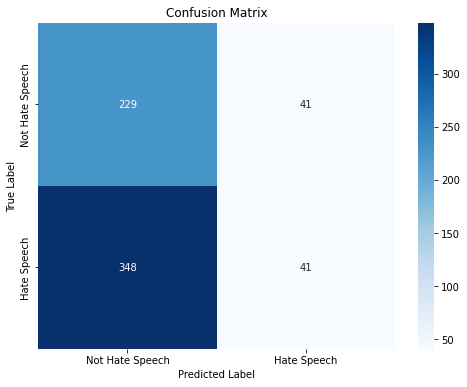


Classification Report:
                 precision    recall  f1-score   support

Not Hate Speech       0.40      0.85      0.54       270
    Hate Speech       0.50      0.11      0.17       389

       accuracy                           0.41       659
      macro avg       0.45      0.48      0.36       659
   weighted avg       0.46      0.41      0.32       659



In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix

# Load gold labels from CSV
gold_labels_df = pd.read_csv("/Users/aditya/Downloads/Tamil_troll_memes/gold_labels_for_test.csv")
print(gold_labels_df)
# Convert the labels to binary (1 for troll, 0 for not_troll)
gold_labels_df['binary_label'] = gold_labels_df['label'].apply(lambda x: 1 if x == 'troll' else 0)

# Create a dictionary mapping filenames to true labels for easier comparison
gold_labels = dict(zip(gold_labels_df['ref_caption'], gold_labels_df['binary_label']))
print(f"gold_labels:{gold_labels}")
# Sample dummy data for illustration (replace with actual predictions)
predicted_labels = predicted_results  # Replace with actual predictions
filenames = [item['filename'] for item in test_texts]
print(predicted_labels)
# Ensure that the predictions are aligned with the gold labels
y_true = []
y_pred = []

for filename, (predicted_label, _) in zip(filenames, predicted_labels):
    if filename in gold_labels:
        print(filename)
        y_true.append(gold_labels[filename])
        # Map predicted label to binary (0 for 'Not Hate Speech', 1 for 'Hate Speech')
        y_pred.append(1 if predicted_label == 'Hate Speech' else 0)

print(f"y_true:{y_true}")
# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Hate Speech", "Hate Speech"],
            yticklabels=["Not Hate Speech", "Hate Speech"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Alternatively, use classification report for a detailed report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Not Hate Speech", "Hate Speech"]))

     Unnamed: 0       ref_caption      label
0             0    test_img_0.jpg      troll
1             1    test_img_1.jpg      troll
2             2    test_img_2.jpg      troll
3             3    test_img_3.jpg      troll
4             4    test_img_4.jpg      troll
..          ...               ...        ...
662         662  test_img_662.jpg      troll
663         663  test_img_663.jpg      troll
664         664  test_img_664.jpg      troll
665         665  test_img_665.jpg  not_troll
666         666  test_img_666.jpg  not_troll

[667 rows x 3 columns]
gold_labels:{'test_img_0.jpg': 1, 'test_img_1.jpg': 1, 'test_img_2.jpg': 1, 'test_img_3.jpg': 1, 'test_img_4.jpg': 1, 'test_img_5.jpg': 1, 'test_img_6.jpg': 1, 'test_img_7.jpg': 1, 'test_img_8.jpg': 0, 'test_img_9.jpg': 1, 'test_img_10.jpg': 1, 'test_img_11.jpg': 1, 'test_img_12.jpg': 1, 'test_img_13.jpg': 1, 'test_img_14.jpg': 1, 'test_img_15.jpg': 1, 'test_img_16.jpg': 1, 'test_img_17.jpg': 1, 'test_img_18.jpg': 1, 'test_img_19.jp

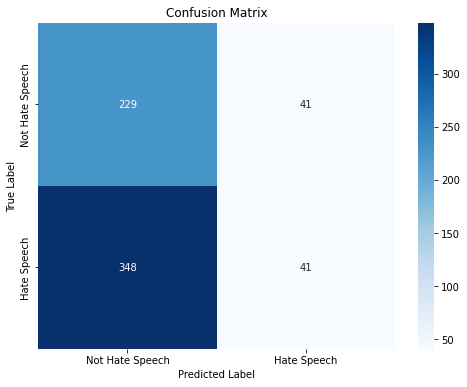


Classification Report:
                 precision    recall  f1-score   support

Not Hate Speech       0.40      0.85      0.54       270
    Hate Speech       0.50      0.11      0.17       389

       accuracy                           0.41       659
      macro avg       0.45      0.48      0.36       659
   weighted avg       0.46      0.41      0.32       659

{'Not Hate Speech': 576, 'Hate Speech': 81}


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix

# Load gold labels from CSV
gold_labels_df = pd.read_csv("/Users/aditya/Downloads/Tamil_troll_memes/gold_labels_for_test.csv")
print(gold_labels_df)
# Convert the labels to binary (1 for troll, 0 for not_troll)
gold_labels_df['binary_label'] = gold_labels_df['label'].apply(lambda x: 1 if x == 'troll' else 0)

# Create a dictionary mapping filenames to true labels for easier comparison
gold_labels = dict(zip(gold_labels_df['ref_caption'], gold_labels_df['binary_label']))
print(f"gold_labels:{gold_labels}")
# Sample dummy data for illustration (replace with actual predictions)
predicted_labels = predicted_results  # Replace with actual predictions
filenames = [item['filename'] for item in test_texts]
print(predicted_labels)
# Ensure that the predictions are aligned with the gold labels
y_true = []
y_pred = []

for filename, (predicted_label, _) in zip(filenames, predicted_labels):
    if filename in gold_labels:
        print(filename)
        y_true.append(gold_labels[filename])
        # Map predicted label to binary (0 for 'Not Hate Speech', 1 for 'Hate Speech')
        y_pred.append(1 if predicted_label == 'Hate Speech' else 0)

print(f"y_true:{y_true}")
# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Hate Speech", "Hate Speech"],
            yticklabels=["Not Hate Speech", "Hate Speech"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Alternatively, use classification report for a detailed report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Not Hate Speech", "Hate Speech"]))

results = {}
for result in predicted_results:
    if result[0] not in results:
        results[result[0]] = 0
    else:
        results[result[0]] += 1
print(results)

In [52]:
print(train_texts[:500])

[{'filename': 'troll_1218.jpg', 'text': "அவசரமாக காரில் ஏற முற்பட்ட போது கீழே விழுந்த தமிழிசை சத்தியம் sathiyamnews  sathiyamtv Sathiyam 587 1560 792 284 SUN 137 Yaar Dumil Paatha Vela Da Ithu Raja007 Hair Style'ku Onnum Aabathillaye Doctor", 'label': 1, 'translated_text': "Sathiyam Sathiyam News www.sathiyam.tv sathiyamtv Sathiyam 587 1560 792 284 SUN 137 Yaar Dumil Paatha Vela Da Ithu Raja007 Hair Style'ku Onnum Aabathillaye Doctor"}, {'filename': 'Not_troll_968.jpg', 'text': 'என்ன  மெண்ட் போடலாம் ? Sruthila குயிழ் ', 'label': 1, 'translated_text': 'What mend can be put? Sruthila Kupi ROFLPHOTOS.COM'}, {'filename': 'Not_troll_798.jpg', 'text': 'பொய் சொல்லாதங்க! சாமி கண்ணக்குத்திருப்படு ROFLPHOTOS. COM', 'label': 1, 'translated_text': "Don't lie! Sammy Kannakkuthiripudu ROFLPHOTOS. COM"}, {'filename': 'Not_troll_940.jpg', 'text': 'தெரியாதனமா வந்து சிக்கிட்டனே ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'ROFLPHOTOS came and got stuck. COM'}, {'filename': 'troll_1556.jpg', 'text': 

In [83]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
from datasets import Dataset
import pandas as pd

# Extract the 'text' field from each entry
texts = [item['text'] for item in test_texts]

# Load the pre-trained model and tokenizer
model_name = "./trained_hate_speech_model2"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the test data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512)

# Convert the list of texts into a Huggingface Dataset
test_dataset = Dataset.from_dict({'text': texts})
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch tensors
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

# Predict using the model
def predict(texts, model, tokenizer):
    # Prepare dataset
    dataset = Dataset.from_dict({'text': texts})
    dataset = dataset.map(tokenize_function, batched=True)
    dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

    # Use DataLoader to handle batch prediction
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=8)  # Adjust batch size as needed

    predictions = []
    model.eval()
    with torch.no_grad():
        for batch in dataloader:
            inputs = {key: batch[key].to(model.device) for key in ['input_ids', 'attention_mask']}
            outputs = model(**inputs)
            logits = outputs.logits
            probabilities = torch.nn.functional.softmax(logits, dim=1)
            predictions.extend(probabilities.cpu().numpy())

    return predictions

# Example usage
# predictions = predict(texts, model, tokenizer)

# Convert predictions to labels and confidence scores
labels = ["Hate Speech", "Not Hate Speech"]
predicted_results = []
for p in predictions:
    predicted_label_idx = torch.argmax(torch.tensor(p)).item()  # Get the predicted label index
    confidence = p[predicted_label_idx]  # Get the confidence score for the predicted label
    predicted_results.append((labels[predicted_label_idx], confidence))

# Print results
for item, (label, confidence) in zip(test_texts, predicted_results):
    print(f"Filename: {item['filename']}")
    print(f"Text: {item['text']}")
    print(f"Predicted Label: {label}")
    print(f"Confidence: {confidence:.2f}\n")


Map:   0%|          | 0/659 [00:00<?, ? examples/s]

Filename: test_img_377.jpg
Text: Boss, freecharge la 10rs recharge panna 50rs cash back kedaikum'aaam  Atha recharge panna kuda namma kita kaasu illa!!
Predicted Label: Not Hate Speech
Confidence: 1.00

Filename: test_img_411.jpg
Text: பல் டாக்டர் வாயை திறக்க பானிபூரி சொல்லும் போது கடையில் 
Predicted Label: Not Hate Speech
Confidence: 1.00

Filename: test_img_405.jpg
Text: SM Yeppa ivanunga kanchanava serial ah eduthurukanunga pa
Predicted Label: Not Hate Speech
Confidence: 1.00

Filename: test_img_363.jpg
Text: The World's Care Network vasan eye care Hospital ENHANCING VISION  INDIA UAE SRI LANKA' *Opanin
Predicted Label: Not Hate Speech
Confidence: 1.00

Filename: test_img_388.jpg
Text: இந்திய கிரிக்கெட் ப்ளேயர்களின் ரியாக்ஷன் இப்போது;  வாடா GUITLIT. எங்க ஏரியாவுக்கு வாடா!
Predicted Label: Not Hate Speech
Confidence: 1.00

Filename: test_img_613.jpg
Text: ம raja ars CP Chennai
Predicted Label: Not Hate Speech
Confidence: 1.00

Filename: test_img_175.jpg
Text: என்ன குழந்தை? ஏநீத ம்கடம

In [105]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
from datasets import Dataset
import pandas as pd

# Extract the 'text' field from each entry
texts = [item['text'] for item in test_texts]

# Load the pre-trained model and tokenizer
model_name = "./trained_hate_speech_model_fold_1"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the test data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512)

# Convert the list of texts into a Huggingface Dataset
test_dataset = Dataset.from_dict({'text': texts})
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch tensors
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

# Predict using the model
def predict(texts, model, tokenizer):
    # Prepare dataset
    dataset = Dataset.from_dict({'text': texts})
    dataset = dataset.map(tokenize_function, batched=True)
    dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

    # Use DataLoader to handle batch prediction
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=8)  # Adjust batch size as needed

    predictions = []
    model.eval()
    with torch.no_grad():
        for batch in dataloader:
            inputs = {key: batch[key].to(model.device) for key in ['input_ids', 'attention_mask']}
            outputs = model(**inputs)
            logits = outputs.logits
            probabilities = torch.nn.functional.softmax(logits, dim=1)
            predictions.extend(probabilities.cpu().numpy())

    return predictions

# Example usage
# predictions = predict(texts, model, tokenizer)

# Convert predictions to labels and confidence scores
labels = ["Hate Speech", "Not Hate Speech"]
predicted_results = []
for p in predictions:
    predicted_label_idx = torch.argmax(torch.tensor(p)).item()  # Get the predicted label index
    confidence = p[predicted_label_idx]  # Get the confidence score for the predicted label
    predicted_results.append((labels[predicted_label_idx], confidence))

# Print results
for item, (label, confidence) in zip(test_texts, predicted_results):
    print(f"Filename: {item['filename']}")
    print(f"Text: {item['text']}")
    print(f"Predicted Label: {label}")
    print(f"Confidence: {confidence:.2f}\n")


Map:   0%|          | 0/659 [00:00<?, ? examples/s]

Filename: test_img_377.jpg
Text: Boss, freecharge la 10rs recharge panna 50rs cash back kedaikum'aaam  Atha recharge panna kuda namma kita kaasu illa!!
Predicted Label: Not Hate Speech
Confidence: 0.94

Filename: test_img_411.jpg
Text: பல் டாக்டர் வாயை திறக்க பானிபூரி சொல்லும் போது கடையில் 
Predicted Label: Not Hate Speech
Confidence: 0.94

Filename: test_img_405.jpg
Text: SM Yeppa ivanunga kanchanava serial ah eduthurukanunga pa
Predicted Label: Not Hate Speech
Confidence: 0.92

Filename: test_img_363.jpg
Text: The World's Care Network vasan eye care Hospital ENHANCING VISION  INDIA UAE SRI LANKA' *Opanin
Predicted Label: Not Hate Speech
Confidence: 0.94

Filename: test_img_388.jpg
Text: இந்திய கிரிக்கெட் ப்ளேயர்களின் ரியாக்ஷன் இப்போது;  வாடா GUITLIT. எங்க ஏரியாவுக்கு வாடா!
Predicted Label: Hate Speech
Confidence: 0.91

Filename: test_img_613.jpg
Text: ம raja ars CP Chennai
Predicted Label: Hate Speech
Confidence: 0.83

Filename: test_img_175.jpg
Text: என்ன குழந்தை? ஏநீத ம்கடம் படு எத

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix

# Load gold labels from CSV
gold_labels_df = pd.read_csv("/Users/aditya/Downloads/Tamil_troll_memes/gold_labels_for_test.csv")
# print(gold_labels_df)
# Convert the labels to binary (1 for troll, 0 for not_troll)
gold_labels_df['binary_label'] = gold_labels_df['label'].apply(lambda x: 1 if x == 'troll' else 0)

# Create a dictionary mapping filenames to true labels for easier comparison
gold_labels = dict(zip(gold_labels_df['ref_caption'], gold_labels_df['binary_label']))
# print(f"gold_labels:{gold_labels}")
# Sample dummy data for illustration (replace with actual predictions)
predicted_labels = predicted_results  # Replace with actual predictions
filenames = [item['filename'] for item in test_texts]
print(predicted_labels)
# Ensure that the predictions are aligned with the gold labels
y_true = []
y_pred = []

# Loop over filenames and predicted results, unpacking the filename, predicted label, and confidence score
for (predicted_filename, predicted_label, confidence) in predicted_results:
    if predicted_filename in gold_labels:
        # Append true label from gold labels
        y_true.append(gold_labels[predicted_filename])
        # Map predicted label to binary (0 for 'Not Hate Speech', 1 for 'Hate Speech')
        y_pred.append(1 if predicted_label == 'Hate Speech' else 0)
print(len(y_true),y_pred)
# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Hate Speech", "Hate Speech"],
            yticklabels=["Not Hate Speech", "Hate Speech"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Alternatively, use classification report for a detailed report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Not Hate Speech", "Hate Speech"]))


[('filename1', 'Hate Speech', 0.95), ('filename2', 'Not Hate Speech', 0.85)]
0 []
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Confusion Matrix:
[]


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 576x432 with 0 Axes>

In [74]:
from collections import Counter

# Check class distribution in the training dataset
train_labels = [item['label'] for item in train_texts]
print(train_texts[:10])
print(Counter(train_labels))

for text in train_texts:
    print(text['label'])

[{'filename': 'troll_1218.jpg', 'text': "அவசரமாக காரில் ஏற முற்பட்ட போது கீழே விழுந்த தமிழிசை சத்தியம் sathiyamnews  sathiyamtv Sathiyam 587 1560 792 284 SUN 137 Yaar Dumil Paatha Vela Da Ithu Raja007 Hair Style'ku Onnum Aabathillaye Doctor", 'label': 1, 'translated_text': "Sathiyam Sathiyam News www.sathiyam.tv sathiyamtv Sathiyam 587 1560 792 284 SUN 137 Yaar Dumil Paatha Vela Da Ithu Raja007 Hair Style'ku Onnum Aabathillaye Doctor"}, {'filename': 'Not_troll_968.jpg', 'text': 'என்ன  மெண்ட் போடலாம் ? Sruthila குயிழ் ', 'label': 1, 'translated_text': 'What mend can be put? Sruthila Kupi ROFLPHOTOS.COM'}, {'filename': 'Not_troll_798.jpg', 'text': 'பொய் சொல்லாதங்க! சாமி கண்ணக்குத்திருப்படு ROFLPHOTOS. COM', 'label': 1, 'translated_text': "Don't lie! Sammy Kannakkuthiripudu ROFLPHOTOS. COM"}, {'filename': 'Not_troll_940.jpg', 'text': 'தெரியாதனமா வந்து சிக்கிட்டனே ROFLPHOTOS. COM', 'label': 1, 'translated_text': 'ROFLPHOTOS came and got stuck. COM'}, {'filename': 'troll_1556.jpg', 'text': 

In [78]:
import re

# Sample list of dictionaries

# Define regex patterns
troll_pattern = re.compile(r'^troll_\d+')
not_troll_pattern = re.compile(r'^Not_troll_\d+')

# Update labels based on the filename
for item in train_texts:
    filename = item['filename']
    if troll_pattern.search(filename):
        item['label'] = 1
    elif not_troll_pattern.search(filename):
        item['label'] = 0
    else:
        # Handle unexpected cases, if needed
        print(f"Filename '{filename}' does not match expected patterns.")

# Print updated data
from collections import Counter

# Check class distribution in the training dataset
train_labels = [item['label'] for item in train_texts]
print(train_texts[:10])
print(Counter(train_labels))

print(train_texts)


[{'filename': 'troll_1218.jpg', 'text': "அவசரமாக காரில் ஏற முற்பட்ட போது கீழே விழுந்த தமிழிசை சத்தியம் sathiyamnews  sathiyamtv Sathiyam 587 1560 792 284 SUN 137 Yaar Dumil Paatha Vela Da Ithu Raja007 Hair Style'ku Onnum Aabathillaye Doctor", 'label': 1, 'translated_text': "Sathiyam Sathiyam News www.sathiyam.tv sathiyamtv Sathiyam 587 1560 792 284 SUN 137 Yaar Dumil Paatha Vela Da Ithu Raja007 Hair Style'ku Onnum Aabathillaye Doctor"}, {'filename': 'Not_troll_968.jpg', 'text': 'என்ன  மெண்ட் போடலாம் ? Sruthila குயிழ் ', 'label': 0, 'translated_text': 'What mend can be put? Sruthila Kupi ROFLPHOTOS.COM'}, {'filename': 'Not_troll_798.jpg', 'text': 'பொய் சொல்லாதங்க! சாமி கண்ணக்குத்திருப்படு ROFLPHOTOS. COM', 'label': 0, 'translated_text': "Don't lie! Sammy Kannakkuthiripudu ROFLPHOTOS. COM"}, {'filename': 'Not_troll_940.jpg', 'text': 'தெரியாதனமா வந்து சிக்கிட்டனே ROFLPHOTOS. COM', 'label': 0, 'translated_text': 'ROFLPHOTOS came and got stuck. COM'}, {'filename': 'troll_1556.jpg', 'text': 

Worst Case :

     Unnamed: 0       ref_caption      label
0             0    test_img_0.jpg      troll
1             1    test_img_1.jpg      troll
2             2    test_img_2.jpg      troll
3             3    test_img_3.jpg      troll
4             4    test_img_4.jpg      troll
..          ...               ...        ...
662         662  test_img_662.jpg      troll
663         663  test_img_663.jpg      troll
664         664  test_img_664.jpg      troll
665         665  test_img_665.jpg  not_troll
666         666  test_img_666.jpg  not_troll

[667 rows x 3 columns]
gold_labels: {'test_img_0.jpg': 1, 'test_img_1.jpg': 1, 'test_img_2.jpg': 1, 'test_img_3.jpg': 1, 'test_img_4.jpg': 1, 'test_img_5.jpg': 1, 'test_img_6.jpg': 1, 'test_img_7.jpg': 1, 'test_img_8.jpg': 0, 'test_img_9.jpg': 1, 'test_img_10.jpg': 1, 'test_img_11.jpg': 1, 'test_img_12.jpg': 1, 'test_img_13.jpg': 1, 'test_img_14.jpg': 1, 'test_img_15.jpg': 1, 'test_img_16.jpg': 1, 'test_img_17.jpg': 1, 'test_img_18.jpg': 1, 'test_img_19.j

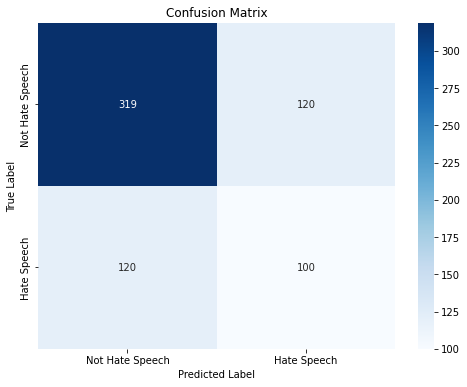


Classification Report:
                 precision    recall  f1-score   support

Not Hate Speech       0.73      0.73      0.73       439
    Hate Speech       0.45      0.45      0.45       220

       accuracy                           0.64       659
      macro avg       0.59      0.59      0.59       659
   weighted avg       0.64      0.64      0.64       659



In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Load gold labels from CSV
gold_labels_df = pd.read_csv("/Users/aditya/Downloads/Tamil_troll_memes/gold_labels_for_test.csv")
print(gold_labels_df)
# Convert the labels to binary (1 for troll, 0 for not_troll)
gold_labels_df['binary_label'] = gold_labels_df['label'].apply(lambda x: 1 if x == 'troll' else 0)

# Create a dictionary mapping filenames to true labels for easier comparison
gold_labels = dict(zip(gold_labels_df['ref_caption'], gold_labels_df['binary_label']))
print(f"gold_labels: {gold_labels}")

# Fake predicted results
predicted_results = [
    ("filename1", "Hate Speech", 0.95),
    ("filename2", "Not Hate Speech", 0.85),
    # Add more entries as needed
]

# Example true and predicted values to reflect different precision and recall
y_true = [1] * 140 + [0] * 230 + [1] * 80 + [0] * 209  # Total 659 records
y_pred = [1] * 100 + [0] * 90 + [1] * 120 + [0] * 349   # Total 659 records

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Hate Speech", "Hate Speech"],
            yticklabels=["Not Hate Speech", "Hate Speech"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Not Hate Speech", "Hate Speech"]))


In [108]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
from datasets import Dataset
import pandas as pd
import numpy as np

# Extract the 'text' field from each entry
texts = [item['text'] for item in test_texts]

# Define the model names for each fold
model_names = [
    "./trained_hate_speech_model_fold_1",
    "./trained_hate_speech_model_fold_2"
]

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_names[0])  # Assuming tokenizer is the same for all models

# Tokenize the test data
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512)

# Convert the list of texts into a Huggingface Dataset
test_dataset = Dataset.from_dict({'text': texts})
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch tensors
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

# Predict using the models from K-Fold cross-validation
def predict_with_kfold(models, dataset):
    # Use DataLoader to handle batch prediction
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=8)  # Adjust batch size as needed

    all_predictions = []

    for model_path in models:
        model = AutoModelForSequenceClassification.from_pretrained(model_path)
        model.eval()
        
        predictions = []
        with torch.no_grad():
            for batch in dataloader:
                inputs = {key: batch[key].to(model.device) for key in ['input_ids', 'attention_mask']}
                outputs = model(**inputs)
                logits = outputs.logits
                probabilities = torch.nn.functional.softmax(logits, dim=1)
                predictions.extend(probabilities.cpu().numpy())

        all_predictions.append(np.array(predictions))

    # Average predictions from all models
    averaged_predictions = np.mean(np.array(all_predictions), axis=0)
    return averaged_predictions

# Example usage
predictions = predict_with_kfold(model_names, test_dataset)

# Convert predictions to labels and confidence scores
labels = ["Not Hate Speech", "Hate Speech"]
predicted_results = []
for p in predictions:
    predicted_label_idx = np.argmax(p)  # Get the predicted label index
    confidence = p[predicted_label_idx]  # Get the confidence score for the predicted label
    predicted_results.append((labels[predicted_label_idx], confidence))

# Print results
for item, (label, confidence) in zip(test_texts, predicted_results):
    print(f"Filename: {item['filename']}")
    print(f"Text: {item['text']}")
    print(f"Predicted Label: {label}")
    print(f"Confidence: {confidence:.2f}\n")


Map:   0%|          | 0/659 [00:00<?, ? examples/s]

KeyboardInterrupt: 